BERT Modeling for Toxic Comment Multilabel classification

In [6]:
## Imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# import torch as nn
from sklearn.model_selection import train_test_split
# from torch.nn import Dropout , Linear

In [2]:
## Name the files to use
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
test_labels = pd.read_csv('./test_labels.csv')
sample_model = pd.read_csv('./sample_submission.csv')


In [3]:
## clean up text for BERT
import re
def clean_comment(comment):
    ## remove all usernames (begin with @)
    ## remove all numbers
    ## get rid of enters and unnecessary spaces
    ## get rid of hashtags
    comment = re.sub(r'(@.*?)[\s]', ' ', comment)
    comment = re.sub(r'[0-9]+' , '' ,comment)
    comment = re.sub(r'\s([@][\w_-]+)', '', comment).strip()
    comment = re.sub(r'&amp;', '&', comment)
    comment = re.sub(r'\s+', ' ', comment).strip()
    comment = comment.replace("#" , " ")
    encoded_string = comment.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    return decode_string

In [4]:
## Lets test it on a random comment in train_data
print('Original Comment: ', train_data['comment_text'][1])

print('Cleaned Comment: ', clean_comment(train_data['comment_text'][1]))

Original Comment:  D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
Cleaned Comment:  D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) :, January , (UTC)


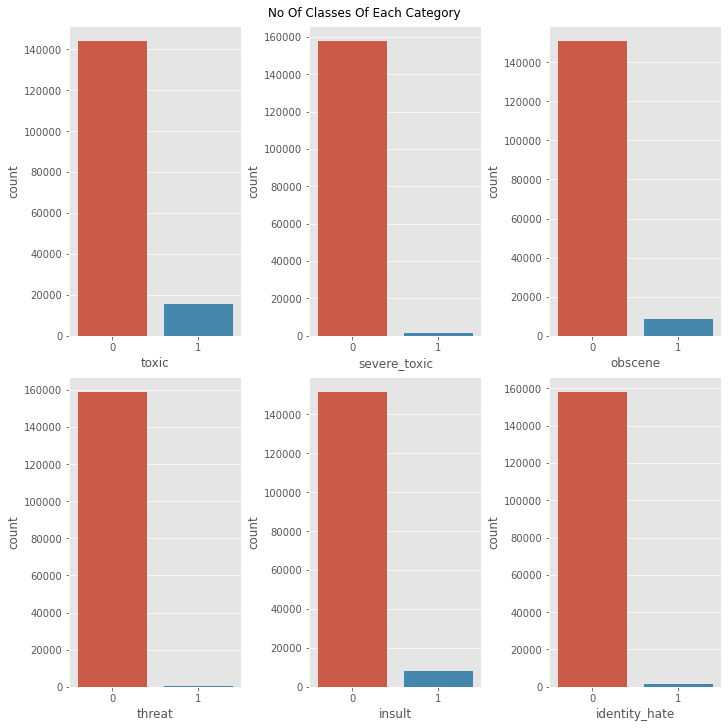

In [5]:
## Analyze data - get a bar graph to see the split for all labels
fig , axes = plt.subplots(2,3,figsize = (10,10), constrained_layout = True)
sns.countplot(ax=axes[0,0],x='toxic',data=train_data )
sns.countplot(ax=axes[0,1],x='severe_toxic',data=train_data)
sns.countplot(ax=axes[0,2],x='obscene',data=train_data)
sns.countplot(ax = axes[1,0],x='threat',data=train_data)
sns.countplot(ax=axes[1,1],x='insult',data=train_data)
sns.countplot(ax=axes[1,2],x='identity_hate',data=train_data)
plt.suptitle('No Of Classes Of Each Category')
plt.show()

In [8]:
# pip install wordcloud

     |████████████████████████████████| 220 kB 2.5 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158425 sha256=2e8fe3bc59179cccf0e859ab3131068c8d90d47982495cd5897d7548eb230573
  Stored in directory: /Users/vidhiparekh/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


### WordCloud representation of frequently used words in each comment category

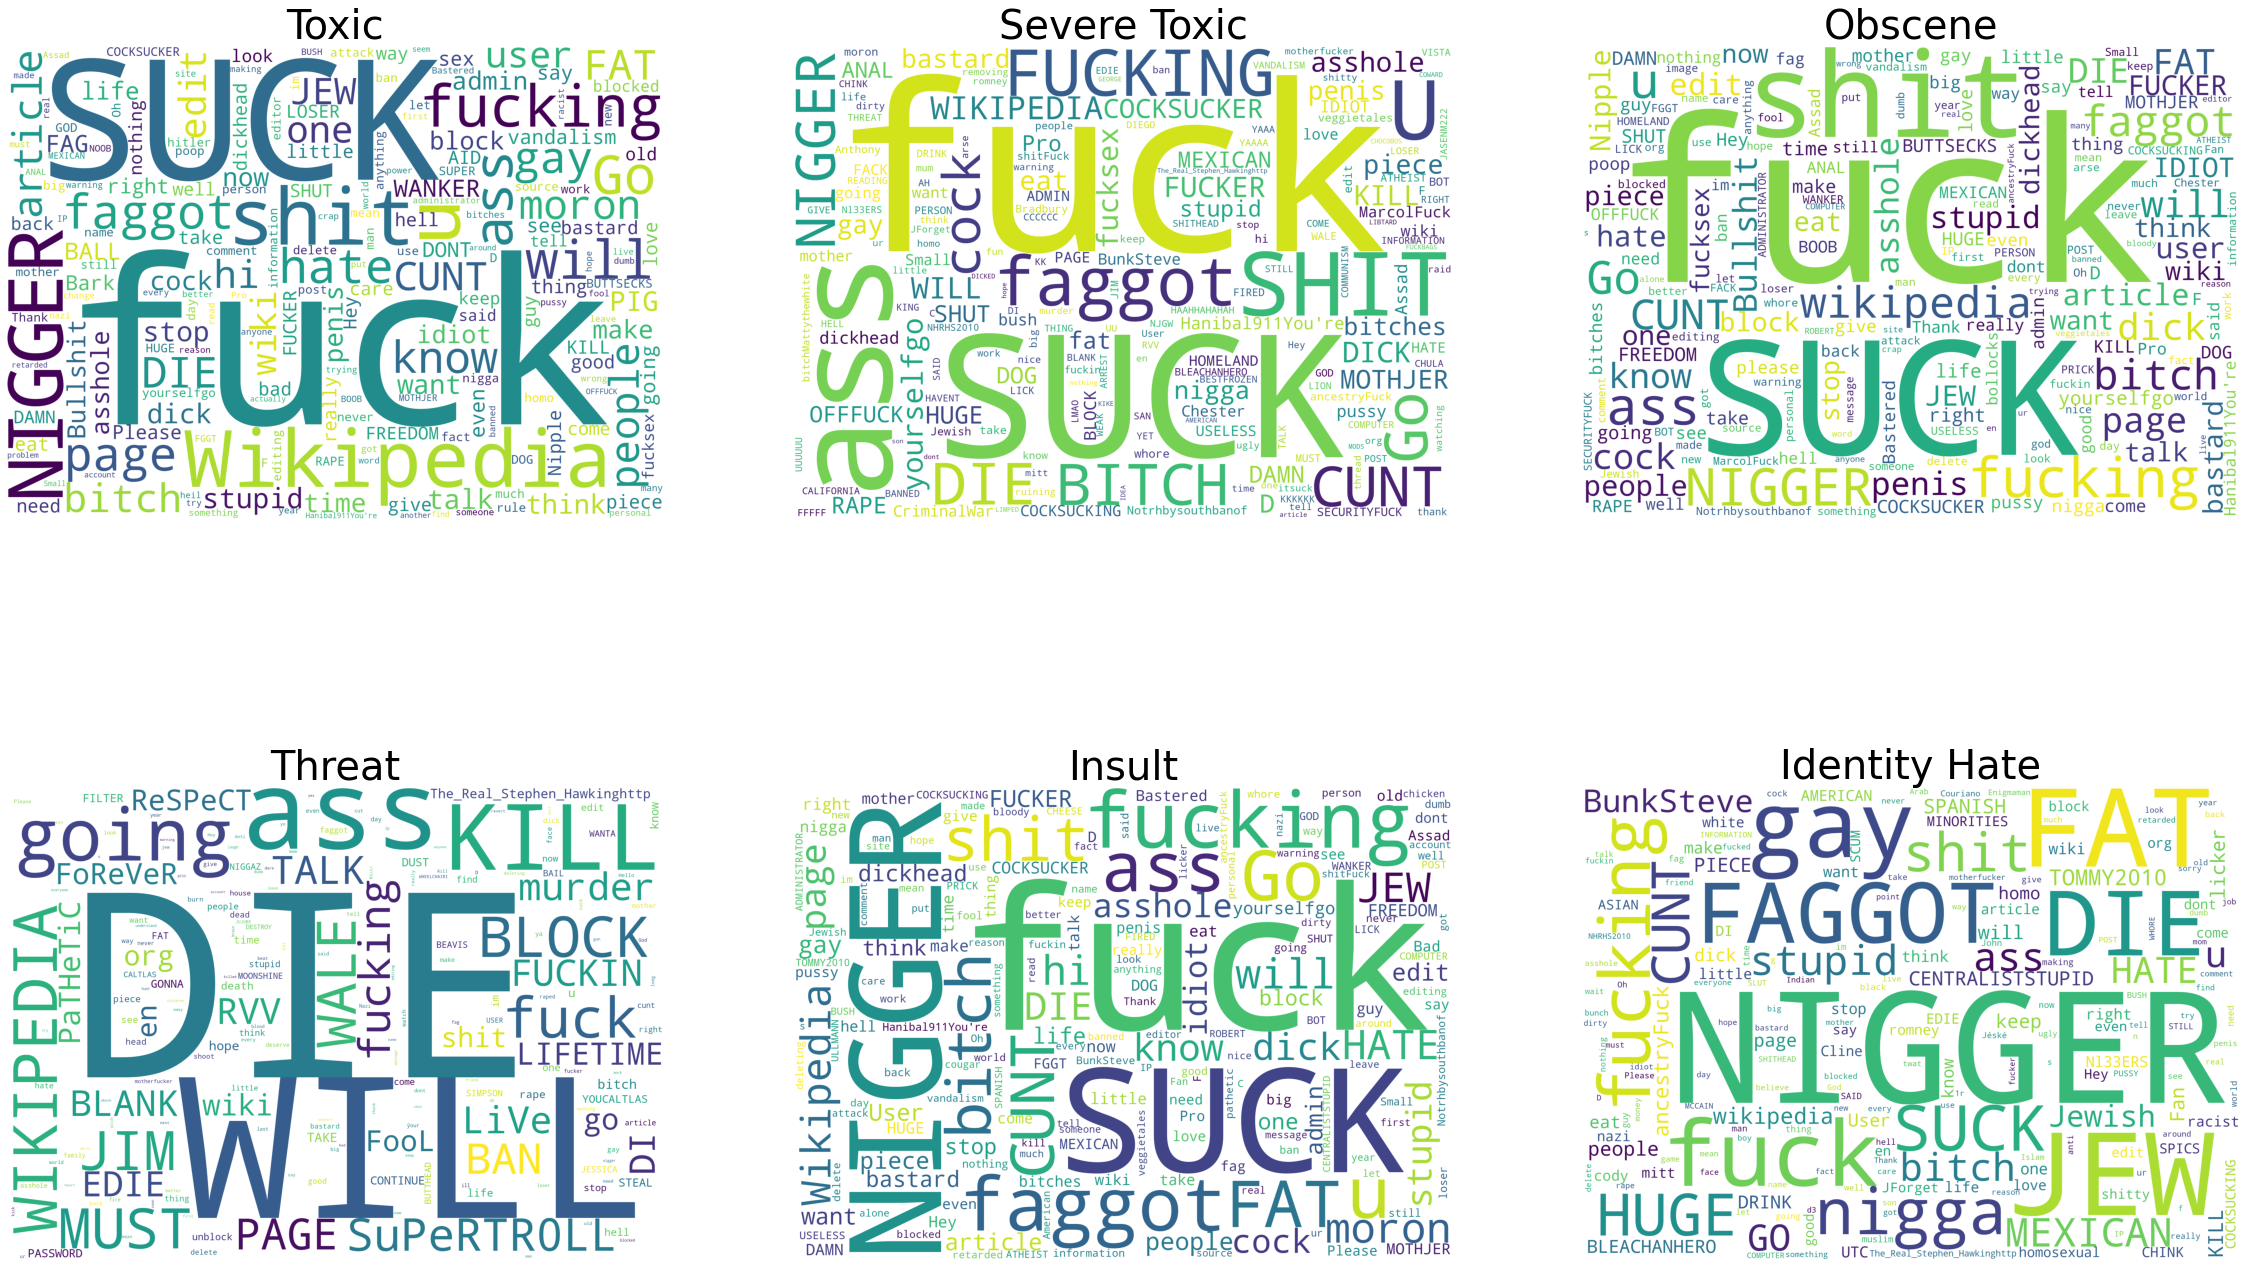

In [10]:
data_path = "./train.csv"
data_raw = pd.read_csv(data_path)

from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)

# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)

# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)

# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

In [6]:
## Split the data into train, test, and validiation datasets
x = train_data.comment_text.values
y = train_data.toxic.values

#80/20
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1997)


In [7]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: NVIDIA GeForce RTX 2070 with Max-Q Design


In [1]:
# install transformers
# has models to help with classification, information extraction and more for texts
# has good API for downloads for pretrained models and to fine-tune then for our datasets
# SOURCE: https://github.com/huggingface/transformers
!pip install transformers

In [8]:
# BERT text clean-up
# add tokens to signify start and end of sentence
# make sure all sentences are a constant length (pad & truncate)

from transformers import BertTokenizer
def bert_cleaned_text(data):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
    
    input_ids = []
    attention_masks = []
    
    #for each sentenc
    for sentence in data:
        encoded_sentence = tokenizer.encode_plus(
            text=clean_comment(sentence),               # clean sentence
            add_special_tokens=True,                # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                     # Max length to truncate/pad
            pad_to_max_length=True,                 # Pad sentence to max length
            #return_tensors='pt',                   # Return PyTorch tensor
            truncation = True,
            return_attention_mask=True              # Return attention mask
            )
        input_ids.append(encoded_sentence.get('input_ids'))
        attention_masks.append(encoded_sentence.get('attention_mask'))
        
    
    #convert to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks
        

In [9]:
MAX_LEN = 300

token_ids = list(bert_cleaned_text([x[0]])[0].squeeze().numpy())
print('Original: ', x[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = bert_cleaned_text(x_train)
val_inputs, val_masks = bert_cleaned_text(x_val)

C:\Users\Acer\anaconda3\envs\nlpProject\lib\site-packages\transformers\tokenization_utils_base.py:2212: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
Token IDs:  [101, 7526, 2339, 1996, 10086, 2015, 2081, 2104, 2026, 5310, 18442, 13076, 12392, 2050, 5470, 2020, 16407, 1029, 2027, 4694, 1005, 1056, 3158, 9305, 22556, 1010, 2074, 8503, 2006, 2070, 3806, 2044, 1045, 5444, 2012, 2047, 2259, 14421, 6904, 2278, 1012, 1998, 3531, 2123, 1005, 1056, 6366, 1996, 23561, 2013, 1996, 2831, 3931, 2144, 1045, 1005, 1049, 3394, 2085, 1012, 1012, 1012, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 8

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

FIND SOURCE FOR THIS

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (768,)
bert.encoder.layer.0.attention.output.LayerNorm.weight        (768,)
bert.encoder.layer.0.attention.output.LayerNorm.bias          (768,)
bert.encoder.layer.0.intermediate.dense.weight           (3072, 768)
bert.encoder.layer.0.intermediate.dense.bias                 (3072,)
bert.encoder.layer.0.output.dense.weight                 (768, 3072)
bert.encoder.layer.0.output.dense.bias                        (768,)
bert.encoder.layer.0.output.LayerNorm.weight                  (768,)
bert.encoder.layer.0.output.LayerNorm.bias                    (768,)

==== Output Layer ====

bert.pooler.dense.weight                                  (768, 768)
bert.pooler.dense.bias                                        (768,)
classifier.weight                                           (2, 768)
classifier.bias                                                 (2,)


In [11]:
## BERT CLASSIFIER CLASS
%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    
    def __init__(self, freeze_bert=False):
        super(BertClassifier, self).__init__()
        
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        BERT_size, classifier_size, label_count = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        # self.LSTM = nn.LSTM(D_in,D_in,bidirectional=True)
        # self.clf = nn.Linear(D_in*2,2)

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            # nn.LSTM(D_in,D_in)
            nn.Linear(BERT_size, classifier_size),
            nn.ReLU(),
            nn.Linear(classifier_size, label_count)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]
        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

Wall time: 0 ns


In [12]:
## INITIALIZE THE CLASSIFIER THE OPTIMIZER AND LEARNING RATE SCHEDULER

from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    #cpu to run model on
    device = torch.device("cuda")
    
    # Tell PyTorch to run the model on CPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [13]:
import random
import time
from tqdm import tqdm

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in tqdm(range(epochs)):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in tqdm(enumerate(train_dataloader)):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [14]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------



0it [00:00, ?it/s]
1it [00:01,  1.90s/it]
2it [00:02,  1.02it/s]
3it [00:02,  1.44it/s]
4it [00:02,  1.79it/s]
5it [00:03,  2.06it/s]
6it [00:03,  2.28it/s]
7it [00:03,  2.44it/s]
8it [00:04,  2.56it/s]
9it [00:04,  2.66it/s]
10it [00:05,  2.72it/s]
11it [00:05,  2.76it/s]
12it [00:05,  2.78it/s]
13it [00:06,  2.79it/s]
14it [00:06,  2.84it/s]
15it [00:06,  2.85it/s]
16it [00:07,  2.85it/s]
17it [00:07,  2.85it/s]
18it [00:07,  2.85it/s]
19it [00:08,  2.85it/s]
20it [00:08,  2.86it/s]
21it [00:08,  2.85it/s]

   1    |   20    |   0.390254   |     -      |     -     |   8.89   



22it [00:09,  2.86it/s]
23it [00:09,  2.86it/s]
24it [00:09,  2.86it/s]
25it [00:10,  2.86it/s]
26it [00:10,  2.80it/s]
27it [00:10,  2.87it/s]
28it [00:11,  2.87it/s]
29it [00:11,  2.90it/s]
30it [00:12,  2.84it/s]
31it [00:12,  2.84it/s]
32it [00:12,  2.84it/s]
33it [00:13,  2.84it/s]
34it [00:13,  2.84it/s]
35it [00:13,  2.84it/s]
36it [00:14,  2.85it/s]
37it [00:14,  2.84it/s]
38it [00:14,  2.84it/s]
39it [00:15,  2.83it/s]
40it [00:15,  2.85it/s]
41it [00:15,  2.84it/s]

   1    |   40    |   0.397930   |     -      |     -     |   7.02   



42it [00:16,  2.84it/s]
43it [00:16,  2.84it/s]
44it [00:16,  2.85it/s]
45it [00:17,  2.84it/s]
46it [00:17,  2.84it/s]
47it [00:18,  2.84it/s]
48it [00:18,  2.85it/s]
49it [00:18,  2.83it/s]
50it [00:19,  2.83it/s]
51it [00:19,  2.84it/s]
52it [00:19,  2.84it/s]
53it [00:20,  2.83it/s]
54it [00:20,  2.82it/s]
55it [00:20,  2.84it/s]
56it [00:21,  2.84it/s]
57it [00:21,  2.84it/s]
58it [00:21,  2.84it/s]
59it [00:22,  2.82it/s]
60it [00:22,  2.81it/s]
61it [00:22,  2.82it/s]

   1    |   60    |   0.244562   |     -      |     -     |   7.06   



62it [00:23,  2.82it/s]
63it [00:23,  2.83it/s]
64it [00:24,  2.84it/s]
65it [00:24,  2.83it/s]
66it [00:24,  2.83it/s]
67it [00:25,  2.83it/s]
68it [00:25,  2.82it/s]
69it [00:25,  2.82it/s]
70it [00:26,  2.81it/s]
71it [00:26,  2.82it/s]
72it [00:26,  2.81it/s]
73it [00:27,  2.81it/s]
74it [00:27,  2.81it/s]
75it [00:27,  2.81it/s]
76it [00:28,  2.80it/s]
77it [00:28,  2.82it/s]
78it [00:29,  2.81it/s]
79it [00:29,  2.81it/s]
80it [00:29,  2.80it/s]
81it [00:30,  2.80it/s]

   1    |   80    |   0.192139   |     -      |     -     |   7.11   



82it [00:30,  2.81it/s]
83it [00:30,  2.80it/s]
84it [00:31,  2.81it/s]
85it [00:31,  2.80it/s]
86it [00:31,  2.81it/s]
87it [00:32,  2.81it/s]
88it [00:32,  2.81it/s]
89it [00:32,  2.81it/s]
90it [00:33,  2.81it/s]
91it [00:33,  2.81it/s]
92it [00:33,  2.80it/s]
93it [00:34,  2.79it/s]
94it [00:34,  2.80it/s]
95it [00:35,  2.81it/s]
96it [00:35,  2.80it/s]
97it [00:35,  2.80it/s]
98it [00:36,  2.80it/s]
99it [00:36,  2.80it/s]
100it [00:36,  2.80it/s]
101it [00:37,  2.79it/s]

   1    |   100   |   0.170046   |     -      |     -     |   7.14   



102it [00:37,  2.80it/s]
103it [00:37,  2.80it/s]
104it [00:38,  2.79it/s]
105it [00:38,  2.79it/s]
106it [00:39,  2.79it/s]
107it [00:39,  2.79it/s]
108it [00:39,  2.80it/s]
109it [00:40,  2.80it/s]
110it [00:40,  2.79it/s]
111it [00:40,  2.79it/s]
112it [00:41,  2.79it/s]
113it [00:41,  2.79it/s]
114it [00:41,  2.79it/s]
115it [00:42,  2.80it/s]
116it [00:42,  2.79it/s]
117it [00:42,  2.79it/s]
118it [00:43,  2.79it/s]
119it [00:43,  2.79it/s]
120it [00:44,  2.79it/s]
121it [00:44,  2.79it/s]

   1    |   120   |   0.163561   |     -      |     -     |   7.16   



122it [00:44,  2.78it/s]
123it [00:45,  2.78it/s]
124it [00:45,  2.78it/s]
125it [00:45,  2.79it/s]
126it [00:46,  2.78it/s]
127it [00:46,  2.79it/s]
128it [00:46,  2.78it/s]
129it [00:47,  2.78it/s]
130it [00:47,  2.77it/s]
131it [00:47,  2.78it/s]
132it [00:48,  2.78it/s]
133it [00:48,  2.77it/s]
134it [00:49,  2.77it/s]
135it [00:49,  2.78it/s]
136it [00:49,  2.78it/s]
137it [00:50,  2.79it/s]
138it [00:50,  2.78it/s]
139it [00:50,  2.78it/s]
140it [00:51,  2.77it/s]
141it [00:51,  2.77it/s]

   1    |   140   |   0.158571   |     -      |     -     |   7.20   



142it [00:51,  2.77it/s]
143it [00:52,  2.77it/s]
144it [00:52,  2.78it/s]
145it [00:53,  2.77it/s]
146it [00:53,  2.78it/s]
147it [00:53,  2.77it/s]
148it [00:54,  2.77it/s]
149it [00:54,  2.78it/s]
150it [00:54,  2.77it/s]
151it [00:55,  2.77it/s]
152it [00:55,  2.77it/s]
153it [00:55,  2.78it/s]
154it [00:56,  2.78it/s]
155it [00:56,  2.76it/s]
156it [00:56,  2.77it/s]
157it [00:57,  2.77it/s]
158it [00:57,  2.76it/s]
159it [00:58,  2.76it/s]
160it [00:58,  2.76it/s]
161it [00:58,  2.77it/s]

   1    |   160   |   0.130378   |     -      |     -     |   7.21   



162it [00:59,  2.77it/s]
163it [00:59,  2.77it/s]
164it [00:59,  2.76it/s]
165it [01:00,  2.76it/s]
166it [01:00,  2.76it/s]
167it [01:00,  2.76it/s]
168it [01:01,  2.77it/s]
169it [01:01,  2.76it/s]
170it [01:02,  2.76it/s]
171it [01:02,  2.77it/s]
172it [01:02,  2.76it/s]
173it [01:03,  2.76it/s]
174it [01:03,  2.76it/s]
175it [01:03,  2.76it/s]
176it [01:04,  2.76it/s]
177it [01:04,  2.76it/s]
178it [01:04,  2.75it/s]
179it [01:05,  2.76it/s]
180it [01:05,  2.75it/s]
181it [01:06,  2.75it/s]

   1    |   180   |   0.251500   |     -      |     -     |   7.25   



182it [01:06,  2.75it/s]
183it [01:06,  2.74it/s]
184it [01:07,  2.75it/s]
185it [01:07,  2.76it/s]
186it [01:07,  2.76it/s]
187it [01:08,  2.75it/s]
188it [01:08,  2.76it/s]
189it [01:08,  2.77it/s]
190it [01:09,  2.75it/s]
191it [01:09,  2.75it/s]
192it [01:10,  2.74it/s]
193it [01:10,  2.74it/s]
194it [01:10,  2.75it/s]
195it [01:11,  2.75it/s]
196it [01:11,  2.74it/s]
197it [01:11,  2.74it/s]
198it [01:12,  2.75it/s]
199it [01:12,  2.74it/s]
200it [01:12,  2.74it/s]
201it [01:13,  2.75it/s]

   1    |   200   |   0.148431   |     -      |     -     |   7.27   



202it [01:13,  2.74it/s]
203it [01:14,  2.74it/s]
204it [01:14,  2.75it/s]
205it [01:14,  2.75it/s]
206it [01:15,  2.74it/s]
207it [01:15,  2.75it/s]
208it [01:15,  2.73it/s]
209it [01:16,  2.75it/s]
210it [01:16,  2.74it/s]
211it [01:16,  2.75it/s]
212it [01:17,  2.75it/s]
213it [01:17,  2.75it/s]
214it [01:18,  2.75it/s]
215it [01:18,  2.74it/s]
216it [01:18,  2.74it/s]
217it [01:19,  2.74it/s]
218it [01:19,  2.74it/s]
219it [01:19,  2.74it/s]
220it [01:20,  2.73it/s]
221it [01:20,  2.74it/s]

   1    |   220   |   0.159699   |     -      |     -     |   7.30   



222it [01:20,  2.73it/s]
223it [01:21,  2.74it/s]
224it [01:21,  2.72it/s]
225it [01:22,  2.75it/s]
226it [01:22,  2.75it/s]
227it [01:22,  2.75it/s]
228it [01:23,  2.73it/s]
229it [01:23,  2.73it/s]
230it [01:23,  2.73it/s]
231it [01:24,  2.73it/s]
232it [01:24,  2.73it/s]
233it [01:25,  2.73it/s]
234it [01:25,  2.74it/s]
235it [01:25,  2.74it/s]
236it [01:26,  2.74it/s]
237it [01:26,  2.74it/s]
238it [01:26,  2.74it/s]
239it [01:27,  2.74it/s]
240it [01:27,  2.75it/s]
241it [01:27,  2.75it/s]

   1    |   240   |   0.296193   |     -      |     -     |   7.30   



242it [01:28,  2.73it/s]
243it [01:28,  2.72it/s]
244it [01:29,  2.72it/s]
245it [01:29,  2.72it/s]
246it [01:29,  2.71it/s]
247it [01:30,  2.72it/s]
248it [01:30,  2.73it/s]
249it [01:30,  2.73it/s]
250it [01:31,  2.73it/s]
251it [01:31,  2.73it/s]
252it [01:31,  2.72it/s]
253it [01:32,  2.73it/s]
254it [01:32,  2.73it/s]
255it [01:33,  2.73it/s]
256it [01:33,  2.73it/s]
257it [01:33,  2.72it/s]
258it [01:34,  2.71it/s]
259it [01:34,  2.73it/s]
260it [01:34,  2.73it/s]
261it [01:35,  2.73it/s]

   1    |   260   |   0.175237   |     -      |     -     |   7.35   



262it [01:35,  2.73it/s]
263it [01:35,  2.73it/s]
264it [01:36,  2.73it/s]
265it [01:36,  2.72it/s]
266it [01:37,  2.73it/s]
267it [01:37,  2.71it/s]
268it [01:37,  2.72it/s]
269it [01:38,  2.72it/s]
270it [01:38,  2.72it/s]
271it [01:38,  2.71it/s]
272it [01:39,  2.71it/s]
273it [01:39,  2.71it/s]
274it [01:40,  2.71it/s]
275it [01:40,  2.71it/s]
276it [01:40,  2.71it/s]
277it [01:41,  2.72it/s]
278it [01:41,  2.71it/s]
279it [01:41,  2.71it/s]
280it [01:42,  2.71it/s]
281it [01:42,  2.72it/s]

   1    |   280   |   0.166454   |     -      |     -     |   7.36   



282it [01:42,  2.72it/s]
283it [01:43,  2.71it/s]
284it [01:43,  2.71it/s]
285it [01:44,  2.70it/s]
286it [01:44,  2.71it/s]
287it [01:44,  2.71it/s]
288it [01:45,  2.71it/s]
289it [01:45,  2.71it/s]
290it [01:45,  2.71it/s]
291it [01:46,  2.70it/s]
292it [01:46,  2.70it/s]
293it [01:47,  2.70it/s]
294it [01:47,  2.71it/s]
295it [01:47,  2.71it/s]
296it [01:48,  2.70it/s]
297it [01:48,  2.70it/s]
298it [01:48,  2.71it/s]
299it [01:49,  2.71it/s]
300it [01:49,  2.71it/s]
301it [01:50,  2.71it/s]

   1    |   300   |   0.092455   |     -      |     -     |   7.39   



302it [01:50,  2.72it/s]
303it [01:50,  2.72it/s]
304it [01:51,  2.71it/s]
305it [01:51,  2.70it/s]
306it [01:51,  2.71it/s]
307it [01:52,  2.71it/s]
308it [01:52,  2.70it/s]
309it [01:52,  2.70it/s]
310it [01:53,  2.71it/s]
311it [01:53,  2.71it/s]
312it [01:54,  2.71it/s]
313it [01:54,  2.71it/s]
314it [01:54,  2.70it/s]
315it [01:55,  2.71it/s]
316it [01:55,  2.70it/s]
317it [01:55,  2.71it/s]
318it [01:56,  2.71it/s]
319it [01:56,  2.71it/s]
320it [01:57,  2.71it/s]
321it [01:57,  2.70it/s]

   1    |   320   |   0.215527   |     -      |     -     |   7.38   



322it [01:57,  2.71it/s]
323it [01:58,  2.71it/s]
324it [01:58,  2.71it/s]
325it [01:58,  2.70it/s]
326it [01:59,  2.70it/s]
327it [01:59,  2.70it/s]
328it [01:59,  2.71it/s]
329it [02:00,  2.71it/s]
330it [02:00,  2.71it/s]
331it [02:01,  2.70it/s]
332it [02:01,  2.70it/s]
333it [02:01,  2.71it/s]
334it [02:02,  2.71it/s]
335it [02:02,  2.70it/s]
336it [02:02,  2.70it/s]
337it [02:03,  2.70it/s]
338it [02:03,  2.69it/s]
339it [02:04,  2.70it/s]
340it [02:04,  2.70it/s]
341it [02:04,  2.70it/s]

   1    |   340   |   0.147069   |     -      |     -     |   7.40   



342it [02:05,  2.69it/s]
343it [02:05,  2.71it/s]
344it [02:05,  2.70it/s]
345it [02:06,  2.69it/s]
346it [02:06,  2.69it/s]
347it [02:07,  2.68it/s]
348it [02:07,  2.69it/s]
349it [02:07,  2.69it/s]
350it [02:08,  2.69it/s]
351it [02:08,  2.69it/s]
352it [02:08,  2.70it/s]
353it [02:09,  2.70it/s]
354it [02:09,  2.70it/s]
355it [02:10,  2.70it/s]
356it [02:10,  2.69it/s]
357it [02:10,  2.70it/s]
358it [02:11,  2.70it/s]
359it [02:11,  2.70it/s]
360it [02:11,  2.70it/s]
361it [02:12,  2.70it/s]

   1    |   360   |   0.205071   |     -      |     -     |   7.42   



362it [02:12,  2.70it/s]
363it [02:12,  2.71it/s]
364it [02:13,  2.70it/s]
365it [02:13,  2.69it/s]
366it [02:14,  2.70it/s]
367it [02:14,  2.70it/s]
368it [02:14,  2.69it/s]
369it [02:15,  2.69it/s]
370it [02:15,  2.69it/s]
371it [02:15,  2.69it/s]
372it [02:16,  2.69it/s]
373it [02:16,  2.69it/s]
374it [02:17,  2.69it/s]
375it [02:17,  2.69it/s]
376it [02:17,  2.69it/s]
377it [02:18,  2.69it/s]
378it [02:18,  2.70it/s]
379it [02:18,  2.70it/s]
380it [02:19,  2.69it/s]
381it [02:19,  2.69it/s]

   1    |   380   |   0.134535   |     -      |     -     |   7.42   



382it [02:20,  2.69it/s]
383it [02:20,  2.69it/s]
384it [02:20,  2.69it/s]
385it [02:21,  2.69it/s]
386it [02:21,  2.69it/s]
387it [02:21,  2.68it/s]
388it [02:22,  2.68it/s]
389it [02:22,  2.68it/s]
390it [02:23,  2.68it/s]
391it [02:23,  2.68it/s]
392it [02:23,  2.68it/s]
393it [02:24,  2.69it/s]
394it [02:24,  2.69it/s]
395it [02:24,  2.69it/s]
396it [02:25,  2.69it/s]
397it [02:25,  2.69it/s]
398it [02:25,  2.69it/s]
399it [02:26,  2.70it/s]
400it [02:26,  2.69it/s]
401it [02:27,  2.69it/s]

   1    |   400   |   0.119656   |     -      |     -     |   7.44   



402it [02:27,  2.69it/s]
403it [02:27,  2.69it/s]
404it [02:28,  2.69it/s]
405it [02:28,  2.69it/s]
406it [02:28,  2.69it/s]
407it [02:29,  2.69it/s]
408it [02:29,  2.69it/s]
409it [02:30,  2.69it/s]
410it [02:30,  2.69it/s]
411it [02:30,  2.68it/s]
412it [02:31,  2.69it/s]
413it [02:31,  2.69it/s]
414it [02:31,  2.69it/s]
415it [02:32,  2.68it/s]
416it [02:32,  2.68it/s]
417it [02:33,  2.68it/s]
418it [02:33,  2.67it/s]
419it [02:33,  2.68it/s]
420it [02:34,  2.68it/s]
421it [02:34,  2.67it/s]

   1    |   420   |   0.144554   |     -      |     -     |   7.45   



422it [02:34,  2.68it/s]
423it [02:35,  2.68it/s]
424it [02:35,  2.67it/s]
425it [02:36,  2.68it/s]
426it [02:36,  2.67it/s]
427it [02:36,  2.67it/s]
428it [02:37,  2.68it/s]
429it [02:37,  2.68it/s]
430it [02:37,  2.68it/s]
431it [02:38,  2.67it/s]
432it [02:38,  2.67it/s]
433it [02:39,  2.67it/s]
434it [02:39,  2.67it/s]
435it [02:39,  2.68it/s]
436it [02:40,  2.68it/s]
437it [02:40,  2.68it/s]
438it [02:40,  2.68it/s]
439it [02:41,  2.67it/s]
440it [02:41,  2.68it/s]
441it [02:42,  2.67it/s]

   1    |   440   |   0.217620   |     -      |     -     |   7.48   



442it [02:42,  2.67it/s]
443it [02:42,  2.67it/s]
444it [02:43,  2.68it/s]
445it [02:43,  2.67it/s]
446it [02:43,  2.67it/s]
447it [02:44,  2.67it/s]
448it [02:44,  2.67it/s]
449it [02:45,  2.67it/s]
450it [02:45,  2.67it/s]
451it [02:45,  2.67it/s]
452it [02:46,  2.67it/s]
453it [02:46,  2.67it/s]
454it [02:46,  2.66it/s]
455it [02:47,  2.66it/s]
456it [02:47,  2.67it/s]
457it [02:48,  2.67it/s]
458it [02:48,  2.66it/s]
459it [02:48,  2.67it/s]
460it [02:49,  2.67it/s]
461it [02:49,  2.67it/s]

   1    |   460   |   0.176311   |     -      |     -     |   7.49   



462it [02:49,  2.67it/s]
463it [02:50,  2.68it/s]
464it [02:50,  2.67it/s]
465it [02:51,  2.67it/s]
466it [02:51,  2.67it/s]
467it [02:51,  2.67it/s]
468it [02:52,  2.67it/s]
469it [02:52,  2.66it/s]
470it [02:52,  2.66it/s]
471it [02:53,  2.66it/s]
472it [02:53,  2.67it/s]
473it [02:54,  2.66it/s]
474it [02:54,  2.67it/s]
475it [02:54,  2.67it/s]
476it [02:55,  2.67it/s]
477it [02:55,  2.68it/s]
478it [02:55,  2.67it/s]
479it [02:56,  2.66it/s]
480it [02:56,  2.65it/s]
481it [02:57,  2.66it/s]

   1    |   480   |   0.071699   |     -      |     -     |   7.50   



482it [02:57,  2.66it/s]
483it [02:57,  2.66it/s]
484it [02:58,  2.66it/s]
485it [02:58,  2.66it/s]
486it [02:58,  2.66it/s]
487it [02:59,  2.66it/s]
488it [02:59,  2.67it/s]
489it [03:00,  2.68it/s]
490it [03:00,  2.67it/s]
491it [03:00,  2.67it/s]
492it [03:01,  2.66it/s]
493it [03:01,  2.66it/s]
494it [03:01,  2.66it/s]
495it [03:02,  2.66it/s]
496it [03:02,  2.66it/s]
497it [03:03,  2.67it/s]
498it [03:03,  2.67it/s]
499it [03:03,  2.67it/s]
500it [03:04,  2.67it/s]
501it [03:04,  2.67it/s]

   1    |   500   |   0.169253   |     -      |     -     |   7.50   



502it [03:04,  2.67it/s]
503it [03:05,  2.67it/s]
504it [03:05,  2.67it/s]
505it [03:06,  2.67it/s]
506it [03:06,  2.67it/s]
507it [03:06,  2.67it/s]
508it [03:07,  2.67it/s]
509it [03:07,  2.66it/s]
510it [03:07,  2.67it/s]
511it [03:08,  2.67it/s]
512it [03:08,  2.67it/s]
513it [03:09,  2.67it/s]
514it [03:09,  2.66it/s]
515it [03:09,  2.67it/s]
516it [03:10,  2.66it/s]
517it [03:10,  2.67it/s]
518it [03:10,  2.66it/s]
519it [03:11,  2.67it/s]
520it [03:11,  2.66it/s]
521it [03:12,  2.67it/s]

   1    |   520   |   0.231531   |     -      |     -     |   7.50   



522it [03:12,  2.66it/s]
523it [03:12,  2.65it/s]
524it [03:13,  2.66it/s]
525it [03:13,  2.66it/s]
526it [03:13,  2.66it/s]
527it [03:14,  2.66it/s]
528it [03:14,  2.65it/s]
529it [03:15,  2.66it/s]
530it [03:15,  2.66it/s]
531it [03:15,  2.65it/s]
532it [03:16,  2.67it/s]
533it [03:16,  2.67it/s]
534it [03:16,  2.66it/s]
535it [03:17,  2.66it/s]
536it [03:17,  2.66it/s]
537it [03:18,  2.65it/s]
538it [03:18,  2.65it/s]
539it [03:18,  2.66it/s]
540it [03:19,  2.66it/s]
541it [03:19,  2.66it/s]

   1    |   540   |   0.158041   |     -      |     -     |   7.52   



542it [03:19,  2.66it/s]
543it [03:20,  2.66it/s]
544it [03:20,  2.66it/s]
545it [03:21,  2.65it/s]
546it [03:21,  2.66it/s]
547it [03:21,  2.66it/s]
548it [03:22,  2.66it/s]
549it [03:22,  2.66it/s]
550it [03:22,  2.67it/s]
551it [03:23,  2.65it/s]
552it [03:23,  2.66it/s]
553it [03:24,  2.65it/s]
554it [03:24,  2.66it/s]
555it [03:24,  2.65it/s]
556it [03:25,  2.65it/s]
557it [03:25,  2.65it/s]
558it [03:25,  2.66it/s]
559it [03:26,  2.65it/s]
560it [03:26,  2.65it/s]
561it [03:27,  2.65it/s]

   1    |   560   |   0.265413   |     -      |     -     |   7.54   



562it [03:27,  2.66it/s]
563it [03:27,  2.65it/s]
564it [03:28,  2.66it/s]
565it [03:28,  2.65it/s]
566it [03:28,  2.64it/s]
567it [03:29,  2.65it/s]
568it [03:29,  2.65it/s]
569it [03:30,  2.65it/s]
570it [03:30,  2.66it/s]
571it [03:30,  2.65it/s]
572it [03:31,  2.66it/s]
573it [03:31,  2.66it/s]
574it [03:31,  2.65it/s]
575it [03:32,  2.65it/s]
576it [03:32,  2.65it/s]
577it [03:33,  2.65it/s]
578it [03:33,  2.65it/s]
579it [03:33,  2.65it/s]
580it [03:34,  2.65it/s]
581it [03:34,  2.65it/s]

   1    |   580   |   0.175793   |     -      |     -     |   7.54   



582it [03:34,  2.65it/s]
583it [03:35,  2.65it/s]
584it [03:35,  2.65it/s]
585it [03:36,  2.65it/s]
586it [03:36,  2.65it/s]
587it [03:36,  2.65it/s]
588it [03:37,  2.65it/s]
589it [03:37,  2.66it/s]
590it [03:38,  2.66it/s]
591it [03:38,  2.65it/s]
592it [03:38,  2.66it/s]
593it [03:39,  2.66it/s]
594it [03:39,  2.65it/s]
595it [03:39,  2.65it/s]
596it [03:40,  2.64it/s]
597it [03:40,  2.64it/s]
598it [03:41,  2.65it/s]
599it [03:41,  2.64it/s]
600it [03:41,  2.64it/s]
601it [03:42,  2.64it/s]

   1    |   600   |   0.186449   |     -      |     -     |   7.55   



602it [03:42,  2.64it/s]
603it [03:42,  2.64it/s]
604it [03:43,  2.65it/s]
605it [03:43,  2.65it/s]
606it [03:44,  2.65it/s]
607it [03:44,  2.65it/s]
608it [03:44,  2.65it/s]
609it [03:45,  2.65it/s]
610it [03:45,  2.65it/s]
611it [03:45,  2.64it/s]
612it [03:46,  2.65it/s]
613it [03:46,  2.65it/s]
614it [03:47,  2.66it/s]
615it [03:47,  2.65it/s]
616it [03:47,  2.65it/s]
617it [03:48,  2.65it/s]
618it [03:48,  2.65it/s]
619it [03:48,  2.65it/s]
620it [03:49,  2.65it/s]
621it [03:49,  2.65it/s]

   1    |   620   |   0.136421   |     -      |     -     |   7.55   



622it [03:50,  2.63it/s]
623it [03:50,  2.65it/s]
624it [03:50,  2.65it/s]
625it [03:51,  2.65it/s]
626it [03:51,  2.65it/s]
627it [03:51,  2.64it/s]
628it [03:52,  2.65it/s]
629it [03:52,  2.65it/s]
630it [03:53,  2.65it/s]
631it [03:53,  2.65it/s]
632it [03:53,  2.65it/s]
633it [03:54,  2.65it/s]
634it [03:54,  2.65it/s]
635it [03:55,  2.64it/s]
636it [03:55,  2.65it/s]
637it [03:55,  2.65it/s]
638it [03:56,  2.65it/s]
639it [03:56,  2.65it/s]
640it [03:56,  2.64it/s]
641it [03:57,  2.64it/s]

   1    |   640   |   0.140821   |     -      |     -     |   7.56   



642it [03:57,  2.65it/s]
643it [03:58,  2.65it/s]
644it [03:58,  2.65it/s]
645it [03:58,  2.65it/s]
646it [03:59,  2.65it/s]
647it [03:59,  2.64it/s]
648it [03:59,  2.65it/s]
649it [04:00,  2.64it/s]
650it [04:00,  2.65it/s]
651it [04:01,  2.64it/s]
652it [04:01,  2.64it/s]
653it [04:01,  2.64it/s]
654it [04:02,  2.64it/s]
655it [04:02,  2.64it/s]
656it [04:02,  2.65it/s]
657it [04:03,  2.64it/s]
658it [04:03,  2.64it/s]
659it [04:04,  2.64it/s]
660it [04:04,  2.64it/s]
661it [04:04,  2.65it/s]

   1    |   660   |   0.216959   |     -      |     -     |   7.56   



662it [04:05,  2.65it/s]
663it [04:05,  2.64it/s]
664it [04:05,  2.63it/s]
665it [04:06,  2.63it/s]
666it [04:06,  2.64it/s]
667it [04:07,  2.63it/s]
668it [04:07,  2.63it/s]
669it [04:07,  2.63it/s]
670it [04:08,  2.64it/s]
671it [04:08,  2.64it/s]
672it [04:09,  2.64it/s]
673it [04:09,  2.64it/s]
674it [04:09,  2.64it/s]
675it [04:10,  2.64it/s]
676it [04:10,  2.63it/s]
677it [04:10,  2.62it/s]
678it [04:11,  2.63it/s]
679it [04:11,  2.63it/s]
680it [04:12,  2.63it/s]
681it [04:12,  2.63it/s]

   1    |   680   |   0.123783   |     -      |     -     |   7.59   



682it [04:12,  2.64it/s]
683it [04:13,  2.64it/s]
684it [04:13,  2.64it/s]
685it [04:13,  2.64it/s]
686it [04:14,  2.64it/s]
687it [04:14,  2.64it/s]
688it [04:15,  2.64it/s]
689it [04:15,  2.64it/s]
690it [04:15,  2.63it/s]
691it [04:16,  2.63it/s]
692it [04:16,  2.63it/s]
693it [04:16,  2.64it/s]
694it [04:17,  2.61it/s]
695it [04:17,  2.65it/s]
696it [04:18,  2.64it/s]
697it [04:18,  2.65it/s]
698it [04:18,  2.65it/s]
699it [04:19,  2.65it/s]
700it [04:19,  2.64it/s]
701it [04:19,  2.64it/s]

   1    |   700   |   0.147250   |     -      |     -     |   7.57   



702it [04:20,  2.64it/s]
703it [04:20,  2.64it/s]
704it [04:21,  2.64it/s]
705it [04:21,  2.64it/s]
706it [04:21,  2.65it/s]
707it [04:22,  2.64it/s]
708it [04:22,  2.65it/s]
709it [04:23,  2.64it/s]
710it [04:23,  2.65it/s]
711it [04:23,  2.65it/s]
712it [04:24,  2.64it/s]
713it [04:24,  2.65it/s]
714it [04:24,  2.64it/s]
715it [04:25,  2.63it/s]
716it [04:25,  2.63it/s]
717it [04:26,  2.64it/s]
718it [04:26,  2.64it/s]
719it [04:26,  2.64it/s]
720it [04:27,  2.63it/s]
721it [04:27,  2.64it/s]

   1    |   720   |   0.071506   |     -      |     -     |   7.57   



722it [04:27,  2.63it/s]
723it [04:28,  2.64it/s]
724it [04:28,  2.64it/s]
725it [04:29,  2.64it/s]
726it [04:29,  2.64it/s]
727it [04:29,  2.64it/s]
728it [04:30,  2.64it/s]
729it [04:30,  2.64it/s]
730it [04:30,  2.64it/s]
731it [04:31,  2.64it/s]
732it [04:31,  2.64it/s]
733it [04:32,  2.63it/s]
734it [04:32,  2.63it/s]
735it [04:32,  2.63it/s]
736it [04:33,  2.63it/s]
737it [04:33,  2.63it/s]
738it [04:34,  2.64it/s]
739it [04:34,  2.64it/s]
740it [04:34,  2.63it/s]
741it [04:35,  2.63it/s]

   1    |   740   |   0.121830   |     -      |     -     |   7.59   



742it [04:35,  2.63it/s]
743it [04:35,  2.64it/s]
744it [04:36,  2.63it/s]
745it [04:36,  2.63it/s]
746it [04:37,  2.64it/s]
747it [04:37,  2.64it/s]
748it [04:37,  2.64it/s]
749it [04:38,  2.63it/s]
750it [04:38,  2.64it/s]
751it [04:38,  2.63it/s]
752it [04:39,  2.64it/s]
753it [04:39,  2.64it/s]
754it [04:40,  2.64it/s]
755it [04:40,  2.64it/s]
756it [04:40,  2.63it/s]
757it [04:41,  2.63it/s]
758it [04:41,  2.63it/s]
759it [04:41,  2.62it/s]
760it [04:42,  2.63it/s]
761it [04:42,  2.64it/s]

   1    |   760   |   0.117067   |     -      |     -     |   7.59   



762it [04:43,  2.63it/s]
763it [04:43,  2.63it/s]
764it [04:43,  2.64it/s]
765it [04:44,  2.64it/s]
766it [04:44,  2.64it/s]
767it [04:45,  2.64it/s]
768it [04:45,  2.64it/s]
769it [04:45,  2.64it/s]
770it [04:46,  2.64it/s]
771it [04:46,  2.64it/s]
772it [04:46,  2.64it/s]
773it [04:47,  2.64it/s]
774it [04:47,  2.64it/s]
775it [04:48,  2.63it/s]
776it [04:48,  2.64it/s]
777it [04:48,  2.64it/s]
778it [04:49,  2.64it/s]
779it [04:49,  2.64it/s]
780it [04:49,  2.64it/s]
781it [04:50,  2.63it/s]

   1    |   780   |   0.305552   |     -      |     -     |   7.58   



782it [04:50,  2.63it/s]
783it [04:51,  2.64it/s]
784it [04:51,  2.64it/s]
785it [04:51,  2.64it/s]
786it [04:52,  2.64it/s]
787it [04:52,  2.64it/s]
788it [04:52,  2.64it/s]
789it [04:53,  2.63it/s]
790it [04:53,  2.63it/s]
791it [04:54,  2.64it/s]
792it [04:54,  2.63it/s]
793it [04:54,  2.64it/s]
794it [04:55,  2.64it/s]
795it [04:55,  2.63it/s]
796it [04:56,  2.64it/s]
797it [04:56,  2.65it/s]
798it [04:56,  2.63it/s]
799it [04:57,  2.64it/s]
800it [04:57,  2.64it/s]
801it [04:57,  2.62it/s]

   1    |   800   |   0.156816   |     -      |     -     |   7.59   



802it [04:58,  2.62it/s]
803it [04:58,  2.63it/s]
804it [04:59,  2.62it/s]
805it [04:59,  2.63it/s]
806it [04:59,  2.63it/s]
807it [05:00,  2.63it/s]
808it [05:00,  2.63it/s]
809it [05:00,  2.63it/s]
810it [05:01,  2.63it/s]
811it [05:01,  2.64it/s]
812it [05:02,  2.64it/s]
813it [05:02,  2.64it/s]
814it [05:02,  2.63it/s]
815it [05:03,  2.64it/s]
816it [05:03,  2.63it/s]
817it [05:03,  2.63it/s]
818it [05:04,  2.64it/s]
819it [05:04,  2.63it/s]
820it [05:05,  2.62it/s]
821it [05:05,  2.63it/s]

   1    |   820   |   0.139189   |     -      |     -     |   7.60   



822it [05:05,  2.63it/s]
823it [05:06,  2.63it/s]
824it [05:06,  2.64it/s]
825it [05:07,  2.64it/s]
826it [05:07,  2.64it/s]
827it [05:07,  2.64it/s]
828it [05:08,  2.64it/s]
829it [05:08,  2.63it/s]
830it [05:08,  2.62it/s]
831it [05:09,  2.62it/s]
832it [05:09,  2.62it/s]
833it [05:10,  2.63it/s]
834it [05:10,  2.62it/s]
835it [05:10,  2.63it/s]
836it [05:11,  2.62it/s]
837it [05:11,  2.62it/s]
838it [05:11,  2.63it/s]
839it [05:12,  2.62it/s]
840it [05:12,  2.62it/s]
841it [05:13,  2.63it/s]

   1    |   840   |   0.181767   |     -      |     -     |   7.61   



842it [05:13,  2.63it/s]
843it [05:13,  2.63it/s]
844it [05:14,  2.63it/s]
845it [05:14,  2.64it/s]
846it [05:15,  2.63it/s]
847it [05:15,  2.63it/s]
848it [05:15,  2.63it/s]
849it [05:16,  2.62it/s]
850it [05:16,  2.61it/s]
851it [05:16,  2.62it/s]
852it [05:17,  2.63it/s]
853it [05:17,  2.63it/s]
854it [05:18,  2.63it/s]
855it [05:18,  2.63it/s]
856it [05:18,  2.62it/s]
857it [05:19,  2.63it/s]
858it [05:19,  2.63it/s]
859it [05:19,  2.62it/s]
860it [05:20,  2.62it/s]
861it [05:20,  2.63it/s]

   1    |   860   |   0.060576   |     -      |     -     |   7.61   



862it [05:21,  2.63it/s]
863it [05:21,  2.63it/s]
864it [05:21,  2.63it/s]
865it [05:22,  2.64it/s]
866it [05:22,  2.64it/s]
867it [05:23,  2.64it/s]
868it [05:23,  2.64it/s]
869it [05:23,  2.64it/s]
870it [05:24,  2.64it/s]
871it [05:24,  2.63it/s]
872it [05:24,  2.63it/s]
873it [05:25,  2.62it/s]
874it [05:25,  2.63it/s]
875it [05:26,  2.63it/s]
876it [05:26,  2.63it/s]
877it [05:26,  2.63it/s]
878it [05:27,  2.63it/s]
879it [05:27,  2.64it/s]
880it [05:27,  2.64it/s]
881it [05:28,  2.64it/s]

   1    |   880   |   0.152215   |     -      |     -     |   7.59   



882it [05:28,  2.64it/s]
883it [05:29,  2.64it/s]
884it [05:29,  2.64it/s]
885it [05:29,  2.64it/s]
886it [05:30,  2.64it/s]
887it [05:30,  2.63it/s]
888it [05:30,  2.64it/s]
889it [05:31,  2.64it/s]
890it [05:31,  2.63it/s]
891it [05:32,  2.64it/s]
892it [05:32,  2.64it/s]
893it [05:32,  2.64it/s]
894it [05:33,  2.63it/s]
895it [05:33,  2.64it/s]
896it [05:34,  2.63it/s]
897it [05:34,  2.63it/s]
898it [05:34,  2.62it/s]
899it [05:35,  2.62it/s]
900it [05:35,  2.62it/s]
901it [05:35,  2.63it/s]

   1    |   900   |   0.218493   |     -      |     -     |   7.60   



902it [05:36,  2.63it/s]
903it [05:36,  2.63it/s]
904it [05:37,  2.63it/s]
905it [05:37,  2.63it/s]
906it [05:37,  2.62it/s]
907it [05:38,  2.62it/s]
908it [05:38,  2.62it/s]
909it [05:38,  2.63it/s]
910it [05:39,  2.63it/s]
911it [05:39,  2.63it/s]
912it [05:40,  2.62it/s]
913it [05:40,  2.63it/s]
914it [05:40,  2.62it/s]
915it [05:41,  2.62it/s]
916it [05:41,  2.62it/s]
917it [05:42,  2.61it/s]
918it [05:42,  2.62it/s]
919it [05:42,  2.62it/s]
920it [05:43,  2.63it/s]
921it [05:43,  2.63it/s]

   1    |   920   |   0.182461   |     -      |     -     |   7.62   



922it [05:43,  2.62it/s]
923it [05:44,  2.62it/s]
924it [05:44,  2.62it/s]
925it [05:45,  2.62it/s]
926it [05:45,  2.63it/s]
927it [05:45,  2.62it/s]
928it [05:46,  2.63it/s]
929it [05:46,  2.63it/s]
930it [05:46,  2.62it/s]
931it [05:47,  2.63it/s]
932it [05:47,  2.63it/s]
933it [05:48,  2.63it/s]
934it [05:48,  2.63it/s]
935it [05:48,  2.62it/s]
936it [05:49,  2.62it/s]
937it [05:49,  2.63it/s]
938it [05:50,  2.62it/s]
939it [05:50,  2.62it/s]
940it [05:50,  2.62it/s]
941it [05:51,  2.62it/s]

   1    |   940   |   0.237810   |     -      |     -     |   7.62   



942it [05:51,  2.62it/s]
943it [05:51,  2.62it/s]
944it [05:52,  2.63it/s]
945it [05:52,  2.62it/s]
946it [05:53,  2.63it/s]
947it [05:53,  2.63it/s]
948it [05:53,  2.62it/s]
949it [05:54,  2.62it/s]
950it [05:54,  2.63it/s]
951it [05:54,  2.62it/s]
952it [05:55,  2.62it/s]
953it [05:55,  2.61it/s]
954it [05:56,  2.61it/s]
955it [05:56,  2.62it/s]
956it [05:56,  2.61it/s]
957it [05:57,  2.61it/s]
958it [05:57,  2.60it/s]
959it [05:58,  2.61it/s]
960it [05:58,  2.62it/s]
961it [05:58,  2.62it/s]

   1    |   960   |   0.197108   |     -      |     -     |   7.64   



962it [05:59,  2.62it/s]
963it [05:59,  2.62it/s]
964it [05:59,  2.63it/s]
965it [06:00,  2.63it/s]
966it [06:00,  2.63it/s]
967it [06:01,  2.62it/s]
968it [06:01,  2.62it/s]
969it [06:01,  2.62it/s]
970it [06:02,  2.63it/s]
971it [06:02,  2.63it/s]
972it [06:02,  2.63it/s]
973it [06:03,  2.62it/s]
974it [06:03,  2.62it/s]
975it [06:04,  2.61it/s]
976it [06:04,  2.62it/s]
977it [06:04,  2.62it/s]
978it [06:05,  2.62it/s]
979it [06:05,  2.63it/s]
980it [06:06,  2.63it/s]
981it [06:06,  2.62it/s]

   1    |   980   |   0.210695   |     -      |     -     |   7.62   



982it [06:06,  2.62it/s]
983it [06:07,  2.63it/s]
984it [06:07,  2.63it/s]
985it [06:07,  2.63it/s]
986it [06:08,  2.63it/s]
987it [06:08,  2.63it/s]
988it [06:09,  2.63it/s]
989it [06:09,  2.62it/s]
990it [06:09,  2.62it/s]
991it [06:10,  2.62it/s]
992it [06:10,  2.62it/s]
993it [06:11,  2.61it/s]
994it [06:11,  2.61it/s]
995it [06:11,  2.61it/s]
996it [06:12,  2.61it/s]
997it [06:12,  2.62it/s]
998it [06:12,  2.62it/s]
999it [06:13,  2.63it/s]
1000it [06:13,  2.62it/s]
1001it [06:14,  2.63it/s]

   1    |  1000   |   0.175644   |     -      |     -     |   7.63   



1002it [06:14,  2.62it/s]
1003it [06:14,  2.61it/s]
1004it [06:15,  2.62it/s]
1005it [06:15,  2.61it/s]
1006it [06:15,  2.62it/s]
1007it [06:16,  2.63it/s]
1008it [06:16,  2.62it/s]
1009it [06:17,  2.62it/s]
1010it [06:17,  2.63it/s]
1011it [06:17,  2.62it/s]
1012it [06:18,  2.63it/s]
1013it [06:18,  2.62it/s]
1014it [06:19,  2.62it/s]
1015it [06:19,  2.62it/s]
1016it [06:19,  2.62it/s]
1017it [06:20,  2.62it/s]
1018it [06:20,  2.63it/s]
1019it [06:20,  2.62it/s]
1020it [06:21,  2.62it/s]
1021it [06:21,  2.62it/s]

   1    |  1020   |   0.158077   |     -      |     -     |   7.63   



1022it [06:22,  2.62it/s]
1023it [06:22,  2.63it/s]
1024it [06:22,  2.62it/s]
1025it [06:23,  2.62it/s]
1026it [06:23,  2.61it/s]
1027it [06:23,  2.62it/s]
1028it [06:24,  2.62it/s]
1029it [06:24,  2.62it/s]
1030it [06:25,  2.62it/s]
1031it [06:25,  2.61it/s]
1032it [06:25,  2.61it/s]
1033it [06:26,  2.62it/s]
1034it [06:26,  2.62it/s]
1035it [06:27,  2.63it/s]
1036it [06:27,  2.62it/s]
1037it [06:27,  2.62it/s]
1038it [06:28,  2.61it/s]
1039it [06:28,  2.61it/s]
1040it [06:28,  2.61it/s]
1041it [06:29,  2.60it/s]

   1    |  1040   |   0.125528   |     -      |     -     |   7.65   



1042it [06:29,  2.60it/s]
1043it [06:30,  2.61it/s]
1044it [06:30,  2.61it/s]
1045it [06:30,  2.62it/s]
1046it [06:31,  2.61it/s]
1047it [06:31,  2.61it/s]
1048it [06:32,  2.61it/s]
1049it [06:32,  2.62it/s]
1050it [06:32,  2.61it/s]
1051it [06:33,  2.62it/s]
1052it [06:33,  2.62it/s]
1053it [06:33,  2.62it/s]
1054it [06:34,  2.62it/s]
1055it [06:34,  2.61it/s]
1056it [06:35,  2.60it/s]
1057it [06:35,  2.61it/s]
1058it [06:35,  2.60it/s]
1059it [06:36,  2.60it/s]
1060it [06:36,  2.60it/s]
1061it [06:36,  2.60it/s]

   1    |  1060   |   0.123699   |     -      |     -     |   7.66   



1062it [06:37,  2.60it/s]
1063it [06:37,  2.61it/s]
1064it [06:38,  2.61it/s]
1065it [06:38,  2.62it/s]
1066it [06:38,  2.62it/s]
1067it [06:39,  2.61it/s]
1068it [06:39,  2.62it/s]
1069it [06:40,  2.62it/s]
1070it [06:40,  2.61it/s]
1071it [06:40,  2.61it/s]
1072it [06:41,  2.61it/s]
1073it [06:41,  2.62it/s]
1074it [06:41,  2.61it/s]
1075it [06:42,  2.62it/s]
1076it [06:42,  2.61it/s]
1077it [06:43,  2.62it/s]
1078it [06:43,  2.61it/s]
1079it [06:43,  2.61it/s]
1080it [06:44,  2.60it/s]
1081it [06:44,  2.61it/s]

   1    |  1080   |   0.150432   |     -      |     -     |   7.65   



1082it [06:45,  2.61it/s]
1083it [06:45,  2.61it/s]
1084it [06:45,  2.61it/s]
1085it [06:46,  2.62it/s]
1086it [06:46,  2.62it/s]
1087it [06:46,  2.61it/s]
1088it [06:47,  2.61it/s]
1089it [06:47,  2.61it/s]
1090it [06:48,  2.60it/s]
1091it [06:48,  2.61it/s]
1092it [06:48,  2.60it/s]
1093it [06:49,  2.61it/s]
1094it [06:49,  2.61it/s]
1095it [06:50,  2.62it/s]
1096it [06:50,  2.62it/s]
1097it [06:50,  2.61it/s]
1098it [06:51,  2.62it/s]
1099it [06:51,  2.61it/s]
1100it [06:51,  2.62it/s]
1101it [06:52,  2.62it/s]

   1    |  1100   |   0.162272   |     -      |     -     |   7.65   



1102it [06:52,  2.61it/s]
1103it [06:53,  2.61it/s]
1104it [06:53,  2.61it/s]
1105it [06:53,  2.60it/s]
1106it [06:54,  2.60it/s]
1107it [06:54,  2.60it/s]
1108it [06:54,  2.59it/s]
1109it [06:55,  2.60it/s]
1110it [06:55,  2.60it/s]
1111it [06:56,  2.60it/s]
1112it [06:56,  2.61it/s]
1113it [06:56,  2.62it/s]
1114it [06:57,  2.62it/s]
1115it [06:57,  2.62it/s]
1116it [06:58,  2.63it/s]
1117it [06:58,  2.62it/s]
1118it [06:58,  2.62it/s]
1119it [06:59,  2.62it/s]
1120it [06:59,  2.62it/s]
1121it [06:59,  2.62it/s]

   1    |  1120   |   0.196581   |     -      |     -     |   7.66   



1122it [07:00,  2.63it/s]
1123it [07:00,  2.62it/s]
1124it [07:01,  2.61it/s]
1125it [07:01,  2.61it/s]
1126it [07:01,  2.61it/s]
1127it [07:02,  2.61it/s]
1128it [07:02,  2.61it/s]
1129it [07:03,  2.62it/s]
1130it [07:03,  2.62it/s]
1131it [07:03,  2.63it/s]
1132it [07:04,  2.63it/s]
1133it [07:04,  2.62it/s]
1134it [07:04,  2.62it/s]
1135it [07:05,  2.62it/s]
1136it [07:05,  2.62it/s]
1137it [07:06,  2.62it/s]
1138it [07:06,  2.62it/s]
1139it [07:06,  2.62it/s]
1140it [07:07,  2.62it/s]
1141it [07:07,  2.60it/s]

   1    |  1140   |   0.201591   |     -      |     -     |   7.65   



1142it [07:07,  2.62it/s]
1143it [07:08,  2.63it/s]
1144it [07:08,  2.63it/s]
1145it [07:09,  2.62it/s]
1146it [07:09,  2.62it/s]
1147it [07:09,  2.62it/s]
1148it [07:10,  2.62it/s]
1149it [07:10,  2.61it/s]
1150it [07:11,  2.61it/s]
1151it [07:11,  2.61it/s]
1152it [07:11,  2.61it/s]
1153it [07:12,  2.62it/s]
1154it [07:12,  2.62it/s]
1155it [07:12,  2.62it/s]
1156it [07:13,  2.63it/s]
1157it [07:13,  2.63it/s]
1158it [07:14,  2.62it/s]
1159it [07:14,  2.63it/s]
1160it [07:14,  2.62it/s]
1161it [07:15,  2.61it/s]

   1    |  1160   |   0.108262   |     -      |     -     |   7.63   



1162it [07:15,  2.62it/s]
1163it [07:15,  2.62it/s]
1164it [07:16,  2.62it/s]
1165it [07:16,  2.63it/s]
1166it [07:17,  2.63it/s]
1167it [07:17,  2.63it/s]
1168it [07:17,  2.62it/s]
1169it [07:18,  2.63it/s]
1170it [07:18,  2.63it/s]
1171it [07:19,  2.62it/s]
1172it [07:19,  2.62it/s]
1173it [07:19,  2.62it/s]
1174it [07:20,  2.62it/s]
1175it [07:20,  2.63it/s]
1176it [07:20,  2.63it/s]
1177it [07:21,  2.63it/s]
1178it [07:21,  2.64it/s]
1179it [07:22,  2.65it/s]
1180it [07:22,  2.64it/s]
1181it [07:22,  2.62it/s]

   1    |  1180   |   0.115879   |     -      |     -     |   7.61   



1182it [07:23,  2.64it/s]
1183it [07:23,  2.63it/s]
1184it [07:24,  2.59it/s]
1185it [07:24,  2.62it/s]
1186it [07:24,  2.62it/s]
1187it [07:25,  2.63it/s]
1188it [07:25,  2.63it/s]
1189it [07:25,  2.62it/s]
1190it [07:26,  2.62it/s]
1191it [07:26,  2.62it/s]
1192it [07:27,  2.63it/s]
1193it [07:27,  2.62it/s]
1194it [07:27,  2.62it/s]
1195it [07:28,  2.63it/s]
1196it [07:28,  2.63it/s]
1197it [07:28,  2.63it/s]
1198it [07:29,  2.63it/s]
1199it [07:29,  2.64it/s]
1200it [07:30,  2.63it/s]
1201it [07:30,  2.63it/s]

   1    |  1200   |   0.062563   |     -      |     -     |   7.62   



1202it [07:30,  2.62it/s]
1203it [07:31,  2.62it/s]
1204it [07:31,  2.63it/s]
1205it [07:31,  2.62it/s]
1206it [07:32,  2.62it/s]
1207it [07:32,  2.62it/s]
1208it [07:33,  2.63it/s]
1209it [07:33,  2.62it/s]
1210it [07:33,  2.63it/s]
1211it [07:34,  2.63it/s]
1212it [07:34,  2.63it/s]
1213it [07:35,  2.63it/s]
1214it [07:35,  2.62it/s]
1215it [07:35,  2.63it/s]
1216it [07:36,  2.62it/s]
1217it [07:36,  2.63it/s]
1218it [07:36,  2.63it/s]
1219it [07:37,  2.63it/s]
1220it [07:37,  2.63it/s]
1221it [07:38,  2.62it/s]

   1    |  1220   |   0.200105   |     -      |     -     |   7.62   



1222it [07:38,  2.64it/s]
1223it [07:38,  2.64it/s]
1224it [07:39,  2.63it/s]
1225it [07:39,  2.64it/s]
1226it [07:39,  2.63it/s]
1227it [07:40,  2.63it/s]
1228it [07:40,  2.63it/s]
1229it [07:41,  2.64it/s]
1230it [07:41,  2.63it/s]
1231it [07:41,  2.62it/s]
1232it [07:42,  2.63it/s]
1233it [07:42,  2.63it/s]
1234it [07:43,  2.62it/s]
1235it [07:43,  2.62it/s]
1236it [07:43,  2.62it/s]
1237it [07:44,  2.62it/s]
1238it [07:44,  2.63it/s]
1239it [07:44,  2.62it/s]
1240it [07:45,  2.63it/s]
1241it [07:45,  2.63it/s]

   1    |  1240   |   0.237866   |     -      |     -     |   7.60   



1242it [07:46,  2.63it/s]
1243it [07:46,  2.64it/s]
1244it [07:46,  2.63it/s]
1245it [07:47,  2.62it/s]
1246it [07:47,  2.64it/s]
1247it [07:47,  2.63it/s]
1248it [07:48,  2.63it/s]
1249it [07:48,  2.63it/s]
1250it [07:49,  2.63it/s]
1251it [07:49,  2.62it/s]
1252it [07:49,  2.62it/s]
1253it [07:50,  2.63it/s]
1254it [07:50,  2.63it/s]
1255it [07:51,  2.63it/s]
1256it [07:51,  2.63it/s]
1257it [07:51,  2.63it/s]
1258it [07:52,  2.64it/s]
1259it [07:52,  2.63it/s]
1260it [07:52,  2.63it/s]
1261it [07:53,  2.64it/s]

   1    |  1260   |   0.205345   |     -      |     -     |   7.60   



1262it [07:53,  2.63it/s]
1263it [07:54,  2.63it/s]
1264it [07:54,  2.63it/s]
1265it [07:54,  2.63it/s]
1266it [07:55,  2.62it/s]
1267it [07:55,  2.63it/s]
1268it [07:55,  2.63it/s]
1269it [07:56,  2.63it/s]
1270it [07:56,  2.63it/s]
1271it [07:57,  2.62it/s]
1272it [07:57,  2.63it/s]
1273it [07:57,  2.63it/s]
1274it [07:58,  2.63it/s]
1275it [07:58,  2.63it/s]
1276it [07:58,  2.62it/s]
1277it [07:59,  2.62it/s]
1278it [07:59,  2.62it/s]
1279it [08:00,  2.63it/s]
1280it [08:00,  2.63it/s]
1281it [08:00,  2.63it/s]

   1    |  1280   |   0.241782   |     -      |     -     |   7.61   



1282it [08:01,  2.63it/s]
1283it [08:01,  2.64it/s]
1284it [08:02,  2.63it/s]
1285it [08:02,  2.63it/s]
1286it [08:02,  2.63it/s]
1287it [08:03,  2.63it/s]
1288it [08:03,  2.63it/s]
1289it [08:03,  2.63it/s]
1290it [08:04,  2.64it/s]
1291it [08:04,  2.64it/s]
1292it [08:05,  2.64it/s]
1293it [08:05,  2.64it/s]
1294it [08:05,  2.64it/s]
1295it [08:06,  2.64it/s]
1296it [08:06,  2.63it/s]
1297it [08:06,  2.63it/s]
1298it [08:07,  2.64it/s]
1299it [08:07,  2.64it/s]
1300it [08:08,  2.64it/s]
1301it [08:08,  2.63it/s]

   1    |  1300   |   0.206680   |     -      |     -     |   7.59   



1302it [08:08,  2.64it/s]
1303it [08:09,  2.64it/s]
1304it [08:09,  2.64it/s]
1305it [08:09,  2.64it/s]
1306it [08:10,  2.65it/s]
1307it [08:10,  2.64it/s]
1308it [08:11,  2.63it/s]
1309it [08:11,  2.64it/s]
1310it [08:11,  2.63it/s]
1311it [08:12,  2.63it/s]
1312it [08:12,  2.63it/s]
1313it [08:13,  2.63it/s]
1314it [08:13,  2.63it/s]
1315it [08:13,  2.63it/s]
1316it [08:14,  2.63it/s]
1317it [08:14,  2.64it/s]
1318it [08:14,  2.63it/s]
1319it [08:15,  2.63it/s]
1320it [08:15,  2.63it/s]
1321it [08:16,  2.64it/s]

   1    |  1320   |   0.135865   |     -      |     -     |   7.59   



1322it [08:16,  2.63it/s]
1323it [08:16,  2.63it/s]
1324it [08:17,  2.63it/s]
1325it [08:17,  2.63it/s]
1326it [08:17,  2.63it/s]
1327it [08:18,  2.62it/s]
1328it [08:18,  2.62it/s]
1329it [08:19,  2.62it/s]
1330it [08:19,  2.62it/s]
1331it [08:19,  2.63it/s]
1332it [08:20,  2.64it/s]
1333it [08:20,  2.64it/s]
1334it [08:21,  2.64it/s]
1335it [08:21,  2.64it/s]
1336it [08:21,  2.63it/s]
1337it [08:22,  2.63it/s]
1338it [08:22,  2.63it/s]
1339it [08:22,  2.63it/s]
1340it [08:23,  2.63it/s]
1341it [08:23,  2.62it/s]

   1    |  1340   |   0.154520   |     -      |     -     |   7.60   



1342it [08:24,  2.63it/s]
1343it [08:24,  2.63it/s]
1344it [08:24,  2.63it/s]
1345it [08:25,  2.64it/s]
1346it [08:25,  2.64it/s]
1347it [08:25,  2.64it/s]
1348it [08:26,  2.64it/s]
1349it [08:26,  2.64it/s]
1350it [08:27,  2.64it/s]
1351it [08:27,  2.65it/s]
1352it [08:27,  2.64it/s]
1353it [08:28,  2.64it/s]
1354it [08:28,  2.65it/s]
1355it [08:28,  2.64it/s]
1356it [08:29,  2.64it/s]
1357it [08:29,  2.64it/s]
1358it [08:30,  2.65it/s]
1359it [08:30,  2.64it/s]
1360it [08:30,  2.64it/s]
1361it [08:31,  2.65it/s]

   1    |  1360   |   0.140643   |     -      |     -     |   7.57   



1362it [08:31,  2.64it/s]
1363it [08:31,  2.64it/s]
1364it [08:32,  2.65it/s]
1365it [08:32,  2.64it/s]
1366it [08:33,  2.65it/s]
1367it [08:33,  2.65it/s]
1368it [08:33,  2.65it/s]
1369it [08:34,  2.64it/s]
1370it [08:34,  2.64it/s]
1371it [08:35,  2.64it/s]
1372it [08:35,  2.65it/s]
1373it [08:35,  2.64it/s]
1374it [08:36,  2.64it/s]
1375it [08:36,  2.64it/s]
1376it [08:36,  2.63it/s]
1377it [08:37,  2.64it/s]
1378it [08:37,  2.64it/s]
1379it [08:38,  2.63it/s]
1380it [08:38,  2.63it/s]
1381it [08:38,  2.63it/s]

   1    |  1380   |   0.174222   |     -      |     -     |   7.58   



1382it [08:39,  2.63it/s]
1383it [08:39,  2.64it/s]
1384it [08:39,  2.64it/s]
1385it [08:40,  2.64it/s]
1386it [08:40,  2.64it/s]
1387it [08:41,  2.65it/s]
1388it [08:41,  2.65it/s]
1389it [08:41,  2.65it/s]
1390it [08:42,  2.64it/s]
1391it [08:42,  2.63it/s]
1392it [08:42,  2.63it/s]
1393it [08:43,  2.64it/s]
1394it [08:43,  2.64it/s]
1395it [08:44,  2.65it/s]
1396it [08:44,  2.65it/s]
1397it [08:44,  2.64it/s]
1398it [08:45,  2.64it/s]
1399it [08:45,  2.64it/s]
1400it [08:46,  2.64it/s]
1401it [08:46,  2.62it/s]

   1    |  1400   |   0.271967   |     -      |     -     |   7.58   



1402it [08:46,  2.63it/s]
1403it [08:47,  2.63it/s]
1404it [08:47,  2.63it/s]
1405it [08:47,  2.63it/s]
1406it [08:48,  2.63it/s]
1407it [08:48,  2.64it/s]
1408it [08:49,  2.63it/s]
1409it [08:49,  2.63it/s]
1410it [08:49,  2.63it/s]
1411it [08:50,  2.63it/s]
1412it [08:50,  2.64it/s]
1413it [08:50,  2.64it/s]
1414it [08:51,  2.64it/s]
1415it [08:51,  2.64it/s]
1416it [08:52,  2.64it/s]
1417it [08:52,  2.64it/s]
1418it [08:52,  2.64it/s]
1419it [08:53,  2.64it/s]
1420it [08:53,  2.64it/s]
1421it [08:53,  2.63it/s]

   1    |  1420   |   0.092263   |     -      |     -     |   7.58   



1422it [08:54,  2.63it/s]
1423it [08:54,  2.64it/s]
1424it [08:55,  2.63it/s]
1425it [08:55,  2.63it/s]
1426it [08:55,  2.63it/s]
1427it [08:56,  2.64it/s]
1428it [08:56,  2.64it/s]
1429it [08:57,  2.65it/s]
1430it [08:57,  2.64it/s]
1431it [08:57,  2.64it/s]
1432it [08:58,  2.64it/s]
1433it [08:58,  2.64it/s]
1434it [08:58,  2.65it/s]
1435it [08:59,  2.65it/s]
1436it [08:59,  2.64it/s]
1437it [09:00,  2.64it/s]
1438it [09:00,  2.64it/s]
1439it [09:00,  2.64it/s]
1440it [09:01,  2.63it/s]
1441it [09:01,  2.64it/s]

   1    |  1440   |   0.155848   |     -      |     -     |   7.58   



1442it [09:01,  2.64it/s]
1443it [09:02,  2.65it/s]
1444it [09:02,  2.64it/s]
1445it [09:03,  2.64it/s]
1446it [09:03,  2.64it/s]
1447it [09:03,  2.64it/s]
1448it [09:04,  2.64it/s]
1449it [09:04,  2.64it/s]
1450it [09:04,  2.64it/s]
1451it [09:05,  2.64it/s]
1452it [09:05,  2.64it/s]
1453it [09:06,  2.64it/s]
1454it [09:06,  2.64it/s]
1455it [09:06,  2.63it/s]
1456it [09:07,  2.63it/s]
1457it [09:07,  2.64it/s]
1458it [09:08,  2.63it/s]
1459it [09:08,  2.64it/s]
1460it [09:08,  2.64it/s]
1461it [09:09,  2.64it/s]

   1    |  1460   |   0.167022   |     -      |     -     |   7.58   



1462it [09:09,  2.64it/s]
1463it [09:09,  2.64it/s]
1464it [09:10,  2.62it/s]
1465it [09:10,  2.63it/s]
1466it [09:11,  2.64it/s]
1467it [09:11,  2.64it/s]
1468it [09:11,  2.65it/s]
1469it [09:12,  2.65it/s]
1470it [09:12,  2.65it/s]
1471it [09:12,  2.64it/s]
1472it [09:13,  2.63it/s]
1473it [09:13,  2.64it/s]
1474it [09:14,  2.64it/s]
1475it [09:14,  2.63it/s]
1476it [09:14,  2.64it/s]
1477it [09:15,  2.64it/s]
1478it [09:15,  2.64it/s]
1479it [09:15,  2.64it/s]
1480it [09:16,  2.65it/s]
1481it [09:16,  2.64it/s]

   1    |  1480   |   0.197494   |     -      |     -     |   7.58   



1482it [09:17,  2.65it/s]
1483it [09:17,  2.64it/s]
1484it [09:17,  2.65it/s]
1485it [09:18,  2.64it/s]
1486it [09:18,  2.64it/s]
1487it [09:18,  2.64it/s]
1488it [09:19,  2.63it/s]
1489it [09:19,  2.63it/s]
1490it [09:20,  2.63it/s]
1491it [09:20,  2.64it/s]
1492it [09:20,  2.63it/s]
1493it [09:21,  2.64it/s]
1494it [09:21,  2.64it/s]
1495it [09:22,  2.64it/s]
1496it [09:22,  2.64it/s]
1497it [09:22,  2.65it/s]
1498it [09:23,  2.64it/s]
1499it [09:23,  2.64it/s]
1500it [09:23,  2.64it/s]
1501it [09:24,  2.64it/s]

   1    |  1500   |   0.054266   |     -      |     -     |   7.58   



1502it [09:24,  2.63it/s]
1503it [09:25,  2.63it/s]
1504it [09:25,  2.63it/s]
1505it [09:25,  2.64it/s]
1506it [09:26,  2.64it/s]
1507it [09:26,  2.64it/s]
1508it [09:26,  2.64it/s]
1509it [09:27,  2.64it/s]
1510it [09:27,  2.63it/s]
1511it [09:28,  2.64it/s]
1512it [09:28,  2.64it/s]
1513it [09:28,  2.63it/s]
1514it [09:29,  2.63it/s]
1515it [09:29,  2.64it/s]
1516it [09:29,  2.63it/s]
1517it [09:30,  2.63it/s]
1518it [09:30,  2.64it/s]
1519it [09:31,  2.64it/s]
1520it [09:31,  2.64it/s]
1521it [09:31,  2.63it/s]

   1    |  1520   |   0.143767   |     -      |     -     |   7.60   



1522it [09:32,  2.63it/s]
1523it [09:32,  2.63it/s]
1524it [09:33,  2.63it/s]
1525it [09:33,  2.62it/s]
1526it [09:33,  2.62it/s]
1527it [09:34,  2.63it/s]
1528it [09:34,  2.64it/s]
1529it [09:34,  2.62it/s]
1530it [09:35,  2.63it/s]
1531it [09:35,  2.64it/s]
1532it [09:36,  2.64it/s]
1533it [09:36,  2.64it/s]
1534it [09:36,  2.64it/s]
1535it [09:37,  2.64it/s]
1536it [09:37,  2.64it/s]
1537it [09:37,  2.64it/s]
1538it [09:38,  2.64it/s]
1539it [09:38,  2.64it/s]
1540it [09:39,  2.63it/s]
1541it [09:39,  2.63it/s]

   1    |  1540   |   0.186273   |     -      |     -     |   7.59   



1542it [09:39,  2.63it/s]
1543it [09:40,  2.62it/s]
1544it [09:40,  2.64it/s]
1545it [09:41,  2.64it/s]
1546it [09:41,  2.63it/s]
1547it [09:41,  2.63it/s]
1548it [09:42,  2.63it/s]
1549it [09:42,  2.63it/s]
1550it [09:42,  2.64it/s]
1551it [09:43,  2.64it/s]
1552it [09:43,  2.64it/s]
1553it [09:44,  2.64it/s]
1554it [09:44,  2.64it/s]
1555it [09:44,  2.64it/s]
1556it [09:45,  2.64it/s]
1557it [09:45,  2.65it/s]
1558it [09:45,  2.64it/s]
1559it [09:46,  2.64it/s]
1560it [09:46,  2.65it/s]
1561it [09:47,  2.64it/s]

   1    |  1560   |   0.189115   |     -      |     -     |   7.58   



1562it [09:47,  2.64it/s]
1563it [09:47,  2.64it/s]
1564it [09:48,  2.63it/s]
1565it [09:48,  2.63it/s]
1566it [09:48,  2.63it/s]
1567it [09:49,  2.64it/s]
1568it [09:49,  2.64it/s]
1569it [09:50,  2.64it/s]
1570it [09:50,  2.65it/s]
1571it [09:50,  2.64it/s]
1572it [09:51,  2.65it/s]
1573it [09:51,  2.64it/s]
1574it [09:51,  2.64it/s]
1575it [09:52,  2.63it/s]
1576it [09:52,  2.64it/s]
1577it [09:53,  2.64it/s]
1578it [09:53,  2.63it/s]
1579it [09:53,  2.63it/s]
1580it [09:54,  2.63it/s]
1581it [09:54,  2.64it/s]

   1    |  1580   |   0.095608   |     -      |     -     |   7.59   



1582it [09:55,  2.63it/s]
1583it [09:55,  2.63it/s]
1584it [09:55,  2.64it/s]
1585it [09:56,  2.64it/s]
1586it [09:56,  2.64it/s]
1587it [09:56,  2.65it/s]
1588it [09:57,  2.65it/s]
1589it [09:57,  2.65it/s]
1590it [09:58,  2.65it/s]
1591it [09:58,  2.63it/s]
1592it [09:58,  2.63it/s]
1593it [09:59,  2.63it/s]
1594it [09:59,  2.63it/s]
1595it [09:59,  2.64it/s]
1596it [10:00,  2.64it/s]
1597it [10:00,  2.64it/s]
1598it [10:01,  2.64it/s]
1599it [10:01,  2.64it/s]
1600it [10:01,  2.64it/s]
1601it [10:02,  2.64it/s]

   1    |  1600   |   0.132187   |     -      |     -     |   7.58   



1602it [10:02,  2.64it/s]
1603it [10:02,  2.64it/s]
1604it [10:03,  2.64it/s]
1605it [10:03,  2.64it/s]
1606it [10:04,  2.64it/s]
1607it [10:04,  2.65it/s]
1608it [10:04,  2.64it/s]
1609it [10:05,  2.65it/s]
1610it [10:05,  2.64it/s]
1611it [10:06,  2.64it/s]
1612it [10:06,  2.64it/s]
1613it [10:06,  2.64it/s]
1614it [10:07,  2.64it/s]
1615it [10:07,  2.64it/s]
1616it [10:07,  2.63it/s]
1617it [10:08,  2.63it/s]
1618it [10:08,  2.64it/s]
1619it [10:09,  2.64it/s]
1620it [10:09,  2.63it/s]
1621it [10:09,  2.63it/s]

   1    |  1620   |   0.215769   |     -      |     -     |   7.58   



1622it [10:10,  2.64it/s]
1623it [10:10,  2.64it/s]
1624it [10:10,  2.63it/s]
1625it [10:11,  2.64it/s]
1626it [10:11,  2.64it/s]
1627it [10:12,  2.64it/s]
1628it [10:12,  2.64it/s]
1629it [10:12,  2.64it/s]
1630it [10:13,  2.64it/s]
1631it [10:13,  2.65it/s]
1632it [10:13,  2.65it/s]
1633it [10:14,  2.65it/s]
1634it [10:14,  2.64it/s]
1635it [10:15,  2.63it/s]
1636it [10:15,  2.65it/s]
1637it [10:15,  2.65it/s]
1638it [10:16,  2.64it/s]
1639it [10:16,  2.63it/s]
1640it [10:17,  2.63it/s]
1641it [10:17,  2.63it/s]

   1    |  1640   |   0.086657   |     -      |     -     |   7.58   



1642it [10:17,  2.63it/s]
1643it [10:18,  2.64it/s]
1644it [10:18,  2.64it/s]
1645it [10:18,  2.64it/s]
1646it [10:19,  2.64it/s]
1647it [10:19,  2.63it/s]
1648it [10:20,  2.63it/s]
1649it [10:20,  2.63it/s]
1650it [10:20,  2.63it/s]
1651it [10:21,  2.63it/s]
1652it [10:21,  2.63it/s]
1653it [10:21,  2.63it/s]
1654it [10:22,  2.63it/s]
1655it [10:22,  2.64it/s]
1656it [10:23,  2.63it/s]
1657it [10:23,  2.62it/s]
1658it [10:23,  2.63it/s]
1659it [10:24,  2.63it/s]
1660it [10:24,  2.64it/s]
1661it [10:24,  2.64it/s]

   1    |  1660   |   0.126214   |     -      |     -     |   7.59   



1662it [10:25,  2.64it/s]
1663it [10:25,  2.64it/s]
1664it [10:26,  2.64it/s]
1665it [10:26,  2.63it/s]
1666it [10:26,  2.62it/s]
1667it [10:27,  2.63it/s]
1668it [10:27,  2.63it/s]
1669it [10:28,  2.64it/s]
1670it [10:28,  2.64it/s]
1671it [10:28,  2.64it/s]
1672it [10:29,  2.64it/s]
1673it [10:29,  2.64it/s]
1674it [10:29,  2.64it/s]
1675it [10:30,  2.64it/s]
1676it [10:30,  2.64it/s]
1677it [10:31,  2.64it/s]
1678it [10:31,  2.65it/s]
1679it [10:31,  2.65it/s]
1680it [10:32,  2.65it/s]
1681it [10:32,  2.65it/s]

   1    |  1680   |   0.160494   |     -      |     -     |   7.58   



1682it [10:32,  2.65it/s]
1683it [10:33,  2.64it/s]
1684it [10:33,  2.64it/s]
1685it [10:34,  2.64it/s]
1686it [10:34,  2.65it/s]
1687it [10:34,  2.65it/s]
1688it [10:35,  2.64it/s]
1689it [10:35,  2.62it/s]
1690it [10:35,  2.63it/s]
1691it [10:36,  2.63it/s]
1692it [10:36,  2.65it/s]
1693it [10:37,  2.64it/s]
1694it [10:37,  2.64it/s]
1695it [10:37,  2.64it/s]
1696it [10:38,  2.64it/s]
1697it [10:38,  2.63it/s]
1698it [10:38,  2.63it/s]
1699it [10:39,  2.63it/s]
1700it [10:39,  2.63it/s]
1701it [10:40,  2.64it/s]

   1    |  1700   |   0.218466   |     -      |     -     |   7.58   



1702it [10:40,  2.63it/s]
1703it [10:40,  2.64it/s]
1704it [10:41,  2.64it/s]
1705it [10:41,  2.64it/s]
1706it [10:42,  2.64it/s]
1707it [10:42,  2.64it/s]
1708it [10:42,  2.64it/s]
1709it [10:43,  2.64it/s]
1710it [10:43,  2.64it/s]
1711it [10:43,  2.64it/s]
1712it [10:44,  2.64it/s]
1713it [10:44,  2.64it/s]
1714it [10:45,  2.64it/s]
1715it [10:45,  2.64it/s]
1716it [10:45,  2.64it/s]
1717it [10:46,  2.64it/s]
1718it [10:46,  2.64it/s]
1719it [10:46,  2.64it/s]
1720it [10:47,  2.64it/s]
1721it [10:47,  2.64it/s]

   1    |  1720   |   0.175579   |     -      |     -     |   7.57   



1722it [10:48,  2.64it/s]
1723it [10:48,  2.64it/s]
1724it [10:48,  2.64it/s]
1725it [10:49,  2.64it/s]
1726it [10:49,  2.64it/s]
1727it [10:49,  2.64it/s]
1728it [10:50,  2.64it/s]
1729it [10:50,  2.64it/s]
1730it [10:51,  2.64it/s]
1731it [10:51,  2.64it/s]
1732it [10:51,  2.63it/s]
1733it [10:52,  2.62it/s]
1734it [10:52,  2.63it/s]
1735it [10:53,  2.64it/s]
1736it [10:53,  2.64it/s]
1737it [10:53,  2.63it/s]
1738it [10:54,  2.64it/s]
1739it [10:54,  2.64it/s]
1740it [10:54,  2.63it/s]
1741it [10:55,  2.64it/s]

   1    |  1740   |   0.185196   |     -      |     -     |   7.58   



1742it [10:55,  2.64it/s]
1743it [10:56,  2.64it/s]
1744it [10:56,  2.64it/s]
1745it [10:56,  2.64it/s]
1746it [10:57,  2.64it/s]
1747it [10:57,  2.64it/s]
1748it [10:57,  2.64it/s]
1749it [10:58,  2.64it/s]
1750it [10:58,  2.64it/s]
1751it [10:59,  2.64it/s]
1752it [10:59,  2.63it/s]
1753it [10:59,  2.64it/s]
1754it [11:00,  2.64it/s]
1755it [11:00,  2.63it/s]
1756it [11:00,  2.64it/s]
1757it [11:01,  2.65it/s]
1758it [11:01,  2.65it/s]
1759it [11:02,  2.64it/s]
1760it [11:02,  2.65it/s]
1761it [11:02,  2.63it/s]

   1    |  1760   |   0.078441   |     -      |     -     |   7.58   



1762it [11:03,  2.64it/s]
1763it [11:03,  2.63it/s]
1764it [11:04,  2.64it/s]
1765it [11:04,  2.65it/s]
1766it [11:04,  2.64it/s]
1767it [11:05,  2.65it/s]
1768it [11:05,  2.64it/s]
1769it [11:05,  2.63it/s]
1770it [11:06,  2.63it/s]
1771it [11:06,  2.64it/s]
1772it [11:07,  2.63it/s]
1773it [11:07,  2.64it/s]
1774it [11:07,  2.63it/s]
1775it [11:08,  2.63it/s]
1776it [11:08,  2.62it/s]
1777it [11:08,  2.64it/s]
1778it [11:09,  2.63it/s]
1779it [11:09,  2.64it/s]
1780it [11:10,  2.64it/s]
1781it [11:10,  2.65it/s]

   1    |  1780   |   0.115931   |     -      |     -     |   7.58   



1782it [11:10,  2.64it/s]
1783it [11:11,  2.64it/s]
1784it [11:11,  2.63it/s]
1785it [11:11,  2.64it/s]
1786it [11:12,  2.64it/s]
1787it [11:12,  2.64it/s]
1788it [11:13,  2.65it/s]
1789it [11:13,  2.64it/s]
1790it [11:13,  2.65it/s]
1791it [11:14,  2.64it/s]
1792it [11:14,  2.63it/s]
1793it [11:15,  2.63it/s]
1794it [11:15,  2.64it/s]
1795it [11:15,  2.63it/s]
1796it [11:16,  2.65it/s]
1797it [11:16,  2.65it/s]
1798it [11:16,  2.65it/s]
1799it [11:17,  2.64it/s]
1800it [11:17,  2.65it/s]
1801it [11:18,  2.64it/s]

   1    |  1800   |   0.152929   |     -      |     -     |   7.58   



1802it [11:18,  2.65it/s]
1803it [11:18,  2.64it/s]
1804it [11:19,  2.64it/s]
1805it [11:19,  2.63it/s]
1806it [11:19,  2.64it/s]
1807it [11:20,  2.64it/s]
1808it [11:20,  2.64it/s]
1809it [11:21,  2.63it/s]
1810it [11:21,  2.63it/s]
1811it [11:21,  2.64it/s]
1812it [11:22,  2.63it/s]
1813it [11:22,  2.63it/s]
1814it [11:22,  2.63it/s]
1815it [11:23,  2.64it/s]
1816it [11:23,  2.64it/s]
1817it [11:24,  2.64it/s]
1818it [11:24,  2.65it/s]
1819it [11:24,  2.64it/s]
1820it [11:25,  2.65it/s]
1821it [11:25,  2.65it/s]

   1    |  1820   |   0.125848   |     -      |     -     |   7.58   



1822it [11:25,  2.64it/s]
1823it [11:26,  2.63it/s]
1824it [11:26,  2.63it/s]
1825it [11:27,  2.62it/s]
1826it [11:27,  2.63it/s]
1827it [11:27,  2.65it/s]
1828it [11:28,  2.63it/s]
1829it [11:28,  2.64it/s]
1830it [11:29,  2.64it/s]
1831it [11:29,  2.64it/s]
1832it [11:29,  2.64it/s]
1833it [11:30,  2.64it/s]
1834it [11:30,  2.63it/s]
1835it [11:30,  2.64it/s]
1836it [11:31,  2.64it/s]
1837it [11:31,  2.64it/s]
1838it [11:32,  2.64it/s]
1839it [11:32,  2.64it/s]
1840it [11:32,  2.64it/s]
1841it [11:33,  2.64it/s]

   1    |  1840   |   0.149490   |     -      |     -     |   7.59   



1842it [11:33,  2.64it/s]
1843it [11:33,  2.63it/s]
1844it [11:34,  2.64it/s]
1845it [11:34,  2.64it/s]
1846it [11:35,  2.64it/s]
1847it [11:35,  2.64it/s]
1848it [11:35,  2.64it/s]
1849it [11:36,  2.63it/s]
1850it [11:36,  2.64it/s]
1851it [11:36,  2.63it/s]
1852it [11:37,  2.61it/s]
1853it [11:37,  2.63it/s]
1854it [11:38,  2.64it/s]
1855it [11:38,  2.64it/s]
1856it [11:38,  2.64it/s]
1857it [11:39,  2.64it/s]
1858it [11:39,  2.64it/s]
1859it [11:40,  2.64it/s]
1860it [11:40,  2.63it/s]
1861it [11:40,  2.62it/s]

   1    |  1860   |   0.162261   |     -      |     -     |   7.60   



1862it [11:41,  2.63it/s]
1863it [11:41,  2.64it/s]
1864it [11:41,  2.64it/s]
1865it [11:42,  2.64it/s]
1866it [11:42,  2.63it/s]
1867it [11:43,  2.63it/s]
1868it [11:43,  2.64it/s]
1869it [11:43,  2.63it/s]
1870it [11:44,  2.63it/s]
1871it [11:44,  2.65it/s]
1872it [11:44,  2.64it/s]
1873it [11:45,  2.64it/s]
1874it [11:45,  2.64it/s]
1875it [11:46,  2.64it/s]
1876it [11:46,  2.64it/s]
1877it [11:46,  2.63it/s]
1878it [11:47,  2.64it/s]
1879it [11:47,  2.63it/s]
1880it [11:47,  2.63it/s]
1881it [11:48,  2.63it/s]

   1    |  1880   |   0.081081   |     -      |     -     |   7.58   



1882it [11:48,  2.64it/s]
1883it [11:49,  2.65it/s]
1884it [11:49,  2.64it/s]
1885it [11:49,  2.63it/s]
1886it [11:50,  2.64it/s]
1887it [11:50,  2.63it/s]
1888it [11:51,  2.64it/s]
1889it [11:51,  2.64it/s]
1890it [11:51,  2.63it/s]
1891it [11:52,  2.63it/s]
1892it [11:52,  2.64it/s]
1893it [11:52,  2.62it/s]
1894it [11:53,  2.64it/s]
1895it [11:53,  2.64it/s]
1896it [11:54,  2.63it/s]
1897it [11:54,  2.64it/s]
1898it [11:54,  2.64it/s]
1899it [11:55,  2.64it/s]
1900it [11:55,  2.63it/s]
1901it [11:55,  2.64it/s]

   1    |  1900   |   0.234138   |     -      |     -     |   7.58   



1902it [11:56,  2.64it/s]
1903it [11:56,  2.65it/s]
1904it [11:57,  2.64it/s]
1905it [11:57,  2.63it/s]
1906it [11:57,  2.63it/s]
1907it [11:58,  2.64it/s]
1908it [11:58,  2.64it/s]
1909it [11:58,  2.65it/s]
1910it [11:59,  2.64it/s]
1911it [11:59,  2.65it/s]
1912it [12:00,  2.65it/s]
1913it [12:00,  2.65it/s]
1914it [12:00,  2.64it/s]
1915it [12:01,  2.64it/s]
1916it [12:01,  2.65it/s]
1917it [12:02,  2.64it/s]
1918it [12:02,  2.64it/s]
1919it [12:02,  2.64it/s]
1920it [12:03,  2.65it/s]
1921it [12:03,  2.64it/s]

   1    |  1920   |   0.136014   |     -      |     -     |   7.57   



1922it [12:03,  2.64it/s]
1923it [12:04,  2.65it/s]
1924it [12:04,  2.65it/s]
1925it [12:05,  2.65it/s]
1926it [12:05,  2.65it/s]
1927it [12:05,  2.64it/s]
1928it [12:06,  2.64it/s]
1929it [12:06,  2.64it/s]
1930it [12:06,  2.64it/s]
1931it [12:07,  2.64it/s]
1932it [12:07,  2.64it/s]
1933it [12:08,  2.64it/s]
1934it [12:08,  2.64it/s]
1935it [12:08,  2.64it/s]
1936it [12:09,  2.64it/s]
1937it [12:09,  2.65it/s]
1938it [12:09,  2.64it/s]
1939it [12:10,  2.64it/s]
1940it [12:10,  2.63it/s]
1941it [12:11,  2.63it/s]

   1    |  1940   |   0.128207   |     -      |     -     |   7.58   



1942it [12:11,  2.63it/s]
1943it [12:11,  2.64it/s]
1944it [12:12,  2.63it/s]
1945it [12:12,  2.64it/s]
1946it [12:13,  2.64it/s]
1947it [12:13,  2.64it/s]
1948it [12:13,  2.64it/s]
1949it [12:14,  2.65it/s]
1950it [12:14,  2.65it/s]
1951it [12:14,  2.64it/s]
1952it [12:15,  2.64it/s]
1953it [12:15,  2.64it/s]
1954it [12:16,  2.64it/s]
1955it [12:16,  2.64it/s]
1956it [12:16,  2.64it/s]
1957it [12:17,  2.64it/s]
1958it [12:17,  2.63it/s]
1959it [12:17,  2.63it/s]
1960it [12:18,  2.64it/s]
1961it [12:18,  2.64it/s]

   1    |  1960   |   0.175967   |     -      |     -     |   7.57   



1962it [12:19,  2.65it/s]
1963it [12:19,  2.64it/s]
1964it [12:19,  2.64it/s]
1965it [12:20,  2.65it/s]
1966it [12:20,  2.64it/s]
1967it [12:20,  2.64it/s]
1968it [12:21,  2.64it/s]
1969it [12:21,  2.64it/s]
1970it [12:22,  2.64it/s]
1971it [12:22,  2.64it/s]
1972it [12:22,  2.64it/s]
1973it [12:23,  2.65it/s]
1974it [12:23,  2.65it/s]
1975it [12:23,  2.64it/s]
1976it [12:24,  2.64it/s]
1977it [12:24,  2.64it/s]
1978it [12:25,  2.64it/s]
1979it [12:25,  2.64it/s]
1980it [12:25,  2.64it/s]
1981it [12:26,  2.64it/s]

   1    |  1980   |   0.166609   |     -      |     -     |   7.57   



1982it [12:26,  2.64it/s]
1983it [12:27,  2.64it/s]
1984it [12:27,  2.64it/s]
1985it [12:27,  2.64it/s]
1986it [12:28,  2.64it/s]
1987it [12:28,  2.64it/s]
1988it [12:28,  2.64it/s]
1989it [12:29,  2.64it/s]
1990it [12:29,  2.64it/s]
1991it [12:30,  2.64it/s]
1992it [12:30,  2.63it/s]
1993it [12:30,  2.63it/s]
1994it [12:31,  2.64it/s]
1995it [12:31,  2.64it/s]
1996it [12:31,  2.65it/s]
1997it [12:32,  2.64it/s]
1998it [12:32,  2.64it/s]
1999it [12:33,  2.64it/s]
2000it [12:33,  2.65it/s]
2001it [12:33,  2.64it/s]

   1    |  2000   |   0.282243   |     -      |     -     |   7.57   



2002it [12:34,  2.64it/s]
2003it [12:34,  2.63it/s]
2004it [12:34,  2.64it/s]
2005it [12:35,  2.64it/s]
2006it [12:35,  2.64it/s]
2007it [12:36,  2.63it/s]
2008it [12:36,  2.62it/s]
2009it [12:36,  2.63it/s]
2010it [12:37,  2.63it/s]
2011it [12:37,  2.63it/s]
2012it [12:38,  2.62it/s]
2013it [12:38,  2.63it/s]
2014it [12:38,  2.64it/s]
2015it [12:39,  2.63it/s]
2016it [12:39,  2.63it/s]
2017it [12:39,  2.63it/s]
2018it [12:40,  2.64it/s]
2019it [12:40,  2.64it/s]
2020it [12:41,  2.63it/s]
2021it [12:41,  2.64it/s]

   1    |  2020   |   0.196838   |     -      |     -     |   7.59   



2022it [12:41,  2.63it/s]
2023it [12:42,  2.64it/s]
2024it [12:42,  2.64it/s]
2025it [12:42,  2.63it/s]
2026it [12:43,  2.64it/s]
2027it [12:43,  2.64it/s]
2028it [12:44,  2.65it/s]
2029it [12:44,  2.64it/s]
2030it [12:44,  2.65it/s]
2031it [12:45,  2.64it/s]
2032it [12:45,  2.64it/s]
2033it [12:45,  2.64it/s]
2034it [12:46,  2.64it/s]
2035it [12:46,  2.64it/s]
2036it [12:47,  2.65it/s]
2037it [12:47,  2.63it/s]
2038it [12:47,  2.63it/s]
2039it [12:48,  2.64it/s]
2040it [12:48,  2.65it/s]
2041it [12:48,  2.64it/s]

   1    |  2040   |   0.142068   |     -      |     -     |   7.57   



2042it [12:49,  2.63it/s]
2043it [12:49,  2.63it/s]
2044it [12:50,  2.64it/s]
2045it [12:50,  2.65it/s]
2046it [12:50,  2.64it/s]
2047it [12:51,  2.63it/s]
2048it [12:51,  2.64it/s]
2049it [12:52,  2.64it/s]
2050it [12:52,  2.64it/s]
2051it [12:52,  2.64it/s]
2052it [12:53,  2.64it/s]
2053it [12:53,  2.64it/s]
2054it [12:53,  2.64it/s]
2055it [12:54,  2.63it/s]
2056it [12:54,  2.64it/s]
2057it [12:55,  2.65it/s]
2058it [12:55,  2.64it/s]
2059it [12:55,  2.65it/s]
2060it [12:56,  2.64it/s]
2061it [12:56,  2.63it/s]

   1    |  2060   |   0.105012   |     -      |     -     |   7.58   



2062it [12:56,  2.63it/s]
2063it [12:57,  2.65it/s]
2064it [12:57,  2.64it/s]
2065it [12:58,  2.64it/s]
2066it [12:58,  2.64it/s]
2067it [12:58,  2.64it/s]
2068it [12:59,  2.64it/s]
2069it [12:59,  2.64it/s]
2070it [12:59,  2.63it/s]
2071it [13:00,  2.64it/s]
2072it [13:00,  2.64it/s]
2073it [13:01,  2.64it/s]
2074it [13:01,  2.63it/s]
2075it [13:01,  2.64it/s]
2076it [13:02,  2.63it/s]
2077it [13:02,  2.63it/s]
2078it [13:03,  2.63it/s]
2079it [13:03,  2.59it/s]
2080it [13:03,  2.64it/s]
2081it [13:04,  2.65it/s]

   1    |  2080   |   0.193441   |     -      |     -     |   7.58   



2082it [13:04,  2.64it/s]
2083it [13:04,  2.64it/s]
2084it [13:05,  2.65it/s]
2085it [13:05,  2.63it/s]
2086it [13:06,  2.63it/s]
2087it [13:06,  2.64it/s]
2088it [13:06,  2.64it/s]
2089it [13:07,  2.65it/s]
2090it [13:07,  2.65it/s]
2091it [13:07,  2.65it/s]
2092it [13:08,  2.65it/s]
2093it [13:08,  2.65it/s]
2094it [13:09,  2.64it/s]
2095it [13:09,  2.64it/s]
2096it [13:09,  2.64it/s]
2097it [13:10,  2.64it/s]
2098it [13:10,  2.63it/s]
2099it [13:10,  2.64it/s]
2100it [13:11,  2.64it/s]
2101it [13:11,  2.65it/s]

   1    |  2100   |   0.104653   |     -      |     -     |   7.57   



2102it [13:12,  2.64it/s]
2103it [13:12,  2.64it/s]
2104it [13:12,  2.64it/s]
2105it [13:13,  2.64it/s]
2106it [13:13,  2.63it/s]
2107it [13:14,  2.63it/s]
2108it [13:14,  2.63it/s]
2109it [13:14,  2.63it/s]
2110it [13:15,  2.64it/s]
2111it [13:15,  2.64it/s]
2112it [13:15,  2.64it/s]
2113it [13:16,  2.64it/s]
2114it [13:16,  2.64it/s]
2115it [13:17,  2.63it/s]
2116it [13:17,  2.65it/s]
2117it [13:17,  2.65it/s]
2118it [13:18,  2.64it/s]
2119it [13:18,  2.64it/s]
2120it [13:18,  2.65it/s]
2121it [13:19,  2.64it/s]

   1    |  2120   |   0.125935   |     -      |     -     |   7.58   



2122it [13:19,  2.64it/s]
2123it [13:20,  2.64it/s]
2124it [13:20,  2.63it/s]
2125it [13:20,  2.64it/s]
2126it [13:21,  2.63it/s]
2127it [13:21,  2.63it/s]
2128it [13:21,  2.63it/s]
2129it [13:22,  2.64it/s]
2130it [13:22,  2.64it/s]
2131it [13:23,  2.65it/s]
2132it [13:23,  2.64it/s]
2133it [13:23,  2.63it/s]
2134it [13:24,  2.63it/s]
2135it [13:24,  2.63it/s]
2136it [13:25,  2.63it/s]
2137it [13:25,  2.63it/s]
2138it [13:25,  2.64it/s]
2139it [13:26,  2.63it/s]
2140it [13:26,  2.64it/s]
2141it [13:26,  2.64it/s]

   1    |  2140   |   0.156939   |     -      |     -     |   7.59   



2142it [13:27,  2.64it/s]
2143it [13:27,  2.64it/s]
2144it [13:28,  2.64it/s]
2145it [13:28,  2.62it/s]
2146it [13:28,  2.63it/s]
2147it [13:29,  2.64it/s]
2148it [13:29,  2.63it/s]
2149it [13:29,  2.63it/s]
2150it [13:30,  2.63it/s]
2151it [13:30,  2.62it/s]
2152it [13:31,  2.63it/s]
2153it [13:31,  2.63it/s]
2154it [13:31,  2.63it/s]
2155it [13:32,  2.63it/s]
2156it [13:32,  2.63it/s]
2157it [13:32,  2.64it/s]
2158it [13:33,  2.63it/s]
2159it [13:33,  2.64it/s]
2160it [13:34,  2.65it/s]
2161it [13:34,  2.64it/s]

   1    |  2160   |   0.168177   |     -      |     -     |   7.59   



2162it [13:34,  2.64it/s]
2163it [13:35,  2.64it/s]
2164it [13:35,  2.63it/s]
2165it [13:36,  2.64it/s]
2166it [13:36,  2.64it/s]
2167it [13:36,  2.64it/s]
2168it [13:37,  2.64it/s]
2169it [13:37,  2.64it/s]
2170it [13:37,  2.64it/s]
2171it [13:38,  2.63it/s]
2172it [13:38,  2.64it/s]
2173it [13:39,  2.63it/s]
2174it [13:39,  2.64it/s]
2175it [13:39,  2.64it/s]
2176it [13:40,  2.64it/s]
2177it [13:40,  2.65it/s]
2178it [13:40,  2.63it/s]
2179it [13:41,  2.63it/s]
2180it [13:41,  2.65it/s]
2181it [13:42,  2.64it/s]

   1    |  2180   |   0.126840   |     -      |     -     |   7.58   



2182it [13:42,  2.64it/s]
2183it [13:42,  2.63it/s]
2184it [13:43,  2.63it/s]
2185it [13:43,  2.63it/s]
2186it [13:43,  2.64it/s]
2187it [13:44,  2.64it/s]
2188it [13:44,  2.64it/s]
2189it [13:45,  2.63it/s]
2190it [13:45,  2.63it/s]
2191it [13:45,  2.63it/s]
2192it [13:46,  2.63it/s]
2193it [13:46,  2.63it/s]
2194it [13:47,  2.63it/s]
2195it [13:47,  2.63it/s]
2196it [13:47,  2.63it/s]
2197it [13:48,  2.63it/s]
2198it [13:48,  2.63it/s]
2199it [13:48,  2.63it/s]
2200it [13:49,  2.63it/s]
2201it [13:49,  2.63it/s]

   1    |  2200   |   0.128082   |     -      |     -     |   7.60   



2202it [13:50,  2.63it/s]
2203it [13:50,  2.63it/s]
2204it [13:50,  2.63it/s]
2205it [13:51,  2.64it/s]
2206it [13:51,  2.64it/s]
2207it [13:51,  2.64it/s]
2208it [13:52,  2.64it/s]
2209it [13:52,  2.64it/s]
2210it [13:53,  2.64it/s]
2211it [13:53,  2.63it/s]
2212it [13:53,  2.62it/s]
2213it [13:54,  2.63it/s]
2214it [13:54,  2.63it/s]
2215it [13:54,  2.64it/s]
2216it [13:55,  2.64it/s]
2217it [13:55,  2.63it/s]
2218it [13:56,  2.64it/s]
2219it [13:56,  2.63it/s]
2220it [13:56,  2.63it/s]
2221it [13:57,  2.63it/s]

   1    |  2220   |   0.050339   |     -      |     -     |   7.59   



2222it [13:57,  2.63it/s]
2223it [13:58,  2.62it/s]
2224it [13:58,  2.63it/s]
2225it [13:58,  2.63it/s]
2226it [13:59,  2.63it/s]
2227it [13:59,  2.63it/s]
2228it [13:59,  2.63it/s]
2229it [14:00,  2.64it/s]
2230it [14:00,  2.64it/s]
2231it [14:01,  2.64it/s]
2232it [14:01,  2.64it/s]
2233it [14:01,  2.63it/s]
2234it [14:02,  2.63it/s]
2235it [14:02,  2.64it/s]
2236it [14:02,  2.63it/s]
2237it [14:03,  2.64it/s]
2238it [14:03,  2.63it/s]
2239it [14:04,  2.63it/s]
2240it [14:04,  2.63it/s]
2241it [14:04,  2.64it/s]

   1    |  2240   |   0.126753   |     -      |     -     |   7.59   



2242it [14:05,  2.64it/s]
2243it [14:05,  2.64it/s]
2244it [14:05,  2.64it/s]
2245it [14:06,  2.62it/s]
2246it [14:06,  2.63it/s]
2247it [14:07,  2.65it/s]
2248it [14:07,  2.64it/s]
2249it [14:07,  2.63it/s]
2250it [14:08,  2.62it/s]
2251it [14:08,  2.62it/s]
2252it [14:09,  2.63it/s]
2253it [14:09,  2.64it/s]
2254it [14:09,  2.64it/s]
2255it [14:10,  2.63it/s]
2256it [14:10,  2.64it/s]
2257it [14:10,  2.64it/s]
2258it [14:11,  2.64it/s]
2259it [14:11,  2.64it/s]
2260it [14:12,  2.65it/s]
2261it [14:12,  2.64it/s]

   1    |  2260   |   0.099349   |     -      |     -     |   7.58   



2262it [14:12,  2.65it/s]
2263it [14:13,  2.65it/s]
2264it [14:13,  2.65it/s]
2265it [14:13,  2.64it/s]
2266it [14:14,  2.64it/s]
2267it [14:14,  2.64it/s]
2268it [14:15,  2.64it/s]
2269it [14:15,  2.64it/s]
2270it [14:15,  2.64it/s]
2271it [14:16,  2.63it/s]
2272it [14:16,  2.65it/s]
2273it [14:16,  2.64it/s]
2274it [14:17,  2.62it/s]
2275it [14:17,  2.63it/s]
2276it [14:18,  2.63it/s]
2277it [14:18,  2.63it/s]
2278it [14:18,  2.62it/s]
2279it [14:19,  2.64it/s]
2280it [14:19,  2.64it/s]
2281it [14:20,  2.64it/s]

   1    |  2280   |   0.213425   |     -      |     -     |   7.58   



2282it [14:20,  2.64it/s]
2283it [14:20,  2.63it/s]
2284it [14:21,  2.64it/s]
2285it [14:21,  2.64it/s]
2286it [14:21,  2.65it/s]
2287it [14:22,  2.65it/s]
2288it [14:22,  2.65it/s]
2289it [14:23,  2.65it/s]
2290it [14:23,  2.64it/s]
2291it [14:23,  2.64it/s]
2292it [14:24,  2.64it/s]
2293it [14:24,  2.65it/s]
2294it [14:24,  2.64it/s]
2295it [14:25,  2.65it/s]
2296it [14:25,  2.64it/s]
2297it [14:26,  2.64it/s]
2298it [14:26,  2.65it/s]
2299it [14:26,  2.64it/s]
2300it [14:27,  2.64it/s]
2301it [14:27,  2.64it/s]

   1    |  2300   |   0.179746   |     -      |     -     |   7.56   



2302it [14:27,  2.64it/s]
2303it [14:28,  2.65it/s]
2304it [14:28,  2.64it/s]
2305it [14:29,  2.65it/s]
2306it [14:29,  2.64it/s]
2307it [14:29,  2.64it/s]
2308it [14:30,  2.64it/s]
2309it [14:30,  2.63it/s]
2310it [14:30,  2.64it/s]
2311it [14:31,  2.64it/s]
2312it [14:31,  2.63it/s]
2313it [14:32,  2.63it/s]
2314it [14:32,  2.64it/s]
2315it [14:32,  2.64it/s]
2316it [14:33,  2.63it/s]
2317it [14:33,  2.63it/s]
2318it [14:34,  2.63it/s]
2319it [14:34,  2.63it/s]
2320it [14:34,  2.63it/s]
2321it [14:35,  2.64it/s]

   1    |  2320   |   0.075511   |     -      |     -     |   7.59   



2322it [14:35,  2.64it/s]
2323it [14:35,  2.64it/s]
2324it [14:36,  2.63it/s]
2325it [14:36,  2.63it/s]
2326it [14:37,  2.64it/s]
2327it [14:37,  2.64it/s]
2328it [14:37,  2.63it/s]
2329it [14:38,  2.63it/s]
2330it [14:38,  2.63it/s]
2331it [14:38,  2.64it/s]
2332it [14:39,  2.65it/s]
2333it [14:39,  2.64it/s]
2334it [14:40,  2.64it/s]
2335it [14:40,  2.64it/s]
2336it [14:40,  2.64it/s]
2337it [14:41,  2.64it/s]
2338it [14:41,  2.64it/s]
2339it [14:41,  2.63it/s]
2340it [14:42,  2.64it/s]
2341it [14:42,  2.64it/s]

   1    |  2340   |   0.294910   |     -      |     -     |   7.58   



2342it [14:43,  2.64it/s]
2343it [14:43,  2.64it/s]
2344it [14:43,  2.64it/s]
2345it [14:44,  2.64it/s]
2346it [14:44,  2.65it/s]
2347it [14:45,  2.65it/s]
2348it [14:45,  2.64it/s]
2349it [14:45,  2.65it/s]
2350it [14:46,  2.64it/s]
2351it [14:46,  2.64it/s]
2352it [14:46,  2.65it/s]
2353it [14:47,  2.64it/s]
2354it [14:47,  2.64it/s]
2355it [14:48,  2.64it/s]
2356it [14:48,  2.64it/s]
2357it [14:48,  2.63it/s]
2358it [14:49,  2.63it/s]
2359it [14:49,  2.63it/s]
2360it [14:49,  2.64it/s]
2361it [14:50,  2.64it/s]

   1    |  2360   |   0.190439   |     -      |     -     |   7.57   



2362it [14:50,  2.64it/s]
2363it [14:51,  2.64it/s]
2364it [14:51,  2.64it/s]
2365it [14:51,  2.64it/s]
2366it [14:52,  2.63it/s]
2367it [14:52,  2.64it/s]
2368it [14:52,  2.64it/s]
2369it [14:53,  2.64it/s]
2370it [14:53,  2.64it/s]
2371it [14:54,  2.64it/s]
2372it [14:54,  2.64it/s]
2373it [14:54,  2.63it/s]
2374it [14:55,  2.64it/s]
2375it [14:55,  2.63it/s]
2376it [14:56,  2.64it/s]
2377it [14:56,  2.63it/s]
2378it [14:56,  2.63it/s]
2379it [14:57,  2.63it/s]
2380it [14:57,  2.64it/s]
2381it [14:57,  2.64it/s]

   1    |  2380   |   0.169615   |     -      |     -     |   7.59   



2382it [14:58,  2.64it/s]
2383it [14:58,  2.64it/s]
2384it [14:59,  2.64it/s]
2385it [14:59,  2.64it/s]
2386it [14:59,  2.64it/s]
2387it [15:00,  2.65it/s]
2388it [15:00,  2.65it/s]
2389it [15:00,  2.65it/s]
2390it [15:01,  2.64it/s]
2391it [15:01,  2.64it/s]
2392it [15:02,  2.64it/s]
2393it [15:02,  2.64it/s]
2394it [15:02,  2.64it/s]
2395it [15:03,  2.64it/s]
2396it [15:03,  2.65it/s]
2397it [15:03,  2.64it/s]
2398it [15:04,  2.65it/s]
2399it [15:04,  2.63it/s]
2400it [15:05,  2.64it/s]
2401it [15:05,  2.64it/s]

   1    |  2400   |   0.164389   |     -      |     -     |   7.58   



2402it [15:05,  2.64it/s]
2403it [15:06,  2.64it/s]
2404it [15:06,  2.63it/s]
2405it [15:07,  2.64it/s]
2406it [15:07,  2.63it/s]
2407it [15:07,  2.65it/s]
2408it [15:08,  2.65it/s]
2409it [15:08,  2.64it/s]
2410it [15:08,  2.65it/s]
2411it [15:09,  2.65it/s]
2412it [15:09,  2.65it/s]
2413it [15:10,  2.65it/s]
2414it [15:10,  2.65it/s]
2415it [15:10,  2.64it/s]
2416it [15:11,  2.64it/s]
2417it [15:11,  2.64it/s]
2418it [15:11,  2.64it/s]
2419it [15:12,  2.64it/s]
2420it [15:12,  2.64it/s]
2421it [15:13,  2.65it/s]

   1    |  2420   |   0.183952   |     -      |     -     |   7.57   



2422it [15:13,  2.64it/s]
2423it [15:13,  2.64it/s]
2424it [15:14,  2.64it/s]
2425it [15:14,  2.64it/s]
2426it [15:14,  2.64it/s]
2427it [15:15,  2.64it/s]
2428it [15:15,  2.63it/s]
2429it [15:16,  2.63it/s]
2430it [15:16,  2.63it/s]
2431it [15:16,  2.63it/s]
2432it [15:17,  2.64it/s]
2433it [15:17,  2.63it/s]
2434it [15:17,  2.63it/s]
2435it [15:18,  2.63it/s]
2436it [15:18,  2.64it/s]
2437it [15:19,  2.64it/s]
2438it [15:19,  2.63it/s]
2439it [15:19,  2.64it/s]
2440it [15:20,  2.64it/s]
2441it [15:20,  2.63it/s]

   1    |  2440   |   0.097279   |     -      |     -     |   7.59   



2442it [15:21,  2.64it/s]
2443it [15:21,  2.64it/s]
2444it [15:21,  2.63it/s]
2445it [15:22,  2.63it/s]
2446it [15:22,  2.64it/s]
2447it [15:22,  2.64it/s]
2448it [15:23,  2.64it/s]
2449it [15:23,  2.64it/s]
2450it [15:24,  2.64it/s]
2451it [15:24,  2.64it/s]
2452it [15:24,  2.64it/s]
2453it [15:25,  2.65it/s]
2454it [15:25,  2.64it/s]
2455it [15:25,  2.64it/s]
2456it [15:26,  2.64it/s]
2457it [15:26,  2.64it/s]
2458it [15:27,  2.63it/s]
2459it [15:27,  2.63it/s]
2460it [15:27,  2.63it/s]
2461it [15:28,  2.64it/s]

   1    |  2460   |   0.160630   |     -      |     -     |   7.58   



2462it [15:28,  2.63it/s]
2463it [15:28,  2.64it/s]
2464it [15:29,  2.64it/s]
2465it [15:29,  2.64it/s]
2466it [15:30,  2.64it/s]
2467it [15:30,  2.64it/s]
2468it [15:30,  2.64it/s]
2469it [15:31,  2.64it/s]
2470it [15:31,  2.64it/s]
2471it [15:32,  2.64it/s]
2472it [15:32,  2.64it/s]
2473it [15:32,  2.64it/s]
2474it [15:33,  2.62it/s]
2475it [15:33,  2.64it/s]
2476it [15:33,  2.63it/s]
2477it [15:34,  2.63it/s]
2478it [15:34,  2.63it/s]
2479it [15:35,  2.63it/s]
2480it [15:35,  2.62it/s]
2481it [15:35,  2.63it/s]

   1    |  2480   |   0.213788   |     -      |     -     |   7.59   



2482it [15:36,  2.63it/s]
2483it [15:36,  2.63it/s]
2484it [15:36,  2.63it/s]
2485it [15:37,  2.63it/s]
2486it [15:37,  2.62it/s]
2487it [15:38,  2.64it/s]
2488it [15:38,  2.64it/s]
2489it [15:38,  2.63it/s]
2490it [15:39,  2.64it/s]
2491it [15:39,  2.64it/s]
2492it [15:40,  2.63it/s]
2493it [15:40,  2.63it/s]
2494it [15:40,  2.63it/s]
2495it [15:41,  2.62it/s]
2496it [15:41,  2.62it/s]
2497it [15:41,  2.63it/s]
2498it [15:42,  2.63it/s]
2499it [15:42,  2.64it/s]
2500it [15:43,  2.64it/s]
2501it [15:43,  2.64it/s]

   1    |  2500   |   0.166542   |     -      |     -     |   7.59   



2502it [15:43,  2.65it/s]
2503it [15:44,  2.64it/s]
2504it [15:44,  2.64it/s]
2505it [15:44,  2.64it/s]
2506it [15:45,  2.64it/s]
2507it [15:45,  2.63it/s]
2508it [15:46,  2.63it/s]
2509it [15:46,  2.64it/s]
2510it [15:46,  2.64it/s]
2511it [15:47,  2.63it/s]
2512it [15:47,  2.64it/s]
2513it [15:47,  2.63it/s]
2514it [15:48,  2.63it/s]
2515it [15:48,  2.62it/s]
2516it [15:49,  2.63it/s]
2517it [15:49,  2.64it/s]
2518it [15:49,  2.63it/s]
2519it [15:50,  2.64it/s]
2520it [15:50,  2.64it/s]
2521it [15:51,  2.63it/s]

   1    |  2520   |   0.203988   |     -      |     -     |   7.59   



2522it [15:51,  2.64it/s]
2523it [15:51,  2.64it/s]
2524it [15:52,  2.63it/s]
2525it [15:52,  2.63it/s]
2526it [15:52,  2.64it/s]
2527it [15:53,  2.64it/s]
2528it [15:53,  2.63it/s]
2529it [15:54,  2.64it/s]
2530it [15:54,  2.65it/s]
2531it [15:54,  2.64it/s]
2532it [15:55,  2.64it/s]
2533it [15:55,  2.64it/s]
2534it [15:55,  2.63it/s]
2535it [15:56,  2.64it/s]
2536it [15:56,  2.64it/s]
2537it [15:57,  2.64it/s]
2538it [15:57,  2.65it/s]
2539it [15:57,  2.64it/s]
2540it [15:58,  2.64it/s]
2541it [15:58,  2.65it/s]

   1    |  2540   |   0.303994   |     -      |     -     |   7.57   



2542it [15:58,  2.64it/s]
2543it [15:59,  2.64it/s]
2544it [15:59,  2.64it/s]
2545it [16:00,  2.64it/s]
2546it [16:00,  2.64it/s]
2547it [16:00,  2.63it/s]
2548it [16:01,  2.64it/s]
2549it [16:01,  2.64it/s]
2550it [16:01,  2.63it/s]
2551it [16:02,  2.64it/s]
2552it [16:02,  2.64it/s]
2553it [16:03,  2.64it/s]
2554it [16:03,  2.63it/s]
2555it [16:03,  2.64it/s]
2556it [16:04,  2.65it/s]
2557it [16:04,  2.64it/s]
2558it [16:05,  2.64it/s]
2559it [16:05,  2.64it/s]
2560it [16:05,  2.64it/s]
2561it [16:06,  2.64it/s]

   1    |  2560   |   0.058741   |     -      |     -     |   7.58   



2562it [16:06,  2.65it/s]
2563it [16:06,  2.64it/s]
2564it [16:07,  2.64it/s]
2565it [16:07,  2.61it/s]
2566it [16:08,  2.64it/s]
2567it [16:08,  2.64it/s]
2568it [16:08,  2.64it/s]
2569it [16:09,  2.64it/s]
2570it [16:09,  2.63it/s]
2571it [16:09,  2.64it/s]
2572it [16:10,  2.64it/s]
2573it [16:10,  2.63it/s]
2574it [16:11,  2.63it/s]
2575it [16:11,  2.63it/s]
2576it [16:11,  2.64it/s]
2577it [16:12,  2.63it/s]
2578it [16:12,  2.63it/s]
2579it [16:12,  2.63it/s]
2580it [16:13,  2.63it/s]
2581it [16:13,  2.64it/s]

   1    |  2580   |   0.332246   |     -      |     -     |   7.59   



2582it [16:14,  2.64it/s]
2583it [16:14,  2.64it/s]
2584it [16:14,  2.64it/s]
2585it [16:15,  2.64it/s]
2586it [16:15,  2.65it/s]
2587it [16:16,  2.65it/s]
2588it [16:16,  2.65it/s]
2589it [16:16,  2.64it/s]
2590it [16:17,  2.64it/s]
2591it [16:17,  2.64it/s]
2592it [16:17,  2.64it/s]
2593it [16:18,  2.64it/s]
2594it [16:18,  2.64it/s]
2595it [16:19,  2.65it/s]
2596it [16:19,  2.64it/s]
2597it [16:19,  2.64it/s]
2598it [16:20,  2.64it/s]
2599it [16:20,  2.63it/s]
2600it [16:20,  2.63it/s]
2601it [16:21,  2.63it/s]

   1    |  2600   |   0.156837   |     -      |     -     |   7.58   



2602it [16:21,  2.64it/s]
2603it [16:22,  2.64it/s]
2604it [16:22,  2.64it/s]
2605it [16:22,  2.63it/s]
2606it [16:23,  2.64it/s]
2607it [16:23,  2.64it/s]
2608it [16:23,  2.64it/s]
2609it [16:24,  2.64it/s]
2610it [16:24,  2.64it/s]
2611it [16:25,  2.64it/s]
2612it [16:25,  2.64it/s]
2613it [16:25,  2.63it/s]
2614it [16:26,  2.64it/s]
2615it [16:26,  2.64it/s]
2616it [16:27,  2.64it/s]
2617it [16:27,  2.64it/s]
2618it [16:27,  2.64it/s]
2619it [16:28,  2.64it/s]
2620it [16:28,  2.64it/s]
2621it [16:28,  2.63it/s]

   1    |  2620   |   0.123794   |     -      |     -     |   7.58   



2622it [16:29,  2.64it/s]
2623it [16:29,  2.64it/s]
2624it [16:30,  2.63it/s]
2625it [16:30,  2.63it/s]
2626it [16:30,  2.64it/s]
2627it [16:31,  2.64it/s]
2628it [16:31,  2.64it/s]
2629it [16:31,  2.64it/s]
2630it [16:32,  2.64it/s]
2631it [16:32,  2.64it/s]
2632it [16:33,  2.63it/s]
2633it [16:33,  2.64it/s]
2634it [16:33,  2.64it/s]
2635it [16:34,  2.63it/s]
2636it [16:34,  2.64it/s]
2637it [16:34,  2.64it/s]
2638it [16:35,  2.63it/s]
2639it [16:35,  2.63it/s]
2640it [16:36,  2.63it/s]
2641it [16:36,  2.63it/s]

   1    |  2640   |   0.235302   |     -      |     -     |   7.59   



2642it [16:36,  2.64it/s]
2643it [16:37,  2.64it/s]
2644it [16:37,  2.64it/s]
2645it [16:38,  2.63it/s]
2646it [16:38,  2.63it/s]
2647it [16:38,  2.63it/s]
2648it [16:39,  2.63it/s]
2649it [16:39,  2.64it/s]
2650it [16:39,  2.63it/s]
2651it [16:40,  2.64it/s]
2652it [16:40,  2.64it/s]
2653it [16:41,  2.64it/s]
2654it [16:41,  2.63it/s]
2655it [16:41,  2.63it/s]
2656it [16:42,  2.64it/s]
2657it [16:42,  2.64it/s]
2658it [16:42,  2.64it/s]
2659it [16:43,  2.64it/s]
2660it [16:43,  2.63it/s]
2661it [16:44,  2.64it/s]

   1    |  2660   |   0.181258   |     -      |     -     |   7.58   



2662it [16:44,  2.65it/s]
2663it [16:44,  2.65it/s]
2664it [16:45,  2.64it/s]
2665it [16:45,  2.64it/s]
2666it [16:45,  2.65it/s]
2667it [16:46,  2.65it/s]
2668it [16:46,  2.64it/s]
2669it [16:47,  2.65it/s]
2670it [16:47,  2.65it/s]
2671it [16:47,  2.64it/s]
2672it [16:48,  2.64it/s]
2673it [16:48,  2.64it/s]
2674it [16:48,  2.63it/s]
2675it [16:49,  2.64it/s]
2676it [16:49,  2.64it/s]
2677it [16:50,  2.63it/s]
2678it [16:50,  2.63it/s]
2679it [16:50,  2.63it/s]
2680it [16:51,  2.63it/s]
2681it [16:51,  2.62it/s]

   1    |  2680   |   0.161374   |     -      |     -     |   7.59   



2682it [16:52,  2.63it/s]
2683it [16:52,  2.63it/s]
2684it [16:52,  2.63it/s]
2685it [16:53,  2.63it/s]
2686it [16:53,  2.62it/s]
2687it [16:53,  2.61it/s]
2688it [16:54,  2.62it/s]
2689it [16:54,  2.63it/s]
2690it [16:55,  2.64it/s]
2691it [16:55,  2.64it/s]
2692it [16:55,  2.61it/s]
2693it [16:56,  2.65it/s]
2694it [16:56,  2.64it/s]
2695it [16:56,  2.64it/s]
2696it [16:57,  2.64it/s]
2697it [16:57,  2.64it/s]
2698it [16:58,  2.64it/s]
2699it [16:58,  2.63it/s]
2700it [16:58,  2.64it/s]
2701it [16:59,  2.63it/s]

   1    |  2700   |   0.186378   |     -      |     -     |   7.59   



2702it [16:59,  2.64it/s]
2703it [17:00,  2.65it/s]
2704it [17:00,  2.64it/s]
2705it [17:00,  2.64it/s]
2706it [17:01,  2.64it/s]
2707it [17:01,  2.63it/s]
2708it [17:01,  2.64it/s]
2709it [17:02,  2.63it/s]
2710it [17:02,  2.62it/s]
2711it [17:03,  2.63it/s]
2712it [17:03,  2.63it/s]
2713it [17:03,  2.63it/s]
2714it [17:04,  2.63it/s]
2715it [17:04,  2.62it/s]
2716it [17:04,  2.64it/s]
2717it [17:05,  2.63it/s]
2718it [17:05,  2.63it/s]
2719it [17:06,  2.63it/s]
2720it [17:06,  2.63it/s]
2721it [17:06,  2.62it/s]

   1    |  2720   |   0.172797   |     -      |     -     |   7.60   



2722it [17:07,  2.62it/s]
2723it [17:07,  2.63it/s]
2724it [17:08,  2.62it/s]
2725it [17:08,  2.61it/s]
2726it [17:08,  2.61it/s]
2727it [17:09,  2.61it/s]
2728it [17:09,  2.63it/s]
2729it [17:09,  2.63it/s]
2730it [17:10,  2.64it/s]
2731it [17:10,  2.62it/s]
2732it [17:11,  2.62it/s]
2733it [17:11,  2.62it/s]
2734it [17:11,  2.62it/s]
2735it [17:12,  2.63it/s]
2736it [17:12,  2.63it/s]
2737it [17:12,  2.64it/s]
2738it [17:13,  2.63it/s]
2739it [17:13,  2.63it/s]
2740it [17:14,  2.63it/s]
2741it [17:14,  2.63it/s]

   1    |  2740   |   0.118965   |     -      |     -     |   7.62   



2742it [17:14,  2.64it/s]
2743it [17:15,  2.64it/s]
2744it [17:15,  2.64it/s]
2745it [17:15,  2.65it/s]
2746it [17:16,  2.64it/s]
2747it [17:16,  2.63it/s]
2748it [17:17,  2.64it/s]
2749it [17:17,  2.64it/s]
2750it [17:17,  2.65it/s]
2751it [17:18,  2.64it/s]
2752it [17:18,  2.64it/s]
2753it [17:19,  2.64it/s]
2754it [17:19,  2.64it/s]
2755it [17:19,  2.64it/s]
2756it [17:20,  2.64it/s]
2757it [17:20,  2.63it/s]
2758it [17:20,  2.64it/s]
2759it [17:21,  2.63it/s]
2760it [17:21,  2.62it/s]
2761it [17:22,  2.63it/s]

   1    |  2760   |   0.304078   |     -      |     -     |   7.58   



2762it [17:22,  2.63it/s]
2763it [17:22,  2.63it/s]
2764it [17:23,  2.63it/s]
2765it [17:23,  2.63it/s]
2766it [17:23,  2.63it/s]
2767it [17:24,  2.64it/s]
2768it [17:24,  2.62it/s]
2769it [17:25,  2.63it/s]
2770it [17:25,  2.63it/s]
2771it [17:25,  2.63it/s]
2772it [17:26,  2.63it/s]
2773it [17:26,  2.63it/s]
2774it [17:27,  2.62it/s]
2775it [17:27,  2.62it/s]
2776it [17:27,  2.63it/s]
2777it [17:28,  2.63it/s]
2778it [17:28,  2.63it/s]
2779it [17:28,  2.62it/s]
2780it [17:29,  2.62it/s]
2781it [17:29,  2.63it/s]

   1    |  2780   |   0.123160   |     -      |     -     |   7.60   



2782it [17:30,  2.63it/s]
2783it [17:30,  2.64it/s]
2784it [17:30,  2.63it/s]
2785it [17:31,  2.64it/s]
2786it [17:31,  2.63it/s]
2787it [17:31,  2.64it/s]
2788it [17:32,  2.64it/s]
2789it [17:32,  2.64it/s]
2790it [17:33,  2.64it/s]
2791it [17:33,  2.63it/s]
2792it [17:33,  2.62it/s]
2793it [17:34,  2.63it/s]
2794it [17:34,  2.63it/s]
2795it [17:34,  2.63it/s]
2796it [17:35,  2.63it/s]
2797it [17:35,  2.63it/s]
2798it [17:36,  2.63it/s]
2799it [17:36,  2.64it/s]
2800it [17:36,  2.64it/s]
2801it [17:37,  2.62it/s]

   1    |  2800   |   0.198316   |     -      |     -     |   7.60   



2802it [17:37,  2.60it/s]
2803it [17:38,  2.65it/s]
2804it [17:38,  2.65it/s]
2805it [17:38,  2.64it/s]
2806it [17:39,  2.64it/s]
2807it [17:39,  2.63it/s]
2808it [17:39,  2.64it/s]
2809it [17:40,  2.63it/s]
2810it [17:40,  2.64it/s]
2811it [17:41,  2.63it/s]
2812it [17:41,  2.65it/s]
2813it [17:41,  2.63it/s]
2814it [17:42,  2.64it/s]
2815it [17:42,  2.63it/s]
2816it [17:42,  2.64it/s]
2817it [17:43,  2.62it/s]
2818it [17:43,  2.65it/s]
2819it [17:44,  2.65it/s]
2820it [17:44,  2.65it/s]
2821it [17:44,  2.64it/s]

   1    |  2820   |   0.182147   |     -      |     -     |   7.58   



2822it [17:45,  2.64it/s]
2823it [17:45,  2.65it/s]
2824it [17:45,  2.65it/s]
2825it [17:46,  2.64it/s]
2826it [17:46,  2.65it/s]
2827it [17:47,  2.65it/s]
2828it [17:47,  2.65it/s]
2829it [17:47,  2.64it/s]
2830it [17:48,  2.65it/s]
2831it [17:48,  2.64it/s]
2832it [17:48,  2.64it/s]
2833it [17:49,  2.64it/s]
2834it [17:49,  2.64it/s]
2835it [17:50,  2.64it/s]
2836it [17:50,  2.64it/s]
2837it [17:50,  2.65it/s]
2838it [17:51,  2.64it/s]
2839it [17:51,  2.65it/s]
2840it [17:52,  2.65it/s]
2841it [17:52,  2.64it/s]

   1    |  2840   |   0.143796   |     -      |     -     |   7.56   



2842it [17:52,  2.64it/s]
2843it [17:53,  2.64it/s]
2844it [17:53,  2.63it/s]
2845it [17:53,  2.64it/s]
2846it [17:54,  2.64it/s]
2847it [17:54,  2.63it/s]
2848it [17:55,  2.63it/s]
2849it [17:55,  2.64it/s]
2850it [17:55,  2.63it/s]
2851it [17:56,  2.64it/s]
2852it [17:56,  2.64it/s]
2853it [17:56,  2.64it/s]
2854it [17:57,  2.64it/s]
2855it [17:57,  2.65it/s]
2856it [17:58,  2.65it/s]
2857it [17:58,  2.64it/s]
2858it [17:58,  2.64it/s]
2859it [17:59,  2.64it/s]
2860it [17:59,  2.64it/s]
2861it [17:59,  2.63it/s]

   1    |  2860   |   0.186522   |     -      |     -     |   7.58   



2862it [18:00,  2.63it/s]
2863it [18:00,  2.63it/s]
2864it [18:01,  2.63it/s]
2865it [18:01,  2.64it/s]
2866it [18:01,  2.62it/s]
2867it [18:02,  2.63it/s]
2868it [18:02,  2.64it/s]
2869it [18:03,  2.64it/s]
2870it [18:03,  2.62it/s]
2871it [18:03,  2.63it/s]
2872it [18:04,  2.62it/s]
2873it [18:04,  2.63it/s]
2874it [18:04,  2.63it/s]
2875it [18:05,  2.63it/s]
2876it [18:05,  2.63it/s]
2877it [18:06,  2.64it/s]
2878it [18:06,  2.64it/s]
2879it [18:06,  2.64it/s]
2880it [18:07,  2.64it/s]
2881it [18:07,  2.63it/s]

   1    |  2880   |   0.175342   |     -      |     -     |   7.59   



2882it [18:07,  2.63it/s]
2883it [18:08,  2.62it/s]
2884it [18:08,  2.64it/s]
2885it [18:09,  2.62it/s]
2886it [18:09,  2.64it/s]
2887it [18:09,  2.64it/s]
2888it [18:10,  2.64it/s]
2889it [18:10,  2.64it/s]
2890it [18:10,  2.65it/s]
2891it [18:11,  2.64it/s]
2892it [18:11,  2.63it/s]
2893it [18:12,  2.64it/s]
2894it [18:12,  2.65it/s]
2895it [18:12,  2.63it/s]
2896it [18:13,  2.65it/s]
2897it [18:13,  2.64it/s]
2898it [18:14,  2.64it/s]
2899it [18:14,  2.63it/s]
2900it [18:14,  2.63it/s]
2901it [18:15,  2.63it/s]

   1    |  2900   |   0.155225   |     -      |     -     |   7.59   



2902it [18:15,  2.64it/s]
2903it [18:15,  2.63it/s]
2904it [18:16,  2.64it/s]
2905it [18:16,  2.65it/s]
2906it [18:17,  2.64it/s]
2907it [18:17,  2.64it/s]
2908it [18:17,  2.65it/s]
2909it [18:18,  2.64it/s]
2910it [18:18,  2.63it/s]
2911it [18:18,  2.64it/s]
2912it [18:19,  2.64it/s]
2913it [18:19,  2.64it/s]
2914it [18:20,  2.64it/s]
2915it [18:20,  2.64it/s]
2916it [18:20,  2.63it/s]
2917it [18:21,  2.64it/s]
2918it [18:21,  2.65it/s]
2919it [18:21,  2.63it/s]
2920it [18:22,  2.63it/s]
2921it [18:22,  2.64it/s]

   1    |  2920   |   0.081546   |     -      |     -     |   7.57   



2922it [18:23,  2.64it/s]
2923it [18:23,  2.64it/s]
2924it [18:23,  2.64it/s]
2925it [18:24,  2.64it/s]
2926it [18:24,  2.64it/s]
2927it [18:25,  2.64it/s]
2928it [18:25,  2.64it/s]
2929it [18:25,  2.65it/s]
2930it [18:26,  2.64it/s]
2931it [18:26,  2.64it/s]
2932it [18:26,  2.64it/s]
2933it [18:27,  2.63it/s]
2934it [18:27,  2.64it/s]
2935it [18:28,  2.65it/s]
2936it [18:28,  2.64it/s]
2937it [18:28,  2.64it/s]
2938it [18:29,  2.64it/s]
2939it [18:29,  2.64it/s]
2940it [18:29,  2.64it/s]
2941it [18:30,  2.64it/s]

   1    |  2940   |   0.241422   |     -      |     -     |   7.57   



2942it [18:30,  2.64it/s]
2943it [18:31,  2.64it/s]
2944it [18:31,  2.65it/s]
2945it [18:31,  2.66it/s]
2946it [18:32,  2.65it/s]
2947it [18:32,  2.65it/s]
2948it [18:32,  2.65it/s]
2949it [18:33,  2.65it/s]
2950it [18:33,  2.64it/s]
2951it [18:34,  2.64it/s]
2952it [18:34,  2.64it/s]
2953it [18:34,  2.63it/s]
2954it [18:35,  2.63it/s]
2955it [18:35,  2.64it/s]
2956it [18:35,  2.65it/s]
2957it [18:36,  2.65it/s]
2958it [18:36,  2.65it/s]
2959it [18:37,  2.65it/s]
2960it [18:37,  2.64it/s]
2961it [18:37,  2.64it/s]

   1    |  2960   |   0.109063   |     -      |     -     |   7.56   



2962it [18:38,  2.65it/s]
2963it [18:38,  2.64it/s]
2964it [18:39,  2.64it/s]
2965it [18:39,  2.65it/s]
2966it [18:39,  2.64it/s]
2967it [18:40,  2.65it/s]
2968it [18:40,  2.66it/s]
2969it [18:40,  2.65it/s]
2970it [18:41,  2.65it/s]
2971it [18:41,  2.65it/s]
2972it [18:42,  2.64it/s]
2973it [18:42,  2.64it/s]
2974it [18:42,  2.64it/s]
2975it [18:43,  2.65it/s]
2976it [18:43,  2.65it/s]
2977it [18:43,  2.65it/s]
2978it [18:44,  2.65it/s]
2979it [18:44,  2.66it/s]
2980it [18:45,  2.65it/s]
2981it [18:45,  2.65it/s]

   1    |  2980   |   0.120513   |     -      |     -     |   7.55   



2982it [18:45,  2.65it/s]
2983it [18:46,  2.66it/s]
2984it [18:46,  2.66it/s]
2985it [18:46,  2.66it/s]
2986it [18:47,  2.66it/s]
2987it [18:47,  2.65it/s]
2988it [18:48,  2.65it/s]
2989it [18:48,  2.66it/s]
2990it [18:48,  2.65it/s]
2991it [18:49,  2.66it/s]
2992it [18:49,  2.66it/s]
2993it [18:49,  2.66it/s]
2994it [18:50,  2.64it/s]
2995it [18:50,  2.64it/s]
2996it [18:51,  2.65it/s]
2997it [18:51,  2.65it/s]
2998it [18:51,  2.65it/s]
2999it [18:52,  2.65it/s]
3000it [18:52,  2.65it/s]
3001it [18:52,  2.65it/s]

   1    |  3000   |   0.225820   |     -      |     -     |   7.54   



3002it [18:53,  2.65it/s]
3003it [18:53,  2.64it/s]
3004it [18:54,  2.65it/s]
3005it [18:54,  2.65it/s]
3006it [18:54,  2.64it/s]
3007it [18:55,  2.64it/s]
3008it [18:55,  2.65it/s]
3009it [18:55,  2.65it/s]
3010it [18:56,  2.66it/s]
3011it [18:56,  2.65it/s]
3012it [18:57,  2.65it/s]
3013it [18:57,  2.66it/s]
3014it [18:57,  2.65it/s]
3015it [18:58,  2.65it/s]
3016it [18:58,  2.66it/s]
3017it [18:59,  2.65it/s]
3018it [18:59,  2.66it/s]
3019it [18:59,  2.65it/s]
3020it [19:00,  2.65it/s]
3021it [19:00,  2.65it/s]

   1    |  3020   |   0.242031   |     -      |     -     |   7.54   



3022it [19:00,  2.64it/s]
3023it [19:01,  2.65it/s]
3024it [19:01,  2.66it/s]
3025it [19:02,  2.66it/s]
3026it [19:02,  2.65it/s]
3027it [19:02,  2.66it/s]
3028it [19:03,  2.65it/s]
3029it [19:03,  2.66it/s]
3030it [19:03,  2.65it/s]
3031it [19:04,  2.65it/s]
3032it [19:04,  2.65it/s]
3033it [19:05,  2.65it/s]
3034it [19:05,  2.65it/s]
3035it [19:05,  2.65it/s]
3036it [19:06,  2.65it/s]
3037it [19:06,  2.65it/s]
3038it [19:06,  2.66it/s]
3039it [19:07,  2.65it/s]
3040it [19:07,  2.65it/s]
3041it [19:08,  2.66it/s]

   1    |  3040   |   0.118786   |     -      |     -     |   7.53   



3042it [19:08,  2.66it/s]
3043it [19:08,  2.66it/s]
3044it [19:09,  2.66it/s]
3045it [19:09,  2.66it/s]
3046it [19:09,  2.65it/s]
3047it [19:10,  2.65it/s]
3048it [19:10,  2.66it/s]
3049it [19:11,  2.64it/s]
3050it [19:11,  2.65it/s]
3051it [19:11,  2.66it/s]
3052it [19:12,  2.65it/s]
3053it [19:12,  2.65it/s]
3054it [19:12,  2.65it/s]
3055it [19:13,  2.65it/s]
3056it [19:13,  2.65it/s]
3057it [19:14,  2.64it/s]
3058it [19:14,  2.65it/s]
3059it [19:14,  2.66it/s]
3060it [19:15,  2.66it/s]
3061it [19:15,  2.67it/s]

   1    |  3060   |   0.232706   |     -      |     -     |   7.54   



3062it [19:15,  2.66it/s]
3063it [19:16,  2.67it/s]
3064it [19:16,  2.66it/s]
3065it [19:17,  2.67it/s]
3066it [19:17,  2.66it/s]
3067it [19:17,  2.67it/s]
3068it [19:18,  2.66it/s]
3069it [19:18,  2.67it/s]
3070it [19:18,  2.67it/s]
3071it [19:19,  2.67it/s]
3072it [19:19,  2.66it/s]
3073it [19:20,  2.65it/s]
3074it [19:20,  2.66it/s]
3075it [19:20,  2.66it/s]
3076it [19:21,  2.67it/s]
3077it [19:21,  2.67it/s]
3078it [19:21,  2.67it/s]
3079it [19:22,  2.67it/s]
3080it [19:22,  2.67it/s]
3081it [19:23,  2.67it/s]

   1    |  3080   |   0.191750   |     -      |     -     |   7.50   



3082it [19:23,  2.65it/s]
3083it [19:23,  2.66it/s]
3084it [19:24,  2.67it/s]
3085it [19:24,  2.66it/s]
3086it [19:24,  2.67it/s]
3087it [19:25,  2.67it/s]
3088it [19:25,  2.67it/s]
3089it [19:26,  2.66it/s]
3090it [19:26,  2.66it/s]
3091it [19:26,  2.66it/s]
3092it [19:27,  2.66it/s]
3093it [19:27,  2.66it/s]
3094it [19:27,  2.66it/s]
3095it [19:28,  2.66it/s]
3096it [19:28,  2.66it/s]
3097it [19:29,  2.66it/s]
3098it [19:29,  2.67it/s]
3099it [19:29,  2.66it/s]
3100it [19:30,  2.67it/s]
3101it [19:30,  2.66it/s]

   1    |  3100   |   0.115188   |     -      |     -     |   7.52   



3102it [19:30,  2.66it/s]
3103it [19:31,  2.66it/s]
3104it [19:31,  2.66it/s]
3105it [19:32,  2.66it/s]
3106it [19:32,  2.66it/s]
3107it [19:32,  2.66it/s]
3108it [19:33,  2.67it/s]
3109it [19:33,  2.67it/s]
3110it [19:33,  2.67it/s]
3111it [19:34,  2.67it/s]
3112it [19:34,  2.67it/s]
3113it [19:35,  2.67it/s]
3114it [19:35,  2.66it/s]
3115it [19:35,  2.66it/s]
3116it [19:36,  2.66it/s]
3117it [19:36,  2.66it/s]
3118it [19:36,  2.66it/s]
3119it [19:37,  2.66it/s]
3120it [19:37,  2.67it/s]
3121it [19:38,  2.66it/s]

   1    |  3120   |   0.118626   |     -      |     -     |   7.51   



3122it [19:38,  2.67it/s]
3123it [19:38,  2.66it/s]
3124it [19:39,  2.66it/s]
3125it [19:39,  2.66it/s]
3126it [19:39,  2.66it/s]
3127it [19:40,  2.67it/s]
3128it [19:40,  2.66it/s]
3129it [19:41,  2.66it/s]
3130it [19:41,  2.66it/s]
3131it [19:41,  2.67it/s]
3132it [19:42,  2.67it/s]
3133it [19:42,  2.67it/s]
3134it [19:42,  2.67it/s]
3135it [19:43,  2.65it/s]
3136it [19:43,  2.67it/s]
3137it [19:44,  2.66it/s]
3138it [19:44,  2.67it/s]
3139it [19:44,  2.67it/s]
3140it [19:45,  2.66it/s]
3141it [19:45,  2.66it/s]

   1    |  3140   |   0.234353   |     -      |     -     |   7.51   



3142it [19:45,  2.67it/s]
3143it [19:46,  2.67it/s]
3144it [19:46,  2.67it/s]
3145it [19:47,  2.67it/s]
3146it [19:47,  2.67it/s]
3147it [19:47,  2.67it/s]
3148it [19:48,  2.67it/s]
3149it [19:48,  2.67it/s]
3150it [19:48,  2.67it/s]
3151it [19:49,  2.67it/s]
3152it [19:49,  2.67it/s]
3153it [19:50,  2.67it/s]
3154it [19:50,  2.67it/s]
3155it [19:50,  2.67it/s]
3156it [19:51,  2.67it/s]
3157it [19:51,  2.67it/s]
3158it [19:51,  2.67it/s]
3159it [19:52,  2.66it/s]
3160it [19:52,  2.67it/s]
3161it [19:53,  2.67it/s]

   1    |  3160   |   0.095275   |     -      |     -     |   7.49   



3162it [19:53,  2.67it/s]
3163it [19:53,  2.67it/s]
3164it [19:54,  2.67it/s]
3165it [19:54,  2.67it/s]
3166it [19:54,  2.67it/s]
3167it [19:55,  2.67it/s]
3168it [19:55,  2.67it/s]
3169it [19:56,  2.67it/s]
3170it [19:56,  2.67it/s]
3171it [19:56,  2.68it/s]
3172it [19:57,  2.68it/s]
3173it [19:57,  2.68it/s]
3174it [19:57,  2.66it/s]
3175it [19:58,  2.67it/s]
3176it [19:58,  2.66it/s]
3177it [19:59,  2.65it/s]
3178it [19:59,  2.66it/s]
3179it [19:59,  2.66it/s]
3180it [20:00,  2.66it/s]
3181it [20:00,  2.66it/s]

   1    |  3180   |   0.241158   |     -      |     -     |   7.50   



3182it [20:00,  2.67it/s]
3183it [20:01,  2.66it/s]
3184it [20:01,  2.67it/s]
3185it [20:02,  2.66it/s]
3186it [20:02,  2.64it/s]
3187it [20:02,  2.67it/s]
3188it [20:03,  2.66it/s]
3189it [20:03,  2.66it/s]
3190it [20:03,  2.67it/s]
3191it [20:04,  2.66it/s]
3192it [20:04,  2.66it/s]
3193it [20:05,  2.67it/s]
3194it [20:05,  2.67it/s]
3195it [20:05,  2.67it/s]
3196it [20:06,  2.67it/s]
3197it [20:06,  2.67it/s]
3198it [20:06,  2.67it/s]
3199it [20:07,  2.67it/s]
3200it [20:07,  2.66it/s]
3201it [20:08,  2.66it/s]

   1    |  3200   |   0.187798   |     -      |     -     |   7.51   



3202it [20:08,  2.67it/s]
3203it [20:08,  2.65it/s]
3204it [20:09,  2.68it/s]
3205it [20:09,  2.68it/s]
3206it [20:09,  2.68it/s]
3207it [20:10,  2.68it/s]
3208it [20:10,  2.67it/s]
3209it [20:11,  2.67it/s]
3210it [20:11,  2.67it/s]
3211it [20:11,  2.67it/s]
3212it [20:12,  2.67it/s]
3213it [20:12,  2.67it/s]
3214it [20:12,  2.68it/s]
3215it [20:13,  2.67it/s]
3216it [20:13,  2.66it/s]
3217it [20:14,  2.67it/s]
3218it [20:14,  2.67it/s]
3219it [20:14,  2.66it/s]
3220it [20:15,  2.66it/s]
3221it [20:15,  2.67it/s]

   1    |  3220   |   0.154176   |     -      |     -     |   7.49   



3222it [20:15,  2.67it/s]
3223it [20:16,  2.67it/s]
3224it [20:16,  2.67it/s]
3225it [20:17,  2.67it/s]
3226it [20:17,  2.67it/s]
3227it [20:17,  2.67it/s]
3228it [20:18,  2.67it/s]
3229it [20:18,  2.67it/s]
3230it [20:18,  2.67it/s]
3231it [20:19,  2.67it/s]
3232it [20:19,  2.67it/s]
3233it [20:20,  2.67it/s]
3234it [20:20,  2.67it/s]
3235it [20:20,  2.67it/s]
3236it [20:21,  2.67it/s]
3237it [20:21,  2.67it/s]
3238it [20:21,  2.67it/s]
3239it [20:22,  2.66it/s]
3240it [20:22,  2.67it/s]
3241it [20:23,  2.67it/s]

   1    |  3240   |   0.179564   |     -      |     -     |   7.49   



3242it [20:23,  2.66it/s]
3243it [20:23,  2.66it/s]
3244it [20:24,  2.67it/s]
3245it [20:24,  2.67it/s]
3246it [20:24,  2.67it/s]
3247it [20:25,  2.67it/s]
3248it [20:25,  2.67it/s]
3249it [20:26,  2.67it/s]
3250it [20:26,  2.67it/s]
3251it [20:26,  2.66it/s]
3252it [20:27,  2.67it/s]
3253it [20:27,  2.67it/s]
3254it [20:27,  2.67it/s]
3255it [20:28,  2.67it/s]
3256it [20:28,  2.67it/s]
3257it [20:29,  2.67it/s]
3258it [20:29,  2.67it/s]
3259it [20:29,  2.66it/s]
3260it [20:30,  2.65it/s]
3261it [20:30,  2.65it/s]

   1    |  3260   |   0.157755   |     -      |     -     |   7.51   



3262it [20:30,  2.65it/s]
3263it [20:31,  2.67it/s]
3264it [20:31,  2.66it/s]
3265it [20:32,  2.66it/s]
3266it [20:32,  2.66it/s]
3267it [20:32,  2.66it/s]
3268it [20:33,  2.67it/s]
3269it [20:33,  2.66it/s]
3270it [20:33,  2.67it/s]
3271it [20:34,  2.67it/s]
3272it [20:34,  2.67it/s]
3273it [20:35,  2.66it/s]
3274it [20:35,  2.67it/s]
3275it [20:35,  2.67it/s]
3276it [20:36,  2.67it/s]
3277it [20:36,  2.67it/s]
3278it [20:36,  2.67it/s]
3279it [20:37,  2.66it/s]
3280it [20:37,  2.67it/s]
3281it [20:38,  2.67it/s]

   1    |  3280   |   0.130934   |     -      |     -     |   7.49   



3282it [20:38,  2.67it/s]
3283it [20:38,  2.67it/s]
3284it [20:39,  2.67it/s]
3285it [20:39,  2.67it/s]
3286it [20:39,  2.67it/s]
3287it [20:40,  2.67it/s]
3288it [20:40,  2.67it/s]
3289it [20:41,  2.67it/s]
3290it [20:41,  2.67it/s]
3291it [20:41,  2.67it/s]
3292it [20:42,  2.67it/s]
3293it [20:42,  2.67it/s]
3294it [20:42,  2.67it/s]
3295it [20:43,  2.67it/s]
3296it [20:43,  2.67it/s]
3297it [20:44,  2.67it/s]
3298it [20:44,  2.67it/s]
3299it [20:44,  2.67it/s]
3300it [20:45,  2.67it/s]
3301it [20:45,  2.67it/s]

   1    |  3300   |   0.127831   |     -      |     -     |   7.49   



3302it [20:45,  2.67it/s]
3303it [20:46,  2.67it/s]
3304it [20:46,  2.67it/s]
3305it [20:47,  2.67it/s]
3306it [20:47,  2.68it/s]
3307it [20:47,  2.67it/s]
3308it [20:48,  2.67it/s]
3309it [20:48,  2.67it/s]
3310it [20:48,  2.66it/s]
3311it [20:49,  2.67it/s]
3312it [20:49,  2.67it/s]
3313it [20:50,  2.66it/s]
3314it [20:50,  2.67it/s]
3315it [20:50,  2.66it/s]
3316it [20:51,  2.66it/s]
3317it [20:51,  2.67it/s]
3318it [20:51,  2.67it/s]
3319it [20:52,  2.67it/s]
3320it [20:52,  2.68it/s]
3321it [20:53,  2.67it/s]

   1    |  3320   |   0.151300   |     -      |     -     |   7.49   



3322it [20:53,  2.67it/s]
3323it [20:53,  2.67it/s]
3324it [20:54,  2.67it/s]
3325it [20:54,  2.67it/s]
3326it [20:54,  2.67it/s]
3327it [20:55,  2.67it/s]
3328it [20:55,  2.67it/s]
3329it [20:56,  2.67it/s]
3330it [20:56,  2.66it/s]
3331it [20:56,  2.66it/s]
3332it [20:57,  2.67it/s]
3333it [20:57,  2.66it/s]
3334it [20:57,  2.66it/s]
3335it [20:58,  2.65it/s]
3336it [20:58,  2.66it/s]
3337it [20:59,  2.67it/s]
3338it [20:59,  2.67it/s]
3339it [20:59,  2.67it/s]
3340it [21:00,  2.67it/s]
3341it [21:00,  2.66it/s]

   1    |  3340   |   0.195632   |     -      |     -     |   7.51   



3342it [21:00,  2.66it/s]
3343it [21:01,  2.67it/s]
3344it [21:01,  2.66it/s]
3345it [21:02,  2.67it/s]
3346it [21:02,  2.67it/s]
3347it [21:02,  2.66it/s]
3348it [21:03,  2.67it/s]
3349it [21:03,  2.67it/s]
3350it [21:03,  2.66it/s]
3351it [21:04,  2.66it/s]
3352it [21:04,  2.66it/s]
3353it [21:05,  2.66it/s]
3354it [21:05,  2.66it/s]
3355it [21:05,  2.67it/s]
3356it [21:06,  2.66it/s]
3357it [21:06,  2.67it/s]
3358it [21:06,  2.67it/s]
3359it [21:07,  2.66it/s]
3360it [21:07,  2.67it/s]
3361it [21:08,  2.67it/s]

   1    |  3360   |   0.096774   |     -      |     -     |   7.50   



3362it [21:08,  2.66it/s]
3363it [21:08,  2.65it/s]
3364it [21:09,  2.66it/s]
3365it [21:09,  2.66it/s]
3366it [21:09,  2.66it/s]
3367it [21:10,  2.66it/s]
3368it [21:10,  2.65it/s]
3369it [21:11,  2.66it/s]
3370it [21:11,  2.66it/s]
3371it [21:11,  2.66it/s]
3372it [21:12,  2.66it/s]
3373it [21:12,  2.65it/s]
3374it [21:12,  2.66it/s]
3375it [21:13,  2.66it/s]
3376it [21:13,  2.66it/s]
3377it [21:14,  2.66it/s]
3378it [21:14,  2.65it/s]
3379it [21:14,  2.64it/s]
3380it [21:15,  2.66it/s]
3381it [21:15,  2.65it/s]

   1    |  3380   |   0.170857   |     -      |     -     |   7.53   



3382it [21:16,  2.66it/s]
3383it [21:16,  2.65it/s]
3384it [21:16,  2.66it/s]
3385it [21:17,  2.67it/s]
3386it [21:17,  2.66it/s]
3387it [21:17,  2.65it/s]
3388it [21:18,  2.64it/s]
3389it [21:18,  2.65it/s]
3390it [21:19,  2.65it/s]
3391it [21:19,  2.65it/s]
3392it [21:19,  2.65it/s]
3393it [21:20,  2.66it/s]
3394it [21:20,  2.66it/s]
3395it [21:20,  2.65it/s]
3396it [21:21,  2.64it/s]
3397it [21:21,  2.64it/s]
3398it [21:22,  2.64it/s]
3399it [21:22,  2.65it/s]
3400it [21:22,  2.64it/s]
3401it [21:23,  2.65it/s]

   1    |  3400   |   0.165924   |     -      |     -     |   7.55   



3402it [21:23,  2.65it/s]
3403it [21:23,  2.64it/s]
3404it [21:24,  2.65it/s]
3405it [21:24,  2.65it/s]
3406it [21:25,  2.65it/s]
3407it [21:25,  2.65it/s]
3408it [21:25,  2.65it/s]
3409it [21:26,  2.66it/s]
3410it [21:26,  2.65it/s]
3411it [21:26,  2.66it/s]
3412it [21:27,  2.66it/s]
3413it [21:27,  2.66it/s]
3414it [21:28,  2.66it/s]
3415it [21:28,  2.66it/s]
3416it [21:28,  2.66it/s]
3417it [21:29,  2.66it/s]
3418it [21:29,  2.66it/s]
3419it [21:29,  2.66it/s]
3420it [21:30,  2.66it/s]
3421it [21:30,  2.66it/s]

   1    |  3420   |   0.243923   |     -      |     -     |   7.53   



3422it [21:31,  2.66it/s]
3423it [21:31,  2.65it/s]
3424it [21:31,  2.66it/s]
3425it [21:32,  2.66it/s]
3426it [21:32,  2.65it/s]
3427it [21:32,  2.65it/s]
3428it [21:33,  2.65it/s]
3429it [21:33,  2.66it/s]
3430it [21:34,  2.65it/s]
3431it [21:34,  2.64it/s]
3432it [21:34,  2.64it/s]
3433it [21:35,  2.65it/s]
3434it [21:35,  2.65it/s]
3435it [21:35,  2.65it/s]
3436it [21:36,  2.64it/s]
3437it [21:36,  2.65it/s]
3438it [21:37,  2.65it/s]
3439it [21:37,  2.66it/s]
3440it [21:37,  2.65it/s]
3441it [21:38,  2.65it/s]

   1    |  3440   |   0.136392   |     -      |     -     |   7.55   



3442it [21:38,  2.66it/s]
3443it [21:39,  2.65it/s]
3444it [21:39,  2.65it/s]
3445it [21:39,  2.66it/s]
3446it [21:40,  2.64it/s]
3447it [21:40,  2.65it/s]
3448it [21:40,  2.65it/s]
3449it [21:41,  2.66it/s]
3450it [21:41,  2.65it/s]
3451it [21:42,  2.65it/s]
3452it [21:42,  2.65it/s]
3453it [21:42,  2.64it/s]
3454it [21:43,  2.65it/s]
3455it [21:43,  2.66it/s]
3456it [21:43,  2.65it/s]
3457it [21:44,  2.65it/s]
3458it [21:44,  2.65it/s]
3459it [21:45,  2.65it/s]
3460it [21:45,  2.64it/s]
3461it [21:45,  2.64it/s]

   1    |  3460   |   0.083005   |     -      |     -     |   7.55   



3462it [21:46,  2.64it/s]
3463it [21:46,  2.64it/s]
3464it [21:46,  2.65it/s]
3465it [21:47,  2.65it/s]
3466it [21:47,  2.64it/s]
3467it [21:48,  2.64it/s]
3468it [21:48,  2.64it/s]
3469it [21:48,  2.65it/s]
3470it [21:49,  2.65it/s]
3471it [21:49,  2.65it/s]
3472it [21:49,  2.65it/s]
3473it [21:50,  2.65it/s]
3474it [21:50,  2.65it/s]
3475it [21:51,  2.65it/s]
3476it [21:51,  2.65it/s]
3477it [21:51,  2.65it/s]
3478it [21:52,  2.64it/s]
3479it [21:52,  2.65it/s]
3480it [21:52,  2.65it/s]
3481it [21:53,  2.64it/s]

   1    |  3480   |   0.133521   |     -      |     -     |   7.56   



3482it [21:53,  2.64it/s]
3483it [21:54,  2.65it/s]
3484it [21:54,  2.65it/s]
3485it [21:54,  2.64it/s]
3486it [21:55,  2.64it/s]
3487it [21:55,  2.65it/s]
3488it [21:56,  2.65it/s]
3489it [21:56,  2.65it/s]
3490it [21:56,  2.65it/s]
3491it [21:57,  2.64it/s]
3492it [21:57,  2.65it/s]
3493it [21:57,  2.65it/s]
3494it [21:58,  2.64it/s]
3495it [21:58,  2.65it/s]
3496it [21:59,  2.65it/s]
3497it [21:59,  2.64it/s]
3498it [21:59,  2.64it/s]
3499it [22:00,  2.63it/s]
3500it [22:00,  2.64it/s]
3501it [22:00,  2.64it/s]

   1    |  3500   |   0.268539   |     -      |     -     |   7.56   



3502it [22:01,  2.65it/s]
3503it [22:01,  2.65it/s]
3504it [22:02,  2.65it/s]
3505it [22:02,  2.65it/s]
3506it [22:02,  2.64it/s]
3507it [22:03,  2.65it/s]
3508it [22:03,  2.64it/s]
3509it [22:03,  2.65it/s]
3510it [22:04,  2.65it/s]
3511it [22:04,  2.65it/s]
3512it [22:05,  2.65it/s]
3513it [22:05,  2.65it/s]
3514it [22:05,  2.66it/s]
3515it [22:06,  2.64it/s]
3516it [22:06,  2.64it/s]
3517it [22:06,  2.65it/s]
3518it [22:07,  2.65it/s]
3519it [22:07,  2.65it/s]
3520it [22:08,  2.64it/s]
3521it [22:08,  2.65it/s]

   1    |  3520   |   0.157408   |     -      |     -     |   7.55   



3522it [22:08,  2.62it/s]
3523it [22:09,  2.65it/s]
3524it [22:09,  2.65it/s]
3525it [22:09,  2.63it/s]
3526it [22:10,  2.64it/s]
3527it [22:10,  2.65it/s]
3528it [22:11,  2.65it/s]
3529it [22:11,  2.64it/s]
3530it [22:11,  2.65it/s]
3531it [22:12,  2.65it/s]
3532it [22:12,  2.64it/s]
3533it [22:13,  2.64it/s]
3534it [22:13,  2.65it/s]
3535it [22:13,  2.64it/s]
3536it [22:14,  2.64it/s]
3537it [22:14,  2.65it/s]
3538it [22:14,  2.65it/s]
3539it [22:15,  2.65it/s]
3540it [22:15,  2.66it/s]
3541it [22:16,  2.65it/s]

   1    |  3540   |   0.094258   |     -      |     -     |   7.56   



3542it [22:16,  2.64it/s]
3543it [22:16,  2.65it/s]
3544it [22:17,  2.65it/s]
3545it [22:17,  2.63it/s]
3546it [22:17,  2.66it/s]
3547it [22:18,  2.66it/s]
3548it [22:18,  2.65it/s]
3549it [22:19,  2.66it/s]
3550it [22:19,  2.66it/s]
3551it [22:19,  2.65it/s]
3552it [22:20,  2.65it/s]
3553it [22:20,  2.63it/s]
3554it [22:20,  2.64it/s]
3555it [22:21,  2.64it/s]
3556it [22:21,  2.63it/s]
3557it [22:22,  2.64it/s]
3558it [22:22,  2.65it/s]
3559it [22:22,  2.64it/s]
3560it [22:23,  2.65it/s]
3561it [22:23,  2.65it/s]

   1    |  3560   |   0.076738   |     -      |     -     |   7.56   



3562it [22:23,  2.65it/s]
3563it [22:24,  2.66it/s]
3564it [22:24,  2.65it/s]
3565it [22:25,  2.66it/s]
3566it [22:25,  2.65it/s]
3567it [22:25,  2.64it/s]
3568it [22:26,  2.64it/s]
3569it [22:26,  2.65it/s]
3570it [22:26,  2.65it/s]
3571it [22:27,  2.65it/s]
3572it [22:27,  2.65it/s]
3573it [22:28,  2.65it/s]
3574it [22:28,  2.65it/s]
3575it [22:28,  2.65it/s]
3576it [22:29,  2.65it/s]
3577it [22:29,  2.65it/s]
3578it [22:29,  2.66it/s]
3579it [22:30,  2.65it/s]
3580it [22:30,  2.64it/s]
3581it [22:31,  2.67it/s]

   1    |  3580   |   0.104812   |     -      |     -     |   7.54   



3582it [22:31,  2.66it/s]
3583it [22:31,  2.66it/s]
3584it [22:32,  2.66it/s]
3585it [22:32,  2.66it/s]
3586it [22:33,  2.65it/s]
3587it [22:33,  2.65it/s]
3588it [22:33,  2.66it/s]
3589it [22:34,  2.66it/s]
3590it [22:34,  2.65it/s]
3591it [22:34,  2.66it/s]
3592it [22:35,  2.65it/s]
3593it [22:35,  2.65it/s]
3594it [22:36,  2.66it/s]
3595it [22:36,  2.66it/s]
3596it [22:36,  2.66it/s]
3597it [22:37,  2.66it/s]
3598it [22:37,  2.66it/s]
3599it [22:37,  2.66it/s]
3600it [22:38,  2.66it/s]
3601it [22:38,  2.66it/s]

   1    |  3600   |   0.255171   |     -      |     -     |   7.53   



3602it [22:39,  2.65it/s]
3603it [22:39,  2.66it/s]
3604it [22:39,  2.65it/s]
3605it [22:40,  2.65it/s]
3606it [22:40,  2.66it/s]
3607it [22:40,  2.65it/s]
3608it [22:41,  2.66it/s]
3609it [22:41,  2.66it/s]
3610it [22:42,  2.65it/s]
3611it [22:42,  2.66it/s]
3612it [22:42,  2.65it/s]
3613it [22:43,  2.66it/s]
3614it [22:43,  2.66it/s]
3615it [22:43,  2.65it/s]
3616it [22:44,  2.65it/s]
3617it [22:44,  2.66it/s]
3618it [22:45,  2.66it/s]
3619it [22:45,  2.66it/s]
3620it [22:45,  2.65it/s]
3621it [22:46,  2.66it/s]

   1    |  3620   |   0.210711   |     -      |     -     |   7.53   



3622it [22:46,  2.66it/s]
3623it [22:46,  2.66it/s]
3624it [22:47,  2.66it/s]
3625it [22:47,  2.67it/s]
3626it [22:48,  2.66it/s]
3627it [22:48,  2.66it/s]
3628it [22:48,  2.66it/s]
3629it [22:49,  2.66it/s]
3630it [22:49,  2.66it/s]
3631it [22:49,  2.66it/s]
3632it [22:50,  2.66it/s]
3633it [22:50,  2.66it/s]
3634it [22:51,  2.66it/s]
3635it [22:51,  2.67it/s]
3636it [22:51,  2.67it/s]
3637it [22:52,  2.67it/s]
3638it [22:52,  2.66it/s]
3639it [22:52,  2.66it/s]
3640it [22:53,  2.66it/s]
3641it [22:53,  2.66it/s]

   1    |  3640   |   0.147709   |     -      |     -     |   7.51   



3642it [22:54,  2.65it/s]
3643it [22:54,  2.65it/s]
3644it [22:54,  2.66it/s]
3645it [22:55,  2.66it/s]
3646it [22:55,  2.66it/s]
3647it [22:55,  2.66it/s]
3648it [22:56,  2.67it/s]
3649it [22:56,  2.67it/s]
3650it [22:57,  2.67it/s]
3651it [22:57,  2.66it/s]
3652it [22:57,  2.66it/s]
3653it [22:58,  2.65it/s]
3654it [22:58,  2.66it/s]
3655it [22:58,  2.66it/s]
3656it [22:59,  2.66it/s]
3657it [22:59,  2.66it/s]
3658it [23:00,  2.66it/s]
3659it [23:00,  2.67it/s]
3660it [23:00,  2.66it/s]
3661it [23:01,  2.66it/s]

   1    |  3660   |   0.176841   |     -      |     -     |   7.52   



3662it [23:01,  2.65it/s]
3663it [23:01,  2.66it/s]
3664it [23:02,  2.65it/s]
3665it [23:02,  2.66it/s]
3666it [23:03,  2.66it/s]
3667it [23:03,  2.66it/s]
3668it [23:03,  2.66it/s]
3669it [23:04,  2.66it/s]
3670it [23:04,  2.65it/s]
3671it [23:04,  2.66it/s]
3672it [23:05,  2.66it/s]
3673it [23:05,  2.66it/s]
3674it [23:06,  2.65it/s]
3675it [23:06,  2.65it/s]
3676it [23:06,  2.66it/s]
3677it [23:07,  2.66it/s]
3678it [23:07,  2.66it/s]
3679it [23:07,  2.66it/s]
3680it [23:08,  2.66it/s]
3681it [23:08,  2.66it/s]

   1    |  3680   |   0.214187   |     -      |     -     |   7.52   



3682it [23:09,  2.66it/s]
3683it [23:09,  2.66it/s]
3684it [23:09,  2.66it/s]
3685it [23:10,  2.66it/s]
3686it [23:10,  2.66it/s]
3687it [23:10,  2.66it/s]
3688it [23:11,  2.67it/s]
3689it [23:11,  2.66it/s]
3690it [23:12,  2.66it/s]
3691it [23:12,  2.66it/s]
3692it [23:12,  2.66it/s]
3693it [23:13,  2.66it/s]
3694it [23:13,  2.66it/s]
3695it [23:14,  2.66it/s]
3696it [23:14,  2.66it/s]
3697it [23:14,  2.64it/s]
3698it [23:15,  2.65it/s]
3699it [23:15,  2.65it/s]
3700it [23:15,  2.64it/s]
3701it [23:16,  2.66it/s]

   1    |  3700   |   0.101865   |     -      |     -     |   7.52   



3702it [23:16,  2.66it/s]
3703it [23:17,  2.66it/s]
3704it [23:17,  2.67it/s]
3705it [23:17,  2.66it/s]
3706it [23:18,  2.66it/s]
3707it [23:18,  2.66it/s]
3708it [23:18,  2.66it/s]
3709it [23:19,  2.66it/s]
3710it [23:19,  2.66it/s]
3711it [23:20,  2.65it/s]
3712it [23:20,  2.66it/s]
3713it [23:20,  2.66it/s]
3714it [23:21,  2.65it/s]
3715it [23:21,  2.65it/s]
3716it [23:21,  2.65it/s]
3717it [23:22,  2.66it/s]
3718it [23:22,  2.66it/s]
3719it [23:23,  2.66it/s]
3720it [23:23,  2.66it/s]
3721it [23:23,  2.67it/s]

   1    |  3720   |   0.140312   |     -      |     -     |   7.52   



3722it [23:24,  2.66it/s]
3723it [23:24,  2.67it/s]
3724it [23:24,  2.67it/s]
3725it [23:25,  2.66it/s]
3726it [23:25,  2.66it/s]
3727it [23:26,  2.67it/s]
3728it [23:26,  2.65it/s]
3729it [23:26,  2.66it/s]
3730it [23:27,  2.64it/s]
3731it [23:27,  2.65it/s]
3732it [23:27,  2.66it/s]
3733it [23:28,  2.66it/s]
3734it [23:28,  2.66it/s]
3735it [23:29,  2.66it/s]
3736it [23:29,  2.66it/s]
3737it [23:29,  2.67it/s]
3738it [23:30,  2.66it/s]
3739it [23:30,  2.66it/s]
3740it [23:30,  2.66it/s]
3741it [23:31,  2.66it/s]

   1    |  3740   |   0.115553   |     -      |     -     |   7.52   



3742it [23:31,  2.66it/s]
3743it [23:32,  2.66it/s]
3744it [23:32,  2.66it/s]
3745it [23:32,  2.66it/s]
3746it [23:33,  2.67it/s]
3747it [23:33,  2.66it/s]
3748it [23:33,  2.66it/s]
3749it [23:34,  2.66it/s]
3750it [23:34,  2.66it/s]
3751it [23:35,  2.66it/s]
3752it [23:35,  2.66it/s]
3753it [23:35,  2.66it/s]
3754it [23:36,  2.65it/s]
3755it [23:36,  2.66it/s]
3756it [23:36,  2.66it/s]
3757it [23:37,  2.67it/s]
3758it [23:37,  2.66it/s]
3759it [23:38,  2.66it/s]
3760it [23:38,  2.66it/s]
3761it [23:38,  2.66it/s]

   1    |  3760   |   0.164720   |     -      |     -     |   7.52   



3762it [23:39,  2.67it/s]
3763it [23:39,  2.66it/s]
3764it [23:39,  2.66it/s]
3765it [23:40,  2.65it/s]
3766it [23:40,  2.66it/s]
3767it [23:41,  2.66it/s]
3768it [23:41,  2.67it/s]
3769it [23:41,  2.66it/s]
3770it [23:42,  2.66it/s]
3771it [23:42,  2.66it/s]
3772it [23:42,  2.66it/s]
3773it [23:43,  2.66it/s]
3774it [23:43,  2.66it/s]
3775it [23:44,  2.66it/s]
3776it [23:44,  2.66it/s]
3777it [23:44,  2.66it/s]
3778it [23:45,  2.67it/s]
3779it [23:45,  2.67it/s]
3780it [23:45,  2.67it/s]
3781it [23:46,  2.67it/s]

   1    |  3780   |   0.174472   |     -      |     -     |   7.51   



3782it [23:46,  2.66it/s]
3783it [23:47,  2.66it/s]
3784it [23:47,  2.66it/s]
3785it [23:47,  2.66it/s]
3786it [23:48,  2.66it/s]
3787it [23:48,  2.67it/s]
3788it [23:48,  2.66it/s]
3789it [23:49,  2.66it/s]
3790it [23:49,  2.65it/s]
3791it [23:50,  2.67it/s]
3792it [23:50,  2.66it/s]
3793it [23:50,  2.66it/s]
3794it [23:51,  2.67it/s]
3795it [23:51,  2.66it/s]
3796it [23:51,  2.67it/s]
3797it [23:52,  2.66it/s]
3798it [23:52,  2.67it/s]
3799it [23:53,  2.66it/s]
3800it [23:53,  2.66it/s]
3801it [23:53,  2.66it/s]

   1    |  3800   |   0.059151   |     -      |     -     |   7.52   



3802it [23:54,  2.67it/s]
3803it [23:54,  2.67it/s]
3804it [23:54,  2.67it/s]
3805it [23:55,  2.67it/s]
3806it [23:55,  2.66it/s]
3807it [23:56,  2.66it/s]
3808it [23:56,  2.67it/s]
3809it [23:56,  2.67it/s]
3810it [23:57,  2.67it/s]
3811it [23:57,  2.66it/s]
3812it [23:57,  2.66it/s]
3813it [23:58,  2.66it/s]
3814it [23:58,  2.66it/s]
3815it [23:59,  2.67it/s]
3816it [23:59,  2.67it/s]
3817it [23:59,  2.67it/s]
3818it [24:00,  2.67it/s]
3819it [24:00,  2.67it/s]
3820it [24:00,  2.67it/s]
3821it [24:01,  2.66it/s]

   1    |  3820   |   0.155243   |     -      |     -     |   7.50   



3822it [24:01,  2.65it/s]
3823it [24:02,  2.66it/s]
3824it [24:02,  2.66it/s]
3825it [24:02,  2.66it/s]
3826it [24:03,  2.66it/s]
3827it [24:03,  2.66it/s]
3828it [24:03,  2.67it/s]
3829it [24:04,  2.66it/s]
3830it [24:04,  2.66it/s]
3831it [24:05,  2.67it/s]
3832it [24:05,  2.67it/s]
3833it [24:05,  2.66it/s]
3834it [24:06,  2.67it/s]
3835it [24:06,  2.65it/s]
3836it [24:06,  2.66it/s]
3837it [24:07,  2.66it/s]
3838it [24:07,  2.66it/s]
3839it [24:08,  2.65it/s]
3840it [24:08,  2.64it/s]
3841it [24:08,  2.65it/s]

   1    |  3840   |   0.144616   |     -      |     -     |   7.52   



3842it [24:09,  2.66it/s]
3843it [24:09,  2.66it/s]
3844it [24:10,  2.65it/s]
3845it [24:10,  2.66it/s]
3846it [24:10,  2.66it/s]
3847it [24:11,  2.66it/s]
3848it [24:11,  2.66it/s]
3849it [24:11,  2.66it/s]
3850it [24:12,  2.65it/s]
3851it [24:12,  2.65it/s]
3852it [24:13,  2.66it/s]
3853it [24:13,  2.66it/s]
3854it [24:13,  2.66it/s]
3855it [24:14,  2.65it/s]
3856it [24:14,  2.65it/s]
3857it [24:14,  2.65it/s]
3858it [24:15,  2.66it/s]
3859it [24:15,  2.66it/s]
3860it [24:16,  2.66it/s]
3861it [24:16,  2.66it/s]

   1    |  3860   |   0.132040   |     -      |     -     |   7.52   



3862it [24:16,  2.65it/s]
3863it [24:17,  2.66it/s]
3864it [24:17,  2.66it/s]
3865it [24:17,  2.66it/s]
3866it [24:18,  2.66it/s]
3867it [24:18,  2.66it/s]
3868it [24:19,  2.65it/s]
3869it [24:19,  2.67it/s]
3870it [24:19,  2.67it/s]
3871it [24:20,  2.67it/s]
3872it [24:20,  2.67it/s]
3873it [24:20,  2.67it/s]
3874it [24:21,  2.67it/s]
3875it [24:21,  2.67it/s]
3876it [24:22,  2.66it/s]
3877it [24:22,  2.66it/s]
3878it [24:22,  2.65it/s]
3879it [24:23,  2.65it/s]
3880it [24:23,  2.65it/s]
3881it [24:23,  2.66it/s]

   1    |  3880   |   0.076996   |     -      |     -     |   7.51   



3882it [24:24,  2.66it/s]
3883it [24:24,  2.66it/s]
3884it [24:25,  2.66it/s]
3885it [24:25,  2.66it/s]
3886it [24:25,  2.67it/s]
3887it [24:26,  2.66it/s]
3888it [24:26,  2.66it/s]
3889it [24:26,  2.66it/s]
3890it [24:27,  2.66it/s]
3891it [24:27,  2.67it/s]
3892it [24:28,  2.66it/s]
3893it [24:28,  2.67it/s]
3894it [24:28,  2.66it/s]
3895it [24:29,  2.67it/s]
3896it [24:29,  2.66it/s]
3897it [24:29,  2.66it/s]
3898it [24:30,  2.66it/s]
3899it [24:30,  2.66it/s]
3900it [24:31,  2.66it/s]
3901it [24:31,  2.67it/s]

   1    |  3900   |   0.211705   |     -      |     -     |   7.51   



3902it [24:31,  2.67it/s]
3903it [24:32,  2.67it/s]
3904it [24:32,  2.67it/s]
3905it [24:32,  2.66it/s]
3906it [24:33,  2.66it/s]
3907it [24:33,  2.66it/s]
3908it [24:34,  2.66it/s]
3909it [24:34,  2.66it/s]
3910it [24:34,  2.66it/s]
3911it [24:35,  2.67it/s]
3912it [24:35,  2.66it/s]
3913it [24:35,  2.66it/s]
3914it [24:36,  2.66it/s]
3915it [24:36,  2.67it/s]
3916it [24:37,  2.67it/s]
3917it [24:37,  2.65it/s]
3918it [24:37,  2.66it/s]
3919it [24:38,  2.66it/s]
3920it [24:38,  2.65it/s]
3921it [24:38,  2.66it/s]

   1    |  3920   |   0.136795   |     -      |     -     |   7.51   



3922it [24:39,  2.66it/s]
3923it [24:39,  2.66it/s]
3924it [24:40,  2.66it/s]
3925it [24:40,  2.66it/s]
3926it [24:40,  2.66it/s]
3927it [24:41,  2.65it/s]
3928it [24:41,  2.66it/s]
3929it [24:41,  2.66it/s]
3930it [24:42,  2.66it/s]
3931it [24:42,  2.66it/s]
3932it [24:43,  2.66it/s]
3933it [24:43,  2.66it/s]
3934it [24:43,  2.65it/s]
3935it [24:44,  2.65it/s]
3936it [24:44,  2.66it/s]
3937it [24:44,  2.65it/s]
3938it [24:45,  2.66it/s]
3939it [24:45,  2.66it/s]
3940it [24:46,  2.67it/s]
3941it [24:46,  2.67it/s]

   1    |  3940   |   0.115832   |     -      |     -     |   7.52   



3942it [24:46,  2.66it/s]
3943it [24:47,  2.66it/s]
3944it [24:47,  2.66it/s]
3945it [24:47,  2.66it/s]
3946it [24:48,  2.66it/s]
3947it [24:48,  2.66it/s]
3948it [24:49,  2.67it/s]
3949it [24:49,  2.66it/s]
3950it [24:49,  2.67it/s]
3951it [24:50,  2.66it/s]
3952it [24:50,  2.67it/s]
3953it [24:50,  2.67it/s]
3954it [24:51,  2.66it/s]
3955it [24:51,  2.66it/s]
3956it [24:52,  2.66it/s]
3957it [24:52,  2.67it/s]
3958it [24:52,  2.66it/s]
3959it [24:53,  2.66it/s]
3960it [24:53,  2.66it/s]
3961it [24:53,  2.67it/s]

   1    |  3960   |   0.105408   |     -      |     -     |   7.51   



3962it [24:54,  2.66it/s]
3963it [24:54,  2.66it/s]
3964it [24:55,  2.66it/s]
3965it [24:55,  2.66it/s]
3966it [24:55,  2.66it/s]
3967it [24:56,  2.67it/s]
3968it [24:56,  2.67it/s]
3969it [24:56,  2.66it/s]
3970it [24:57,  2.67it/s]
3971it [24:57,  2.67it/s]
3972it [24:58,  2.67it/s]
3973it [24:58,  2.66it/s]
3974it [24:58,  2.66it/s]
3975it [24:59,  2.66it/s]
3976it [24:59,  2.66it/s]
3977it [24:59,  2.66it/s]
3978it [25:00,  2.66it/s]
3979it [25:00,  2.66it/s]
3980it [25:01,  2.66it/s]
3981it [25:01,  2.65it/s]

   1    |  3980   |   0.185117   |     -      |     -     |   7.52   



3982it [25:01,  2.66it/s]
3983it [25:02,  2.65it/s]
3984it [25:02,  2.66it/s]
3985it [25:02,  2.66it/s]
3986it [25:03,  2.66it/s]
3987it [25:03,  2.66it/s]
3988it [25:04,  2.66it/s]
3989it [25:04,  2.66it/s]
3990it [25:04,  2.66it/s]
3991it [25:05,  2.67it/s]
3992it [25:05,  2.67it/s]
3993it [25:05,  2.66it/s]
3994it [25:06,  2.66it/s]
3995it [25:06,  2.66it/s]
3996it [25:07,  2.66it/s]
3997it [25:07,  2.66it/s]
3998it [25:07,  2.66it/s]
3999it [25:08,  2.65it/s]
4000it [25:08,  2.65it/s]
4001it [25:09,  2.65it/s]

   1    |  4000   |   0.191397   |     -      |     -     |   7.52   



4002it [25:09,  2.65it/s]
4003it [25:09,  2.66it/s]
4004it [25:10,  2.66it/s]
4005it [25:10,  2.66it/s]
4006it [25:10,  2.65it/s]
4007it [25:11,  2.66it/s]
4008it [25:11,  2.66it/s]
4009it [25:12,  2.66it/s]
4010it [25:12,  2.67it/s]
4011it [25:12,  2.66it/s]
4012it [25:13,  2.67it/s]
4013it [25:13,  2.67it/s]
4014it [25:13,  2.66it/s]
4015it [25:14,  2.67it/s]
4016it [25:14,  2.67it/s]
4017it [25:15,  2.67it/s]
4018it [25:15,  2.67it/s]
4019it [25:15,  2.67it/s]
4020it [25:16,  2.67it/s]
4021it [25:16,  2.67it/s]

   1    |  4020   |   0.242266   |     -      |     -     |   7.51   



4022it [25:16,  2.67it/s]
4023it [25:17,  2.67it/s]
4024it [25:17,  2.66it/s]
4025it [25:18,  2.66it/s]
4026it [25:18,  2.66it/s]
4027it [25:18,  2.66it/s]
4028it [25:19,  2.67it/s]
4029it [25:19,  2.67it/s]
4030it [25:19,  2.66it/s]
4031it [25:20,  2.66it/s]
4032it [25:20,  2.66it/s]
4033it [25:21,  2.66it/s]
4034it [25:21,  2.66it/s]
4035it [25:21,  2.66it/s]
4036it [25:22,  2.66it/s]
4037it [25:22,  2.66it/s]
4038it [25:22,  2.67it/s]
4039it [25:23,  2.67it/s]
4040it [25:23,  2.66it/s]
4041it [25:24,  2.66it/s]

   1    |  4040   |   0.094214   |     -      |     -     |   7.51   



4042it [25:24,  2.67it/s]
4043it [25:24,  2.66it/s]
4044it [25:25,  2.67it/s]
4045it [25:25,  2.67it/s]
4046it [25:25,  2.67it/s]
4047it [25:26,  2.67it/s]
4048it [25:26,  2.67it/s]
4049it [25:27,  2.67it/s]
4050it [25:27,  2.67it/s]
4051it [25:27,  2.66it/s]
4052it [25:28,  2.66it/s]
4053it [25:28,  2.66it/s]
4054it [25:28,  2.66it/s]
4055it [25:29,  2.66it/s]
4056it [25:29,  2.66it/s]
4057it [25:30,  2.67it/s]
4058it [25:30,  2.66it/s]
4059it [25:30,  2.67it/s]
4060it [25:31,  2.66it/s]
4061it [25:31,  2.66it/s]

   1    |  4060   |   0.173309   |     -      |     -     |   7.50   



4062it [25:31,  2.66it/s]
4063it [25:32,  2.67it/s]
4064it [25:32,  2.67it/s]
4065it [25:33,  2.67it/s]
4066it [25:33,  2.67it/s]
4067it [25:33,  2.67it/s]
4068it [25:34,  2.67it/s]
4069it [25:34,  2.66it/s]
4070it [25:34,  2.66it/s]
4071it [25:35,  2.66it/s]
4072it [25:35,  2.67it/s]
4073it [25:36,  2.67it/s]
4074it [25:36,  2.67it/s]
4075it [25:36,  2.67it/s]
4076it [25:37,  2.67it/s]
4077it [25:37,  2.67it/s]
4078it [25:37,  2.66it/s]
4079it [25:38,  2.67it/s]
4080it [25:38,  2.66it/s]
4081it [25:39,  2.67it/s]

   1    |  4080   |   0.144496   |     -      |     -     |   7.50   



4082it [25:39,  2.67it/s]
4083it [25:39,  2.67it/s]
4084it [25:40,  2.67it/s]
4085it [25:40,  2.67it/s]
4086it [25:40,  2.66it/s]
4087it [25:41,  2.66it/s]
4088it [25:41,  2.67it/s]
4089it [25:42,  2.66it/s]
4090it [25:42,  2.67it/s]
4091it [25:42,  2.66it/s]
4092it [25:43,  2.65it/s]
4093it [25:43,  2.65it/s]
4094it [25:43,  2.66it/s]
4095it [25:44,  2.66it/s]
4096it [25:44,  2.66it/s]
4097it [25:45,  2.66it/s]
4098it [25:45,  2.66it/s]
4099it [25:45,  2.66it/s]
4100it [25:46,  2.65it/s]
4101it [25:46,  2.66it/s]

   1    |  4100   |   0.204983   |     -      |     -     |   7.52   



4102it [25:46,  2.66it/s]
4103it [25:47,  2.66it/s]
4104it [25:47,  2.67it/s]
4105it [25:48,  2.67it/s]
4106it [25:48,  2.67it/s]
4107it [25:48,  2.67it/s]
4108it [25:49,  2.66it/s]
4109it [25:49,  2.66it/s]
4110it [25:49,  2.66it/s]
4111it [25:50,  2.66it/s]
4112it [25:50,  2.67it/s]
4113it [25:51,  2.67it/s]
4114it [25:51,  2.67it/s]
4115it [25:51,  2.66it/s]
4116it [25:52,  2.66it/s]
4117it [25:52,  2.67it/s]
4118it [25:52,  2.66it/s]
4119it [25:53,  2.67it/s]
4120it [25:53,  2.66it/s]
4121it [25:54,  2.66it/s]

   1    |  4120   |   0.198680   |     -      |     -     |   7.51   



4122it [25:54,  2.67it/s]
4123it [25:54,  2.66it/s]
4124it [25:55,  2.66it/s]
4125it [25:55,  2.66it/s]
4126it [25:55,  2.66it/s]
4127it [25:56,  2.65it/s]
4128it [25:56,  2.67it/s]
4129it [25:57,  2.67it/s]
4130it [25:57,  2.67it/s]
4131it [25:57,  2.67it/s]
4132it [25:58,  2.67it/s]
4133it [25:58,  2.67it/s]
4134it [25:58,  2.67it/s]
4135it [25:59,  2.67it/s]
4136it [25:59,  2.66it/s]
4137it [26:00,  2.65it/s]
4138it [26:00,  2.67it/s]
4139it [26:00,  2.66it/s]
4140it [26:01,  2.67it/s]
4141it [26:01,  2.67it/s]

   1    |  4140   |   0.125737   |     -      |     -     |   7.50   



4142it [26:01,  2.67it/s]
4143it [26:02,  2.66it/s]
4144it [26:02,  2.67it/s]
4145it [26:03,  2.67it/s]
4146it [26:03,  2.67it/s]
4147it [26:03,  2.67it/s]
4148it [26:04,  2.67it/s]
4149it [26:04,  2.66it/s]
4150it [26:04,  2.67it/s]
4151it [26:05,  2.67it/s]
4152it [26:05,  2.67it/s]
4153it [26:06,  2.66it/s]
4154it [26:06,  2.67it/s]
4155it [26:06,  2.66it/s]
4156it [26:07,  2.66it/s]
4157it [26:07,  2.66it/s]
4158it [26:07,  2.67it/s]
4159it [26:08,  2.67it/s]
4160it [26:08,  2.67it/s]
4161it [26:09,  2.67it/s]

   1    |  4160   |   0.150361   |     -      |     -     |   7.50   



4162it [26:09,  2.66it/s]
4163it [26:09,  2.66it/s]
4164it [26:10,  2.66it/s]
4165it [26:10,  2.66it/s]
4166it [26:10,  2.66it/s]
4167it [26:11,  2.66it/s]
4168it [26:11,  2.66it/s]
4169it [26:12,  2.66it/s]
4170it [26:12,  2.66it/s]
4171it [26:12,  2.66it/s]
4172it [26:13,  2.67it/s]
4173it [26:13,  2.67it/s]
4174it [26:13,  2.66it/s]
4175it [26:14,  2.67it/s]
4176it [26:14,  2.67it/s]
4177it [26:15,  2.67it/s]
4178it [26:15,  2.67it/s]
4179it [26:15,  2.67it/s]
4180it [26:16,  2.67it/s]
4181it [26:16,  2.67it/s]

   1    |  4180   |   0.081586   |     -      |     -     |   7.50   



4182it [26:16,  2.67it/s]
4183it [26:17,  2.67it/s]
4184it [26:17,  2.65it/s]
4185it [26:18,  2.66it/s]
4186it [26:18,  2.66it/s]
4187it [26:18,  2.66it/s]
4188it [26:19,  2.67it/s]
4189it [26:19,  2.67it/s]
4190it [26:19,  2.67it/s]
4191it [26:20,  2.67it/s]
4192it [26:20,  2.67it/s]
4193it [26:21,  2.67it/s]
4194it [26:21,  2.67it/s]
4195it [26:21,  2.66it/s]
4196it [26:22,  2.67it/s]
4197it [26:22,  2.67it/s]
4198it [26:22,  2.66it/s]
4199it [26:23,  2.66it/s]
4200it [26:23,  2.67it/s]
4201it [26:24,  2.67it/s]

   1    |  4200   |   0.133445   |     -      |     -     |   7.50   



4202it [26:24,  2.67it/s]
4203it [26:24,  2.67it/s]
4204it [26:25,  2.66it/s]
4205it [26:25,  2.66it/s]
4206it [26:25,  2.65it/s]
4207it [26:26,  2.65it/s]
4208it [26:26,  2.65it/s]
4209it [26:27,  2.66it/s]
4210it [26:27,  2.66it/s]
4211it [26:27,  2.66it/s]
4212it [26:28,  2.66it/s]
4213it [26:28,  2.66it/s]
4214it [26:28,  2.67it/s]
4215it [26:29,  2.67it/s]
4216it [26:29,  2.66it/s]
4217it [26:30,  2.67it/s]
4218it [26:30,  2.67it/s]
4219it [26:30,  2.66it/s]
4220it [26:31,  2.66it/s]
4221it [26:31,  2.66it/s]

   1    |  4220   |   0.202205   |     -      |     -     |   7.52   



4222it [26:31,  2.65it/s]
4223it [26:32,  2.65it/s]
4224it [26:32,  2.65it/s]
4225it [26:33,  2.65it/s]
4226it [26:33,  2.66it/s]
4227it [26:33,  2.66it/s]
4228it [26:34,  2.66it/s]
4229it [26:34,  2.66it/s]
4230it [26:34,  2.66it/s]
4231it [26:35,  2.66it/s]
4232it [26:35,  2.65it/s]
4233it [26:36,  2.66it/s]
4234it [26:36,  2.65it/s]
4235it [26:36,  2.65it/s]
4236it [26:37,  2.67it/s]
4237it [26:37,  2.67it/s]
4238it [26:37,  2.66it/s]
4239it [26:38,  2.67it/s]
4240it [26:38,  2.67it/s]
4241it [26:39,  2.66it/s]

   1    |  4240   |   0.180613   |     -      |     -     |   7.52   



4242it [26:39,  2.67it/s]
4243it [26:39,  2.66it/s]
4244it [26:40,  2.66it/s]
4245it [26:40,  2.67it/s]
4246it [26:40,  2.67it/s]
4247it [26:41,  2.67it/s]
4248it [26:41,  2.66it/s]
4249it [26:42,  2.67it/s]
4250it [26:42,  2.67it/s]
4251it [26:42,  2.66it/s]
4252it [26:43,  2.66it/s]
4253it [26:43,  2.66it/s]
4254it [26:43,  2.65it/s]
4255it [26:44,  2.66it/s]
4256it [26:44,  2.66it/s]
4257it [26:45,  2.66it/s]
4258it [26:45,  2.66it/s]
4259it [26:45,  2.66it/s]
4260it [26:46,  2.66it/s]
4261it [26:46,  2.67it/s]

   1    |  4260   |   0.088667   |     -      |     -     |   7.51   



4262it [26:46,  2.63it/s]
4263it [26:47,  2.67it/s]
4264it [26:47,  2.68it/s]
4265it [26:48,  2.68it/s]
4266it [26:48,  2.67it/s]
4267it [26:48,  2.67it/s]
4268it [26:49,  2.67it/s]
4269it [26:49,  2.67it/s]
4270it [26:49,  2.67it/s]
4271it [26:50,  2.68it/s]
4272it [26:50,  2.67it/s]
4273it [26:51,  2.66it/s]
4274it [26:51,  2.67it/s]
4275it [26:51,  2.67it/s]
4276it [26:52,  2.67it/s]
4277it [26:52,  2.67it/s]
4278it [26:52,  2.67it/s]
4279it [26:53,  2.67it/s]
4280it [26:53,  2.67it/s]
4281it [26:54,  2.67it/s]

   1    |  4280   |   0.197103   |     -      |     -     |   7.49   



4282it [26:54,  2.67it/s]
4283it [26:54,  2.66it/s]
4284it [26:55,  2.67it/s]
4285it [26:55,  2.66it/s]
4286it [26:55,  2.66it/s]
4287it [26:56,  2.67it/s]
4288it [26:56,  2.66it/s]
4289it [26:57,  2.66it/s]
4290it [26:57,  2.67it/s]
4291it [26:57,  2.66it/s]
4292it [26:58,  2.67it/s]
4293it [26:58,  2.67it/s]
4294it [26:58,  2.67it/s]
4295it [26:59,  2.67it/s]
4296it [26:59,  2.66it/s]
4297it [27:00,  2.67it/s]
4298it [27:00,  2.67it/s]
4299it [27:00,  2.66it/s]
4300it [27:01,  2.65it/s]
4301it [27:01,  2.66it/s]

   1    |  4300   |   0.203504   |     -      |     -     |   7.51   



4302it [27:01,  2.66it/s]
4303it [27:02,  2.66it/s]
4304it [27:02,  2.67it/s]
4305it [27:03,  2.67it/s]
4306it [27:03,  2.67it/s]
4307it [27:03,  2.67it/s]
4308it [27:04,  2.67it/s]
4309it [27:04,  2.67it/s]
4310it [27:04,  2.67it/s]
4311it [27:05,  2.67it/s]
4312it [27:05,  2.67it/s]
4313it [27:06,  2.67it/s]
4314it [27:06,  2.67it/s]
4315it [27:06,  2.67it/s]
4316it [27:07,  2.68it/s]
4317it [27:07,  2.67it/s]
4318it [27:07,  2.66it/s]
4319it [27:08,  2.66it/s]
4320it [27:08,  2.66it/s]
4321it [27:09,  2.66it/s]

   1    |  4320   |   0.096584   |     -      |     -     |   7.49   



4322it [27:09,  2.66it/s]
4323it [27:09,  2.67it/s]
4324it [27:10,  2.67it/s]
4325it [27:10,  2.67it/s]
4326it [27:10,  2.66it/s]
4327it [27:11,  2.66it/s]
4328it [27:11,  2.66it/s]
4329it [27:12,  2.66it/s]
4330it [27:12,  2.67it/s]
4331it [27:12,  2.67it/s]
4332it [27:13,  2.67it/s]
4333it [27:13,  2.67it/s]
4334it [27:13,  2.67it/s]
4335it [27:14,  2.67it/s]
4336it [27:14,  2.67it/s]
4337it [27:15,  2.66it/s]
4338it [27:15,  2.67it/s]
4339it [27:15,  2.67it/s]
4340it [27:16,  2.67it/s]
4341it [27:16,  2.66it/s]

   1    |  4340   |   0.102446   |     -      |     -     |   7.50   



4342it [27:16,  2.66it/s]
4343it [27:17,  2.66it/s]
4344it [27:17,  2.65it/s]
4345it [27:18,  2.66it/s]
4346it [27:18,  2.66it/s]
4347it [27:18,  2.66it/s]
4348it [27:19,  2.66it/s]
4349it [27:19,  2.67it/s]
4350it [27:19,  2.66it/s]
4351it [27:20,  2.66it/s]
4352it [27:20,  2.66it/s]
4353it [27:21,  2.66it/s]
4354it [27:21,  2.66it/s]
4355it [27:21,  2.66it/s]
4356it [27:22,  2.67it/s]
4357it [27:22,  2.67it/s]
4358it [27:22,  2.67it/s]
4359it [27:23,  2.67it/s]
4360it [27:23,  2.67it/s]
4361it [27:24,  2.67it/s]

   1    |  4360   |   0.109852   |     -      |     -     |   7.51   



4362it [27:24,  2.67it/s]
4363it [27:24,  2.67it/s]
4364it [27:25,  2.67it/s]
4365it [27:25,  2.68it/s]
4366it [27:25,  2.68it/s]
4367it [27:26,  2.68it/s]
4368it [27:26,  2.68it/s]
4369it [27:27,  2.67it/s]
4370it [27:27,  2.67it/s]
4371it [27:27,  2.67it/s]
4372it [27:28,  2.67it/s]
4373it [27:28,  2.67it/s]
4374it [27:28,  2.66it/s]
4375it [27:29,  2.67it/s]
4376it [27:29,  2.67it/s]
4377it [27:30,  2.67it/s]
4378it [27:30,  2.67it/s]
4379it [27:30,  2.67it/s]
4380it [27:31,  2.68it/s]
4381it [27:31,  2.68it/s]

   1    |  4380   |   0.171916   |     -      |     -     |   7.48   



4382it [27:31,  2.67it/s]
4383it [27:32,  2.67it/s]
4384it [27:32,  2.66it/s]
4385it [27:33,  2.66it/s]
4386it [27:33,  2.67it/s]
4387it [27:33,  2.66it/s]
4388it [27:34,  2.66it/s]
4389it [27:34,  2.67it/s]
4390it [27:34,  2.67it/s]
4391it [27:35,  2.66it/s]
4392it [27:35,  2.66it/s]
4393it [27:36,  2.66it/s]
4394it [27:36,  2.67it/s]
4395it [27:36,  2.67it/s]
4396it [27:37,  2.66it/s]
4397it [27:37,  2.67it/s]
4398it [27:37,  2.67it/s]
4399it [27:38,  2.66it/s]
4400it [27:38,  2.66it/s]
4401it [27:39,  2.66it/s]

   1    |  4400   |   0.209310   |     -      |     -     |   7.51   



4402it [27:39,  2.67it/s]
4403it [27:39,  2.66it/s]
4404it [27:40,  2.67it/s]
4405it [27:40,  2.66it/s]
4406it [27:40,  2.67it/s]
4407it [27:41,  2.66it/s]
4408it [27:41,  2.67it/s]
4409it [27:42,  2.67it/s]
4410it [27:42,  2.65it/s]
4411it [27:42,  2.66it/s]
4412it [27:43,  2.66it/s]
4413it [27:43,  2.66it/s]
4414it [27:43,  2.66it/s]
4415it [27:44,  2.66it/s]
4416it [27:44,  2.67it/s]
4417it [27:45,  2.66it/s]
4418it [27:45,  2.66it/s]
4419it [27:45,  2.66it/s]
4420it [27:46,  2.65it/s]
4421it [27:46,  2.65it/s]

   1    |  4420   |   0.262958   |     -      |     -     |   7.52   



4422it [27:46,  2.66it/s]
4423it [27:47,  2.67it/s]
4424it [27:47,  2.67it/s]
4425it [27:48,  2.66it/s]
4426it [27:48,  2.66it/s]
4427it [27:48,  2.65it/s]
4428it [27:49,  2.66it/s]
4429it [27:49,  2.66it/s]
4430it [27:50,  2.67it/s]
4431it [27:50,  2.66it/s]
4432it [27:50,  2.67it/s]
4433it [27:51,  2.66it/s]
4434it [27:51,  2.66it/s]
4435it [27:51,  2.66it/s]
4436it [27:52,  2.66it/s]
4437it [27:52,  2.66it/s]
4438it [27:53,  2.67it/s]
4439it [27:53,  2.67it/s]
4440it [27:53,  2.67it/s]
4441it [27:54,  2.66it/s]

   1    |  4440   |   0.187334   |     -      |     -     |   7.51   



4442it [27:54,  2.67it/s]
4443it [27:54,  2.66it/s]
4444it [27:55,  2.65it/s]
4445it [27:55,  2.66it/s]
4446it [27:56,  2.66it/s]
4447it [27:56,  2.67it/s]
4448it [27:56,  2.67it/s]
4449it [27:57,  2.68it/s]
4450it [27:57,  2.67it/s]
4451it [27:57,  2.67it/s]
4452it [27:58,  2.67it/s]
4453it [27:58,  2.67it/s]
4454it [27:59,  2.67it/s]
4455it [27:59,  2.67it/s]
4456it [27:59,  2.68it/s]
4457it [28:00,  2.67it/s]
4458it [28:00,  2.67it/s]
4459it [28:00,  2.67it/s]
4460it [28:01,  2.68it/s]
4461it [28:01,  2.67it/s]

   1    |  4460   |   0.219627   |     -      |     -     |   7.49   



4462it [28:02,  2.67it/s]
4463it [28:02,  2.67it/s]
4464it [28:02,  2.66it/s]
4465it [28:03,  2.66it/s]
4466it [28:03,  2.66it/s]
4467it [28:03,  2.66it/s]
4468it [28:04,  2.66it/s]
4469it [28:04,  2.67it/s]
4470it [28:05,  2.67it/s]
4471it [28:05,  2.67it/s]
4472it [28:05,  2.68it/s]
4473it [28:06,  2.68it/s]
4474it [28:06,  2.67it/s]
4475it [28:06,  2.67it/s]
4476it [28:07,  2.67it/s]
4477it [28:07,  2.67it/s]
4478it [28:07,  2.67it/s]
4479it [28:08,  2.68it/s]
4480it [28:08,  2.67it/s]
4481it [28:09,  2.67it/s]

   1    |  4480   |   0.148637   |     -      |     -     |   7.49   



4482it [28:09,  2.67it/s]
4483it [28:09,  2.67it/s]
4484it [28:10,  2.67it/s]
4485it [28:10,  2.66it/s]
4486it [28:10,  2.67it/s]
4487it [28:11,  2.67it/s]
4488it [28:11,  2.66it/s]
4489it [28:12,  2.66it/s]
4490it [28:12,  2.66it/s]
4491it [28:12,  2.67it/s]
4492it [28:13,  2.67it/s]
4493it [28:13,  2.67it/s]
4494it [28:13,  2.66it/s]
4495it [28:14,  2.67it/s]
4496it [28:14,  2.68it/s]
4497it [28:15,  2.67it/s]
4498it [28:15,  2.67it/s]
4499it [28:15,  2.67it/s]
4500it [28:16,  2.67it/s]
4501it [28:16,  2.67it/s]

   1    |  4500   |   0.080309   |     -      |     -     |   7.50   



4502it [28:16,  2.68it/s]
4503it [28:17,  2.67it/s]
4504it [28:17,  2.67it/s]
4505it [28:18,  2.66it/s]
4506it [28:18,  2.66it/s]
4507it [28:18,  2.66it/s]
4508it [28:19,  2.66it/s]
4509it [28:19,  2.66it/s]
4510it [28:19,  2.66it/s]
4511it [28:20,  2.66it/s]
4512it [28:20,  2.67it/s]
4513it [28:21,  2.66it/s]
4514it [28:21,  2.66it/s]
4515it [28:21,  2.66it/s]
4516it [28:22,  2.67it/s]
4517it [28:22,  2.67it/s]
4518it [28:23,  2.66it/s]
4519it [28:23,  2.65it/s]
4520it [28:23,  2.65it/s]
4521it [28:24,  2.66it/s]

   1    |  4520   |   0.175656   |     -      |     -     |   7.51   



4522it [28:24,  2.66it/s]
4523it [28:24,  2.67it/s]
4524it [28:25,  2.67it/s]
4525it [28:25,  2.67it/s]
4526it [28:26,  2.67it/s]
4527it [28:26,  2.67it/s]
4528it [28:26,  2.67it/s]
4529it [28:27,  2.67it/s]
4530it [28:27,  2.67it/s]
4531it [28:27,  2.68it/s]
4532it [28:28,  2.66it/s]
4533it [28:28,  2.67it/s]
4534it [28:29,  2.67it/s]
4535it [28:29,  2.67it/s]
4536it [28:29,  2.67it/s]
4537it [28:30,  2.65it/s]
4538it [28:30,  2.66it/s]
4539it [28:30,  2.66it/s]
4540it [28:31,  2.66it/s]
4541it [28:31,  2.67it/s]

   1    |  4540   |   0.173123   |     -      |     -     |   7.50   



4542it [28:32,  2.66it/s]
4543it [28:32,  2.67it/s]
4544it [28:32,  2.67it/s]
4545it [28:33,  2.66it/s]
4546it [28:33,  2.65it/s]
4547it [28:33,  2.67it/s]
4548it [28:34,  2.66it/s]
4549it [28:34,  2.62it/s]
4550it [28:35,  2.67it/s]
4551it [28:35,  2.66it/s]
4552it [28:35,  2.66it/s]
4553it [28:36,  2.67it/s]
4554it [28:36,  2.67it/s]
4555it [28:36,  2.66it/s]
4556it [28:37,  2.66it/s]
4557it [28:37,  2.67it/s]
4558it [28:38,  2.66it/s]
4559it [28:38,  2.66it/s]
4560it [28:38,  2.66it/s]
4561it [28:39,  2.67it/s]

   1    |  4560   |   0.140497   |     -      |     -     |   7.51   



4562it [28:39,  2.67it/s]
4563it [28:39,  2.66it/s]
4564it [28:40,  2.67it/s]
4565it [28:40,  2.67it/s]
4566it [28:41,  2.67it/s]
4567it [28:41,  2.67it/s]
4568it [28:41,  2.67it/s]
4569it [28:42,  2.67it/s]
4570it [28:42,  2.67it/s]
4571it [28:42,  2.66it/s]
4572it [28:43,  2.67it/s]
4573it [28:43,  2.67it/s]
4574it [28:44,  2.66it/s]
4575it [28:44,  2.67it/s]
4576it [28:44,  2.66it/s]
4577it [28:45,  2.66it/s]
4578it [28:45,  2.66it/s]
4579it [28:45,  2.66it/s]
4580it [28:46,  2.66it/s]
4581it [28:46,  2.66it/s]

   1    |  4580   |   0.144395   |     -      |     -     |   7.50   



4582it [28:47,  2.67it/s]
4583it [28:47,  2.67it/s]
4584it [28:47,  2.67it/s]
4585it [28:48,  2.67it/s]
4586it [28:48,  2.67it/s]
4587it [28:48,  2.67it/s]
4588it [28:49,  2.67it/s]
4589it [28:49,  2.67it/s]
4590it [28:50,  2.67it/s]
4591it [28:50,  2.66it/s]
4592it [28:50,  2.67it/s]
4593it [28:51,  2.67it/s]
4594it [28:51,  2.67it/s]
4595it [28:51,  2.66it/s]
4596it [28:52,  2.67it/s]
4597it [28:52,  2.67it/s]
4598it [28:53,  2.67it/s]
4599it [28:53,  2.67it/s]
4600it [28:53,  2.68it/s]
4601it [28:54,  2.66it/s]

   1    |  4600   |   0.196012   |     -      |     -     |   7.49   



4602it [28:54,  2.68it/s]
4603it [28:54,  2.67it/s]
4604it [28:55,  2.67it/s]
4605it [28:55,  2.67it/s]
4606it [28:56,  2.67it/s]
4607it [28:56,  2.67it/s]
4608it [28:56,  2.66it/s]
4609it [28:57,  2.66it/s]
4610it [28:57,  2.66it/s]
4611it [28:57,  2.66it/s]
4612it [28:58,  2.66it/s]
4613it [28:58,  2.67it/s]
4614it [28:59,  2.67it/s]
4615it [28:59,  2.67it/s]
4616it [28:59,  2.67it/s]
4617it [29:00,  2.67it/s]
4618it [29:00,  2.66it/s]
4619it [29:00,  2.67it/s]
4620it [29:01,  2.67it/s]
4621it [29:01,  2.67it/s]

   1    |  4620   |   0.198597   |     -      |     -     |   7.50   



4622it [29:02,  2.67it/s]
4623it [29:02,  2.66it/s]
4624it [29:02,  2.67it/s]
4625it [29:03,  2.67it/s]
4626it [29:03,  2.67it/s]
4627it [29:03,  2.67it/s]
4628it [29:04,  2.68it/s]
4629it [29:04,  2.67it/s]
4630it [29:05,  2.67it/s]
4631it [29:05,  2.66it/s]
4632it [29:05,  2.66it/s]
4633it [29:06,  2.66it/s]
4634it [29:06,  2.66it/s]
4635it [29:06,  2.66it/s]
4636it [29:07,  2.66it/s]
4637it [29:07,  2.66it/s]
4638it [29:08,  2.66it/s]
4639it [29:08,  2.66it/s]
4640it [29:08,  2.66it/s]
4641it [29:09,  2.66it/s]

   1    |  4640   |   0.087164   |     -      |     -     |   7.51   



4642it [29:09,  2.65it/s]
4643it [29:09,  2.65it/s]
4644it [29:10,  2.66it/s]
4645it [29:10,  2.66it/s]
4646it [29:11,  2.66it/s]
4647it [29:11,  2.67it/s]
4648it [29:11,  2.67it/s]
4649it [29:12,  2.67it/s]
4650it [29:12,  2.66it/s]
4651it [29:12,  2.67it/s]
4652it [29:13,  2.67it/s]
4653it [29:13,  2.67it/s]
4654it [29:14,  2.67it/s]
4655it [29:14,  2.66it/s]
4656it [29:14,  2.67it/s]
4657it [29:15,  2.66it/s]
4658it [29:15,  2.66it/s]
4659it [29:15,  2.65it/s]
4660it [29:16,  2.66it/s]
4661it [29:16,  2.67it/s]

   1    |  4660   |   0.090044   |     -      |     -     |   7.51   



4662it [29:17,  2.67it/s]
4663it [29:17,  2.67it/s]
4664it [29:17,  2.67it/s]
4665it [29:18,  2.68it/s]
4666it [29:18,  2.67it/s]
4667it [29:18,  2.67it/s]
4668it [29:19,  2.66it/s]
4669it [29:19,  2.67it/s]
4670it [29:20,  2.67it/s]
4671it [29:20,  2.67it/s]
4672it [29:20,  2.67it/s]
4673it [29:21,  2.67it/s]
4674it [29:21,  2.67it/s]
4675it [29:21,  2.67it/s]
4676it [29:22,  2.67it/s]
4677it [29:22,  2.67it/s]
4678it [29:23,  2.67it/s]
4679it [29:23,  2.67it/s]
4680it [29:23,  2.66it/s]
4681it [29:24,  2.66it/s]

   1    |  4680   |   0.197055   |     -      |     -     |   7.50   



4682it [29:24,  2.67it/s]
4683it [29:24,  2.66it/s]
4684it [29:25,  2.67it/s]
4685it [29:25,  2.67it/s]
4686it [29:26,  2.67it/s]
4687it [29:26,  2.66it/s]
4688it [29:26,  2.66it/s]
4689it [29:27,  2.66it/s]
4690it [29:27,  2.65it/s]
4691it [29:27,  2.66it/s]
4692it [29:28,  2.66it/s]
4693it [29:28,  2.67it/s]
4694it [29:29,  2.67it/s]
4695it [29:29,  2.65it/s]
4696it [29:29,  2.66it/s]
4697it [29:30,  2.66it/s]
4698it [29:30,  2.66it/s]
4699it [29:30,  2.66it/s]
4700it [29:31,  2.66it/s]
4701it [29:31,  2.66it/s]

   1    |  4700   |   0.081776   |     -      |     -     |   7.51   



4702it [29:32,  2.67it/s]
4703it [29:32,  2.66it/s]
4704it [29:32,  2.66it/s]
4705it [29:33,  2.67it/s]
4706it [29:33,  2.67it/s]
4707it [29:33,  2.67it/s]
4708it [29:34,  2.68it/s]
4709it [29:34,  2.66it/s]
4710it [29:35,  2.67it/s]
4711it [29:35,  2.67it/s]
4712it [29:35,  2.66it/s]
4713it [29:36,  2.67it/s]
4714it [29:36,  2.66it/s]
4715it [29:36,  2.66it/s]
4716it [29:37,  2.66it/s]
4717it [29:37,  2.67it/s]
4718it [29:38,  2.66it/s]
4719it [29:38,  2.67it/s]
4720it [29:38,  2.67it/s]
4721it [29:39,  2.67it/s]

   1    |  4720   |   0.217836   |     -      |     -     |   7.50   



4722it [29:39,  2.67it/s]
4723it [29:39,  2.67it/s]
4724it [29:40,  2.67it/s]
4725it [29:40,  2.67it/s]
4726it [29:41,  2.67it/s]
4727it [29:41,  2.67it/s]
4728it [29:41,  2.67it/s]
4729it [29:42,  2.67it/s]
4730it [29:42,  2.67it/s]
4731it [29:42,  2.67it/s]
4732it [29:43,  2.67it/s]
4733it [29:43,  2.67it/s]
4734it [29:44,  2.67it/s]
4735it [29:44,  2.67it/s]
4736it [29:44,  2.67it/s]
4737it [29:45,  2.67it/s]
4738it [29:45,  2.67it/s]
4739it [29:45,  2.67it/s]
4740it [29:46,  2.68it/s]
4741it [29:46,  2.67it/s]

   1    |  4740   |   0.162703   |     -      |     -     |   7.49   



4742it [29:47,  2.67it/s]
4743it [29:47,  2.67it/s]
4744it [29:47,  2.67it/s]
4745it [29:48,  2.67it/s]
4746it [29:48,  2.67it/s]
4747it [29:48,  2.66it/s]
4748it [29:49,  2.66it/s]
4749it [29:49,  2.67it/s]
4750it [29:50,  2.67it/s]
4751it [29:50,  2.67it/s]
4752it [29:50,  2.67it/s]
4753it [29:51,  2.67it/s]
4754it [29:51,  2.67it/s]
4755it [29:51,  2.67it/s]
4756it [29:52,  2.68it/s]
4757it [29:52,  2.67it/s]
4758it [29:53,  2.67it/s]
4759it [29:53,  2.67it/s]
4760it [29:53,  2.67it/s]
4761it [29:54,  2.68it/s]

   1    |  4760   |   0.253464   |     -      |     -     |   7.49   



4762it [29:54,  2.67it/s]
4763it [29:54,  2.67it/s]
4764it [29:55,  2.67it/s]
4765it [29:55,  2.68it/s]
4766it [29:56,  2.67it/s]
4767it [29:56,  2.68it/s]
4768it [29:56,  2.68it/s]
4769it [29:57,  2.68it/s]
4770it [29:57,  2.67it/s]
4771it [29:57,  2.67it/s]
4772it [29:58,  2.67it/s]
4773it [29:58,  2.67it/s]
4774it [29:59,  2.67it/s]
4775it [29:59,  2.67it/s]
4776it [29:59,  2.67it/s]
4777it [30:00,  2.67it/s]
4778it [30:00,  2.68it/s]
4779it [30:00,  2.67it/s]
4780it [30:01,  2.67it/s]
4781it [30:01,  2.67it/s]

   1    |  4780   |   0.134290   |     -      |     -     |   7.49   



4782it [30:02,  2.67it/s]
4783it [30:02,  2.66it/s]
4784it [30:02,  2.65it/s]
4785it [30:03,  2.66it/s]
4786it [30:03,  2.65it/s]
4787it [30:03,  2.66it/s]
4788it [30:04,  2.67it/s]
4789it [30:04,  2.67it/s]
4790it [30:05,  2.67it/s]
4791it [30:05,  2.67it/s]
4792it [30:05,  2.67it/s]
4793it [30:06,  2.67it/s]
4794it [30:06,  2.67it/s]
4795it [30:06,  2.67it/s]
4796it [30:07,  2.67it/s]
4797it [30:07,  2.68it/s]
4798it [30:08,  2.67it/s]
4799it [30:08,  2.67it/s]
4800it [30:08,  2.67it/s]
4801it [30:09,  2.66it/s]

   1    |  4800   |   0.155645   |     -      |     -     |   7.50   



4802it [30:09,  2.67it/s]
4803it [30:09,  2.67it/s]
4804it [30:10,  2.67it/s]
4805it [30:10,  2.67it/s]
4806it [30:11,  2.67it/s]
4807it [30:11,  2.67it/s]
4808it [30:11,  2.67it/s]
4809it [30:12,  2.67it/s]
4810it [30:12,  2.67it/s]
4811it [30:12,  2.66it/s]
4812it [30:13,  2.67it/s]
4813it [30:13,  2.67it/s]
4814it [30:14,  2.67it/s]
4815it [30:14,  2.66it/s]
4816it [30:14,  2.67it/s]
4817it [30:15,  2.66it/s]
4818it [30:15,  2.67it/s]
4819it [30:15,  2.66it/s]
4820it [30:16,  2.67it/s]
4821it [30:16,  2.67it/s]

   1    |  4820   |   0.172258   |     -      |     -     |   7.49   



4822it [30:17,  2.66it/s]
4823it [30:17,  2.67it/s]
4824it [30:17,  2.68it/s]
4825it [30:18,  2.67it/s]
4826it [30:18,  2.67it/s]
4827it [30:18,  2.66it/s]
4828it [30:19,  2.66it/s]
4829it [30:19,  2.67it/s]
4830it [30:20,  2.66it/s]
4831it [30:20,  2.66it/s]
4832it [30:20,  2.67it/s]
4833it [30:21,  2.67it/s]
4834it [30:21,  2.67it/s]
4835it [30:21,  2.67it/s]
4836it [30:22,  2.66it/s]
4837it [30:22,  2.66it/s]
4838it [30:23,  2.66it/s]
4839it [30:23,  2.66it/s]
4840it [30:23,  2.67it/s]
4841it [30:24,  2.67it/s]

   1    |  4840   |   0.118241   |     -      |     -     |   7.50   



4842it [30:24,  2.67it/s]
4843it [30:24,  2.67it/s]
4844it [30:25,  2.67it/s]
4845it [30:25,  2.67it/s]
4846it [30:26,  2.68it/s]
4847it [30:26,  2.67it/s]
4848it [30:26,  2.68it/s]
4849it [30:27,  2.66it/s]
4850it [30:27,  2.68it/s]
4851it [30:27,  2.67it/s]
4852it [30:28,  2.68it/s]
4853it [30:28,  2.68it/s]
4854it [30:28,  2.68it/s]
4855it [30:29,  2.68it/s]
4856it [30:29,  2.67it/s]
4857it [30:30,  2.67it/s]
4858it [30:30,  2.67it/s]
4859it [30:30,  2.67it/s]
4860it [30:31,  2.68it/s]
4861it [30:31,  2.67it/s]

   1    |  4860   |   0.238996   |     -      |     -     |   7.48   



4862it [30:31,  2.67it/s]
4863it [30:32,  2.67it/s]
4864it [30:32,  2.67it/s]
4865it [30:33,  2.66it/s]
4866it [30:33,  2.67it/s]
4867it [30:33,  2.66it/s]
4868it [30:34,  2.67it/s]
4869it [30:34,  2.67it/s]
4870it [30:34,  2.66it/s]
4871it [30:35,  2.67it/s]
4872it [30:35,  2.67it/s]
4873it [30:36,  2.67it/s]
4874it [30:36,  2.67it/s]
4875it [30:36,  2.67it/s]
4876it [30:37,  2.66it/s]
4877it [30:37,  2.67it/s]
4878it [30:37,  2.67it/s]
4879it [30:38,  2.67it/s]
4880it [30:38,  2.68it/s]
4881it [30:39,  2.68it/s]

   1    |  4880   |   0.140924   |     -      |     -     |   7.49   



4882it [30:39,  2.68it/s]
4883it [30:39,  2.68it/s]
4884it [30:40,  2.67it/s]
4885it [30:40,  2.68it/s]
4886it [30:40,  2.67it/s]
4887it [30:41,  2.66it/s]
4888it [30:41,  2.67it/s]
4889it [30:42,  2.67it/s]
4890it [30:42,  2.66it/s]
4891it [30:42,  2.67it/s]
4892it [30:43,  2.67it/s]
4893it [30:43,  2.67it/s]
4894it [30:43,  2.67it/s]
4895it [30:44,  2.67it/s]
4896it [30:44,  2.67it/s]
4897it [30:45,  2.67it/s]
4898it [30:45,  2.67it/s]
4899it [30:45,  2.67it/s]
4900it [30:46,  2.68it/s]
4901it [30:46,  2.67it/s]

   1    |  4900   |   0.221714   |     -      |     -     |   7.49   



4902it [30:46,  2.67it/s]
4903it [30:47,  2.67it/s]
4904it [30:47,  2.67it/s]
4905it [30:48,  2.67it/s]
4906it [30:48,  2.67it/s]
4907it [30:48,  2.67it/s]
4908it [30:49,  2.67it/s]
4909it [30:49,  2.67it/s]
4910it [30:49,  2.67it/s]
4911it [30:50,  2.67it/s]
4912it [30:50,  2.67it/s]
4913it [30:51,  2.67it/s]
4914it [30:51,  2.67it/s]
4915it [30:51,  2.67it/s]
4916it [30:52,  2.66it/s]
4917it [30:52,  2.67it/s]
4918it [30:52,  2.67it/s]
4919it [30:53,  2.66it/s]
4920it [30:53,  2.67it/s]
4921it [30:54,  2.66it/s]

   1    |  4920   |   0.184000   |     -      |     -     |   7.50   



4922it [30:54,  2.66it/s]
4923it [30:54,  2.68it/s]
4924it [30:55,  2.67it/s]
4925it [30:55,  2.67it/s]
4926it [30:55,  2.67it/s]
4927it [30:56,  2.67it/s]
4928it [30:56,  2.66it/s]
4929it [30:57,  2.67it/s]
4930it [30:57,  2.67it/s]
4931it [30:57,  2.67it/s]
4932it [30:58,  2.68it/s]
4933it [30:58,  2.67it/s]
4934it [30:58,  2.69it/s]
4935it [30:59,  2.67it/s]
4936it [30:59,  2.67it/s]
4937it [31:00,  2.67it/s]
4938it [31:00,  2.67it/s]
4939it [31:00,  2.67it/s]
4940it [31:01,  2.67it/s]
4941it [31:01,  2.67it/s]

   1    |  4940   |   0.165939   |     -      |     -     |   7.48   



4942it [31:01,  2.67it/s]
4943it [31:02,  2.67it/s]
4944it [31:02,  2.68it/s]
4945it [31:03,  2.67it/s]
4946it [31:03,  2.66it/s]
4947it [31:03,  2.67it/s]
4948it [31:04,  2.68it/s]
4949it [31:04,  2.67it/s]
4950it [31:04,  2.68it/s]
4951it [31:05,  2.68it/s]
4952it [31:05,  2.67it/s]
4953it [31:06,  2.67it/s]
4954it [31:06,  2.67it/s]
4955it [31:06,  2.67it/s]
4956it [31:07,  2.67it/s]
4957it [31:07,  2.67it/s]
4958it [31:07,  2.67it/s]
4959it [31:08,  2.68it/s]
4960it [31:08,  2.68it/s]
4961it [31:09,  2.68it/s]

   1    |  4960   |   0.229989   |     -      |     -     |   7.48   



4962it [31:09,  2.68it/s]
4963it [31:09,  2.67it/s]
4964it [31:10,  2.67it/s]
4965it [31:10,  2.67it/s]
4966it [31:10,  2.68it/s]
4967it [31:11,  2.67it/s]
4968it [31:11,  2.67it/s]
4969it [31:12,  2.67it/s]
4970it [31:12,  2.67it/s]
4971it [31:12,  2.67it/s]
4972it [31:13,  2.67it/s]
4973it [31:13,  2.67it/s]
4974it [31:13,  2.66it/s]
4975it [31:14,  2.67it/s]
4976it [31:14,  2.66it/s]
4977it [31:15,  2.67it/s]
4978it [31:15,  2.67it/s]
4979it [31:15,  2.68it/s]
4980it [31:16,  2.68it/s]
4981it [31:16,  2.67it/s]

   1    |  4980   |   0.210406   |     -      |     -     |   7.49   



4982it [31:16,  2.67it/s]
4983it [31:17,  2.68it/s]
4984it [31:17,  2.67it/s]
4985it [31:18,  2.68it/s]
4986it [31:18,  2.68it/s]
4987it [31:18,  2.67it/s]
4988it [31:19,  2.67it/s]
4989it [31:19,  2.67it/s]
4990it [31:19,  2.67it/s]
4991it [31:20,  2.67it/s]
4992it [31:20,  2.67it/s]
4993it [31:21,  2.67it/s]
4994it [31:21,  2.66it/s]
4995it [31:21,  2.67it/s]
4996it [31:22,  2.66it/s]
4997it [31:22,  2.68it/s]
4998it [31:22,  2.68it/s]
4999it [31:23,  2.68it/s]
5000it [31:23,  2.67it/s]
5001it [31:24,  2.67it/s]

   1    |  5000   |   0.120852   |     -      |     -     |   7.48   



5002it [31:24,  2.67it/s]
5003it [31:24,  2.67it/s]
5004it [31:25,  2.67it/s]
5005it [31:25,  2.68it/s]
5006it [31:25,  2.68it/s]
5007it [31:26,  2.67it/s]
5008it [31:26,  2.67it/s]
5009it [31:27,  2.67it/s]
5010it [31:27,  2.67it/s]
5011it [31:27,  2.67it/s]
5012it [31:28,  2.68it/s]
5013it [31:28,  2.67it/s]
5014it [31:28,  2.67it/s]
5015it [31:29,  2.67it/s]
5016it [31:29,  2.67it/s]
5017it [31:30,  2.67it/s]
5018it [31:30,  2.67it/s]
5019it [31:30,  2.66it/s]
5020it [31:31,  2.67it/s]
5021it [31:31,  2.67it/s]

   1    |  5020   |   0.227326   |     -      |     -     |   7.48   



5022it [31:31,  2.66it/s]
5023it [31:32,  2.67it/s]
5024it [31:32,  2.67it/s]
5025it [31:33,  2.68it/s]
5026it [31:33,  2.67it/s]
5027it [31:33,  2.67it/s]
5028it [31:34,  2.67it/s]
5029it [31:34,  2.67it/s]
5030it [31:34,  2.66it/s]
5031it [31:35,  2.67it/s]
5032it [31:35,  2.67it/s]
5033it [31:36,  2.67it/s]
5034it [31:36,  2.67it/s]
5035it [31:36,  2.67it/s]
5036it [31:37,  2.67it/s]
5037it [31:37,  2.67it/s]
5038it [31:37,  2.68it/s]
5039it [31:38,  2.67it/s]
5040it [31:38,  2.68it/s]
5041it [31:39,  2.67it/s]

   1    |  5040   |   0.179807   |     -      |     -     |   7.49   



5042it [31:39,  2.67it/s]
5043it [31:39,  2.67it/s]
5044it [31:40,  2.67it/s]
5045it [31:40,  2.67it/s]
5046it [31:40,  2.67it/s]
5047it [31:41,  2.67it/s]
5048it [31:41,  2.68it/s]
5049it [31:41,  2.68it/s]
5050it [31:42,  2.66it/s]
5051it [31:42,  2.67it/s]
5052it [31:43,  2.67it/s]
5053it [31:43,  2.67it/s]
5054it [31:43,  2.67it/s]
5055it [31:44,  2.67it/s]
5056it [31:44,  2.66it/s]
5057it [31:45,  2.66it/s]
5058it [31:45,  2.66it/s]
5059it [31:45,  2.66it/s]
5060it [31:46,  2.67it/s]
5061it [31:46,  2.67it/s]

   1    |  5060   |   0.231759   |     -      |     -     |   7.49   



5062it [31:46,  2.67it/s]
5063it [31:47,  2.67it/s]
5064it [31:47,  2.67it/s]
5065it [31:47,  2.67it/s]
5066it [31:48,  2.67it/s]
5067it [31:48,  2.67it/s]
5068it [31:49,  2.67it/s]
5069it [31:49,  2.67it/s]
5070it [31:49,  2.68it/s]
5071it [31:50,  2.67it/s]
5072it [31:50,  2.67it/s]
5073it [31:50,  2.67it/s]
5074it [31:51,  2.67it/s]
5075it [31:51,  2.67it/s]
5076it [31:52,  2.67it/s]
5077it [31:52,  2.66it/s]
5078it [31:52,  2.66it/s]
5079it [31:53,  2.67it/s]
5080it [31:53,  2.67it/s]
5081it [31:53,  2.67it/s]

   1    |  5080   |   0.136032   |     -      |     -     |   7.49   



5082it [31:54,  2.68it/s]
5083it [31:54,  2.67it/s]
5084it [31:55,  2.67it/s]
5085it [31:55,  2.67it/s]
5086it [31:55,  2.66it/s]
5087it [31:56,  2.67it/s]
5088it [31:56,  2.67it/s]
5089it [31:56,  2.67it/s]
5090it [31:57,  2.67it/s]
5091it [31:57,  2.67it/s]
5092it [31:58,  2.68it/s]
5093it [31:58,  2.67it/s]
5094it [31:58,  2.67it/s]
5095it [31:59,  2.67it/s]
5096it [31:59,  2.67it/s]
5097it [31:59,  2.67it/s]
5098it [32:00,  2.67it/s]
5099it [32:00,  2.66it/s]
5100it [32:01,  2.66it/s]
5101it [32:01,  2.67it/s]

   1    |  5100   |   0.136074   |     -      |     -     |   7.49   



5102it [32:01,  2.67it/s]
5103it [32:02,  2.67it/s]
5104it [32:02,  2.67it/s]
5105it [32:02,  2.67it/s]
5106it [32:03,  2.66it/s]
5107it [32:03,  2.66it/s]
5108it [32:04,  2.66it/s]
5109it [32:04,  2.68it/s]
5110it [32:04,  2.67it/s]
5111it [32:05,  2.67it/s]
5112it [32:05,  2.67it/s]
5113it [32:05,  2.68it/s]
5114it [32:06,  2.66it/s]
5115it [32:06,  2.67it/s]
5116it [32:07,  2.67it/s]
5117it [32:07,  2.67it/s]
5118it [32:07,  2.67it/s]
5119it [32:08,  2.67it/s]
5120it [32:08,  2.66it/s]
5121it [32:08,  2.66it/s]

   1    |  5120   |   0.148238   |     -      |     -     |   7.50   



5122it [32:09,  2.67it/s]
5123it [32:09,  2.67it/s]
5124it [32:10,  2.67it/s]
5125it [32:10,  2.67it/s]
5126it [32:10,  2.66it/s]
5127it [32:11,  2.67it/s]
5128it [32:11,  2.67it/s]
5129it [32:11,  2.67it/s]
5130it [32:12,  2.67it/s]
5131it [32:12,  2.67it/s]
5132it [32:13,  2.66it/s]
5133it [32:13,  2.67it/s]
5134it [32:13,  2.66it/s]
5135it [32:14,  2.67it/s]
5136it [32:14,  2.67it/s]
5137it [32:14,  2.67it/s]
5138it [32:15,  2.67it/s]
5139it [32:15,  2.67it/s]
5140it [32:16,  2.67it/s]
5141it [32:16,  2.67it/s]

   1    |  5140   |   0.227629   |     -      |     -     |   7.49   



5142it [32:16,  2.68it/s]
5143it [32:17,  2.68it/s]
5144it [32:17,  2.68it/s]
5145it [32:17,  2.67it/s]
5146it [32:18,  2.67it/s]
5147it [32:18,  2.67it/s]
5148it [32:19,  2.68it/s]
5149it [32:19,  2.67it/s]
5150it [32:19,  2.66it/s]
5151it [32:20,  2.66it/s]
5152it [32:20,  2.67it/s]
5153it [32:20,  2.67it/s]
5154it [32:21,  2.67it/s]
5155it [32:21,  2.67it/s]
5156it [32:22,  2.68it/s]
5157it [32:22,  2.68it/s]
5158it [32:22,  2.68it/s]
5159it [32:23,  2.67it/s]
5160it [32:23,  2.67it/s]
5161it [32:23,  2.67it/s]

   1    |  5160   |   0.150808   |     -      |     -     |   7.49   



5162it [32:24,  2.67it/s]
5163it [32:24,  2.67it/s]
5164it [32:25,  2.67it/s]
5165it [32:25,  2.66it/s]
5166it [32:25,  2.66it/s]
5167it [32:26,  2.67it/s]
5168it [32:26,  2.67it/s]
5169it [32:26,  2.67it/s]
5170it [32:27,  2.67it/s]
5171it [32:27,  2.68it/s]
5172it [32:28,  2.68it/s]
5173it [32:28,  2.67it/s]
5174it [32:28,  2.68it/s]
5175it [32:29,  2.68it/s]
5176it [32:29,  2.68it/s]
5177it [32:29,  2.68it/s]
5178it [32:30,  2.68it/s]
5179it [32:30,  2.68it/s]
5180it [32:31,  2.68it/s]
5181it [32:31,  2.68it/s]

   1    |  5180   |   0.171836   |     -      |     -     |   7.48   



5182it [32:31,  2.68it/s]
5183it [32:32,  2.68it/s]
5184it [32:32,  2.67it/s]
5185it [32:32,  2.67it/s]
5186it [32:33,  2.67it/s]
5187it [32:33,  2.66it/s]
5188it [32:34,  2.67it/s]
5189it [32:34,  2.67it/s]
5190it [32:34,  2.67it/s]
5191it [32:35,  2.68it/s]
5192it [32:35,  2.67it/s]
5193it [32:35,  2.67it/s]
5194it [32:36,  2.67it/s]
5195it [32:36,  2.67it/s]
5196it [32:37,  2.67it/s]
5197it [32:37,  2.65it/s]
5198it [32:37,  2.66it/s]
5199it [32:38,  2.67it/s]
5200it [32:38,  2.67it/s]
5201it [32:38,  2.66it/s]

   1    |  5200   |   0.115473   |     -      |     -     |   7.50   



5202it [32:39,  2.68it/s]
5203it [32:39,  2.66it/s]
5204it [32:40,  2.67it/s]
5205it [32:40,  2.67it/s]
5206it [32:40,  2.67it/s]
5207it [32:41,  2.68it/s]
5208it [32:41,  2.68it/s]
5209it [32:41,  2.68it/s]
5210it [32:42,  2.68it/s]
5211it [32:42,  2.68it/s]
5212it [32:43,  2.68it/s]
5213it [32:43,  2.67it/s]
5214it [32:43,  2.67it/s]
5215it [32:44,  2.67it/s]
5216it [32:44,  2.67it/s]
5217it [32:44,  2.67it/s]
5218it [32:45,  2.67it/s]
5219it [32:45,  2.68it/s]
5220it [32:46,  2.67it/s]
5221it [32:46,  2.67it/s]

   1    |  5220   |   0.165538   |     -      |     -     |   7.48   



5222it [32:46,  2.67it/s]
5223it [32:47,  2.67it/s]
5224it [32:47,  2.67it/s]
5225it [32:47,  2.67it/s]
5226it [32:48,  2.67it/s]
5227it [32:48,  2.66it/s]
5228it [32:49,  2.67it/s]
5229it [32:49,  2.66it/s]
5230it [32:49,  2.67it/s]
5231it [32:50,  2.67it/s]
5232it [32:50,  2.65it/s]
5233it [32:50,  2.67it/s]
5234it [32:51,  2.66it/s]
5235it [32:51,  2.66it/s]
5236it [32:52,  2.66it/s]
5237it [32:52,  2.67it/s]
5238it [32:52,  2.67it/s]
5239it [32:53,  2.67it/s]
5240it [32:53,  2.67it/s]
5241it [32:53,  2.67it/s]

   1    |  5240   |   0.118892   |     -      |     -     |   7.50   



5242it [32:54,  2.66it/s]
5243it [32:54,  2.67it/s]
5244it [32:55,  2.67it/s]
5245it [32:55,  2.68it/s]
5246it [32:55,  2.68it/s]
5247it [32:56,  2.68it/s]
5248it [32:56,  2.67it/s]
5249it [32:56,  2.68it/s]
5250it [32:57,  2.67it/s]
5251it [32:57,  2.66it/s]
5252it [32:58,  2.67it/s]
5253it [32:58,  2.68it/s]
5254it [32:58,  2.66it/s]
5255it [32:59,  2.67it/s]
5256it [32:59,  2.67it/s]
5257it [32:59,  2.67it/s]
5258it [33:00,  2.67it/s]
5259it [33:00,  2.66it/s]
5260it [33:01,  2.66it/s]
5261it [33:01,  2.66it/s]

   1    |  5260   |   0.127237   |     -      |     -     |   7.49   



5262it [33:01,  2.66it/s]
5263it [33:02,  2.67it/s]
5264it [33:02,  2.67it/s]
5265it [33:02,  2.67it/s]
5266it [33:03,  2.67it/s]
5267it [33:03,  2.68it/s]
5268it [33:04,  2.67it/s]
5269it [33:04,  2.67it/s]
5270it [33:04,  2.67it/s]
5271it [33:05,  2.66it/s]
5272it [33:05,  2.67it/s]
5273it [33:05,  2.66it/s]
5274it [33:06,  2.66it/s]
5275it [33:06,  2.66it/s]
5276it [33:07,  2.66it/s]
5277it [33:07,  2.67it/s]
5278it [33:07,  2.67it/s]
5279it [33:08,  2.66it/s]
5280it [33:08,  2.68it/s]
5281it [33:08,  2.67it/s]

   1    |  5280   |   0.180472   |     -      |     -     |   7.49   



5282it [33:09,  2.68it/s]
5283it [33:09,  2.67it/s]
5284it [33:10,  2.68it/s]
5285it [33:10,  2.67it/s]
5286it [33:10,  2.67it/s]
5287it [33:11,  2.67it/s]
5288it [33:11,  2.67it/s]
5289it [33:11,  2.67it/s]
5290it [33:12,  2.67it/s]
5291it [33:12,  2.67it/s]
5292it [33:13,  2.67it/s]
5293it [33:13,  2.67it/s]
5294it [33:13,  2.67it/s]
5295it [33:14,  2.68it/s]
5296it [33:14,  2.67it/s]
5297it [33:14,  2.67it/s]
5298it [33:15,  2.68it/s]
5299it [33:15,  2.67it/s]
5300it [33:16,  2.67it/s]
5301it [33:16,  2.68it/s]

   1    |  5300   |   0.159144   |     -      |     -     |   7.48   



5302it [33:16,  2.67it/s]
5303it [33:17,  2.68it/s]
5304it [33:17,  2.68it/s]
5305it [33:17,  2.68it/s]
5306it [33:18,  2.68it/s]
5307it [33:18,  2.68it/s]
5308it [33:18,  2.67it/s]
5309it [33:19,  2.67it/s]
5310it [33:19,  2.66it/s]
5311it [33:20,  2.67it/s]
5312it [33:20,  2.67it/s]
5313it [33:20,  2.67it/s]
5314it [33:21,  2.67it/s]
5315it [33:21,  2.67it/s]
5316it [33:21,  2.67it/s]
5317it [33:22,  2.66it/s]
5318it [33:22,  2.67it/s]
5319it [33:23,  2.67it/s]
5320it [33:23,  2.67it/s]
5321it [33:23,  2.67it/s]

   1    |  5320   |   0.159730   |     -      |     -     |   7.49   



5322it [33:24,  2.67it/s]
5323it [33:24,  2.67it/s]
5324it [33:24,  2.67it/s]
5325it [33:25,  2.67it/s]
5326it [33:25,  2.66it/s]
5327it [33:26,  2.67it/s]
5328it [33:26,  2.67it/s]
5329it [33:26,  2.66it/s]
5330it [33:27,  2.67it/s]
5331it [33:27,  2.68it/s]
5332it [33:27,  2.68it/s]
5333it [33:28,  2.67it/s]
5334it [33:28,  2.67it/s]
5335it [33:29,  2.67it/s]
5336it [33:29,  2.67it/s]
5337it [33:29,  2.67it/s]
5338it [33:30,  2.67it/s]
5339it [33:30,  2.67it/s]
5340it [33:30,  2.67it/s]
5341it [33:31,  2.67it/s]

   1    |  5340   |   0.115708   |     -      |     -     |   7.49   



5342it [33:31,  2.68it/s]
5343it [33:32,  2.68it/s]
5344it [33:32,  2.67it/s]
5345it [33:32,  2.67it/s]
5346it [33:33,  2.67it/s]
5347it [33:33,  2.66it/s]
5348it [33:33,  2.67it/s]
5349it [33:34,  2.67it/s]
5350it [33:34,  2.67it/s]
5351it [33:35,  2.67it/s]
5352it [33:35,  2.68it/s]
5353it [33:35,  2.67it/s]
5354it [33:36,  2.67it/s]
5355it [33:36,  2.67it/s]
5356it [33:36,  2.67it/s]
5357it [33:37,  2.65it/s]
5358it [33:37,  2.68it/s]
5359it [33:38,  2.67it/s]
5360it [33:38,  2.67it/s]
5361it [33:38,  2.67it/s]

   1    |  5360   |   0.170097   |     -      |     -     |   7.49   



5362it [33:39,  2.67it/s]
5363it [33:39,  2.68it/s]
5364it [33:39,  2.68it/s]
5365it [33:40,  2.68it/s]
5366it [33:40,  2.68it/s]
5367it [33:41,  2.68it/s]
5368it [33:41,  2.68it/s]
5369it [33:41,  2.67it/s]
5370it [33:42,  2.67it/s]
5371it [33:42,  2.66it/s]
5372it [33:42,  2.66it/s]
5373it [33:43,  2.67it/s]
5374it [33:43,  2.68it/s]
5375it [33:44,  2.68it/s]
5376it [33:44,  2.66it/s]
5377it [33:44,  2.67it/s]
5378it [33:45,  2.67it/s]
5379it [33:45,  2.67it/s]
5380it [33:45,  2.67it/s]
5381it [33:46,  2.67it/s]

   1    |  5380   |   0.229255   |     -      |     -     |   7.49   



5382it [33:46,  2.66it/s]
5383it [33:47,  2.65it/s]
5384it [33:47,  2.66it/s]
5385it [33:47,  2.66it/s]
5386it [33:48,  2.67it/s]
5387it [33:48,  2.67it/s]
5388it [33:48,  2.67it/s]
5389it [33:49,  2.67it/s]
5390it [33:49,  2.66it/s]
5391it [33:50,  2.67it/s]
5392it [33:50,  2.67it/s]
5393it [33:50,  2.67it/s]
5394it [33:51,  2.67it/s]
5395it [33:51,  2.67it/s]
5396it [33:51,  2.68it/s]
5397it [33:52,  2.67it/s]
5398it [33:52,  2.68it/s]
5399it [33:53,  2.67it/s]
5400it [33:53,  2.67it/s]
5401it [33:53,  2.67it/s]

   1    |  5400   |   0.082901   |     -      |     -     |   7.50   



5402it [33:54,  2.67it/s]
5403it [33:54,  2.67it/s]
5404it [33:54,  2.68it/s]
5405it [33:55,  2.67it/s]
5406it [33:55,  2.67it/s]
5407it [33:56,  2.67it/s]
5408it [33:56,  2.67it/s]
5409it [33:56,  2.66it/s]
5410it [33:57,  2.68it/s]
5411it [33:57,  2.67it/s]
5412it [33:57,  2.67it/s]
5413it [33:58,  2.67it/s]
5414it [33:58,  2.67it/s]
5415it [33:59,  2.67it/s]
5416it [33:59,  2.68it/s]
5417it [33:59,  2.67it/s]
5418it [34:00,  2.68it/s]
5419it [34:00,  2.67it/s]
5420it [34:00,  2.67it/s]
5421it [34:01,  2.67it/s]

   1    |  5420   |   0.155176   |     -      |     -     |   7.49   



5422it [34:01,  2.67it/s]
5423it [34:02,  2.67it/s]
5424it [34:02,  2.67it/s]
5425it [34:02,  2.67it/s]
5426it [34:03,  2.67it/s]
5427it [34:03,  2.67it/s]
5428it [34:03,  2.66it/s]
5429it [34:04,  2.67it/s]
5430it [34:04,  2.67it/s]
5431it [34:05,  2.67it/s]
5432it [34:05,  2.68it/s]
5433it [34:05,  2.65it/s]
5434it [34:06,  2.68it/s]
5435it [34:06,  2.67it/s]
5436it [34:06,  2.67it/s]
5437it [34:07,  2.67it/s]
5438it [34:07,  2.67it/s]
5439it [34:08,  2.68it/s]
5440it [34:08,  2.67it/s]
5441it [34:08,  2.67it/s]

   1    |  5440   |   0.322779   |     -      |     -     |   7.49   



5442it [34:09,  2.67it/s]
5443it [34:09,  2.67it/s]
5444it [34:09,  2.66it/s]
5445it [34:10,  2.67it/s]
5446it [34:10,  2.67it/s]
5447it [34:11,  2.67it/s]
5448it [34:11,  2.68it/s]
5449it [34:11,  2.67it/s]
5450it [34:12,  2.67it/s]
5451it [34:12,  2.67it/s]
5452it [34:12,  2.68it/s]
5453it [34:13,  2.68it/s]
5454it [34:13,  2.68it/s]
5455it [34:14,  2.67it/s]
5456it [34:14,  2.67it/s]
5457it [34:14,  2.67it/s]
5458it [34:15,  2.66it/s]
5459it [34:15,  2.67it/s]
5460it [34:15,  2.67it/s]
5461it [34:16,  2.67it/s]

   1    |  5460   |   0.320332   |     -      |     -     |   7.49   



5462it [34:16,  2.67it/s]
5463it [34:17,  2.67it/s]
5464it [34:17,  2.66it/s]
5465it [34:17,  2.66it/s]
5466it [34:18,  2.67it/s]
5467it [34:18,  2.67it/s]
5468it [34:18,  2.66it/s]
5469it [34:19,  2.67it/s]
5470it [34:19,  2.66it/s]
5471it [34:20,  2.67it/s]
5472it [34:20,  2.67it/s]
5473it [34:20,  2.66it/s]
5474it [34:21,  2.67it/s]
5475it [34:21,  2.67it/s]
5476it [34:21,  2.67it/s]
5477it [34:22,  2.66it/s]
5478it [34:22,  2.67it/s]
5479it [34:23,  2.66it/s]
5480it [34:23,  2.67it/s]
5481it [34:23,  2.66it/s]

   1    |  5480   |   0.293469   |     -      |     -     |   7.50   



5482it [34:24,  2.67it/s]
5483it [34:24,  2.67it/s]
5484it [34:24,  2.67it/s]
5485it [34:25,  2.67it/s]
5486it [34:25,  2.67it/s]
5487it [34:26,  2.66it/s]
5488it [34:26,  2.66it/s]
5489it [34:26,  2.66it/s]
5490it [34:27,  2.65it/s]
5491it [34:27,  2.66it/s]
5492it [34:27,  2.67it/s]
5493it [34:28,  2.67it/s]
5494it [34:28,  2.67it/s]
5495it [34:29,  2.67it/s]
5496it [34:29,  2.67it/s]
5497it [34:29,  2.68it/s]
5498it [34:30,  2.68it/s]
5499it [34:30,  2.68it/s]
5500it [34:30,  2.67it/s]
5501it [34:31,  2.67it/s]

   1    |  5500   |   0.198792   |     -      |     -     |   7.50   



5502it [34:31,  2.67it/s]
5503it [34:32,  2.67it/s]
5504it [34:32,  2.67it/s]
5505it [34:32,  2.67it/s]
5506it [34:33,  2.67it/s]
5507it [34:33,  2.66it/s]
5508it [34:33,  2.66it/s]
5509it [34:34,  2.67it/s]
5510it [34:34,  2.66it/s]
5511it [34:35,  2.67it/s]
5512it [34:35,  2.66it/s]
5513it [34:35,  2.67it/s]
5514it [34:36,  2.67it/s]
5515it [34:36,  2.67it/s]
5516it [34:36,  2.67it/s]
5517it [34:37,  2.67it/s]
5518it [34:37,  2.67it/s]
5519it [34:38,  2.67it/s]
5520it [34:38,  2.67it/s]
5521it [34:38,  2.67it/s]

   1    |  5520   |   0.275741   |     -      |     -     |   7.50   



5522it [34:39,  2.66it/s]
5523it [34:39,  2.67it/s]
5524it [34:39,  2.67it/s]
5525it [34:40,  2.66it/s]
5526it [34:40,  2.67it/s]
5527it [34:41,  2.67it/s]
5528it [34:41,  2.67it/s]
5529it [34:41,  2.67it/s]
5530it [34:42,  2.67it/s]
5531it [34:42,  2.68it/s]
5532it [34:42,  2.67it/s]
5533it [34:43,  2.67it/s]
5534it [34:43,  2.67it/s]
5535it [34:44,  2.68it/s]
5536it [34:44,  2.68it/s]
5537it [34:44,  2.67it/s]
5538it [34:45,  2.67it/s]
5539it [34:45,  2.67it/s]
5540it [34:45,  2.68it/s]
5541it [34:46,  2.67it/s]

   1    |  5540   |   0.234004   |     -      |     -     |   7.49   



5542it [34:46,  2.67it/s]
5543it [34:47,  2.67it/s]
5544it [34:47,  2.66it/s]
5545it [34:47,  2.67it/s]
5546it [34:48,  2.67it/s]
5547it [34:48,  2.66it/s]
5548it [34:48,  2.67it/s]
5549it [34:49,  2.67it/s]
5550it [34:49,  2.68it/s]
5551it [34:50,  2.68it/s]
5552it [34:50,  2.68it/s]
5553it [34:50,  2.67it/s]
5554it [34:51,  2.68it/s]
5555it [34:51,  2.68it/s]
5556it [34:51,  2.68it/s]
5557it [34:52,  2.67it/s]
5558it [34:52,  2.67it/s]
5559it [34:53,  2.67it/s]
5560it [34:53,  2.67it/s]
5561it [34:53,  2.67it/s]

   1    |  5560   |   0.291586   |     -      |     -     |   7.49   



5562it [34:54,  2.66it/s]
5563it [34:54,  2.67it/s]
5564it [34:54,  2.67it/s]
5565it [34:55,  2.66it/s]
5566it [34:55,  2.67it/s]
5567it [34:56,  2.67it/s]
5568it [34:56,  2.67it/s]
5569it [34:56,  2.67it/s]
5570it [34:57,  2.67it/s]
5571it [34:57,  2.67it/s]
5572it [34:57,  2.68it/s]
5573it [34:58,  2.67it/s]
5574it [34:58,  2.68it/s]
5575it [34:59,  2.67it/s]
5576it [34:59,  2.68it/s]
5577it [34:59,  2.68it/s]
5578it [35:00,  2.68it/s]
5579it [35:00,  2.67it/s]
5580it [35:00,  2.67it/s]
5581it [35:01,  2.66it/s]

   1    |  5580   |   0.286300   |     -      |     -     |   7.49   



5582it [35:01,  2.67it/s]
5583it [35:02,  2.66it/s]
5584it [35:02,  2.66it/s]
5585it [35:02,  2.66it/s]
5586it [35:03,  2.66it/s]
5587it [35:03,  2.67it/s]
5588it [35:03,  2.68it/s]
5589it [35:04,  2.67it/s]
5590it [35:04,  2.67it/s]
5591it [35:04,  2.67it/s]
5592it [35:05,  2.67it/s]
5593it [35:05,  2.67it/s]
5594it [35:06,  2.67it/s]
5595it [35:06,  2.67it/s]
5596it [35:06,  2.67it/s]
5597it [35:07,  2.67it/s]
5598it [35:07,  2.67it/s]
5599it [35:07,  2.67it/s]
5600it [35:08,  2.68it/s]
5601it [35:08,  2.68it/s]

   1    |  5600   |   0.257334   |     -      |     -     |   7.48   



5602it [35:09,  2.68it/s]
5603it [35:09,  2.68it/s]
5604it [35:09,  2.68it/s]
5605it [35:10,  2.67it/s]
5606it [35:10,  2.67it/s]
5607it [35:10,  2.66it/s]
5608it [35:11,  2.66it/s]
5609it [35:11,  2.67it/s]
5610it [35:12,  2.67it/s]
5611it [35:12,  2.67it/s]
5612it [35:12,  2.67it/s]
5613it [35:13,  2.66it/s]
5614it [35:13,  2.66it/s]
5615it [35:13,  2.66it/s]
5616it [35:14,  2.67it/s]
5617it [35:14,  2.67it/s]
5618it [35:15,  2.67it/s]
5619it [35:15,  2.67it/s]
5620it [35:15,  2.66it/s]
5621it [35:16,  2.67it/s]

   1    |  5620   |   0.228224   |     -      |     -     |   7.50   



5622it [35:16,  2.67it/s]
5623it [35:16,  2.67it/s]
5624it [35:17,  2.67it/s]
5625it [35:17,  2.67it/s]
5626it [35:18,  2.67it/s]
5627it [35:18,  2.67it/s]
5628it [35:18,  2.67it/s]
5629it [35:19,  2.67it/s]
5630it [35:19,  2.67it/s]
5631it [35:19,  2.67it/s]
5632it [35:20,  2.68it/s]
5633it [35:20,  2.67it/s]
5634it [35:21,  2.68it/s]
5635it [35:21,  2.67it/s]
5636it [35:21,  2.68it/s]
5637it [35:22,  2.67it/s]
5638it [35:22,  2.67it/s]
5639it [35:22,  2.66it/s]
5640it [35:23,  2.67it/s]
5641it [35:23,  2.67it/s]

   1    |  5640   |   0.319599   |     -      |     -     |   7.49   



5642it [35:24,  2.67it/s]
5643it [35:24,  2.67it/s]
5644it [35:24,  2.67it/s]
5645it [35:25,  2.67it/s]
5646it [35:25,  2.67it/s]
5647it [35:25,  2.67it/s]
5648it [35:26,  2.67it/s]
5649it [35:26,  2.67it/s]
5650it [35:27,  2.67it/s]
5651it [35:27,  2.67it/s]
5652it [35:27,  2.67it/s]
5653it [35:28,  2.67it/s]
5654it [35:28,  2.68it/s]
5655it [35:28,  2.67it/s]
5656it [35:29,  2.67it/s]
5657it [35:29,  2.67it/s]
5658it [35:30,  2.67it/s]
5659it [35:30,  2.67it/s]
5660it [35:30,  2.67it/s]
5661it [35:31,  2.67it/s]

   1    |  5660   |   0.378834   |     -      |     -     |   7.48   



5662it [35:31,  2.66it/s]
5663it [35:31,  2.67it/s]
5664it [35:32,  2.67it/s]
5665it [35:32,  2.66it/s]
5666it [35:33,  2.68it/s]
5667it [35:33,  2.67it/s]
5668it [35:33,  2.67it/s]
5669it [35:34,  2.67it/s]
5670it [35:34,  2.68it/s]
5671it [35:34,  2.67it/s]
5672it [35:35,  2.67it/s]
5673it [35:35,  2.67it/s]
5674it [35:36,  2.67it/s]
5675it [35:36,  2.67it/s]
5676it [35:36,  2.68it/s]
5677it [35:37,  2.67it/s]
5678it [35:37,  2.67it/s]
5679it [35:37,  2.67it/s]
5680it [35:38,  2.67it/s]
5681it [35:38,  2.67it/s]

   1    |  5680   |   0.260808   |     -      |     -     |   7.49   



5682it [35:39,  2.67it/s]
5683it [35:39,  2.67it/s]
5684it [35:39,  2.67it/s]
5685it [35:40,  2.67it/s]
5686it [35:40,  2.67it/s]
5687it [35:40,  2.67it/s]
5688it [35:41,  2.66it/s]
5689it [35:41,  2.66it/s]
5690it [35:42,  2.66it/s]
5691it [35:42,  2.67it/s]
5692it [35:42,  2.67it/s]
5693it [35:43,  2.67it/s]
5694it [35:43,  2.67it/s]
5695it [35:43,  2.67it/s]
5696it [35:44,  2.67it/s]
5697it [35:44,  2.67it/s]
5698it [35:45,  2.67it/s]
5699it [35:45,  2.67it/s]
5700it [35:45,  2.67it/s]
5701it [35:46,  2.67it/s]

   1    |  5700   |   0.422143   |     -      |     -     |   7.49   



5702it [35:46,  2.67it/s]
5703it [35:46,  2.67it/s]
5704it [35:47,  2.67it/s]
5705it [35:47,  2.68it/s]
5706it [35:48,  2.67it/s]
5707it [35:48,  2.67it/s]
5708it [35:48,  2.67it/s]
5709it [35:49,  2.67it/s]
5710it [35:49,  2.67it/s]
5711it [35:49,  2.68it/s]
5712it [35:50,  2.68it/s]
5713it [35:50,  2.68it/s]
5714it [35:51,  2.67it/s]
5715it [35:51,  2.66it/s]
5716it [35:51,  2.67it/s]
5717it [35:52,  2.67it/s]
5718it [35:52,  2.66it/s]
5719it [35:52,  2.67it/s]
5720it [35:53,  2.67it/s]
5721it [35:53,  2.67it/s]

   1    |  5720   |   0.380641   |     -      |     -     |   7.49   



5722it [35:54,  2.68it/s]
5723it [35:54,  2.68it/s]
5724it [35:54,  2.67it/s]
5725it [35:55,  2.67it/s]
5726it [35:55,  2.67it/s]
5727it [35:55,  2.67it/s]
5728it [35:56,  2.67it/s]
5729it [35:56,  2.67it/s]
5730it [35:57,  2.67it/s]
5731it [35:57,  2.67it/s]
5732it [35:57,  2.67it/s]
5733it [35:58,  2.67it/s]
5734it [35:58,  2.67it/s]
5735it [35:58,  2.67it/s]
5736it [35:59,  2.67it/s]
5737it [35:59,  2.68it/s]
5738it [36:00,  2.67it/s]
5739it [36:00,  2.67it/s]
5740it [36:00,  2.68it/s]
5741it [36:01,  2.67it/s]

   1    |  5740   |   0.260109   |     -      |     -     |   7.48   



5742it [36:01,  2.67it/s]
5743it [36:01,  2.67it/s]
5744it [36:02,  2.67it/s]
5745it [36:02,  2.67it/s]
5746it [36:03,  2.67it/s]
5747it [36:03,  2.67it/s]
5748it [36:03,  2.67it/s]
5749it [36:04,  2.67it/s]
5750it [36:04,  2.67it/s]
5751it [36:04,  2.66it/s]
5752it [36:05,  2.67it/s]
5753it [36:05,  2.67it/s]
5754it [36:06,  2.67it/s]
5755it [36:06,  2.68it/s]
5756it [36:06,  2.67it/s]
5757it [36:07,  2.67it/s]
5758it [36:07,  2.67it/s]
5759it [36:07,  2.66it/s]
5760it [36:08,  2.67it/s]
5761it [36:08,  2.67it/s]

   1    |  5760   |   0.281152   |     -      |     -     |   7.49   



5762it [36:09,  2.67it/s]
5763it [36:09,  2.67it/s]
5764it [36:09,  2.68it/s]
5765it [36:10,  2.67it/s]
5766it [36:10,  2.67it/s]
5767it [36:10,  2.67it/s]
5768it [36:11,  2.67it/s]
5769it [36:11,  2.67it/s]
5770it [36:12,  2.67it/s]
5771it [36:12,  2.66it/s]
5772it [36:12,  2.66it/s]
5773it [36:13,  2.66it/s]
5774it [36:13,  2.67it/s]
5775it [36:13,  2.67it/s]
5776it [36:14,  2.67it/s]
5777it [36:14,  2.67it/s]
5778it [36:15,  2.68it/s]
5779it [36:15,  2.67it/s]
5780it [36:15,  2.68it/s]
5781it [36:16,  2.68it/s]

   1    |  5780   |   0.311166   |     -      |     -     |   7.49   



5782it [36:16,  2.68it/s]
5783it [36:16,  2.68it/s]
5784it [36:17,  2.68it/s]
5785it [36:17,  2.67it/s]
5786it [36:18,  2.68it/s]
5787it [36:18,  2.68it/s]
5788it [36:18,  2.68it/s]
5789it [36:19,  2.68it/s]
5790it [36:19,  2.67it/s]
5791it [36:19,  2.68it/s]
5792it [36:20,  2.67it/s]
5793it [36:20,  2.67it/s]
5794it [36:21,  2.67it/s]
5795it [36:21,  2.68it/s]
5796it [36:21,  2.67it/s]
5797it [36:22,  2.66it/s]
5798it [36:22,  2.67it/s]
5799it [36:22,  2.67it/s]
5800it [36:23,  2.67it/s]
5801it [36:23,  2.67it/s]

   1    |  5800   |   0.458083   |     -      |     -     |   7.48   



5802it [36:24,  2.67it/s]
5803it [36:24,  2.67it/s]
5804it [36:24,  2.66it/s]
5805it [36:25,  2.66it/s]
5806it [36:25,  2.66it/s]
5807it [36:25,  2.66it/s]
5808it [36:26,  2.66it/s]
5809it [36:26,  2.66it/s]
5810it [36:27,  2.65it/s]
5811it [36:27,  2.66it/s]
5812it [36:27,  2.66it/s]
5813it [36:28,  2.66it/s]
5814it [36:28,  2.67it/s]
5815it [36:28,  2.68it/s]
5816it [36:29,  2.67it/s]
5817it [36:29,  2.67it/s]
5818it [36:30,  2.67it/s]
5819it [36:30,  2.66it/s]
5820it [36:30,  2.67it/s]
5821it [36:31,  2.67it/s]

   1    |  5820   |   0.237923   |     -      |     -     |   7.50   



5822it [36:31,  2.67it/s]
5823it [36:31,  2.67it/s]
5824it [36:32,  2.67it/s]
5825it [36:32,  2.67it/s]
5826it [36:33,  2.67it/s]
5827it [36:33,  2.66it/s]
5828it [36:33,  2.67it/s]
5829it [36:34,  2.67it/s]
5830it [36:34,  2.67it/s]
5831it [36:34,  2.68it/s]
5832it [36:35,  2.67it/s]
5833it [36:35,  2.67it/s]
5834it [36:36,  2.67it/s]
5835it [36:36,  2.68it/s]
5836it [36:36,  2.68it/s]
5837it [36:37,  2.68it/s]
5838it [36:37,  2.67it/s]
5839it [36:37,  2.67it/s]
5840it [36:38,  2.67it/s]
5841it [36:38,  2.66it/s]

   1    |  5840   |   0.355055   |     -      |     -     |   7.49   



5842it [36:39,  2.67it/s]
5843it [36:39,  2.67it/s]
5844it [36:39,  2.67it/s]
5845it [36:40,  2.67it/s]
5846it [36:40,  2.67it/s]
5847it [36:40,  2.67it/s]
5848it [36:41,  2.67it/s]
5849it [36:41,  2.67it/s]
5850it [36:42,  2.67it/s]
5851it [36:42,  2.66it/s]
5852it [36:42,  2.67it/s]
5853it [36:43,  2.67it/s]
5854it [36:43,  2.67it/s]
5855it [36:43,  2.67it/s]
5856it [36:44,  2.66it/s]
5857it [36:44,  2.67it/s]
5858it [36:45,  2.67it/s]
5859it [36:45,  2.67it/s]
5860it [36:45,  2.67it/s]
5861it [36:46,  2.67it/s]

   1    |  5860   |   0.419786   |     -      |     -     |   7.49   



5862it [36:46,  2.68it/s]
5863it [36:46,  2.67it/s]
5864it [36:47,  2.66it/s]
5865it [36:47,  2.69it/s]
5866it [36:47,  2.68it/s]
5867it [36:48,  2.68it/s]
5868it [36:48,  2.68it/s]
5869it [36:49,  2.68it/s]
5870it [36:49,  2.67it/s]
5871it [36:49,  2.66it/s]
5872it [36:50,  2.67it/s]
5873it [36:50,  2.67it/s]
5874it [36:50,  2.66it/s]
5875it [36:51,  2.67it/s]
5876it [36:51,  2.67it/s]
5877it [36:52,  2.67it/s]
5878it [36:52,  2.67it/s]
5879it [36:52,  2.66it/s]
5880it [36:53,  2.66it/s]
5881it [36:53,  2.66it/s]

   1    |  5880   |   0.273466   |     -      |     -     |   7.49   



5882it [36:53,  2.67it/s]
5883it [36:54,  2.67it/s]
5884it [36:54,  2.68it/s]
5885it [36:55,  2.68it/s]
5886it [36:55,  2.68it/s]
5887it [36:55,  2.67it/s]
5888it [36:56,  2.67it/s]
5889it [36:56,  2.67it/s]
5890it [36:56,  2.67it/s]
5891it [36:57,  2.67it/s]
5892it [36:57,  2.67it/s]
5893it [36:58,  2.67it/s]
5894it [36:58,  2.67it/s]
5895it [36:58,  2.68it/s]
5896it [36:59,  2.68it/s]
5897it [36:59,  2.68it/s]
5898it [36:59,  2.68it/s]
5899it [37:00,  2.67it/s]
5900it [37:00,  2.67it/s]
5901it [37:01,  2.67it/s]

   1    |  5900   |   0.365393   |     -      |     -     |   7.48   



5902it [37:01,  2.67it/s]
5903it [37:01,  2.68it/s]
5904it [37:02,  2.66it/s]
5905it [37:02,  2.68it/s]
5906it [37:02,  2.68it/s]
5907it [37:03,  2.68it/s]
5908it [37:03,  2.68it/s]
5909it [37:04,  2.67it/s]
5910it [37:04,  2.67it/s]
5911it [37:04,  2.67it/s]
5912it [37:05,  2.68it/s]
5913it [37:05,  2.67it/s]
5914it [37:05,  2.68it/s]
5915it [37:06,  2.67it/s]
5916it [37:06,  2.68it/s]
5917it [37:07,  2.67it/s]
5918it [37:07,  2.68it/s]
5919it [37:07,  2.66it/s]
5920it [37:08,  2.67it/s]
5921it [37:08,  2.66it/s]

   1    |  5920   |   0.339674   |     -      |     -     |   7.48   



5922it [37:08,  2.67it/s]
5923it [37:09,  2.68it/s]
5924it [37:09,  2.68it/s]
5925it [37:10,  2.67it/s]
5926it [37:10,  2.67it/s]
5927it [37:10,  2.67it/s]
5928it [37:11,  2.67it/s]
5929it [37:11,  2.68it/s]
5930it [37:11,  2.68it/s]
5931it [37:12,  2.68it/s]
5932it [37:12,  2.68it/s]
5933it [37:13,  2.68it/s]
5934it [37:13,  2.68it/s]
5935it [37:13,  2.68it/s]
5936it [37:14,  2.69it/s]
5937it [37:14,  2.68it/s]
5938it [37:14,  2.68it/s]
5939it [37:15,  2.68it/s]
5940it [37:15,  2.68it/s]
5941it [37:16,  2.67it/s]

   1    |  5940   |   0.250244   |     -      |     -     |   7.47   



5942it [37:16,  2.67it/s]
5943it [37:16,  2.67it/s]
5944it [37:17,  2.68it/s]
5945it [37:17,  2.68it/s]
5946it [37:17,  2.68it/s]
5947it [37:18,  2.68it/s]
5948it [37:18,  2.68it/s]
5949it [37:19,  2.67it/s]
5950it [37:19,  2.66it/s]
5951it [37:19,  2.66it/s]
5952it [37:20,  2.66it/s]
5953it [37:20,  2.67it/s]
5954it [37:20,  2.68it/s]
5955it [37:21,  2.67it/s]
5956it [37:21,  2.68it/s]
5957it [37:22,  2.67it/s]
5958it [37:22,  2.67it/s]
5959it [37:22,  2.67it/s]
5960it [37:23,  2.68it/s]
5961it [37:23,  2.67it/s]

   1    |  5960   |   0.192774   |     -      |     -     |   7.48   



5962it [37:23,  2.68it/s]
5963it [37:24,  2.68it/s]
5964it [37:24,  2.68it/s]
5965it [37:25,  2.68it/s]
5966it [37:25,  2.68it/s]
5967it [37:25,  2.68it/s]
5968it [37:26,  2.67it/s]
5969it [37:26,  2.67it/s]
5970it [37:26,  2.68it/s]
5971it [37:27,  2.68it/s]
5972it [37:27,  2.68it/s]
5973it [37:28,  2.68it/s]
5974it [37:28,  2.68it/s]
5975it [37:28,  2.68it/s]
5976it [37:29,  2.68it/s]
5977it [37:29,  2.69it/s]
5978it [37:29,  2.68it/s]
5979it [37:30,  2.68it/s]
5980it [37:30,  2.68it/s]
5981it [37:30,  2.68it/s]

   1    |  5980   |   0.399694   |     -      |     -     |   7.46   



5982it [37:31,  2.68it/s]
5983it [37:31,  2.68it/s]
5984it [37:32,  2.68it/s]
5985it [37:32,  2.67it/s]
5986it [37:32,  2.68it/s]
5987it [37:33,  2.68it/s]
5988it [37:33,  2.68it/s]
5989it [37:33,  2.68it/s]
5990it [37:34,  2.68it/s]
5991it [37:34,  2.68it/s]
5992it [37:35,  2.68it/s]
5993it [37:35,  2.67it/s]
5994it [37:35,  2.67it/s]
5995it [37:36,  2.67it/s]
5996it [37:36,  2.68it/s]
5997it [37:36,  2.67it/s]
5998it [37:37,  2.67it/s]
5999it [37:37,  2.67it/s]
6000it [37:38,  2.68it/s]
6001it [37:38,  2.68it/s]

   1    |  6000   |   0.234622   |     -      |     -     |   7.47   



6002it [37:38,  2.67it/s]
6003it [37:39,  2.68it/s]
6004it [37:39,  2.68it/s]
6005it [37:39,  2.67it/s]
6006it [37:40,  2.68it/s]
6007it [37:40,  2.67it/s]
6008it [37:41,  2.67it/s]
6009it [37:41,  2.68it/s]
6010it [37:41,  2.68it/s]
6011it [37:42,  2.68it/s]
6012it [37:42,  2.68it/s]
6013it [37:42,  2.67it/s]
6014it [37:43,  2.68it/s]
6015it [37:43,  2.68it/s]
6016it [37:44,  2.67it/s]
6017it [37:44,  2.68it/s]
6018it [37:44,  2.67it/s]
6019it [37:45,  2.67it/s]
6020it [37:45,  2.68it/s]
6021it [37:45,  2.68it/s]

   1    |  6020   |   0.385554   |     -      |     -     |   7.47   



6022it [37:46,  2.68it/s]
6023it [37:46,  2.68it/s]
6024it [37:47,  2.67it/s]
6025it [37:47,  2.67it/s]
6026it [37:47,  2.67it/s]
6027it [37:48,  2.67it/s]
6028it [37:48,  2.67it/s]
6029it [37:48,  2.67it/s]
6030it [37:49,  2.67it/s]
6031it [37:49,  2.67it/s]
6032it [37:50,  2.67it/s]
6033it [37:50,  2.67it/s]
6034it [37:50,  2.66it/s]
6035it [37:51,  2.66it/s]
6036it [37:51,  2.67it/s]
6037it [37:51,  2.67it/s]
6038it [37:52,  2.67it/s]
6039it [37:52,  2.68it/s]
6040it [37:53,  2.67it/s]
6041it [37:53,  2.68it/s]

   1    |  6040   |   0.296646   |     -      |     -     |   7.49   



6042it [37:53,  2.68it/s]
6043it [37:54,  2.68it/s]
6044it [37:54,  2.68it/s]
6045it [37:54,  2.68it/s]
6046it [37:55,  2.68it/s]
6047it [37:55,  2.69it/s]
6048it [37:56,  2.68it/s]
6049it [37:56,  2.68it/s]
6050it [37:56,  2.67it/s]
6051it [37:57,  2.67it/s]
6052it [37:57,  2.68it/s]
6053it [37:57,  2.68it/s]
6054it [37:58,  2.68it/s]
6055it [37:58,  2.68it/s]
6056it [37:59,  2.69it/s]
6057it [37:59,  2.68it/s]
6058it [37:59,  2.68it/s]
6059it [38:00,  2.68it/s]
6060it [38:00,  2.67it/s]
6061it [38:00,  2.68it/s]

   1    |  6060   |   0.296400   |     -      |     -     |   7.46   



6062it [38:01,  2.68it/s]
6063it [38:01,  2.68it/s]
6064it [38:02,  2.68it/s]
6065it [38:02,  2.68it/s]
6066it [38:02,  2.68it/s]
6067it [38:03,  2.68it/s]
6068it [38:03,  2.68it/s]
6069it [38:03,  2.67it/s]
6070it [38:04,  2.67it/s]
6071it [38:04,  2.67it/s]
6072it [38:05,  2.67it/s]
6073it [38:05,  2.67it/s]
6074it [38:05,  2.68it/s]
6075it [38:06,  2.68it/s]
6076it [38:06,  2.68it/s]
6077it [38:06,  2.68it/s]
6078it [38:07,  2.68it/s]
6079it [38:07,  2.68it/s]
6080it [38:07,  2.67it/s]
6081it [38:08,  2.68it/s]

   1    |  6080   |   0.300076   |     -      |     -     |   7.47   



6082it [38:08,  2.68it/s]
6083it [38:09,  2.68it/s]
6084it [38:09,  2.68it/s]
6085it [38:09,  2.68it/s]
6086it [38:10,  2.68it/s]
6087it [38:10,  2.68it/s]
6088it [38:10,  2.68it/s]
6089it [38:11,  2.68it/s]
6090it [38:11,  2.68it/s]
6091it [38:12,  2.69it/s]
6092it [38:12,  2.69it/s]
6093it [38:12,  2.69it/s]
6094it [38:13,  2.69it/s]
6095it [38:13,  2.69it/s]
6096it [38:13,  2.69it/s]
6097it [38:14,  2.68it/s]
6098it [38:14,  2.69it/s]
6099it [38:15,  2.69it/s]
6100it [38:15,  2.68it/s]
6101it [38:15,  2.68it/s]

   1    |  6100   |   0.409160   |     -      |     -     |   7.45   



6102it [38:16,  2.68it/s]
6103it [38:16,  2.67it/s]
6104it [38:16,  2.68it/s]
6105it [38:17,  2.67it/s]
6106it [38:17,  2.68it/s]
6107it [38:18,  2.68it/s]
6108it [38:18,  2.68it/s]
6109it [38:18,  2.68it/s]
6110it [38:19,  2.67it/s]
6111it [38:19,  2.68it/s]
6112it [38:19,  2.67it/s]
6113it [38:20,  2.67it/s]
6114it [38:20,  2.68it/s]
6115it [38:21,  2.68it/s]
6116it [38:21,  2.68it/s]
6117it [38:21,  2.68it/s]
6118it [38:22,  2.68it/s]
6119it [38:22,  2.68it/s]
6120it [38:22,  2.68it/s]
6121it [38:23,  2.68it/s]

   1    |  6120   |   0.339779   |     -      |     -     |   7.47   



6122it [38:23,  2.69it/s]
6123it [38:24,  2.69it/s]
6124it [38:24,  2.69it/s]
6125it [38:24,  2.69it/s]
6126it [38:25,  2.69it/s]
6127it [38:25,  2.68it/s]
6128it [38:25,  2.68it/s]
6129it [38:26,  2.68it/s]
6130it [38:26,  2.67it/s]
6131it [38:27,  2.67it/s]
6132it [38:27,  2.67it/s]
6133it [38:27,  2.68it/s]
6134it [38:28,  2.68it/s]
6135it [38:28,  2.68it/s]
6136it [38:28,  2.69it/s]
6137it [38:29,  2.68it/s]
6138it [38:29,  2.68it/s]
6139it [38:29,  2.68it/s]
6140it [38:30,  2.68it/s]
6141it [38:30,  2.68it/s]

   1    |  6140   |   0.296848   |     -      |     -     |   7.46   



6142it [38:31,  2.69it/s]
6143it [38:31,  2.68it/s]
6144it [38:31,  2.69it/s]
6145it [38:32,  2.68it/s]
6146it [38:32,  2.68it/s]
6147it [38:32,  2.68it/s]
6148it [38:33,  2.68it/s]
6149it [38:33,  2.67it/s]
6150it [38:34,  2.69it/s]
6151it [38:34,  2.68it/s]
6152it [38:34,  2.67it/s]
6153it [38:35,  2.67it/s]
6154it [38:35,  2.68it/s]
6155it [38:35,  2.68it/s]
6156it [38:36,  2.68it/s]
6157it [38:36,  2.69it/s]
6158it [38:37,  2.68it/s]
6159it [38:37,  2.68it/s]
6160it [38:37,  2.68it/s]
6161it [38:38,  2.68it/s]

   1    |  6160   |   0.297230   |     -      |     -     |   7.46   



6162it [38:38,  2.69it/s]
6163it [38:38,  2.69it/s]
6164it [38:39,  2.68it/s]
6165it [38:39,  2.68it/s]
6166it [38:40,  2.68it/s]
6167it [38:40,  2.68it/s]
6168it [38:40,  2.67it/s]
6169it [38:41,  2.68it/s]
6170it [38:41,  2.68it/s]
6171it [38:41,  2.68it/s]
6172it [38:42,  2.68it/s]
6173it [38:42,  2.67it/s]
6174it [38:43,  2.68it/s]
6175it [38:43,  2.68it/s]
6176it [38:43,  2.69it/s]
6177it [38:44,  2.68it/s]
6178it [38:44,  2.68it/s]
6179it [38:44,  2.69it/s]
6180it [38:45,  2.68it/s]
6181it [38:45,  2.69it/s]

   1    |  6180   |   0.221731   |     -      |     -     |   7.45   



6182it [38:46,  2.67it/s]
6183it [38:46,  2.69it/s]
6184it [38:46,  2.69it/s]
6185it [38:47,  2.69it/s]
6186it [38:47,  2.69it/s]
6187it [38:47,  2.70it/s]
6188it [38:48,  2.68it/s]
6189it [38:48,  2.69it/s]
6190it [38:49,  2.68it/s]
6191it [38:49,  2.68it/s]
6192it [38:49,  2.68it/s]
6193it [38:50,  2.68it/s]
6194it [38:50,  2.68it/s]
6195it [38:50,  2.68it/s]
6196it [38:51,  2.68it/s]
6197it [38:51,  2.67it/s]
6198it [38:52,  2.67it/s]
6199it [38:52,  2.68it/s]
6200it [38:52,  2.67it/s]
6201it [38:53,  2.68it/s]

   1    |  6200   |   0.314172   |     -      |     -     |   7.46   



6202it [38:53,  2.68it/s]
6203it [38:53,  2.68it/s]
6204it [38:54,  2.68it/s]
6205it [38:54,  2.68it/s]
6206it [38:54,  2.68it/s]
6207it [38:55,  2.68it/s]
6208it [38:55,  2.69it/s]
6209it [38:56,  2.68it/s]
6210it [38:56,  2.69it/s]
6211it [38:56,  2.69it/s]
6212it [38:57,  2.69it/s]
6213it [38:57,  2.68it/s]
6214it [38:57,  2.67it/s]
6215it [38:58,  2.68it/s]
6216it [38:58,  2.68it/s]
6217it [38:59,  2.68it/s]
6218it [38:59,  2.68it/s]
6219it [38:59,  2.68it/s]
6220it [39:00,  2.68it/s]
6221it [39:00,  2.68it/s]

   1    |  6220   |   0.388736   |     -      |     -     |   7.46   



6222it [39:00,  2.68it/s]
6223it [39:01,  2.68it/s]
6224it [39:01,  2.68it/s]
6225it [39:02,  2.68it/s]
6226it [39:02,  2.67it/s]
6227it [39:02,  2.68it/s]
6228it [39:03,  2.68it/s]
6229it [39:03,  2.68it/s]
6230it [39:03,  2.69it/s]
6231it [39:04,  2.68it/s]
6232it [39:04,  2.69it/s]
6233it [39:05,  2.68it/s]
6234it [39:05,  2.68it/s]
6235it [39:05,  2.68it/s]
6236it [39:06,  2.68it/s]
6237it [39:06,  2.69it/s]
6238it [39:06,  2.69it/s]
6239it [39:07,  2.69it/s]
6240it [39:07,  2.69it/s]
6241it [39:08,  2.68it/s]

   1    |  6240   |   0.282678   |     -      |     -     |   7.45   



6242it [39:08,  2.68it/s]
6243it [39:08,  2.68it/s]
6244it [39:09,  2.68it/s]
6245it [39:09,  2.68it/s]
6246it [39:09,  2.68it/s]
6247it [39:10,  2.68it/s]
6248it [39:10,  2.67it/s]
6249it [39:11,  2.68it/s]
6250it [39:11,  2.67it/s]
6251it [39:11,  2.68it/s]
6252it [39:12,  2.67it/s]
6253it [39:12,  2.68it/s]
6254it [39:12,  2.68it/s]
6255it [39:13,  2.68it/s]
6256it [39:13,  2.68it/s]
6257it [39:14,  2.68it/s]
6258it [39:14,  2.68it/s]
6259it [39:14,  2.68it/s]
6260it [39:15,  2.68it/s]
6261it [39:15,  2.69it/s]

   1    |  6260   |   0.339891   |     -      |     -     |   7.46   



6262it [39:15,  2.68it/s]
6263it [39:16,  2.69it/s]
6264it [39:16,  2.69it/s]
6265it [39:16,  2.69it/s]
6266it [39:17,  2.68it/s]
6267it [39:17,  2.69it/s]
6268it [39:18,  2.68it/s]
6269it [39:18,  2.67it/s]
6270it [39:18,  2.65it/s]
6271it [39:19,  2.67it/s]
6272it [39:19,  2.67it/s]
6273it [39:19,  2.67it/s]
6274it [39:20,  2.68it/s]
6275it [39:20,  2.68it/s]
6276it [39:21,  2.69it/s]
6277it [39:21,  2.69it/s]
6278it [39:21,  2.69it/s]
6279it [39:22,  2.69it/s]
6280it [39:22,  2.69it/s]
6281it [39:22,  2.68it/s]

   1    |  6280   |   0.327240   |     -      |     -     |   7.46   



6282it [39:23,  2.67it/s]
6283it [39:23,  2.68it/s]
6284it [39:24,  2.67it/s]
6285it [39:24,  2.68it/s]
6286it [39:24,  2.67it/s]
6287it [39:25,  2.68it/s]
6288it [39:25,  2.67it/s]
6289it [39:25,  2.68it/s]
6290it [39:26,  2.68it/s]
6291it [39:26,  2.68it/s]
6292it [39:27,  2.67it/s]
6293it [39:27,  2.67it/s]
6294it [39:27,  2.68it/s]
6295it [39:28,  2.66it/s]
6296it [39:28,  2.69it/s]
6297it [39:28,  2.68it/s]
6298it [39:29,  2.68it/s]
6299it [39:29,  2.66it/s]
6300it [39:30,  2.68it/s]
6301it [39:30,  2.68it/s]

   1    |  6300   |   0.230490   |     -      |     -     |   7.48   



6302it [39:30,  2.68it/s]
6303it [39:31,  2.68it/s]
6304it [39:31,  2.68it/s]
6305it [39:31,  2.68it/s]
6306it [39:32,  2.68it/s]
6307it [39:32,  2.67it/s]
6308it [39:33,  2.69it/s]
6309it [39:33,  2.68it/s]
6310it [39:33,  2.69it/s]
6311it [39:34,  2.69it/s]
6312it [39:34,  2.69it/s]
6313it [39:34,  2.69it/s]
6314it [39:35,  2.69it/s]
6315it [39:35,  2.68it/s]
6316it [39:36,  2.68it/s]
6317it [39:36,  2.68it/s]
6318it [39:36,  2.67it/s]
6319it [39:37,  2.68it/s]
6320it [39:37,  2.68it/s]
6321it [39:37,  2.67it/s]

   1    |  6320   |   0.339168   |     -      |     -     |   7.46   



6322it [39:38,  2.66it/s]
6323it [39:38,  2.67it/s]
6324it [39:39,  2.66it/s]
6325it [39:39,  2.67it/s]
6326it [39:39,  2.68it/s]
6327it [39:40,  2.68it/s]
6328it [39:40,  2.68it/s]
6329it [39:40,  2.68it/s]
6330it [39:41,  2.68it/s]
6331it [39:41,  2.68it/s]
6332it [39:42,  2.68it/s]
6333it [39:42,  2.68it/s]
6334it [39:42,  2.68it/s]
6335it [39:43,  2.68it/s]
6336it [39:43,  2.69it/s]
6337it [39:43,  2.68it/s]
6338it [39:44,  2.68it/s]
6339it [39:44,  2.69it/s]
6340it [39:44,  2.68it/s]
6341it [39:45,  2.68it/s]

   1    |  6340   |   0.255827   |     -      |     -     |   7.46   



6342it [39:45,  2.68it/s]
6343it [39:46,  2.68it/s]
6344it [39:46,  2.68it/s]
6345it [39:46,  2.69it/s]
6346it [39:47,  2.69it/s]
6347it [39:47,  2.69it/s]
6348it [39:47,  2.68it/s]
6349it [39:48,  2.68it/s]
6350it [39:48,  2.68it/s]
6351it [39:49,  2.67it/s]
6352it [39:49,  2.67it/s]
6353it [39:49,  2.68it/s]
6354it [39:50,  2.68it/s]
6355it [39:50,  2.68it/s]
6356it [39:50,  2.68it/s]
6357it [39:51,  2.69it/s]
6358it [39:51,  2.69it/s]
6359it [39:52,  2.68it/s]
6360it [39:52,  2.68it/s]
6361it [39:52,  2.68it/s]

   1    |  6360   |   0.312983   |     -      |     -     |   7.46   



6362it [39:53,  2.68it/s]
6363it [39:53,  2.68it/s]
6364it [39:53,  2.69it/s]
6365it [39:54,  2.68it/s]
6366it [39:54,  2.68it/s]
6367it [39:55,  2.68it/s]
6368it [39:55,  2.68it/s]
6369it [39:55,  2.69it/s]
6370it [39:56,  2.69it/s]
6371it [39:56,  2.69it/s]
6372it [39:56,  2.68it/s]
6373it [39:57,  2.68it/s]
6374it [39:57,  2.68it/s]
6375it [39:58,  2.68it/s]
6376it [39:58,  2.68it/s]
6377it [39:58,  2.67it/s]
6378it [39:59,  2.67it/s]
6379it [39:59,  2.67it/s]
6380it [39:59,  2.67it/s]
6381it [40:00,  2.67it/s]

   1    |  6380   |   0.223961   |     -      |     -     |   7.46   



6382it [40:00,  2.68it/s]
6383it [40:01,  2.68it/s]
6384it [40:01,  2.68it/s]
6385it [40:01,  2.68it/s]
6386it [40:02,  2.68it/s]
6387it [40:02,  2.68it/s]
6388it [40:02,  2.68it/s]
6389it [40:03,  2.68it/s]
6390it [40:03,  2.68it/s]
6391it [40:04,  2.68it/s]
6392it [40:04,  2.69it/s]
6393it [40:04,  2.68it/s]
6394it [40:05,  2.68it/s]
6395it [40:05,  2.68it/s]
6396it [40:05,  2.69it/s]
6397it [40:06,  2.69it/s]
6398it [40:06,  2.68it/s]
6399it [40:06,  2.69it/s]
6400it [40:07,  2.69it/s]
6401it [40:07,  2.69it/s]

   1    |  6400   |   0.282839   |     -      |     -     |   7.45   



6402it [40:08,  2.69it/s]
6403it [40:08,  2.68it/s]
6404it [40:08,  2.68it/s]
6405it [40:09,  2.68it/s]
6406it [40:09,  2.68it/s]
6407it [40:09,  2.67it/s]
6408it [40:10,  2.67it/s]
6409it [40:10,  2.67it/s]
6410it [40:11,  2.67it/s]
6411it [40:11,  2.68it/s]
6412it [40:11,  2.68it/s]
6413it [40:12,  2.69it/s]
6414it [40:12,  2.68it/s]
6415it [40:12,  2.69it/s]
6416it [40:13,  2.68it/s]
6417it [40:13,  2.69it/s]
6418it [40:14,  2.68it/s]
6419it [40:14,  2.68it/s]
6420it [40:14,  2.68it/s]
6421it [40:15,  2.69it/s]

   1    |  6420   |   0.267078   |     -      |     -     |   7.46   



6422it [40:15,  2.68it/s]
6423it [40:15,  2.68it/s]
6424it [40:16,  2.68it/s]
6425it [40:16,  2.69it/s]
6426it [40:17,  2.68it/s]
6427it [40:17,  2.68it/s]
6428it [40:17,  2.68it/s]
6429it [40:18,  2.68it/s]
6430it [40:18,  2.68it/s]
6431it [40:18,  2.68it/s]
6432it [40:19,  2.68it/s]
6433it [40:19,  2.68it/s]
6434it [40:20,  2.68it/s]
6435it [40:20,  2.67it/s]
6436it [40:20,  2.67it/s]
6437it [40:21,  2.68it/s]
6438it [40:21,  2.68it/s]
6439it [40:21,  2.69it/s]
6440it [40:22,  2.69it/s]
6441it [40:22,  2.68it/s]

   1    |  6440   |   0.267100   |     -      |     -     |   7.46   



6442it [40:23,  2.68it/s]
6443it [40:23,  2.68it/s]
6444it [40:23,  2.68it/s]
6445it [40:24,  2.68it/s]
6446it [40:24,  2.68it/s]
6447it [40:24,  2.68it/s]
6448it [40:25,  2.69it/s]
6449it [40:25,  2.69it/s]
6450it [40:26,  2.69it/s]
6451it [40:26,  2.68it/s]
6452it [40:26,  2.69it/s]
6453it [40:27,  2.69it/s]
6454it [40:27,  2.68it/s]
6455it [40:27,  2.68it/s]
6456it [40:28,  2.68it/s]
6457it [40:28,  2.68it/s]
6458it [40:28,  2.69it/s]
6459it [40:29,  2.69it/s]
6460it [40:29,  2.69it/s]
6461it [40:30,  2.69it/s]

   1    |  6460   |   0.372980   |     -      |     -     |   7.45   



6462it [40:30,  2.69it/s]
6463it [40:30,  2.69it/s]
6464it [40:31,  2.70it/s]
6465it [40:31,  2.69it/s]
6466it [40:31,  2.69it/s]
6467it [40:32,  2.68it/s]
6468it [40:32,  2.67it/s]
6469it [40:33,  2.68it/s]
6470it [40:33,  2.67it/s]
6471it [40:33,  2.68it/s]
6472it [40:34,  2.68it/s]
6473it [40:34,  2.68it/s]
6474it [40:34,  2.68it/s]
6475it [40:35,  2.68it/s]
6476it [40:35,  2.68it/s]
6477it [40:36,  2.69it/s]
6478it [40:36,  2.68it/s]
6479it [40:36,  2.69it/s]
6480it [40:37,  2.68it/s]
6481it [40:37,  2.68it/s]

   1    |  6480   |   0.354027   |     -      |     -     |   7.46   



6482it [40:37,  2.68it/s]
6483it [40:38,  2.68it/s]
6484it [40:38,  2.68it/s]
6485it [40:39,  2.67it/s]
6486it [40:39,  2.68it/s]
6487it [40:39,  2.68it/s]
6488it [40:40,  2.67it/s]
6489it [40:40,  2.68it/s]
6490it [40:40,  2.68it/s]
6491it [40:41,  2.67it/s]
6492it [40:41,  2.68it/s]
6493it [40:42,  2.68it/s]
6494it [40:42,  2.67it/s]
6495it [40:42,  2.67it/s]
6496it [40:43,  2.68it/s]
6497it [40:43,  2.67it/s]
6498it [40:43,  2.68it/s]
6499it [40:44,  2.68it/s]
6500it [40:44,  2.68it/s]
6501it [40:45,  2.69it/s]

   1    |  6500   |   0.242944   |     -      |     -     |   7.47   



6502it [40:45,  2.69it/s]
6503it [40:45,  2.69it/s]
6504it [40:46,  2.69it/s]
6505it [40:46,  2.69it/s]
6506it [40:46,  2.68it/s]
6507it [40:47,  2.69it/s]
6508it [40:47,  2.68it/s]
6509it [40:48,  2.67it/s]
6510it [40:48,  2.68it/s]
6511it [40:48,  2.68it/s]
6512it [40:49,  2.67it/s]
6513it [40:49,  2.68it/s]
6514it [40:49,  2.68it/s]
6515it [40:50,  2.68it/s]
6516it [40:50,  2.67it/s]
6517it [40:51,  2.68it/s]
6518it [40:51,  2.67it/s]
6519it [40:51,  2.68it/s]
6520it [40:52,  2.69it/s]
6521it [40:52,  2.69it/s]

   1    |  6520   |   0.312644   |     -      |     -     |   7.46   



6522it [40:52,  2.68it/s]
6523it [40:53,  2.69it/s]
6524it [40:53,  2.68it/s]
6525it [40:53,  2.69it/s]
6526it [40:54,  2.69it/s]
6527it [40:54,  2.69it/s]
6528it [40:55,  2.66it/s]
6529it [40:55,  2.67it/s]
6530it [40:55,  2.69it/s]
6531it [40:56,  2.68it/s]
6532it [40:56,  2.69it/s]
6533it [40:56,  2.69it/s]
6534it [40:57,  2.68it/s]
6535it [40:57,  2.69it/s]
6536it [40:58,  2.69it/s]
6537it [40:58,  2.69it/s]
6538it [40:58,  2.69it/s]
6539it [40:59,  2.68it/s]
6540it [40:59,  2.69it/s]
6541it [40:59,  2.69it/s]

   1    |  6540   |   0.384638   |     -      |     -     |   7.45   



6542it [41:00,  2.69it/s]
6543it [41:00,  2.69it/s]
6544it [41:01,  2.68it/s]
6545it [41:01,  2.68it/s]
6546it [41:01,  2.68it/s]
6547it [41:02,  2.68it/s]
6548it [41:02,  2.67it/s]
6549it [41:02,  2.68it/s]
6550it [41:03,  2.67it/s]
6551it [41:03,  2.67it/s]
6552it [41:04,  2.68it/s]
6553it [41:04,  2.68it/s]
6554it [41:04,  2.68it/s]
6555it [41:05,  2.68it/s]
6556it [41:05,  2.68it/s]
6557it [41:05,  2.68it/s]
6558it [41:06,  2.69it/s]
6559it [41:06,  2.68it/s]
6560it [41:07,  2.68it/s]
6561it [41:07,  2.68it/s]

   1    |  6560   |   0.325638   |     -      |     -     |   7.46   



6562it [41:07,  2.67it/s]
6563it [41:08,  2.67it/s]
6564it [41:08,  2.68it/s]
6565it [41:08,  2.68it/s]
6566it [41:09,  2.68it/s]
6567it [41:09,  2.67it/s]
6568it [41:10,  2.67it/s]
6569it [41:10,  2.68it/s]
6570it [41:10,  2.68it/s]
6571it [41:11,  2.68it/s]
6572it [41:11,  2.67it/s]
6573it [41:11,  2.68it/s]
6574it [41:12,  2.67it/s]
6575it [41:12,  2.68it/s]
6576it [41:13,  2.67it/s]
6577it [41:13,  2.67it/s]
6578it [41:13,  2.68it/s]
6579it [41:14,  2.68it/s]
6580it [41:14,  2.67it/s]
6581it [41:14,  2.67it/s]

   1    |  6580   |   0.340162   |     -      |     -     |   7.48   



6582it [41:15,  2.68it/s]
6583it [41:15,  2.68it/s]
6584it [41:15,  2.68it/s]
6585it [41:16,  2.68it/s]
6586it [41:16,  2.67it/s]
6587it [41:17,  2.67it/s]
6588it [41:17,  2.67it/s]
6589it [41:17,  2.66it/s]
6590it [41:18,  2.66it/s]
6591it [41:18,  2.67it/s]
6592it [41:18,  2.67it/s]
6593it [41:19,  2.67it/s]
6594it [41:19,  2.68it/s]
6595it [41:20,  2.67it/s]
6596it [41:20,  2.67it/s]
6597it [41:20,  2.66it/s]
6598it [41:21,  2.67it/s]
6599it [41:21,  2.68it/s]
6600it [41:21,  2.67it/s]
6601it [41:22,  2.67it/s]

   1    |  6600   |   0.283275   |     -      |     -     |   7.49   



6602it [41:22,  2.67it/s]
6603it [41:23,  2.67it/s]
6604it [41:23,  2.68it/s]
6605it [41:23,  2.67it/s]
6606it [41:24,  2.67it/s]
6607it [41:24,  2.67it/s]
6608it [41:24,  2.67it/s]
6609it [41:25,  2.67it/s]
6610it [41:25,  2.67it/s]
6611it [41:26,  2.67it/s]
6612it [41:26,  2.67it/s]
6613it [41:26,  2.67it/s]
6614it [41:27,  2.67it/s]
6615it [41:27,  2.67it/s]
6616it [41:27,  2.67it/s]
6617it [41:28,  2.66it/s]
6618it [41:28,  2.66it/s]
6619it [41:29,  2.66it/s]
6620it [41:29,  2.67it/s]
6621it [41:29,  2.67it/s]

   1    |  6620   |   0.408434   |     -      |     -     |   7.49   



6622it [41:30,  2.68it/s]
6623it [41:30,  2.68it/s]
6624it [41:30,  2.67it/s]
6625it [41:31,  2.67it/s]
6626it [41:31,  2.68it/s]
6627it [41:32,  2.68it/s]
6628it [41:32,  2.66it/s]
6629it [41:32,  2.67it/s]
6630it [41:33,  2.67it/s]
6631it [41:33,  2.67it/s]
6632it [41:33,  2.66it/s]
6633it [41:34,  2.68it/s]
6634it [41:34,  2.68it/s]
6635it [41:35,  2.68it/s]
6636it [41:35,  2.67it/s]
6637it [41:35,  2.67it/s]
6638it [41:36,  2.67it/s]
6639it [41:36,  2.67it/s]
6640it [41:36,  2.67it/s]
6641it [41:37,  2.67it/s]

   1    |  6640   |   0.364400   |     -      |     -     |   7.49   



6642it [41:37,  2.67it/s]
6643it [41:38,  2.68it/s]
6644it [41:38,  2.68it/s]
6645it [41:38,  2.67it/s]
6646it [41:39,  2.67it/s]
6647it [41:39,  2.67it/s]
6648it [41:39,  2.67it/s]
6649it [41:40,  2.67it/s]
6650it [41:40,  2.66it/s]
6651it [41:41,  2.67it/s]
6652it [41:41,  2.68it/s]
6653it [41:41,  2.67it/s]
6654it [41:42,  2.68it/s]
6655it [41:42,  2.68it/s]
6656it [41:42,  2.68it/s]
6657it [41:43,  2.68it/s]
6658it [41:43,  2.67it/s]
6659it [41:44,  2.67it/s]
6660it [41:44,  2.67it/s]
6661it [41:44,  2.67it/s]

   1    |  6660   |   0.299801   |     -      |     -     |   7.48   



6662it [41:45,  2.68it/s]
6663it [41:45,  2.68it/s]
6664it [41:45,  2.67it/s]
6665it [41:46,  2.66it/s]
6666it [41:46,  2.67it/s]
6667it [41:47,  2.67it/s]
6668it [41:47,  2.67it/s]
6669it [41:47,  2.66it/s]
6670it [41:48,  2.67it/s]
6671it [41:48,  2.67it/s]
6672it [41:48,  2.67it/s]
6673it [41:49,  2.67it/s]
6674it [41:49,  2.67it/s]
6675it [41:50,  2.66it/s]
6676it [41:50,  2.68it/s]
6677it [41:50,  2.67it/s]
6678it [41:51,  2.67it/s]
6679it [41:51,  2.67it/s]
6680it [41:51,  2.67it/s]
6681it [41:52,  2.67it/s]

   1    |  6680   |   0.311813   |     -      |     -     |   7.49   



6682it [41:52,  2.66it/s]
6683it [41:53,  2.66it/s]
6684it [41:53,  2.67it/s]
6685it [41:53,  2.67it/s]
6686it [41:54,  2.67it/s]
6687it [41:54,  2.67it/s]
6688it [41:54,  2.67it/s]
6689it [41:55,  2.68it/s]
6690it [41:55,  2.67it/s]
6691it [41:56,  2.67it/s]
6692it [41:56,  2.67it/s]
6693it [41:56,  2.67it/s]
6694it [41:57,  2.67it/s]
6695it [41:57,  2.66it/s]
6696it [41:57,  2.66it/s]
6697it [41:58,  2.67it/s]
6698it [41:58,  2.67it/s]
6699it [41:59,  2.67it/s]
6700it [41:59,  2.67it/s]
6701it [41:59,  2.67it/s]

   1    |  6700   |   0.281346   |     -      |     -     |   7.50   



6702it [42:00,  2.67it/s]
6703it [42:00,  2.67it/s]
6704it [42:00,  2.67it/s]
6705it [42:01,  2.67it/s]
6706it [42:01,  2.67it/s]
6707it [42:02,  2.67it/s]
6708it [42:02,  2.66it/s]
6709it [42:02,  2.66it/s]
6710it [42:03,  2.68it/s]
6711it [42:03,  2.68it/s]
6712it [42:03,  2.67it/s]
6713it [42:04,  2.67it/s]
6714it [42:04,  2.67it/s]
6715it [42:05,  2.66it/s]
6716it [42:05,  2.67it/s]
6717it [42:05,  2.67it/s]
6718it [42:06,  2.67it/s]
6719it [42:06,  2.66it/s]
6720it [42:06,  2.67it/s]
6721it [42:07,  2.66it/s]

   1    |  6720   |   0.407236   |     -      |     -     |   7.50   



6722it [42:07,  2.66it/s]
6723it [42:08,  2.67it/s]
6724it [42:08,  2.66it/s]
6725it [42:08,  2.67it/s]
6726it [42:09,  2.66it/s]
6727it [42:09,  2.67it/s]
6728it [42:09,  2.66it/s]
6729it [42:10,  2.66it/s]
6730it [42:10,  2.67it/s]
6731it [42:11,  2.67it/s]
6732it [42:11,  2.67it/s]
6733it [42:11,  2.67it/s]
6734it [42:12,  2.67it/s]
6735it [42:12,  2.66it/s]
6736it [42:12,  2.65it/s]
6737it [42:13,  2.66it/s]
6738it [42:13,  2.66it/s]
6739it [42:14,  2.66it/s]
6740it [42:14,  2.67it/s]
6741it [42:14,  2.67it/s]

   1    |  6740   |   0.353319   |     -      |     -     |   7.50   



6742it [42:15,  2.66it/s]
6743it [42:15,  2.67it/s]
6744it [42:15,  2.66it/s]
6745it [42:16,  2.67it/s]
6746it [42:16,  2.66it/s]
6747it [42:17,  2.67it/s]
6748it [42:17,  2.68it/s]
6749it [42:17,  2.66it/s]
6750it [42:18,  2.66it/s]
6751it [42:18,  2.67it/s]
6752it [42:18,  2.67it/s]
6753it [42:19,  2.67it/s]
6754it [42:19,  2.67it/s]
6755it [42:20,  2.67it/s]
6756it [42:20,  2.67it/s]
6757it [42:20,  2.67it/s]
6758it [42:21,  2.66it/s]
6759it [42:21,  2.66it/s]
6760it [42:21,  2.67it/s]
6761it [42:22,  2.66it/s]

   1    |  6760   |   0.285735   |     -      |     -     |   7.50   



6762it [42:22,  2.66it/s]
6763it [42:23,  2.67it/s]
6764it [42:23,  2.66it/s]
6765it [42:23,  2.67it/s]
6766it [42:24,  2.67it/s]
6767it [42:24,  2.67it/s]
6768it [42:24,  2.67it/s]
6769it [42:25,  2.67it/s]
6770it [42:25,  2.67it/s]
6771it [42:26,  2.67it/s]
6772it [42:26,  2.66it/s]
6773it [42:26,  2.66it/s]
6774it [42:27,  2.66it/s]
6775it [42:27,  2.68it/s]
6776it [42:27,  2.67it/s]
6777it [42:28,  2.67it/s]
6778it [42:28,  2.67it/s]
6779it [42:29,  2.67it/s]
6780it [42:29,  2.67it/s]
6781it [42:29,  2.67it/s]

   1    |  6780   |   0.363962   |     -      |     -     |   7.49   



6782it [42:30,  2.67it/s]
6783it [42:30,  2.67it/s]
6784it [42:30,  2.67it/s]
6785it [42:31,  2.67it/s]
6786it [42:31,  2.67it/s]
6787it [42:32,  2.66it/s]
6788it [42:32,  2.67it/s]
6789it [42:32,  2.67it/s]
6790it [42:33,  2.67it/s]
6791it [42:33,  2.66it/s]
6792it [42:33,  2.66it/s]
6793it [42:34,  2.66it/s]
6794it [42:34,  2.66it/s]
6795it [42:35,  2.66it/s]
6796it [42:35,  2.66it/s]
6797it [42:35,  2.67it/s]
6798it [42:36,  2.66it/s]
6799it [42:36,  2.67it/s]
6800it [42:36,  2.66it/s]
6801it [42:37,  2.67it/s]

   1    |  6800   |   0.246609   |     -      |     -     |   7.51   



6802it [42:37,  2.67it/s]
6803it [42:38,  2.67it/s]
6804it [42:38,  2.66it/s]
6805it [42:38,  2.67it/s]
6806it [42:39,  2.67it/s]
6807it [42:39,  2.66it/s]
6808it [42:39,  2.67it/s]
6809it [42:40,  2.67it/s]
6810it [42:40,  2.66it/s]
6811it [42:41,  2.66it/s]
6812it [42:41,  2.67it/s]
6813it [42:41,  2.66it/s]
6814it [42:42,  2.66it/s]
6815it [42:42,  2.66it/s]
6816it [42:42,  2.67it/s]
6817it [42:43,  2.66it/s]
6818it [42:43,  2.66it/s]
6819it [42:44,  2.67it/s]
6820it [42:44,  2.67it/s]
6821it [42:44,  2.68it/s]

   1    |  6820   |   0.284142   |     -      |     -     |   7.50   



6822it [42:45,  2.67it/s]
6823it [42:45,  2.67it/s]
6824it [42:45,  2.68it/s]
6825it [42:46,  2.68it/s]
6826it [42:46,  2.67it/s]
6827it [42:47,  2.68it/s]
6828it [42:47,  2.67it/s]
6829it [42:47,  2.67it/s]
6830it [42:48,  2.67it/s]
6831it [42:48,  2.67it/s]
6832it [42:48,  2.67it/s]
6833it [42:49,  2.67it/s]
6834it [42:49,  2.67it/s]
6835it [42:50,  2.67it/s]
6836it [42:50,  2.67it/s]
6837it [42:50,  2.67it/s]
6838it [42:51,  2.66it/s]
6839it [42:51,  2.67it/s]
6840it [42:51,  2.67it/s]
6841it [42:52,  2.67it/s]

   1    |  6840   |   0.296447   |     -      |     -     |   7.49   



6842it [42:52,  2.67it/s]
6843it [42:53,  2.66it/s]
6844it [42:53,  2.66it/s]
6845it [42:53,  2.67it/s]
6846it [42:54,  2.67it/s]
6847it [42:54,  2.67it/s]
6848it [42:54,  2.68it/s]
6849it [42:55,  2.66it/s]
6850it [42:55,  2.67it/s]
6851it [42:56,  2.67it/s]
6852it [42:56,  2.67it/s]
6853it [42:56,  2.66it/s]
6854it [42:57,  2.67it/s]
6855it [42:57,  2.66it/s]
6856it [42:57,  2.66it/s]
6857it [42:58,  2.67it/s]
6858it [42:58,  2.67it/s]
6859it [42:59,  2.67it/s]
6860it [42:59,  2.67it/s]
6861it [42:59,  2.66it/s]

   1    |  6860   |   0.267279   |     -      |     -     |   7.50   



6862it [43:00,  2.67it/s]
6863it [43:00,  2.66it/s]
6864it [43:00,  2.67it/s]
6865it [43:01,  2.66it/s]
6866it [43:01,  2.66it/s]
6867it [43:02,  2.66it/s]
6868it [43:02,  2.66it/s]
6869it [43:02,  2.66it/s]
6870it [43:03,  2.67it/s]
6871it [43:03,  2.67it/s]
6872it [43:03,  2.67it/s]
6873it [43:04,  2.66it/s]
6874it [43:04,  2.67it/s]
6875it [43:05,  2.67it/s]
6876it [43:05,  2.66it/s]
6877it [43:05,  2.66it/s]
6878it [43:06,  2.66it/s]
6879it [43:06,  2.66it/s]
6880it [43:06,  2.65it/s]
6881it [43:07,  2.67it/s]

   1    |  6880   |   0.362969   |     -      |     -     |   7.50   



6882it [43:07,  2.67it/s]
6883it [43:08,  2.66it/s]
6884it [43:08,  2.65it/s]
6885it [43:08,  2.65it/s]
6886it [43:09,  2.66it/s]
6887it [43:09,  2.67it/s]
6888it [43:09,  2.67it/s]
6889it [43:10,  2.67it/s]
6890it [43:10,  2.67it/s]
6891it [43:11,  2.67it/s]
6892it [43:11,  2.67it/s]
6893it [43:11,  2.67it/s]
6894it [43:12,  2.67it/s]
6895it [43:12,  2.67it/s]
6896it [43:12,  2.66it/s]
6897it [43:13,  2.66it/s]
6898it [43:13,  2.66it/s]
6899it [43:14,  2.66it/s]
6900it [43:14,  2.66it/s]
6901it [43:14,  2.67it/s]

   1    |  6900   |   0.329933   |     -      |     -     |   7.51   



6902it [43:15,  2.67it/s]
6903it [43:15,  2.67it/s]
6904it [43:15,  2.67it/s]
6905it [43:16,  2.67it/s]
6906it [43:16,  2.67it/s]
6907it [43:17,  2.67it/s]
6908it [43:17,  2.66it/s]
6909it [43:17,  2.66it/s]
6910it [43:18,  2.66it/s]
6911it [43:18,  2.67it/s]
6912it [43:18,  2.67it/s]
6913it [43:19,  2.67it/s]
6914it [43:19,  2.68it/s]
6915it [43:20,  2.68it/s]
6916it [43:20,  2.67it/s]
6917it [43:20,  2.67it/s]
6918it [43:21,  2.68it/s]
6919it [43:21,  2.67it/s]
6920it [43:21,  2.67it/s]
6921it [43:22,  2.67it/s]

   1    |  6920   |   0.344615   |     -      |     -     |   7.49   



6922it [43:22,  2.67it/s]
6923it [43:23,  2.67it/s]
6924it [43:23,  2.66it/s]
6925it [43:23,  2.67it/s]
6926it [43:24,  2.67it/s]
6927it [43:24,  2.66it/s]
6928it [43:24,  2.66it/s]
6929it [43:25,  2.66it/s]
6930it [43:25,  2.65it/s]
6931it [43:26,  2.66it/s]
6932it [43:26,  2.65it/s]
6933it [43:26,  2.65it/s]
6934it [43:27,  2.66it/s]
6935it [43:27,  2.66it/s]
6936it [43:27,  2.67it/s]
6937it [43:28,  2.67it/s]
6938it [43:28,  2.67it/s]
6939it [43:29,  2.66it/s]
6940it [43:29,  2.67it/s]
6941it [43:29,  2.66it/s]

   1    |  6940   |   0.191103   |     -      |     -     |   7.51   



6942it [43:30,  2.66it/s]
6943it [43:30,  2.67it/s]
6944it [43:30,  2.65it/s]
6945it [43:31,  2.66it/s]
6946it [43:31,  2.66it/s]
6947it [43:32,  2.66it/s]
6948it [43:32,  2.67it/s]
6949it [43:32,  2.66it/s]
6950it [43:33,  2.66it/s]
6951it [43:33,  2.66it/s]
6952it [43:33,  2.65it/s]
6953it [43:34,  2.66it/s]
6954it [43:34,  2.66it/s]
6955it [43:35,  2.66it/s]
6956it [43:35,  2.66it/s]
6957it [43:35,  2.65it/s]
6958it [43:36,  2.66it/s]
6959it [43:36,  2.66it/s]
6960it [43:36,  2.65it/s]
6961it [43:37,  2.66it/s]

   1    |  6960   |   0.298766   |     -      |     -     |   7.52   



6962it [43:37,  2.67it/s]
6963it [43:38,  2.66it/s]
6964it [43:38,  2.67it/s]
6965it [43:38,  2.66it/s]
6966it [43:39,  2.67it/s]
6967it [43:39,  2.67it/s]
6968it [43:39,  2.67it/s]
6969it [43:40,  2.68it/s]
6970it [43:40,  2.68it/s]
6971it [43:41,  2.67it/s]
6972it [43:41,  2.68it/s]
6973it [43:41,  2.68it/s]
6974it [43:42,  2.68it/s]
6975it [43:42,  2.67it/s]
6976it [43:42,  2.68it/s]
6977it [43:43,  2.67it/s]
6978it [43:43,  2.68it/s]
6979it [43:44,  2.67it/s]
6980it [43:44,  2.67it/s]
6981it [43:44,  2.67it/s]

   1    |  6980   |   0.359876   |     -      |     -     |   7.49   



6982it [43:45,  2.67it/s]
6983it [43:45,  2.67it/s]
6984it [43:45,  2.67it/s]
6985it [43:46,  2.67it/s]
6986it [43:46,  2.67it/s]
6987it [43:47,  2.67it/s]
6988it [43:47,  2.67it/s]
6989it [43:47,  2.67it/s]
6990it [43:48,  2.66it/s]
6991it [43:48,  2.66it/s]
6992it [43:48,  2.66it/s]
6993it [43:49,  2.66it/s]
6994it [43:49,  2.67it/s]
6995it [43:50,  2.67it/s]
6996it [43:50,  2.67it/s]
6997it [43:50,  2.66it/s]
6998it [43:51,  2.66it/s]
6999it [43:51,  2.66it/s]
7000it [43:51,  2.66it/s]
7001it [43:52,  2.66it/s]

   1    |  7000   |   0.268361   |     -      |     -     |   7.50   



7002it [43:52,  2.66it/s]
7003it [43:53,  2.66it/s]
7004it [43:53,  2.67it/s]
7005it [43:53,  2.67it/s]
7006it [43:54,  2.67it/s]
7007it [43:54,  2.67it/s]
7008it [43:54,  2.66it/s]
7009it [43:55,  2.67it/s]
7010it [43:55,  2.66it/s]
7011it [43:56,  2.67it/s]
7012it [43:56,  2.66it/s]
7013it [43:56,  2.66it/s]
7014it [43:57,  2.66it/s]
7015it [43:57,  2.66it/s]
7016it [43:57,  2.66it/s]
7017it [43:58,  2.66it/s]
7018it [43:58,  2.67it/s]
7019it [43:59,  2.66it/s]
7020it [43:59,  2.66it/s]
7021it [43:59,  2.66it/s]

   1    |  7020   |   0.341709   |     -      |     -     |   7.51   



7022it [44:00,  2.66it/s]
7023it [44:00,  2.67it/s]
7024it [44:00,  2.67it/s]
7025it [44:01,  2.67it/s]
7026it [44:01,  2.68it/s]
7027it [44:02,  2.67it/s]
7028it [44:02,  2.66it/s]
7029it [44:02,  2.66it/s]
7030it [44:03,  2.66it/s]
7031it [44:03,  2.67it/s]
7032it [44:03,  2.67it/s]
7033it [44:04,  2.67it/s]
7034it [44:04,  2.66it/s]
7035it [44:05,  2.66it/s]
7036it [44:05,  2.66it/s]
7037it [44:05,  2.66it/s]
7038it [44:06,  2.67it/s]
7039it [44:06,  2.66it/s]
7040it [44:06,  2.66it/s]
7041it [44:07,  2.67it/s]

   1    |  7040   |   0.325668   |     -      |     -     |   7.50   



7042it [44:07,  2.67it/s]
7043it [44:08,  2.67it/s]
7044it [44:08,  2.66it/s]
7045it [44:08,  2.66it/s]
7046it [44:09,  2.66it/s]
7047it [44:09,  2.66it/s]
7048it [44:09,  2.66it/s]
7049it [44:10,  2.67it/s]
7050it [44:10,  2.67it/s]
7051it [44:11,  2.67it/s]
7052it [44:11,  2.67it/s]
7053it [44:11,  2.67it/s]
7054it [44:12,  2.67it/s]
7055it [44:12,  2.67it/s]
7056it [44:12,  2.67it/s]
7057it [44:13,  2.66it/s]
7058it [44:13,  2.66it/s]
7059it [44:14,  2.66it/s]
7060it [44:14,  2.66it/s]
7061it [44:14,  2.66it/s]

   1    |  7060   |   0.298699   |     -      |     -     |   7.51   



7062it [44:15,  2.66it/s]
7063it [44:15,  2.66it/s]
7064it [44:15,  2.66it/s]
7065it [44:16,  2.66it/s]
7066it [44:16,  2.66it/s]
7067it [44:17,  2.67it/s]
7068it [44:17,  2.66it/s]
7069it [44:17,  2.66it/s]
7070it [44:18,  2.67it/s]
7071it [44:18,  2.67it/s]
7072it [44:18,  2.67it/s]
7073it [44:19,  2.66it/s]
7074it [44:19,  2.67it/s]
7075it [44:20,  2.67it/s]
7076it [44:20,  2.67it/s]
7077it [44:20,  2.67it/s]
7078it [44:21,  2.67it/s]
7079it [44:21,  2.67it/s]
7080it [44:21,  2.67it/s]
7081it [44:22,  2.66it/s]

   1    |  7080   |   0.366130   |     -      |     -     |   7.50   



7082it [44:22,  2.66it/s]
7083it [44:23,  2.66it/s]
7084it [44:23,  2.66it/s]
7085it [44:23,  2.66it/s]
7086it [44:24,  2.66it/s]
7087it [44:24,  2.66it/s]
7088it [44:24,  2.67it/s]
7089it [44:25,  2.67it/s]
7090it [44:25,  2.67it/s]
7091it [44:26,  2.66it/s]
7092it [44:26,  2.67it/s]
7093it [44:26,  2.67it/s]
7094it [44:27,  2.66it/s]
7095it [44:27,  2.66it/s]
7096it [44:27,  2.67it/s]
7097it [44:28,  2.68it/s]
7098it [44:28,  2.67it/s]
7099it [44:29,  2.67it/s]
7100it [44:29,  2.66it/s]
7101it [44:29,  2.67it/s]

   1    |  7100   |   0.324979   |     -      |     -     |   7.50   



7102it [44:30,  2.67it/s]
7103it [44:30,  2.67it/s]
7104it [44:30,  2.67it/s]
7105it [44:31,  2.67it/s]
7106it [44:31,  2.67it/s]
7107it [44:32,  2.67it/s]
7108it [44:32,  2.66it/s]
7109it [44:32,  2.66it/s]
7110it [44:33,  2.66it/s]
7111it [44:33,  2.65it/s]
7112it [44:33,  2.66it/s]
7113it [44:34,  2.67it/s]
7114it [44:34,  2.66it/s]
7115it [44:35,  2.67it/s]
7116it [44:35,  2.67it/s]
7117it [44:35,  2.67it/s]
7118it [44:36,  2.67it/s]
7119it [44:36,  2.66it/s]
7120it [44:36,  2.67it/s]
7121it [44:37,  2.66it/s]

   1    |  7120   |   0.351053   |     -      |     -     |   7.51   



7122it [44:37,  2.66it/s]
7123it [44:38,  2.66it/s]
7124it [44:38,  2.66it/s]
7125it [44:38,  2.66it/s]
7126it [44:39,  2.65it/s]
7127it [44:39,  2.66it/s]
7128it [44:39,  2.66it/s]
7129it [44:40,  2.65it/s]
7130it [44:40,  2.66it/s]
7131it [44:41,  2.66it/s]
7132it [44:41,  2.65it/s]
7133it [44:41,  2.66it/s]
7134it [44:42,  2.66it/s]
7135it [44:42,  2.66it/s]
7136it [44:43,  2.66it/s]
7137it [44:43,  2.65it/s]
7138it [44:43,  2.65it/s]
7139it [44:44,  2.66it/s]
7140it [44:44,  2.66it/s]
7141it [44:44,  2.66it/s]

   1    |  7140   |   0.285680   |     -      |     -     |   7.53   



7142it [44:45,  2.66it/s]
7143it [44:45,  2.66it/s]
7144it [44:46,  2.66it/s]
7145it [44:46,  2.66it/s]
7146it [44:46,  2.66it/s]
7147it [44:47,  2.67it/s]
7148it [44:47,  2.67it/s]
7149it [44:47,  2.67it/s]
7150it [44:48,  2.67it/s]
7151it [44:48,  2.67it/s]
7152it [44:49,  2.67it/s]
7153it [44:49,  2.66it/s]
7154it [44:49,  2.66it/s]
7155it [44:50,  2.66it/s]
7156it [44:50,  2.66it/s]
7157it [44:50,  2.66it/s]
7158it [44:51,  2.65it/s]
7159it [44:51,  2.66it/s]
7160it [44:52,  2.67it/s]
7161it [44:52,  2.66it/s]

   1    |  7160   |   0.337900   |     -      |     -     |   7.51   



7162it [44:52,  2.67it/s]
7163it [44:53,  2.67it/s]
7164it [44:53,  2.67it/s]
7165it [44:53,  2.67it/s]
7166it [44:54,  2.67it/s]
7167it [44:54,  2.67it/s]
7168it [44:55,  2.67it/s]
7169it [44:55,  2.67it/s]
7170it [44:55,  2.67it/s]
7171it [44:56,  2.67it/s]
7172it [44:56,  2.68it/s]
7173it [44:56,  2.66it/s]
7174it [44:57,  2.66it/s]
7175it [44:57,  2.66it/s]
7176it [44:58,  2.67it/s]
7177it [44:58,  2.67it/s]
7178it [44:58,  2.67it/s]
7179it [44:59,  2.66it/s]
7180it [44:59,  2.67it/s]
7181it [44:59,  2.67it/s]

   1    |  7180   |   0.254784   |     -      |     -     |   7.49   



7182it [45:00,  2.67it/s]
7183it [45:00,  2.67it/s]
7184it [45:01,  2.66it/s]
7185it [45:01,  2.66it/s]
7186it [45:01,  2.66it/s]
7187it [45:02,  2.66it/s]
7188it [45:02,  2.66it/s]
7189it [45:02,  2.66it/s]
7190it [45:03,  2.67it/s]
7191it [45:03,  2.67it/s]
7192it [45:04,  2.67it/s]
7193it [45:04,  2.68it/s]
7194it [45:04,  2.67it/s]
7195it [45:05,  2.68it/s]
7196it [45:05,  2.68it/s]
7197it [45:05,  2.67it/s]
7198it [45:06,  2.66it/s]
7199it [45:06,  2.66it/s]
7200it [45:07,  2.66it/s]
7201it [45:07,  2.66it/s]

   1    |  7200   |   0.236770   |     -      |     -     |   7.50   



7202it [45:07,  2.67it/s]
7203it [45:08,  2.67it/s]
7204it [45:08,  2.67it/s]
7205it [45:08,  2.66it/s]
7206it [45:09,  2.66it/s]
7207it [45:09,  2.66it/s]
7208it [45:10,  2.66it/s]
7209it [45:10,  2.67it/s]
7210it [45:10,  2.66it/s]
7211it [45:11,  2.67it/s]
7212it [45:11,  2.67it/s]
7213it [45:11,  2.67it/s]
7214it [45:12,  2.67it/s]
7215it [45:12,  2.67it/s]
7216it [45:13,  2.66it/s]
7217it [45:13,  2.67it/s]
7218it [45:13,  2.66it/s]
7219it [45:14,  2.66it/s]
7220it [45:14,  2.66it/s]
7221it [45:14,  2.66it/s]

   1    |  7220   |   0.280994   |     -      |     -     |   7.50   



7222it [45:15,  2.66it/s]
7223it [45:15,  2.66it/s]
7224it [45:16,  2.66it/s]
7225it [45:16,  2.66it/s]
7226it [45:16,  2.67it/s]
7227it [45:17,  2.67it/s]
7228it [45:17,  2.67it/s]
7229it [45:17,  2.65it/s]
7230it [45:18,  2.66it/s]
7231it [45:18,  2.67it/s]
7232it [45:19,  2.66it/s]
7233it [45:19,  2.67it/s]
7234it [45:19,  2.67it/s]
7235it [45:20,  2.67it/s]
7236it [45:20,  2.66it/s]
7237it [45:20,  2.66it/s]
7238it [45:21,  2.66it/s]
7239it [45:21,  2.66it/s]
7240it [45:22,  2.66it/s]
7241it [45:22,  2.66it/s]

   1    |  7240   |   0.360818   |     -      |     -     |   7.51   



7242it [45:22,  2.67it/s]
7243it [45:23,  2.67it/s]
7244it [45:23,  2.67it/s]
7245it [45:23,  2.66it/s]
7246it [45:24,  2.67it/s]
7247it [45:24,  2.67it/s]
7248it [45:25,  2.67it/s]
7249it [45:25,  2.67it/s]
7250it [45:25,  2.66it/s]
7251it [45:26,  2.67it/s]
7252it [45:26,  2.67it/s]
7253it [45:26,  2.67it/s]
7254it [45:27,  2.67it/s]
7255it [45:27,  2.66it/s]
7256it [45:28,  2.66it/s]
7257it [45:28,  2.66it/s]
7258it [45:28,  2.66it/s]
7259it [45:29,  2.66it/s]
7260it [45:29,  2.66it/s]
7261it [45:29,  2.66it/s]

   1    |  7260   |   0.342076   |     -      |     -     |   7.51   



7262it [45:30,  2.67it/s]
7263it [45:30,  2.67it/s]
7264it [45:31,  2.67it/s]
7265it [45:31,  2.66it/s]
7266it [45:31,  2.65it/s]
7267it [45:32,  2.66it/s]
7268it [45:32,  2.65it/s]
7269it [45:32,  2.66it/s]
7270it [45:33,  2.66it/s]
7271it [45:33,  2.66it/s]
7272it [45:34,  2.66it/s]
7273it [45:34,  2.66it/s]
7274it [45:34,  2.67it/s]
7275it [45:35,  2.67it/s]
7276it [45:35,  2.67it/s]
7277it [45:35,  2.67it/s]
7278it [45:36,  2.65it/s]
7279it [45:36,  2.67it/s]
7280it [45:37,  2.68it/s]
7281it [45:37,  2.66it/s]

   1    |  7280   |   0.266795   |     -      |     -     |   7.51   



7282it [45:37,  2.67it/s]
7283it [45:38,  2.67it/s]
7284it [45:38,  2.67it/s]
7285it [45:38,  2.67it/s]
7286it [45:39,  2.67it/s]
7287it [45:39,  2.67it/s]
7288it [45:40,  2.67it/s]
7289it [45:40,  2.67it/s]
7290it [45:40,  2.67it/s]
7291it [45:41,  2.67it/s]
7292it [45:41,  2.68it/s]
7293it [45:41,  2.67it/s]
7294it [45:42,  2.67it/s]
7295it [45:42,  2.67it/s]
7296it [45:43,  2.67it/s]
7297it [45:43,  2.67it/s]
7298it [45:43,  2.67it/s]
7299it [45:44,  2.67it/s]
7300it [45:44,  2.66it/s]
7301it [45:44,  2.67it/s]

   1    |  7300   |   0.296493   |     -      |     -     |   7.49   



7302it [45:45,  2.67it/s]
7303it [45:45,  2.68it/s]
7304it [45:46,  2.66it/s]
7305it [45:46,  2.66it/s]
7306it [45:46,  2.66it/s]
7307it [45:47,  2.66it/s]
7308it [45:47,  2.67it/s]
7309it [45:47,  2.67it/s]
7310it [45:48,  2.67it/s]
7311it [45:48,  2.67it/s]
7312it [45:49,  2.67it/s]
7313it [45:49,  2.67it/s]
7314it [45:49,  2.67it/s]
7315it [45:50,  2.67it/s]
7316it [45:50,  2.66it/s]
7317it [45:50,  2.66it/s]
7318it [45:51,  2.66it/s]
7319it [45:51,  2.66it/s]
7320it [45:52,  2.67it/s]
7321it [45:52,  2.66it/s]

   1    |  7320   |   0.325895   |     -      |     -     |   7.50   



7322it [45:52,  2.66it/s]
7323it [45:53,  2.67it/s]
7324it [45:53,  2.67it/s]
7325it [45:53,  2.66it/s]
7326it [45:54,  2.67it/s]
7327it [45:54,  2.67it/s]
7328it [45:55,  2.67it/s]
7329it [45:55,  2.67it/s]
7330it [45:55,  2.67it/s]
7331it [45:56,  2.67it/s]
7332it [45:56,  2.66it/s]
7333it [45:56,  2.67it/s]
7334it [45:57,  2.67it/s]
7335it [45:57,  2.67it/s]
7336it [45:58,  2.67it/s]
7337it [45:58,  2.66it/s]
7338it [45:58,  2.66it/s]
7339it [45:59,  2.67it/s]
7340it [45:59,  2.67it/s]
7341it [45:59,  2.67it/s]

   1    |  7340   |   0.381952   |     -      |     -     |   7.49   



7342it [46:00,  2.67it/s]
7343it [46:00,  2.67it/s]
7344it [46:01,  2.67it/s]
7345it [46:01,  2.67it/s]
7346it [46:01,  2.67it/s]
7347it [46:02,  2.67it/s]
7348it [46:02,  2.67it/s]
7349it [46:02,  2.67it/s]
7350it [46:03,  2.66it/s]
7351it [46:03,  2.66it/s]
7352it [46:04,  2.67it/s]
7353it [46:04,  2.66it/s]
7354it [46:04,  2.67it/s]
7355it [46:05,  2.67it/s]
7356it [46:05,  2.66it/s]
7357it [46:05,  2.67it/s]
7358it [46:06,  2.67it/s]
7359it [46:06,  2.67it/s]
7360it [46:07,  2.67it/s]
7361it [46:07,  2.67it/s]

   1    |  7360   |   0.311605   |     -      |     -     |   7.50   



7362it [46:07,  2.67it/s]
7363it [46:08,  2.67it/s]
7364it [46:08,  2.67it/s]
7365it [46:08,  2.66it/s]
7366it [46:09,  2.66it/s]
7367it [46:09,  2.66it/s]
7368it [46:10,  2.66it/s]
7369it [46:10,  2.66it/s]
7370it [46:10,  2.66it/s]
7371it [46:11,  2.67it/s]
7372it [46:11,  2.67it/s]
7373it [46:11,  2.67it/s]
7374it [46:12,  2.67it/s]
7375it [46:12,  2.66it/s]
7376it [46:13,  2.67it/s]
7377it [46:13,  2.67it/s]
7378it [46:13,  2.67it/s]
7379it [46:14,  2.63it/s]
7380it [46:14,  2.67it/s]
7381it [46:14,  2.67it/s]

   1    |  7380   |   0.298327   |     -      |     -     |   7.51   



7382it [46:15,  2.67it/s]
7383it [46:15,  2.68it/s]
7384it [46:16,  2.68it/s]
7385it [46:16,  2.67it/s]
7386it [46:16,  2.67it/s]
7387it [46:17,  2.67it/s]
7388it [46:17,  2.67it/s]
7389it [46:17,  2.67it/s]
7390it [46:18,  2.67it/s]
7391it [46:18,  2.67it/s]
7392it [46:19,  2.67it/s]
7393it [46:19,  2.67it/s]
7394it [46:19,  2.66it/s]
7395it [46:20,  2.67it/s]
7396it [46:20,  2.67it/s]
7397it [46:20,  2.67it/s]
7398it [46:21,  2.67it/s]
7399it [46:21,  2.67it/s]
7400it [46:22,  2.67it/s]
7401it [46:22,  2.67it/s]

   1    |  7400   |   0.340020   |     -      |     -     |   7.49   



7402it [46:22,  2.66it/s]
7403it [46:23,  2.68it/s]
7404it [46:23,  2.68it/s]
7405it [46:23,  2.69it/s]
7406it [46:24,  2.68it/s]
7407it [46:24,  2.67it/s]
7408it [46:25,  2.68it/s]
7409it [46:25,  2.68it/s]
7410it [46:25,  2.68it/s]
7411it [46:26,  2.68it/s]
7412it [46:26,  2.68it/s]
7413it [46:26,  2.68it/s]
7414it [46:27,  2.67it/s]
7415it [46:27,  2.67it/s]
7416it [46:28,  2.68it/s]
7417it [46:28,  2.66it/s]
7418it [46:28,  2.67it/s]
7419it [46:29,  2.67it/s]
7420it [46:29,  2.67it/s]
7421it [46:29,  2.66it/s]

   1    |  7420   |   0.378317   |     -      |     -     |   7.48   



7422it [46:30,  2.68it/s]
7423it [46:30,  2.68it/s]
7424it [46:30,  2.68it/s]
7425it [46:31,  2.68it/s]
7426it [46:31,  2.67it/s]
7427it [46:32,  2.67it/s]
7428it [46:32,  2.68it/s]
7429it [46:32,  2.67it/s]
7430it [46:33,  2.67it/s]
7431it [46:33,  2.66it/s]
7432it [46:33,  2.66it/s]
7433it [46:34,  2.66it/s]
7434it [46:34,  2.67it/s]
7435it [46:35,  2.66it/s]
7436it [46:35,  2.66it/s]
7437it [46:35,  2.67it/s]
7438it [46:36,  2.67it/s]
7439it [46:36,  2.67it/s]
7440it [46:36,  2.67it/s]
7441it [46:37,  2.67it/s]

   1    |  7440   |   0.376495   |     -      |     -     |   7.49   



7442it [46:37,  2.67it/s]
7443it [46:38,  2.68it/s]
7444it [46:38,  2.66it/s]
7445it [46:38,  2.67it/s]
7446it [46:39,  2.67it/s]
7447it [46:39,  2.67it/s]
7448it [46:39,  2.67it/s]
7449it [46:40,  2.67it/s]
7450it [46:40,  2.67it/s]
7451it [46:41,  2.67it/s]
7452it [46:41,  2.67it/s]
7453it [46:41,  2.67it/s]
7454it [46:42,  2.67it/s]
7455it [46:42,  2.67it/s]
7456it [46:42,  2.67it/s]
7457it [46:43,  2.67it/s]
7458it [46:43,  2.67it/s]
7459it [46:44,  2.67it/s]
7460it [46:44,  2.67it/s]
7461it [46:44,  2.67it/s]

   1    |  7460   |   0.313607   |     -      |     -     |   7.49   



7462it [46:45,  2.67it/s]
7463it [46:45,  2.68it/s]
7464it [46:45,  2.67it/s]
7465it [46:46,  2.67it/s]
7466it [46:46,  2.68it/s]
7467it [46:47,  2.68it/s]
7468it [46:47,  2.67it/s]
7469it [46:47,  2.68it/s]
7470it [46:48,  2.66it/s]
7471it [46:48,  2.67it/s]
7472it [46:48,  2.67it/s]
7473it [46:49,  2.67it/s]
7474it [46:49,  2.66it/s]
7475it [46:50,  2.65it/s]
7476it [46:50,  2.67it/s]
7477it [46:50,  2.66it/s]
7478it [46:51,  2.67it/s]
7479it [46:51,  2.66it/s]
7480it [46:51,  2.66it/s]
7481it [46:52,  2.66it/s]

   1    |  7480   |   0.286149   |     -      |     -     |   7.50   



7482it [46:52,  2.67it/s]
7483it [46:53,  2.65it/s]
7484it [46:53,  2.66it/s]
7485it [46:53,  2.66it/s]
7486it [46:54,  2.66it/s]
7487it [46:54,  2.66it/s]
7488it [46:54,  2.67it/s]
7489it [46:55,  2.68it/s]
7490it [46:55,  2.67it/s]
7491it [46:56,  2.68it/s]
7492it [46:56,  2.67it/s]
7493it [46:56,  2.67it/s]
7494it [46:57,  2.66it/s]
7495it [46:57,  2.67it/s]
7496it [46:57,  2.67it/s]
7497it [46:58,  2.67it/s]
7498it [46:58,  2.67it/s]
7499it [46:59,  2.67it/s]
7500it [46:59,  2.67it/s]
7501it [46:59,  2.67it/s]

   1    |  7500   |   0.283464   |     -      |     -     |   7.50   



7502it [47:00,  2.68it/s]
7503it [47:00,  2.68it/s]
7504it [47:00,  2.68it/s]
7505it [47:01,  2.68it/s]
7506it [47:01,  2.68it/s]
7507it [47:02,  2.67it/s]
7508it [47:02,  2.67it/s]
7509it [47:02,  2.67it/s]
7510it [47:03,  2.68it/s]
7511it [47:03,  2.68it/s]
7512it [47:03,  2.67it/s]
7513it [47:04,  2.68it/s]
7514it [47:04,  2.68it/s]
7515it [47:05,  2.67it/s]
7516it [47:05,  2.68it/s]
7517it [47:05,  2.68it/s]
7518it [47:06,  2.68it/s]
7519it [47:06,  2.68it/s]
7520it [47:06,  2.68it/s]
7521it [47:07,  2.68it/s]

   1    |  7520   |   0.269556   |     -      |     -     |   7.47   



7522it [47:07,  2.68it/s]
7523it [47:08,  2.67it/s]
7524it [47:08,  2.67it/s]
7525it [47:08,  2.67it/s]
7526it [47:09,  2.67it/s]
7527it [47:09,  2.68it/s]
7528it [47:09,  2.68it/s]
7529it [47:10,  2.68it/s]
7530it [47:10,  2.68it/s]
7531it [47:11,  2.67it/s]
7532it [47:11,  2.68it/s]
7533it [47:11,  2.68it/s]
7534it [47:12,  2.68it/s]
7535it [47:12,  2.68it/s]
7536it [47:12,  2.68it/s]
7537it [47:13,  2.68it/s]
7538it [47:13,  2.68it/s]
7539it [47:14,  2.67it/s]
7540it [47:14,  2.68it/s]
7541it [47:14,  2.68it/s]

   1    |  7540   |   0.161880   |     -      |     -     |   7.47   



7542it [47:15,  2.68it/s]
7543it [47:15,  2.68it/s]
7544it [47:15,  2.67it/s]
7545it [47:16,  2.67it/s]
7546it [47:16,  2.67it/s]
7547it [47:17,  2.67it/s]
7548it [47:17,  2.67it/s]
7549it [47:17,  2.67it/s]
7550it [47:18,  2.68it/s]
7551it [47:18,  2.68it/s]
7552it [47:18,  2.67it/s]
7553it [47:19,  2.68it/s]
7554it [47:19,  2.68it/s]
7555it [47:20,  2.68it/s]
7556it [47:20,  2.68it/s]
7557it [47:20,  2.69it/s]
7558it [47:21,  2.69it/s]
7559it [47:21,  2.68it/s]
7560it [47:21,  2.68it/s]
7561it [47:22,  2.68it/s]

   1    |  7560   |   0.331662   |     -      |     -     |   7.47   



7562it [47:22,  2.68it/s]
7563it [47:23,  2.67it/s]
7564it [47:23,  2.68it/s]
7565it [47:23,  2.68it/s]
7566it [47:24,  2.68it/s]
7567it [47:24,  2.68it/s]
7568it [47:24,  2.68it/s]
7569it [47:25,  2.68it/s]
7570it [47:25,  2.68it/s]
7571it [47:25,  2.68it/s]
7572it [47:26,  2.68it/s]
7573it [47:26,  2.68it/s]
7574it [47:27,  2.68it/s]
7575it [47:27,  2.68it/s]
7576it [47:27,  2.69it/s]
7577it [47:28,  2.69it/s]
7578it [47:28,  2.69it/s]
7579it [47:28,  2.69it/s]
7580it [47:29,  2.68it/s]
7581it [47:29,  2.67it/s]

   1    |  7580   |   0.203971   |     -      |     -     |   7.46   



7582it [47:30,  2.68it/s]
7583it [47:30,  2.68it/s]
7584it [47:30,  2.68it/s]
7585it [47:31,  2.68it/s]
7586it [47:31,  2.68it/s]
7587it [47:31,  2.68it/s]
7588it [47:32,  2.68it/s]
7589it [47:32,  2.67it/s]
7590it [47:33,  2.68it/s]
7591it [47:33,  2.68it/s]
7592it [47:33,  2.68it/s]
7593it [47:34,  2.68it/s]
7594it [47:34,  2.68it/s]
7595it [47:34,  2.68it/s]
7596it [47:35,  2.68it/s]
7597it [47:35,  2.68it/s]
7598it [47:36,  2.68it/s]
7599it [47:36,  2.67it/s]
7600it [47:36,  2.68it/s]
7601it [47:37,  2.69it/s]

   1    |  7600   |   0.345723   |     -      |     -     |   7.46   



7602it [47:37,  2.68it/s]
7603it [47:37,  2.69it/s]
7604it [47:38,  2.68it/s]
7605it [47:38,  2.68it/s]
7606it [47:39,  2.69it/s]
7607it [47:39,  2.68it/s]
7608it [47:39,  2.69it/s]
7609it [47:40,  2.69it/s]
7610it [47:40,  2.68it/s]
7611it [47:40,  2.69it/s]
7612it [47:41,  2.69it/s]
7613it [47:41,  2.69it/s]
7614it [47:42,  2.68it/s]
7615it [47:42,  2.68it/s]
7616it [47:42,  2.69it/s]
7617it [47:43,  2.68it/s]
7618it [47:43,  2.68it/s]
7619it [47:43,  2.67it/s]
7620it [47:44,  2.68it/s]
7621it [47:44,  2.68it/s]

   1    |  7620   |   0.266448   |     -      |     -     |   7.45   



7622it [47:45,  2.68it/s]
7623it [47:45,  2.68it/s]
7624it [47:45,  2.68it/s]
7625it [47:46,  2.68it/s]
7626it [47:46,  2.68it/s]
7627it [47:46,  2.68it/s]
7628it [47:47,  2.68it/s]
7629it [47:47,  2.69it/s]
7630it [47:47,  2.68it/s]
7631it [47:48,  2.68it/s]
7632it [47:48,  2.67it/s]
7633it [47:49,  2.68it/s]
7634it [47:49,  2.68it/s]
7635it [47:49,  2.68it/s]
7636it [47:50,  2.68it/s]
7637it [47:50,  2.68it/s]
7638it [47:50,  2.68it/s]
7639it [47:51,  2.68it/s]
7640it [47:51,  2.68it/s]
7641it [47:52,  2.67it/s]

   1    |  7640   |   0.339963   |     -      |     -     |   7.47   



7642it [47:52,  2.68it/s]
7643it [47:52,  2.68it/s]
7644it [47:53,  2.68it/s]
7645it [47:53,  2.68it/s]
7646it [47:53,  2.68it/s]
7647it [47:54,  2.68it/s]
7648it [47:54,  2.68it/s]
7649it [47:55,  2.66it/s]
7650it [47:55,  2.68it/s]
7651it [47:55,  2.67it/s]
7652it [47:56,  2.64it/s]
7653it [47:56,  2.67it/s]
7654it [47:56,  2.68it/s]
7655it [47:57,  2.69it/s]
7656it [47:57,  2.68it/s]
7657it [47:58,  2.69it/s]
7658it [47:58,  2.68it/s]
7659it [47:58,  2.68it/s]
7660it [47:59,  2.67it/s]
7661it [47:59,  2.63it/s]

   1    |  7660   |   0.381645   |     -      |     -     |   7.49   



7662it [47:59,  2.69it/s]
7663it [48:00,  2.66it/s]
7664it [48:00,  2.68it/s]
7665it [48:01,  2.69it/s]
7666it [48:01,  2.68it/s]
7667it [48:01,  2.68it/s]
7668it [48:02,  2.69it/s]
7669it [48:02,  2.66it/s]
7670it [48:02,  2.69it/s]
7671it [48:03,  2.69it/s]
7672it [48:03,  2.69it/s]
7673it [48:04,  2.66it/s]
7674it [48:04,  2.67it/s]
7675it [48:04,  2.67it/s]
7676it [48:05,  2.67it/s]
7677it [48:05,  2.67it/s]
7678it [48:05,  2.68it/s]
7679it [48:06,  2.68it/s]
7680it [48:06,  2.68it/s]
7681it [48:07,  2.67it/s]

   1    |  7680   |   0.379256   |     -      |     -     |   7.46   



7682it [48:07,  2.68it/s]
7683it [48:07,  2.68it/s]
7684it [48:08,  2.67it/s]
7685it [48:08,  2.68it/s]
7686it [48:08,  2.68it/s]
7687it [48:09,  2.68it/s]
7688it [48:09,  2.68it/s]
7689it [48:10,  2.68it/s]
7690it [48:10,  2.68it/s]
7691it [48:10,  2.68it/s]
7692it [48:11,  2.67it/s]
7693it [48:11,  2.66it/s]
7694it [48:11,  2.67it/s]
7695it [48:12,  2.66it/s]
7696it [48:12,  2.67it/s]
7697it [48:13,  2.67it/s]
7698it [48:13,  2.68it/s]
7699it [48:13,  2.67it/s]
7700it [48:14,  2.69it/s]
7701it [48:14,  2.68it/s]

   1    |  7700   |   0.324926   |     -      |     -     |   7.48   



7702it [48:14,  2.68it/s]
7703it [48:15,  2.67it/s]
7704it [48:15,  2.67it/s]
7705it [48:16,  2.67it/s]
7706it [48:16,  2.68it/s]
7707it [48:16,  2.67it/s]
7708it [48:17,  2.68it/s]
7709it [48:17,  2.68it/s]
7710it [48:17,  2.68it/s]
7711it [48:18,  2.68it/s]
7712it [48:18,  2.67it/s]
7713it [48:19,  2.66it/s]
7714it [48:19,  2.68it/s]
7715it [48:19,  2.68it/s]
7716it [48:20,  2.68it/s]
7717it [48:20,  2.68it/s]
7718it [48:20,  2.68it/s]
7719it [48:21,  2.67it/s]
7720it [48:21,  2.66it/s]
7721it [48:22,  2.66it/s]

   1    |  7720   |   0.310510   |     -      |     -     |   7.49   



7722it [48:22,  2.67it/s]
7723it [48:22,  2.67it/s]
7724it [48:23,  2.67it/s]
7725it [48:23,  2.67it/s]
7726it [48:23,  2.68it/s]
7727it [48:24,  2.67it/s]
7728it [48:24,  2.68it/s]
7729it [48:24,  2.68it/s]
7730it [48:25,  2.68it/s]
7731it [48:25,  2.68it/s]
7732it [48:26,  2.68it/s]
7733it [48:26,  2.67it/s]
7734it [48:26,  2.67it/s]
7735it [48:27,  2.68it/s]
7736it [48:27,  2.67it/s]
7737it [48:27,  2.67it/s]
7738it [48:28,  2.67it/s]
7739it [48:28,  2.66it/s]
7740it [48:29,  2.67it/s]
7741it [48:29,  2.68it/s]

   1    |  7740   |   0.382149   |     -      |     -     |   7.47   



7742it [48:29,  2.67it/s]
7743it [48:30,  2.68it/s]
7744it [48:30,  2.67it/s]
7745it [48:30,  2.67it/s]
7746it [48:31,  2.67it/s]
7747it [48:31,  2.67it/s]
7748it [48:32,  2.67it/s]
7749it [48:32,  2.66it/s]
7750it [48:32,  2.67it/s]
7751it [48:33,  2.67it/s]
7752it [48:33,  2.67it/s]
7753it [48:33,  2.68it/s]
7754it [48:34,  2.67it/s]
7755it [48:34,  2.68it/s]
7756it [48:35,  2.67it/s]
7757it [48:35,  2.66it/s]
7758it [48:35,  2.67it/s]
7759it [48:36,  2.67it/s]
7760it [48:36,  2.67it/s]
7761it [48:36,  2.67it/s]

   1    |  7760   |   0.353018   |     -      |     -     |   7.49   



7762it [48:37,  2.67it/s]
7763it [48:37,  2.67it/s]
7764it [48:38,  2.67it/s]
7765it [48:38,  2.67it/s]
7766it [48:38,  2.67it/s]
7767it [48:39,  2.68it/s]
7768it [48:39,  2.67it/s]
7769it [48:39,  2.67it/s]
7770it [48:40,  2.66it/s]
7771it [48:40,  2.67it/s]
7772it [48:41,  2.67it/s]
7773it [48:41,  2.65it/s]
7774it [48:41,  2.67it/s]
7775it [48:42,  2.67it/s]
7776it [48:42,  2.67it/s]
7777it [48:42,  2.68it/s]
7778it [48:43,  2.67it/s]
7779it [48:43,  2.67it/s]
7780it [48:44,  2.67it/s]
7781it [48:44,  2.67it/s]

   1    |  7780   |   0.351915   |     -      |     -     |   7.49   



7782it [48:44,  2.67it/s]
7783it [48:45,  2.67it/s]
7784it [48:45,  2.67it/s]
7785it [48:45,  2.67it/s]
7786it [48:46,  2.67it/s]
7787it [48:46,  2.67it/s]
7788it [48:47,  2.67it/s]
7789it [48:47,  2.68it/s]
7790it [48:47,  2.67it/s]
7791it [48:48,  2.68it/s]
7792it [48:48,  2.69it/s]
7793it [48:48,  2.68it/s]
7794it [48:49,  2.68it/s]
7795it [48:49,  2.67it/s]
7796it [48:50,  2.67it/s]
7797it [48:50,  2.68it/s]
7798it [48:50,  2.68it/s]
7799it [48:51,  2.68it/s]
7800it [48:51,  2.67it/s]
7801it [48:51,  2.68it/s]

   1    |  7800   |   0.310360   |     -      |     -     |   7.47   



7802it [48:52,  2.68it/s]
7803it [48:52,  2.67it/s]
7804it [48:53,  2.67it/s]
7805it [48:53,  2.67it/s]
7806it [48:53,  2.67it/s]
7807it [48:54,  2.67it/s]
7808it [48:54,  2.67it/s]
7809it [48:54,  2.66it/s]
7810it [48:55,  2.67it/s]
7811it [48:55,  2.66it/s]
7812it [48:56,  2.66it/s]
7813it [48:56,  2.67it/s]
7814it [48:56,  2.67it/s]
7815it [48:57,  2.67it/s]
7816it [48:57,  2.66it/s]
7817it [48:57,  2.67it/s]
7818it [48:58,  2.68it/s]
7819it [48:58,  2.68it/s]
7820it [48:59,  2.67it/s]
7821it [48:59,  2.67it/s]

   1    |  7820   |   0.312717   |     -      |     -     |   7.49   



7822it [48:59,  2.66it/s]
7823it [49:00,  2.67it/s]
7824it [49:00,  2.67it/s]
7825it [49:00,  2.66it/s]
7826it [49:01,  2.66it/s]
7827it [49:01,  2.66it/s]
7828it [49:02,  2.67it/s]
7829it [49:02,  2.67it/s]
7830it [49:02,  2.67it/s]
7831it [49:03,  2.67it/s]
7832it [49:03,  2.67it/s]
7833it [49:03,  2.67it/s]
7834it [49:04,  2.67it/s]
7835it [49:04,  2.67it/s]
7836it [49:05,  2.68it/s]
7837it [49:05,  2.67it/s]
7838it [49:05,  2.67it/s]
7839it [49:06,  2.68it/s]
7840it [49:06,  2.68it/s]
7841it [49:06,  2.68it/s]

   1    |  7840   |   0.227185   |     -      |     -     |   7.49   



7842it [49:07,  2.68it/s]
7843it [49:07,  2.68it/s]
7844it [49:08,  2.67it/s]
7845it [49:08,  2.68it/s]
7846it [49:08,  2.67it/s]
7847it [49:09,  2.68it/s]
7848it [49:09,  2.68it/s]
7849it [49:09,  2.68it/s]
7850it [49:10,  2.68it/s]
7851it [49:10,  2.68it/s]
7852it [49:11,  2.67it/s]
7853it [49:11,  2.67it/s]
7854it [49:11,  2.67it/s]
7855it [49:12,  2.67it/s]
7856it [49:12,  2.68it/s]
7857it [49:12,  2.68it/s]
7858it [49:13,  2.66it/s]
7859it [49:13,  2.66it/s]
7860it [49:14,  2.67it/s]
7861it [49:14,  2.67it/s]

   1    |  7860   |   0.267025   |     -      |     -     |   7.48   



7862it [49:14,  2.67it/s]
7863it [49:15,  2.67it/s]
7864it [49:15,  2.67it/s]
7865it [49:15,  2.67it/s]
7866it [49:16,  2.67it/s]
7867it [49:16,  2.67it/s]
7868it [49:17,  2.67it/s]
7869it [49:17,  2.67it/s]
7870it [49:17,  2.67it/s]
7871it [49:18,  2.68it/s]
7872it [49:18,  2.68it/s]
7873it [49:18,  2.67it/s]
7874it [49:19,  2.66it/s]
7875it [49:19,  2.68it/s]
7876it [49:20,  2.68it/s]
7877it [49:20,  2.67it/s]
7878it [49:20,  2.68it/s]
7879it [49:21,  2.68it/s]
7880it [49:21,  2.68it/s]
7881it [49:21,  2.67it/s]

   1    |  7880   |   0.326379   |     -      |     -     |   7.48   



7882it [49:22,  2.67it/s]
7883it [49:22,  2.67it/s]
7884it [49:23,  2.67it/s]
7885it [49:23,  2.67it/s]
7886it [49:23,  2.67it/s]
7887it [49:24,  2.68it/s]
7888it [49:24,  2.67it/s]
7889it [49:24,  2.67it/s]
7890it [49:25,  2.67it/s]
7891it [49:25,  2.67it/s]
7892it [49:26,  2.66it/s]
7893it [49:26,  2.66it/s]
7894it [49:26,  2.67it/s]
7895it [49:27,  2.67it/s]
7896it [49:27,  2.68it/s]
7897it [49:27,  2.68it/s]
7898it [49:28,  2.66it/s]
7899it [49:28,  2.69it/s]
7900it [49:28,  2.69it/s]
7901it [49:29,  2.68it/s]

   1    |  7900   |   0.283468   |     -      |     -     |   7.48   



7902it [49:29,  2.69it/s]
7903it [49:30,  2.69it/s]
7904it [49:30,  2.68it/s]
7905it [49:30,  2.68it/s]
7906it [49:31,  2.68it/s]
7907it [49:31,  2.68it/s]
7908it [49:31,  2.67it/s]
7909it [49:32,  2.68it/s]
7910it [49:32,  2.68it/s]
7911it [49:33,  2.68it/s]
7912it [49:33,  2.68it/s]
7913it [49:33,  2.67it/s]
7914it [49:34,  2.68it/s]
7915it [49:34,  2.67it/s]
7916it [49:34,  2.68it/s]
7917it [49:35,  2.66it/s]
7918it [49:35,  2.68it/s]
7919it [49:36,  2.68it/s]
7920it [49:36,  2.69it/s]
7921it [49:36,  2.68it/s]

   1    |  7920   |   0.510609   |     -      |     -     |   7.47   



7922it [49:37,  2.67it/s]
7923it [49:37,  2.67it/s]
7924it [49:37,  2.68it/s]
7925it [49:38,  2.67it/s]
7926it [49:38,  2.67it/s]
7927it [49:39,  2.67it/s]
7928it [49:39,  2.66it/s]
7929it [49:39,  2.67it/s]
7930it [49:40,  2.66it/s]
7931it [49:40,  2.67it/s]
7932it [49:40,  2.67it/s]
7933it [49:41,  2.67it/s]
7934it [49:41,  2.67it/s]
7935it [49:42,  2.67it/s]
7936it [49:42,  2.67it/s]
7937it [49:42,  2.67it/s]
7938it [49:43,  2.66it/s]
7939it [49:43,  2.66it/s]
7940it [49:43,  2.67it/s]
7941it [49:44,  2.67it/s]

   1    |  7940   |   0.296755   |     -      |     -     |   7.50   



7942it [49:44,  2.68it/s]
7943it [49:45,  2.67it/s]
7944it [49:45,  2.67it/s]
7945it [49:45,  2.67it/s]
7946it [49:46,  2.67it/s]
7947it [49:46,  2.67it/s]
7948it [49:46,  2.66it/s]
7949it [49:47,  2.66it/s]
7950it [49:47,  2.66it/s]
7951it [49:48,  2.67it/s]
7952it [49:48,  2.66it/s]
7953it [49:48,  2.65it/s]
7954it [49:49,  2.66it/s]
7955it [49:49,  2.66it/s]
7956it [49:49,  2.66it/s]
7957it [49:50,  2.66it/s]
7958it [49:50,  2.67it/s]
7959it [49:51,  2.67it/s]
7960it [49:51,  2.67it/s]
7961it [49:51,  2.67it/s]

   1    |  7960   |   0.309540   |     -      |     -     |   7.50   



7962it [49:52,  2.66it/s]
7963it [49:52,  2.67it/s]
7964it [49:52,  2.67it/s]
7965it [49:53,  2.66it/s]
7966it [49:53,  2.66it/s]
7967it [49:54,  2.65it/s]
7968it [49:54,  2.66it/s]
7969it [49:54,  2.66it/s]
7970it [49:55,  2.67it/s]
7971it [49:55,  2.67it/s]
7972it [49:55,  2.67it/s]
7973it [49:56,  2.67it/s]
7974it [49:56,  2.67it/s]
7975it [49:57,  2.67it/s]
7976it [49:57,  2.67it/s]
7977it [49:57,  2.68it/s]
7978it [49:58,  2.67it/s]
7979it [49:58,  2.68it/s]
7980it [49:58,  2.67it/s]
7981it [49:59,  2.67it/s]

   1    |  7980   |   0.364682   |     -      |     -     |   7.50   



7982it [49:59,  2.67it/s]
7983it [50:00,  2.67it/s]
7984it [50:00,  2.67it/s]
7985it [50:00,  2.67it/s]
7986it [50:01,  2.67it/s]
7987it [50:01,  2.68it/s]
7988it [50:01,  2.67it/s]
7989it [50:02,  2.68it/s]
7990it [50:02,  2.68it/s]
7991it [50:03,  2.67it/s]
7992it [50:03,  2.67it/s]
7993it [50:03,  2.67it/s]
7994it [50:04,  2.67it/s]
7995it [50:04,  2.67it/s]
7996it [50:04,  2.67it/s]
7997it [50:05,  2.67it/s]
7998it [50:05,  2.67it/s]
7999it [50:06,  2.66it/s]
8000it [50:06,  2.67it/s]
8001it [50:06,  2.68it/s]

   1    |  8000   |   0.312092   |     -      |     -     |   7.49   



8002it [50:07,  2.67it/s]
8003it [50:07,  2.67it/s]
8004it [50:07,  2.67it/s]
8005it [50:08,  2.68it/s]
8006it [50:08,  2.67it/s]
8007it [50:09,  2.67it/s]
8008it [50:09,  2.67it/s]
8009it [50:09,  2.65it/s]
8010it [50:10,  2.66it/s]
8011it [50:10,  2.67it/s]
8012it [50:10,  2.67it/s]
8013it [50:11,  2.66it/s]
8014it [50:11,  2.67it/s]
8015it [50:12,  2.67it/s]
8016it [50:12,  2.65it/s]
8017it [50:12,  2.68it/s]
8018it [50:13,  2.68it/s]
8019it [50:13,  2.67it/s]
8020it [50:13,  2.68it/s]
8021it [50:14,  2.67it/s]

   1    |  8020   |   0.322991   |     -      |     -     |   7.49   



8022it [50:14,  2.67it/s]
8023it [50:15,  2.67it/s]
8024it [50:15,  2.67it/s]
8025it [50:15,  2.67it/s]
8026it [50:16,  2.67it/s]
8027it [50:16,  2.67it/s]
8028it [50:16,  2.68it/s]
8029it [50:17,  2.67it/s]
8030it [50:17,  2.66it/s]
8031it [50:18,  2.67it/s]
8032it [50:18,  2.66it/s]
8033it [50:18,  2.68it/s]
8034it [50:19,  2.68it/s]
8035it [50:19,  2.67it/s]
8036it [50:19,  2.67it/s]
8037it [50:20,  2.67it/s]
8038it [50:20,  2.67it/s]
8039it [50:21,  2.67it/s]
8040it [50:21,  2.67it/s]
8041it [50:21,  2.67it/s]

   1    |  8040   |   0.353712   |     -      |     -     |   7.49   



8042it [50:22,  2.67it/s]
8043it [50:22,  2.67it/s]
8044it [50:22,  2.68it/s]
8045it [50:23,  2.67it/s]
8046it [50:23,  2.67it/s]
8047it [50:24,  2.67it/s]
8048it [50:24,  2.67it/s]
8049it [50:24,  2.67it/s]
8050it [50:25,  2.67it/s]
8051it [50:25,  2.67it/s]
8052it [50:25,  2.67it/s]
8053it [50:26,  2.67it/s]
8054it [50:26,  2.67it/s]
8055it [50:27,  2.67it/s]
8056it [50:27,  2.67it/s]
8057it [50:27,  2.67it/s]
8058it [50:28,  2.67it/s]
8059it [50:28,  2.67it/s]
8060it [50:28,  2.68it/s]
8061it [50:29,  2.67it/s]

   1    |  8060   |   0.406565   |     -      |     -     |   7.49   



8062it [50:29,  2.67it/s]
8063it [50:30,  2.66it/s]
8064it [50:30,  2.67it/s]
8065it [50:30,  2.66it/s]
8066it [50:31,  2.66it/s]
8067it [50:31,  2.67it/s]
8068it [50:31,  2.66it/s]
8069it [50:32,  2.67it/s]
8070it [50:32,  2.67it/s]
8071it [50:33,  2.67it/s]
8072it [50:33,  2.67it/s]
8073it [50:33,  2.67it/s]
8074it [50:34,  2.67it/s]
8075it [50:34,  2.67it/s]
8076it [50:34,  2.67it/s]
8077it [50:35,  2.68it/s]
8078it [50:35,  2.67it/s]
8079it [50:36,  2.68it/s]
8080it [50:36,  2.68it/s]
8081it [50:36,  2.67it/s]

   1    |  8080   |   0.327000   |     -      |     -     |   7.49   



8082it [50:37,  2.67it/s]
8083it [50:37,  2.67it/s]
8084it [50:37,  2.67it/s]
8085it [50:38,  2.67it/s]
8086it [50:38,  2.66it/s]
8087it [50:39,  2.67it/s]
8088it [50:39,  2.67it/s]
8089it [50:39,  2.67it/s]
8090it [50:40,  2.67it/s]
8091it [50:40,  2.67it/s]
8092it [50:40,  2.67it/s]
8093it [50:41,  2.67it/s]
8094it [50:41,  2.67it/s]
8095it [50:42,  2.67it/s]
8096it [50:42,  2.67it/s]
8097it [50:42,  2.67it/s]
8098it [50:43,  2.67it/s]
8099it [50:43,  2.67it/s]
8100it [50:43,  2.67it/s]
8101it [50:44,  2.67it/s]

   1    |  8100   |   0.282711   |     -      |     -     |   7.50   



8102it [50:44,  2.67it/s]
8103it [50:45,  2.67it/s]
8104it [50:45,  2.67it/s]
8105it [50:45,  2.67it/s]
8106it [50:46,  2.68it/s]
8107it [50:46,  2.67it/s]
8108it [50:46,  2.67it/s]
8109it [50:47,  2.67it/s]
8110it [50:47,  2.67it/s]
8111it [50:48,  2.67it/s]
8112it [50:48,  2.66it/s]
8113it [50:48,  2.67it/s]
8114it [50:49,  2.67it/s]
8115it [50:49,  2.67it/s]
8116it [50:49,  2.66it/s]
8117it [50:50,  2.67it/s]
8118it [50:50,  2.66it/s]
8119it [50:51,  2.67it/s]
8120it [50:51,  2.67it/s]
8121it [50:51,  2.66it/s]

   1    |  8120   |   0.338538   |     -      |     -     |   7.49   



8122it [50:52,  2.67it/s]
8123it [50:52,  2.67it/s]
8124it [50:52,  2.67it/s]
8125it [50:53,  2.67it/s]
8126it [50:53,  2.67it/s]
8127it [50:54,  2.67it/s]
8128it [50:54,  2.67it/s]
8129it [50:54,  2.68it/s]
8130it [50:55,  2.67it/s]
8131it [50:55,  2.67it/s]
8132it [50:55,  2.67it/s]
8133it [50:56,  2.67it/s]
8134it [50:56,  2.67it/s]
8135it [50:57,  2.68it/s]
8136it [50:57,  2.68it/s]
8137it [50:57,  2.67it/s]
8138it [50:58,  2.66it/s]
8139it [50:58,  2.65it/s]
8140it [50:58,  2.66it/s]
8141it [50:59,  2.66it/s]

   1    |  8140   |   0.363650   |     -      |     -     |   7.49   



8142it [50:59,  2.67it/s]
8143it [51:00,  2.67it/s]
8144it [51:00,  2.67it/s]
8145it [51:00,  2.68it/s]
8146it [51:01,  2.67it/s]
8147it [51:01,  2.68it/s]
8148it [51:01,  2.68it/s]
8149it [51:02,  2.68it/s]
8150it [51:02,  2.67it/s]
8151it [51:03,  2.67it/s]
8152it [51:03,  2.67it/s]
8153it [51:03,  2.67it/s]
8154it [51:04,  2.67it/s]
8155it [51:04,  2.67it/s]
8156it [51:04,  2.66it/s]
8157it [51:05,  2.66it/s]
8158it [51:05,  2.67it/s]
8159it [51:06,  2.66it/s]
8160it [51:06,  2.66it/s]
8161it [51:06,  2.66it/s]

   1    |  8160   |   0.311843   |     -      |     -     |   7.50   



8162it [51:07,  2.66it/s]
8163it [51:07,  2.67it/s]
8164it [51:07,  2.66it/s]
8165it [51:08,  2.67it/s]
8166it [51:08,  2.66it/s]
8167it [51:09,  2.66it/s]
8168it [51:09,  2.66it/s]
8169it [51:09,  2.67it/s]
8170it [51:10,  2.67it/s]
8171it [51:10,  2.67it/s]
8172it [51:10,  2.67it/s]
8173it [51:11,  2.67it/s]
8174it [51:11,  2.67it/s]
8175it [51:12,  2.66it/s]
8176it [51:12,  2.67it/s]
8177it [51:12,  2.67it/s]
8178it [51:13,  2.66it/s]
8179it [51:13,  2.67it/s]
8180it [51:13,  2.67it/s]
8181it [51:14,  2.67it/s]

   1    |  8180   |   0.286248   |     -      |     -     |   7.50   



8182it [51:14,  2.67it/s]
8183it [51:15,  2.67it/s]
8184it [51:15,  2.67it/s]
8185it [51:15,  2.65it/s]
8186it [51:16,  2.66it/s]
8187it [51:16,  2.67it/s]
8188it [51:16,  2.68it/s]
8189it [51:17,  2.67it/s]
8190it [51:17,  2.68it/s]
8191it [51:18,  2.68it/s]
8192it [51:18,  2.67it/s]
8193it [51:18,  2.68it/s]
8194it [51:19,  2.68it/s]
8195it [51:19,  2.68it/s]
8196it [51:19,  2.68it/s]
8197it [51:20,  2.67it/s]
8198it [51:20,  2.67it/s]
8199it [51:21,  2.66it/s]
8200it [51:21,  2.66it/s]
8201it [51:21,  2.66it/s]

   1    |  8200   |   0.311862   |     -      |     -     |   7.49   



8202it [51:22,  2.66it/s]
8203it [51:22,  2.67it/s]
8204it [51:22,  2.67it/s]
8205it [51:23,  2.67it/s]
8206it [51:23,  2.68it/s]
8207it [51:23,  2.68it/s]
8208it [51:24,  2.67it/s]
8209it [51:24,  2.67it/s]
8210it [51:25,  2.68it/s]
8211it [51:25,  2.68it/s]
8212it [51:25,  2.68it/s]
8213it [51:26,  2.66it/s]
8214it [51:26,  2.65it/s]
8215it [51:26,  2.66it/s]
8216it [51:27,  2.66it/s]
8217it [51:27,  2.66it/s]
8218it [51:28,  2.67it/s]
8219it [51:28,  2.67it/s]
8220it [51:28,  2.66it/s]
8221it [51:29,  2.68it/s]

   1    |  8220   |   0.254107   |     -      |     -     |   7.49   



8222it [51:29,  2.68it/s]
8223it [51:29,  2.68it/s]
8224it [51:30,  2.66it/s]
8225it [51:30,  2.67it/s]
8226it [51:31,  2.66it/s]
8227it [51:31,  2.67it/s]
8228it [51:31,  2.66it/s]
8229it [51:32,  2.67it/s]
8230it [51:32,  2.67it/s]
8231it [51:32,  2.67it/s]
8232it [51:33,  2.67it/s]
8233it [51:33,  2.67it/s]
8234it [51:34,  2.67it/s]
8235it [51:34,  2.67it/s]
8236it [51:34,  2.66it/s]
8237it [51:35,  2.67it/s]
8238it [51:35,  2.66it/s]
8239it [51:35,  2.67it/s]
8240it [51:36,  2.67it/s]
8241it [51:36,  2.67it/s]

   1    |  8240   |   0.325643   |     -      |     -     |   7.50   



8242it [51:37,  2.67it/s]
8243it [51:37,  2.66it/s]
8244it [51:37,  2.66it/s]
8245it [51:38,  2.67it/s]
8246it [51:38,  2.67it/s]
8247it [51:38,  2.67it/s]
8248it [51:39,  2.66it/s]
8249it [51:39,  2.66it/s]
8250it [51:40,  2.67it/s]
8251it [51:40,  2.67it/s]
8252it [51:40,  2.67it/s]
8253it [51:41,  2.66it/s]
8254it [51:41,  2.67it/s]
8255it [51:41,  2.67it/s]
8256it [51:42,  2.67it/s]
8257it [51:42,  2.66it/s]
8258it [51:43,  2.67it/s]
8259it [51:43,  2.68it/s]
8260it [51:43,  2.67it/s]
8261it [51:44,  2.67it/s]

   1    |  8260   |   0.296312   |     -      |     -     |   7.50   



8262it [51:44,  2.67it/s]
8263it [51:44,  2.66it/s]
8264it [51:45,  2.67it/s]
8265it [51:45,  2.66it/s]
8266it [51:46,  2.67it/s]
8267it [51:46,  2.67it/s]
8268it [51:46,  2.66it/s]
8269it [51:47,  2.65it/s]
8270it [51:47,  2.65it/s]
8271it [51:47,  2.66it/s]
8272it [51:48,  2.66it/s]
8273it [51:48,  2.66it/s]
8274it [51:49,  2.67it/s]
8275it [51:49,  2.66it/s]
8276it [51:49,  2.66it/s]
8277it [51:50,  2.67it/s]
8278it [51:50,  2.67it/s]
8279it [51:50,  2.67it/s]
8280it [51:51,  2.68it/s]
8281it [51:51,  2.67it/s]

   1    |  8280   |   0.338427   |     -      |     -     |   7.51   



8282it [51:52,  2.67it/s]
8283it [51:52,  2.67it/s]
8284it [51:52,  2.67it/s]
8285it [51:53,  2.67it/s]
8286it [51:53,  2.68it/s]
8287it [51:53,  2.67it/s]
8288it [51:54,  2.67it/s]
8289it [51:54,  2.68it/s]
8290it [51:55,  2.67it/s]
8291it [51:55,  2.66it/s]
8292it [51:55,  2.67it/s]
8293it [51:56,  2.67it/s]
8294it [51:56,  2.66it/s]
8295it [51:56,  2.66it/s]
8296it [51:57,  2.66it/s]
8297it [51:57,  2.66it/s]
8298it [51:58,  2.67it/s]
8299it [51:58,  2.67it/s]
8300it [51:58,  2.67it/s]
8301it [51:59,  2.67it/s]

   1    |  8300   |   0.365217   |     -      |     -     |   7.49   



8302it [51:59,  2.67it/s]
8303it [51:59,  2.67it/s]
8304it [52:00,  2.67it/s]
8305it [52:00,  2.67it/s]
8306it [52:01,  2.68it/s]
8307it [52:01,  2.67it/s]
8308it [52:01,  2.67it/s]
8309it [52:02,  2.66it/s]
8310it [52:02,  2.66it/s]
8311it [52:02,  2.66it/s]
8312it [52:03,  2.66it/s]
8313it [52:03,  2.66it/s]
8314it [52:04,  2.67it/s]
8315it [52:04,  2.67it/s]
8316it [52:04,  2.67it/s]
8317it [52:05,  2.67it/s]
8318it [52:05,  2.66it/s]
8319it [52:05,  2.66it/s]
8320it [52:06,  2.67it/s]
8321it [52:06,  2.67it/s]

   1    |  8320   |   0.297495   |     -      |     -     |   7.50   



8322it [52:07,  2.67it/s]
8323it [52:07,  2.67it/s]
8324it [52:07,  2.67it/s]
8325it [52:08,  2.67it/s]
8326it [52:08,  2.68it/s]
8327it [52:08,  2.68it/s]
8328it [52:09,  2.67it/s]
8329it [52:09,  2.66it/s]
8330it [52:10,  2.67it/s]
8331it [52:10,  2.67it/s]
8332it [52:10,  2.67it/s]
8333it [52:11,  2.67it/s]
8334it [52:11,  2.67it/s]
8335it [52:11,  2.68it/s]
8336it [52:12,  2.68it/s]
8337it [52:12,  2.68it/s]
8338it [52:13,  2.67it/s]
8339it [52:13,  2.67it/s]
8340it [52:13,  2.67it/s]
8341it [52:14,  2.67it/s]

   1    |  8340   |   0.336551   |     -      |     -     |   7.48   



8342it [52:14,  2.67it/s]
8343it [52:14,  2.67it/s]
8344it [52:15,  2.67it/s]
8345it [52:15,  2.66it/s]
8346it [52:16,  2.66it/s]
8347it [52:16,  2.67it/s]
8348it [52:16,  2.67it/s]
8349it [52:17,  2.66it/s]
8350it [52:17,  2.66it/s]
8351it [52:17,  2.66it/s]
8352it [52:18,  2.66it/s]
8353it [52:18,  2.67it/s]
8354it [52:19,  2.67it/s]
8355it [52:19,  2.66it/s]
8356it [52:19,  2.66it/s]
8357it [52:20,  2.67it/s]
8358it [52:20,  2.66it/s]
8359it [52:20,  2.67it/s]
8360it [52:21,  2.66it/s]
8361it [52:21,  2.67it/s]

   1    |  8360   |   0.337548   |     -      |     -     |   7.50   



8362it [52:22,  2.68it/s]
8363it [52:22,  2.68it/s]
8364it [52:22,  2.67it/s]
8365it [52:23,  2.68it/s]
8366it [52:23,  2.68it/s]
8367it [52:23,  2.68it/s]
8368it [52:24,  2.66it/s]
8369it [52:24,  2.66it/s]
8370it [52:25,  2.67it/s]
8371it [52:25,  2.67it/s]
8372it [52:25,  2.67it/s]
8373it [52:26,  2.66it/s]
8374it [52:26,  2.67it/s]
8375it [52:26,  2.67it/s]
8376it [52:27,  2.66it/s]
8377it [52:27,  2.67it/s]
8378it [52:28,  2.67it/s]
8379it [52:28,  2.68it/s]
8380it [52:28,  2.67it/s]
8381it [52:29,  2.68it/s]

   1    |  8380   |   0.255156   |     -      |     -     |   7.48   



8382it [52:29,  2.68it/s]
8383it [52:29,  2.67it/s]
8384it [52:30,  2.67it/s]
8385it [52:30,  2.67it/s]
8386it [52:31,  2.67it/s]
8387it [52:31,  2.66it/s]
8388it [52:31,  2.66it/s]
8389it [52:32,  2.66it/s]
8390it [52:32,  2.67it/s]
8391it [52:32,  2.66it/s]
8392it [52:33,  2.67it/s]
8393it [52:33,  2.66it/s]
8394it [52:34,  2.66it/s]
8395it [52:34,  2.66it/s]
8396it [52:34,  2.67it/s]
8397it [52:35,  2.67it/s]
8398it [52:35,  2.67it/s]
8399it [52:35,  2.67it/s]
8400it [52:36,  2.67it/s]
8401it [52:36,  2.67it/s]

   1    |  8400   |   0.209469   |     -      |     -     |   7.50   



8402it [52:37,  2.66it/s]
8403it [52:37,  2.66it/s]
8404it [52:37,  2.66it/s]
8405it [52:38,  2.65it/s]
8406it [52:38,  2.67it/s]
8407it [52:38,  2.67it/s]
8408it [52:39,  2.67it/s]
8409it [52:39,  2.67it/s]
8410it [52:40,  2.67it/s]
8411it [52:40,  2.67it/s]
8412it [52:40,  2.67it/s]
8413it [52:41,  2.66it/s]
8414it [52:41,  2.66it/s]
8415it [52:41,  2.66it/s]
8416it [52:42,  2.67it/s]
8417it [52:42,  2.67it/s]
8418it [52:43,  2.66it/s]
8419it [52:43,  2.67it/s]
8420it [52:43,  2.66it/s]
8421it [52:44,  2.67it/s]

   1    |  8420   |   0.279727   |     -      |     -     |   7.51   



8422it [52:44,  2.66it/s]
8423it [52:44,  2.65it/s]
8424it [52:45,  2.66it/s]
8425it [52:45,  2.66it/s]
8426it [52:46,  2.66it/s]
8427it [52:46,  2.66it/s]
8428it [52:46,  2.66it/s]
8429it [52:47,  2.67it/s]
8430it [52:47,  2.67it/s]
8431it [52:47,  2.66it/s]
8432it [52:48,  2.66it/s]
8433it [52:48,  2.66it/s]
8434it [52:49,  2.66it/s]
8435it [52:49,  2.66it/s]
8436it [52:49,  2.66it/s]
8437it [52:50,  2.66it/s]
8438it [52:50,  2.67it/s]
8439it [52:50,  2.67it/s]
8440it [52:51,  2.67it/s]
8441it [52:51,  2.67it/s]

   1    |  8440   |   0.340429   |     -      |     -     |   7.51   



8442it [52:52,  2.67it/s]
8443it [52:52,  2.67it/s]
8444it [52:52,  2.68it/s]
8445it [52:53,  2.67it/s]
8446it [52:53,  2.67it/s]
8447it [52:53,  2.67it/s]
8448it [52:54,  2.67it/s]
8449it [52:54,  2.66it/s]
8450it [52:55,  2.67it/s]
8451it [52:55,  2.67it/s]
8452it [52:55,  2.66it/s]
8453it [52:56,  2.67it/s]
8454it [52:56,  2.67it/s]
8455it [52:56,  2.67it/s]
8456it [52:57,  2.68it/s]
8457it [52:57,  2.67it/s]
8458it [52:58,  2.67it/s]
8459it [52:58,  2.67it/s]
8460it [52:58,  2.67it/s]
8461it [52:59,  2.67it/s]

   1    |  8460   |   0.371044   |     -      |     -     |   7.49   



8462it [52:59,  2.66it/s]
8463it [52:59,  2.67it/s]
8464it [53:00,  2.67it/s]
8465it [53:00,  2.66it/s]
8466it [53:01,  2.67it/s]
8467it [53:01,  2.67it/s]
8468it [53:01,  2.67it/s]
8469it [53:02,  2.67it/s]
8470it [53:02,  2.66it/s]
8471it [53:02,  2.66it/s]
8472it [53:03,  2.67it/s]
8473it [53:03,  2.67it/s]
8474it [53:04,  2.66it/s]
8475it [53:04,  2.66it/s]
8476it [53:04,  2.67it/s]
8477it [53:05,  2.67it/s]
8478it [53:05,  2.67it/s]
8479it [53:05,  2.66it/s]
8480it [53:06,  2.65it/s]
8481it [53:06,  2.66it/s]

   1    |  8480   |   0.394250   |     -      |     -     |   7.50   



8482it [53:07,  2.66it/s]
8483it [53:07,  2.66it/s]
8484it [53:07,  2.66it/s]
8485it [53:08,  2.66it/s]
8486it [53:08,  2.66it/s]
8487it [53:08,  2.66it/s]
8488it [53:09,  2.66it/s]
8489it [53:09,  2.66it/s]
8490it [53:10,  2.66it/s]
8491it [53:10,  2.67it/s]
8492it [53:10,  2.66it/s]
8493it [53:11,  2.66it/s]
8494it [53:11,  2.66it/s]
8495it [53:11,  2.66it/s]
8496it [53:12,  2.65it/s]
8497it [53:12,  2.66it/s]
8498it [53:13,  2.66it/s]
8499it [53:13,  2.66it/s]
8500it [53:13,  2.66it/s]
8501it [53:14,  2.66it/s]

   1    |  8500   |   0.269699   |     -      |     -     |   7.52   



8502it [53:14,  2.67it/s]
8503it [53:14,  2.65it/s]
8504it [53:15,  2.67it/s]
8505it [53:15,  2.67it/s]
8506it [53:16,  2.66it/s]
8507it [53:16,  2.66it/s]
8508it [53:16,  2.67it/s]
8509it [53:17,  2.67it/s]
8510it [53:17,  2.66it/s]
8511it [53:17,  2.66it/s]
8512it [53:18,  2.66it/s]
8513it [53:18,  2.67it/s]
8514it [53:19,  2.67it/s]
8515it [53:19,  2.66it/s]
8516it [53:19,  2.66it/s]
8517it [53:20,  2.67it/s]
8518it [53:20,  2.67it/s]
8519it [53:20,  2.67it/s]
8520it [53:21,  2.67it/s]
8521it [53:21,  2.67it/s]

   1    |  8520   |   0.323676   |     -      |     -     |   7.50   



8522it [53:22,  2.67it/s]
8523it [53:22,  2.66it/s]
8524it [53:22,  2.67it/s]
8525it [53:23,  2.67it/s]
8526it [53:23,  2.68it/s]
8527it [53:23,  2.67it/s]
8528it [53:24,  2.67it/s]
8529it [53:24,  2.67it/s]
8530it [53:25,  2.67it/s]
8531it [53:25,  2.68it/s]
8532it [53:25,  2.68it/s]
8533it [53:26,  2.67it/s]
8534it [53:26,  2.67it/s]
8535it [53:26,  2.67it/s]
8536it [53:27,  2.67it/s]
8537it [53:27,  2.67it/s]
8538it [53:28,  2.67it/s]
8539it [53:28,  2.67it/s]
8540it [53:28,  2.66it/s]
8541it [53:29,  2.65it/s]

   1    |  8540   |   0.449151   |     -      |     -     |   7.50   



8542it [53:29,  2.66it/s]
8543it [53:29,  2.66it/s]
8544it [53:30,  2.65it/s]
8545it [53:30,  2.65it/s]
8546it [53:31,  2.66it/s]
8547it [53:31,  2.66it/s]
8548it [53:31,  2.65it/s]
8549it [53:32,  2.67it/s]
8550it [53:32,  2.67it/s]
8551it [53:32,  2.68it/s]
8552it [53:33,  2.67it/s]
8553it [53:33,  2.67it/s]
8554it [53:34,  2.67it/s]
8555it [53:34,  2.67it/s]
8556it [53:34,  2.67it/s]
8557it [53:35,  2.65it/s]
8558it [53:35,  2.67it/s]
8559it [53:35,  2.67it/s]
8560it [53:36,  2.67it/s]
8561it [53:36,  2.66it/s]

   1    |  8560   |   0.242381   |     -      |     -     |   7.50   



8562it [53:37,  2.66it/s]
8563it [53:37,  2.66it/s]
8564it [53:37,  2.65it/s]
8565it [53:38,  2.66it/s]
8566it [53:38,  2.66it/s]
8567it [53:38,  2.67it/s]
8568it [53:39,  2.67it/s]
8569it [53:39,  2.67it/s]
8570it [53:40,  2.67it/s]
8571it [53:40,  2.66it/s]
8572it [53:40,  2.66it/s]
8573it [53:41,  2.66it/s]
8574it [53:41,  2.66it/s]
8575it [53:42,  2.66it/s]
8576it [53:42,  2.66it/s]
8577it [53:42,  2.66it/s]
8578it [53:43,  2.66it/s]
8579it [53:43,  2.67it/s]
8580it [53:43,  2.66it/s]
8581it [53:44,  2.67it/s]

   1    |  8580   |   0.237687   |     -      |     -     |   7.51   



8582it [53:44,  2.67it/s]
8583it [53:45,  2.65it/s]
8584it [53:45,  2.65it/s]
8585it [53:45,  2.67it/s]
8586it [53:46,  2.67it/s]
8587it [53:46,  2.67it/s]
8588it [53:46,  2.67it/s]
8589it [53:47,  2.67it/s]
8590it [53:47,  2.67it/s]
8591it [53:48,  2.66it/s]
8592it [53:48,  2.65it/s]
8593it [53:48,  2.65it/s]
8594it [53:49,  2.67it/s]
8595it [53:49,  2.66it/s]
8596it [53:49,  2.66it/s]
8597it [53:50,  2.67it/s]
8598it [53:50,  2.65it/s]
8599it [53:51,  2.67it/s]
8600it [53:51,  2.67it/s]
8601it [53:51,  2.67it/s]

   1    |  8600   |   0.341694   |     -      |     -     |   7.51   



8602it [53:52,  2.67it/s]
8603it [53:52,  2.66it/s]
8604it [53:52,  2.65it/s]
8605it [53:53,  2.67it/s]
8606it [53:53,  2.67it/s]
8607it [53:54,  2.67it/s]
8608it [53:54,  2.66it/s]
8609it [53:54,  2.65it/s]
8610it [53:55,  2.65it/s]
8611it [53:55,  2.66it/s]
8612it [53:55,  2.64it/s]
8613it [53:56,  2.68it/s]
8614it [53:56,  2.68it/s]
8615it [53:57,  2.66it/s]
8616it [53:57,  2.66it/s]
8617it [53:57,  2.65it/s]
8618it [53:58,  2.66it/s]
8619it [53:58,  2.66it/s]
8620it [53:58,  2.65it/s]
8621it [53:59,  2.65it/s]

   1    |  8620   |   0.399946   |     -      |     -     |   7.53   



8622it [53:59,  2.65it/s]
8623it [54:00,  2.66it/s]
8624it [54:00,  2.66it/s]
8625it [54:00,  2.66it/s]
8626it [54:01,  2.67it/s]
8627it [54:01,  2.66it/s]
8628it [54:01,  2.65it/s]
8629it [54:02,  2.66it/s]
8630it [54:02,  2.66it/s]
8631it [54:03,  2.66it/s]
8632it [54:03,  2.66it/s]
8633it [54:03,  2.67it/s]
8634it [54:04,  2.66it/s]
8635it [54:04,  2.66it/s]
8636it [54:04,  2.66it/s]
8637it [54:05,  2.66it/s]
8638it [54:05,  2.66it/s]
8639it [54:06,  2.66it/s]
8640it [54:06,  2.67it/s]
8641it [54:06,  2.67it/s]

   1    |  8640   |   0.369424   |     -      |     -     |   7.51   



8642it [54:07,  2.67it/s]
8643it [54:07,  2.66it/s]
8644it [54:07,  2.66it/s]
8645it [54:08,  2.67it/s]
8646it [54:08,  2.66it/s]
8647it [54:09,  2.66it/s]
8648it [54:09,  2.66it/s]
8649it [54:09,  2.66it/s]
8650it [54:10,  2.66it/s]
8651it [54:10,  2.65it/s]
8652it [54:10,  2.66it/s]
8653it [54:11,  2.65it/s]
8654it [54:11,  2.65it/s]
8655it [54:12,  2.65it/s]
8656it [54:12,  2.65it/s]
8657it [54:12,  2.66it/s]
8658it [54:13,  2.66it/s]
8659it [54:13,  2.67it/s]
8660it [54:13,  2.66it/s]
8661it [54:14,  2.67it/s]

   1    |  8660   |   0.267397   |     -      |     -     |   7.52   



8662it [54:14,  2.67it/s]
8663it [54:15,  2.66it/s]
8664it [54:15,  2.67it/s]
8665it [54:15,  2.67it/s]
8666it [54:16,  2.67it/s]
8667it [54:16,  2.68it/s]
8668it [54:16,  2.67it/s]
8669it [54:17,  2.66it/s]
8670it [54:17,  2.67it/s]
8671it [54:18,  2.67it/s]
8672it [54:18,  2.67it/s]
8673it [54:18,  2.67it/s]
8674it [54:19,  2.67it/s]
8675it [54:19,  2.67it/s]
8676it [54:19,  2.67it/s]
8677it [54:20,  2.67it/s]
8678it [54:20,  2.67it/s]
8679it [54:21,  2.67it/s]
8680it [54:21,  2.66it/s]
8681it [54:21,  2.67it/s]

   1    |  8680   |   0.279777   |     -      |     -     |   7.50   



8682it [54:22,  2.66it/s]
8683it [54:22,  2.66it/s]
8684it [54:22,  2.67it/s]
8685it [54:23,  2.67it/s]
8686it [54:23,  2.66it/s]
8687it [54:24,  2.66it/s]
8688it [54:24,  2.66it/s]
8689it [54:24,  2.67it/s]
8690it [54:25,  2.67it/s]
8691it [54:25,  2.67it/s]
8692it [54:25,  2.66it/s]
8693it [54:26,  2.67it/s]
8694it [54:26,  2.67it/s]
8695it [54:27,  2.67it/s]
8696it [54:27,  2.67it/s]
8697it [54:27,  2.66it/s]
8698it [54:28,  2.67it/s]
8699it [54:28,  2.67it/s]
8700it [54:28,  2.66it/s]
8701it [54:29,  2.66it/s]

   1    |  8700   |   0.369194   |     -      |     -     |   7.51   



8702it [54:29,  2.66it/s]
8703it [54:30,  2.66it/s]
8704it [54:30,  2.66it/s]
8705it [54:30,  2.67it/s]
8706it [54:31,  2.66it/s]
8707it [54:31,  2.67it/s]
8708it [54:31,  2.67it/s]
8709it [54:32,  2.67it/s]
8710it [54:32,  2.67it/s]
8711it [54:33,  2.67it/s]
8712it [54:33,  2.66it/s]
8713it [54:33,  2.66it/s]
8714it [54:34,  2.67it/s]
8715it [54:34,  2.66it/s]
8716it [54:34,  2.66it/s]
8717it [54:35,  2.66it/s]
8718it [54:35,  2.66it/s]
8719it [54:36,  2.66it/s]
8720it [54:36,  2.66it/s]
8721it [54:36,  2.67it/s]

   1    |  8720   |   0.353804   |     -      |     -     |   7.50   



8722it [54:37,  2.66it/s]
8723it [54:37,  2.66it/s]
8724it [54:37,  2.66it/s]
8725it [54:38,  2.66it/s]
8726it [54:38,  2.66it/s]
8727it [54:39,  2.67it/s]
8728it [54:39,  2.67it/s]
8729it [54:39,  2.67it/s]
8730it [54:40,  2.67it/s]
8731it [54:40,  2.67it/s]
8732it [54:40,  2.67it/s]
8733it [54:41,  2.67it/s]
8734it [54:41,  2.66it/s]
8735it [54:42,  2.66it/s]
8736it [54:42,  2.67it/s]
8737it [54:42,  2.67it/s]
8738it [54:43,  2.67it/s]
8739it [54:43,  2.67it/s]
8740it [54:43,  2.67it/s]
8741it [54:44,  2.67it/s]

   1    |  8740   |   0.296639   |     -      |     -     |   7.50   



8742it [54:44,  2.67it/s]
8743it [54:45,  2.67it/s]
8744it [54:45,  2.67it/s]
8745it [54:45,  2.66it/s]
8746it [54:46,  2.66it/s]
8747it [54:46,  2.67it/s]
8748it [54:46,  2.67it/s]
8749it [54:47,  2.67it/s]
8750it [54:47,  2.67it/s]
8751it [54:48,  2.67it/s]
8752it [54:48,  2.66it/s]
8753it [54:48,  2.66it/s]
8754it [54:49,  2.66it/s]
8755it [54:49,  2.67it/s]
8756it [54:49,  2.67it/s]
8757it [54:50,  2.67it/s]
8758it [54:50,  2.67it/s]
8759it [54:51,  2.67it/s]
8760it [54:51,  2.67it/s]
8761it [54:51,  2.67it/s]

   1    |  8760   |   0.353770   |     -      |     -     |   7.50   



8762it [54:52,  2.67it/s]
8763it [54:52,  2.67it/s]
8764it [54:52,  2.67it/s]
8765it [54:53,  2.66it/s]
8766it [54:53,  2.67it/s]
8767it [54:54,  2.67it/s]
8768it [54:54,  2.67it/s]
8769it [54:54,  2.67it/s]
8770it [54:55,  2.67it/s]
8771it [54:55,  2.68it/s]
8772it [54:55,  2.68it/s]
8773it [54:56,  2.67it/s]
8774it [54:56,  2.67it/s]
8775it [54:57,  2.67it/s]
8776it [54:57,  2.67it/s]
8777it [54:57,  2.67it/s]
8778it [54:58,  2.68it/s]
8779it [54:58,  2.66it/s]
8780it [54:58,  2.66it/s]
8781it [54:59,  2.66it/s]

   1    |  8780   |   0.268174   |     -      |     -     |   7.49   



8782it [54:59,  2.66it/s]
8783it [55:00,  2.66it/s]
8784it [55:00,  2.65it/s]
8785it [55:00,  2.65it/s]
8786it [55:01,  2.66it/s]
8787it [55:01,  2.66it/s]
8788it [55:01,  2.66it/s]
8789it [55:02,  2.66it/s]
8790it [55:02,  2.67it/s]
8791it [55:03,  2.67it/s]
8792it [55:03,  2.67it/s]
8793it [55:03,  2.66it/s]
8794it [55:04,  2.67it/s]
8795it [55:04,  2.66it/s]
8796it [55:04,  2.67it/s]
8797it [55:05,  2.67it/s]
8798it [55:05,  2.66it/s]
8799it [55:06,  2.67it/s]
8800it [55:06,  2.66it/s]
8801it [55:06,  2.67it/s]

   1    |  8800   |   0.337812   |     -      |     -     |   7.51   



8802it [55:07,  2.66it/s]
8803it [55:07,  2.67it/s]
8804it [55:07,  2.66it/s]
8805it [55:08,  2.67it/s]
8806it [55:08,  2.67it/s]
8807it [55:09,  2.66it/s]
8808it [55:09,  2.66it/s]
8809it [55:09,  2.66it/s]
8810it [55:10,  2.65it/s]
8811it [55:10,  2.66it/s]
8812it [55:10,  2.66it/s]
8813it [55:11,  2.66it/s]
8814it [55:11,  2.66it/s]
8815it [55:12,  2.66it/s]
8816it [55:12,  2.66it/s]
8817it [55:12,  2.65it/s]
8818it [55:13,  2.66it/s]
8819it [55:13,  2.67it/s]
8820it [55:13,  2.67it/s]
8821it [55:14,  2.67it/s]

   1    |  8820   |   0.351074   |     -      |     -     |   7.51   



8822it [55:14,  2.67it/s]
8823it [55:15,  2.66it/s]
8824it [55:15,  2.66it/s]
8825it [55:15,  2.66it/s]
8826it [55:16,  2.66it/s]
8827it [55:16,  2.66it/s]
8828it [55:16,  2.67it/s]
8829it [55:17,  2.66it/s]
8830it [55:17,  2.65it/s]
8831it [55:18,  2.65it/s]
8832it [55:18,  2.67it/s]
8833it [55:18,  2.67it/s]
8834it [55:19,  2.67it/s]
8835it [55:19,  2.66it/s]
8836it [55:19,  2.67it/s]
8837it [55:20,  2.68it/s]
8838it [55:20,  2.67it/s]
8839it [55:21,  2.66it/s]
8840it [55:21,  2.66it/s]
8841it [55:21,  2.66it/s]

   1    |  8840   |   0.257465   |     -      |     -     |   7.51   



8842it [55:22,  2.66it/s]
8843it [55:22,  2.66it/s]
8844it [55:22,  2.64it/s]
8845it [55:23,  2.67it/s]
8846it [55:23,  2.65it/s]
8847it [55:24,  2.67it/s]
8848it [55:24,  2.67it/s]
8849it [55:24,  2.67it/s]
8850it [55:25,  2.66it/s]
8851it [55:25,  2.67it/s]
8852it [55:25,  2.67it/s]
8853it [55:26,  2.67it/s]
8854it [55:26,  2.66it/s]
8855it [55:27,  2.67it/s]
8856it [55:27,  2.66it/s]
8857it [55:27,  2.67it/s]
8858it [55:28,  2.67it/s]
8859it [55:28,  2.68it/s]
8860it [55:28,  2.67it/s]
8861it [55:29,  2.67it/s]

   1    |  8860   |   0.325886   |     -      |     -     |   7.50   



8862it [55:29,  2.67it/s]
8863it [55:30,  2.66it/s]
8864it [55:30,  2.66it/s]
8865it [55:30,  2.66it/s]
8866it [55:31,  2.67it/s]
8867it [55:31,  2.67it/s]
8868it [55:31,  2.67it/s]
8869it [55:32,  2.67it/s]
8870it [55:32,  2.66it/s]
8871it [55:33,  2.66it/s]
8872it [55:33,  2.67it/s]
8873it [55:33,  2.67it/s]
8874it [55:34,  2.67it/s]
8875it [55:34,  2.67it/s]
8876it [55:34,  2.66it/s]
8877it [55:35,  2.66it/s]
8878it [55:35,  2.66it/s]
8879it [55:36,  2.66it/s]
8880it [55:36,  2.65it/s]
8881it [55:36,  2.66it/s]

   1    |  8880   |   0.352507   |     -      |     -     |   7.51   



8882it [55:37,  2.66it/s]
8883it [55:37,  2.67it/s]
8884it [55:37,  2.66it/s]
8885it [55:38,  2.67it/s]
8886it [55:38,  2.66it/s]
8887it [55:39,  2.67it/s]
8888it [55:39,  2.67it/s]
8889it [55:39,  2.66it/s]
8890it [55:40,  2.66it/s]
8891it [55:40,  2.66it/s]
8892it [55:40,  2.67it/s]
8893it [55:41,  2.67it/s]
8894it [55:41,  2.67it/s]
8895it [55:42,  2.67it/s]
8896it [55:42,  2.67it/s]
8897it [55:42,  2.67it/s]
8898it [55:43,  2.67it/s]
8899it [55:43,  2.67it/s]
8900it [55:43,  2.66it/s]
8901it [55:44,  2.66it/s]

   1    |  8900   |   0.202310   |     -      |     -     |   7.50   



8902it [55:44,  2.65it/s]
8903it [55:45,  2.66it/s]
8904it [55:45,  2.66it/s]
8905it [55:45,  2.66it/s]
8906it [55:46,  2.66it/s]
8907it [55:46,  2.67it/s]
8908it [55:46,  2.66it/s]
8909it [55:47,  2.67it/s]
8910it [55:47,  2.67it/s]
8911it [55:48,  2.67it/s]
8912it [55:48,  2.67it/s]
8913it [55:48,  2.67it/s]
8914it [55:49,  2.67it/s]
8915it [55:49,  2.66it/s]
8916it [55:49,  2.67it/s]
8917it [55:50,  2.66it/s]
8918it [55:50,  2.67it/s]
8919it [55:51,  2.67it/s]
8920it [55:51,  2.67it/s]
8921it [55:51,  2.68it/s]

   1    |  8920   |   0.367255   |     -      |     -     |   7.49   



8922it [55:52,  2.67it/s]
8923it [55:52,  2.66it/s]
8924it [55:52,  2.67it/s]
8925it [55:53,  2.67it/s]
8926it [55:53,  2.65it/s]
8927it [55:54,  2.67it/s]
8928it [55:54,  2.66it/s]
8929it [55:54,  2.66it/s]
8930it [55:55,  2.66it/s]
8931it [55:55,  2.66it/s]
8932it [55:55,  2.67it/s]
8933it [55:56,  2.67it/s]
8934it [55:56,  2.67it/s]
8935it [55:57,  2.66it/s]
8936it [55:57,  2.66it/s]
8937it [55:57,  2.66it/s]
8938it [55:58,  2.67it/s]
8939it [55:58,  2.66it/s]
8940it [55:58,  2.65it/s]
8941it [55:59,  2.66it/s]

   1    |  8940   |   0.282819   |     -      |     -     |   7.52   



8942it [55:59,  2.65it/s]
8943it [56:00,  2.66it/s]
8944it [56:00,  2.66it/s]
8945it [56:00,  2.65it/s]
8946it [56:01,  2.66it/s]
8947it [56:01,  2.66it/s]
8948it [56:01,  2.67it/s]
8949it [56:02,  2.66it/s]
8950it [56:02,  2.66it/s]
8951it [56:03,  2.66it/s]
8952it [56:03,  2.66it/s]
8953it [56:03,  2.67it/s]
8954it [56:04,  2.67it/s]
8955it [56:04,  2.67it/s]
8956it [56:04,  2.67it/s]
8957it [56:05,  2.67it/s]
8958it [56:05,  2.67it/s]
8959it [56:06,  2.66it/s]
8960it [56:06,  2.66it/s]
8961it [56:06,  2.67it/s]

   1    |  8960   |   0.269189   |     -      |     -     |   7.51   



8962it [56:07,  2.66it/s]
8963it [56:07,  2.67it/s]
8964it [56:08,  2.67it/s]
8965it [56:08,  2.66it/s]
8966it [56:08,  2.67it/s]
8967it [56:09,  2.66it/s]
8968it [56:09,  2.66it/s]
8969it [56:09,  2.66it/s]
8970it [56:10,  2.65it/s]
8971it [56:10,  2.66it/s]
8972it [56:11,  2.66it/s]
8973it [56:11,  2.66it/s]
8974it [56:11,  2.66it/s]
8975it [56:12,  2.66it/s]
8976it [56:12,  2.66it/s]
8977it [56:12,  2.66it/s]
8978it [56:13,  2.66it/s]
8979it [56:13,  2.66it/s]
8980it [56:14,  2.65it/s]
8981it [56:14,  2.66it/s]

   1    |  8980   |   0.312234   |     -      |     -     |   7.52   



8982it [56:14,  2.65it/s]
8983it [56:15,  2.66it/s]
8984it [56:15,  2.66it/s]
8985it [56:15,  2.66it/s]
8986it [56:16,  2.66it/s]
8987it [56:16,  2.66it/s]
8988it [56:17,  2.66it/s]
8989it [56:17,  2.66it/s]
8990it [56:17,  2.65it/s]
8991it [56:18,  2.66it/s]
8992it [56:18,  2.66it/s]
8993it [56:18,  2.66it/s]
8994it [56:19,  2.65it/s]
8995it [56:19,  2.64it/s]
8996it [56:20,  2.65it/s]
8997it [56:20,  2.66it/s]
8998it [56:20,  2.66it/s]
8999it [56:21,  2.66it/s]
9000it [56:21,  2.66it/s]
9001it [56:21,  2.66it/s]

   1    |  9000   |   0.325066   |     -      |     -     |   7.53   



9002it [56:22,  2.66it/s]
9003it [56:22,  2.66it/s]
9004it [56:23,  2.66it/s]
9005it [56:23,  2.66it/s]
9006it [56:23,  2.66it/s]
9007it [56:24,  2.66it/s]
9008it [56:24,  2.66it/s]
9009it [56:24,  2.67it/s]
9010it [56:25,  2.66it/s]
9011it [56:25,  2.66it/s]
9012it [56:26,  2.67it/s]
9013it [56:26,  2.66it/s]
9014it [56:26,  2.68it/s]
9015it [56:27,  2.67it/s]
9016it [56:27,  2.66it/s]
9017it [56:27,  2.67it/s]
9018it [56:28,  2.66it/s]
9019it [56:28,  2.66it/s]
9020it [56:29,  2.67it/s]
9021it [56:29,  2.67it/s]

   1    |  9020   |   0.296816   |     -      |     -     |   7.50   



9022it [56:29,  2.66it/s]
9023it [56:30,  2.66it/s]
9024it [56:30,  2.66it/s]
9025it [56:30,  2.66it/s]
9026it [56:31,  2.66it/s]
9027it [56:31,  2.65it/s]
9028it [56:32,  2.65it/s]
9029it [56:32,  2.66it/s]
9030it [56:32,  2.65it/s]
9031it [56:33,  2.66it/s]
9032it [56:33,  2.65it/s]
9033it [56:33,  2.66it/s]
9034it [56:34,  2.66it/s]
9035it [56:34,  2.66it/s]
9036it [56:35,  2.66it/s]
9037it [56:35,  2.65it/s]
9038it [56:35,  2.66it/s]
9039it [56:36,  2.65it/s]
9040it [56:36,  2.67it/s]
9041it [56:36,  2.66it/s]

   1    |  9040   |   0.370859   |     -      |     -     |   7.52   



9042it [56:37,  2.65it/s]
9043it [56:37,  2.66it/s]
9044it [56:38,  2.66it/s]
9045it [56:38,  2.66it/s]
9046it [56:38,  2.64it/s]
9047it [56:39,  2.67it/s]
9048it [56:39,  2.66it/s]
9049it [56:39,  2.67it/s]
9050it [56:40,  2.66it/s]
9051it [56:40,  2.66it/s]
9052it [56:41,  2.66it/s]
9053it [56:41,  2.65it/s]
9054it [56:41,  2.66it/s]
9055it [56:42,  2.67it/s]
9056it [56:42,  2.67it/s]
9057it [56:42,  2.67it/s]
9058it [56:43,  2.67it/s]
9059it [56:43,  2.67it/s]
9060it [56:44,  2.66it/s]
9061it [56:44,  2.67it/s]

   1    |  9060   |   0.406790   |     -      |     -     |   7.51   



9062it [56:44,  2.66it/s]
9063it [56:45,  2.66it/s]
9064it [56:45,  2.67it/s]
9065it [56:45,  2.67it/s]
9066it [56:46,  2.67it/s]
9067it [56:46,  2.67it/s]
9068it [56:47,  2.67it/s]
9069it [56:47,  2.67it/s]
9070it [56:47,  2.66it/s]
9071it [56:48,  2.65it/s]
9072it [56:48,  2.66it/s]
9073it [56:48,  2.66it/s]
9074it [56:49,  2.66it/s]
9075it [56:49,  2.65it/s]
9076it [56:50,  2.65it/s]
9077it [56:50,  2.65it/s]
9078it [56:50,  2.66it/s]
9079it [56:51,  2.65it/s]
9080it [56:51,  2.64it/s]
9081it [56:51,  2.65it/s]

   1    |  9080   |   0.334179   |     -      |     -     |   7.53   



9082it [56:52,  2.65it/s]
9083it [56:52,  2.65it/s]
9084it [56:53,  2.64it/s]
9085it [56:53,  2.65it/s]
9086it [56:53,  2.65it/s]
9087it [56:54,  2.66it/s]
9088it [56:54,  2.64it/s]
9089it [56:55,  2.65it/s]
9090it [56:55,  2.65it/s]
9091it [56:55,  2.66it/s]
9092it [56:56,  2.66it/s]
9093it [56:56,  2.66it/s]
9094it [56:56,  2.66it/s]
9095it [56:57,  2.66it/s]
9096it [56:57,  2.65it/s]
9097it [56:58,  2.64it/s]
9098it [56:58,  2.65it/s]
9099it [56:58,  2.65it/s]
9100it [56:59,  2.65it/s]
9101it [56:59,  2.66it/s]

   1    |  9100   |   0.167849   |     -      |     -     |   7.54   



9102it [56:59,  2.66it/s]
9103it [57:00,  2.67it/s]
9104it [57:00,  2.66it/s]
9105it [57:01,  2.66it/s]
9106it [57:01,  2.66it/s]
9107it [57:01,  2.65it/s]
9108it [57:02,  2.66it/s]
9109it [57:02,  2.66it/s]
9110it [57:02,  2.66it/s]
9111it [57:03,  2.66it/s]
9112it [57:03,  2.66it/s]
9113it [57:04,  2.66it/s]
9114it [57:04,  2.66it/s]
9115it [57:04,  2.66it/s]
9116it [57:05,  2.66it/s]
9117it [57:05,  2.66it/s]
9118it [57:05,  2.66it/s]
9119it [57:06,  2.66it/s]
9120it [57:06,  2.66it/s]
9121it [57:07,  2.66it/s]

   1    |  9120   |   0.181678   |     -      |     -     |   7.52   



9122it [57:07,  2.66it/s]
9123it [57:07,  2.66it/s]
9124it [57:08,  2.67it/s]
9125it [57:08,  2.66it/s]
9126it [57:08,  2.67it/s]
9127it [57:09,  2.66it/s]
9128it [57:09,  2.67it/s]
9129it [57:10,  2.67it/s]
9130it [57:10,  2.67it/s]
9131it [57:10,  2.66it/s]
9132it [57:11,  2.66it/s]
9133it [57:11,  2.66it/s]
9134it [57:11,  2.66it/s]
9135it [57:12,  2.66it/s]
9136it [57:12,  2.66it/s]
9137it [57:13,  2.65it/s]
9138it [57:13,  2.66it/s]
9139it [57:13,  2.66it/s]
9140it [57:14,  2.66it/s]
9141it [57:14,  2.66it/s]

   1    |  9140   |   0.154046   |     -      |     -     |   7.52   



9142it [57:14,  2.66it/s]
9143it [57:15,  2.66it/s]
9144it [57:15,  2.66it/s]
9145it [57:16,  2.66it/s]
9146it [57:16,  2.66it/s]
9147it [57:16,  2.66it/s]
9148it [57:17,  2.66it/s]
9149it [57:17,  2.66it/s]
9150it [57:17,  2.66it/s]
9151it [57:18,  2.66it/s]
9152it [57:18,  2.66it/s]
9153it [57:19,  2.66it/s]
9154it [57:19,  2.65it/s]
9155it [57:19,  2.66it/s]
9156it [57:20,  2.66it/s]
9157it [57:20,  2.66it/s]
9158it [57:20,  2.65it/s]
9159it [57:21,  2.65it/s]
9160it [57:21,  2.65it/s]
9161it [57:22,  2.65it/s]

   1    |  9160   |   0.239809   |     -      |     -     |   7.53   



9162it [57:22,  2.65it/s]
9163it [57:22,  2.66it/s]
9164it [57:23,  2.65it/s]
9165it [57:23,  2.65it/s]
9166it [57:23,  2.66it/s]
9167it [57:24,  2.66it/s]
9168it [57:24,  2.66it/s]
9169it [57:25,  2.65it/s]
9170it [57:25,  2.65it/s]
9171it [57:25,  2.66it/s]
9172it [57:26,  2.65it/s]
9173it [57:26,  2.65it/s]
9174it [57:26,  2.65it/s]
9175it [57:27,  2.66it/s]
9176it [57:27,  2.67it/s]
9177it [57:28,  2.67it/s]
9178it [57:28,  2.66it/s]
9179it [57:28,  2.66it/s]
9180it [57:29,  2.65it/s]
9181it [57:29,  2.64it/s]

   1    |  9180   |   0.244262   |     -      |     -     |   7.53   



9182it [57:30,  2.64it/s]
9183it [57:30,  2.65it/s]
9184it [57:30,  2.66it/s]
9185it [57:31,  2.66it/s]
9186it [57:31,  2.66it/s]
9187it [57:31,  2.65it/s]
9188it [57:32,  2.65it/s]
9189it [57:32,  2.65it/s]
9190it [57:33,  2.65it/s]
9191it [57:33,  2.65it/s]
9192it [57:33,  2.62it/s]
9193it [57:34,  2.65it/s]
9194it [57:34,  2.66it/s]
9195it [57:34,  2.65it/s]
9196it [57:35,  2.65it/s]
9197it [57:35,  2.65it/s]
9198it [57:36,  2.66it/s]
9199it [57:36,  2.66it/s]
9200it [57:36,  2.66it/s]
9201it [57:37,  2.66it/s]

   1    |  9200   |   0.197764   |     -      |     -     |   7.53   



9202it [57:37,  2.66it/s]
9203it [57:37,  2.66it/s]
9204it [57:38,  2.66it/s]
9205it [57:38,  2.66it/s]
9206it [57:39,  2.67it/s]
9207it [57:39,  2.66it/s]
9208it [57:39,  2.66it/s]
9209it [57:40,  2.66it/s]
9210it [57:40,  2.65it/s]
9211it [57:40,  2.65it/s]
9212it [57:41,  2.65it/s]
9213it [57:41,  2.66it/s]
9214it [57:42,  2.66it/s]
9215it [57:42,  2.66it/s]
9216it [57:42,  2.67it/s]
9217it [57:43,  2.67it/s]
9218it [57:43,  2.67it/s]
9219it [57:43,  2.67it/s]
9220it [57:44,  2.65it/s]
9221it [57:44,  2.66it/s]

   1    |  9220   |   0.258686   |     -      |     -     |   7.52   



9222it [57:45,  2.66it/s]
9223it [57:45,  2.66it/s]
9224it [57:45,  2.66it/s]
9225it [57:46,  2.65it/s]
9226it [57:46,  2.66it/s]
9227it [57:46,  2.66it/s]
9228it [57:47,  2.66it/s]
9229it [57:47,  2.66it/s]
9230it [57:48,  2.66it/s]
9231it [57:48,  2.66it/s]
9232it [57:48,  2.66it/s]
9233it [57:49,  2.65it/s]
9234it [57:49,  2.66it/s]
9235it [57:49,  2.67it/s]
9236it [57:50,  2.66it/s]
9237it [57:50,  2.67it/s]
9238it [57:51,  2.66it/s]
9239it [57:51,  2.66it/s]
9240it [57:51,  2.66it/s]
9241it [57:52,  2.65it/s]

   1    |  9240   |   0.287330   |     -      |     -     |   7.52   



9242it [57:52,  2.65it/s]
9243it [57:52,  2.66it/s]
9244it [57:53,  2.66it/s]
9245it [57:53,  2.66it/s]
9246it [57:54,  2.66it/s]
9247it [57:54,  2.67it/s]
9248it [57:54,  2.66it/s]
9249it [57:55,  2.67it/s]
9250it [57:55,  2.67it/s]
9251it [57:55,  2.68it/s]
9252it [57:56,  2.66it/s]
9253it [57:56,  2.66it/s]
9254it [57:57,  2.67it/s]
9255it [57:57,  2.67it/s]
9256it [57:57,  2.67it/s]
9257it [57:58,  2.67it/s]
9258it [57:58,  2.67it/s]
9259it [57:58,  2.67it/s]
9260it [57:59,  2.67it/s]
9261it [57:59,  2.66it/s]

   1    |  9260   |   0.395792   |     -      |     -     |   7.51   



9262it [58:00,  2.67it/s]
9263it [58:00,  2.66it/s]
9264it [58:00,  2.66it/s]
9265it [58:01,  2.66it/s]
9266it [58:01,  2.65it/s]
9267it [58:01,  2.66it/s]
9268it [58:02,  2.66it/s]
9269it [58:02,  2.66it/s]
9270it [58:03,  2.67it/s]
9271it [58:03,  2.66it/s]
9272it [58:03,  2.66it/s]
9273it [58:04,  2.67it/s]
9274it [58:04,  2.66it/s]
9275it [58:04,  2.67it/s]
9276it [58:05,  2.67it/s]
9277it [58:05,  2.66it/s]
9278it [58:06,  2.66it/s]
9279it [58:06,  2.66it/s]
9280it [58:06,  2.66it/s]
9281it [58:07,  2.67it/s]

   1    |  9280   |   0.371377   |     -      |     -     |   7.51   



9282it [58:07,  2.66it/s]
9283it [58:07,  2.67it/s]
9284it [58:08,  2.67it/s]
9285it [58:08,  2.65it/s]
9286it [58:09,  2.66it/s]
9287it [58:09,  2.66it/s]
9288it [58:09,  2.66it/s]
9289it [58:10,  2.66it/s]
9290it [58:10,  2.65it/s]
9291it [58:10,  2.65it/s]
9292it [58:11,  2.66it/s]
9293it [58:11,  2.66it/s]
9294it [58:12,  2.66it/s]
9295it [58:12,  2.66it/s]
9296it [58:12,  2.65it/s]
9297it [58:13,  2.66it/s]
9298it [58:13,  2.66it/s]
9299it [58:13,  2.66it/s]
9300it [58:14,  2.67it/s]
9301it [58:14,  2.67it/s]

   1    |  9300   |   0.309442   |     -      |     -     |   7.51   



9302it [58:15,  2.67it/s]
9303it [58:15,  2.67it/s]
9304it [58:15,  2.66it/s]
9305it [58:16,  2.65it/s]
9306it [58:16,  2.66it/s]
9307it [58:16,  2.66it/s]
9308it [58:17,  2.67it/s]
9309it [58:17,  2.67it/s]
9310it [58:18,  2.66it/s]
9311it [58:18,  2.66it/s]
9312it [58:18,  2.66it/s]
9313it [58:19,  2.66it/s]
9314it [58:19,  2.66it/s]
9315it [58:19,  2.66it/s]
9316it [58:20,  2.65it/s]
9317it [58:20,  2.65it/s]
9318it [58:21,  2.65it/s]
9319it [58:21,  2.66it/s]
9320it [58:21,  2.66it/s]
9321it [58:22,  2.66it/s]

   1    |  9320   |   0.285402   |     -      |     -     |   7.52   



9322it [58:22,  2.66it/s]
9323it [58:23,  2.66it/s]
9324it [58:23,  2.66it/s]
9325it [58:23,  2.66it/s]
9326it [58:24,  2.66it/s]
9327it [58:24,  2.67it/s]
9328it [58:24,  2.67it/s]
9329it [58:25,  2.67it/s]
9330it [58:25,  2.66it/s]
9331it [58:26,  2.66it/s]
9332it [58:26,  2.66it/s]
9333it [58:26,  2.65it/s]
9334it [58:27,  2.65it/s]
9335it [58:27,  2.65it/s]
9336it [58:27,  2.65it/s]
9337it [58:28,  2.65it/s]
9338it [58:28,  2.65it/s]
9339it [58:29,  2.66it/s]
9340it [58:29,  2.66it/s]
9341it [58:29,  2.66it/s]

   1    |  9340   |   0.272302   |     -      |     -     |   7.52   



9342it [58:30,  2.66it/s]
9343it [58:30,  2.66it/s]
9344it [58:30,  2.67it/s]
9345it [58:31,  2.67it/s]
9346it [58:31,  2.67it/s]
9347it [58:32,  2.68it/s]
9348it [58:32,  2.67it/s]
9349it [58:32,  2.66it/s]
9350it [58:33,  2.67it/s]
9351it [58:33,  2.66it/s]
9352it [58:33,  2.66it/s]
9353it [58:34,  2.66it/s]
9354it [58:34,  2.66it/s]
9355it [58:35,  2.66it/s]
9356it [58:35,  2.67it/s]
9357it [58:35,  2.65it/s]
9358it [58:36,  2.66it/s]
9359it [58:36,  2.65it/s]
9360it [58:36,  2.67it/s]
9361it [58:37,  2.66it/s]

   1    |  9360   |   0.309702   |     -      |     -     |   7.51   



9362it [58:37,  2.67it/s]
9363it [58:38,  2.66it/s]
9364it [58:38,  2.66it/s]
9365it [58:38,  2.66it/s]
9366it [58:39,  2.66it/s]
9367it [58:39,  2.66it/s]
9368it [58:39,  2.67it/s]
9369it [58:40,  2.65it/s]
9370it [58:40,  2.66it/s]
9371it [58:41,  2.65it/s]
9372it [58:41,  2.66it/s]
9373it [58:41,  2.65it/s]
9374it [58:42,  2.67it/s]
9375it [58:42,  2.67it/s]
9376it [58:42,  2.67it/s]
9377it [58:43,  2.66it/s]
9378it [58:43,  2.67it/s]
9379it [58:44,  2.67it/s]
9380it [58:44,  2.67it/s]
9381it [58:44,  2.67it/s]

   1    |  9380   |   0.317831   |     -      |     -     |   7.51   



9382it [58:45,  2.67it/s]
9383it [58:45,  2.66it/s]
9384it [58:45,  2.68it/s]
9385it [58:46,  2.67it/s]
9386it [58:46,  2.66it/s]
9387it [58:47,  2.67it/s]
9388it [58:47,  2.67it/s]
9389it [58:47,  2.67it/s]
9390it [58:48,  2.67it/s]
9391it [58:48,  2.66it/s]
9392it [58:48,  2.66it/s]
9393it [58:49,  2.66it/s]
9394it [58:49,  2.65it/s]
9395it [58:50,  2.66it/s]
9396it [58:50,  2.66it/s]
9397it [58:50,  2.66it/s]
9398it [58:51,  2.67it/s]
9399it [58:51,  2.67it/s]
9400it [58:51,  2.66it/s]
9401it [58:52,  2.66it/s]

   1    |  9400   |   0.320942   |     -      |     -     |   7.51   



9402it [58:52,  2.67it/s]
9403it [58:53,  2.67it/s]
9404it [58:53,  2.67it/s]
9405it [58:53,  2.67it/s]
9406it [58:54,  2.67it/s]
9407it [58:54,  2.66it/s]
9408it [58:54,  2.66it/s]
9409it [58:55,  2.67it/s]
9410it [58:55,  2.67it/s]
9411it [58:56,  2.67it/s]
9412it [58:56,  2.66it/s]
9413it [58:56,  2.66it/s]
9414it [58:57,  2.66it/s]
9415it [58:57,  2.66it/s]
9416it [58:57,  2.66it/s]
9417it [58:58,  2.66it/s]
9418it [58:58,  2.67it/s]
9419it [58:59,  2.66it/s]
9420it [58:59,  2.67it/s]
9421it [58:59,  2.67it/s]

   1    |  9420   |   0.215408   |     -      |     -     |   7.50   



9422it [59:00,  2.67it/s]
9423it [59:00,  2.67it/s]
9424it [59:00,  2.67it/s]
9425it [59:01,  2.67it/s]
9426it [59:01,  2.67it/s]
9427it [59:02,  2.67it/s]
9428it [59:02,  2.67it/s]
9429it [59:02,  2.67it/s]
9430it [59:03,  2.68it/s]
9431it [59:03,  2.67it/s]
9432it [59:03,  2.67it/s]
9433it [59:04,  2.67it/s]
9434it [59:04,  2.68it/s]
9435it [59:05,  2.68it/s]
9436it [59:05,  2.67it/s]
9437it [59:05,  2.67it/s]
9438it [59:06,  2.67it/s]
9439it [59:06,  2.66it/s]
9440it [59:06,  2.66it/s]
9441it [59:07,  2.66it/s]

   1    |  9440   |   0.160489   |     -      |     -     |   7.49   



9442it [59:07,  2.66it/s]
9443it [59:08,  2.67it/s]
9444it [59:08,  2.64it/s]
9445it [59:08,  2.68it/s]
9446it [59:09,  2.68it/s]
9447it [59:09,  2.68it/s]
9448it [59:09,  2.67it/s]
9449it [59:10,  2.67it/s]
9450it [59:10,  2.67it/s]
9451it [59:11,  2.66it/s]
9452it [59:11,  2.66it/s]
9453it [59:11,  2.67it/s]
9454it [59:12,  2.67it/s]
9455it [59:12,  2.66it/s]
9456it [59:12,  2.65it/s]
9457it [59:13,  2.65it/s]
9458it [59:13,  2.68it/s]
9459it [59:14,  2.67it/s]
9460it [59:14,  2.67it/s]
9461it [59:14,  2.67it/s]

   1    |  9460   |   0.173770   |     -      |     -     |   7.50   



9462it [59:15,  2.67it/s]
9463it [59:15,  2.67it/s]
9464it [59:15,  2.67it/s]
9465it [59:16,  2.67it/s]
9466it [59:16,  2.66it/s]
9467it [59:17,  2.67it/s]
9468it [59:17,  2.66it/s]
9469it [59:17,  2.67it/s]
9470it [59:18,  2.66it/s]
9471it [59:18,  2.66it/s]
9472it [59:18,  2.66it/s]
9473it [59:19,  2.66it/s]
9474it [59:19,  2.66it/s]
9475it [59:20,  2.66it/s]
9476it [59:20,  2.66it/s]
9477it [59:20,  2.66it/s]
9478it [59:21,  2.66it/s]
9479it [59:21,  2.66it/s]
9480it [59:21,  2.66it/s]
9481it [59:22,  2.65it/s]

   1    |  9480   |   0.106786   |     -      |     -     |   7.52   



9482it [59:22,  2.66it/s]
9483it [59:23,  2.66it/s]
9484it [59:23,  2.66it/s]
9485it [59:23,  2.66it/s]
9486it [59:24,  2.66it/s]
9487it [59:24,  2.65it/s]
9488it [59:24,  2.65it/s]
9489it [59:25,  2.66it/s]
9490it [59:25,  2.67it/s]
9491it [59:26,  2.66it/s]
9492it [59:26,  2.65it/s]
9493it [59:26,  2.67it/s]
9494it [59:27,  2.65it/s]
9495it [59:27,  2.66it/s]
9496it [59:27,  2.66it/s]
9497it [59:28,  2.66it/s]
9498it [59:28,  2.66it/s]
9499it [59:29,  2.66it/s]
9500it [59:29,  2.66it/s]
9501it [59:29,  2.66it/s]

   1    |  9500   |   0.246967   |     -      |     -     |   7.52   



9502it [59:30,  2.66it/s]
9503it [59:30,  2.66it/s]
9504it [59:30,  2.66it/s]
9505it [59:31,  2.66it/s]
9506it [59:31,  2.66it/s]
9507it [59:32,  2.66it/s]
9508it [59:32,  2.66it/s]
9509it [59:32,  2.66it/s]
9510it [59:33,  2.66it/s]
9511it [59:33,  2.66it/s]
9512it [59:33,  2.67it/s]
9513it [59:34,  2.66it/s]
9514it [59:34,  2.66it/s]
9515it [59:35,  2.66it/s]
9516it [59:35,  2.66it/s]
9517it [59:35,  2.66it/s]
9518it [59:36,  2.65it/s]
9519it [59:36,  2.65it/s]
9520it [59:36,  2.65it/s]
9521it [59:37,  2.65it/s]

   1    |  9520   |   0.226843   |     -      |     -     |   7.52   



9522it [59:37,  2.65it/s]
9523it [59:38,  2.65it/s]
9524it [59:38,  2.66it/s]
9525it [59:38,  2.66it/s]
9526it [59:39,  2.66it/s]
9527it [59:39,  2.65it/s]
9528it [59:39,  2.66it/s]
9529it [59:40,  2.65it/s]
9530it [59:40,  2.66it/s]
9531it [59:41,  2.66it/s]
9532it [59:41,  2.66it/s]
9533it [59:41,  2.66it/s]
9534it [59:42,  2.66it/s]
9535it [59:42,  2.67it/s]
9536it [59:42,  2.67it/s]
9537it [59:43,  2.67it/s]
9538it [59:43,  2.67it/s]
9539it [59:44,  2.67it/s]
9540it [59:44,  2.67it/s]
9541it [59:44,  2.67it/s]

   1    |  9540   |   0.190974   |     -      |     -     |   7.51   



9542it [59:45,  2.67it/s]
9543it [59:45,  2.67it/s]
9544it [59:45,  2.67it/s]
9545it [59:46,  2.67it/s]
9546it [59:46,  2.67it/s]
9547it [59:47,  2.67it/s]
9548it [59:47,  2.67it/s]
9549it [59:47,  2.67it/s]
9550it [59:48,  2.67it/s]
9551it [59:48,  2.67it/s]
9552it [59:48,  2.67it/s]
9553it [59:49,  2.68it/s]
9554it [59:49,  2.67it/s]
9555it [59:50,  2.67it/s]
9556it [59:50,  2.67it/s]
9557it [59:50,  2.67it/s]
9558it [59:51,  2.66it/s]
9559it [59:51,  2.66it/s]
9560it [59:51,  2.66it/s]
9561it [59:52,  2.66it/s]

   1    |  9560   |   0.139957   |     -      |     -     |   7.50   



9562it [59:52,  2.66it/s]
9563it [59:53,  2.66it/s]
9564it [59:53,  2.67it/s]
9565it [59:53,  2.66it/s]
9566it [59:54,  2.66it/s]
9567it [59:54,  2.66it/s]
9568it [59:54,  2.66it/s]
9569it [59:55,  2.66it/s]
9570it [59:55,  2.66it/s]
9571it [59:56,  2.67it/s]
9572it [59:56,  2.67it/s]
9573it [59:56,  2.67it/s]
9574it [59:57,  2.67it/s]
9575it [59:57,  2.67it/s]
9576it [59:57,  2.67it/s]
9577it [59:58,  2.67it/s]
9578it [59:58,  2.67it/s]
9579it [59:59,  2.67it/s]
9580it [59:59,  2.67it/s]
9581it [59:59,  2.67it/s]

   1    |  9580   |   0.285913   |     -      |     -     |   7.50   



9582it [1:00:00,  2.68it/s]
9583it [1:00:00,  2.66it/s]
9584it [1:00:00,  2.67it/s]
9585it [1:00:01,  2.67it/s]
9586it [1:00:01,  2.67it/s]
9587it [1:00:02,  2.66it/s]
9588it [1:00:02,  2.66it/s]
9589it [1:00:02,  2.66it/s]
9590it [1:00:03,  2.67it/s]
9591it [1:00:03,  2.67it/s]
9592it [1:00:03,  2.66it/s]
9593it [1:00:04,  2.66it/s]
9594it [1:00:04,  2.66it/s]
9595it [1:00:05,  2.65it/s]
9596it [1:00:05,  2.66it/s]
9597it [1:00:05,  2.66it/s]
9598it [1:00:06,  2.65it/s]
9599it [1:00:06,  2.66it/s]
9600it [1:00:06,  2.66it/s]
9601it [1:00:07,  2.66it/s]

   1    |  9600   |   0.153501   |     -      |     -     |   7.52   



9602it [1:00:07,  2.67it/s]
9603it [1:00:08,  2.66it/s]
9604it [1:00:08,  2.66it/s]
9605it [1:00:08,  2.66it/s]
9606it [1:00:09,  2.67it/s]
9607it [1:00:09,  2.66it/s]
9608it [1:00:09,  2.67it/s]
9609it [1:00:10,  2.67it/s]
9610it [1:00:10,  2.66it/s]
9611it [1:00:11,  2.67it/s]
9612it [1:00:11,  2.67it/s]
9613it [1:00:11,  2.66it/s]
9614it [1:00:12,  2.66it/s]
9615it [1:00:12,  2.67it/s]
9616it [1:00:12,  2.67it/s]
9617it [1:00:13,  2.67it/s]
9618it [1:00:13,  2.67it/s]
9619it [1:00:14,  2.67it/s]
9620it [1:00:14,  2.67it/s]
9621it [1:00:14,  2.67it/s]

   1    |  9620   |   0.218577   |     -      |     -     |   7.50   



9622it [1:00:15,  2.67it/s]
9623it [1:00:15,  2.67it/s]
9624it [1:00:15,  2.67it/s]
9625it [1:00:16,  2.68it/s]
9626it [1:00:16,  2.67it/s]
9627it [1:00:17,  2.67it/s]
9628it [1:00:17,  2.67it/s]
9629it [1:00:17,  2.67it/s]
9630it [1:00:18,  2.67it/s]
9631it [1:00:18,  2.67it/s]
9632it [1:00:18,  2.67it/s]
9633it [1:00:19,  2.67it/s]
9634it [1:00:19,  2.67it/s]
9635it [1:00:20,  2.66it/s]
9636it [1:00:20,  2.67it/s]
9637it [1:00:20,  2.68it/s]
9638it [1:00:21,  2.67it/s]
9639it [1:00:21,  2.67it/s]
9640it [1:00:21,  2.67it/s]
9641it [1:00:22,  2.67it/s]

   1    |  9640   |   0.212532   |     -      |     -     |   7.50   



9642it [1:00:22,  2.67it/s]
9643it [1:00:23,  2.67it/s]
9644it [1:00:23,  2.67it/s]
9645it [1:00:23,  2.66it/s]
9646it [1:00:24,  2.66it/s]
9647it [1:00:24,  2.67it/s]
9648it [1:00:24,  2.66it/s]
9649it [1:00:25,  2.67it/s]
9650it [1:00:25,  2.67it/s]
9651it [1:00:26,  2.66it/s]
9652it [1:00:26,  2.67it/s]
9653it [1:00:26,  2.68it/s]
9654it [1:00:27,  2.67it/s]
9655it [1:00:27,  2.67it/s]
9656it [1:00:27,  2.67it/s]
9657it [1:00:28,  2.67it/s]
9658it [1:00:28,  2.67it/s]
9659it [1:00:29,  2.67it/s]
9660it [1:00:29,  2.67it/s]
9661it [1:00:29,  2.68it/s]

   1    |  9660   |   0.209860   |     -      |     -     |   7.49   



9662it [1:00:30,  2.67it/s]
9663it [1:00:30,  2.67it/s]
9664it [1:00:30,  2.66it/s]
9665it [1:00:31,  2.66it/s]
9666it [1:00:31,  2.66it/s]
9667it [1:00:32,  2.65it/s]
9668it [1:00:32,  2.65it/s]
9669it [1:00:32,  2.66it/s]
9670it [1:00:33,  2.67it/s]
9671it [1:00:33,  2.66it/s]
9672it [1:00:33,  2.66it/s]
9673it [1:00:34,  2.66it/s]
9674it [1:00:34,  2.66it/s]
9675it [1:00:35,  2.67it/s]
9676it [1:00:35,  2.66it/s]
9677it [1:00:35,  2.67it/s]
9678it [1:00:36,  2.67it/s]
9679it [1:00:36,  2.67it/s]
9680it [1:00:36,  2.67it/s]
9681it [1:00:37,  2.68it/s]

   1    |  9680   |   0.250154   |     -      |     -     |   7.51   



9682it [1:00:37,  2.67it/s]
9683it [1:00:38,  2.68it/s]
9684it [1:00:38,  2.67it/s]
9685it [1:00:38,  2.67it/s]
9686it [1:00:39,  2.67it/s]
9687it [1:00:39,  2.67it/s]
9688it [1:00:39,  2.67it/s]
9689it [1:00:40,  2.67it/s]
9690it [1:00:40,  2.65it/s]
9691it [1:00:41,  2.67it/s]
9692it [1:00:41,  2.67it/s]
9693it [1:00:41,  2.66it/s]
9694it [1:00:42,  2.67it/s]
9695it [1:00:42,  2.66it/s]
9696it [1:00:42,  2.66it/s]
9697it [1:00:43,  2.66it/s]
9698it [1:00:43,  2.66it/s]
9699it [1:00:44,  2.66it/s]
9700it [1:00:44,  2.66it/s]
9701it [1:00:44,  2.66it/s]

   1    |  9700   |   0.193978   |     -      |     -     |   7.51   



9702it [1:00:45,  2.66it/s]
9703it [1:00:45,  2.65it/s]
9704it [1:00:45,  2.66it/s]
9705it [1:00:46,  2.65it/s]
9706it [1:00:46,  2.66it/s]
9707it [1:00:47,  2.66it/s]
9708it [1:00:47,  2.65it/s]
9709it [1:00:47,  2.66it/s]
9710it [1:00:48,  2.66it/s]
9711it [1:00:48,  2.66it/s]
9712it [1:00:49,  2.67it/s]
9713it [1:00:49,  2.67it/s]
9714it [1:00:49,  2.67it/s]
9715it [1:00:50,  2.66it/s]
9716it [1:00:50,  2.66it/s]
9717it [1:00:50,  2.66it/s]
9718it [1:00:51,  2.67it/s]
9719it [1:00:51,  2.66it/s]
9720it [1:00:52,  2.66it/s]
9721it [1:00:52,  2.65it/s]

   1    |  9720   |   0.218933   |     -      |     -     |   7.52   



9722it [1:00:52,  2.67it/s]
9723it [1:00:53,  2.67it/s]
9724it [1:00:53,  2.66it/s]
9725it [1:00:53,  2.66it/s]
9726it [1:00:54,  2.67it/s]
9727it [1:00:54,  2.66it/s]
9728it [1:00:55,  2.65it/s]
9729it [1:00:55,  2.66it/s]
9730it [1:00:55,  2.67it/s]
9731it [1:00:56,  2.67it/s]
9732it [1:00:56,  2.66it/s]
9733it [1:00:56,  2.66it/s]
9734it [1:00:57,  2.67it/s]
9735it [1:00:57,  2.66it/s]
9736it [1:00:58,  2.65it/s]
9737it [1:00:58,  2.66it/s]
9738it [1:00:58,  2.66it/s]
9739it [1:00:59,  2.67it/s]
9740it [1:00:59,  2.67it/s]
9741it [1:00:59,  2.67it/s]

   1    |  9740   |   0.194042   |     -      |     -     |   7.50   



9742it [1:01:00,  2.67it/s]
9743it [1:01:00,  2.67it/s]
9744it [1:01:01,  2.67it/s]
9745it [1:01:01,  2.67it/s]
9746it [1:01:01,  2.66it/s]
9747it [1:01:02,  2.67it/s]
9748it [1:01:02,  2.67it/s]
9749it [1:01:02,  2.66it/s]
9750it [1:01:03,  2.65it/s]
9751it [1:01:03,  2.67it/s]
9752it [1:01:04,  2.67it/s]
9753it [1:01:04,  2.67it/s]
9754it [1:01:04,  2.67it/s]
9755it [1:01:05,  2.66it/s]
9756it [1:01:05,  2.67it/s]
9757it [1:01:05,  2.67it/s]
9758it [1:01:06,  2.67it/s]
9759it [1:01:06,  2.67it/s]
9760it [1:01:07,  2.67it/s]
9761it [1:01:07,  2.67it/s]

   1    |  9760   |   0.191097   |     -      |     -     |   7.50   



9762it [1:01:07,  2.67it/s]
9763it [1:01:08,  2.67it/s]
9764it [1:01:08,  2.67it/s]
9765it [1:01:08,  2.66it/s]
9766it [1:01:09,  2.66it/s]
9767it [1:01:09,  2.65it/s]
9768it [1:01:10,  2.66it/s]
9769it [1:01:10,  2.66it/s]
9770it [1:01:10,  2.66it/s]
9771it [1:01:11,  2.66it/s]
9772it [1:01:11,  2.67it/s]
9773it [1:01:11,  2.67it/s]
9774it [1:01:12,  2.66it/s]
9775it [1:01:12,  2.67it/s]
9776it [1:01:13,  2.66it/s]
9777it [1:01:13,  2.66it/s]
9778it [1:01:13,  2.66it/s]
9779it [1:01:14,  2.66it/s]
9780it [1:01:14,  2.66it/s]
9781it [1:01:14,  2.66it/s]

   1    |  9780   |   0.182448   |     -      |     -     |   7.51   



9782it [1:01:15,  2.67it/s]
9783it [1:01:15,  2.67it/s]
9784it [1:01:16,  2.67it/s]
9785it [1:01:16,  2.66it/s]
9786it [1:01:16,  2.66it/s]
9787it [1:01:17,  2.67it/s]
9788it [1:01:17,  2.66it/s]
9789it [1:01:17,  2.66it/s]
9790it [1:01:18,  2.66it/s]
9791it [1:01:18,  2.67it/s]
9792it [1:01:19,  2.66it/s]
9793it [1:01:19,  2.66it/s]
9794it [1:01:19,  2.66it/s]
9795it [1:01:20,  2.66it/s]
9796it [1:01:20,  2.66it/s]
9797it [1:01:20,  2.66it/s]
9798it [1:01:21,  2.67it/s]
9799it [1:01:21,  2.67it/s]
9800it [1:01:22,  2.67it/s]
9801it [1:01:22,  2.67it/s]

   1    |  9800   |   0.129282   |     -      |     -     |   7.50   



9802it [1:01:22,  2.67it/s]
9803it [1:01:23,  2.67it/s]
9804it [1:01:23,  2.66it/s]
9805it [1:01:23,  2.66it/s]
9806it [1:01:24,  2.67it/s]
9807it [1:01:24,  2.67it/s]
9808it [1:01:25,  2.66it/s]
9809it [1:01:25,  2.65it/s]
9810it [1:01:25,  2.66it/s]
9811it [1:01:26,  2.66it/s]
9812it [1:01:26,  2.66it/s]
9813it [1:01:26,  2.66it/s]
9814it [1:01:27,  2.66it/s]
9815it [1:01:27,  2.66it/s]
9816it [1:01:28,  2.66it/s]
9817it [1:01:28,  2.66it/s]
9818it [1:01:28,  2.66it/s]
9819it [1:01:29,  2.67it/s]
9820it [1:01:29,  2.66it/s]
9821it [1:01:29,  2.67it/s]

   1    |  9820   |   0.217123   |     -      |     -     |   7.51   



9822it [1:01:30,  2.67it/s]
9823it [1:01:30,  2.67it/s]
9824it [1:01:31,  2.67it/s]
9825it [1:01:31,  2.67it/s]
9826it [1:01:31,  2.67it/s]
9827it [1:01:32,  2.67it/s]
9828it [1:01:32,  2.67it/s]
9829it [1:01:32,  2.66it/s]
9830it [1:01:33,  2.67it/s]
9831it [1:01:33,  2.67it/s]
9832it [1:01:34,  2.68it/s]
9833it [1:01:34,  2.68it/s]
9834it [1:01:34,  2.67it/s]
9835it [1:01:35,  2.66it/s]
9836it [1:01:35,  2.67it/s]
9837it [1:01:35,  2.67it/s]
9838it [1:01:36,  2.66it/s]
9839it [1:01:36,  2.66it/s]
9840it [1:01:37,  2.67it/s]
9841it [1:01:37,  2.66it/s]

   1    |  9840   |   0.115487   |     -      |     -     |   7.50   



9842it [1:01:37,  2.67it/s]
9843it [1:01:38,  2.67it/s]
9844it [1:01:38,  2.66it/s]
9845it [1:01:38,  2.67it/s]
9846it [1:01:39,  2.67it/s]
9847it [1:01:39,  2.67it/s]
9848it [1:01:40,  2.67it/s]
9849it [1:01:40,  2.67it/s]
9850it [1:01:40,  2.66it/s]
9851it [1:01:41,  2.66it/s]
9852it [1:01:41,  2.66it/s]
9853it [1:01:41,  2.66it/s]
9854it [1:01:42,  2.66it/s]
9855it [1:01:42,  2.66it/s]
9856it [1:01:43,  2.66it/s]
9857it [1:01:43,  2.66it/s]
9858it [1:01:43,  2.66it/s]
9859it [1:01:44,  2.66it/s]
9860it [1:01:44,  2.67it/s]
9861it [1:01:44,  2.67it/s]

   1    |  9860   |   0.126818   |     -      |     -     |   7.50   



9862it [1:01:45,  2.66it/s]
9863it [1:01:45,  2.66it/s]
9864it [1:01:46,  2.67it/s]
9865it [1:01:46,  2.66it/s]
9866it [1:01:46,  2.66it/s]
9867it [1:01:47,  2.67it/s]
9868it [1:01:47,  2.67it/s]
9869it [1:01:47,  2.67it/s]
9870it [1:01:48,  2.67it/s]
9871it [1:01:48,  2.67it/s]
9872it [1:01:49,  2.67it/s]
9873it [1:01:49,  2.67it/s]
9874it [1:01:49,  2.68it/s]
9875it [1:01:50,  2.67it/s]
9876it [1:01:50,  2.67it/s]
9877it [1:01:50,  2.66it/s]
9878it [1:01:51,  2.68it/s]
9879it [1:01:51,  2.68it/s]
9880it [1:01:52,  2.67it/s]
9881it [1:01:52,  2.66it/s]

   1    |  9880   |   0.087488   |     -      |     -     |   7.50   



9882it [1:01:52,  2.67it/s]
9883it [1:01:53,  2.67it/s]
9884it [1:01:53,  2.67it/s]
9885it [1:01:53,  2.67it/s]
9886it [1:01:54,  2.67it/s]
9887it [1:01:54,  2.67it/s]
9888it [1:01:55,  2.67it/s]
9889it [1:01:55,  2.67it/s]
9890it [1:01:55,  2.67it/s]
9891it [1:01:56,  2.67it/s]
9892it [1:01:56,  2.67it/s]
9893it [1:01:56,  2.67it/s]
9894it [1:01:57,  2.67it/s]
9895it [1:01:57,  2.67it/s]
9896it [1:01:58,  2.66it/s]
9897it [1:01:58,  2.67it/s]
9898it [1:01:58,  2.67it/s]
9899it [1:01:59,  2.67it/s]
9900it [1:01:59,  2.67it/s]
9901it [1:01:59,  2.67it/s]

   1    |  9900   |   0.195622   |     -      |     -     |   7.49   



9902it [1:02:00,  2.68it/s]
9903it [1:02:00,  2.67it/s]
9904it [1:02:01,  2.66it/s]
9905it [1:02:01,  2.67it/s]
9906it [1:02:01,  2.66it/s]
9907it [1:02:02,  2.67it/s]
9908it [1:02:02,  2.67it/s]
9909it [1:02:02,  2.66it/s]
9910it [1:02:03,  2.66it/s]
9911it [1:02:03,  2.68it/s]
9912it [1:02:04,  2.67it/s]
9913it [1:02:04,  2.67it/s]
9914it [1:02:04,  2.67it/s]
9915it [1:02:05,  2.67it/s]
9916it [1:02:05,  2.67it/s]
9917it [1:02:05,  2.67it/s]
9918it [1:02:06,  2.67it/s]
9919it [1:02:06,  2.66it/s]
9920it [1:02:07,  2.66it/s]
9921it [1:02:07,  2.67it/s]

   1    |  9920   |   0.157361   |     -      |     -     |   7.50   



9922it [1:02:07,  2.66it/s]
9923it [1:02:08,  2.66it/s]
9924it [1:02:08,  2.66it/s]
9925it [1:02:08,  2.67it/s]
9926it [1:02:09,  2.67it/s]
9927it [1:02:09,  2.67it/s]
9928it [1:02:10,  2.67it/s]
9929it [1:02:10,  2.67it/s]
9930it [1:02:10,  2.66it/s]
9931it [1:02:11,  2.66it/s]
9932it [1:02:11,  2.67it/s]
9933it [1:02:11,  2.67it/s]
9934it [1:02:12,  2.67it/s]
9935it [1:02:12,  2.67it/s]
9936it [1:02:13,  2.67it/s]
9937it [1:02:13,  2.68it/s]
9938it [1:02:13,  2.68it/s]
9939it [1:02:14,  2.67it/s]
9940it [1:02:14,  2.67it/s]
9941it [1:02:14,  2.67it/s]

   1    |  9940   |   0.071306   |     -      |     -     |   7.49   



9942it [1:02:15,  2.66it/s]
9943it [1:02:15,  2.66it/s]
9944it [1:02:16,  2.67it/s]
9945it [1:02:16,  2.65it/s]
9946it [1:02:16,  2.66it/s]
9947it [1:02:17,  2.66it/s]
9948it [1:02:17,  2.65it/s]
9949it [1:02:17,  2.66it/s]
9950it [1:02:18,  2.67it/s]
9951it [1:02:18,  2.65it/s]
9952it [1:02:19,  2.65it/s]
9953it [1:02:19,  2.65it/s]
9954it [1:02:19,  2.65it/s]
9955it [1:02:20,  2.66it/s]
9956it [1:02:20,  2.67it/s]
9957it [1:02:20,  2.67it/s]
9958it [1:02:21,  2.66it/s]
9959it [1:02:21,  2.67it/s]
9960it [1:02:22,  2.66it/s]
9961it [1:02:22,  2.67it/s]

   1    |  9960   |   0.199304   |     -      |     -     |   7.52   



9962it [1:02:22,  2.67it/s]
9963it [1:02:23,  2.67it/s]
9964it [1:02:23,  2.67it/s]
9965it [1:02:23,  2.67it/s]
9966it [1:02:24,  2.67it/s]
9967it [1:02:24,  2.68it/s]
9968it [1:02:25,  2.66it/s]
9969it [1:02:25,  2.67it/s]
9970it [1:02:25,  2.67it/s]
9971it [1:02:26,  2.67it/s]
9972it [1:02:26,  2.66it/s]
9973it [1:02:26,  2.65it/s]
9974it [1:02:27,  2.66it/s]
9975it [1:02:27,  2.66it/s]
9976it [1:02:28,  2.67it/s]
9977it [1:02:28,  2.66it/s]
9978it [1:02:28,  2.66it/s]
9979it [1:02:29,  2.66it/s]
9980it [1:02:29,  2.66it/s]
9981it [1:02:29,  2.66it/s]

   1    |  9980   |   0.143916   |     -      |     -     |   7.51   



9982it [1:02:30,  2.67it/s]
9983it [1:02:30,  2.67it/s]
9984it [1:02:31,  2.67it/s]
9985it [1:02:31,  2.67it/s]
9986it [1:02:31,  2.68it/s]
9987it [1:02:32,  2.67it/s]
9988it [1:02:32,  2.67it/s]
9989it [1:02:32,  2.67it/s]
9990it [1:02:33,  2.68it/s]
9991it [1:02:33,  2.67it/s]
9992it [1:02:34,  2.67it/s]
9993it [1:02:34,  2.67it/s]
9994it [1:02:34,  2.67it/s]
9995it [1:02:35,  2.67it/s]
9996it [1:02:35,  2.67it/s]
9997it [1:02:35,  2.67it/s]
9998it [1:02:36,  2.67it/s]
9999it [1:02:36,  2.67it/s]
10000it [1:02:37,  2.68it/s]
10001it [1:02:37,  2.67it/s]

   1    |  10000  |   0.312732   |     -      |     -     |   7.48   



10002it [1:02:37,  2.67it/s]
10003it [1:02:38,  2.67it/s]
10004it [1:02:38,  2.67it/s]
10005it [1:02:38,  2.67it/s]
10006it [1:02:39,  2.67it/s]
10007it [1:02:39,  2.67it/s]
10008it [1:02:40,  2.67it/s]
10009it [1:02:40,  2.67it/s]
10010it [1:02:40,  2.67it/s]
10011it [1:02:41,  2.67it/s]
10012it [1:02:41,  2.67it/s]
10013it [1:02:41,  2.67it/s]
10014it [1:02:42,  2.67it/s]
10015it [1:02:42,  2.67it/s]
10016it [1:02:43,  2.66it/s]
10017it [1:02:43,  2.66it/s]
10018it [1:02:43,  2.67it/s]
10019it [1:02:44,  2.67it/s]
10020it [1:02:44,  2.68it/s]
10021it [1:02:44,  2.67it/s]

   1    |  10020  |   0.148704   |     -      |     -     |   7.49   



10022it [1:02:45,  2.66it/s]
10023it [1:02:45,  2.67it/s]
10024it [1:02:46,  2.67it/s]
10025it [1:02:46,  2.67it/s]
10026it [1:02:46,  2.66it/s]
10027it [1:02:47,  2.65it/s]
10028it [1:02:47,  2.67it/s]
10029it [1:02:47,  2.66it/s]
10030it [1:02:48,  2.67it/s]
10031it [1:02:48,  2.67it/s]
10032it [1:02:49,  2.66it/s]
10033it [1:02:49,  2.66it/s]
10034it [1:02:49,  2.67it/s]
10035it [1:02:50,  2.67it/s]
10036it [1:02:50,  2.67it/s]
10037it [1:02:50,  2.66it/s]
10038it [1:02:51,  2.67it/s]
10039it [1:02:51,  2.67it/s]
10040it [1:02:52,  2.67it/s]
10041it [1:02:52,  2.68it/s]

   1    |  10040  |   0.357681   |     -      |     -     |   7.50   



10042it [1:02:52,  2.67it/s]
10043it [1:02:53,  2.67it/s]
10044it [1:02:53,  2.67it/s]
10045it [1:02:53,  2.67it/s]
10046it [1:02:54,  2.67it/s]
10047it [1:02:54,  2.67it/s]
10048it [1:02:55,  2.67it/s]
10049it [1:02:55,  2.66it/s]
10050it [1:02:55,  2.67it/s]
10051it [1:02:56,  2.66it/s]
10052it [1:02:56,  2.66it/s]
10053it [1:02:56,  2.66it/s]
10054it [1:02:57,  2.67it/s]
10055it [1:02:57,  2.67it/s]
10056it [1:02:58,  2.66it/s]
10057it [1:02:58,  2.66it/s]
10058it [1:02:58,  2.66it/s]
10059it [1:02:59,  2.65it/s]
10060it [1:02:59,  2.66it/s]
10061it [1:02:59,  2.67it/s]

   1    |  10060  |   0.128777   |     -      |     -     |   7.51   



10062it [1:03:00,  2.66it/s]
10063it [1:03:00,  2.67it/s]
10064it [1:03:01,  2.67it/s]
10065it [1:03:01,  2.67it/s]
10066it [1:03:01,  2.67it/s]
10067it [1:03:02,  2.67it/s]
10068it [1:03:02,  2.67it/s]
10069it [1:03:02,  2.68it/s]
10070it [1:03:03,  2.68it/s]
10071it [1:03:03,  2.68it/s]
10072it [1:03:04,  2.67it/s]
10073it [1:03:04,  2.68it/s]
10074it [1:03:04,  2.68it/s]
10075it [1:03:05,  2.67it/s]
10076it [1:03:05,  2.67it/s]
10077it [1:03:05,  2.67it/s]
10078it [1:03:06,  2.67it/s]
10079it [1:03:06,  2.67it/s]
10080it [1:03:07,  2.67it/s]
10081it [1:03:07,  2.67it/s]

   1    |  10080  |   0.172488   |     -      |     -     |   7.48   



10082it [1:03:07,  2.67it/s]
10083it [1:03:08,  2.67it/s]
10084it [1:03:08,  2.67it/s]
10085it [1:03:08,  2.67it/s]
10086it [1:03:09,  2.68it/s]
10087it [1:03:09,  2.67it/s]
10088it [1:03:10,  2.67it/s]
10089it [1:03:10,  2.68it/s]
10090it [1:03:10,  2.68it/s]
10091it [1:03:11,  2.69it/s]
10092it [1:03:11,  2.67it/s]
10093it [1:03:11,  2.67it/s]
10094it [1:03:12,  2.68it/s]
10095it [1:03:12,  2.68it/s]
10096it [1:03:13,  2.67it/s]
10097it [1:03:13,  2.68it/s]
10098it [1:03:13,  2.67it/s]
10099it [1:03:14,  2.66it/s]
10100it [1:03:14,  2.67it/s]
10101it [1:03:14,  2.67it/s]

   1    |  10100  |   0.197059   |     -      |     -     |   7.48   



10102it [1:03:15,  2.66it/s]
10103it [1:03:15,  2.66it/s]
10104it [1:03:16,  2.67it/s]
10105it [1:03:16,  2.66it/s]
10106it [1:03:16,  2.66it/s]
10107it [1:03:17,  2.66it/s]
10108it [1:03:17,  2.67it/s]
10109it [1:03:17,  2.67it/s]
10110it [1:03:18,  2.67it/s]
10111it [1:03:18,  2.67it/s]
10112it [1:03:19,  2.66it/s]
10113it [1:03:19,  2.67it/s]
10114it [1:03:19,  2.68it/s]
10115it [1:03:20,  2.68it/s]
10116it [1:03:20,  2.68it/s]
10117it [1:03:20,  2.68it/s]
10118it [1:03:21,  2.68it/s]
10119it [1:03:21,  2.67it/s]
10120it [1:03:21,  2.66it/s]
10121it [1:03:22,  2.67it/s]

   1    |  10120  |   0.203028   |     -      |     -     |   7.49   



10122it [1:03:22,  2.67it/s]
10123it [1:03:23,  2.67it/s]
10124it [1:03:23,  2.67it/s]
10125it [1:03:23,  2.66it/s]
10126it [1:03:24,  2.67it/s]
10127it [1:03:24,  2.66it/s]
10128it [1:03:24,  2.67it/s]
10129it [1:03:25,  2.67it/s]
10130it [1:03:25,  2.67it/s]
10131it [1:03:26,  2.67it/s]
10132it [1:03:26,  2.67it/s]
10133it [1:03:26,  2.67it/s]
10134it [1:03:27,  2.67it/s]
10135it [1:03:27,  2.67it/s]
10136it [1:03:27,  2.66it/s]
10137it [1:03:28,  2.66it/s]
10138it [1:03:28,  2.66it/s]
10139it [1:03:29,  2.66it/s]
10140it [1:03:29,  2.66it/s]
10141it [1:03:29,  2.67it/s]

   1    |  10140  |   0.247854   |     -      |     -     |   7.50   



10142it [1:03:30,  2.66it/s]
10143it [1:03:30,  2.65it/s]
10144it [1:03:31,  2.65it/s]
10145it [1:03:31,  2.65it/s]
10146it [1:03:31,  2.66it/s]
10147it [1:03:32,  2.66it/s]
10148it [1:03:32,  2.66it/s]
10149it [1:03:32,  2.66it/s]
10150it [1:03:33,  2.67it/s]
10151it [1:03:33,  2.67it/s]
10152it [1:03:34,  2.67it/s]
10153it [1:03:34,  2.67it/s]
10154it [1:03:34,  2.67it/s]
10155it [1:03:35,  2.66it/s]
10156it [1:03:35,  2.67it/s]
10157it [1:03:35,  2.67it/s]
10158it [1:03:36,  2.67it/s]
10159it [1:03:36,  2.67it/s]
10160it [1:03:37,  2.67it/s]
10161it [1:03:37,  2.68it/s]

   1    |  10160  |   0.128276   |     -      |     -     |   7.50   



10162it [1:03:37,  2.67it/s]
10163it [1:03:38,  2.67it/s]
10164it [1:03:38,  2.67it/s]
10165it [1:03:38,  2.67it/s]
10166it [1:03:39,  2.67it/s]
10167it [1:03:39,  2.67it/s]
10168it [1:03:39,  2.67it/s]
10169it [1:03:40,  2.67it/s]
10170it [1:03:40,  2.67it/s]
10171it [1:03:41,  2.67it/s]
10172it [1:03:41,  2.67it/s]
10173it [1:03:41,  2.66it/s]
10174it [1:03:42,  2.66it/s]
10175it [1:03:42,  2.67it/s]
10176it [1:03:42,  2.67it/s]
10177it [1:03:43,  2.66it/s]
10178it [1:03:43,  2.66it/s]
10179it [1:03:44,  2.66it/s]
10180it [1:03:44,  2.66it/s]
10181it [1:03:44,  2.67it/s]

   1    |  10180  |   0.238290   |     -      |     -     |   7.50   



10182it [1:03:45,  2.66it/s]
10183it [1:03:45,  2.66it/s]
10184it [1:03:46,  2.67it/s]
10185it [1:03:46,  2.66it/s]
10186it [1:03:46,  2.65it/s]
10187it [1:03:47,  2.65it/s]
10188it [1:03:47,  2.65it/s]
10189it [1:03:47,  2.66it/s]
10190it [1:03:48,  2.66it/s]
10191it [1:03:48,  2.66it/s]
10192it [1:03:49,  2.66it/s]
10193it [1:03:49,  2.66it/s]
10194it [1:03:49,  2.66it/s]
10195it [1:03:50,  2.66it/s]
10196it [1:03:50,  2.64it/s]
10197it [1:03:50,  2.67it/s]
10198it [1:03:51,  2.67it/s]
10199it [1:03:51,  2.67it/s]
10200it [1:03:52,  2.67it/s]
10201it [1:03:52,  2.67it/s]

   1    |  10200  |   0.188211   |     -      |     -     |   7.51   



10202it [1:03:52,  2.67it/s]
10203it [1:03:53,  2.66it/s]
10204it [1:03:53,  2.67it/s]
10205it [1:03:53,  2.67it/s]
10206it [1:03:54,  2.67it/s]
10207it [1:03:54,  2.67it/s]
10208it [1:03:55,  2.67it/s]
10209it [1:03:55,  2.67it/s]
10210it [1:03:55,  2.66it/s]
10211it [1:03:56,  2.67it/s]
10212it [1:03:56,  2.67it/s]
10213it [1:03:56,  2.67it/s]
10214it [1:03:57,  2.67it/s]
10215it [1:03:57,  2.68it/s]
10216it [1:03:58,  2.67it/s]
10217it [1:03:58,  2.67it/s]
10218it [1:03:58,  2.67it/s]
10219it [1:03:59,  2.68it/s]
10220it [1:03:59,  2.68it/s]
10221it [1:03:59,  2.68it/s]

   1    |  10220  |   0.171921   |     -      |     -     |   7.49   



10222it [1:04:00,  2.67it/s]
10223it [1:04:00,  2.67it/s]
10224it [1:04:01,  2.66it/s]
10225it [1:04:01,  2.66it/s]
10226it [1:04:01,  2.66it/s]
10227it [1:04:02,  2.67it/s]
10228it [1:04:02,  2.66it/s]
10229it [1:04:02,  2.66it/s]
10230it [1:04:03,  2.66it/s]
10231it [1:04:03,  2.66it/s]
10232it [1:04:04,  2.67it/s]
10233it [1:04:04,  2.66it/s]
10234it [1:04:04,  2.67it/s]
10235it [1:04:05,  2.67it/s]
10236it [1:04:05,  2.67it/s]
10237it [1:04:05,  2.66it/s]
10238it [1:04:06,  2.67it/s]
10239it [1:04:06,  2.67it/s]
10240it [1:04:07,  2.66it/s]
10241it [1:04:07,  2.66it/s]

   1    |  10240  |   0.114526   |     -      |     -     |   7.51   



10242it [1:04:07,  2.66it/s]
10243it [1:04:08,  2.66it/s]
10244it [1:04:08,  2.66it/s]
10245it [1:04:08,  2.66it/s]
10246it [1:04:09,  2.67it/s]
10247it [1:04:09,  2.67it/s]
10248it [1:04:10,  2.67it/s]
10249it [1:04:10,  2.67it/s]
10250it [1:04:10,  2.67it/s]
10251it [1:04:11,  2.67it/s]
10252it [1:04:11,  2.67it/s]
10253it [1:04:11,  2.67it/s]
10254it [1:04:12,  2.67it/s]
10255it [1:04:12,  2.68it/s]
10256it [1:04:13,  2.67it/s]
10257it [1:04:13,  2.67it/s]
10258it [1:04:13,  2.68it/s]
10259it [1:04:14,  2.67it/s]
10260it [1:04:14,  2.67it/s]
10261it [1:04:14,  2.68it/s]

   1    |  10260  |   0.278105   |     -      |     -     |   7.49   



10262it [1:04:15,  2.67it/s]
10263it [1:04:15,  2.66it/s]
10264it [1:04:16,  2.66it/s]
10265it [1:04:16,  2.66it/s]
10266it [1:04:16,  2.67it/s]
10267it [1:04:17,  2.67it/s]
10268it [1:04:17,  2.65it/s]
10269it [1:04:17,  2.67it/s]
10270it [1:04:18,  2.67it/s]
10271it [1:04:18,  2.66it/s]
10272it [1:04:19,  2.66it/s]
10273it [1:04:19,  2.67it/s]
10274it [1:04:19,  2.67it/s]
10275it [1:04:20,  2.67it/s]
10276it [1:04:20,  2.67it/s]
10277it [1:04:20,  2.67it/s]
10278it [1:04:21,  2.67it/s]
10279it [1:04:21,  2.67it/s]
10280it [1:04:22,  2.66it/s]
10281it [1:04:22,  2.67it/s]

   1    |  10280  |   0.182109   |     -      |     -     |   7.50   



10282it [1:04:22,  2.67it/s]
10283it [1:04:23,  2.67it/s]
10284it [1:04:23,  2.67it/s]
10285it [1:04:23,  2.68it/s]
10286it [1:04:24,  2.67it/s]
10287it [1:04:24,  2.67it/s]
10288it [1:04:24,  2.68it/s]
10289it [1:04:25,  2.68it/s]
10290it [1:04:25,  2.66it/s]
10291it [1:04:26,  2.68it/s]
10292it [1:04:26,  2.68it/s]
10293it [1:04:26,  2.67it/s]
10294it [1:04:27,  2.67it/s]
10295it [1:04:27,  2.67it/s]
10296it [1:04:27,  2.66it/s]
10297it [1:04:28,  2.67it/s]
10298it [1:04:28,  2.67it/s]
10299it [1:04:29,  2.67it/s]
10300it [1:04:29,  2.67it/s]
10301it [1:04:29,  2.66it/s]

   1    |  10300  |   0.173970   |     -      |     -     |   7.49   



10302it [1:04:30,  2.66it/s]
10303it [1:04:30,  2.66it/s]
10304it [1:04:31,  2.65it/s]
10305it [1:04:31,  2.66it/s]
10306it [1:04:31,  2.66it/s]
10307it [1:04:32,  2.66it/s]
10308it [1:04:32,  2.67it/s]
10309it [1:04:32,  2.67it/s]
10310it [1:04:33,  2.66it/s]
10311it [1:04:33,  2.66it/s]
10312it [1:04:34,  2.67it/s]
10313it [1:04:34,  2.67it/s]
10314it [1:04:34,  2.66it/s]
10315it [1:04:35,  2.67it/s]
10316it [1:04:35,  2.66it/s]
10317it [1:04:35,  2.66it/s]
10318it [1:04:36,  2.65it/s]
10319it [1:04:36,  2.66it/s]
10320it [1:04:37,  2.66it/s]
10321it [1:04:37,  2.66it/s]

   1    |  10320  |   0.180797   |     -      |     -     |   7.52   



10322it [1:04:37,  2.66it/s]
10323it [1:04:38,  2.66it/s]
10324it [1:04:38,  2.67it/s]
10325it [1:04:38,  2.66it/s]
10326it [1:04:39,  2.66it/s]
10327it [1:04:39,  2.67it/s]
10328it [1:04:40,  2.67it/s]
10329it [1:04:40,  2.67it/s]
10330it [1:04:40,  2.67it/s]
10331it [1:04:41,  2.67it/s]
10332it [1:04:41,  2.66it/s]
10333it [1:04:41,  2.66it/s]
10334it [1:04:42,  2.67it/s]
10335it [1:04:42,  2.67it/s]
10336it [1:04:43,  2.67it/s]
10337it [1:04:43,  2.67it/s]
10338it [1:04:43,  2.67it/s]
10339it [1:04:44,  2.67it/s]
10340it [1:04:44,  2.66it/s]
10341it [1:04:44,  2.66it/s]

   1    |  10340  |   0.183333   |     -      |     -     |   7.51   



10342it [1:04:45,  2.65it/s]
10343it [1:04:45,  2.66it/s]
10344it [1:04:46,  2.67it/s]
10345it [1:04:46,  2.66it/s]
10346it [1:04:46,  2.66it/s]
10347it [1:04:47,  2.66it/s]
10348it [1:04:47,  2.67it/s]
10349it [1:04:47,  2.67it/s]
10350it [1:04:48,  2.67it/s]
10351it [1:04:48,  2.66it/s]
10352it [1:04:49,  2.67it/s]
10353it [1:04:49,  2.67it/s]
10354it [1:04:49,  2.66it/s]
10355it [1:04:50,  2.66it/s]
10356it [1:04:50,  2.67it/s]
10357it [1:04:50,  2.66it/s]
10358it [1:04:51,  2.65it/s]
10359it [1:04:51,  2.66it/s]
10360it [1:04:52,  2.66it/s]
10361it [1:04:52,  2.66it/s]

   1    |  10360  |   0.234911   |     -      |     -     |   7.51   



10362it [1:04:52,  2.66it/s]
10363it [1:04:53,  2.67it/s]
10364it [1:04:53,  2.66it/s]
10365it [1:04:53,  2.65it/s]
10366it [1:04:54,  2.66it/s]
10367it [1:04:54,  2.66it/s]
10368it [1:04:55,  2.66it/s]
10369it [1:04:55,  2.66it/s]
10370it [1:04:55,  2.66it/s]
10371it [1:04:56,  2.66it/s]
10372it [1:04:56,  2.66it/s]
10373it [1:04:56,  2.66it/s]
10374it [1:04:57,  2.66it/s]
10375it [1:04:57,  2.66it/s]
10376it [1:04:58,  2.66it/s]
10377it [1:04:58,  2.65it/s]
10378it [1:04:58,  2.65it/s]
10379it [1:04:59,  2.65it/s]
10380it [1:04:59,  2.66it/s]
10381it [1:04:59,  2.66it/s]

   1    |  10380  |   0.274711   |     -      |     -     |   7.53   



10382it [1:05:00,  2.66it/s]
10383it [1:05:00,  2.66it/s]
10384it [1:05:01,  2.66it/s]
10385it [1:05:01,  2.66it/s]
10386it [1:05:01,  2.65it/s]
10387it [1:05:02,  2.66it/s]
10388it [1:05:02,  2.67it/s]
10389it [1:05:02,  2.67it/s]
10390it [1:05:03,  2.66it/s]
10391it [1:05:03,  2.66it/s]
10392it [1:05:04,  2.66it/s]
10393it [1:05:04,  2.66it/s]
10394it [1:05:04,  2.66it/s]
10395it [1:05:05,  2.67it/s]
10396it [1:05:05,  2.67it/s]
10397it [1:05:05,  2.67it/s]
10398it [1:05:06,  2.67it/s]
10399it [1:05:06,  2.68it/s]
10400it [1:05:07,  2.68it/s]
10401it [1:05:07,  2.67it/s]

   1    |  10400  |   0.212649   |     -      |     -     |   7.50   



10402it [1:05:07,  2.67it/s]
10403it [1:05:08,  2.67it/s]
10404it [1:05:08,  2.66it/s]
10405it [1:05:08,  2.66it/s]
10406it [1:05:09,  2.66it/s]
10407it [1:05:09,  2.67it/s]
10408it [1:05:10,  2.66it/s]
10409it [1:05:10,  2.67it/s]
10410it [1:05:10,  2.66it/s]
10411it [1:05:11,  2.67it/s]
10412it [1:05:11,  2.67it/s]
10413it [1:05:11,  2.67it/s]
10414it [1:05:12,  2.67it/s]
10415it [1:05:12,  2.67it/s]
10416it [1:05:13,  2.67it/s]
10417it [1:05:13,  2.66it/s]
10418it [1:05:13,  2.66it/s]
10419it [1:05:14,  2.66it/s]
10420it [1:05:14,  2.66it/s]
10421it [1:05:14,  2.66it/s]

   1    |  10420  |   0.177347   |     -      |     -     |   7.51   



10422it [1:05:15,  2.66it/s]
10423it [1:05:15,  2.66it/s]
10424it [1:05:16,  2.66it/s]
10425it [1:05:16,  2.66it/s]
10426it [1:05:16,  2.66it/s]
10427it [1:05:17,  2.66it/s]
10428it [1:05:17,  2.66it/s]
10429it [1:05:17,  2.66it/s]
10430it [1:05:18,  2.66it/s]
10431it [1:05:18,  2.65it/s]
10432it [1:05:19,  2.65it/s]
10433it [1:05:19,  2.65it/s]
10434it [1:05:19,  2.66it/s]
10435it [1:05:20,  2.65it/s]
10436it [1:05:20,  2.66it/s]
10437it [1:05:20,  2.66it/s]
10438it [1:05:21,  2.66it/s]
10439it [1:05:21,  2.65it/s]
10440it [1:05:22,  2.66it/s]
10441it [1:05:22,  2.66it/s]

   1    |  10440  |   0.179623   |     -      |     -     |   7.52   



10442it [1:05:22,  2.66it/s]
10443it [1:05:23,  2.67it/s]
10444it [1:05:23,  2.67it/s]
10445it [1:05:23,  2.66it/s]
10446it [1:05:24,  2.66it/s]
10447it [1:05:24,  2.65it/s]
10448it [1:05:25,  2.66it/s]
10449it [1:05:25,  2.65it/s]
10450it [1:05:25,  2.66it/s]
10451it [1:05:26,  2.66it/s]
10452it [1:05:26,  2.66it/s]
10453it [1:05:26,  2.65it/s]
10454it [1:05:27,  2.65it/s]
10455it [1:05:27,  2.66it/s]
10456it [1:05:28,  2.66it/s]
10457it [1:05:28,  2.67it/s]
10458it [1:05:28,  2.67it/s]
10459it [1:05:29,  2.66it/s]
10460it [1:05:29,  2.67it/s]
10461it [1:05:29,  2.67it/s]

   1    |  10460  |   0.199986   |     -      |     -     |   7.51   



10462it [1:05:30,  2.66it/s]
10463it [1:05:30,  2.66it/s]
10464it [1:05:31,  2.66it/s]
10465it [1:05:31,  2.66it/s]
10466it [1:05:31,  2.65it/s]
10467it [1:05:32,  2.66it/s]
10468it [1:05:32,  2.66it/s]
10469it [1:05:32,  2.66it/s]
10470it [1:05:33,  2.67it/s]
10471it [1:05:33,  2.67it/s]
10472it [1:05:34,  2.67it/s]
10473it [1:05:34,  2.67it/s]
10474it [1:05:34,  2.66it/s]
10475it [1:05:35,  2.67it/s]
10476it [1:05:35,  2.67it/s]
10477it [1:05:35,  2.66it/s]
10478it [1:05:36,  2.66it/s]
10479it [1:05:36,  2.65it/s]
10480it [1:05:37,  2.66it/s]
10481it [1:05:37,  2.65it/s]

   1    |  10480  |   0.266794   |     -      |     -     |   7.52   



10482it [1:05:37,  2.66it/s]
10483it [1:05:38,  2.66it/s]
10484it [1:05:38,  2.67it/s]
10485it [1:05:38,  2.67it/s]
10486it [1:05:39,  2.67it/s]
10487it [1:05:39,  2.66it/s]
10488it [1:05:40,  2.66it/s]
10489it [1:05:40,  2.66it/s]
10490it [1:05:40,  2.66it/s]
10491it [1:05:41,  2.66it/s]
10492it [1:05:41,  2.66it/s]
10493it [1:05:41,  2.65it/s]
10494it [1:05:42,  2.66it/s]
10495it [1:05:42,  2.66it/s]
10496it [1:05:43,  2.66it/s]
10497it [1:05:43,  2.66it/s]
10498it [1:05:43,  2.66it/s]
10499it [1:05:44,  2.66it/s]
10500it [1:05:44,  2.66it/s]
10501it [1:05:44,  2.66it/s]

   1    |  10500  |   0.225244   |     -      |     -     |   7.51   



10502it [1:05:45,  2.66it/s]
10503it [1:05:45,  2.67it/s]
10504it [1:05:46,  2.66it/s]
10505it [1:05:46,  2.65it/s]
10506it [1:05:46,  2.65it/s]
10507it [1:05:47,  2.65it/s]
10508it [1:05:47,  2.65it/s]
10509it [1:05:48,  2.66it/s]
10510it [1:05:48,  2.66it/s]
10511it [1:05:48,  2.66it/s]
10512it [1:05:49,  2.66it/s]
10513it [1:05:49,  2.66it/s]
10514it [1:05:49,  2.65it/s]
10515it [1:05:50,  2.65it/s]
10516it [1:05:50,  2.66it/s]
10517it [1:05:51,  2.66it/s]
10518it [1:05:51,  2.65it/s]
10519it [1:05:51,  2.66it/s]
10520it [1:05:52,  2.66it/s]
10521it [1:05:52,  2.66it/s]

   1    |  10520  |   0.200264   |     -      |     -     |   7.53   



10522it [1:05:52,  2.65it/s]
10523it [1:05:53,  2.66it/s]
10524it [1:05:53,  2.66it/s]
10525it [1:05:54,  2.66it/s]
10526it [1:05:54,  2.66it/s]
10527it [1:05:54,  2.66it/s]
10528it [1:05:55,  2.66it/s]
10529it [1:05:55,  2.66it/s]
10530it [1:05:55,  2.67it/s]
10531it [1:05:56,  2.66it/s]
10532it [1:05:56,  2.67it/s]
10533it [1:05:57,  2.67it/s]
10534it [1:05:57,  2.67it/s]
10535it [1:05:57,  2.67it/s]
10536it [1:05:58,  2.67it/s]
10537it [1:05:58,  2.67it/s]
10538it [1:05:58,  2.67it/s]
10539it [1:05:59,  2.67it/s]
10540it [1:05:59,  2.66it/s]
10541it [1:06:00,  2.65it/s]

   1    |  10540  |   0.156808   |     -      |     -     |   7.51   



10542it [1:06:00,  2.66it/s]
10543it [1:06:00,  2.66it/s]
10544it [1:06:01,  2.66it/s]
10545it [1:06:01,  2.66it/s]
10546it [1:06:01,  2.66it/s]
10547it [1:06:02,  2.66it/s]
10548it [1:06:02,  2.66it/s]
10549it [1:06:03,  2.66it/s]
10550it [1:06:03,  2.67it/s]
10551it [1:06:03,  2.67it/s]
10552it [1:06:04,  2.66it/s]
10553it [1:06:04,  2.66it/s]
10554it [1:06:04,  2.67it/s]
10555it [1:06:05,  2.66it/s]
10556it [1:06:05,  2.66it/s]
10557it [1:06:06,  2.66it/s]
10558it [1:06:06,  2.67it/s]
10559it [1:06:06,  2.66it/s]
10560it [1:06:07,  2.67it/s]
10561it [1:06:07,  2.67it/s]

   1    |  10560  |   0.208439   |     -      |     -     |   7.51   



10562it [1:06:07,  2.67it/s]
10563it [1:06:08,  2.67it/s]
10564it [1:06:08,  2.66it/s]
10565it [1:06:09,  2.66it/s]
10566it [1:06:09,  2.67it/s]
10567it [1:06:09,  2.67it/s]
10568it [1:06:10,  2.67it/s]
10569it [1:06:10,  2.66it/s]
10570it [1:06:10,  2.66it/s]
10571it [1:06:11,  2.66it/s]
10572it [1:06:11,  2.66it/s]
10573it [1:06:12,  2.66it/s]
10574it [1:06:12,  2.66it/s]
10575it [1:06:12,  2.66it/s]
10576it [1:06:13,  2.66it/s]
10577it [1:06:13,  2.67it/s]
10578it [1:06:13,  2.66it/s]
10579it [1:06:14,  2.66it/s]
10580it [1:06:14,  2.66it/s]
10581it [1:06:15,  2.66it/s]

   1    |  10580  |   0.216989   |     -      |     -     |   7.51   



10582it [1:06:15,  2.66it/s]
10583it [1:06:15,  2.66it/s]
10584it [1:06:16,  2.66it/s]
10585it [1:06:16,  2.66it/s]
10586it [1:06:16,  2.66it/s]
10587it [1:06:17,  2.66it/s]
10588it [1:06:17,  2.65it/s]
10589it [1:06:18,  2.66it/s]
10590it [1:06:18,  2.65it/s]
10591it [1:06:18,  2.65it/s]
10592it [1:06:19,  2.66it/s]
10593it [1:06:19,  2.66it/s]
10594it [1:06:19,  2.67it/s]
10595it [1:06:20,  2.67it/s]
10596it [1:06:20,  2.67it/s]
10597it [1:06:21,  2.66it/s]
10598it [1:06:21,  2.66it/s]
10599it [1:06:21,  2.65it/s]
10600it [1:06:22,  2.66it/s]
10601it [1:06:22,  2.65it/s]

   1    |  10600  |   0.114619   |     -      |     -     |   7.52   



10602it [1:06:22,  2.65it/s]
10603it [1:06:23,  2.65it/s]
10604it [1:06:23,  2.65it/s]
10605it [1:06:24,  2.64it/s]
10606it [1:06:24,  2.64it/s]
10607it [1:06:24,  2.65it/s]
10608it [1:06:25,  2.66it/s]
10609it [1:06:25,  2.66it/s]
10610it [1:06:25,  2.66it/s]
10611it [1:06:26,  2.66it/s]
10612it [1:06:26,  2.67it/s]
10613it [1:06:27,  2.67it/s]
10614it [1:06:27,  2.66it/s]
10615it [1:06:27,  2.66it/s]
10616it [1:06:28,  2.66it/s]
10617it [1:06:28,  2.67it/s]
10618it [1:06:28,  2.67it/s]
10619it [1:06:29,  2.66it/s]
10620it [1:06:29,  2.67it/s]
10621it [1:06:30,  2.66it/s]

   1    |  10620  |   0.321283   |     -      |     -     |   7.52   



10622it [1:06:30,  2.66it/s]
10623it [1:06:30,  2.66it/s]
10624it [1:06:31,  2.66it/s]
10625it [1:06:31,  2.67it/s]
10626it [1:06:31,  2.66it/s]
10627it [1:06:32,  2.66it/s]
10628it [1:06:32,  2.65it/s]
10629it [1:06:33,  2.66it/s]
10630it [1:06:33,  2.66it/s]
10631it [1:06:33,  2.66it/s]
10632it [1:06:34,  2.67it/s]
10633it [1:06:34,  2.65it/s]
10634it [1:06:34,  2.65it/s]
10635it [1:06:35,  2.65it/s]
10636it [1:06:35,  2.65it/s]
10637it [1:06:36,  2.65it/s]
10638it [1:06:36,  2.66it/s]
10639it [1:06:36,  2.66it/s]
10640it [1:06:37,  2.65it/s]
10641it [1:06:37,  2.66it/s]

   1    |  10640  |   0.081990   |     -      |     -     |   7.53   



10642it [1:06:38,  2.66it/s]
10643it [1:06:38,  2.66it/s]
10644it [1:06:38,  2.66it/s]
10645it [1:06:39,  2.66it/s]
10646it [1:06:39,  2.65it/s]
10647it [1:06:39,  2.66it/s]
10648it [1:06:40,  2.66it/s]
10649it [1:06:40,  2.66it/s]
10650it [1:06:41,  2.66it/s]
10651it [1:06:41,  2.67it/s]
10652it [1:06:41,  2.67it/s]
10653it [1:06:42,  2.66it/s]
10654it [1:06:42,  2.66it/s]
10655it [1:06:42,  2.65it/s]
10656it [1:06:43,  2.65it/s]
10657it [1:06:43,  2.65it/s]
10658it [1:06:44,  2.65it/s]
10659it [1:06:44,  2.66it/s]
10660it [1:06:44,  2.66it/s]
10661it [1:06:45,  2.65it/s]

   1    |  10660  |   0.274347   |     -      |     -     |   7.53   



10662it [1:06:45,  2.66it/s]
10663it [1:06:45,  2.66it/s]
10664it [1:06:46,  2.66it/s]
10665it [1:06:46,  2.67it/s]
10666it [1:06:47,  2.67it/s]
10667it [1:06:47,  2.67it/s]
10668it [1:06:47,  2.65it/s]
10669it [1:06:48,  2.65it/s]
10670it [1:06:48,  2.66it/s]
10671it [1:06:48,  2.66it/s]
10672it [1:06:49,  2.68it/s]
10673it [1:06:49,  2.68it/s]
10674it [1:06:50,  2.68it/s]
10675it [1:06:50,  2.66it/s]
10676it [1:06:50,  2.67it/s]
10677it [1:06:51,  2.67it/s]
10678it [1:06:51,  2.66it/s]
10679it [1:06:51,  2.66it/s]
10680it [1:06:52,  2.66it/s]
10681it [1:06:52,  2.66it/s]

   1    |  10680  |   0.202992   |     -      |     -     |   7.50   



10682it [1:06:53,  2.65it/s]
10683it [1:06:53,  2.65it/s]
10684it [1:06:53,  2.67it/s]
10685it [1:06:54,  2.66it/s]
10686it [1:06:54,  2.66it/s]
10687it [1:06:54,  2.66it/s]
10688it [1:06:55,  2.66it/s]
10689it [1:06:55,  2.66it/s]
10690it [1:06:56,  2.65it/s]
10691it [1:06:56,  2.66it/s]
10692it [1:06:56,  2.66it/s]
10693it [1:06:57,  2.66it/s]
10694it [1:06:57,  2.66it/s]
10695it [1:06:57,  2.66it/s]
10696it [1:06:58,  2.67it/s]
10697it [1:06:58,  2.66it/s]
10698it [1:06:59,  2.67it/s]
10699it [1:06:59,  2.66it/s]
10700it [1:06:59,  2.66it/s]
10701it [1:07:00,  2.66it/s]

   1    |  10700  |   0.163402   |     -      |     -     |   7.52   



10702it [1:07:00,  2.66it/s]
10703it [1:07:00,  2.67it/s]
10704it [1:07:01,  2.67it/s]
10705it [1:07:01,  2.66it/s]
10706it [1:07:02,  2.65it/s]
10707it [1:07:02,  2.66it/s]
10708it [1:07:02,  2.65it/s]
10709it [1:07:03,  2.66it/s]
10710it [1:07:03,  2.66it/s]
10711it [1:07:03,  2.66it/s]
10712it [1:07:04,  2.66it/s]
10713it [1:07:04,  2.66it/s]
10714it [1:07:05,  2.67it/s]
10715it [1:07:05,  2.67it/s]
10716it [1:07:05,  2.67it/s]
10717it [1:07:06,  2.67it/s]
10718it [1:07:06,  2.66it/s]
10719it [1:07:06,  2.67it/s]
10720it [1:07:07,  2.66it/s]
10721it [1:07:07,  2.66it/s]

   1    |  10720  |   0.256827   |     -      |     -     |   7.51   



10722it [1:07:08,  2.67it/s]
10723it [1:07:08,  2.67it/s]
10724it [1:07:08,  2.66it/s]
10725it [1:07:09,  2.67it/s]
10726it [1:07:09,  2.67it/s]
10727it [1:07:09,  2.66it/s]
10728it [1:07:10,  2.67it/s]
10729it [1:07:10,  2.67it/s]
10730it [1:07:11,  2.66it/s]
10731it [1:07:11,  2.66it/s]
10732it [1:07:11,  2.67it/s]
10733it [1:07:12,  2.66it/s]
10734it [1:07:12,  2.66it/s]
10735it [1:07:12,  2.67it/s]
10736it [1:07:13,  2.67it/s]
10737it [1:07:13,  2.67it/s]
10738it [1:07:14,  2.67it/s]
10739it [1:07:14,  2.67it/s]
10740it [1:07:14,  2.67it/s]
10741it [1:07:15,  2.67it/s]

   1    |  10740  |   0.224504   |     -      |     -     |   7.50   



10742it [1:07:15,  2.67it/s]
10743it [1:07:15,  2.67it/s]
10744it [1:07:16,  2.67it/s]
10745it [1:07:16,  2.67it/s]
10746it [1:07:17,  2.67it/s]
10747it [1:07:17,  2.66it/s]
10748it [1:07:17,  2.66it/s]
10749it [1:07:18,  2.66it/s]
10750it [1:07:18,  2.66it/s]
10751it [1:07:18,  2.66it/s]
10752it [1:07:19,  2.66it/s]
10753it [1:07:19,  2.67it/s]
10754it [1:07:20,  2.67it/s]
10755it [1:07:20,  2.66it/s]
10756it [1:07:20,  2.66it/s]
10757it [1:07:21,  2.65it/s]
10758it [1:07:21,  2.66it/s]
10759it [1:07:21,  2.66it/s]
10760it [1:07:22,  2.66it/s]
10761it [1:07:22,  2.66it/s]

   1    |  10760  |   0.228914   |     -      |     -     |   7.51   



10762it [1:07:23,  2.66it/s]
10763it [1:07:23,  2.67it/s]
10764it [1:07:23,  2.67it/s]
10765it [1:07:24,  2.66it/s]
10766it [1:07:24,  2.67it/s]
10767it [1:07:24,  2.67it/s]
10768it [1:07:25,  2.65it/s]
10769it [1:07:25,  2.66it/s]
10770it [1:07:26,  2.66it/s]
10771it [1:07:26,  2.66it/s]
10772it [1:07:26,  2.66it/s]
10773it [1:07:27,  2.66it/s]
10774it [1:07:27,  2.65it/s]
10775it [1:07:27,  2.65it/s]
10776it [1:07:28,  2.65it/s]
10777it [1:07:28,  2.65it/s]
10778it [1:07:29,  2.66it/s]
10779it [1:07:29,  2.66it/s]
10780it [1:07:29,  2.66it/s]
10781it [1:07:30,  2.66it/s]

   1    |  10780  |   0.257039   |     -      |     -     |   7.52   



10782it [1:07:30,  2.66it/s]
10783it [1:07:30,  2.66it/s]
10784it [1:07:31,  2.65it/s]
10785it [1:07:31,  2.66it/s]
10786it [1:07:32,  2.66it/s]
10787it [1:07:32,  2.67it/s]
10788it [1:07:32,  2.67it/s]
10789it [1:07:33,  2.67it/s]
10790it [1:07:33,  2.67it/s]
10791it [1:07:33,  2.67it/s]
10792it [1:07:34,  2.67it/s]
10793it [1:07:34,  2.67it/s]
10794it [1:07:35,  2.68it/s]
10795it [1:07:35,  2.66it/s]
10796it [1:07:35,  2.66it/s]
10797it [1:07:36,  2.66it/s]
10798it [1:07:36,  2.66it/s]
10799it [1:07:36,  2.67it/s]
10800it [1:07:37,  2.66it/s]
10801it [1:07:37,  2.66it/s]

   1    |  10800  |   0.388760   |     -      |     -     |   7.51   



10802it [1:07:38,  2.66it/s]
10803it [1:07:38,  2.67it/s]
10804it [1:07:38,  2.66it/s]
10805it [1:07:39,  2.66it/s]
10806it [1:07:39,  2.66it/s]
10807it [1:07:39,  2.66it/s]
10808it [1:07:40,  2.66it/s]
10809it [1:07:40,  2.66it/s]
10810it [1:07:41,  2.66it/s]
10811it [1:07:41,  2.65it/s]
10812it [1:07:41,  2.65it/s]
10813it [1:07:42,  2.66it/s]
10814it [1:07:42,  2.66it/s]
10815it [1:07:42,  2.66it/s]
10816it [1:07:43,  2.66it/s]
10817it [1:07:43,  2.66it/s]
10818it [1:07:44,  2.66it/s]
10819it [1:07:44,  2.67it/s]
10820it [1:07:44,  2.66it/s]
10821it [1:07:45,  2.67it/s]

   1    |  10820  |   0.389655   |     -      |     -     |   7.51   



10822it [1:07:45,  2.67it/s]
10823it [1:07:45,  2.67it/s]
10824it [1:07:46,  2.66it/s]
10825it [1:07:46,  2.67it/s]
10826it [1:07:47,  2.66it/s]
10827it [1:07:47,  2.66it/s]
10828it [1:07:47,  2.66it/s]
10829it [1:07:48,  2.66it/s]
10830it [1:07:48,  2.66it/s]
10831it [1:07:48,  2.66it/s]
10832it [1:07:49,  2.66it/s]
10833it [1:07:49,  2.66it/s]
10834it [1:07:50,  2.66it/s]
10835it [1:07:50,  2.66it/s]
10836it [1:07:50,  2.67it/s]
10837it [1:07:51,  2.67it/s]
10838it [1:07:51,  2.67it/s]
10839it [1:07:51,  2.66it/s]
10840it [1:07:52,  2.66it/s]
10841it [1:07:52,  2.66it/s]

   1    |  10840  |   0.260012   |     -      |     -     |   7.51   



10842it [1:07:53,  2.66it/s]
10843it [1:07:53,  2.66it/s]
10844it [1:07:53,  2.66it/s]
10845it [1:07:54,  2.66it/s]
10846it [1:07:54,  2.66it/s]
10847it [1:07:55,  2.66it/s]
10848it [1:07:55,  2.66it/s]
10849it [1:07:55,  2.67it/s]
10850it [1:07:56,  2.67it/s]
10851it [1:07:56,  2.68it/s]
10852it [1:07:56,  2.67it/s]
10853it [1:07:57,  2.67it/s]
10854it [1:07:57,  2.67it/s]
10855it [1:07:57,  2.67it/s]
10856it [1:07:58,  2.67it/s]
10857it [1:07:58,  2.67it/s]
10858it [1:07:59,  2.66it/s]
10859it [1:07:59,  2.66it/s]
10860it [1:07:59,  2.67it/s]
10861it [1:08:00,  2.67it/s]

   1    |  10860  |   0.305492   |     -      |     -     |   7.50   



10862it [1:08:00,  2.67it/s]
10863it [1:08:01,  2.67it/s]
10864it [1:08:01,  2.67it/s]
10865it [1:08:01,  2.67it/s]
10866it [1:08:02,  2.66it/s]
10867it [1:08:02,  2.66it/s]
10868it [1:08:02,  2.66it/s]
10869it [1:08:03,  2.67it/s]
10870it [1:08:03,  2.66it/s]
10871it [1:08:04,  2.66it/s]
10872it [1:08:04,  2.66it/s]
10873it [1:08:04,  2.66it/s]
10874it [1:08:05,  2.66it/s]
10875it [1:08:05,  2.66it/s]
10876it [1:08:05,  2.66it/s]
10877it [1:08:06,  2.66it/s]
10878it [1:08:06,  2.66it/s]
10879it [1:08:07,  2.67it/s]
10880it [1:08:07,  2.66it/s]
10881it [1:08:07,  2.66it/s]

   1    |  10880  |   0.391749   |     -      |     -     |   7.51   



10882it [1:08:08,  2.67it/s]
10883it [1:08:08,  2.66it/s]
10884it [1:08:08,  2.66it/s]
10885it [1:08:09,  2.66it/s]
10886it [1:08:09,  2.66it/s]
10887it [1:08:10,  2.65it/s]
10888it [1:08:10,  2.66it/s]
10889it [1:08:10,  2.66it/s]
10890it [1:08:11,  2.66it/s]
10891it [1:08:11,  2.66it/s]
10892it [1:08:11,  2.67it/s]
10893it [1:08:12,  2.66it/s]
10894it [1:08:12,  2.67it/s]
10895it [1:08:13,  2.67it/s]
10896it [1:08:13,  2.67it/s]
10897it [1:08:13,  2.67it/s]
10898it [1:08:14,  2.67it/s]
10899it [1:08:14,  2.67it/s]
10900it [1:08:14,  2.67it/s]
10901it [1:08:15,  2.67it/s]

   1    |  10900  |   0.329799   |     -      |     -     |   7.50   



10902it [1:08:15,  2.67it/s]
10903it [1:08:16,  2.67it/s]
10904it [1:08:16,  2.66it/s]
10905it [1:08:16,  2.67it/s]
10906it [1:08:17,  2.66it/s]
10907it [1:08:17,  2.66it/s]
10908it [1:08:17,  2.66it/s]
10909it [1:08:18,  2.66it/s]
10910it [1:08:18,  2.67it/s]
10911it [1:08:19,  2.67it/s]
10912it [1:08:19,  2.67it/s]
10913it [1:08:19,  2.66it/s]
10914it [1:08:20,  2.66it/s]
10915it [1:08:20,  2.66it/s]
10916it [1:08:20,  2.66it/s]
10917it [1:08:21,  2.66it/s]
10918it [1:08:21,  2.66it/s]
10919it [1:08:22,  2.67it/s]
10920it [1:08:22,  2.66it/s]
10921it [1:08:22,  2.66it/s]

   1    |  10920  |   0.212875   |     -      |     -     |   7.51   



10922it [1:08:23,  2.66it/s]
10923it [1:08:23,  2.66it/s]
10924it [1:08:23,  2.67it/s]
10925it [1:08:24,  2.66it/s]
10926it [1:08:24,  2.67it/s]
10927it [1:08:25,  2.67it/s]
10928it [1:08:25,  2.66it/s]
10929it [1:08:25,  2.66it/s]
10930it [1:08:26,  2.67it/s]
10931it [1:08:26,  2.67it/s]
10932it [1:08:26,  2.67it/s]
10933it [1:08:27,  2.66it/s]
10934it [1:08:27,  2.67it/s]
10935it [1:08:28,  2.67it/s]
10936it [1:08:28,  2.66it/s]
10937it [1:08:28,  2.66it/s]
10938it [1:08:29,  2.67it/s]
10939it [1:08:29,  2.67it/s]
10940it [1:08:29,  2.67it/s]
10941it [1:08:30,  2.67it/s]

   1    |  10940  |   0.366345   |     -      |     -     |   7.50   



10942it [1:08:30,  2.67it/s]
10943it [1:08:31,  2.67it/s]
10944it [1:08:31,  2.67it/s]
10945it [1:08:31,  2.67it/s]
10946it [1:08:32,  2.68it/s]
10947it [1:08:32,  2.67it/s]
10948it [1:08:32,  2.67it/s]
10949it [1:08:33,  2.65it/s]
10950it [1:08:33,  2.66it/s]
10951it [1:08:34,  2.67it/s]
10952it [1:08:34,  2.66it/s]
10953it [1:08:34,  2.67it/s]
10954it [1:08:35,  2.67it/s]
10955it [1:08:35,  2.67it/s]
10956it [1:08:35,  2.66it/s]
10957it [1:08:36,  2.67it/s]
10958it [1:08:36,  2.66it/s]
10959it [1:08:37,  2.65it/s]
10960it [1:08:37,  2.66it/s]
10961it [1:08:37,  2.66it/s]

   1    |  10960  |   0.284801   |     -      |     -     |   7.51   



10962it [1:08:38,  2.66it/s]
10963it [1:08:38,  2.67it/s]
10964it [1:08:38,  2.67it/s]
10965it [1:08:39,  2.67it/s]
10966it [1:08:39,  2.67it/s]
10967it [1:08:40,  2.66it/s]
10968it [1:08:40,  2.66it/s]
10969it [1:08:40,  2.65it/s]
10970it [1:08:41,  2.66it/s]
10971it [1:08:41,  2.66it/s]
10972it [1:08:41,  2.67it/s]
10973it [1:08:42,  2.67it/s]
10974it [1:08:42,  2.66it/s]
10975it [1:08:43,  2.66it/s]
10976it [1:08:43,  2.66it/s]
10977it [1:08:43,  2.65it/s]
10978it [1:08:44,  2.65it/s]
10979it [1:08:44,  2.66it/s]
10980it [1:08:44,  2.66it/s]
10981it [1:08:45,  2.65it/s]

   1    |  10980  |   0.208504   |     -      |     -     |   7.52   



10982it [1:08:45,  2.65it/s]
10983it [1:08:46,  2.66it/s]
10984it [1:08:46,  2.66it/s]
10985it [1:08:46,  2.66it/s]
10986it [1:08:47,  2.67it/s]
10987it [1:08:47,  2.66it/s]
10988it [1:08:47,  2.65it/s]
10989it [1:08:48,  2.66it/s]
10990it [1:08:48,  2.66it/s]
10991it [1:08:49,  2.66it/s]
10992it [1:08:49,  2.66it/s]
10993it [1:08:49,  2.67it/s]
10994it [1:08:50,  2.67it/s]
10995it [1:08:50,  2.67it/s]
10996it [1:08:50,  2.66it/s]
10997it [1:08:51,  2.67it/s]
10998it [1:08:51,  2.67it/s]
10999it [1:08:52,  2.67it/s]
11000it [1:08:52,  2.67it/s]
11001it [1:08:52,  2.66it/s]

   1    |  11000  |   0.334202   |     -      |     -     |   7.51   



11002it [1:08:53,  2.67it/s]
11003it [1:08:53,  2.67it/s]
11004it [1:08:53,  2.67it/s]
11005it [1:08:54,  2.66it/s]
11006it [1:08:54,  2.67it/s]
11007it [1:08:55,  2.66it/s]
11008it [1:08:55,  2.67it/s]
11009it [1:08:55,  2.66it/s]
11010it [1:08:56,  2.67it/s]
11011it [1:08:56,  2.66it/s]
11012it [1:08:56,  2.65it/s]
11013it [1:08:57,  2.66it/s]
11014it [1:08:57,  2.66it/s]
11015it [1:08:58,  2.67it/s]
11016it [1:08:58,  2.66it/s]
11017it [1:08:58,  2.66it/s]
11018it [1:08:59,  2.66it/s]
11019it [1:08:59,  2.66it/s]
11020it [1:08:59,  2.66it/s]
11021it [1:09:00,  2.66it/s]

   1    |  11020  |   0.395983   |     -      |     -     |   7.51   



11022it [1:09:00,  2.67it/s]
11023it [1:09:01,  2.67it/s]
11024it [1:09:01,  2.67it/s]
11025it [1:09:01,  2.67it/s]
11026it [1:09:02,  2.66it/s]
11027it [1:09:02,  2.66it/s]
11028it [1:09:02,  2.66it/s]
11029it [1:09:03,  2.65it/s]
11030it [1:09:03,  2.66it/s]
11031it [1:09:04,  2.65it/s]
11032it [1:09:04,  2.66it/s]
11033it [1:09:04,  2.66it/s]
11034it [1:09:05,  2.66it/s]
11035it [1:09:05,  2.65it/s]
11036it [1:09:05,  2.66it/s]
11037it [1:09:06,  2.66it/s]
11038it [1:09:06,  2.66it/s]
11039it [1:09:07,  2.67it/s]
11040it [1:09:07,  2.66it/s]
11041it [1:09:07,  2.66it/s]

   1    |  11040  |   0.252880   |     -      |     -     |   7.51   



11042it [1:09:08,  2.67it/s]
11043it [1:09:08,  2.66it/s]
11044it [1:09:08,  2.66it/s]
11045it [1:09:09,  2.66it/s]
11046it [1:09:09,  2.66it/s]
11047it [1:09:10,  2.66it/s]
11048it [1:09:10,  2.66it/s]
11049it [1:09:10,  2.66it/s]
11050it [1:09:11,  2.67it/s]
11051it [1:09:11,  2.67it/s]
11052it [1:09:11,  2.67it/s]
11053it [1:09:12,  2.65it/s]
11054it [1:09:12,  2.66it/s]
11055it [1:09:13,  2.67it/s]
11056it [1:09:13,  2.66it/s]
11057it [1:09:13,  2.67it/s]
11058it [1:09:14,  2.66it/s]
11059it [1:09:14,  2.66it/s]
11060it [1:09:14,  2.67it/s]
11061it [1:09:15,  2.67it/s]

   1    |  11060  |   0.337387   |     -      |     -     |   7.51   



11062it [1:09:15,  2.66it/s]
11063it [1:09:16,  2.66it/s]
11064it [1:09:16,  2.66it/s]
11065it [1:09:16,  2.66it/s]
11066it [1:09:17,  2.66it/s]
11067it [1:09:17,  2.66it/s]
11068it [1:09:17,  2.66it/s]
11069it [1:09:18,  2.67it/s]
11070it [1:09:18,  2.67it/s]
11071it [1:09:19,  2.68it/s]
11072it [1:09:19,  2.67it/s]
11073it [1:09:19,  2.67it/s]
11074it [1:09:20,  2.67it/s]
11075it [1:09:20,  2.67it/s]
11076it [1:09:20,  2.66it/s]
11077it [1:09:21,  2.66it/s]
11078it [1:09:21,  2.66it/s]
11079it [1:09:22,  2.66it/s]
11080it [1:09:22,  2.66it/s]
11081it [1:09:22,  2.66it/s]

   1    |  11080  |   0.202605   |     -      |     -     |   7.51   



11082it [1:09:23,  2.66it/s]
11083it [1:09:23,  2.67it/s]
11084it [1:09:23,  2.67it/s]
11085it [1:09:24,  2.67it/s]
11086it [1:09:24,  2.66it/s]
11087it [1:09:25,  2.66it/s]
11088it [1:09:25,  2.66it/s]
11089it [1:09:25,  2.66it/s]
11090it [1:09:26,  2.67it/s]
11091it [1:09:26,  2.67it/s]
11092it [1:09:26,  2.67it/s]
11093it [1:09:27,  2.67it/s]
11094it [1:09:27,  2.66it/s]
11095it [1:09:28,  2.65it/s]
11096it [1:09:28,  2.67it/s]
11097it [1:09:28,  2.66it/s]
11098it [1:09:29,  2.66it/s]
11099it [1:09:29,  2.66it/s]
11100it [1:09:29,  2.65it/s]
11101it [1:09:30,  2.66it/s]

   1    |  11100  |   0.338348   |     -      |     -     |   7.51   



11102it [1:09:30,  2.66it/s]
11103it [1:09:31,  2.67it/s]
11104it [1:09:31,  2.66it/s]
11105it [1:09:31,  2.66it/s]
11106it [1:09:32,  2.66it/s]
11107it [1:09:32,  2.65it/s]
11108it [1:09:33,  2.65it/s]
11109it [1:09:33,  2.66it/s]
11110it [1:09:33,  2.66it/s]
11111it [1:09:34,  2.66it/s]
11112it [1:09:34,  2.66it/s]
11113it [1:09:34,  2.67it/s]
11114it [1:09:35,  2.67it/s]
11115it [1:09:35,  2.67it/s]
11116it [1:09:36,  2.66it/s]
11117it [1:09:36,  2.66it/s]
11118it [1:09:36,  2.66it/s]
11119it [1:09:37,  2.66it/s]
11120it [1:09:37,  2.67it/s]
11121it [1:09:37,  2.66it/s]

   1    |  11120  |   0.238607   |     -      |     -     |   7.51   



11122it [1:09:38,  2.65it/s]
11123it [1:09:38,  2.68it/s]
11124it [1:09:39,  2.68it/s]
11125it [1:09:39,  2.68it/s]
11126it [1:09:39,  2.68it/s]
11127it [1:09:40,  2.68it/s]
11128it [1:09:40,  2.68it/s]
11129it [1:09:40,  2.67it/s]
11130it [1:09:41,  2.67it/s]
11131it [1:09:41,  2.68it/s]
11132it [1:09:41,  2.67it/s]
11133it [1:09:42,  2.66it/s]
11134it [1:09:42,  2.67it/s]
11135it [1:09:43,  2.67it/s]
11136it [1:09:43,  2.67it/s]
11137it [1:09:43,  2.67it/s]
11138it [1:09:44,  2.66it/s]
11139it [1:09:44,  2.66it/s]
11140it [1:09:44,  2.67it/s]
11141it [1:09:45,  2.65it/s]

   1    |  11140  |   0.304739   |     -      |     -     |   7.49   



11142it [1:09:45,  2.66it/s]
11143it [1:09:46,  2.67it/s]
11144it [1:09:46,  2.66it/s]
11145it [1:09:46,  2.67it/s]
11146it [1:09:47,  2.67it/s]
11147it [1:09:47,  2.67it/s]
11148it [1:09:47,  2.66it/s]
11149it [1:09:48,  2.67it/s]
11150it [1:09:48,  2.67it/s]
11151it [1:09:49,  2.67it/s]
11152it [1:09:49,  2.67it/s]
11153it [1:09:49,  2.67it/s]
11154it [1:09:50,  2.67it/s]
11155it [1:09:50,  2.66it/s]
11156it [1:09:50,  2.66it/s]
11157it [1:09:51,  2.67it/s]
11158it [1:09:51,  2.67it/s]
11159it [1:09:52,  2.67it/s]
11160it [1:09:52,  2.67it/s]
11161it [1:09:52,  2.68it/s]

   1    |  11160  |   0.269827   |     -      |     -     |   7.49   



11162it [1:09:53,  2.67it/s]
11163it [1:09:53,  2.67it/s]
11164it [1:09:53,  2.67it/s]
11165it [1:09:54,  2.67it/s]
11166it [1:09:54,  2.66it/s]
11167it [1:09:55,  2.65it/s]
11168it [1:09:55,  2.66it/s]
11169it [1:09:55,  2.66it/s]
11170it [1:09:56,  2.66it/s]
11171it [1:09:56,  2.66it/s]
11172it [1:09:57,  2.66it/s]
11173it [1:09:57,  2.65it/s]
11174it [1:09:57,  2.66it/s]
11175it [1:09:58,  2.66it/s]
11176it [1:09:58,  2.66it/s]
11177it [1:09:58,  2.66it/s]
11178it [1:09:59,  2.66it/s]
11179it [1:09:59,  2.66it/s]
11180it [1:10:00,  2.66it/s]
11181it [1:10:00,  2.66it/s]

   1    |  11180  |   0.355151   |     -      |     -     |   7.52   



11182it [1:10:00,  2.66it/s]
11183it [1:10:01,  2.66it/s]
11184it [1:10:01,  2.67it/s]
11185it [1:10:01,  2.67it/s]
11186it [1:10:02,  2.67it/s]
11187it [1:10:02,  2.67it/s]
11188it [1:10:03,  2.68it/s]
11189it [1:10:03,  2.66it/s]
11190it [1:10:03,  2.66it/s]
11191it [1:10:04,  2.67it/s]
11192it [1:10:04,  2.67it/s]
11193it [1:10:04,  2.67it/s]
11194it [1:10:05,  2.67it/s]
11195it [1:10:05,  2.67it/s]
11196it [1:10:06,  2.67it/s]
11197it [1:10:06,  2.67it/s]
11198it [1:10:06,  2.67it/s]
11199it [1:10:07,  2.67it/s]
11200it [1:10:07,  2.66it/s]
11201it [1:10:07,  2.66it/s]

   1    |  11200  |   0.339285   |     -      |     -     |   7.50   



11202it [1:10:08,  2.66it/s]
11203it [1:10:08,  2.67it/s]
11204it [1:10:09,  2.67it/s]
11205it [1:10:09,  2.67it/s]
11206it [1:10:09,  2.67it/s]
11207it [1:10:10,  2.67it/s]
11208it [1:10:10,  2.68it/s]
11209it [1:10:10,  2.67it/s]
11210it [1:10:11,  2.67it/s]
11211it [1:10:11,  2.67it/s]
11212it [1:10:12,  2.67it/s]
11213it [1:10:12,  2.67it/s]
11214it [1:10:12,  2.66it/s]
11215it [1:10:13,  2.67it/s]
11216it [1:10:13,  2.66it/s]
11217it [1:10:13,  2.67it/s]
11218it [1:10:14,  2.66it/s]
11219it [1:10:14,  2.67it/s]
11220it [1:10:15,  2.66it/s]
11221it [1:10:15,  2.66it/s]

   1    |  11220  |   0.349003   |     -      |     -     |   7.50   



11222it [1:10:15,  2.66it/s]
11223it [1:10:16,  2.66it/s]
11224it [1:10:16,  2.67it/s]
11225it [1:10:16,  2.67it/s]
11226it [1:10:17,  2.68it/s]
11227it [1:10:17,  2.67it/s]
11228it [1:10:18,  2.67it/s]
11229it [1:10:18,  2.67it/s]
11230it [1:10:18,  2.67it/s]
11231it [1:10:19,  2.67it/s]
11232it [1:10:19,  2.67it/s]
11233it [1:10:19,  2.67it/s]
11234it [1:10:20,  2.67it/s]
11235it [1:10:20,  2.67it/s]
11236it [1:10:21,  2.66it/s]
11237it [1:10:21,  2.66it/s]
11238it [1:10:21,  2.66it/s]
11239it [1:10:22,  2.66it/s]
11240it [1:10:22,  2.67it/s]
11241it [1:10:22,  2.67it/s]

   1    |  11240  |   0.254196   |     -      |     -     |   7.49   



11242it [1:10:23,  2.67it/s]
11243it [1:10:23,  2.67it/s]
11244it [1:10:24,  2.67it/s]
11245it [1:10:24,  2.68it/s]
11246it [1:10:24,  2.67it/s]
11247it [1:10:25,  2.67it/s]
11248it [1:10:25,  2.67it/s]
11249it [1:10:25,  2.67it/s]
11250it [1:10:26,  2.67it/s]
11251it [1:10:26,  2.68it/s]
11252it [1:10:26,  2.68it/s]
11253it [1:10:27,  2.67it/s]
11254it [1:10:27,  2.66it/s]
11255it [1:10:28,  2.67it/s]
11256it [1:10:28,  2.67it/s]
11257it [1:10:28,  2.67it/s]
11258it [1:10:29,  2.67it/s]
11259it [1:10:29,  2.66it/s]
11260it [1:10:29,  2.67it/s]
11261it [1:10:30,  2.66it/s]

   1    |  11260  |   0.237265   |     -      |     -     |   7.49   



11262it [1:10:30,  2.66it/s]
11263it [1:10:31,  2.66it/s]
11264it [1:10:31,  2.66it/s]
11265it [1:10:31,  2.66it/s]
11266it [1:10:32,  2.66it/s]
11267it [1:10:32,  2.66it/s]
11268it [1:10:33,  2.66it/s]
11269it [1:10:33,  2.67it/s]
11270it [1:10:33,  2.67it/s]
11271it [1:10:34,  2.66it/s]
11272it [1:10:34,  2.66it/s]
11273it [1:10:34,  2.66it/s]
11274it [1:10:35,  2.66it/s]
11275it [1:10:35,  2.65it/s]
11276it [1:10:36,  2.66it/s]
11277it [1:10:36,  2.66it/s]
11278it [1:10:36,  2.66it/s]
11279it [1:10:37,  2.66it/s]
11280it [1:10:37,  2.66it/s]
11281it [1:10:37,  2.66it/s]

   1    |  11280  |   0.257650   |     -      |     -     |   7.52   



11282it [1:10:38,  2.66it/s]
11283it [1:10:38,  2.66it/s]
11284it [1:10:39,  2.66it/s]
11285it [1:10:39,  2.66it/s]
11286it [1:10:39,  2.66it/s]
11287it [1:10:40,  2.66it/s]
11288it [1:10:40,  2.66it/s]
11289it [1:10:40,  2.66it/s]
11290it [1:10:41,  2.65it/s]
11291it [1:10:41,  2.66it/s]
11292it [1:10:42,  2.66it/s]
11293it [1:10:42,  2.66it/s]
11294it [1:10:42,  2.66it/s]
11295it [1:10:43,  2.66it/s]
11296it [1:10:43,  2.67it/s]
11297it [1:10:43,  2.67it/s]
11298it [1:10:44,  2.67it/s]
11299it [1:10:44,  2.66it/s]
11300it [1:10:45,  2.67it/s]
11301it [1:10:45,  2.67it/s]

   1    |  11300  |   0.299526   |     -      |     -     |   7.51   



11302it [1:10:45,  2.67it/s]
11303it [1:10:46,  2.67it/s]
11304it [1:10:46,  2.67it/s]
11305it [1:10:46,  2.67it/s]
11306it [1:10:47,  2.67it/s]
11307it [1:10:47,  2.67it/s]
11308it [1:10:48,  2.67it/s]
11309it [1:10:48,  2.66it/s]
11310it [1:10:48,  2.66it/s]
11311it [1:10:49,  2.67it/s]
11312it [1:10:49,  2.66it/s]
11313it [1:10:49,  2.67it/s]
11314it [1:10:50,  2.67it/s]
11315it [1:10:50,  2.68it/s]
11316it [1:10:51,  2.68it/s]
11317it [1:10:51,  2.67it/s]
11318it [1:10:51,  2.67it/s]
11319it [1:10:52,  2.66it/s]
11320it [1:10:52,  2.65it/s]
11321it [1:10:52,  2.66it/s]

   1    |  11320  |   0.313664   |     -      |     -     |   7.50   



11322it [1:10:53,  2.66it/s]
11323it [1:10:53,  2.65it/s]
11324it [1:10:54,  2.66it/s]
11325it [1:10:54,  2.65it/s]
11326it [1:10:54,  2.66it/s]
11327it [1:10:55,  2.66it/s]
11328it [1:10:55,  2.66it/s]
11329it [1:10:55,  2.66it/s]
11330it [1:10:56,  2.66it/s]
11331it [1:10:56,  2.67it/s]
11332it [1:10:57,  2.67it/s]
11333it [1:10:57,  2.66it/s]
11334it [1:10:57,  2.67it/s]
11335it [1:10:58,  2.67it/s]
11336it [1:10:58,  2.66it/s]
11337it [1:10:58,  2.65it/s]
11338it [1:10:59,  2.65it/s]
11339it [1:10:59,  2.66it/s]
11340it [1:11:00,  2.66it/s]
11341it [1:11:00,  2.67it/s]

   1    |  11340  |   0.200725   |     -      |     -     |   7.52   



11342it [1:11:00,  2.67it/s]
11343it [1:11:01,  2.68it/s]
11344it [1:11:01,  2.67it/s]
11345it [1:11:01,  2.67it/s]
11346it [1:11:02,  2.67it/s]
11347it [1:11:02,  2.65it/s]
11348it [1:11:03,  2.66it/s]
11349it [1:11:03,  2.66it/s]
11350it [1:11:03,  2.66it/s]
11351it [1:11:04,  2.66it/s]
11352it [1:11:04,  2.66it/s]
11353it [1:11:04,  2.66it/s]
11354it [1:11:05,  2.67it/s]
11355it [1:11:05,  2.66it/s]
11356it [1:11:06,  2.66it/s]
11357it [1:11:06,  2.67it/s]
11358it [1:11:06,  2.67it/s]
11359it [1:11:07,  2.66it/s]
11360it [1:11:07,  2.66it/s]
11361it [1:11:07,  2.66it/s]

   1    |  11360  |   0.294619   |     -      |     -     |   7.51   



11362it [1:11:08,  2.66it/s]
11363it [1:11:08,  2.66it/s]
11364it [1:11:09,  2.66it/s]
11365it [1:11:09,  2.66it/s]
11366it [1:11:09,  2.66it/s]
11367it [1:11:10,  2.66it/s]
11368it [1:11:10,  2.66it/s]
11369it [1:11:10,  2.66it/s]
11370it [1:11:11,  2.66it/s]
11371it [1:11:11,  2.66it/s]
11372it [1:11:12,  2.66it/s]
11373it [1:11:12,  2.66it/s]
11374it [1:11:12,  2.66it/s]
11375it [1:11:13,  2.66it/s]
11376it [1:11:13,  2.66it/s]
11377it [1:11:13,  2.66it/s]
11378it [1:11:14,  2.66it/s]
11379it [1:11:14,  2.66it/s]
11380it [1:11:15,  2.67it/s]
11381it [1:11:15,  2.66it/s]

   1    |  11380  |   0.330721   |     -      |     -     |   7.52   



11382it [1:11:15,  2.66it/s]
11383it [1:11:16,  2.65it/s]
11384it [1:11:16,  2.65it/s]
11385it [1:11:16,  2.66it/s]
11386it [1:11:17,  2.66it/s]
11387it [1:11:17,  2.66it/s]
11388it [1:11:18,  2.66it/s]
11389it [1:11:18,  2.65it/s]
11390it [1:11:18,  2.65it/s]
11391it [1:11:19,  2.65it/s]
11392it [1:11:19,  2.65it/s]
11393it [1:11:19,  2.66it/s]
11394it [1:11:20,  2.67it/s]
11395it [1:11:20,  2.66it/s]
11396it [1:11:21,  2.66it/s]
11397it [1:11:21,  2.66it/s]
11398it [1:11:21,  2.66it/s]
11399it [1:11:22,  2.66it/s]
11400it [1:11:22,  2.66it/s]
11401it [1:11:22,  2.67it/s]

   1    |  11400  |   0.304214   |     -      |     -     |   7.52   



11402it [1:11:23,  2.67it/s]
11403it [1:11:23,  2.67it/s]
11404it [1:11:24,  2.67it/s]
11405it [1:11:24,  2.67it/s]
11406it [1:11:24,  2.66it/s]
11407it [1:11:25,  2.67it/s]
11408it [1:11:25,  2.67it/s]
11409it [1:11:25,  2.66it/s]
11410it [1:11:26,  2.66it/s]
11411it [1:11:26,  2.66it/s]
11412it [1:11:27,  2.67it/s]
11413it [1:11:27,  2.67it/s]
11414it [1:11:27,  2.67it/s]
11415it [1:11:28,  2.67it/s]
11416it [1:11:28,  2.66it/s]
11417it [1:11:28,  2.67it/s]
11418it [1:11:29,  2.66it/s]
11419it [1:11:29,  2.66it/s]
11420it [1:11:30,  2.67it/s]
11421it [1:11:30,  2.66it/s]

   1    |  11420  |   0.309667   |     -      |     -     |   7.50   



11422it [1:11:30,  2.67it/s]
11423it [1:11:31,  2.66it/s]
11424it [1:11:31,  2.67it/s]
11425it [1:11:31,  2.67it/s]
11426it [1:11:32,  2.66it/s]
11427it [1:11:32,  2.67it/s]
11428it [1:11:33,  2.67it/s]
11429it [1:11:33,  2.67it/s]
11430it [1:11:33,  2.67it/s]
11431it [1:11:34,  2.67it/s]
11432it [1:11:34,  2.67it/s]
11433it [1:11:34,  2.67it/s]
11434it [1:11:35,  2.67it/s]
11435it [1:11:35,  2.68it/s]
11436it [1:11:36,  2.67it/s]
11437it [1:11:36,  2.67it/s]
11438it [1:11:36,  2.67it/s]
11439it [1:11:37,  2.67it/s]
11440it [1:11:37,  2.66it/s]
11441it [1:11:37,  2.67it/s]

   1    |  11440  |   0.221113   |     -      |     -     |   7.50   



11442it [1:11:38,  2.67it/s]
11443it [1:11:38,  2.67it/s]
11444it [1:11:39,  2.67it/s]
11445it [1:11:39,  2.67it/s]
11446it [1:11:39,  2.65it/s]
11447it [1:11:40,  2.66it/s]
11448it [1:11:40,  2.65it/s]
11449it [1:11:40,  2.66it/s]
11450it [1:11:41,  2.66it/s]
11451it [1:11:41,  2.67it/s]
11452it [1:11:42,  2.67it/s]
11453it [1:11:42,  2.68it/s]
11454it [1:11:42,  2.67it/s]
11455it [1:11:43,  2.68it/s]
11456it [1:11:43,  2.66it/s]
11457it [1:11:43,  2.67it/s]
11458it [1:11:44,  2.66it/s]
11459it [1:11:44,  2.65it/s]
11460it [1:11:45,  2.66it/s]
11461it [1:11:45,  2.66it/s]

   1    |  11460  |   0.235950   |     -      |     -     |   7.51   



11462it [1:11:45,  2.66it/s]
11463it [1:11:46,  2.66it/s]
11464it [1:11:46,  2.67it/s]
11465it [1:11:46,  2.67it/s]
11466it [1:11:47,  2.67it/s]
11467it [1:11:47,  2.66it/s]
11468it [1:11:48,  2.66it/s]
11469it [1:11:48,  2.66it/s]
11470it [1:11:48,  2.66it/s]
11471it [1:11:49,  2.66it/s]
11472it [1:11:49,  2.66it/s]
11473it [1:11:49,  2.66it/s]
11474it [1:11:50,  2.66it/s]
11475it [1:11:50,  2.66it/s]
11476it [1:11:51,  2.66it/s]
11477it [1:11:51,  2.66it/s]
11478it [1:11:51,  2.66it/s]
11479it [1:11:52,  2.66it/s]
11480it [1:11:52,  2.66it/s]
11481it [1:11:52,  2.66it/s]

   1    |  11480  |   0.309292   |     -      |     -     |   7.51   



11482it [1:11:53,  2.66it/s]
11483it [1:11:53,  2.66it/s]
11484it [1:11:54,  2.66it/s]
11485it [1:11:54,  2.66it/s]
11486it [1:11:54,  2.66it/s]
11487it [1:11:55,  2.66it/s]
11488it [1:11:55,  2.66it/s]
11489it [1:11:55,  2.66it/s]
11490it [1:11:56,  2.66it/s]
11491it [1:11:56,  2.66it/s]
11492it [1:11:57,  2.66it/s]
11493it [1:11:57,  2.66it/s]
11494it [1:11:57,  2.66it/s]
11495it [1:11:58,  2.67it/s]
11496it [1:11:58,  2.67it/s]
11497it [1:11:58,  2.67it/s]
11498it [1:11:59,  2.67it/s]
11499it [1:11:59,  2.66it/s]
11500it [1:12:00,  2.67it/s]
11501it [1:12:00,  2.67it/s]

   1    |  11500  |   0.481218   |     -      |     -     |   7.51   



11502it [1:12:00,  2.66it/s]
11503it [1:12:01,  2.66it/s]
11504it [1:12:01,  2.66it/s]
11505it [1:12:02,  2.66it/s]
11506it [1:12:02,  2.67it/s]
11507it [1:12:02,  2.66it/s]
11508it [1:12:03,  2.67it/s]
11509it [1:12:03,  2.67it/s]
11510it [1:12:03,  2.67it/s]
11511it [1:12:04,  2.67it/s]
11512it [1:12:04,  2.66it/s]
11513it [1:12:05,  2.66it/s]
11514it [1:12:05,  2.66it/s]
11515it [1:12:05,  2.65it/s]
11516it [1:12:06,  2.66it/s]
11517it [1:12:06,  2.67it/s]
11518it [1:12:06,  2.66it/s]
11519it [1:12:07,  2.66it/s]
11520it [1:12:07,  2.67it/s]
11521it [1:12:08,  2.67it/s]

   1    |  11520  |   0.228281   |     -      |     -     |   7.51   



11522it [1:12:08,  2.67it/s]
11523it [1:12:08,  2.67it/s]
11524it [1:12:09,  2.66it/s]
11525it [1:12:09,  2.67it/s]
11526it [1:12:09,  2.67it/s]
11527it [1:12:10,  2.67it/s]
11528it [1:12:10,  2.67it/s]
11529it [1:12:11,  2.66it/s]
11530it [1:12:11,  2.67it/s]
11531it [1:12:11,  2.67it/s]
11532it [1:12:12,  2.67it/s]
11533it [1:12:12,  2.67it/s]
11534it [1:12:12,  2.66it/s]
11535it [1:12:13,  2.66it/s]
11536it [1:12:13,  2.67it/s]
11537it [1:12:14,  2.67it/s]
11538it [1:12:14,  2.66it/s]
11539it [1:12:14,  2.66it/s]
11540it [1:12:15,  2.66it/s]
11541it [1:12:15,  2.66it/s]

   1    |  11540  |   0.299219   |     -      |     -     |   7.51   



11542it [1:12:15,  2.66it/s]
11543it [1:12:16,  2.67it/s]
11544it [1:12:16,  2.65it/s]
11545it [1:12:17,  2.66it/s]
11546it [1:12:17,  2.67it/s]
11547it [1:12:17,  2.66it/s]
11548it [1:12:18,  2.66it/s]
11549it [1:12:18,  2.66it/s]
11550it [1:12:18,  2.66it/s]
11551it [1:12:19,  2.67it/s]
11552it [1:12:19,  2.67it/s]
11553it [1:12:20,  2.67it/s]
11554it [1:12:20,  2.67it/s]
11555it [1:12:20,  2.67it/s]
11556it [1:12:21,  2.67it/s]
11557it [1:12:21,  2.67it/s]
11558it [1:12:21,  2.66it/s]
11559it [1:12:22,  2.66it/s]
11560it [1:12:22,  2.67it/s]
11561it [1:12:23,  2.67it/s]

   1    |  11560  |   0.373031   |     -      |     -     |   7.50   



11562it [1:12:23,  2.66it/s]
11563it [1:12:23,  2.67it/s]
11564it [1:12:24,  2.67it/s]
11565it [1:12:24,  2.66it/s]
11566it [1:12:24,  2.67it/s]
11567it [1:12:25,  2.67it/s]
11568it [1:12:25,  2.67it/s]
11569it [1:12:26,  2.67it/s]
11570it [1:12:26,  2.67it/s]
11571it [1:12:26,  2.67it/s]
11572it [1:12:27,  2.67it/s]
11573it [1:12:27,  2.67it/s]
11574it [1:12:27,  2.66it/s]
11575it [1:12:28,  2.65it/s]
11576it [1:12:28,  2.66it/s]
11577it [1:12:29,  2.66it/s]
11578it [1:12:29,  2.66it/s]
11579it [1:12:29,  2.67it/s]
11580it [1:12:30,  2.67it/s]
11581it [1:12:30,  2.67it/s]

   1    |  11580  |   0.519256   |     -      |     -     |   7.50   



11582it [1:12:30,  2.66it/s]
11583it [1:12:31,  2.67it/s]
11584it [1:12:31,  2.67it/s]
11585it [1:12:32,  2.67it/s]
11586it [1:12:32,  2.66it/s]
11587it [1:12:32,  2.67it/s]
11588it [1:12:33,  2.67it/s]
11589it [1:12:33,  2.67it/s]
11590it [1:12:33,  2.67it/s]
11591it [1:12:34,  2.67it/s]
11592it [1:12:34,  2.67it/s]
11593it [1:12:35,  2.67it/s]
11594it [1:12:35,  2.67it/s]
11595it [1:12:35,  2.67it/s]
11596it [1:12:36,  2.67it/s]
11597it [1:12:36,  2.66it/s]
11598it [1:12:36,  2.66it/s]
11599it [1:12:37,  2.67it/s]
11600it [1:12:37,  2.67it/s]
11601it [1:12:38,  2.66it/s]

   1    |  11600  |   0.263472   |     -      |     -     |   7.50   



11602it [1:12:38,  2.66it/s]
11603it [1:12:38,  2.66it/s]
11604it [1:12:39,  2.66it/s]
11605it [1:12:39,  2.67it/s]
11606it [1:12:39,  2.66it/s]
11607it [1:12:40,  2.67it/s]
11608it [1:12:40,  2.67it/s]
11609it [1:12:41,  2.67it/s]
11610it [1:12:41,  2.67it/s]
11611it [1:12:41,  2.67it/s]
11612it [1:12:42,  2.67it/s]
11613it [1:12:42,  2.67it/s]
11614it [1:12:42,  2.68it/s]
11615it [1:12:43,  2.67it/s]
11616it [1:12:43,  2.68it/s]
11617it [1:12:44,  2.68it/s]
11618it [1:12:44,  2.68it/s]
11619it [1:12:44,  2.67it/s]
11620it [1:12:45,  2.67it/s]
11621it [1:12:45,  2.67it/s]

   1    |  11620  |   0.281537   |     -      |     -     |   7.48   



11622it [1:12:45,  2.67it/s]
11623it [1:12:46,  2.68it/s]
11624it [1:12:46,  2.68it/s]
11625it [1:12:46,  2.67it/s]
11626it [1:12:47,  2.67it/s]
11627it [1:12:47,  2.67it/s]
11628it [1:12:48,  2.68it/s]
11629it [1:12:48,  2.67it/s]
11630it [1:12:48,  2.68it/s]
11631it [1:12:49,  2.67it/s]
11632it [1:12:49,  2.67it/s]
11633it [1:12:49,  2.67it/s]
11634it [1:12:50,  2.67it/s]
11635it [1:12:50,  2.67it/s]
11636it [1:12:51,  2.66it/s]
11637it [1:12:51,  2.67it/s]
11638it [1:12:51,  2.66it/s]
11639it [1:12:52,  2.67it/s]
11640it [1:12:52,  2.66it/s]
11641it [1:12:52,  2.67it/s]

   1    |  11640  |   0.457698   |     -      |     -     |   7.49   



11642it [1:12:53,  2.66it/s]
11643it [1:12:53,  2.66it/s]
11644it [1:12:54,  2.66it/s]
11645it [1:12:54,  2.66it/s]
11646it [1:12:54,  2.66it/s]
11647it [1:12:55,  2.66it/s]
11648it [1:12:55,  2.66it/s]
11649it [1:12:55,  2.66it/s]
11650it [1:12:56,  2.66it/s]
11651it [1:12:56,  2.67it/s]
11652it [1:12:57,  2.67it/s]
11653it [1:12:57,  2.67it/s]
11654it [1:12:57,  2.67it/s]
11655it [1:12:58,  2.67it/s]
11656it [1:12:58,  2.67it/s]
11657it [1:12:58,  2.67it/s]
11658it [1:12:59,  2.67it/s]
11659it [1:12:59,  2.67it/s]
11660it [1:13:00,  2.67it/s]
11661it [1:13:00,  2.67it/s]

   1    |  11660  |   0.237851   |     -      |     -     |   7.50   



11662it [1:13:00,  2.67it/s]
11663it [1:13:01,  2.67it/s]
11664it [1:13:01,  2.68it/s]
11665it [1:13:01,  2.67it/s]
11666it [1:13:02,  2.68it/s]
11667it [1:13:02,  2.68it/s]
11668it [1:13:03,  2.68it/s]
11669it [1:13:03,  2.68it/s]
11670it [1:13:03,  2.67it/s]
11671it [1:13:04,  2.67it/s]
11672it [1:13:04,  2.67it/s]
11673it [1:13:04,  2.66it/s]
11674it [1:13:05,  2.67it/s]
11675it [1:13:05,  2.67it/s]
11676it [1:13:06,  2.67it/s]
11677it [1:13:06,  2.67it/s]
11678it [1:13:06,  2.67it/s]
11679it [1:13:07,  2.66it/s]
11680it [1:13:07,  2.67it/s]
11681it [1:13:07,  2.67it/s]

   1    |  11680  |   0.281667   |     -      |     -     |   7.49   



11682it [1:13:08,  2.66it/s]
11683it [1:13:08,  2.67it/s]
11684it [1:13:09,  2.68it/s]
11685it [1:13:09,  2.67it/s]
11686it [1:13:09,  2.68it/s]
11687it [1:13:10,  2.68it/s]
11688it [1:13:10,  2.67it/s]
11689it [1:13:10,  2.68it/s]
11690it [1:13:11,  2.65it/s]
11691it [1:13:11,  2.66it/s]
11692it [1:13:12,  2.67it/s]
11693it [1:13:12,  2.67it/s]
11694it [1:13:12,  2.66it/s]
11695it [1:13:13,  2.67it/s]
11696it [1:13:13,  2.67it/s]
11697it [1:13:13,  2.67it/s]
11698it [1:13:14,  2.67it/s]
11699it [1:13:14,  2.67it/s]
11700it [1:13:15,  2.67it/s]
11701it [1:13:15,  2.67it/s]

   1    |  11700  |   0.291858   |     -      |     -     |   7.49   



11702it [1:13:15,  2.67it/s]
11703it [1:13:16,  2.67it/s]
11704it [1:13:16,  2.67it/s]
11705it [1:13:16,  2.67it/s]
11706it [1:13:17,  2.67it/s]
11707it [1:13:17,  2.67it/s]
11708it [1:13:18,  2.67it/s]
11709it [1:13:18,  2.67it/s]
11710it [1:13:18,  2.66it/s]
11711it [1:13:19,  2.66it/s]
11712it [1:13:19,  2.67it/s]
11713it [1:13:19,  2.66it/s]
11714it [1:13:20,  2.66it/s]
11715it [1:13:20,  2.67it/s]
11716it [1:13:21,  2.67it/s]
11717it [1:13:21,  2.67it/s]
11718it [1:13:21,  2.67it/s]
11719it [1:13:22,  2.66it/s]
11720it [1:13:22,  2.66it/s]
11721it [1:13:22,  2.66it/s]

   1    |  11720  |   0.274718   |     -      |     -     |   7.50   



11722it [1:13:23,  2.66it/s]
11723it [1:13:23,  2.67it/s]
11724it [1:13:24,  2.67it/s]
11725it [1:13:24,  2.68it/s]
11726it [1:13:24,  2.67it/s]
11727it [1:13:25,  2.67it/s]
11728it [1:13:25,  2.68it/s]
11729it [1:13:25,  2.67it/s]
11730it [1:13:26,  2.67it/s]
11731it [1:13:26,  2.67it/s]
11732it [1:13:27,  2.67it/s]
11733it [1:13:27,  2.68it/s]
11734it [1:13:27,  2.68it/s]
11735it [1:13:28,  2.67it/s]
11736it [1:13:28,  2.66it/s]
11737it [1:13:28,  2.67it/s]
11738it [1:13:29,  2.68it/s]
11739it [1:13:29,  2.67it/s]
11740it [1:13:30,  2.68it/s]
11741it [1:13:30,  2.67it/s]

   1    |  11740  |   0.491579   |     -      |     -     |   7.48   



11742it [1:13:30,  2.67it/s]
11743it [1:13:31,  2.66it/s]
11744it [1:13:31,  2.66it/s]
11745it [1:13:31,  2.67it/s]
11746it [1:13:32,  2.67it/s]
11747it [1:13:32,  2.66it/s]
11748it [1:13:33,  2.67it/s]
11749it [1:13:33,  2.67it/s]
11750it [1:13:33,  2.68it/s]
11751it [1:13:34,  2.67it/s]
11752it [1:13:34,  2.66it/s]
11753it [1:13:34,  2.67it/s]
11754it [1:13:35,  2.68it/s]
11755it [1:13:35,  2.67it/s]
11756it [1:13:36,  2.67it/s]
11757it [1:13:36,  2.67it/s]
11758it [1:13:36,  2.68it/s]
11759it [1:13:37,  2.67it/s]
11760it [1:13:37,  2.67it/s]
11761it [1:13:37,  2.66it/s]

   1    |  11760  |   0.325230   |     -      |     -     |   7.49   



11762it [1:13:38,  2.67it/s]
11763it [1:13:38,  2.67it/s]
11764it [1:13:39,  2.67it/s]
11765it [1:13:39,  2.67it/s]
11766it [1:13:39,  2.68it/s]
11767it [1:13:40,  2.68it/s]
11768it [1:13:40,  2.67it/s]
11769it [1:13:40,  2.67it/s]
11770it [1:13:41,  2.68it/s]
11771it [1:13:41,  2.67it/s]
11772it [1:13:42,  2.68it/s]
11773it [1:13:42,  2.68it/s]
11774it [1:13:42,  2.68it/s]
11775it [1:13:43,  2.68it/s]
11776it [1:13:43,  2.68it/s]
11777it [1:13:43,  2.68it/s]
11778it [1:13:44,  2.68it/s]
11779it [1:13:44,  2.67it/s]
11780it [1:13:45,  2.67it/s]
11781it [1:13:45,  2.68it/s]

   1    |  11780  |   0.319656   |     -      |     -     |   7.47   



11782it [1:13:45,  2.67it/s]
11783it [1:13:46,  2.67it/s]
11784it [1:13:46,  2.67it/s]
11785it [1:13:46,  2.66it/s]
11786it [1:13:47,  2.67it/s]
11787it [1:13:47,  2.66it/s]
11788it [1:13:48,  2.67it/s]
11789it [1:13:48,  2.66it/s]
11790it [1:13:48,  2.66it/s]
11791it [1:13:49,  2.66it/s]
11792it [1:13:49,  2.66it/s]
11793it [1:13:49,  2.66it/s]
11794it [1:13:50,  2.66it/s]
11795it [1:13:50,  2.67it/s]
11796it [1:13:51,  2.67it/s]
11797it [1:13:51,  2.67it/s]
11798it [1:13:51,  2.67it/s]
11799it [1:13:52,  2.67it/s]
11800it [1:13:52,  2.68it/s]
11801it [1:13:52,  2.67it/s]

   1    |  11800  |   0.358505   |     -      |     -     |   7.50   



11802it [1:13:53,  2.67it/s]
11803it [1:13:53,  2.67it/s]
11804it [1:13:54,  2.67it/s]
11805it [1:13:54,  2.67it/s]
11806it [1:13:54,  2.68it/s]
11807it [1:13:55,  2.67it/s]
11808it [1:13:55,  2.66it/s]
11809it [1:13:55,  2.66it/s]
11810it [1:13:56,  2.67it/s]
11811it [1:13:56,  2.67it/s]
11812it [1:13:57,  2.67it/s]
11813it [1:13:57,  2.67it/s]
11814it [1:13:57,  2.67it/s]
11815it [1:13:58,  2.67it/s]
11816it [1:13:58,  2.68it/s]
11817it [1:13:58,  2.67it/s]
11818it [1:13:59,  2.67it/s]
11819it [1:13:59,  2.67it/s]
11820it [1:14:00,  2.67it/s]
11821it [1:14:00,  2.67it/s]

   1    |  11820  |   0.438629   |     -      |     -     |   7.49   



11822it [1:14:00,  2.67it/s]
11823it [1:14:01,  2.67it/s]
11824it [1:14:01,  2.67it/s]
11825it [1:14:01,  2.67it/s]
11826it [1:14:02,  2.68it/s]
11827it [1:14:02,  2.67it/s]
11828it [1:14:03,  2.67it/s]
11829it [1:14:03,  2.67it/s]
11830it [1:14:03,  2.68it/s]
11831it [1:14:04,  2.67it/s]
11832it [1:14:04,  2.68it/s]
11833it [1:14:04,  2.67it/s]
11834it [1:14:05,  2.68it/s]
11835it [1:14:05,  2.67it/s]
11836it [1:14:06,  2.67it/s]
11837it [1:14:06,  2.67it/s]
11838it [1:14:06,  2.67it/s]
11839it [1:14:07,  2.67it/s]
11840it [1:14:07,  2.67it/s]
11841it [1:14:07,  2.67it/s]

   1    |  11840  |   0.304673   |     -      |     -     |   7.49   



11842it [1:14:08,  2.67it/s]
11843it [1:14:08,  2.67it/s]
11844it [1:14:09,  2.67it/s]
11845it [1:14:09,  2.67it/s]
11846it [1:14:09,  2.67it/s]
11847it [1:14:10,  2.67it/s]
11848it [1:14:10,  2.66it/s]
11849it [1:14:10,  2.66it/s]
11850it [1:14:11,  2.66it/s]
11851it [1:14:11,  2.66it/s]
11852it [1:14:12,  2.67it/s]
11853it [1:14:12,  2.67it/s]
11854it [1:14:12,  2.67it/s]
11855it [1:14:13,  2.67it/s]
11856it [1:14:13,  2.67it/s]
11857it [1:14:13,  2.67it/s]
11858it [1:14:14,  2.67it/s]
11859it [1:14:14,  2.67it/s]
11860it [1:14:15,  2.67it/s]
11861it [1:14:15,  2.67it/s]

   1    |  11860  |   0.328928   |     -      |     -     |   7.50   



11862it [1:14:15,  2.67it/s]
11863it [1:14:16,  2.68it/s]
11864it [1:14:16,  2.67it/s]
11865it [1:14:16,  2.68it/s]
11866it [1:14:17,  2.68it/s]
11867it [1:14:17,  2.68it/s]
11868it [1:14:18,  2.66it/s]
11869it [1:14:18,  2.67it/s]
11870it [1:14:18,  2.67it/s]
11871it [1:14:19,  2.67it/s]
11872it [1:14:19,  2.67it/s]
11873it [1:14:19,  2.67it/s]
11874it [1:14:20,  2.67it/s]
11875it [1:14:20,  2.67it/s]
11876it [1:14:21,  2.67it/s]
11877it [1:14:21,  2.67it/s]
11878it [1:14:21,  2.68it/s]
11879it [1:14:22,  2.68it/s]
11880it [1:14:22,  2.67it/s]
11881it [1:14:22,  2.67it/s]

   1    |  11880  |   0.311571   |     -      |     -     |   7.48   



11882it [1:14:23,  2.68it/s]
11883it [1:14:23,  2.67it/s]
11884it [1:14:23,  2.67it/s]
11885it [1:14:24,  2.67it/s]
11886it [1:14:24,  2.68it/s]
11887it [1:14:25,  2.68it/s]
11888it [1:14:25,  2.66it/s]
11889it [1:14:25,  2.66it/s]
11890it [1:14:26,  2.67it/s]
11891it [1:14:26,  2.67it/s]
11892it [1:14:26,  2.67it/s]
11893it [1:14:27,  2.67it/s]
11894it [1:14:27,  2.67it/s]
11895it [1:14:28,  2.66it/s]
11896it [1:14:28,  2.67it/s]
11897it [1:14:28,  2.67it/s]
11898it [1:14:29,  2.67it/s]
11899it [1:14:29,  2.67it/s]
11900it [1:14:29,  2.67it/s]
11901it [1:14:30,  2.67it/s]

   1    |  11900  |   0.254237   |     -      |     -     |   7.49   



11902it [1:14:30,  2.67it/s]
11903it [1:14:31,  2.67it/s]
11904it [1:14:31,  2.67it/s]
11905it [1:14:31,  2.67it/s]
11906it [1:14:32,  2.67it/s]
11907it [1:14:32,  2.67it/s]
11908it [1:14:32,  2.66it/s]
11909it [1:14:33,  2.67it/s]
11910it [1:14:33,  2.67it/s]
11911it [1:14:34,  2.67it/s]
11912it [1:14:34,  2.68it/s]
11913it [1:14:34,  2.67it/s]
11914it [1:14:35,  2.67it/s]
11915it [1:14:35,  2.68it/s]
11916it [1:14:35,  2.67it/s]
11917it [1:14:36,  2.68it/s]
11918it [1:14:36,  2.68it/s]
11919it [1:14:37,  2.68it/s]
11920it [1:14:37,  2.67it/s]
11921it [1:14:37,  2.67it/s]

   1    |  11920  |   0.329578   |     -      |     -     |   7.48   



11922it [1:14:38,  2.68it/s]
11923it [1:14:38,  2.67it/s]
11924it [1:14:38,  2.66it/s]
11925it [1:14:39,  2.66it/s]
11926it [1:14:39,  2.66it/s]
11927it [1:14:40,  2.67it/s]
11928it [1:14:40,  2.67it/s]
11929it [1:14:40,  2.67it/s]
11930it [1:14:41,  2.68it/s]
11931it [1:14:41,  2.67it/s]
11932it [1:14:41,  2.67it/s]
11933it [1:14:42,  2.68it/s]
11934it [1:14:42,  2.68it/s]
11935it [1:14:43,  2.68it/s]
11936it [1:14:43,  2.67it/s]
11937it [1:14:43,  2.67it/s]
11938it [1:14:44,  2.67it/s]
11939it [1:14:44,  2.67it/s]
11940it [1:14:44,  2.67it/s]
11941it [1:14:45,  2.67it/s]

   1    |  11940  |   0.234344   |     -      |     -     |   7.49   



11942it [1:14:45,  2.67it/s]
11943it [1:14:46,  2.67it/s]
11944it [1:14:46,  2.67it/s]
11945it [1:14:46,  2.66it/s]
11946it [1:14:47,  2.66it/s]
11947it [1:14:47,  2.66it/s]
11948it [1:14:47,  2.67it/s]
11949it [1:14:48,  2.67it/s]
11950it [1:14:48,  2.67it/s]
11951it [1:14:49,  2.67it/s]
11952it [1:14:49,  2.68it/s]
11953it [1:14:49,  2.68it/s]
11954it [1:14:50,  2.67it/s]
11955it [1:14:50,  2.67it/s]
11956it [1:14:50,  2.67it/s]
11957it [1:14:51,  2.68it/s]
11958it [1:14:51,  2.67it/s]
11959it [1:14:52,  2.68it/s]
11960it [1:14:52,  2.68it/s]
11961it [1:14:52,  2.68it/s]

   1    |  11960  |   0.237869   |     -      |     -     |   7.48   



11962it [1:14:53,  2.67it/s]
11963it [1:14:53,  2.66it/s]
11964it [1:14:53,  2.66it/s]
11965it [1:14:54,  2.66it/s]
11966it [1:14:54,  2.67it/s]
11967it [1:14:55,  2.66it/s]
11968it [1:14:55,  2.67it/s]
11969it [1:14:55,  2.67it/s]
11970it [1:14:56,  2.67it/s]
11971it [1:14:56,  2.68it/s]
11972it [1:14:56,  2.68it/s]
11973it [1:14:57,  2.67it/s]
11974it [1:14:57,  2.67it/s]
11975it [1:14:58,  2.67it/s]
11976it [1:14:58,  2.67it/s]
11977it [1:14:58,  2.67it/s]
11978it [1:14:59,  2.67it/s]
11979it [1:14:59,  2.67it/s]
11980it [1:14:59,  2.67it/s]
11981it [1:15:00,  2.68it/s]

   1    |  11980  |   0.363102   |     -      |     -     |   7.49   



11982it [1:15:00,  2.68it/s]
11983it [1:15:01,  2.67it/s]
11984it [1:15:01,  2.67it/s]
11985it [1:15:01,  2.67it/s]
11986it [1:15:02,  2.68it/s]
11987it [1:15:02,  2.67it/s]
11988it [1:15:02,  2.67it/s]
11989it [1:15:03,  2.67it/s]
11990it [1:15:03,  2.67it/s]
11991it [1:15:04,  2.67it/s]
11992it [1:15:04,  2.67it/s]
11993it [1:15:04,  2.67it/s]
11994it [1:15:05,  2.68it/s]
11995it [1:15:05,  2.68it/s]
11996it [1:15:05,  2.68it/s]
11997it [1:15:06,  2.68it/s]
11998it [1:15:06,  2.68it/s]
11999it [1:15:07,  2.68it/s]
12000it [1:15:07,  2.68it/s]
12001it [1:15:07,  2.68it/s]

   1    |  12000  |   0.272579   |     -      |     -     |   7.48   



12002it [1:15:08,  2.68it/s]
12003it [1:15:08,  2.68it/s]
12004it [1:15:08,  2.68it/s]
12005it [1:15:09,  2.67it/s]
12006it [1:15:09,  2.68it/s]
12007it [1:15:10,  2.68it/s]
12008it [1:15:10,  2.67it/s]
12009it [1:15:10,  2.68it/s]
12010it [1:15:11,  2.67it/s]
12011it [1:15:11,  2.67it/s]
12012it [1:15:11,  2.67it/s]
12013it [1:15:12,  2.67it/s]
12014it [1:15:12,  2.67it/s]
12015it [1:15:13,  2.68it/s]
12016it [1:15:13,  2.67it/s]
12017it [1:15:13,  2.67it/s]
12018it [1:15:14,  2.67it/s]
12019it [1:15:14,  2.68it/s]
12020it [1:15:14,  2.68it/s]
12021it [1:15:15,  2.67it/s]

   1    |  12020  |   0.219797   |     -      |     -     |   7.48   



12022it [1:15:15,  2.66it/s]
12023it [1:15:16,  2.67it/s]
12024it [1:15:16,  2.66it/s]
12025it [1:15:16,  2.67it/s]
12026it [1:15:17,  2.66it/s]
12027it [1:15:17,  2.66it/s]
12028it [1:15:17,  2.67it/s]
12029it [1:15:18,  2.66it/s]
12030it [1:15:18,  2.67it/s]
12031it [1:15:19,  2.68it/s]
12032it [1:15:19,  2.67it/s]
12033it [1:15:19,  2.68it/s]
12034it [1:15:20,  2.67it/s]
12035it [1:15:20,  2.67it/s]
12036it [1:15:20,  2.67it/s]
12037it [1:15:21,  2.68it/s]
12038it [1:15:21,  2.67it/s]
12039it [1:15:22,  2.68it/s]
12040it [1:15:22,  2.68it/s]
12041it [1:15:22,  2.68it/s]

   1    |  12040  |   0.335379   |     -      |     -     |   7.48   



12042it [1:15:23,  2.68it/s]
12043it [1:15:23,  2.68it/s]
12044it [1:15:23,  2.68it/s]
12045it [1:15:24,  2.67it/s]
12046it [1:15:24,  2.67it/s]
12047it [1:15:25,  2.67it/s]
12048it [1:15:25,  2.67it/s]
12049it [1:15:25,  2.67it/s]
12050it [1:15:26,  2.68it/s]
12051it [1:15:26,  2.68it/s]
12052it [1:15:26,  2.68it/s]
12053it [1:15:27,  2.67it/s]
12054it [1:15:27,  2.67it/s]
12055it [1:15:27,  2.68it/s]
12056it [1:15:28,  2.68it/s]
12057it [1:15:28,  2.67it/s]
12058it [1:15:29,  2.67it/s]
12059it [1:15:29,  2.67it/s]
12060it [1:15:29,  2.67it/s]
12061it [1:15:30,  2.67it/s]

   1    |  12060  |   0.414649   |     -      |     -     |   7.48   



12062it [1:15:30,  2.66it/s]
12063it [1:15:30,  2.67it/s]
12064it [1:15:31,  2.68it/s]
12065it [1:15:31,  2.67it/s]
12066it [1:15:32,  2.67it/s]
12067it [1:15:32,  2.66it/s]
12068it [1:15:32,  2.67it/s]
12069it [1:15:33,  2.68it/s]
12070it [1:15:33,  2.68it/s]
12071it [1:15:33,  2.68it/s]
12072it [1:15:34,  2.68it/s]
12073it [1:15:34,  2.68it/s]
12074it [1:15:35,  2.68it/s]
12075it [1:15:35,  2.67it/s]
12076it [1:15:35,  2.68it/s]
12077it [1:15:36,  2.68it/s]
12078it [1:15:36,  2.67it/s]
12079it [1:15:36,  2.68it/s]
12080it [1:15:37,  2.68it/s]
12081it [1:15:37,  2.68it/s]

   1    |  12080  |   0.376080   |     -      |     -     |   7.47   



12082it [1:15:38,  2.68it/s]
12083it [1:15:38,  2.68it/s]
12084it [1:15:38,  2.67it/s]
12085it [1:15:39,  2.67it/s]
12086it [1:15:39,  2.68it/s]
12087it [1:15:39,  2.67it/s]
12088it [1:15:40,  2.67it/s]
12089it [1:15:40,  2.67it/s]
12090it [1:15:41,  2.67it/s]
12091it [1:15:41,  2.67it/s]
12092it [1:15:41,  2.68it/s]
12093it [1:15:42,  2.68it/s]
12094it [1:15:42,  2.68it/s]
12095it [1:15:42,  2.68it/s]
12096it [1:15:43,  2.68it/s]
12097it [1:15:43,  2.68it/s]
12098it [1:15:44,  2.67it/s]
12099it [1:15:44,  2.67it/s]
12100it [1:15:44,  2.67it/s]
12101it [1:15:45,  2.68it/s]

   1    |  12100  |   0.368134   |     -      |     -     |   7.48   



12102it [1:15:45,  2.67it/s]
12103it [1:15:45,  2.67it/s]
12104it [1:15:46,  2.67it/s]
12105it [1:15:46,  2.67it/s]
12106it [1:15:47,  2.67it/s]
12107it [1:15:47,  2.68it/s]
12108it [1:15:47,  2.67it/s]
12109it [1:15:48,  2.68it/s]
12110it [1:15:48,  2.69it/s]
12111it [1:15:48,  2.68it/s]
12112it [1:15:49,  2.68it/s]
12113it [1:15:49,  2.67it/s]
12114it [1:15:50,  2.68it/s]
12115it [1:15:50,  2.67it/s]
12116it [1:15:50,  2.67it/s]
12117it [1:15:51,  2.67it/s]
12118it [1:15:51,  2.67it/s]
12119it [1:15:51,  2.67it/s]
12120it [1:15:52,  2.67it/s]
12121it [1:15:52,  2.67it/s]

   1    |  12120  |   0.301007   |     -      |     -     |   7.48   



12122it [1:15:53,  2.68it/s]
12123it [1:15:53,  2.67it/s]
12124it [1:15:53,  2.67it/s]
12125it [1:15:54,  2.67it/s]
12126it [1:15:54,  2.67it/s]
12127it [1:15:54,  2.67it/s]
12128it [1:15:55,  2.67it/s]
12129it [1:15:55,  2.67it/s]
12130it [1:15:56,  2.68it/s]
12131it [1:15:56,  2.67it/s]
12132it [1:15:56,  2.67it/s]
12133it [1:15:57,  2.66it/s]
12134it [1:15:57,  2.67it/s]
12135it [1:15:57,  2.68it/s]
12136it [1:15:58,  2.67it/s]
12137it [1:15:58,  2.68it/s]
12138it [1:15:59,  2.68it/s]
12139it [1:15:59,  2.68it/s]
12140it [1:15:59,  2.67it/s]
12141it [1:16:00,  2.67it/s]

   1    |  12140  |   0.315378   |     -      |     -     |   7.48   



12142it [1:16:00,  2.67it/s]
12143it [1:16:00,  2.66it/s]
12144it [1:16:01,  2.67it/s]
12145it [1:16:01,  2.68it/s]
12146it [1:16:02,  2.67it/s]
12147it [1:16:02,  2.67it/s]
12148it [1:16:02,  2.67it/s]
12149it [1:16:03,  2.66it/s]
12150it [1:16:03,  2.66it/s]
12151it [1:16:03,  2.66it/s]
12152it [1:16:04,  2.67it/s]
12153it [1:16:04,  2.67it/s]
12154it [1:16:05,  2.67it/s]
12155it [1:16:05,  2.67it/s]
12156it [1:16:05,  2.68it/s]
12157it [1:16:06,  2.67it/s]
12158it [1:16:06,  2.68it/s]
12159it [1:16:06,  2.67it/s]
12160it [1:16:07,  2.68it/s]
12161it [1:16:07,  2.68it/s]

   1    |  12160  |   0.267619   |     -      |     -     |   7.48   



12162it [1:16:08,  2.68it/s]
12163it [1:16:08,  2.68it/s]
12164it [1:16:08,  2.68it/s]
12165it [1:16:09,  2.68it/s]
12166it [1:16:09,  2.68it/s]
12167it [1:16:09,  2.68it/s]
12168it [1:16:10,  2.68it/s]
12169it [1:16:10,  2.68it/s]
12170it [1:16:11,  2.67it/s]
12171it [1:16:11,  2.67it/s]
12172it [1:16:11,  2.68it/s]
12173it [1:16:12,  2.68it/s]
12174it [1:16:12,  2.67it/s]
12175it [1:16:12,  2.67it/s]
12176it [1:16:13,  2.68it/s]
12177it [1:16:13,  2.68it/s]
12178it [1:16:13,  2.67it/s]
12179it [1:16:14,  2.67it/s]
12180it [1:16:14,  2.66it/s]
12181it [1:16:15,  2.67it/s]

   1    |  12180  |   0.351690   |     -      |     -     |   7.48   



12182it [1:16:15,  2.66it/s]
12183it [1:16:15,  2.66it/s]
12184it [1:16:16,  2.67it/s]
12185it [1:16:16,  2.67it/s]
12186it [1:16:16,  2.67it/s]
12187it [1:16:17,  2.67it/s]
12188it [1:16:17,  2.67it/s]
12189it [1:16:18,  2.67it/s]
12190it [1:16:18,  2.68it/s]
12191it [1:16:18,  2.67it/s]
12192it [1:16:19,  2.67it/s]
12193it [1:16:19,  2.68it/s]
12194it [1:16:19,  2.68it/s]
12195it [1:16:20,  2.68it/s]
12196it [1:16:20,  2.68it/s]
12197it [1:16:21,  2.68it/s]
12198it [1:16:21,  2.68it/s]
12199it [1:16:21,  2.68it/s]
12200it [1:16:22,  2.67it/s]
12201it [1:16:22,  2.67it/s]

   1    |  12200  |   0.297061   |     -      |     -     |   7.48   



12202it [1:16:22,  2.67it/s]
12203it [1:16:23,  2.67it/s]
12204it [1:16:23,  2.68it/s]
12205it [1:16:24,  2.67it/s]
12206it [1:16:24,  2.68it/s]
12207it [1:16:24,  2.67it/s]
12208it [1:16:25,  2.67it/s]
12209it [1:16:25,  2.67it/s]
12210it [1:16:25,  2.67it/s]
12211it [1:16:26,  2.67it/s]
12212it [1:16:26,  2.67it/s]
12213it [1:16:27,  2.67it/s]
12214it [1:16:27,  2.67it/s]
12215it [1:16:27,  2.67it/s]
12216it [1:16:28,  2.68it/s]
12217it [1:16:28,  2.68it/s]
12218it [1:16:28,  2.68it/s]
12219it [1:16:29,  2.67it/s]
12220it [1:16:29,  2.67it/s]
12221it [1:16:30,  2.66it/s]

   1    |  12220  |   0.180861   |     -      |     -     |   7.49   



12222it [1:16:30,  2.66it/s]
12223it [1:16:30,  2.66it/s]
12224it [1:16:31,  2.67it/s]
12225it [1:16:31,  2.66it/s]
12226it [1:16:31,  2.67it/s]
12227it [1:16:32,  2.67it/s]
12228it [1:16:32,  2.67it/s]
12229it [1:16:33,  2.67it/s]
12230it [1:16:33,  2.67it/s]
12231it [1:16:33,  2.66it/s]
12232it [1:16:34,  2.67it/s]
12233it [1:16:34,  2.68it/s]
12234it [1:16:34,  2.67it/s]
12235it [1:16:35,  2.69it/s]
12236it [1:16:35,  2.68it/s]
12237it [1:16:36,  2.68it/s]
12238it [1:16:36,  2.68it/s]
12239it [1:16:36,  2.68it/s]
12240it [1:16:37,  2.68it/s]
12241it [1:16:37,  2.67it/s]

   1    |  12240  |   0.332345   |     -      |     -     |   7.48   



12242it [1:16:37,  2.67it/s]
12243it [1:16:38,  2.67it/s]
12244it [1:16:38,  2.68it/s]
12245it [1:16:39,  2.67it/s]
12246it [1:16:39,  2.67it/s]
12247it [1:16:39,  2.67it/s]
12248it [1:16:40,  2.68it/s]
12249it [1:16:40,  2.67it/s]
12250it [1:16:40,  2.67it/s]
12251it [1:16:41,  2.67it/s]
12252it [1:16:41,  2.67it/s]
12253it [1:16:42,  2.68it/s]
12254it [1:16:42,  2.67it/s]
12255it [1:16:42,  2.67it/s]
12256it [1:16:43,  2.67it/s]
12257it [1:16:43,  2.66it/s]
12258it [1:16:43,  2.67it/s]
12259it [1:16:44,  2.67it/s]
12260it [1:16:44,  2.68it/s]
12261it [1:16:45,  2.68it/s]

   1    |  12260  |   0.306708   |     -      |     -     |   7.48   



12262it [1:16:45,  2.67it/s]
12263it [1:16:45,  2.68it/s]
12264it [1:16:46,  2.68it/s]
12265it [1:16:46,  2.68it/s]
12266it [1:16:46,  2.68it/s]
12267it [1:16:47,  2.68it/s]
12268it [1:16:47,  2.68it/s]
12269it [1:16:48,  2.69it/s]
12270it [1:16:48,  2.68it/s]
12271it [1:16:48,  2.67it/s]
12272it [1:16:49,  2.68it/s]
12273it [1:16:49,  2.68it/s]
12274it [1:16:49,  2.68it/s]
12275it [1:16:50,  2.68it/s]
12276it [1:16:50,  2.68it/s]
12277it [1:16:51,  2.68it/s]
12278it [1:16:51,  2.68it/s]
12279it [1:16:51,  2.68it/s]
12280it [1:16:52,  2.68it/s]
12281it [1:16:52,  2.67it/s]

   1    |  12280  |   0.319465   |     -      |     -     |   7.47   



12282it [1:16:52,  2.67it/s]
12283it [1:16:53,  2.66it/s]
12284it [1:16:53,  2.66it/s]
12285it [1:16:54,  2.67it/s]
12286it [1:16:54,  2.68it/s]
12287it [1:16:54,  2.66it/s]
12288it [1:16:55,  2.68it/s]
12289it [1:16:55,  2.67it/s]
12290it [1:16:55,  2.67it/s]
12291it [1:16:56,  2.67it/s]
12292it [1:16:56,  2.67it/s]
12293it [1:16:57,  2.67it/s]
12294it [1:16:57,  2.67it/s]
12295it [1:16:57,  2.67it/s]
12296it [1:16:58,  2.67it/s]
12297it [1:16:58,  2.68it/s]
12298it [1:16:58,  2.67it/s]
12299it [1:16:59,  2.68it/s]
12300it [1:16:59,  2.68it/s]
12301it [1:16:59,  2.68it/s]

   1    |  12300  |   0.251111   |     -      |     -     |   7.48   



12302it [1:17:00,  2.68it/s]
12303it [1:17:00,  2.68it/s]
12304it [1:17:01,  2.67it/s]
12305it [1:17:01,  2.67it/s]
12306it [1:17:01,  2.68it/s]
12307it [1:17:02,  2.67it/s]
12308it [1:17:02,  2.67it/s]
12309it [1:17:02,  2.67it/s]
12310it [1:17:03,  2.67it/s]
12311it [1:17:03,  2.67it/s]
12312it [1:17:04,  2.68it/s]
12313it [1:17:04,  2.68it/s]
12314it [1:17:04,  2.68it/s]
12315it [1:17:05,  2.67it/s]
12316it [1:17:05,  2.67it/s]
12317it [1:17:05,  2.68it/s]
12318it [1:17:06,  2.68it/s]
12319it [1:17:06,  2.68it/s]
12320it [1:17:07,  2.68it/s]
12321it [1:17:07,  2.68it/s]

   1    |  12320  |   0.359054   |     -      |     -     |   7.48   



12322it [1:17:07,  2.67it/s]
12323it [1:17:08,  2.67it/s]
12324it [1:17:08,  2.67it/s]
12325it [1:17:08,  2.67it/s]
12326it [1:17:09,  2.68it/s]
12327it [1:17:09,  2.68it/s]
12328it [1:17:10,  2.68it/s]
12329it [1:17:10,  2.68it/s]
12330it [1:17:10,  2.68it/s]
12331it [1:17:11,  2.67it/s]
12332it [1:17:11,  2.67it/s]
12333it [1:17:11,  2.68it/s]
12334it [1:17:12,  2.68it/s]
12335it [1:17:12,  2.68it/s]
12336it [1:17:13,  2.69it/s]
12337it [1:17:13,  2.68it/s]
12338it [1:17:13,  2.69it/s]
12339it [1:17:14,  2.68it/s]
12340it [1:17:14,  2.68it/s]
12341it [1:17:14,  2.69it/s]

   1    |  12340  |   0.285667   |     -      |     -     |   7.46   



12342it [1:17:15,  2.69it/s]
12343it [1:17:15,  2.69it/s]
12344it [1:17:16,  2.69it/s]
12345it [1:17:16,  2.69it/s]
12346it [1:17:16,  2.68it/s]
12347it [1:17:17,  2.68it/s]
12348it [1:17:17,  2.67it/s]
12349it [1:17:17,  2.68it/s]
12350it [1:17:18,  2.67it/s]
12351it [1:17:18,  2.67it/s]
12352it [1:17:19,  2.68it/s]
12353it [1:17:19,  2.68it/s]
12354it [1:17:19,  2.68it/s]
12355it [1:17:20,  2.68it/s]
12356it [1:17:20,  2.68it/s]
12357it [1:17:20,  2.68it/s]
12358it [1:17:21,  2.68it/s]
12359it [1:17:21,  2.69it/s]
12360it [1:17:22,  2.68it/s]
12361it [1:17:22,  2.68it/s]

   1    |  12360  |   0.332178   |     -      |     -     |   7.46   



12362it [1:17:22,  2.68it/s]
12363it [1:17:23,  2.68it/s]
12364it [1:17:23,  2.69it/s]
12365it [1:17:23,  2.68it/s]
12366it [1:17:24,  2.68it/s]
12367it [1:17:24,  2.68it/s]
12368it [1:17:25,  2.68it/s]
12369it [1:17:25,  2.67it/s]
12370it [1:17:25,  2.68it/s]
12371it [1:17:26,  2.68it/s]
12372it [1:17:26,  2.67it/s]
12373it [1:17:26,  2.68it/s]
12374it [1:17:27,  2.68it/s]
12375it [1:17:27,  2.68it/s]
12376it [1:17:27,  2.68it/s]
12377it [1:17:28,  2.68it/s]
12378it [1:17:28,  2.68it/s]
12379it [1:17:29,  2.68it/s]
12380it [1:17:29,  2.67it/s]
12381it [1:17:29,  2.68it/s]

   1    |  12380  |   0.271039   |     -      |     -     |   7.47   



12382it [1:17:30,  2.67it/s]
12383it [1:17:30,  2.67it/s]
12384it [1:17:30,  2.68it/s]
12385it [1:17:31,  2.68it/s]
12386it [1:17:31,  2.68it/s]
12387it [1:17:32,  2.68it/s]
12388it [1:17:32,  2.68it/s]
12389it [1:17:32,  2.68it/s]
12390it [1:17:33,  2.69it/s]
12391it [1:17:33,  2.69it/s]
12392it [1:17:33,  2.69it/s]
12393it [1:17:34,  2.68it/s]
12394it [1:17:34,  2.68it/s]
12395it [1:17:35,  2.68it/s]
12396it [1:17:35,  2.68it/s]
12397it [1:17:35,  2.69it/s]
12398it [1:17:36,  2.69it/s]
12399it [1:17:36,  2.68it/s]
12400it [1:17:36,  2.68it/s]
12401it [1:17:37,  2.68it/s]

   1    |  12400  |   0.284423   |     -      |     -     |   7.46   



12402it [1:17:37,  2.68it/s]
12403it [1:17:38,  2.68it/s]
12404it [1:17:38,  2.68it/s]
12405it [1:17:38,  2.68it/s]
12406it [1:17:39,  2.69it/s]
12407it [1:17:39,  2.68it/s]
12408it [1:17:39,  2.69it/s]
12409it [1:17:40,  2.68it/s]
12410it [1:17:40,  2.68it/s]
12411it [1:17:41,  2.69it/s]
12412it [1:17:41,  2.69it/s]
12413it [1:17:41,  2.68it/s]
12414it [1:17:42,  2.68it/s]
12415it [1:17:42,  2.68it/s]
12416it [1:17:42,  2.68it/s]
12417it [1:17:43,  2.68it/s]
12418it [1:17:43,  2.69it/s]
12419it [1:17:44,  2.68it/s]
12420it [1:17:44,  2.70it/s]
12421it [1:17:44,  2.69it/s]

   1    |  12420  |   0.437242   |     -      |     -     |   7.45   



12422it [1:17:45,  2.69it/s]
12423it [1:17:45,  2.69it/s]
12424it [1:17:45,  2.69it/s]
12425it [1:17:46,  2.69it/s]
12426it [1:17:46,  2.68it/s]
12427it [1:17:47,  2.69it/s]
12428it [1:17:47,  2.69it/s]
12429it [1:17:47,  2.68it/s]
12430it [1:17:48,  2.68it/s]
12431it [1:17:48,  2.68it/s]
12432it [1:17:48,  2.68it/s]
12433it [1:17:49,  2.67it/s]
12434it [1:17:49,  2.69it/s]
12435it [1:17:49,  2.69it/s]
12436it [1:17:50,  2.69it/s]
12437it [1:17:50,  2.69it/s]
12438it [1:17:51,  2.68it/s]
12439it [1:17:51,  2.68it/s]
12440it [1:17:51,  2.68it/s]
12441it [1:17:52,  2.68it/s]

   1    |  12440  |   0.501035   |     -      |     -     |   7.45   



12442it [1:17:52,  2.68it/s]
12443it [1:17:52,  2.68it/s]
12444it [1:17:53,  2.68it/s]
12445it [1:17:53,  2.68it/s]
12446it [1:17:54,  2.69it/s]
12447it [1:17:54,  2.68it/s]
12448it [1:17:54,  2.67it/s]
12449it [1:17:55,  2.67it/s]
12450it [1:17:55,  2.68it/s]
12451it [1:17:55,  2.68it/s]
12452it [1:17:56,  2.68it/s]
12453it [1:17:56,  2.69it/s]
12454it [1:17:57,  2.69it/s]
12455it [1:17:57,  2.68it/s]
12456it [1:17:57,  2.69it/s]
12457it [1:17:58,  2.68it/s]
12458it [1:17:58,  2.68it/s]
12459it [1:17:58,  2.67it/s]
12460it [1:17:59,  2.68it/s]
12461it [1:17:59,  2.68it/s]

   1    |  12460  |   0.300425   |     -      |     -     |   7.46   



12462it [1:18:00,  2.68it/s]
12463it [1:18:00,  2.68it/s]
12464it [1:18:00,  2.69it/s]
12465it [1:18:01,  2.68it/s]
12466it [1:18:01,  2.69it/s]
12467it [1:18:01,  2.69it/s]
12468it [1:18:02,  2.68it/s]
12469it [1:18:02,  2.68it/s]
12470it [1:18:03,  2.69it/s]
12471it [1:18:03,  2.68it/s]
12472it [1:18:03,  2.68it/s]
12473it [1:18:04,  2.69it/s]
12474it [1:18:04,  2.69it/s]
12475it [1:18:04,  2.68it/s]
12476it [1:18:05,  2.68it/s]
12477it [1:18:05,  2.68it/s]
12478it [1:18:06,  2.68it/s]
12479it [1:18:06,  2.68it/s]
12480it [1:18:06,  2.68it/s]
12481it [1:18:07,  2.68it/s]

   1    |  12480  |   0.356671   |     -      |     -     |   7.45   



12482it [1:18:07,  2.68it/s]
12483it [1:18:07,  2.68it/s]
12484it [1:18:08,  2.68it/s]
12485it [1:18:08,  2.68it/s]
12486it [1:18:08,  2.68it/s]
12487it [1:18:09,  2.68it/s]
12488it [1:18:09,  2.68it/s]
12489it [1:18:10,  2.67it/s]
12490it [1:18:10,  2.67it/s]
12491it [1:18:10,  2.68it/s]
12492it [1:18:11,  2.67it/s]
12493it [1:18:11,  2.67it/s]
12494it [1:18:11,  2.68it/s]
12495it [1:18:12,  2.67it/s]
12496it [1:18:12,  2.68it/s]
12497it [1:18:13,  2.68it/s]
12498it [1:18:13,  2.68it/s]
12499it [1:18:13,  2.67it/s]
12500it [1:18:14,  2.67it/s]
12501it [1:18:14,  2.68it/s]

   1    |  12500  |   0.204674   |     -      |     -     |   7.47   



12502it [1:18:14,  2.68it/s]
12503it [1:18:15,  2.68it/s]
12504it [1:18:15,  2.69it/s]
12505it [1:18:16,  2.69it/s]
12506it [1:18:16,  2.67it/s]
12507it [1:18:16,  2.67it/s]
12508it [1:18:17,  2.68it/s]
12509it [1:18:17,  2.68it/s]
12510it [1:18:17,  2.69it/s]
12511it [1:18:18,  2.68it/s]
12512it [1:18:18,  2.69it/s]
12513it [1:18:19,  2.69it/s]
12514it [1:18:19,  2.69it/s]
12515it [1:18:19,  2.69it/s]
12516it [1:18:20,  2.68it/s]
12517it [1:18:20,  2.68it/s]
12518it [1:18:20,  2.69it/s]
12519it [1:18:21,  2.68it/s]
12520it [1:18:21,  2.68it/s]
12521it [1:18:22,  2.68it/s]

   1    |  12520  |   0.316611   |     -      |     -     |   7.46   



12522it [1:18:22,  2.68it/s]
12523it [1:18:22,  2.68it/s]
12524it [1:18:23,  2.68it/s]
12525it [1:18:23,  2.68it/s]
12526it [1:18:23,  2.67it/s]
12527it [1:18:24,  2.67it/s]
12528it [1:18:24,  2.68it/s]
12529it [1:18:25,  2.68it/s]
12530it [1:18:25,  2.68it/s]
12531it [1:18:25,  2.69it/s]
12532it [1:18:26,  2.68it/s]
12533it [1:18:26,  2.68it/s]
12534it [1:18:26,  2.68it/s]
12535it [1:18:27,  2.68it/s]
12536it [1:18:27,  2.67it/s]
12537it [1:18:28,  2.68it/s]
12538it [1:18:28,  2.67it/s]
12539it [1:18:28,  2.68it/s]
12540it [1:18:29,  2.67it/s]
12541it [1:18:29,  2.67it/s]

   1    |  12540  |   0.333808   |     -      |     -     |   7.48   



12542it [1:18:29,  2.67it/s]
12543it [1:18:30,  2.67it/s]
12544it [1:18:30,  2.68it/s]
12545it [1:18:31,  2.68it/s]
12546it [1:18:31,  2.68it/s]
12547it [1:18:31,  2.68it/s]
12548it [1:18:32,  2.69it/s]
12549it [1:18:32,  2.68it/s]
12550it [1:18:32,  2.69it/s]
12551it [1:18:33,  2.69it/s]
12552it [1:18:33,  2.69it/s]
12553it [1:18:34,  2.69it/s]
12554it [1:18:34,  2.69it/s]
12555it [1:18:34,  2.69it/s]
12556it [1:18:35,  2.68it/s]
12557it [1:18:35,  2.67it/s]
12558it [1:18:35,  2.68it/s]
12559it [1:18:36,  2.69it/s]
12560it [1:18:36,  2.69it/s]
12561it [1:18:36,  2.68it/s]

   1    |  12560  |   0.200827   |     -      |     -     |   7.45   



12562it [1:18:37,  2.68it/s]
12563it [1:18:37,  2.67it/s]
12564it [1:18:38,  2.68it/s]
12565it [1:18:38,  2.68it/s]
12566it [1:18:38,  2.68it/s]
12567it [1:18:39,  2.69it/s]
12568it [1:18:39,  2.68it/s]
12569it [1:18:39,  2.68it/s]
12570it [1:18:40,  2.67it/s]
12571it [1:18:40,  2.68it/s]
12572it [1:18:41,  2.67it/s]
12573it [1:18:41,  2.68it/s]
12574it [1:18:41,  2.68it/s]
12575it [1:18:42,  2.68it/s]
12576it [1:18:42,  2.69it/s]
12577it [1:18:42,  2.67it/s]
12578it [1:18:43,  2.68it/s]
12579it [1:18:43,  2.69it/s]
12580it [1:18:44,  2.68it/s]
12581it [1:18:44,  2.68it/s]

   1    |  12580  |   0.358913   |     -      |     -     |   7.46   



12582it [1:18:44,  2.68it/s]
12583it [1:18:45,  2.68it/s]
12584it [1:18:45,  2.69it/s]
12585it [1:18:45,  2.68it/s]
12586it [1:18:46,  2.69it/s]
12587it [1:18:46,  2.68it/s]
12588it [1:18:47,  2.68it/s]
12589it [1:18:47,  2.69it/s]
12590it [1:18:47,  2.69it/s]
12591it [1:18:48,  2.69it/s]
12592it [1:18:48,  2.68it/s]
12593it [1:18:48,  2.68it/s]
12594it [1:18:49,  2.69it/s]
12595it [1:18:49,  2.68it/s]
12596it [1:18:50,  2.69it/s]
12597it [1:18:50,  2.68it/s]
12598it [1:18:50,  2.69it/s]
12599it [1:18:51,  2.69it/s]
12600it [1:18:51,  2.69it/s]
12601it [1:18:51,  2.69it/s]

   1    |  12600  |   0.333943   |     -      |     -     |   7.45   



12602it [1:18:52,  2.68it/s]
12603it [1:18:52,  2.69it/s]
12604it [1:18:53,  2.69it/s]
12605it [1:18:53,  2.69it/s]
12606it [1:18:53,  2.68it/s]
12607it [1:18:54,  2.68it/s]
12608it [1:18:54,  2.68it/s]
12609it [1:18:54,  2.68it/s]
12610it [1:18:55,  2.68it/s]
12611it [1:18:55,  2.68it/s]
12612it [1:18:56,  2.68it/s]
12613it [1:18:56,  2.68it/s]
12614it [1:18:56,  2.68it/s]
12615it [1:18:57,  2.69it/s]
12616it [1:18:57,  2.69it/s]
12617it [1:18:57,  2.69it/s]
12618it [1:18:58,  2.69it/s]
12619it [1:18:58,  2.69it/s]
12620it [1:18:58,  2.68it/s]
12621it [1:18:59,  2.68it/s]

   1    |  12620  |   0.375931   |     -      |     -     |   7.45   



12622it [1:18:59,  2.68it/s]
12623it [1:19:00,  2.69it/s]
12624it [1:19:00,  2.69it/s]
12625it [1:19:00,  2.69it/s]
12626it [1:19:01,  2.69it/s]
12627it [1:19:01,  2.68it/s]
12628it [1:19:01,  2.67it/s]
12629it [1:19:02,  2.67it/s]
12630it [1:19:02,  2.67it/s]
12631it [1:19:03,  2.68it/s]
12632it [1:19:03,  2.68it/s]
12633it [1:19:03,  2.68it/s]
12634it [1:19:04,  2.68it/s]
12635it [1:19:04,  2.68it/s]
12636it [1:19:04,  2.68it/s]
12637it [1:19:05,  2.67it/s]
12638it [1:19:05,  2.68it/s]
12639it [1:19:06,  2.69it/s]
12640it [1:19:06,  2.68it/s]
12641it [1:19:06,  2.68it/s]

   1    |  12640  |   0.418876   |     -      |     -     |   7.46   



12642it [1:19:07,  2.68it/s]
12643it [1:19:07,  2.69it/s]
12644it [1:19:07,  2.68it/s]
12645it [1:19:08,  2.68it/s]
12646it [1:19:08,  2.68it/s]
12647it [1:19:09,  2.69it/s]
12648it [1:19:09,  2.69it/s]
12649it [1:19:09,  2.69it/s]
12650it [1:19:10,  2.69it/s]
12651it [1:19:10,  2.68it/s]
12652it [1:19:10,  2.68it/s]
12653it [1:19:11,  2.68it/s]
12654it [1:19:11,  2.68it/s]
12655it [1:19:12,  2.68it/s]
12656it [1:19:12,  2.68it/s]
12657it [1:19:12,  2.68it/s]
12658it [1:19:13,  2.68it/s]
12659it [1:19:13,  2.69it/s]
12660it [1:19:13,  2.69it/s]
12661it [1:19:14,  2.69it/s]

   1    |  12660  |   0.338638   |     -      |     -     |   7.45   



12662it [1:19:14,  2.69it/s]
12663it [1:19:15,  2.68it/s]
12664it [1:19:15,  2.69it/s]
12665it [1:19:15,  2.69it/s]
12666it [1:19:16,  2.69it/s]
12667it [1:19:16,  2.69it/s]
12668it [1:19:16,  2.69it/s]
12669it [1:19:17,  2.68it/s]
12670it [1:19:17,  2.69it/s]
12671it [1:19:17,  2.69it/s]
12672it [1:19:18,  2.69it/s]
12673it [1:19:18,  2.69it/s]
12674it [1:19:19,  2.69it/s]
12675it [1:19:19,  2.69it/s]
12676it [1:19:19,  2.69it/s]
12677it [1:19:20,  2.69it/s]
12678it [1:19:20,  2.69it/s]
12679it [1:19:20,  2.68it/s]
12680it [1:19:21,  2.69it/s]
12681it [1:19:21,  2.68it/s]

   1    |  12680  |   0.273846   |     -      |     -     |   7.44   



12682it [1:19:22,  2.68it/s]
12683it [1:19:22,  2.68it/s]
12684it [1:19:22,  2.68it/s]
12685it [1:19:23,  2.69it/s]
12686it [1:19:23,  2.68it/s]
12687it [1:19:23,  2.68it/s]
12688it [1:19:24,  2.68it/s]
12689it [1:19:24,  2.69it/s]
12690it [1:19:25,  2.69it/s]
12691it [1:19:25,  2.68it/s]
12692it [1:19:25,  2.69it/s]
12693it [1:19:26,  2.68it/s]
12694it [1:19:26,  2.69it/s]
12695it [1:19:26,  2.68it/s]
12696it [1:19:27,  2.66it/s]
12697it [1:19:27,  2.67it/s]
12698it [1:19:28,  2.68it/s]
12699it [1:19:28,  2.67it/s]
12700it [1:19:28,  2.68it/s]
12701it [1:19:29,  2.68it/s]

   1    |  12700  |   0.341314   |     -      |     -     |   7.46   



12702it [1:19:29,  2.68it/s]
12703it [1:19:29,  2.68it/s]
12704it [1:19:30,  2.69it/s]
12705it [1:19:30,  2.68it/s]
12706it [1:19:31,  2.69it/s]
12707it [1:19:31,  2.68it/s]
12708it [1:19:31,  2.68it/s]
12709it [1:19:32,  2.68it/s]
12710it [1:19:32,  2.68it/s]
12711it [1:19:32,  2.67it/s]
12712it [1:19:33,  2.68it/s]
12713it [1:19:33,  2.69it/s]
12714it [1:19:34,  2.69it/s]
12715it [1:19:34,  2.69it/s]
12716it [1:19:34,  2.69it/s]
12717it [1:19:35,  2.69it/s]
12718it [1:19:35,  2.69it/s]
12719it [1:19:35,  2.69it/s]
12720it [1:19:36,  2.69it/s]
12721it [1:19:36,  2.68it/s]

   1    |  12720  |   0.329048   |     -      |     -     |   7.45   



12722it [1:19:36,  2.69it/s]
12723it [1:19:37,  2.69it/s]
12724it [1:19:37,  2.68it/s]
12725it [1:19:38,  2.68it/s]
12726it [1:19:38,  2.68it/s]
12727it [1:19:38,  2.69it/s]
12728it [1:19:39,  2.69it/s]
12729it [1:19:39,  2.69it/s]
12730it [1:19:39,  2.69it/s]
12731it [1:19:40,  2.69it/s]
12732it [1:19:40,  2.69it/s]
12733it [1:19:41,  2.70it/s]
12734it [1:19:41,  2.69it/s]
12735it [1:19:41,  2.69it/s]
12736it [1:19:42,  2.69it/s]
12737it [1:19:42,  2.69it/s]
12738it [1:19:42,  2.69it/s]
12739it [1:19:43,  2.69it/s]
12740it [1:19:43,  2.68it/s]
12741it [1:19:44,  2.69it/s]

   1    |  12740  |   0.252195   |     -      |     -     |   7.44   



12742it [1:19:44,  2.68it/s]
12743it [1:19:44,  2.68it/s]
12744it [1:19:45,  2.69it/s]
12745it [1:19:45,  2.69it/s]
12746it [1:19:45,  2.69it/s]
12747it [1:19:46,  2.68it/s]
12748it [1:19:46,  2.69it/s]
12749it [1:19:47,  2.68it/s]
12750it [1:19:47,  2.68it/s]
12751it [1:19:47,  2.69it/s]
12752it [1:19:48,  2.69it/s]
12753it [1:19:48,  2.68it/s]
12754it [1:19:48,  2.68it/s]
12755it [1:19:49,  2.68it/s]
12756it [1:19:49,  2.68it/s]
12757it [1:19:50,  2.68it/s]
12758it [1:19:50,  2.69it/s]
12759it [1:19:50,  2.69it/s]
12760it [1:19:51,  2.69it/s]
12761it [1:19:51,  2.68it/s]

   1    |  12760  |   0.302192   |     -      |     -     |   7.45   



12762it [1:19:51,  2.68it/s]
12763it [1:19:52,  2.69it/s]
12764it [1:19:52,  2.69it/s]
12765it [1:19:52,  2.69it/s]
12766it [1:19:53,  2.69it/s]
12767it [1:19:53,  2.68it/s]
12768it [1:19:54,  2.69it/s]
12769it [1:19:54,  2.68it/s]
12770it [1:19:54,  2.69it/s]
12771it [1:19:55,  2.69it/s]
12772it [1:19:55,  2.68it/s]
12773it [1:19:55,  2.68it/s]
12774it [1:19:56,  2.68it/s]
12775it [1:19:56,  2.68it/s]
12776it [1:19:57,  2.67it/s]
12777it [1:19:57,  2.68it/s]
12778it [1:19:57,  2.68it/s]
12779it [1:19:58,  2.68it/s]
12780it [1:19:58,  2.69it/s]
12781it [1:19:58,  2.68it/s]

   1    |  12780  |   0.232596   |     -      |     -     |   7.45   



12782it [1:19:59,  2.68it/s]
12783it [1:19:59,  2.69it/s]
12784it [1:20:00,  2.68it/s]
12785it [1:20:00,  2.68it/s]
12786it [1:20:00,  2.68it/s]
12787it [1:20:01,  2.69it/s]
12788it [1:20:01,  2.68it/s]
12789it [1:20:01,  2.68it/s]
12790it [1:20:02,  2.68it/s]
12791it [1:20:02,  2.68it/s]
12792it [1:20:03,  2.68it/s]
12793it [1:20:03,  2.68it/s]
12794it [1:20:03,  2.69it/s]
12795it [1:20:04,  2.69it/s]
12796it [1:20:04,  2.67it/s]
12797it [1:20:04,  2.69it/s]
12798it [1:20:05,  2.68it/s]
12799it [1:20:05,  2.68it/s]
12800it [1:20:06,  2.68it/s]
12801it [1:20:06,  2.68it/s]

   1    |  12800  |   0.161837   |     -      |     -     |   7.45   



12802it [1:20:06,  2.69it/s]
12803it [1:20:07,  2.69it/s]
12804it [1:20:07,  2.68it/s]
12805it [1:20:07,  2.69it/s]
12806it [1:20:08,  2.69it/s]
12807it [1:20:08,  2.69it/s]
12808it [1:20:09,  2.69it/s]
12809it [1:20:09,  2.69it/s]
12810it [1:20:09,  2.70it/s]
12811it [1:20:10,  2.70it/s]
12812it [1:20:10,  2.69it/s]
12813it [1:20:10,  2.68it/s]
12814it [1:20:11,  2.69it/s]
12815it [1:20:11,  2.69it/s]
12816it [1:20:11,  2.69it/s]
12817it [1:20:12,  2.70it/s]
12818it [1:20:12,  2.69it/s]
12819it [1:20:13,  2.69it/s]
12820it [1:20:13,  2.69it/s]
12821it [1:20:13,  2.69it/s]

   1    |  12820  |   0.258258   |     -      |     -     |   7.43   



12822it [1:20:14,  2.69it/s]
12823it [1:20:14,  2.68it/s]
12824it [1:20:14,  2.68it/s]
12825it [1:20:15,  2.68it/s]
12826it [1:20:15,  2.68it/s]
12827it [1:20:16,  2.68it/s]
12828it [1:20:16,  2.69it/s]
12829it [1:20:16,  2.69it/s]
12830it [1:20:17,  2.69it/s]
12831it [1:20:17,  2.69it/s]
12832it [1:20:17,  2.70it/s]
12833it [1:20:18,  2.69it/s]
12834it [1:20:18,  2.70it/s]
12835it [1:20:19,  2.70it/s]
12836it [1:20:19,  2.69it/s]
12837it [1:20:19,  2.69it/s]
12838it [1:20:20,  2.69it/s]
12839it [1:20:20,  2.69it/s]
12840it [1:20:20,  2.68it/s]
12841it [1:20:21,  2.69it/s]

   1    |  12840  |   0.336753   |     -      |     -     |   7.44   



12842it [1:20:21,  2.69it/s]
12843it [1:20:22,  2.69it/s]
12844it [1:20:22,  2.69it/s]
12845it [1:20:22,  2.69it/s]
12846it [1:20:23,  2.69it/s]
12847it [1:20:23,  2.69it/s]
12848it [1:20:23,  2.69it/s]
12849it [1:20:24,  2.69it/s]
12850it [1:20:24,  2.69it/s]
12851it [1:20:25,  2.69it/s]
12852it [1:20:25,  2.68it/s]
12853it [1:20:25,  2.68it/s]
12854it [1:20:26,  2.68it/s]
12855it [1:20:26,  2.69it/s]
12856it [1:20:26,  2.68it/s]
12857it [1:20:27,  2.68it/s]
12858it [1:20:27,  2.68it/s]
12859it [1:20:27,  2.68it/s]
12860it [1:20:28,  2.69it/s]
12861it [1:20:28,  2.69it/s]

   1    |  12860  |   0.432446   |     -      |     -     |   7.45   



12862it [1:20:29,  2.69it/s]
12863it [1:20:29,  2.69it/s]
12864it [1:20:29,  2.69it/s]
12865it [1:20:30,  2.68it/s]
12866it [1:20:30,  2.68it/s]
12867it [1:20:30,  2.68it/s]
12868it [1:20:31,  2.67it/s]
12869it [1:20:31,  2.68it/s]
12870it [1:20:32,  2.68it/s]
12871it [1:20:32,  2.68it/s]
12872it [1:20:32,  2.69it/s]
12873it [1:20:33,  2.68it/s]
12874it [1:20:33,  2.69it/s]
12875it [1:20:33,  2.68it/s]
12876it [1:20:34,  2.68it/s]
12877it [1:20:34,  2.69it/s]
12878it [1:20:35,  2.65it/s]
12879it [1:20:35,  2.66it/s]
12880it [1:20:35,  2.71it/s]
12881it [1:20:36,  2.70it/s]

   1    |  12880  |   0.387135   |     -      |     -     |   7.45   



12882it [1:20:36,  2.70it/s]
12883it [1:20:36,  2.70it/s]
12884it [1:20:37,  2.69it/s]
12885it [1:20:37,  2.70it/s]
12886it [1:20:38,  2.69it/s]
12887it [1:20:38,  2.68it/s]
12888it [1:20:38,  2.69it/s]
12889it [1:20:39,  2.69it/s]
12890it [1:20:39,  2.70it/s]
12891it [1:20:39,  2.69it/s]
12892it [1:20:40,  2.69it/s]
12893it [1:20:40,  2.69it/s]
12894it [1:20:41,  2.68it/s]
12895it [1:20:41,  2.68it/s]
12896it [1:20:41,  2.69it/s]
12897it [1:20:42,  2.68it/s]
12898it [1:20:42,  2.68it/s]
12899it [1:20:42,  2.68it/s]
12900it [1:20:43,  2.68it/s]
12901it [1:20:43,  2.69it/s]

   1    |  12900  |   0.270370   |     -      |     -     |   7.44   



12902it [1:20:43,  2.68it/s]
12903it [1:20:44,  2.68it/s]
12904it [1:20:44,  2.68it/s]
12905it [1:20:45,  2.68it/s]
12906it [1:20:45,  2.68it/s]
12907it [1:20:45,  2.68it/s]
12908it [1:20:46,  2.67it/s]
12909it [1:20:46,  2.68it/s]
12910it [1:20:46,  2.68it/s]
12911it [1:20:47,  2.64it/s]
12912it [1:20:47,  2.68it/s]
12913it [1:20:48,  2.69it/s]
12914it [1:20:48,  2.68it/s]
12915it [1:20:48,  2.68it/s]
12916it [1:20:49,  2.68it/s]
12917it [1:20:49,  2.68it/s]
12918it [1:20:49,  2.68it/s]
12919it [1:20:50,  2.68it/s]
12920it [1:20:50,  2.68it/s]
12921it [1:20:51,  2.68it/s]

   1    |  12920  |   0.321297   |     -      |     -     |   7.47   



12922it [1:20:51,  2.68it/s]
12923it [1:20:51,  2.68it/s]
12924it [1:20:52,  2.68it/s]
12925it [1:20:52,  2.69it/s]
12926it [1:20:52,  2.68it/s]
12927it [1:20:53,  2.69it/s]
12928it [1:20:53,  2.68it/s]
12929it [1:20:54,  2.68it/s]
12930it [1:20:54,  2.67it/s]
12931it [1:20:54,  2.68it/s]
12932it [1:20:55,  2.68it/s]
12933it [1:20:55,  2.68it/s]
12934it [1:20:55,  2.68it/s]
12935it [1:20:56,  2.67it/s]
12936it [1:20:56,  2.67it/s]
12937it [1:20:57,  2.68it/s]
12938it [1:20:57,  2.67it/s]
12939it [1:20:57,  2.68it/s]
12940it [1:20:58,  2.68it/s]
12941it [1:20:58,  2.67it/s]

   1    |  12940  |   0.384705   |     -      |     -     |   7.47   



12942it [1:20:58,  2.67it/s]
12943it [1:20:59,  2.67it/s]
12944it [1:20:59,  2.68it/s]
12945it [1:21:00,  2.68it/s]
12946it [1:21:00,  2.67it/s]
12947it [1:21:00,  2.67it/s]
12948it [1:21:01,  2.68it/s]
12949it [1:21:01,  2.68it/s]
12950it [1:21:01,  2.68it/s]
12951it [1:21:02,  2.68it/s]
12952it [1:21:02,  2.68it/s]
12953it [1:21:03,  2.68it/s]
12954it [1:21:03,  2.68it/s]
12955it [1:21:03,  2.69it/s]
12956it [1:21:04,  2.68it/s]
12957it [1:21:04,  2.68it/s]
12958it [1:21:04,  2.68it/s]
12959it [1:21:05,  2.67it/s]
12960it [1:21:05,  2.68it/s]
12961it [1:21:06,  2.68it/s]

   1    |  12960  |   0.251768   |     -      |     -     |   7.47   



12962it [1:21:06,  2.68it/s]
12963it [1:21:06,  2.68it/s]
12964it [1:21:07,  2.68it/s]
12965it [1:21:07,  2.68it/s]
12966it [1:21:07,  2.68it/s]
12967it [1:21:08,  2.67it/s]
12968it [1:21:08,  2.68it/s]
12969it [1:21:09,  2.68it/s]
12970it [1:21:09,  2.68it/s]
12971it [1:21:09,  2.67it/s]
12972it [1:21:10,  2.67it/s]
12973it [1:21:10,  2.68it/s]
12974it [1:21:10,  2.67it/s]
12975it [1:21:11,  2.67it/s]
12976it [1:21:11,  2.67it/s]
12977it [1:21:12,  2.68it/s]
12978it [1:21:12,  2.68it/s]
12979it [1:21:12,  2.67it/s]
12980it [1:21:13,  2.67it/s]
12981it [1:21:13,  2.67it/s]

   1    |  12980  |   0.392246   |     -      |     -     |   7.48   



12982it [1:21:13,  2.67it/s]
12983it [1:21:14,  2.67it/s]
12984it [1:21:14,  2.67it/s]
12985it [1:21:15,  2.67it/s]
12986it [1:21:15,  2.67it/s]
12987it [1:21:15,  2.67it/s]
12988it [1:21:16,  2.67it/s]
12989it [1:21:16,  2.67it/s]
12990it [1:21:16,  2.67it/s]
12991it [1:21:17,  2.67it/s]
12992it [1:21:17,  2.67it/s]
12993it [1:21:17,  2.68it/s]
12994it [1:21:18,  2.67it/s]
12995it [1:21:18,  2.68it/s]
12996it [1:21:19,  2.67it/s]
12997it [1:21:19,  2.68it/s]
12998it [1:21:19,  2.67it/s]
12999it [1:21:20,  2.67it/s]
13000it [1:21:20,  2.68it/s]
13001it [1:21:20,  2.68it/s]

   1    |  13000  |   0.345273   |     -      |     -     |   7.48   



13002it [1:21:21,  2.68it/s]
13003it [1:21:21,  2.67it/s]
13004it [1:21:22,  2.67it/s]
13005it [1:21:22,  2.68it/s]
13006it [1:21:22,  2.67it/s]
13007it [1:21:23,  2.68it/s]
13008it [1:21:23,  2.68it/s]
13009it [1:21:23,  2.67it/s]
13010it [1:21:24,  2.67it/s]
13011it [1:21:24,  2.68it/s]
13012it [1:21:25,  2.67it/s]
13013it [1:21:25,  2.67it/s]
13014it [1:21:25,  2.67it/s]
13015it [1:21:26,  2.67it/s]
13016it [1:21:26,  2.67it/s]
13017it [1:21:26,  2.67it/s]
13018it [1:21:27,  2.66it/s]
13019it [1:21:27,  2.67it/s]
13020it [1:21:28,  2.67it/s]
13021it [1:21:28,  2.67it/s]

   1    |  13020  |   0.265937   |     -      |     -     |   7.49   



13022it [1:21:28,  2.67it/s]
13023it [1:21:29,  2.67it/s]
13024it [1:21:29,  2.66it/s]
13025it [1:21:29,  2.66it/s]
13026it [1:21:30,  2.66it/s]
13027it [1:21:30,  2.67it/s]
13028it [1:21:31,  2.66it/s]
13029it [1:21:31,  2.67it/s]
13030it [1:21:31,  2.67it/s]
13031it [1:21:32,  2.67it/s]
13032it [1:21:32,  2.66it/s]
13033it [1:21:32,  2.67it/s]
13034it [1:21:33,  2.67it/s]
13035it [1:21:33,  2.67it/s]
13036it [1:21:34,  2.68it/s]
13037it [1:21:34,  2.67it/s]
13038it [1:21:34,  2.66it/s]
13039it [1:21:35,  2.68it/s]
13040it [1:21:35,  2.67it/s]
13041it [1:21:35,  2.67it/s]

   1    |  13040  |   0.411688   |     -      |     -     |   7.50   



13042it [1:21:36,  2.67it/s]
13043it [1:21:36,  2.67it/s]
13044it [1:21:37,  2.67it/s]
13045it [1:21:37,  2.67it/s]
13046it [1:21:37,  2.67it/s]
13047it [1:21:38,  2.68it/s]
13048it [1:21:38,  2.67it/s]
13049it [1:21:38,  2.67it/s]
13050it [1:21:39,  2.66it/s]
13051it [1:21:39,  2.66it/s]
13052it [1:21:40,  2.67it/s]
13053it [1:21:40,  2.67it/s]
13054it [1:21:40,  2.67it/s]
13055it [1:21:41,  2.67it/s]
13056it [1:21:41,  2.68it/s]
13057it [1:21:41,  2.68it/s]
13058it [1:21:42,  2.68it/s]
13059it [1:21:42,  2.67it/s]
13060it [1:21:43,  2.68it/s]
13061it [1:21:43,  2.68it/s]

   1    |  13060  |   0.328050   |     -      |     -     |   7.48   



13062it [1:21:43,  2.67it/s]
13063it [1:21:44,  2.68it/s]
13064it [1:21:44,  2.67it/s]
13065it [1:21:44,  2.67it/s]
13066it [1:21:45,  2.67it/s]
13067it [1:21:45,  2.67it/s]
13068it [1:21:46,  2.67it/s]
13069it [1:21:46,  2.67it/s]
13070it [1:21:46,  2.67it/s]
13071it [1:21:47,  2.66it/s]
13072it [1:21:47,  2.68it/s]
13073it [1:21:47,  2.67it/s]
13074it [1:21:48,  2.67it/s]
13075it [1:21:48,  2.68it/s]
13076it [1:21:49,  2.67it/s]
13077it [1:21:49,  2.67it/s]
13078it [1:21:49,  2.67it/s]
13079it [1:21:50,  2.68it/s]
13080it [1:21:50,  2.67it/s]
13081it [1:21:50,  2.66it/s]

   1    |  13080  |   0.311581   |     -      |     -     |   7.49   



13082it [1:21:51,  2.67it/s]
13083it [1:21:51,  2.67it/s]
13084it [1:21:52,  2.67it/s]
13085it [1:21:52,  2.67it/s]
13086it [1:21:52,  2.67it/s]
13087it [1:21:53,  2.68it/s]
13088it [1:21:53,  2.68it/s]
13089it [1:21:53,  2.68it/s]
13090it [1:21:54,  2.67it/s]
13091it [1:21:54,  2.68it/s]
13092it [1:21:55,  2.68it/s]
13093it [1:21:55,  2.68it/s]
13094it [1:21:55,  2.67it/s]
13095it [1:21:56,  2.68it/s]
13096it [1:21:56,  2.67it/s]
13097it [1:21:56,  2.68it/s]
13098it [1:21:57,  2.68it/s]
13099it [1:21:57,  2.67it/s]
13100it [1:21:58,  2.67it/s]
13101it [1:21:58,  2.67it/s]

   1    |  13100  |   0.280566   |     -      |     -     |   7.48   



13102it [1:21:58,  2.67it/s]
13103it [1:21:59,  2.67it/s]
13104it [1:21:59,  2.67it/s]
13105it [1:21:59,  2.67it/s]
13106it [1:22:00,  2.67it/s]
13107it [1:22:00,  2.68it/s]
13108it [1:22:01,  2.67it/s]
13109it [1:22:01,  2.67it/s]
13110it [1:22:01,  2.67it/s]
13111it [1:22:02,  2.67it/s]
13112it [1:22:02,  2.67it/s]
13113it [1:22:02,  2.67it/s]
13114it [1:22:03,  2.67it/s]
13115it [1:22:03,  2.67it/s]
13116it [1:22:04,  2.67it/s]
13117it [1:22:04,  2.67it/s]
13118it [1:22:04,  2.67it/s]
13119it [1:22:05,  2.67it/s]
13120it [1:22:05,  2.66it/s]
13121it [1:22:05,  2.66it/s]

   1    |  13120  |   0.311979   |     -      |     -     |   7.50   



13122it [1:22:06,  2.66it/s]
13123it [1:22:06,  2.67it/s]
13124it [1:22:07,  2.67it/s]
13125it [1:22:07,  2.67it/s]
13126it [1:22:07,  2.68it/s]
13127it [1:22:08,  2.68it/s]
13128it [1:22:08,  2.68it/s]
13129it [1:22:08,  2.67it/s]
13130it [1:22:09,  2.67it/s]
13131it [1:22:09,  2.67it/s]
13132it [1:22:10,  2.67it/s]
13133it [1:22:10,  2.67it/s]
13134it [1:22:10,  2.67it/s]
13135it [1:22:11,  2.66it/s]
13136it [1:22:11,  2.67it/s]
13137it [1:22:11,  2.67it/s]
13138it [1:22:12,  2.68it/s]
13139it [1:22:12,  2.68it/s]
13140it [1:22:13,  2.67it/s]
13141it [1:22:13,  2.67it/s]

   1    |  13140  |   0.445382   |     -      |     -     |   7.48   



13142it [1:22:13,  2.68it/s]
13143it [1:22:14,  2.68it/s]
13144it [1:22:14,  2.68it/s]
13145it [1:22:14,  2.67it/s]
13146it [1:22:15,  2.67it/s]
13147it [1:22:15,  2.67it/s]
13148it [1:22:16,  2.67it/s]
13149it [1:22:16,  2.66it/s]
13150it [1:22:16,  2.66it/s]
13151it [1:22:17,  2.66it/s]
13152it [1:22:17,  2.66it/s]
13153it [1:22:17,  2.66it/s]
13154it [1:22:18,  2.66it/s]
13155it [1:22:18,  2.66it/s]
13156it [1:22:19,  2.66it/s]
13157it [1:22:19,  2.66it/s]
13158it [1:22:19,  2.67it/s]
13159it [1:22:20,  2.66it/s]
13160it [1:22:20,  2.67it/s]
13161it [1:22:20,  2.67it/s]

   1    |  13160  |   0.363902   |     -      |     -     |   7.50   



13162it [1:22:21,  2.67it/s]
13163it [1:22:21,  2.67it/s]
13164it [1:22:22,  2.67it/s]
13165it [1:22:22,  2.67it/s]
13166it [1:22:22,  2.67it/s]
13167it [1:22:23,  2.66it/s]
13168it [1:22:23,  2.64it/s]
13169it [1:22:23,  2.65it/s]
13170it [1:22:24,  2.65it/s]
13171it [1:22:24,  2.66it/s]
13172it [1:22:25,  2.66it/s]
13173it [1:22:25,  2.66it/s]
13174it [1:22:25,  2.67it/s]
13175it [1:22:26,  2.68it/s]
13176it [1:22:26,  2.67it/s]
13177it [1:22:26,  2.68it/s]
13178it [1:22:27,  2.67it/s]
13179it [1:22:27,  2.67it/s]
13180it [1:22:28,  2.68it/s]
13181it [1:22:28,  2.67it/s]

   1    |  13180  |   0.337910   |     -      |     -     |   7.50   



13182it [1:22:28,  2.67it/s]
13183it [1:22:29,  2.67it/s]
13184it [1:22:29,  2.67it/s]
13185it [1:22:29,  2.68it/s]
13186it [1:22:30,  2.68it/s]
13187it [1:22:30,  2.67it/s]
13188it [1:22:31,  2.68it/s]
13189it [1:22:31,  2.68it/s]
13190it [1:22:31,  2.68it/s]
13191it [1:22:32,  2.68it/s]
13192it [1:22:32,  2.68it/s]
13193it [1:22:32,  2.68it/s]
13194it [1:22:33,  2.67it/s]
13195it [1:22:33,  2.67it/s]
13196it [1:22:34,  2.66it/s]
13197it [1:22:34,  2.67it/s]
13198it [1:22:34,  2.66it/s]
13199it [1:22:35,  2.66it/s]
13200it [1:22:35,  2.66it/s]
13201it [1:22:35,  2.67it/s]

   1    |  13200  |   0.242187   |     -      |     -     |   7.48   



13202it [1:22:36,  2.67it/s]
13203it [1:22:36,  2.67it/s]
13204it [1:22:37,  2.67it/s]
13205it [1:22:37,  2.67it/s]
13206it [1:22:37,  2.67it/s]
13207it [1:22:38,  2.67it/s]
13208it [1:22:38,  2.67it/s]
13209it [1:22:38,  2.68it/s]
13210it [1:22:39,  2.67it/s]
13211it [1:22:39,  2.68it/s]
13212it [1:22:40,  2.68it/s]
13213it [1:22:40,  2.67it/s]
13214it [1:22:40,  2.67it/s]
13215it [1:22:41,  2.67it/s]
13216it [1:22:41,  2.65it/s]
13217it [1:22:41,  2.66it/s]
13218it [1:22:42,  2.67it/s]
13219it [1:22:42,  2.67it/s]
13220it [1:22:43,  2.68it/s]
13221it [1:22:43,  2.67it/s]

   1    |  13220  |   0.329438   |     -      |     -     |   7.49   



13222it [1:22:43,  2.67it/s]
13223it [1:22:44,  2.68it/s]
13224it [1:22:44,  2.68it/s]
13225it [1:22:44,  2.68it/s]
13226it [1:22:45,  2.68it/s]
13227it [1:22:45,  2.68it/s]
13228it [1:22:46,  2.67it/s]
13229it [1:22:46,  2.67it/s]
13230it [1:22:46,  2.67it/s]
13231it [1:22:47,  2.67it/s]
13232it [1:22:47,  2.67it/s]
13233it [1:22:47,  2.67it/s]
13234it [1:22:48,  2.67it/s]
13235it [1:22:48,  2.67it/s]
13236it [1:22:49,  2.67it/s]
13237it [1:22:49,  2.67it/s]
13238it [1:22:49,  2.67it/s]
13239it [1:22:50,  2.68it/s]
13240it [1:22:50,  2.67it/s]
13241it [1:22:50,  2.67it/s]

   1    |  13240  |   0.267350   |     -      |     -     |   7.48   



13242it [1:22:51,  2.67it/s]
13243it [1:22:51,  2.67it/s]
13244it [1:22:51,  2.67it/s]
13245it [1:22:52,  2.67it/s]
13246it [1:22:52,  2.66it/s]
13247it [1:22:53,  2.66it/s]
13248it [1:22:53,  2.67it/s]
13249it [1:22:53,  2.66it/s]
13250it [1:22:54,  2.67it/s]
13251it [1:22:54,  2.67it/s]
13252it [1:22:54,  2.67it/s]
13253it [1:22:55,  2.67it/s]
13254it [1:22:55,  2.67it/s]
13255it [1:22:56,  2.66it/s]
13256it [1:22:56,  2.67it/s]
13257it [1:22:56,  2.66it/s]
13258it [1:22:57,  2.66it/s]
13259it [1:22:57,  2.67it/s]
13260it [1:22:57,  2.68it/s]
13261it [1:22:58,  2.67it/s]

   1    |  13260  |   0.365362   |     -      |     -     |   7.50   



13262it [1:22:58,  2.66it/s]
13263it [1:22:59,  2.67it/s]
13264it [1:22:59,  2.66it/s]
13265it [1:22:59,  2.67it/s]
13266it [1:23:00,  2.67it/s]
13267it [1:23:00,  2.67it/s]
13268it [1:23:00,  2.67it/s]
13269it [1:23:01,  2.67it/s]
13270it [1:23:01,  2.68it/s]
13271it [1:23:02,  2.68it/s]
13272it [1:23:02,  2.68it/s]
13273it [1:23:02,  2.67it/s]
13274it [1:23:03,  2.67it/s]
13275it [1:23:03,  2.67it/s]
13276it [1:23:03,  2.67it/s]
13277it [1:23:04,  2.66it/s]
13278it [1:23:04,  2.66it/s]
13279it [1:23:05,  2.65it/s]
13280it [1:23:05,  2.66it/s]
13281it [1:23:05,  2.66it/s]

   1    |  13280  |   0.328890   |     -      |     -     |   7.50   



13282it [1:23:06,  2.66it/s]
13283it [1:23:06,  2.66it/s]
13284it [1:23:06,  2.67it/s]
13285it [1:23:07,  2.66it/s]
13286it [1:23:07,  2.67it/s]
13287it [1:23:08,  2.67it/s]
13288it [1:23:08,  2.67it/s]
13289it [1:23:08,  2.68it/s]
13290it [1:23:09,  2.67it/s]
13291it [1:23:09,  2.68it/s]
13292it [1:23:09,  2.67it/s]
13293it [1:23:10,  2.67it/s]
13294it [1:23:10,  2.67it/s]
13295it [1:23:11,  2.67it/s]
13296it [1:23:11,  2.67it/s]
13297it [1:23:11,  2.67it/s]
13298it [1:23:12,  2.66it/s]
13299it [1:23:12,  2.66it/s]
13300it [1:23:12,  2.66it/s]
13301it [1:23:13,  2.66it/s]

   1    |  13300  |   0.314475   |     -      |     -     |   7.50   



13302it [1:23:13,  2.66it/s]
13303it [1:23:14,  2.67it/s]
13304it [1:23:14,  2.68it/s]
13305it [1:23:14,  2.67it/s]
13306it [1:23:15,  2.67it/s]
13307it [1:23:15,  2.67it/s]
13308it [1:23:15,  2.67it/s]
13309it [1:23:16,  2.67it/s]
13310it [1:23:16,  2.60it/s]
13311it [1:23:17,  2.65it/s]
13312it [1:23:17,  2.70it/s]
13313it [1:23:17,  2.70it/s]
13314it [1:23:18,  2.68it/s]
13315it [1:23:18,  2.69it/s]
13316it [1:23:18,  2.68it/s]
13317it [1:23:19,  2.68it/s]
13318it [1:23:19,  2.68it/s]
13319it [1:23:20,  2.68it/s]
13320it [1:23:20,  2.64it/s]
13321it [1:23:20,  2.67it/s]

   1    |  13320  |   0.346364   |     -      |     -     |   7.49   



13322it [1:23:21,  2.67it/s]
13323it [1:23:21,  2.67it/s]
13324it [1:23:21,  2.67it/s]
13325it [1:23:22,  2.67it/s]
13326it [1:23:22,  2.67it/s]
13327it [1:23:23,  2.67it/s]
13328it [1:23:23,  2.67it/s]
13329it [1:23:23,  2.67it/s]
13330it [1:23:24,  2.67it/s]
13331it [1:23:24,  2.67it/s]
13332it [1:23:24,  2.67it/s]
13333it [1:23:25,  2.67it/s]
13334it [1:23:25,  2.68it/s]
13335it [1:23:26,  2.66it/s]
13336it [1:23:26,  2.66it/s]
13337it [1:23:26,  2.66it/s]
13338it [1:23:27,  2.65it/s]
13339it [1:23:27,  2.60it/s]
13340it [1:23:27,  2.66it/s]
13341it [1:23:28,  2.69it/s]

   1    |  13340  |   0.404266   |     -      |     -     |   7.50   



13342it [1:23:28,  2.69it/s]
13343it [1:23:29,  2.68it/s]
13344it [1:23:29,  2.67it/s]
13345it [1:23:29,  2.68it/s]
13346it [1:23:30,  2.68it/s]
13347it [1:23:30,  2.66it/s]
13348it [1:23:30,  2.67it/s]
13349it [1:23:31,  2.67it/s]
13350it [1:23:31,  2.67it/s]
13351it [1:23:32,  2.67it/s]
13352it [1:23:32,  2.67it/s]
13353it [1:23:32,  2.67it/s]
13354it [1:23:33,  2.68it/s]
13355it [1:23:33,  2.66it/s]
13356it [1:23:33,  2.66it/s]
13357it [1:23:34,  2.67it/s]
13358it [1:23:34,  2.67it/s]
13359it [1:23:35,  2.66it/s]
13360it [1:23:35,  2.65it/s]
13361it [1:23:35,  2.67it/s]

   1    |  13360  |   0.379632   |     -      |     -     |   7.50   



13362it [1:23:36,  2.68it/s]
13363it [1:23:36,  2.67it/s]
13364it [1:23:36,  2.67it/s]
13365it [1:23:37,  2.67it/s]
13366it [1:23:37,  2.65it/s]
13367it [1:23:38,  2.66it/s]
13368it [1:23:38,  2.66it/s]
13369it [1:23:38,  2.66it/s]
13370it [1:23:39,  2.65it/s]
13371it [1:23:39,  2.67it/s]
13372it [1:23:39,  2.67it/s]
13373it [1:23:40,  2.66it/s]
13374it [1:23:40,  2.67it/s]
13375it [1:23:41,  2.66it/s]
13376it [1:23:41,  2.67it/s]
13377it [1:23:41,  2.67it/s]
13378it [1:23:42,  2.67it/s]
13379it [1:23:42,  2.67it/s]
13380it [1:23:42,  2.67it/s]
13381it [1:23:43,  2.67it/s]

   1    |  13380  |   0.287441   |     -      |     -     |   7.50   



13382it [1:23:43,  2.66it/s]
13383it [1:23:44,  2.66it/s]
13384it [1:23:44,  2.67it/s]
13385it [1:23:44,  2.67it/s]
13386it [1:23:45,  2.66it/s]
13387it [1:23:45,  2.66it/s]
13388it [1:23:45,  2.66it/s]
13389it [1:23:46,  2.66it/s]
13390it [1:23:46,  2.66it/s]
13391it [1:23:47,  2.67it/s]
13392it [1:23:47,  2.67it/s]
13393it [1:23:47,  2.67it/s]
13394it [1:23:48,  2.66it/s]
13395it [1:23:48,  2.67it/s]
13396it [1:23:48,  2.66it/s]
13397it [1:23:49,  2.67it/s]
13398it [1:23:49,  2.67it/s]
13399it [1:23:50,  2.66it/s]
13400it [1:23:50,  2.66it/s]
13401it [1:23:50,  2.67it/s]

   1    |  13400  |   0.340554   |     -      |     -     |   7.51   



13402it [1:23:51,  2.67it/s]
13403it [1:23:51,  2.67it/s]
13404it [1:23:51,  2.66it/s]
13405it [1:23:52,  2.66it/s]
13406it [1:23:52,  2.67it/s]
13407it [1:23:53,  2.66it/s]
13408it [1:23:53,  2.67it/s]
13409it [1:23:53,  2.67it/s]
13410it [1:23:54,  2.67it/s]
13411it [1:23:54,  2.67it/s]
13412it [1:23:54,  2.67it/s]
13413it [1:23:55,  2.67it/s]
13414it [1:23:55,  2.67it/s]
13415it [1:23:56,  2.66it/s]
13416it [1:23:56,  2.67it/s]
13417it [1:23:56,  2.67it/s]
13418it [1:23:57,  2.67it/s]
13419it [1:23:57,  2.67it/s]
13420it [1:23:57,  2.66it/s]
13421it [1:23:58,  2.66it/s]

   1    |  13420  |   0.341763   |     -      |     -     |   7.50   



13422it [1:23:58,  2.66it/s]
13423it [1:23:59,  2.67it/s]
13424it [1:23:59,  2.67it/s]
13425it [1:23:59,  2.67it/s]
13426it [1:24:00,  2.67it/s]
13427it [1:24:00,  2.67it/s]
13428it [1:24:00,  2.67it/s]
13429it [1:24:01,  2.67it/s]
13430it [1:24:01,  2.68it/s]
13431it [1:24:02,  2.67it/s]
13432it [1:24:02,  2.67it/s]
13433it [1:24:02,  2.67it/s]
13434it [1:24:03,  2.68it/s]
13435it [1:24:03,  2.67it/s]
13436it [1:24:03,  2.67it/s]
13437it [1:24:04,  2.67it/s]
13438it [1:24:04,  2.67it/s]
13439it [1:24:05,  2.67it/s]
13440it [1:24:05,  2.67it/s]
13441it [1:24:05,  2.67it/s]

   1    |  13440  |   0.282917   |     -      |     -     |   7.49   



13442it [1:24:06,  2.66it/s]
13443it [1:24:06,  2.67it/s]
13444it [1:24:06,  2.66it/s]
13445it [1:24:07,  2.67it/s]
13446it [1:24:07,  2.67it/s]
13447it [1:24:08,  2.66it/s]
13448it [1:24:08,  2.66it/s]
13449it [1:24:08,  2.66it/s]
13450it [1:24:09,  2.66it/s]
13451it [1:24:09,  2.66it/s]
13452it [1:24:09,  2.67it/s]
13453it [1:24:10,  2.66it/s]
13454it [1:24:10,  2.67it/s]
13455it [1:24:11,  2.65it/s]
13456it [1:24:11,  2.65it/s]
13457it [1:24:11,  2.67it/s]
13458it [1:24:12,  2.66it/s]
13459it [1:24:12,  2.65it/s]
13460it [1:24:12,  2.66it/s]
13461it [1:24:13,  2.66it/s]

   1    |  13460  |   0.238281   |     -      |     -     |   7.51   



13462it [1:24:13,  2.67it/s]
13463it [1:24:14,  2.67it/s]
13464it [1:24:14,  2.66it/s]
13465it [1:24:14,  2.66it/s]
13466it [1:24:15,  2.68it/s]
13467it [1:24:15,  2.66it/s]
13468it [1:24:15,  2.68it/s]
13469it [1:24:16,  2.68it/s]
13470it [1:24:16,  2.68it/s]
13471it [1:24:17,  2.67it/s]
13472it [1:24:17,  2.67it/s]
13473it [1:24:17,  2.68it/s]
13474it [1:24:18,  2.68it/s]
13475it [1:24:18,  2.68it/s]
13476it [1:24:18,  2.67it/s]
13477it [1:24:19,  2.67it/s]
13478it [1:24:19,  2.66it/s]
13479it [1:24:20,  2.67it/s]
13480it [1:24:20,  2.67it/s]
13481it [1:24:20,  2.67it/s]

   1    |  13480  |   0.269063   |     -      |     -     |   7.48   



13482it [1:24:21,  2.67it/s]
13483it [1:24:21,  2.67it/s]
13484it [1:24:21,  2.68it/s]
13485it [1:24:22,  2.67it/s]
13486it [1:24:22,  2.67it/s]
13487it [1:24:23,  2.67it/s]
13488it [1:24:23,  2.67it/s]
13489it [1:24:23,  2.66it/s]
13490it [1:24:24,  2.66it/s]
13491it [1:24:24,  2.66it/s]
13492it [1:24:24,  2.66it/s]
13493it [1:24:25,  2.65it/s]
13494it [1:24:25,  2.66it/s]
13495it [1:24:26,  2.66it/s]
13496it [1:24:26,  2.67it/s]
13497it [1:24:26,  2.67it/s]
13498it [1:24:27,  2.67it/s]
13499it [1:24:27,  2.67it/s]
13500it [1:24:27,  2.67it/s]
13501it [1:24:28,  2.66it/s]

   1    |  13500  |   0.365254   |     -      |     -     |   7.51   



13502it [1:24:28,  2.67it/s]
13503it [1:24:29,  2.68it/s]
13504it [1:24:29,  2.68it/s]
13505it [1:24:29,  2.67it/s]
13506it [1:24:30,  2.67it/s]
13507it [1:24:30,  2.67it/s]
13508it [1:24:30,  2.67it/s]
13509it [1:24:31,  2.68it/s]
13510it [1:24:31,  2.67it/s]
13511it [1:24:32,  2.67it/s]
13512it [1:24:32,  2.67it/s]
13513it [1:24:32,  2.67it/s]
13514it [1:24:33,  2.67it/s]
13515it [1:24:33,  2.66it/s]
13516it [1:24:33,  2.66it/s]
13517it [1:24:34,  2.65it/s]
13518it [1:24:34,  2.66it/s]
13519it [1:24:35,  2.67it/s]
13520it [1:24:35,  2.66it/s]
13521it [1:24:35,  2.67it/s]

   1    |  13520  |   0.310679   |     -      |     -     |   7.49   



13522it [1:24:36,  2.67it/s]
13523it [1:24:36,  2.67it/s]
13524it [1:24:36,  2.66it/s]
13525it [1:24:37,  2.66it/s]
13526it [1:24:37,  2.66it/s]
13527it [1:24:38,  2.67it/s]
13528it [1:24:38,  2.67it/s]
13529it [1:24:38,  2.67it/s]
13530it [1:24:39,  2.67it/s]
13531it [1:24:39,  2.67it/s]
13532it [1:24:39,  2.67it/s]
13533it [1:24:40,  2.68it/s]
13534it [1:24:40,  2.67it/s]
13535it [1:24:41,  2.68it/s]
13536it [1:24:41,  2.66it/s]
13537it [1:24:41,  2.68it/s]
13538it [1:24:42,  2.67it/s]
13539it [1:24:42,  2.68it/s]
13540it [1:24:42,  2.68it/s]
13541it [1:24:43,  2.67it/s]

   1    |  13540  |   0.417985   |     -      |     -     |   7.49   



13542it [1:24:43,  2.67it/s]
13543it [1:24:44,  2.68it/s]
13544it [1:24:44,  2.68it/s]
13545it [1:24:44,  2.67it/s]
13546it [1:24:45,  2.68it/s]
13547it [1:24:45,  2.67it/s]
13548it [1:24:45,  2.67it/s]
13549it [1:24:46,  2.67it/s]
13550it [1:24:46,  2.67it/s]
13551it [1:24:47,  2.67it/s]
13552it [1:24:47,  2.67it/s]
13553it [1:24:47,  2.68it/s]
13554it [1:24:48,  2.68it/s]
13555it [1:24:48,  2.68it/s]
13556it [1:24:48,  2.68it/s]
13557it [1:24:49,  2.68it/s]
13558it [1:24:49,  2.68it/s]
13559it [1:24:50,  2.68it/s]
13560it [1:24:50,  2.68it/s]
13561it [1:24:50,  2.68it/s]

   1    |  13560  |   0.343569   |     -      |     -     |   7.47   



13562it [1:24:51,  2.68it/s]
13563it [1:24:51,  2.67it/s]
13564it [1:24:51,  2.67it/s]
13565it [1:24:52,  2.68it/s]
13566it [1:24:52,  2.68it/s]
13567it [1:24:53,  2.66it/s]
13568it [1:24:53,  2.66it/s]
13569it [1:24:53,  2.67it/s]
13570it [1:24:54,  2.66it/s]
13571it [1:24:54,  2.67it/s]
13572it [1:24:54,  2.67it/s]
13573it [1:24:55,  2.67it/s]
13574it [1:24:55,  2.67it/s]
13575it [1:24:56,  2.66it/s]
13576it [1:24:56,  2.67it/s]
13577it [1:24:56,  2.66it/s]
13578it [1:24:57,  2.67it/s]
13579it [1:24:57,  2.67it/s]
13580it [1:24:57,  2.67it/s]
13581it [1:24:58,  2.67it/s]

   1    |  13580  |   0.316563   |     -      |     -     |   7.50   



13582it [1:24:58,  2.67it/s]
13583it [1:24:59,  2.68it/s]
13584it [1:24:59,  2.67it/s]
13585it [1:24:59,  2.67it/s]
13586it [1:25:00,  2.67it/s]
13587it [1:25:00,  2.67it/s]
13588it [1:25:00,  2.67it/s]
13589it [1:25:01,  2.68it/s]
13590it [1:25:01,  2.68it/s]
13591it [1:25:02,  2.68it/s]
13592it [1:25:02,  2.67it/s]
13593it [1:25:02,  2.67it/s]
13594it [1:25:03,  2.68it/s]
13595it [1:25:03,  2.67it/s]
13596it [1:25:03,  2.67it/s]
13597it [1:25:04,  2.66it/s]
13598it [1:25:04,  2.66it/s]
13599it [1:25:05,  2.66it/s]
13600it [1:25:05,  2.66it/s]
13601it [1:25:05,  2.66it/s]

   1    |  13600  |   0.356232   |     -      |     -     |   7.49   



13602it [1:25:06,  2.66it/s]
13603it [1:25:06,  2.67it/s]
13604it [1:25:06,  2.66it/s]
13605it [1:25:07,  2.67it/s]
13606it [1:25:07,  2.67it/s]
13607it [1:25:08,  2.68it/s]
13608it [1:25:08,  2.68it/s]
13609it [1:25:08,  2.67it/s]
13610it [1:25:09,  2.67it/s]
13611it [1:25:09,  2.68it/s]
13612it [1:25:09,  2.68it/s]
13613it [1:25:10,  2.68it/s]
13614it [1:25:10,  2.68it/s]
13615it [1:25:11,  2.67it/s]
13616it [1:25:11,  2.67it/s]
13617it [1:25:11,  2.67it/s]
13618it [1:25:12,  2.67it/s]
13619it [1:25:12,  2.67it/s]
13620it [1:25:12,  2.67it/s]
13621it [1:25:13,  2.67it/s]

   1    |  13620  |   0.284585   |     -      |     -     |   7.48   



13622it [1:25:13,  2.67it/s]
13623it [1:25:14,  2.67it/s]
13624it [1:25:14,  2.66it/s]
13625it [1:25:14,  2.68it/s]
13626it [1:25:15,  2.68it/s]
13627it [1:25:15,  2.68it/s]
13628it [1:25:15,  2.68it/s]
13629it [1:25:16,  2.69it/s]
13630it [1:25:16,  2.68it/s]
13631it [1:25:17,  2.68it/s]
13632it [1:25:17,  2.67it/s]
13633it [1:25:17,  2.67it/s]
13634it [1:25:18,  2.67it/s]
13635it [1:25:18,  2.67it/s]
13636it [1:25:18,  2.67it/s]
13637it [1:25:19,  2.68it/s]
13638it [1:25:19,  2.67it/s]
13639it [1:25:20,  2.68it/s]
13640it [1:25:20,  2.67it/s]
13641it [1:25:20,  2.67it/s]

   1    |  13640  |   0.441904   |     -      |     -     |   7.48   



13642it [1:25:21,  2.67it/s]
13643it [1:25:21,  2.66it/s]
13644it [1:25:21,  2.67it/s]
13645it [1:25:22,  2.67it/s]
13646it [1:25:22,  2.67it/s]
13647it [1:25:23,  2.66it/s]
13648it [1:25:23,  2.66it/s]
13649it [1:25:23,  2.67it/s]
13650it [1:25:24,  2.67it/s]
13651it [1:25:24,  2.67it/s]
13652it [1:25:24,  2.67it/s]
13653it [1:25:25,  2.67it/s]
13654it [1:25:25,  2.68it/s]
13655it [1:25:26,  2.67it/s]
13656it [1:25:26,  2.67it/s]
13657it [1:25:26,  2.67it/s]
13658it [1:25:27,  2.67it/s]
13659it [1:25:27,  2.66it/s]
13660it [1:25:27,  2.66it/s]
13661it [1:25:28,  2.66it/s]

   1    |  13660  |   0.285286   |     -      |     -     |   7.50   



13662it [1:25:28,  2.66it/s]
13663it [1:25:29,  2.67it/s]
13664it [1:25:29,  2.66it/s]
13665it [1:25:29,  2.67it/s]
13666it [1:25:30,  2.67it/s]
13667it [1:25:30,  2.67it/s]
13668it [1:25:30,  2.68it/s]
13669it [1:25:31,  2.67it/s]
13670it [1:25:31,  2.67it/s]
13671it [1:25:31,  2.67it/s]
13672it [1:25:32,  2.67it/s]
13673it [1:25:32,  2.67it/s]
13674it [1:25:33,  2.67it/s]
13675it [1:25:33,  2.68it/s]
13676it [1:25:33,  2.68it/s]
13677it [1:25:34,  2.67it/s]
13678it [1:25:34,  2.67it/s]
13679it [1:25:34,  2.67it/s]
13680it [1:25:35,  2.66it/s]
13681it [1:25:35,  2.66it/s]

   1    |  13680  |   0.311828   |     -      |     -     |   7.49   



13682it [1:25:36,  2.67it/s]
13683it [1:25:36,  2.67it/s]
13684it [1:25:36,  2.68it/s]
13685it [1:25:37,  2.68it/s]
13686it [1:25:37,  2.67it/s]
13687it [1:25:37,  2.67it/s]
13688it [1:25:38,  2.67it/s]
13689it [1:25:38,  2.68it/s]
13690it [1:25:39,  2.67it/s]
13691it [1:25:39,  2.67it/s]
13692it [1:25:39,  2.66it/s]
13693it [1:25:40,  2.67it/s]
13694it [1:25:40,  2.66it/s]
13695it [1:25:40,  2.67it/s]
13696it [1:25:41,  2.67it/s]
13697it [1:25:41,  2.67it/s]
13698it [1:25:42,  2.67it/s]
13699it [1:25:42,  2.68it/s]
13700it [1:25:42,  2.66it/s]
13701it [1:25:43,  2.66it/s]

   1    |  13700  |   0.267749   |     -      |     -     |   7.49   



13702it [1:25:43,  2.67it/s]
13703it [1:25:43,  2.66it/s]
13704it [1:25:44,  2.66it/s]
13705it [1:25:44,  2.66it/s]
13706it [1:25:45,  2.66it/s]
13707it [1:25:45,  2.66it/s]
13708it [1:25:45,  2.66it/s]
13709it [1:25:46,  2.67it/s]
13710it [1:25:46,  2.68it/s]
13711it [1:25:46,  2.68it/s]
13712it [1:25:47,  2.67it/s]
13713it [1:25:47,  2.68it/s]
13714it [1:25:48,  2.67it/s]
13715it [1:25:48,  2.67it/s]
13716it [1:25:48,  2.67it/s]
13717it [1:25:49,  2.68it/s]
13718it [1:25:49,  2.67it/s]
13719it [1:25:49,  2.68it/s]
13720it [1:25:50,  2.67it/s]
13721it [1:25:50,  2.67it/s]

   1    |  13720  |   0.315366   |     -      |     -     |   7.49   



13722it [1:25:51,  2.67it/s]
13723it [1:25:51,  2.67it/s]
13724it [1:25:51,  2.67it/s]
13725it [1:25:52,  2.68it/s]
13726it [1:25:52,  2.68it/s]
13727it [1:25:52,  2.68it/s]
13728it [1:25:53,  2.67it/s]
13729it [1:25:53,  2.67it/s]
13730it [1:25:54,  2.67it/s]
13731it [1:25:54,  2.67it/s]
13732it [1:25:54,  2.66it/s]
13733it [1:25:55,  2.67it/s]
13734it [1:25:55,  2.67it/s]
13735it [1:25:55,  2.67it/s]
13736it [1:25:56,  2.67it/s]
13737it [1:25:56,  2.68it/s]
13738it [1:25:57,  2.67it/s]
13739it [1:25:57,  2.67it/s]
13740it [1:25:57,  2.67it/s]
13741it [1:25:58,  2.67it/s]

   1    |  13740  |   0.317380   |     -      |     -     |   7.49   



13742it [1:25:58,  2.67it/s]
13743it [1:25:58,  2.68it/s]
13744it [1:25:59,  2.67it/s]
13745it [1:25:59,  2.67it/s]
13746it [1:26:00,  2.67it/s]
13747it [1:26:00,  2.66it/s]
13748it [1:26:00,  2.67it/s]
13749it [1:26:01,  2.67it/s]
13750it [1:26:01,  2.66it/s]
13751it [1:26:01,  2.67it/s]
13752it [1:26:02,  2.67it/s]
13753it [1:26:02,  2.67it/s]
13754it [1:26:03,  2.67it/s]
13755it [1:26:03,  2.67it/s]
13756it [1:26:03,  2.67it/s]
13757it [1:26:04,  2.67it/s]
13758it [1:26:04,  2.67it/s]
13759it [1:26:04,  2.66it/s]
13760it [1:26:05,  2.67it/s]
13761it [1:26:05,  2.67it/s]

   1    |  13760  |   0.368489   |     -      |     -     |   7.49   



13762it [1:26:06,  2.65it/s]
13763it [1:26:06,  2.68it/s]
13764it [1:26:06,  2.67it/s]
13765it [1:26:07,  2.66it/s]
13766it [1:26:07,  2.67it/s]
13767it [1:26:07,  2.67it/s]
13768it [1:26:08,  2.67it/s]
13769it [1:26:08,  2.67it/s]
13770it [1:26:09,  2.66it/s]
13771it [1:26:09,  2.66it/s]
13772it [1:26:09,  2.67it/s]
13773it [1:26:10,  2.67it/s]
13774it [1:26:10,  2.67it/s]
13775it [1:26:10,  2.67it/s]
13776it [1:26:11,  2.68it/s]
13777it [1:26:11,  2.67it/s]
13778it [1:26:12,  2.67it/s]
13779it [1:26:12,  2.67it/s]
13780it [1:26:12,  2.66it/s]
13781it [1:26:13,  2.67it/s]

   1    |  13780  |   0.421899   |     -      |     -     |   7.50   



13782it [1:26:13,  2.67it/s]
13783it [1:26:13,  2.66it/s]
13784it [1:26:14,  2.67it/s]
13785it [1:26:14,  2.67it/s]
13786it [1:26:15,  2.67it/s]
13787it [1:26:15,  2.67it/s]
13788it [1:26:15,  2.67it/s]
13789it [1:26:16,  2.68it/s]
13790it [1:26:16,  2.67it/s]
13791it [1:26:16,  2.67it/s]
13792it [1:26:17,  2.67it/s]
13793it [1:26:17,  2.67it/s]
13794it [1:26:18,  2.67it/s]
13795it [1:26:18,  2.67it/s]
13796it [1:26:18,  2.67it/s]
13797it [1:26:19,  2.68it/s]
13798it [1:26:19,  2.67it/s]
13799it [1:26:19,  2.67it/s]
13800it [1:26:20,  2.67it/s]
13801it [1:26:20,  2.67it/s]

   1    |  13800  |   0.253483   |     -      |     -     |   7.49   



13802it [1:26:21,  2.68it/s]
13803it [1:26:21,  2.67it/s]
13804it [1:26:21,  2.67it/s]
13805it [1:26:22,  2.67it/s]
13806it [1:26:22,  2.67it/s]
13807it [1:26:22,  2.68it/s]
13808it [1:26:23,  2.68it/s]
13809it [1:26:23,  2.66it/s]
13810it [1:26:24,  2.68it/s]
13811it [1:26:24,  2.68it/s]
13812it [1:26:24,  2.67it/s]
13813it [1:26:25,  2.67it/s]
13814it [1:26:25,  2.67it/s]
13815it [1:26:25,  2.67it/s]
13816it [1:26:26,  2.66it/s]
13817it [1:26:26,  2.67it/s]
13818it [1:26:27,  2.67it/s]
13819it [1:26:27,  2.67it/s]
13820it [1:26:27,  2.67it/s]
13821it [1:26:28,  2.67it/s]

   1    |  13820  |   0.316231   |     -      |     -     |   7.48   



13822it [1:26:28,  2.67it/s]
13823it [1:26:28,  2.67it/s]
13824it [1:26:29,  2.67it/s]
13825it [1:26:29,  2.67it/s]
13826it [1:26:30,  2.67it/s]
13827it [1:26:30,  2.66it/s]
13828it [1:26:30,  2.67it/s]
13829it [1:26:31,  2.67it/s]
13830it [1:26:31,  2.67it/s]
13831it [1:26:31,  2.67it/s]
13832it [1:26:32,  2.68it/s]
13833it [1:26:32,  2.68it/s]
13834it [1:26:33,  2.67it/s]
13835it [1:26:33,  2.67it/s]
13836it [1:26:33,  2.67it/s]
13837it [1:26:34,  2.67it/s]
13838it [1:26:34,  2.67it/s]
13839it [1:26:34,  2.68it/s]
13840it [1:26:35,  2.67it/s]
13841it [1:26:35,  2.67it/s]

   1    |  13840  |   0.266358   |     -      |     -     |   7.49   



13842it [1:26:36,  2.67it/s]
13843it [1:26:36,  2.66it/s]
13844it [1:26:36,  2.67it/s]
13845it [1:26:37,  2.68it/s]
13846it [1:26:37,  2.67it/s]
13847it [1:26:37,  2.67it/s]
13848it [1:26:38,  2.67it/s]
13849it [1:26:38,  2.68it/s]
13850it [1:26:39,  2.67it/s]
13851it [1:26:39,  2.67it/s]
13852it [1:26:39,  2.67it/s]
13853it [1:26:40,  2.67it/s]
13854it [1:26:40,  2.67it/s]
13855it [1:26:40,  2.67it/s]
13856it [1:26:41,  2.67it/s]
13857it [1:26:41,  2.67it/s]
13858it [1:26:42,  2.66it/s]
13859it [1:26:42,  2.66it/s]
13860it [1:26:42,  2.66it/s]
13861it [1:26:43,  2.66it/s]

   1    |  13860  |   0.283576   |     -      |     -     |   7.50   



13862it [1:26:43,  2.67it/s]
13863it [1:26:43,  2.67it/s]
13864it [1:26:44,  2.67it/s]
13865it [1:26:44,  2.67it/s]
13866it [1:26:45,  2.67it/s]
13867it [1:26:45,  2.66it/s]
13868it [1:26:45,  2.68it/s]
13869it [1:26:46,  2.67it/s]
13870it [1:26:46,  2.67it/s]
13871it [1:26:46,  2.67it/s]
13872it [1:26:47,  2.67it/s]
13873it [1:26:47,  2.68it/s]
13874it [1:26:48,  2.68it/s]
13875it [1:26:48,  2.67it/s]
13876it [1:26:48,  2.67it/s]
13877it [1:26:49,  2.68it/s]
13878it [1:26:49,  2.67it/s]
13879it [1:26:49,  2.68it/s]
13880it [1:26:50,  2.67it/s]
13881it [1:26:50,  2.67it/s]

   1    |  13880  |   0.312944   |     -      |     -     |   7.48   



13882it [1:26:51,  2.67it/s]
13883it [1:26:51,  2.66it/s]
13884it [1:26:51,  2.67it/s]
13885it [1:26:52,  2.67it/s]
13886it [1:26:52,  2.67it/s]
13887it [1:26:52,  2.67it/s]
13888it [1:26:53,  2.67it/s]
13889it [1:26:53,  2.67it/s]
13890it [1:26:54,  2.67it/s]
13891it [1:26:54,  2.68it/s]
13892it [1:26:54,  2.67it/s]
13893it [1:26:55,  2.67it/s]
13894it [1:26:55,  2.67it/s]
13895it [1:26:55,  2.67it/s]
13896it [1:26:56,  2.67it/s]
13897it [1:26:56,  2.67it/s]
13898it [1:26:57,  2.67it/s]
13899it [1:26:57,  2.67it/s]
13900it [1:26:57,  2.66it/s]
13901it [1:26:58,  2.66it/s]

   1    |  13900  |   0.358717   |     -      |     -     |   7.50   



13902it [1:26:58,  2.67it/s]
13903it [1:26:58,  2.67it/s]
13904it [1:26:59,  2.66it/s]
13905it [1:26:59,  2.66it/s]
13906it [1:27:00,  2.66it/s]
13907it [1:27:00,  2.66it/s]
13908it [1:27:00,  2.66it/s]
13909it [1:27:01,  2.67it/s]
13910it [1:27:01,  2.67it/s]
13911it [1:27:01,  2.67it/s]
13912it [1:27:02,  2.66it/s]
13913it [1:27:02,  2.66it/s]
13914it [1:27:03,  2.67it/s]
13915it [1:27:03,  2.67it/s]
13916it [1:27:03,  2.67it/s]
13917it [1:27:04,  2.66it/s]
13918it [1:27:04,  2.66it/s]
13919it [1:27:04,  2.67it/s]
13920it [1:27:05,  2.66it/s]
13921it [1:27:05,  2.66it/s]

   1    |  13920  |   0.222014   |     -      |     -     |   7.51   



13922it [1:27:06,  2.67it/s]
13923it [1:27:06,  2.66it/s]
13924it [1:27:06,  2.67it/s]
13925it [1:27:07,  2.67it/s]
13926it [1:27:07,  2.66it/s]
13927it [1:27:07,  2.66it/s]
13928it [1:27:08,  2.66it/s]
13929it [1:27:08,  2.67it/s]
13930it [1:27:09,  2.67it/s]
13931it [1:27:09,  2.67it/s]
13932it [1:27:09,  2.67it/s]
13933it [1:27:10,  2.67it/s]
13934it [1:27:10,  2.67it/s]
13935it [1:27:10,  2.68it/s]
13936it [1:27:11,  2.68it/s]
13937it [1:27:11,  2.68it/s]
13938it [1:27:12,  2.68it/s]
13939it [1:27:12,  2.67it/s]
13940it [1:27:12,  2.68it/s]
13941it [1:27:13,  2.68it/s]

   1    |  13940  |   0.407626   |     -      |     -     |   7.48   



13942it [1:27:13,  2.67it/s]
13943it [1:27:13,  2.67it/s]
13944it [1:27:14,  2.67it/s]
13945it [1:27:14,  2.67it/s]
13946it [1:27:15,  2.67it/s]
13947it [1:27:15,  2.67it/s]
13948it [1:27:15,  2.66it/s]
13949it [1:27:16,  2.67it/s]
13950it [1:27:16,  2.67it/s]
13951it [1:27:16,  2.68it/s]
13952it [1:27:17,  2.68it/s]
13953it [1:27:17,  2.68it/s]
13954it [1:27:17,  2.68it/s]
13955it [1:27:18,  2.68it/s]
13956it [1:27:18,  2.67it/s]
13957it [1:27:19,  2.68it/s]
13958it [1:27:19,  2.68it/s]
13959it [1:27:19,  2.67it/s]
13960it [1:27:20,  2.68it/s]
13961it [1:27:20,  2.67it/s]

   1    |  13960  |   0.311877   |     -      |     -     |   7.48   



13962it [1:27:20,  2.68it/s]
13963it [1:27:21,  2.68it/s]
13964it [1:27:21,  2.66it/s]
13965it [1:27:22,  2.67it/s]
13966it [1:27:22,  2.68it/s]
13967it [1:27:22,  2.67it/s]
13968it [1:27:23,  2.67it/s]
13969it [1:27:23,  2.67it/s]
13970it [1:27:23,  2.67it/s]
13971it [1:27:24,  2.66it/s]
13972it [1:27:24,  2.66it/s]
13973it [1:27:25,  2.66it/s]
13974it [1:27:25,  2.66it/s]
13975it [1:27:25,  2.67it/s]
13976it [1:27:26,  2.67it/s]
13977it [1:27:26,  2.67it/s]
13978it [1:27:26,  2.66it/s]
13979it [1:27:27,  2.66it/s]
13980it [1:27:27,  2.66it/s]
13981it [1:27:28,  2.66it/s]

   1    |  13980  |   0.338541   |     -      |     -     |   7.50   



13982it [1:27:28,  2.66it/s]
13983it [1:27:28,  2.66it/s]
13984it [1:27:29,  2.67it/s]
13985it [1:27:29,  2.66it/s]
13986it [1:27:29,  2.67it/s]
13987it [1:27:30,  2.67it/s]
13988it [1:27:30,  2.67it/s]
13989it [1:27:31,  2.67it/s]
13990it [1:27:31,  2.67it/s]
13991it [1:27:31,  2.66it/s]
13992it [1:27:32,  2.67it/s]
13993it [1:27:32,  2.67it/s]
13994it [1:27:32,  2.67it/s]
13995it [1:27:33,  2.66it/s]
13996it [1:27:33,  2.67it/s]
13997it [1:27:34,  2.67it/s]
13998it [1:27:34,  2.67it/s]
13999it [1:27:34,  2.67it/s]
14000it [1:27:35,  2.67it/s]
14001it [1:27:35,  2.67it/s]

   1    |  14000  |   0.208494   |     -      |     -     |   7.49   



14002it [1:27:35,  2.66it/s]
14003it [1:27:36,  2.67it/s]
14004it [1:27:36,  2.68it/s]
14005it [1:27:37,  2.67it/s]
14006it [1:27:37,  2.66it/s]
14007it [1:27:37,  2.67it/s]
14008it [1:27:38,  2.67it/s]
14009it [1:27:38,  2.68it/s]
14010it [1:27:38,  2.67it/s]
14011it [1:27:39,  2.66it/s]
14012it [1:27:39,  2.67it/s]
14013it [1:27:40,  2.66it/s]
14014it [1:27:40,  2.67it/s]
14015it [1:27:40,  2.67it/s]
14016it [1:27:41,  2.67it/s]
14017it [1:27:41,  2.68it/s]
14018it [1:27:41,  2.67it/s]
14019it [1:27:42,  2.68it/s]
14020it [1:27:42,  2.67it/s]
14021it [1:27:43,  2.67it/s]

   1    |  14020  |   0.385846   |     -      |     -     |   7.49   



14022it [1:27:43,  2.66it/s]
14023it [1:27:43,  2.67it/s]
14024it [1:27:44,  2.67it/s]
14025it [1:27:44,  2.67it/s]
14026it [1:27:44,  2.67it/s]
14027it [1:27:45,  2.67it/s]
14028it [1:27:45,  2.66it/s]
14029it [1:27:46,  2.68it/s]
14030it [1:27:46,  2.68it/s]
14031it [1:27:46,  2.68it/s]
14032it [1:27:47,  2.67it/s]
14033it [1:27:47,  2.67it/s]
14034it [1:27:47,  2.67it/s]
14035it [1:27:48,  2.68it/s]
14036it [1:27:48,  2.68it/s]
14037it [1:27:49,  2.68it/s]
14038it [1:27:49,  2.68it/s]
14039it [1:27:49,  2.68it/s]
14040it [1:27:50,  2.68it/s]
14041it [1:27:50,  2.67it/s]

   1    |  14040  |   0.393745   |     -      |     -     |   7.48   



14042it [1:27:50,  2.67it/s]
14043it [1:27:51,  2.67it/s]
14044it [1:27:51,  2.67it/s]
14045it [1:27:52,  2.67it/s]
14046it [1:27:52,  2.67it/s]
14047it [1:27:52,  2.67it/s]
14048it [1:27:53,  2.67it/s]
14049it [1:27:53,  2.66it/s]
14050it [1:27:53,  2.67it/s]
14051it [1:27:54,  2.67it/s]
14052it [1:27:54,  2.67it/s]
14053it [1:27:55,  2.66it/s]
14054it [1:27:55,  2.66it/s]
14055it [1:27:55,  2.67it/s]
14056it [1:27:56,  2.67it/s]
14057it [1:27:56,  2.67it/s]
14058it [1:27:56,  2.68it/s]
14059it [1:27:57,  2.68it/s]
14060it [1:27:57,  2.68it/s]
14061it [1:27:58,  2.68it/s]

   1    |  14060  |   0.294400   |     -      |     -     |   7.49   



14062it [1:27:58,  2.67it/s]
14063it [1:27:58,  2.67it/s]
14064it [1:27:59,  2.67it/s]
14065it [1:27:59,  2.67it/s]
14066it [1:27:59,  2.66it/s]
14067it [1:28:00,  2.67it/s]
14068it [1:28:00,  2.67it/s]
14069it [1:28:01,  2.67it/s]
14070it [1:28:01,  2.66it/s]
14071it [1:28:01,  2.67it/s]
14072it [1:28:02,  2.66it/s]
14073it [1:28:02,  2.67it/s]
14074it [1:28:02,  2.66it/s]
14075it [1:28:03,  2.66it/s]
14076it [1:28:03,  2.67it/s]
14077it [1:28:04,  2.68it/s]
14078it [1:28:04,  2.68it/s]
14079it [1:28:04,  2.68it/s]
14080it [1:28:05,  2.68it/s]
14081it [1:28:05,  2.68it/s]

   1    |  14080  |   0.343045   |     -      |     -     |   7.49   



14082it [1:28:05,  2.67it/s]
14083it [1:28:06,  2.67it/s]
14084it [1:28:06,  2.67it/s]
14085it [1:28:07,  2.67it/s]
14086it [1:28:07,  2.67it/s]
14087it [1:28:07,  2.66it/s]
14088it [1:28:08,  2.67it/s]
14089it [1:28:08,  2.67it/s]
14090it [1:28:08,  2.67it/s]
14091it [1:28:09,  2.67it/s]
14092it [1:28:09,  2.67it/s]
14093it [1:28:10,  2.67it/s]
14094it [1:28:10,  2.67it/s]
14095it [1:28:10,  2.67it/s]
14096it [1:28:11,  2.67it/s]
14097it [1:28:11,  2.67it/s]
14098it [1:28:11,  2.67it/s]
14099it [1:28:12,  2.66it/s]
14100it [1:28:12,  2.66it/s]
14101it [1:28:13,  2.67it/s]

   1    |  14100  |   0.238914   |     -      |     -     |   7.50   



14102it [1:28:13,  2.67it/s]
14103it [1:28:13,  2.67it/s]
14104it [1:28:14,  2.67it/s]
14105it [1:28:14,  2.68it/s]
14106it [1:28:14,  2.67it/s]
14107it [1:28:15,  2.68it/s]
14108it [1:28:15,  2.67it/s]
14109it [1:28:16,  2.67it/s]
14110it [1:28:16,  2.67it/s]
14111it [1:28:16,  2.67it/s]
14112it [1:28:17,  2.67it/s]
14113it [1:28:17,  2.68it/s]
14114it [1:28:17,  2.67it/s]
14115it [1:28:18,  2.67it/s]
14116it [1:28:18,  2.67it/s]
14117it [1:28:19,  2.67it/s]
14118it [1:28:19,  2.67it/s]
14119it [1:28:19,  2.67it/s]
14120it [1:28:20,  2.68it/s]
14121it [1:28:20,  2.68it/s]

   1    |  14120  |   0.288985   |     -      |     -     |   7.48   



14122it [1:28:20,  2.68it/s]
14123it [1:28:21,  2.67it/s]
14124it [1:28:21,  2.66it/s]
14125it [1:28:22,  2.67it/s]
14126it [1:28:22,  2.66it/s]
14127it [1:28:22,  2.67it/s]
14128it [1:28:23,  2.67it/s]
14129it [1:28:23,  2.67it/s]
14130it [1:28:23,  2.67it/s]
14131it [1:28:24,  2.68it/s]
14132it [1:28:24,  2.68it/s]
14133it [1:28:25,  2.68it/s]
14134it [1:28:25,  2.68it/s]
14135it [1:28:25,  2.68it/s]
14136it [1:28:26,  2.68it/s]
14137it [1:28:26,  2.68it/s]
14138it [1:28:26,  2.67it/s]
14139it [1:28:27,  2.68it/s]
14140it [1:28:27,  2.68it/s]
14141it [1:28:28,  2.68it/s]

   1    |  14140  |   0.352926   |     -      |     -     |   7.48   



14142it [1:28:28,  2.68it/s]
14143it [1:28:28,  2.68it/s]
14144it [1:28:29,  2.68it/s]
14145it [1:28:29,  2.67it/s]
14146it [1:28:29,  2.67it/s]
14147it [1:28:30,  2.67it/s]
14148it [1:28:30,  2.68it/s]
14149it [1:28:31,  2.67it/s]
14150it [1:28:31,  2.67it/s]
14151it [1:28:31,  2.67it/s]
14152it [1:28:32,  2.67it/s]
14153it [1:28:32,  2.67it/s]
14154it [1:28:32,  2.65it/s]
14155it [1:28:33,  2.66it/s]
14156it [1:28:33,  2.67it/s]
14157it [1:28:34,  2.66it/s]
14158it [1:28:34,  2.66it/s]
14159it [1:28:34,  2.68it/s]
14160it [1:28:35,  2.67it/s]
14161it [1:28:35,  2.68it/s]

   1    |  14160  |   0.251158   |     -      |     -     |   7.49   



14162it [1:28:35,  2.67it/s]
14163it [1:28:36,  2.67it/s]
14164it [1:28:36,  2.67it/s]
14165it [1:28:37,  2.67it/s]
14166it [1:28:37,  2.67it/s]
14167it [1:28:37,  2.67it/s]
14168it [1:28:38,  2.67it/s]
14169it [1:28:38,  2.67it/s]
14170it [1:28:38,  2.67it/s]
14171it [1:28:39,  2.66it/s]
14172it [1:28:39,  2.67it/s]
14173it [1:28:40,  2.67it/s]
14174it [1:28:40,  2.66it/s]
14175it [1:28:40,  2.67it/s]
14176it [1:28:41,  2.66it/s]
14177it [1:28:41,  2.67it/s]
14178it [1:28:41,  2.67it/s]
14179it [1:28:42,  2.67it/s]
14180it [1:28:42,  2.67it/s]
14181it [1:28:43,  2.68it/s]

   1    |  14180  |   0.335105   |     -      |     -     |   7.50   



14182it [1:28:43,  2.68it/s]
14183it [1:28:43,  2.68it/s]
14184it [1:28:44,  2.67it/s]
14185it [1:28:44,  2.67it/s]
14186it [1:28:44,  2.67it/s]
14187it [1:28:45,  2.67it/s]
14188it [1:28:45,  2.67it/s]
14189it [1:28:45,  2.67it/s]
14190it [1:28:46,  2.67it/s]
14191it [1:28:46,  2.67it/s]
14192it [1:28:47,  2.68it/s]
14193it [1:28:47,  2.68it/s]
14194it [1:28:47,  2.67it/s]
14195it [1:28:48,  2.68it/s]
14196it [1:28:48,  2.68it/s]
14197it [1:28:48,  2.67it/s]
14198it [1:28:49,  2.67it/s]
14199it [1:28:49,  2.67it/s]
14200it [1:28:50,  2.67it/s]
14201it [1:28:50,  2.67it/s]

   1    |  14200  |   0.317680   |     -      |     -     |   7.49   



14202it [1:28:50,  2.67it/s]
14203it [1:28:51,  2.67it/s]
14204it [1:28:51,  2.66it/s]
14205it [1:28:51,  2.67it/s]
14206it [1:28:52,  2.68it/s]
14207it [1:28:52,  2.67it/s]
14208it [1:28:53,  2.67it/s]
14209it [1:28:53,  2.68it/s]
14210it [1:28:53,  2.68it/s]
14211it [1:28:54,  2.68it/s]
14212it [1:28:54,  2.68it/s]
14213it [1:28:54,  2.67it/s]
14214it [1:28:55,  2.68it/s]
14215it [1:28:55,  2.68it/s]
14216it [1:28:56,  2.68it/s]
14217it [1:28:56,  2.68it/s]
14218it [1:28:56,  2.67it/s]
14219it [1:28:57,  2.66it/s]
14220it [1:28:57,  2.67it/s]
14221it [1:28:57,  2.67it/s]

   1    |  14220  |   0.216813   |     -      |     -     |   7.49   



14222it [1:28:58,  2.67it/s]
14223it [1:28:58,  2.67it/s]
14224it [1:28:59,  2.67it/s]
14225it [1:28:59,  2.67it/s]
14226it [1:28:59,  2.68it/s]
14227it [1:29:00,  2.68it/s]
14228it [1:29:00,  2.68it/s]
14229it [1:29:00,  2.68it/s]
14230it [1:29:01,  2.67it/s]
14231it [1:29:01,  2.67it/s]
14232it [1:29:02,  2.67it/s]
14233it [1:29:02,  2.67it/s]
14234it [1:29:02,  2.67it/s]
14235it [1:29:03,  2.66it/s]
14236it [1:29:03,  2.67it/s]
14237it [1:29:03,  2.67it/s]
14238it [1:29:04,  2.67it/s]
14239it [1:29:04,  2.66it/s]
14240it [1:29:05,  2.66it/s]
14241it [1:29:05,  2.66it/s]

   1    |  14240  |   0.285145   |     -      |     -     |   7.49   



14242it [1:29:05,  2.67it/s]
14243it [1:29:06,  2.67it/s]
14244it [1:29:06,  2.67it/s]
14245it [1:29:06,  2.67it/s]
14246it [1:29:07,  2.67it/s]
14247it [1:29:07,  2.67it/s]
14248it [1:29:08,  2.68it/s]
14249it [1:29:08,  2.67it/s]
14250it [1:29:08,  2.68it/s]
14251it [1:29:09,  2.67it/s]
14252it [1:29:09,  2.67it/s]
14253it [1:29:09,  2.68it/s]
14254it [1:29:10,  2.67it/s]
14255it [1:29:10,  2.67it/s]
14256it [1:29:11,  2.67it/s]
14257it [1:29:11,  2.67it/s]
14258it [1:29:11,  2.66it/s]
14259it [1:29:12,  2.67it/s]
14260it [1:29:12,  2.66it/s]
14261it [1:29:12,  2.67it/s]

   1    |  14260  |   0.234429   |     -      |     -     |   7.49   



14262it [1:29:13,  2.68it/s]
14263it [1:29:13,  2.68it/s]
14264it [1:29:14,  2.67it/s]
14265it [1:29:14,  2.67it/s]
14266it [1:29:14,  2.67it/s]
14267it [1:29:15,  2.67it/s]
14268it [1:29:15,  2.67it/s]
14269it [1:29:15,  2.67it/s]
14270it [1:29:16,  2.67it/s]
14271it [1:29:16,  2.67it/s]
14272it [1:29:17,  2.68it/s]
14273it [1:29:17,  2.66it/s]
14274it [1:29:17,  2.68it/s]
14275it [1:29:18,  2.66it/s]
14276it [1:29:18,  2.68it/s]
14277it [1:29:18,  2.68it/s]
14278it [1:29:19,  2.68it/s]
14279it [1:29:19,  2.68it/s]
14280it [1:29:20,  2.68it/s]
14281it [1:29:20,  2.67it/s]

   1    |  14280  |   0.291472   |     -      |     -     |   7.48   



14282it [1:29:20,  2.68it/s]
14283it [1:29:21,  2.68it/s]
14284it [1:29:21,  2.66it/s]
14285it [1:29:21,  2.66it/s]
14286it [1:29:22,  2.66it/s]
14287it [1:29:22,  2.67it/s]
14288it [1:29:23,  2.67it/s]
14289it [1:29:23,  2.67it/s]
14290it [1:29:23,  2.68it/s]
14291it [1:29:24,  2.67it/s]
14292it [1:29:24,  2.67it/s]
14293it [1:29:24,  2.67it/s]
14294it [1:29:25,  2.66it/s]
14295it [1:29:25,  2.67it/s]
14296it [1:29:26,  2.67it/s]
14297it [1:29:26,  2.67it/s]
14298it [1:29:26,  2.67it/s]
14299it [1:29:27,  2.66it/s]
14300it [1:29:27,  2.67it/s]
14301it [1:29:27,  2.67it/s]

   1    |  14300  |   0.343411   |     -      |     -     |   7.50   



14302it [1:29:28,  2.67it/s]
14303it [1:29:28,  2.67it/s]
14304it [1:29:29,  2.67it/s]
14305it [1:29:29,  2.67it/s]
14306it [1:29:29,  2.67it/s]
14307it [1:29:30,  2.67it/s]
14308it [1:29:30,  2.67it/s]
14309it [1:29:30,  2.67it/s]
14310it [1:29:31,  2.68it/s]
14311it [1:29:31,  2.67it/s]
14312it [1:29:32,  2.68it/s]
14313it [1:29:32,  2.68it/s]
14314it [1:29:32,  2.67it/s]
14315it [1:29:33,  2.67it/s]
14316it [1:29:33,  2.67it/s]
14317it [1:29:33,  2.68it/s]
14318it [1:29:34,  2.68it/s]
14319it [1:29:34,  2.68it/s]
14320it [1:29:35,  2.68it/s]
14321it [1:29:35,  2.68it/s]

   1    |  14320  |   0.449963   |     -      |     -     |   7.48   



14322it [1:29:35,  2.67it/s]
14323it [1:29:36,  2.67it/s]
14324it [1:29:36,  2.67it/s]
14325it [1:29:36,  2.67it/s]
14326it [1:29:37,  2.68it/s]
14327it [1:29:37,  2.68it/s]
14328it [1:29:38,  2.67it/s]
14329it [1:29:38,  2.68it/s]
14330it [1:29:38,  2.67it/s]
14331it [1:29:39,  2.68it/s]
14332it [1:29:39,  2.68it/s]
14333it [1:29:39,  2.67it/s]
14334it [1:29:40,  2.68it/s]
14335it [1:29:40,  2.68it/s]
14336it [1:29:41,  2.67it/s]
14337it [1:29:41,  2.67it/s]
14338it [1:29:41,  2.66it/s]
14339it [1:29:42,  2.67it/s]
14340it [1:29:42,  2.67it/s]
14341it [1:29:42,  2.67it/s]

   1    |  14340  |   0.355775   |     -      |     -     |   7.48   



14342it [1:29:43,  2.67it/s]
14343it [1:29:43,  2.66it/s]
14344it [1:29:44,  2.67it/s]
14345it [1:29:44,  2.67it/s]
14346it [1:29:44,  2.67it/s]
14347it [1:29:45,  2.66it/s]
14348it [1:29:45,  2.67it/s]
14349it [1:29:45,  2.66it/s]
14350it [1:29:46,  2.67it/s]
14351it [1:29:46,  2.67it/s]
14352it [1:29:47,  2.66it/s]
14353it [1:29:47,  2.67it/s]
14354it [1:29:47,  2.67it/s]
14355it [1:29:48,  2.67it/s]
14356it [1:29:48,  2.67it/s]
14357it [1:29:48,  2.67it/s]
14358it [1:29:49,  2.68it/s]
14359it [1:29:49,  2.67it/s]
14360it [1:29:50,  2.68it/s]
14361it [1:29:50,  2.67it/s]

   1    |  14360  |   0.326303   |     -      |     -     |   7.49   



14362it [1:29:50,  2.67it/s]
14363it [1:29:51,  2.67it/s]
14364it [1:29:51,  2.67it/s]
14365it [1:29:51,  2.67it/s]
14366it [1:29:52,  2.67it/s]
14367it [1:29:52,  2.67it/s]
14368it [1:29:53,  2.67it/s]
14369it [1:29:53,  2.67it/s]
14370it [1:29:53,  2.67it/s]
14371it [1:29:54,  2.67it/s]
14372it [1:29:54,  2.68it/s]
14373it [1:29:54,  2.67it/s]
14374it [1:29:55,  2.67it/s]
14375it [1:29:55,  2.67it/s]
14376it [1:29:56,  2.66it/s]
14377it [1:29:56,  2.67it/s]
14378it [1:29:56,  2.67it/s]
14379it [1:29:57,  2.68it/s]
14380it [1:29:57,  2.68it/s]
14381it [1:29:57,  2.67it/s]

   1    |  14380  |   0.352508   |     -      |     -     |   7.49   



14382it [1:29:58,  2.67it/s]
14383it [1:29:58,  2.67it/s]
14384it [1:29:58,  2.66it/s]
14385it [1:29:59,  2.67it/s]
14386it [1:29:59,  2.67it/s]
14387it [1:30:00,  2.67it/s]
14388it [1:30:00,  2.67it/s]
14389it [1:30:00,  2.67it/s]
14390it [1:30:01,  2.67it/s]
14391it [1:30:01,  2.67it/s]
14392it [1:30:01,  2.66it/s]
14393it [1:30:02,  2.67it/s]
14394it [1:30:02,  2.67it/s]
14395it [1:30:03,  2.67it/s]
14396it [1:30:03,  2.67it/s]
14397it [1:30:03,  2.67it/s]
14398it [1:30:04,  2.67it/s]
14399it [1:30:04,  2.68it/s]
14400it [1:30:04,  2.67it/s]
14401it [1:30:05,  2.66it/s]

   1    |  14400  |   0.269922   |     -      |     -     |   7.49   



14402it [1:30:05,  2.66it/s]
14403it [1:30:06,  2.66it/s]
14404it [1:30:06,  2.67it/s]
14405it [1:30:06,  2.66it/s]
14406it [1:30:07,  2.67it/s]
14407it [1:30:07,  2.67it/s]
14408it [1:30:07,  2.66it/s]
14409it [1:30:08,  2.67it/s]
14410it [1:30:08,  2.67it/s]
14411it [1:30:09,  2.67it/s]
14412it [1:30:09,  2.68it/s]
14413it [1:30:09,  2.67it/s]
14414it [1:30:10,  2.67it/s]
14415it [1:30:10,  2.68it/s]
14416it [1:30:10,  2.67it/s]
14417it [1:30:11,  2.67it/s]
14418it [1:30:11,  2.68it/s]
14419it [1:30:12,  2.67it/s]
14420it [1:30:12,  2.68it/s]
14421it [1:30:12,  2.68it/s]

   1    |  14420  |   0.298222   |     -      |     -     |   7.49   



14422it [1:30:13,  2.67it/s]
14423it [1:30:13,  2.67it/s]
14424it [1:30:13,  2.67it/s]
14425it [1:30:14,  2.67it/s]
14426it [1:30:14,  2.67it/s]
14427it [1:30:15,  2.66it/s]
14428it [1:30:15,  2.66it/s]
14429it [1:30:15,  2.66it/s]
14430it [1:30:16,  2.66it/s]
14431it [1:30:16,  2.67it/s]
14432it [1:30:16,  2.66it/s]
14433it [1:30:17,  2.67it/s]
14434it [1:30:17,  2.67it/s]
14435it [1:30:18,  2.66it/s]
14436it [1:30:18,  2.67it/s]
14437it [1:30:18,  2.67it/s]
14438it [1:30:19,  2.67it/s]
14439it [1:30:19,  2.67it/s]
14440it [1:30:19,  2.67it/s]
14441it [1:30:20,  2.67it/s]

   1    |  14440  |   0.298665   |     -      |     -     |   7.50   



14442it [1:30:20,  2.68it/s]
14443it [1:30:21,  2.68it/s]
14444it [1:30:21,  2.68it/s]
14445it [1:30:21,  2.67it/s]
14446it [1:30:22,  2.67it/s]
14447it [1:30:22,  2.67it/s]
14448it [1:30:22,  2.68it/s]
14449it [1:30:23,  2.68it/s]
14450it [1:30:23,  2.67it/s]
14451it [1:30:24,  2.68it/s]
14452it [1:30:24,  2.67it/s]
14453it [1:30:24,  2.67it/s]
14454it [1:30:25,  2.67it/s]
14455it [1:30:25,  2.68it/s]
14456it [1:30:25,  2.68it/s]
14457it [1:30:26,  2.68it/s]
14458it [1:30:26,  2.67it/s]
14459it [1:30:27,  2.68it/s]
14460it [1:30:27,  2.67it/s]
14461it [1:30:27,  2.68it/s]

   1    |  14460  |   0.313596   |     -      |     -     |   7.47   



14462it [1:30:28,  2.67it/s]
14463it [1:30:28,  2.65it/s]
14464it [1:30:28,  2.66it/s]
14465it [1:30:29,  2.66it/s]
14466it [1:30:29,  2.67it/s]
14467it [1:30:30,  2.68it/s]
14468it [1:30:30,  2.68it/s]
14469it [1:30:30,  2.68it/s]
14470it [1:30:31,  2.68it/s]
14471it [1:30:31,  2.68it/s]
14472it [1:30:31,  2.67it/s]
14473it [1:30:32,  2.68it/s]
14474it [1:30:32,  2.68it/s]
14475it [1:30:33,  2.67it/s]
14476it [1:30:33,  2.68it/s]
14477it [1:30:33,  2.68it/s]
14478it [1:30:34,  2.67it/s]
14479it [1:30:34,  2.67it/s]
14480it [1:30:34,  2.67it/s]
14481it [1:30:35,  2.67it/s]

   1    |  14480  |   0.328606   |     -      |     -     |   7.48   



14482it [1:30:35,  2.68it/s]
14483it [1:30:36,  2.68it/s]
14484it [1:30:36,  2.68it/s]
14485it [1:30:36,  2.67it/s]
14486it [1:30:37,  2.66it/s]
14487it [1:30:37,  2.67it/s]
14488it [1:30:37,  2.67it/s]
14489it [1:30:38,  2.66it/s]
14490it [1:30:38,  2.66it/s]
14491it [1:30:39,  2.66it/s]
14492it [1:30:39,  2.66it/s]
14493it [1:30:39,  2.67it/s]
14494it [1:30:40,  2.67it/s]
14495it [1:30:40,  2.67it/s]
14496it [1:30:40,  2.67it/s]
14497it [1:30:41,  2.67it/s]
14498it [1:30:41,  2.67it/s]
14499it [1:30:42,  2.67it/s]
14500it [1:30:42,  2.68it/s]
14501it [1:30:42,  2.67it/s]

   1    |  14500  |   0.342239   |     -      |     -     |   7.49   



14502it [1:30:43,  2.67it/s]
14503it [1:30:43,  2.66it/s]
14504it [1:30:43,  2.67it/s]
14505it [1:30:44,  2.68it/s]
14506it [1:30:44,  2.67it/s]
14507it [1:30:45,  2.67it/s]
14508it [1:30:45,  2.68it/s]
14509it [1:30:45,  2.67it/s]
14510it [1:30:46,  2.67it/s]
14511it [1:30:46,  2.68it/s]
14512it [1:30:46,  2.67it/s]
14513it [1:30:47,  2.67it/s]
14514it [1:30:47,  2.68it/s]
14515it [1:30:48,  2.68it/s]
14516it [1:30:48,  2.68it/s]
14517it [1:30:48,  2.68it/s]
14518it [1:30:49,  2.68it/s]
14519it [1:30:49,  2.68it/s]
14520it [1:30:49,  2.66it/s]
14521it [1:30:50,  2.66it/s]

   1    |  14520  |   0.339555   |     -      |     -     |   7.48   



14522it [1:30:50,  2.67it/s]
14523it [1:30:51,  2.66it/s]
14524it [1:30:51,  2.66it/s]
14525it [1:30:51,  2.66it/s]
14526it [1:30:52,  2.66it/s]
14527it [1:30:52,  2.67it/s]
14528it [1:30:52,  2.66it/s]
14529it [1:30:53,  2.66it/s]
14530it [1:30:53,  2.67it/s]
14531it [1:30:54,  2.67it/s]
14532it [1:30:54,  2.67it/s]
14533it [1:30:54,  2.67it/s]
14534it [1:30:55,  2.67it/s]
14535it [1:30:55,  2.67it/s]
14536it [1:30:55,  2.67it/s]
14537it [1:30:56,  2.67it/s]
14538it [1:30:56,  2.67it/s]
14539it [1:30:57,  2.67it/s]
14540it [1:30:57,  2.67it/s]
14541it [1:30:57,  2.66it/s]

   1    |  14540  |   0.268873   |     -      |     -     |   7.50   



14542it [1:30:58,  2.67it/s]
14543it [1:30:58,  2.67it/s]
14544it [1:30:58,  2.67it/s]
14545it [1:30:59,  2.68it/s]
14546it [1:30:59,  2.67it/s]
14547it [1:31:00,  2.68it/s]
14548it [1:31:00,  2.67it/s]
14549it [1:31:00,  2.68it/s]
14550it [1:31:01,  2.67it/s]
14551it [1:31:01,  2.67it/s]
14552it [1:31:01,  2.67it/s]
14553it [1:31:02,  2.68it/s]
14554it [1:31:02,  2.68it/s]
14555it [1:31:03,  2.67it/s]
14556it [1:31:03,  2.68it/s]
14557it [1:31:03,  2.68it/s]
14558it [1:31:04,  2.68it/s]
14559it [1:31:04,  2.67it/s]
14560it [1:31:04,  2.68it/s]
14561it [1:31:05,  2.67it/s]

   1    |  14560  |   0.298477   |     -      |     -     |   7.47   



14562it [1:31:05,  2.68it/s]
14563it [1:31:06,  2.67it/s]
14564it [1:31:06,  2.68it/s]
14565it [1:31:06,  2.68it/s]
14566it [1:31:07,  2.67it/s]
14567it [1:31:07,  2.67it/s]
14568it [1:31:07,  2.66it/s]
14569it [1:31:08,  2.65it/s]
14570it [1:31:08,  2.66it/s]
14571it [1:31:09,  2.67it/s]
14572it [1:31:09,  2.67it/s]
14573it [1:31:09,  2.68it/s]
14574it [1:31:10,  2.67it/s]
14575it [1:31:10,  2.67it/s]
14576it [1:31:10,  2.68it/s]
14577it [1:31:11,  2.68it/s]
14578it [1:31:11,  2.68it/s]
14579it [1:31:11,  2.68it/s]
14580it [1:31:12,  2.67it/s]
14581it [1:31:12,  2.68it/s]

   1    |  14580  |   0.343203   |     -      |     -     |   7.49   



14582it [1:31:13,  2.68it/s]
14583it [1:31:13,  2.67it/s]
14584it [1:31:13,  2.67it/s]
14585it [1:31:14,  2.67it/s]
14586it [1:31:14,  2.67it/s]
14587it [1:31:14,  2.67it/s]
14588it [1:31:15,  2.67it/s]
14589it [1:31:15,  2.67it/s]
14590it [1:31:16,  2.67it/s]
14591it [1:31:16,  2.67it/s]
14592it [1:31:16,  2.67it/s]
14593it [1:31:17,  2.67it/s]
14594it [1:31:17,  2.67it/s]
14595it [1:31:17,  2.67it/s]
14596it [1:31:18,  2.67it/s]
14597it [1:31:18,  2.67it/s]
14598it [1:31:19,  2.67it/s]
14599it [1:31:19,  2.67it/s]
14600it [1:31:19,  2.67it/s]
14601it [1:31:20,  2.67it/s]

   1    |  14600  |   0.219064   |     -      |     -     |   7.49   



14602it [1:31:20,  2.67it/s]
14603it [1:31:20,  2.68it/s]
14604it [1:31:21,  2.68it/s]
14605it [1:31:21,  2.68it/s]
14606it [1:31:22,  2.67it/s]
14607it [1:31:22,  2.67it/s]
14608it [1:31:22,  2.68it/s]
14609it [1:31:23,  2.66it/s]
14610it [1:31:23,  2.67it/s]
14611it [1:31:23,  2.67it/s]
14612it [1:31:24,  2.66it/s]
14613it [1:31:24,  2.67it/s]
14614it [1:31:25,  2.67it/s]
14615it [1:31:25,  2.67it/s]
14616it [1:31:25,  2.67it/s]
14617it [1:31:26,  2.67it/s]
14618it [1:31:26,  2.67it/s]
14619it [1:31:26,  2.67it/s]
14620it [1:31:27,  2.68it/s]
14621it [1:31:27,  2.67it/s]

   1    |  14620  |   0.334861   |     -      |     -     |   7.49   



14622it [1:31:28,  2.68it/s]
14623it [1:31:28,  2.68it/s]
14624it [1:31:28,  2.67it/s]
14625it [1:31:29,  2.68it/s]
14626it [1:31:29,  2.68it/s]
14627it [1:31:29,  2.68it/s]
14628it [1:31:30,  2.67it/s]
14629it [1:31:30,  2.67it/s]
14630it [1:31:31,  2.67it/s]
14631it [1:31:31,  2.67it/s]
14632it [1:31:31,  2.66it/s]
14633it [1:31:32,  2.66it/s]
14634it [1:31:32,  2.67it/s]
14635it [1:31:32,  2.65it/s]
14636it [1:31:33,  2.65it/s]
14637it [1:31:33,  2.67it/s]
14638it [1:31:34,  2.67it/s]
14639it [1:31:34,  2.67it/s]
14640it [1:31:34,  2.68it/s]
14641it [1:31:35,  2.67it/s]

   1    |  14640  |   0.267722   |     -      |     -     |   7.49   



14642it [1:31:35,  2.68it/s]
14643it [1:31:35,  2.67it/s]
14644it [1:31:36,  2.67it/s]
14645it [1:31:36,  2.67it/s]
14646it [1:31:37,  2.68it/s]
14647it [1:31:37,  2.67it/s]
14648it [1:31:37,  2.68it/s]
14649it [1:31:38,  2.67it/s]
14650it [1:31:38,  2.67it/s]
14651it [1:31:38,  2.67it/s]
14652it [1:31:39,  2.68it/s]
14653it [1:31:39,  2.67it/s]
14654it [1:31:40,  2.67it/s]
14655it [1:31:40,  2.67it/s]
14656it [1:31:40,  2.67it/s]
14657it [1:31:41,  2.67it/s]
14658it [1:31:41,  2.68it/s]
14659it [1:31:41,  2.67it/s]
14660it [1:31:42,  2.68it/s]
14661it [1:31:42,  2.68it/s]

   1    |  14660  |   0.367312   |     -      |     -     |   7.48   



14662it [1:31:43,  2.68it/s]
14663it [1:31:43,  2.68it/s]
14664it [1:31:43,  2.68it/s]
14665it [1:31:44,  2.67it/s]
14666it [1:31:44,  2.66it/s]
14667it [1:31:44,  2.65it/s]
14668it [1:31:45,  2.66it/s]
14669it [1:31:45,  2.67it/s]
14670it [1:31:46,  2.67it/s]
14671it [1:31:46,  2.67it/s]
14672it [1:31:46,  2.66it/s]
14673it [1:31:47,  2.68it/s]
14674it [1:31:47,  2.68it/s]
14675it [1:31:47,  2.67it/s]
14676it [1:31:48,  2.67it/s]
14677it [1:31:48,  2.66it/s]
14678it [1:31:49,  2.67it/s]
14679it [1:31:49,  2.67it/s]
14680it [1:31:49,  2.66it/s]
14681it [1:31:50,  2.68it/s]

   1    |  14680  |   0.343909   |     -      |     -     |   7.49   



14682it [1:31:50,  2.68it/s]
14683it [1:31:50,  2.68it/s]
14684it [1:31:51,  2.68it/s]
14685it [1:31:51,  2.69it/s]
14686it [1:31:52,  2.68it/s]
14687it [1:31:52,  2.68it/s]
14688it [1:31:52,  2.69it/s]
14689it [1:31:53,  2.68it/s]
14690it [1:31:53,  2.67it/s]
14691it [1:31:53,  2.67it/s]
14692it [1:31:54,  2.66it/s]
14693it [1:31:54,  2.68it/s]
14694it [1:31:55,  2.67it/s]
14695it [1:31:55,  2.68it/s]
14696it [1:31:55,  2.68it/s]
14697it [1:31:56,  2.68it/s]
14698it [1:31:56,  2.68it/s]
14699it [1:31:56,  2.67it/s]
14700it [1:31:57,  2.67it/s]
14701it [1:31:57,  2.68it/s]

   1    |  14700  |   0.343165   |     -      |     -     |   7.47   



14702it [1:31:58,  2.68it/s]
14703it [1:31:58,  2.68it/s]
14704it [1:31:58,  2.68it/s]
14705it [1:31:59,  2.67it/s]
14706it [1:31:59,  2.68it/s]
14707it [1:31:59,  2.68it/s]
14708it [1:32:00,  2.68it/s]
14709it [1:32:00,  2.67it/s]
14710it [1:32:01,  2.68it/s]
14711it [1:32:01,  2.67it/s]
14712it [1:32:01,  2.68it/s]
14713it [1:32:02,  2.68it/s]
14714it [1:32:02,  2.68it/s]
14715it [1:32:02,  2.68it/s]
14716it [1:32:03,  2.68it/s]
14717it [1:32:03,  2.68it/s]
14718it [1:32:03,  2.67it/s]
14719it [1:32:04,  2.68it/s]
14720it [1:32:04,  2.68it/s]
14721it [1:32:05,  2.68it/s]

   1    |  14720  |   0.266971   |     -      |     -     |   7.47   



14722it [1:32:05,  2.68it/s]
14723it [1:32:05,  2.68it/s]
14724it [1:32:06,  2.68it/s]
14725it [1:32:06,  2.68it/s]
14726it [1:32:06,  2.68it/s]
14727it [1:32:07,  2.68it/s]
14728it [1:32:07,  2.67it/s]
14729it [1:32:08,  2.68it/s]
14730it [1:32:08,  2.68it/s]
14731it [1:32:08,  2.68it/s]
14732it [1:32:09,  2.68it/s]
14733it [1:32:09,  2.68it/s]
14734it [1:32:09,  2.68it/s]
14735it [1:32:10,  2.68it/s]
14736it [1:32:10,  2.68it/s]
14737it [1:32:11,  2.67it/s]
14738it [1:32:11,  2.68it/s]
14739it [1:32:11,  2.67it/s]
14740it [1:32:12,  2.68it/s]
14741it [1:32:12,  2.68it/s]

   1    |  14740  |   0.313846   |     -      |     -     |   7.47   



14742it [1:32:12,  2.68it/s]
14743it [1:32:13,  2.68it/s]
14744it [1:32:13,  2.68it/s]
14745it [1:32:14,  2.68it/s]
14746it [1:32:14,  2.67it/s]
14747it [1:32:14,  2.67it/s]
14748it [1:32:15,  2.67it/s]
14749it [1:32:15,  2.68it/s]
14750it [1:32:15,  2.68it/s]
14751it [1:32:16,  2.68it/s]
14752it [1:32:16,  2.68it/s]
14753it [1:32:17,  2.68it/s]
14754it [1:32:17,  2.67it/s]
14755it [1:32:17,  2.68it/s]
14756it [1:32:18,  2.67it/s]
14757it [1:32:18,  2.68it/s]
14758it [1:32:18,  2.67it/s]
14759it [1:32:19,  2.67it/s]
14760it [1:32:19,  2.68it/s]
14761it [1:32:20,  2.67it/s]

   1    |  14760  |   0.366856   |     -      |     -     |   7.47   



14762it [1:32:20,  2.66it/s]
14763it [1:32:20,  2.67it/s]
14764it [1:32:21,  2.67it/s]
14765it [1:32:21,  2.67it/s]
14766it [1:32:21,  2.67it/s]
14767it [1:32:22,  2.67it/s]
14768it [1:32:22,  2.67it/s]
14769it [1:32:23,  2.67it/s]
14770it [1:32:23,  2.66it/s]
14771it [1:32:23,  2.66it/s]
14772it [1:32:24,  2.67it/s]
14773it [1:32:24,  2.67it/s]
14774it [1:32:24,  2.67it/s]
14775it [1:32:25,  2.67it/s]
14776it [1:32:25,  2.67it/s]
14777it [1:32:26,  2.66it/s]
14778it [1:32:26,  2.67it/s]
14779it [1:32:26,  2.67it/s]
14780it [1:32:27,  2.67it/s]
14781it [1:32:27,  2.68it/s]

   1    |  14780  |   0.444903   |     -      |     -     |   7.50   



14782it [1:32:27,  2.68it/s]
14783it [1:32:28,  2.68it/s]
14784it [1:32:28,  2.67it/s]
14785it [1:32:29,  2.67it/s]
14786it [1:32:29,  2.67it/s]
14787it [1:32:29,  2.67it/s]
14788it [1:32:30,  2.66it/s]
14789it [1:32:30,  2.67it/s]
14790it [1:32:30,  2.67it/s]
14791it [1:32:31,  2.67it/s]
14792it [1:32:31,  2.67it/s]
14793it [1:32:32,  2.68it/s]
14794it [1:32:32,  2.68it/s]
14795it [1:32:32,  2.68it/s]
14796it [1:32:33,  2.68it/s]
14797it [1:32:33,  2.68it/s]
14798it [1:32:33,  2.66it/s]
14799it [1:32:34,  2.67it/s]
14800it [1:32:34,  2.67it/s]
14801it [1:32:35,  2.67it/s]

   1    |  14800  |   0.243715   |     -      |     -     |   7.48   



14802it [1:32:35,  2.67it/s]
14803it [1:32:35,  2.66it/s]
14804it [1:32:36,  2.66it/s]
14805it [1:32:36,  2.67it/s]
14806it [1:32:36,  2.67it/s]
14807it [1:32:37,  2.67it/s]
14808it [1:32:37,  2.67it/s]
14809it [1:32:38,  2.67it/s]
14810it [1:32:38,  2.67it/s]
14811it [1:32:38,  2.67it/s]
14812it [1:32:39,  2.67it/s]
14813it [1:32:39,  2.67it/s]
14814it [1:32:39,  2.67it/s]
14815it [1:32:40,  2.67it/s]
14816it [1:32:40,  2.67it/s]
14817it [1:32:41,  2.67it/s]
14818it [1:32:41,  2.67it/s]
14819it [1:32:41,  2.68it/s]
14820it [1:32:42,  2.67it/s]
14821it [1:32:42,  2.68it/s]

   1    |  14820  |   0.208302   |     -      |     -     |   7.49   



14822it [1:32:42,  2.67it/s]
14823it [1:32:43,  2.68it/s]
14824it [1:32:43,  2.68it/s]
14825it [1:32:44,  2.68it/s]
14826it [1:32:44,  2.68it/s]
14827it [1:32:44,  2.68it/s]
14828it [1:32:45,  2.67it/s]
14829it [1:32:45,  2.67it/s]
14830it [1:32:45,  2.68it/s]
14831it [1:32:46,  2.68it/s]
14832it [1:32:46,  2.68it/s]
14833it [1:32:47,  2.68it/s]
14834it [1:32:47,  2.68it/s]
14835it [1:32:47,  2.68it/s]
14836it [1:32:48,  2.67it/s]
14837it [1:32:48,  2.66it/s]
14838it [1:32:48,  2.67it/s]
14839it [1:32:49,  2.68it/s]
14840it [1:32:49,  2.68it/s]
14841it [1:32:49,  2.68it/s]

   1    |  14840  |   0.304543   |     -      |     -     |   7.47   



14842it [1:32:50,  2.68it/s]
14843it [1:32:50,  2.68it/s]
14844it [1:32:51,  2.68it/s]
14845it [1:32:51,  2.68it/s]
14846it [1:32:51,  2.67it/s]
14847it [1:32:52,  2.68it/s]
14848it [1:32:52,  2.67it/s]
14849it [1:32:52,  2.67it/s]
14850it [1:32:53,  2.67it/s]
14851it [1:32:53,  2.67it/s]
14852it [1:32:54,  2.68it/s]
14853it [1:32:54,  2.68it/s]
14854it [1:32:54,  2.68it/s]
14855it [1:32:55,  2.68it/s]
14856it [1:32:55,  2.67it/s]
14857it [1:32:55,  2.68it/s]
14858it [1:32:56,  2.68it/s]
14859it [1:32:56,  2.68it/s]
14860it [1:32:57,  2.68it/s]
14861it [1:32:57,  2.68it/s]

   1    |  14860  |   0.253826   |     -      |     -     |   7.47   



14862it [1:32:57,  2.68it/s]
14863it [1:32:58,  2.67it/s]
14864it [1:32:58,  2.68it/s]
14865it [1:32:58,  2.67it/s]
14866it [1:32:59,  2.68it/s]
14867it [1:32:59,  2.68it/s]
14868it [1:33:00,  2.68it/s]
14869it [1:33:00,  2.68it/s]
14870it [1:33:00,  2.68it/s]
14871it [1:33:01,  2.68it/s]
14872it [1:33:01,  2.67it/s]
14873it [1:33:01,  2.67it/s]
14874it [1:33:02,  2.68it/s]
14875it [1:33:02,  2.66it/s]
14876it [1:33:03,  2.67it/s]
14877it [1:33:03,  2.67it/s]
14878it [1:33:03,  2.67it/s]
14879it [1:33:04,  2.67it/s]
14880it [1:33:04,  2.67it/s]
14881it [1:33:04,  2.67it/s]

   1    |  14880  |   0.388276   |     -      |     -     |   7.48   



14882it [1:33:05,  2.68it/s]
14883it [1:33:05,  2.68it/s]
14884it [1:33:06,  2.67it/s]
14885it [1:33:06,  2.68it/s]
14886it [1:33:06,  2.68it/s]
14887it [1:33:07,  2.68it/s]
14888it [1:33:07,  2.67it/s]
14889it [1:33:07,  2.67it/s]
14890it [1:33:08,  2.68it/s]
14891it [1:33:08,  2.68it/s]
14892it [1:33:09,  2.68it/s]
14893it [1:33:09,  2.68it/s]
14894it [1:33:09,  2.68it/s]
14895it [1:33:10,  2.68it/s]
14896it [1:33:10,  2.68it/s]
14897it [1:33:10,  2.68it/s]
14898it [1:33:11,  2.67it/s]
14899it [1:33:11,  2.67it/s]
14900it [1:33:12,  2.67it/s]
14901it [1:33:12,  2.67it/s]

   1    |  14900  |   0.378110   |     -      |     -     |   7.47   



14902it [1:33:12,  2.68it/s]
14903it [1:33:13,  2.67it/s]
14904it [1:33:13,  2.67it/s]
14905it [1:33:13,  2.68it/s]
14906it [1:33:14,  2.67it/s]
14907it [1:33:14,  2.67it/s]
14908it [1:33:15,  2.67it/s]
14909it [1:33:15,  2.67it/s]
14910it [1:33:15,  2.67it/s]
14911it [1:33:16,  2.67it/s]
14912it [1:33:16,  2.67it/s]
14913it [1:33:16,  2.67it/s]
14914it [1:33:17,  2.67it/s]
14915it [1:33:17,  2.67it/s]
14916it [1:33:18,  2.68it/s]
14917it [1:33:18,  2.67it/s]
14918it [1:33:18,  2.68it/s]
14919it [1:33:19,  2.67it/s]
14920it [1:33:19,  2.67it/s]
14921it [1:33:19,  2.67it/s]

   1    |  14920  |   0.219346   |     -      |     -     |   7.49   



14922it [1:33:20,  2.67it/s]
14923it [1:33:20,  2.67it/s]
14924it [1:33:21,  2.67it/s]
14925it [1:33:21,  2.67it/s]
14926it [1:33:21,  2.68it/s]
14927it [1:33:22,  2.67it/s]
14928it [1:33:22,  2.68it/s]
14929it [1:33:22,  2.67it/s]
14930it [1:33:23,  2.67it/s]
14931it [1:33:23,  2.67it/s]
14932it [1:33:24,  2.68it/s]
14933it [1:33:24,  2.68it/s]
14934it [1:33:24,  2.68it/s]
14935it [1:33:25,  2.68it/s]
14936it [1:33:25,  2.68it/s]
14937it [1:33:25,  2.68it/s]
14938it [1:33:26,  2.68it/s]
14939it [1:33:26,  2.68it/s]
14940it [1:33:27,  2.68it/s]
14941it [1:33:27,  2.68it/s]

   1    |  14940  |   0.302650   |     -      |     -     |   7.47   



14942it [1:33:27,  2.68it/s]
14943it [1:33:28,  2.68it/s]
14944it [1:33:28,  2.68it/s]
14945it [1:33:28,  2.68it/s]
14946it [1:33:29,  2.68it/s]
14947it [1:33:29,  2.66it/s]
14948it [1:33:30,  2.67it/s]
14949it [1:33:30,  2.68it/s]
14950it [1:33:30,  2.67it/s]
14951it [1:33:31,  2.68it/s]
14952it [1:33:31,  2.67it/s]
14953it [1:33:31,  2.67it/s]
14954it [1:33:32,  2.67it/s]
14955it [1:33:32,  2.66it/s]
14956it [1:33:33,  2.66it/s]
14957it [1:33:33,  2.67it/s]
14958it [1:33:33,  2.66it/s]
14959it [1:33:34,  2.67it/s]
14960it [1:33:34,  2.66it/s]
14961it [1:33:34,  2.67it/s]

   1    |  14960  |   0.298101   |     -      |     -     |   7.49   



14962it [1:33:35,  2.68it/s]
14963it [1:33:35,  2.68it/s]
14964it [1:33:35,  2.68it/s]
14965it [1:33:36,  2.68it/s]
14966it [1:33:36,  2.68it/s]
14967it [1:33:37,  2.67it/s]
14968it [1:33:37,  2.68it/s]
14969it [1:33:37,  2.67it/s]
14970it [1:33:38,  2.68it/s]
14971it [1:33:38,  2.68it/s]
14972it [1:33:38,  2.68it/s]
14973it [1:33:39,  2.68it/s]
14974it [1:33:39,  2.68it/s]
14975it [1:33:40,  2.67it/s]
14976it [1:33:40,  2.67it/s]
14977it [1:33:40,  2.67it/s]
14978it [1:33:41,  2.67it/s]
14979it [1:33:41,  2.68it/s]
14980it [1:33:41,  2.67it/s]
14981it [1:33:42,  2.67it/s]

   1    |  14980  |   0.235952   |     -      |     -     |   7.47   



14982it [1:33:42,  2.67it/s]
14983it [1:33:43,  2.66it/s]
14984it [1:33:43,  2.67it/s]
14985it [1:33:43,  2.67it/s]
14986it [1:33:44,  2.67it/s]
14987it [1:33:44,  2.67it/s]
14988it [1:33:44,  2.68it/s]
14989it [1:33:45,  2.68it/s]
14990it [1:33:45,  2.67it/s]
14991it [1:33:46,  2.67it/s]
14992it [1:33:46,  2.67it/s]
14993it [1:33:46,  2.67it/s]
14994it [1:33:47,  2.67it/s]
14995it [1:33:47,  2.68it/s]
14996it [1:33:47,  2.68it/s]
14997it [1:33:48,  2.67it/s]
14998it [1:33:48,  2.67it/s]
14999it [1:33:49,  2.67it/s]
15000it [1:33:49,  2.67it/s]
15001it [1:33:49,  2.67it/s]

   1    |  15000  |   0.350553   |     -      |     -     |   7.49   



15002it [1:33:50,  2.67it/s]
15003it [1:33:50,  2.67it/s]
15004it [1:33:50,  2.67it/s]
15005it [1:33:51,  2.67it/s]
15006it [1:33:51,  2.66it/s]
15007it [1:33:52,  2.67it/s]
15008it [1:33:52,  2.67it/s]
15009it [1:33:52,  2.67it/s]
15010it [1:33:53,  2.67it/s]
15011it [1:33:53,  2.66it/s]
15012it [1:33:53,  2.66it/s]
15013it [1:33:54,  2.66it/s]
15014it [1:33:54,  2.66it/s]
15015it [1:33:55,  2.66it/s]
15016it [1:33:55,  2.67it/s]
15017it [1:33:55,  2.67it/s]
15018it [1:33:56,  2.67it/s]
15019it [1:33:56,  2.67it/s]
15020it [1:33:56,  2.67it/s]
15021it [1:33:57,  2.67it/s]

   1    |  15020  |   0.203075   |     -      |     -     |   7.50   



15022it [1:33:57,  2.67it/s]
15023it [1:33:58,  2.67it/s]
15024it [1:33:58,  2.68it/s]
15025it [1:33:58,  2.67it/s]
15026it [1:33:59,  2.68it/s]
15027it [1:33:59,  2.68it/s]
15028it [1:33:59,  2.67it/s]
15029it [1:34:00,  2.67it/s]
15030it [1:34:00,  2.68it/s]
15031it [1:34:01,  2.68it/s]
15032it [1:34:01,  2.68it/s]
15033it [1:34:01,  2.67it/s]
15034it [1:34:02,  2.68it/s]
15035it [1:34:02,  2.68it/s]
15036it [1:34:02,  2.67it/s]
15037it [1:34:03,  2.68it/s]
15038it [1:34:03,  2.68it/s]
15039it [1:34:04,  2.68it/s]
15040it [1:34:04,  2.67it/s]
15041it [1:34:04,  2.67it/s]

   1    |  15040  |   0.268691   |     -      |     -     |   7.48   



15042it [1:34:05,  2.67it/s]
15043it [1:34:05,  2.67it/s]
15044it [1:34:05,  2.67it/s]
15045it [1:34:06,  2.67it/s]
15046it [1:34:06,  2.67it/s]
15047it [1:34:07,  2.67it/s]
15048it [1:34:07,  2.67it/s]
15049it [1:34:07,  2.68it/s]
15050it [1:34:08,  2.69it/s]
15051it [1:34:08,  2.68it/s]
15052it [1:34:08,  2.68it/s]
15053it [1:34:09,  2.68it/s]
15054it [1:34:09,  2.68it/s]
15055it [1:34:10,  2.68it/s]
15056it [1:34:10,  2.68it/s]
15057it [1:34:10,  2.67it/s]
15058it [1:34:11,  2.68it/s]
15059it [1:34:11,  2.68it/s]
15060it [1:34:11,  2.68it/s]
15061it [1:34:12,  2.68it/s]

   1    |  15060  |   0.310981   |     -      |     -     |   7.47   



15062it [1:34:12,  2.68it/s]
15063it [1:34:13,  2.68it/s]
15064it [1:34:13,  2.68it/s]
15065it [1:34:13,  2.67it/s]
15066it [1:34:14,  2.68it/s]
15067it [1:34:14,  2.68it/s]
15068it [1:34:14,  2.68it/s]
15069it [1:34:15,  2.68it/s]
15070it [1:34:15,  2.67it/s]
15071it [1:34:16,  2.68it/s]
15072it [1:34:16,  2.68it/s]
15073it [1:34:16,  2.68it/s]
15074it [1:34:17,  2.67it/s]
15075it [1:34:17,  2.67it/s]
15076it [1:34:17,  2.68it/s]
15077it [1:34:18,  2.67it/s]
15078it [1:34:18,  2.67it/s]
15079it [1:34:19,  2.61it/s]
15080it [1:34:19,  2.68it/s]
15081it [1:34:19,  2.69it/s]

   1    |  15080  |   0.325949   |     -      |     -     |   7.47   



15082it [1:34:20,  2.68it/s]
15083it [1:34:20,  2.69it/s]
15084it [1:34:20,  2.68it/s]
15085it [1:34:21,  2.68it/s]
15086it [1:34:21,  2.68it/s]
15087it [1:34:21,  2.68it/s]
15088it [1:34:22,  2.69it/s]
15089it [1:34:22,  2.69it/s]
15090it [1:34:23,  2.68it/s]
15091it [1:34:23,  2.69it/s]
15092it [1:34:23,  2.69it/s]
15093it [1:34:24,  2.68it/s]
15094it [1:34:24,  2.68it/s]
15095it [1:34:24,  2.68it/s]
15096it [1:34:25,  2.68it/s]
15097it [1:34:25,  2.68it/s]
15098it [1:34:26,  2.68it/s]
15099it [1:34:26,  2.66it/s]
15100it [1:34:26,  2.67it/s]
15101it [1:34:27,  2.67it/s]

   1    |  15100  |   0.270899   |     -      |     -     |   7.47   



15102it [1:34:27,  2.66it/s]
15103it [1:34:27,  2.67it/s]
15104it [1:34:28,  2.67it/s]
15105it [1:34:28,  2.67it/s]
15106it [1:34:29,  2.67it/s]
15107it [1:34:29,  2.67it/s]
15108it [1:34:29,  2.66it/s]
15109it [1:34:30,  2.67it/s]
15110it [1:34:30,  2.66it/s]
15111it [1:34:30,  2.67it/s]
15112it [1:34:31,  2.63it/s]
15113it [1:34:31,  2.69it/s]
15114it [1:34:32,  2.68it/s]
15115it [1:34:32,  2.68it/s]
15116it [1:34:32,  2.67it/s]
15117it [1:34:33,  2.67it/s]
15118it [1:34:33,  2.67it/s]
15119it [1:34:33,  2.65it/s]
15120it [1:34:34,  2.67it/s]
15121it [1:34:34,  2.67it/s]

   1    |  15120  |   0.201434   |     -      |     -     |   7.49   



15122it [1:34:35,  2.66it/s]
15123it [1:34:35,  2.68it/s]
15124it [1:34:35,  2.68it/s]
15125it [1:34:36,  2.68it/s]
15126it [1:34:36,  2.67it/s]
15127it [1:34:36,  2.66it/s]
15128it [1:34:37,  2.68it/s]
15129it [1:34:37,  2.67it/s]
15130it [1:34:38,  2.67it/s]
15131it [1:34:38,  2.67it/s]
15132it [1:34:38,  2.68it/s]
15133it [1:34:39,  2.65it/s]
15134it [1:34:39,  2.67it/s]
15135it [1:34:39,  2.67it/s]
15136it [1:34:40,  2.67it/s]
15137it [1:34:40,  2.67it/s]
15138it [1:34:41,  2.66it/s]
15139it [1:34:41,  2.65it/s]
15140it [1:34:41,  2.66it/s]
15141it [1:34:42,  2.66it/s]

   1    |  15140  |   0.450997   |     -      |     -     |   7.50   



15142it [1:34:42,  2.67it/s]
15143it [1:34:42,  2.68it/s]
15144it [1:34:43,  2.67it/s]
15145it [1:34:43,  2.67it/s]
15146it [1:34:44,  2.67it/s]
15147it [1:34:44,  2.66it/s]
15148it [1:34:44,  2.65it/s]
15149it [1:34:45,  2.66it/s]
15150it [1:34:45,  2.65it/s]
15151it [1:34:45,  2.68it/s]
15152it [1:34:46,  2.67it/s]
15153it [1:34:46,  2.65it/s]
15154it [1:34:47,  2.65it/s]
15155it [1:34:47,  2.68it/s]
15156it [1:34:47,  2.66it/s]
15157it [1:34:48,  2.66it/s]
15158it [1:34:48,  2.65it/s]
15159it [1:34:48,  2.66it/s]
15160it [1:34:49,  2.66it/s]
15161it [1:34:49,  2.65it/s]

   1    |  15160  |   0.281908   |     -      |     -     |   7.52   



15162it [1:34:50,  2.63it/s]
15163it [1:34:50,  2.66it/s]
15164it [1:34:50,  2.66it/s]
15165it [1:34:51,  2.65it/s]
15166it [1:34:51,  2.64it/s]
15167it [1:34:52,  2.64it/s]
15168it [1:34:52,  2.65it/s]
15169it [1:34:52,  2.66it/s]
15170it [1:34:53,  2.67it/s]
15171it [1:34:53,  2.65it/s]
15172it [1:34:53,  2.66it/s]
15173it [1:34:54,  2.67it/s]
15174it [1:34:54,  2.65it/s]
15175it [1:34:55,  2.66it/s]
15176it [1:34:55,  2.64it/s]
15177it [1:34:55,  2.66it/s]
15178it [1:34:56,  2.65it/s]
15179it [1:34:56,  2.65it/s]
15180it [1:34:56,  2.65it/s]
15181it [1:34:57,  2.66it/s]

   1    |  15180  |   0.236093   |     -      |     -     |   7.54   



15182it [1:34:57,  2.65it/s]
15183it [1:34:58,  2.65it/s]
15184it [1:34:58,  2.65it/s]
15185it [1:34:58,  2.66it/s]
15186it [1:34:59,  2.66it/s]
15187it [1:34:59,  2.66it/s]
15188it [1:34:59,  2.65it/s]
15189it [1:35:00,  2.66it/s]
15190it [1:35:00,  2.63it/s]
15191it [1:35:01,  2.67it/s]
15192it [1:35:01,  2.67it/s]
15193it [1:35:01,  2.67it/s]
15194it [1:35:02,  2.66it/s]
15195it [1:35:02,  2.66it/s]
15196it [1:35:02,  2.65it/s]
15197it [1:35:03,  2.65it/s]
15198it [1:35:03,  2.66it/s]
15199it [1:35:04,  2.66it/s]
15200it [1:35:04,  2.66it/s]
15201it [1:35:04,  2.66it/s]

   1    |  15200  |   0.350842   |     -      |     -     |   7.53   



15202it [1:35:05,  2.65it/s]
15203it [1:35:05,  2.66it/s]
15204it [1:35:05,  2.66it/s]
15205it [1:35:06,  2.66it/s]
15206it [1:35:06,  2.66it/s]
15207it [1:35:07,  2.65it/s]
15208it [1:35:07,  2.64it/s]
15209it [1:35:07,  2.65it/s]
15210it [1:35:08,  2.65it/s]
15211it [1:35:08,  2.66it/s]
15212it [1:35:08,  2.65it/s]
15213it [1:35:09,  2.66it/s]
15214it [1:35:09,  2.64it/s]
15215it [1:35:10,  2.66it/s]
15216it [1:35:10,  2.66it/s]
15217it [1:35:10,  2.64it/s]
15218it [1:35:11,  2.65it/s]
15219it [1:35:11,  2.66it/s]
15220it [1:35:11,  2.65it/s]
15221it [1:35:12,  2.65it/s]

   1    |  15220  |   0.392660   |     -      |     -     |   7.55   



15222it [1:35:12,  2.65it/s]
15223it [1:35:13,  2.65it/s]
15224it [1:35:13,  2.66it/s]
15225it [1:35:13,  2.66it/s]
15226it [1:35:14,  2.65it/s]
15227it [1:35:14,  2.65it/s]
15228it [1:35:14,  2.66it/s]
15229it [1:35:15,  2.66it/s]
15230it [1:35:15,  2.66it/s]
15231it [1:35:16,  2.66it/s]
15232it [1:35:16,  2.65it/s]
15233it [1:35:16,  2.65it/s]
15234it [1:35:17,  2.66it/s]
15235it [1:35:17,  2.66it/s]
15236it [1:35:17,  2.65it/s]
15237it [1:35:18,  2.65it/s]
15238it [1:35:18,  2.65it/s]
15239it [1:35:19,  2.61it/s]
15240it [1:35:19,  2.64it/s]
15241it [1:35:19,  2.65it/s]

   1    |  15240  |   0.252261   |     -      |     -     |   7.54   



15242it [1:35:20,  2.64it/s]
15243it [1:35:20,  2.65it/s]
15244it [1:35:21,  2.65it/s]
15245it [1:35:21,  2.65it/s]
15246it [1:35:21,  2.65it/s]
15247it [1:35:22,  2.65it/s]
15248it [1:35:22,  2.65it/s]
15249it [1:35:22,  2.66it/s]
15250it [1:35:23,  2.65it/s]
15251it [1:35:23,  2.63it/s]
15252it [1:35:24,  2.66it/s]
15253it [1:35:24,  2.66it/s]
15254it [1:35:24,  2.65it/s]
15255it [1:35:25,  2.66it/s]
15256it [1:35:25,  2.65it/s]
15257it [1:35:25,  2.66it/s]
15258it [1:35:26,  2.65it/s]
15259it [1:35:26,  2.64it/s]
15260it [1:35:27,  2.64it/s]
15261it [1:35:27,  2.64it/s]

   1    |  15260  |   0.327877   |     -      |     -     |   7.55   



15262it [1:35:27,  2.64it/s]
15263it [1:35:28,  2.64it/s]
15264it [1:35:28,  2.63it/s]
15265it [1:35:28,  2.65it/s]
15266it [1:35:29,  2.65it/s]
15267it [1:35:29,  2.65it/s]
15268it [1:35:30,  2.64it/s]
15269it [1:35:30,  2.66it/s]
15270it [1:35:30,  2.64it/s]
15271it [1:35:31,  2.65it/s]
15272it [1:35:31,  2.66it/s]
15273it [1:35:31,  2.66it/s]
15274it [1:35:32,  2.65it/s]
15275it [1:35:32,  2.65it/s]
15276it [1:35:33,  2.64it/s]
15277it [1:35:33,  2.65it/s]
15278it [1:35:33,  2.64it/s]
15279it [1:35:34,  2.65it/s]
15280it [1:35:34,  2.65it/s]
15281it [1:35:34,  2.65it/s]

   1    |  15280  |   0.341798   |     -      |     -     |   7.55   



15282it [1:35:35,  2.65it/s]
15283it [1:35:35,  2.65it/s]
15284it [1:35:36,  2.65it/s]
15285it [1:35:36,  2.65it/s]
15286it [1:35:36,  2.66it/s]
15287it [1:35:37,  2.65it/s]
15288it [1:35:37,  2.66it/s]
15289it [1:35:37,  2.65it/s]
15290it [1:35:38,  2.66it/s]
15291it [1:35:38,  2.66it/s]
15292it [1:35:39,  2.66it/s]
15293it [1:35:39,  2.66it/s]
15294it [1:35:39,  2.66it/s]
15295it [1:35:40,  2.66it/s]
15296it [1:35:40,  2.65it/s]
15297it [1:35:41,  2.65it/s]
15298it [1:35:41,  2.66it/s]
15299it [1:35:41,  2.65it/s]
15300it [1:35:42,  2.65it/s]
15301it [1:35:42,  2.65it/s]

   1    |  15300  |   0.205764   |     -      |     -     |   7.54   



15302it [1:35:42,  2.65it/s]
15303it [1:35:43,  2.65it/s]
15304it [1:35:43,  2.65it/s]
15305it [1:35:44,  2.65it/s]
15306it [1:35:44,  2.65it/s]
15307it [1:35:44,  2.62it/s]
15308it [1:35:45,  2.66it/s]
15309it [1:35:45,  2.66it/s]
15310it [1:35:45,  2.65it/s]
15311it [1:35:46,  2.65it/s]
15312it [1:35:46,  2.65it/s]
15313it [1:35:47,  2.66it/s]
15314it [1:35:47,  2.65it/s]
15315it [1:35:47,  2.65it/s]
15316it [1:35:48,  2.65it/s]
15317it [1:35:48,  2.65it/s]
15318it [1:35:48,  2.65it/s]
15319it [1:35:49,  2.65it/s]
15320it [1:35:49,  2.65it/s]
15321it [1:35:50,  2.65it/s]

   1    |  15320  |   0.393825   |     -      |     -     |   7.55   



15322it [1:35:50,  2.65it/s]
15323it [1:35:50,  2.65it/s]
15324it [1:35:51,  2.65it/s]
15325it [1:35:51,  2.66it/s]
15326it [1:35:51,  2.66it/s]
15327it [1:35:52,  2.65it/s]
15328it [1:35:52,  2.66it/s]
15329it [1:35:53,  2.66it/s]
15330it [1:35:53,  2.66it/s]
15331it [1:35:53,  2.65it/s]
15332it [1:35:54,  2.66it/s]
15333it [1:35:54,  2.66it/s]
15334it [1:35:54,  2.65it/s]
15335it [1:35:55,  2.65it/s]
15336it [1:35:55,  2.66it/s]
15337it [1:35:56,  2.66it/s]
15338it [1:35:56,  2.66it/s]
15339it [1:35:56,  2.66it/s]
15340it [1:35:57,  2.66it/s]
15341it [1:35:57,  2.66it/s]

   1    |  15340  |   0.297701   |     -      |     -     |   7.52   



15342it [1:35:57,  2.66it/s]
15343it [1:35:58,  2.66it/s]
15344it [1:35:58,  2.66it/s]
15345it [1:35:59,  2.65it/s]
15346it [1:35:59,  2.66it/s]
15347it [1:35:59,  2.65it/s]
15348it [1:36:00,  2.65it/s]
15349it [1:36:00,  2.65it/s]
15350it [1:36:00,  2.66it/s]
15351it [1:36:01,  2.65it/s]
15352it [1:36:01,  2.64it/s]
15353it [1:36:02,  2.65it/s]
15354it [1:36:02,  2.66it/s]
15355it [1:36:02,  2.65it/s]
15356it [1:36:03,  2.66it/s]
15357it [1:36:03,  2.66it/s]
15358it [1:36:03,  2.65it/s]
15359it [1:36:04,  2.65it/s]
15360it [1:36:04,  2.66it/s]
15361it [1:36:05,  2.66it/s]

   1    |  15360  |   0.237530   |     -      |     -     |   7.54   



15362it [1:36:05,  2.65it/s]
15363it [1:36:05,  2.65it/s]
15364it [1:36:06,  2.65it/s]
15365it [1:36:06,  2.65it/s]
15366it [1:36:07,  2.66it/s]
15367it [1:36:07,  2.65it/s]
15368it [1:36:07,  2.66it/s]
15369it [1:36:08,  2.66it/s]
15370it [1:36:08,  2.66it/s]
15371it [1:36:08,  2.66it/s]
15372it [1:36:09,  2.66it/s]
15373it [1:36:09,  2.66it/s]
15374it [1:36:10,  2.66it/s]
15375it [1:36:10,  2.65it/s]
15376it [1:36:10,  2.65it/s]
15377it [1:36:11,  2.65it/s]
15378it [1:36:11,  2.66it/s]
15379it [1:36:11,  2.66it/s]
15380it [1:36:12,  2.66it/s]
15381it [1:36:12,  2.66it/s]

   1    |  15380  |   0.297847   |     -      |     -     |   7.53   



15382it [1:36:13,  2.67it/s]
15383it [1:36:13,  2.66it/s]
15384it [1:36:13,  2.66it/s]
15385it [1:36:14,  2.66it/s]
15386it [1:36:14,  2.66it/s]
15387it [1:36:14,  2.66it/s]
15388it [1:36:15,  2.66it/s]
15389it [1:36:15,  2.66it/s]
15390it [1:36:16,  2.66it/s]
15391it [1:36:16,  2.66it/s]
15392it [1:36:16,  2.66it/s]
15393it [1:36:17,  2.66it/s]
15394it [1:36:17,  2.66it/s]
15395it [1:36:17,  2.66it/s]
15396it [1:36:18,  2.66it/s]
15397it [1:36:18,  2.66it/s]
15398it [1:36:19,  2.64it/s]
15399it [1:36:19,  2.68it/s]
15400it [1:36:19,  2.67it/s]
15401it [1:36:20,  2.67it/s]

   1    |  15400  |   0.386018   |     -      |     -     |   7.51   



15402it [1:36:20,  2.66it/s]
15403it [1:36:20,  2.67it/s]
15404it [1:36:21,  2.67it/s]
15405it [1:36:21,  2.66it/s]
15406it [1:36:22,  2.66it/s]
15407it [1:36:22,  2.65it/s]
15408it [1:36:22,  2.66it/s]
15409it [1:36:23,  2.66it/s]
15410it [1:36:23,  2.65it/s]
15411it [1:36:23,  2.66it/s]
15412it [1:36:24,  2.65it/s]
15413it [1:36:24,  2.65it/s]
15414it [1:36:25,  2.66it/s]
15415it [1:36:25,  2.65it/s]
15416it [1:36:25,  2.65it/s]
15417it [1:36:26,  2.65it/s]
15418it [1:36:26,  2.65it/s]
15419it [1:36:26,  2.66it/s]
15420it [1:36:27,  2.66it/s]
15421it [1:36:27,  2.65it/s]

   1    |  15420  |   0.300101   |     -      |     -     |   7.54   



15422it [1:36:28,  2.66it/s]
15423it [1:36:28,  2.65it/s]
15424it [1:36:28,  2.66it/s]
15425it [1:36:29,  2.66it/s]
15426it [1:36:29,  2.66it/s]
15427it [1:36:29,  2.65it/s]
15428it [1:36:30,  2.66it/s]
15429it [1:36:30,  2.66it/s]
15430it [1:36:31,  2.66it/s]
15431it [1:36:31,  2.65it/s]
15432it [1:36:31,  2.66it/s]
15433it [1:36:32,  2.65it/s]
15434it [1:36:32,  2.67it/s]
15435it [1:36:32,  2.66it/s]
15436it [1:36:33,  2.66it/s]
15437it [1:36:33,  2.66it/s]
15438it [1:36:34,  2.66it/s]
15439it [1:36:34,  2.67it/s]
15440it [1:36:34,  2.66it/s]
15441it [1:36:35,  2.66it/s]

   1    |  15440  |   0.313832   |     -      |     -     |   7.52   



15442it [1:36:35,  2.66it/s]
15443it [1:36:35,  2.66it/s]
15444it [1:36:36,  2.66it/s]
15445it [1:36:36,  2.66it/s]
15446it [1:36:37,  2.66it/s]
15447it [1:36:37,  2.66it/s]
15448it [1:36:37,  2.66it/s]
15449it [1:36:38,  2.66it/s]
15450it [1:36:38,  2.66it/s]
15451it [1:36:38,  2.66it/s]
15452it [1:36:39,  2.66it/s]
15453it [1:36:39,  2.66it/s]
15454it [1:36:40,  2.66it/s]
15455it [1:36:40,  2.67it/s]
15456it [1:36:40,  2.67it/s]
15457it [1:36:41,  2.67it/s]
15458it [1:36:41,  2.66it/s]
15459it [1:36:41,  2.67it/s]
15460it [1:36:42,  2.67it/s]
15461it [1:36:42,  2.68it/s]

   1    |  15460  |   0.311738   |     -      |     -     |   7.50   



15462it [1:36:43,  2.66it/s]
15463it [1:36:43,  2.67it/s]
15464it [1:36:43,  2.67it/s]
15465it [1:36:44,  2.66it/s]
15466it [1:36:44,  2.66it/s]
15467it [1:36:44,  2.66it/s]
15468it [1:36:45,  2.66it/s]
15469it [1:36:45,  2.66it/s]
15470it [1:36:46,  2.66it/s]
15471it [1:36:46,  2.66it/s]
15472it [1:36:46,  2.66it/s]
15473it [1:36:47,  2.67it/s]
15474it [1:36:47,  2.67it/s]
15475it [1:36:47,  2.67it/s]
15476it [1:36:48,  2.67it/s]
15477it [1:36:48,  2.67it/s]
15478it [1:36:49,  2.66it/s]
15479it [1:36:49,  2.65it/s]
15480it [1:36:49,  2.66it/s]
15481it [1:36:50,  2.65it/s]

   1    |  15480  |   0.297604   |     -      |     -     |   7.52   



15482it [1:36:50,  2.66it/s]
15483it [1:36:50,  2.66it/s]
15484it [1:36:51,  2.65it/s]
15485it [1:36:51,  2.66it/s]
15486it [1:36:52,  2.66it/s]
15487it [1:36:52,  2.66it/s]
15488it [1:36:52,  2.66it/s]
15489it [1:36:53,  2.66it/s]
15490it [1:36:53,  2.66it/s]
15491it [1:36:53,  2.66it/s]
15492it [1:36:54,  2.67it/s]
15493it [1:36:54,  2.66it/s]
15494it [1:36:55,  2.66it/s]
15495it [1:36:55,  2.67it/s]
15496it [1:36:55,  2.67it/s]
15497it [1:36:56,  2.67it/s]
15498it [1:36:56,  2.67it/s]
15499it [1:36:56,  2.67it/s]
15500it [1:36:57,  2.67it/s]
15501it [1:36:57,  2.67it/s]

   1    |  15500  |   0.234844   |     -      |     -     |   7.50   



15502it [1:36:58,  2.67it/s]
15503it [1:36:58,  2.66it/s]
15504it [1:36:58,  2.67it/s]
15505it [1:36:59,  2.67it/s]
15506it [1:36:59,  2.67it/s]
15507it [1:36:59,  2.66it/s]
15508it [1:37:00,  2.67it/s]
15509it [1:37:00,  2.66it/s]
15510it [1:37:01,  2.66it/s]
15511it [1:37:01,  2.66it/s]
15512it [1:37:01,  2.65it/s]
15513it [1:37:02,  2.66it/s]
15514it [1:37:02,  2.66it/s]
15515it [1:37:03,  2.65it/s]
15516it [1:37:03,  2.66it/s]
15517it [1:37:03,  2.66it/s]
15518it [1:37:04,  2.67it/s]
15519it [1:37:04,  2.67it/s]
15520it [1:37:04,  2.66it/s]
15521it [1:37:05,  2.66it/s]

   1    |  15520  |   0.333863   |     -      |     -     |   7.51   



15522it [1:37:05,  2.67it/s]
15523it [1:37:06,  2.66it/s]
15524it [1:37:06,  2.66it/s]
15525it [1:37:06,  2.67it/s]
15526it [1:37:07,  2.66it/s]
15527it [1:37:07,  2.66it/s]
15528it [1:37:07,  2.66it/s]
15529it [1:37:08,  2.66it/s]
15530it [1:37:08,  2.67it/s]
15531it [1:37:09,  2.67it/s]
15532it [1:37:09,  2.67it/s]
15533it [1:37:09,  2.67it/s]
15534it [1:37:10,  2.66it/s]
15535it [1:37:10,  2.67it/s]
15536it [1:37:10,  2.67it/s]
15537it [1:37:11,  2.67it/s]
15538it [1:37:11,  2.66it/s]
15539it [1:37:12,  2.67it/s]
15540it [1:37:12,  2.67it/s]
15541it [1:37:12,  2.67it/s]

   1    |  15540  |   0.422298   |     -      |     -     |   7.50   



15542it [1:37:13,  2.67it/s]
15543it [1:37:13,  2.66it/s]
15544it [1:37:13,  2.66it/s]
15545it [1:37:14,  2.65it/s]
15546it [1:37:14,  2.66it/s]
15547it [1:37:15,  2.67it/s]
15548it [1:37:15,  2.67it/s]
15549it [1:37:15,  2.67it/s]
15550it [1:37:16,  2.67it/s]
15551it [1:37:16,  2.67it/s]
15552it [1:37:16,  2.68it/s]
15553it [1:37:17,  2.67it/s]
15554it [1:37:17,  2.67it/s]
15555it [1:37:17,  2.68it/s]
15556it [1:37:18,  2.67it/s]
15557it [1:37:18,  2.67it/s]
15558it [1:37:19,  2.68it/s]
15559it [1:37:19,  2.67it/s]
15560it [1:37:19,  2.67it/s]
15561it [1:37:20,  2.67it/s]

   1    |  15560  |   0.412902   |     -      |     -     |   7.50   



15562it [1:37:20,  2.67it/s]
15563it [1:37:20,  2.67it/s]
15564it [1:37:21,  2.67it/s]
15565it [1:37:21,  2.67it/s]
15566it [1:37:22,  2.67it/s]
15567it [1:37:22,  2.67it/s]
15568it [1:37:22,  2.66it/s]
15569it [1:37:23,  2.67it/s]
15570it [1:37:23,  2.67it/s]
15571it [1:37:23,  2.66it/s]
15572it [1:37:24,  2.67it/s]
15573it [1:37:24,  2.67it/s]
15574it [1:37:25,  2.65it/s]
15575it [1:37:25,  2.65it/s]
15576it [1:37:25,  2.66it/s]
15577it [1:37:26,  2.66it/s]
15578it [1:37:26,  2.66it/s]
15579it [1:37:27,  2.66it/s]
15580it [1:37:27,  2.66it/s]
15581it [1:37:27,  2.66it/s]

   1    |  15580  |   0.457215   |     -      |     -     |   7.51   



15582it [1:37:28,  2.67it/s]
15583it [1:37:28,  2.67it/s]
15584it [1:37:28,  2.67it/s]
15585it [1:37:29,  2.67it/s]
15586it [1:37:29,  2.67it/s]
15587it [1:37:29,  2.67it/s]
15588it [1:37:30,  2.67it/s]
15589it [1:37:30,  2.67it/s]
15590it [1:37:31,  2.67it/s]
15591it [1:37:31,  2.67it/s]
15592it [1:37:31,  2.67it/s]
15593it [1:37:32,  2.67it/s]
15594it [1:37:32,  2.67it/s]
15595it [1:37:32,  2.67it/s]
15596it [1:37:33,  2.66it/s]
15597it [1:37:33,  2.67it/s]
15598it [1:37:34,  2.67it/s]
15599it [1:37:34,  2.66it/s]
15600it [1:37:34,  2.67it/s]
15601it [1:37:35,  2.67it/s]

   1    |  15600  |   0.338868   |     -      |     -     |   7.49   



15602it [1:37:35,  2.67it/s]
15603it [1:37:35,  2.67it/s]
15604it [1:37:36,  2.67it/s]
15605it [1:37:36,  2.65it/s]
15606it [1:37:37,  2.67it/s]
15607it [1:37:37,  2.66it/s]
15608it [1:37:37,  2.67it/s]
15609it [1:37:38,  2.67it/s]
15610it [1:37:38,  2.68it/s]
15611it [1:37:38,  2.67it/s]
15612it [1:37:39,  2.67it/s]
15613it [1:37:39,  2.67it/s]
15614it [1:37:40,  2.66it/s]
15615it [1:37:40,  2.67it/s]
15616it [1:37:40,  2.67it/s]
15617it [1:37:41,  2.65it/s]
15618it [1:37:41,  2.66it/s]
15619it [1:37:41,  2.66it/s]
15620it [1:37:42,  2.65it/s]
15621it [1:37:42,  2.66it/s]

   1    |  15620  |   0.288379   |     -      |     -     |   7.51   



15622it [1:37:43,  2.67it/s]
15623it [1:37:43,  2.68it/s]
15624it [1:37:43,  2.67it/s]
15625it [1:37:44,  2.68it/s]
15626it [1:37:44,  2.67it/s]
15627it [1:37:44,  2.66it/s]
15628it [1:37:45,  2.67it/s]
15629it [1:37:45,  2.65it/s]
15630it [1:37:46,  2.65it/s]
15631it [1:37:46,  2.65it/s]
15632it [1:37:46,  2.66it/s]
15633it [1:37:47,  2.67it/s]
15634it [1:37:47,  2.66it/s]
15635it [1:37:48,  2.66it/s]
15636it [1:37:48,  2.66it/s]
15637it [1:37:48,  2.67it/s]
15638it [1:37:49,  2.67it/s]
15639it [1:37:49,  2.66it/s]
15640it [1:37:49,  2.67it/s]
15641it [1:37:50,  2.66it/s]

   1    |  15640  |   0.285531   |     -      |     -     |   7.51   



15642it [1:37:50,  2.66it/s]
15643it [1:37:51,  2.66it/s]
15644it [1:37:51,  2.66it/s]
15645it [1:37:51,  2.66it/s]
15646it [1:37:52,  2.67it/s]
15647it [1:37:52,  2.67it/s]
15648it [1:37:52,  2.67it/s]
15649it [1:37:53,  2.66it/s]
15650it [1:37:53,  2.67it/s]
15651it [1:37:54,  2.66it/s]
15652it [1:37:54,  2.66it/s]
15653it [1:37:54,  2.66it/s]
15654it [1:37:55,  2.66it/s]
15655it [1:37:55,  2.66it/s]
15656it [1:37:55,  2.66it/s]
15657it [1:37:56,  2.66it/s]
15658it [1:37:56,  2.66it/s]
15659it [1:37:57,  2.66it/s]
15660it [1:37:57,  2.66it/s]
15661it [1:37:57,  2.66it/s]

   1    |  15660  |   0.190079   |     -      |     -     |   7.52   



15662it [1:37:58,  2.67it/s]
15663it [1:37:58,  2.66it/s]
15664it [1:37:58,  2.66it/s]
15665it [1:37:59,  2.66it/s]
15666it [1:37:59,  2.66it/s]
15667it [1:38:00,  2.66it/s]
15668it [1:38:00,  2.66it/s]
15669it [1:38:00,  2.66it/s]
15670it [1:38:01,  2.66it/s]
15671it [1:38:01,  2.66it/s]
15672it [1:38:01,  2.65it/s]
15673it [1:38:02,  2.66it/s]
15674it [1:38:02,  2.66it/s]
15675it [1:38:03,  2.66it/s]
15676it [1:38:03,  2.66it/s]
15677it [1:38:03,  2.66it/s]
15678it [1:38:04,  2.67it/s]
15679it [1:38:04,  2.67it/s]
15680it [1:38:04,  2.67it/s]
15681it [1:38:05,  2.66it/s]

   1    |  15680  |   0.381474   |     -      |     -     |   7.51   



15682it [1:38:05,  2.66it/s]
15683it [1:38:06,  2.66it/s]
15684it [1:38:06,  2.67it/s]
15685it [1:38:06,  2.67it/s]
15686it [1:38:07,  2.67it/s]
15687it [1:38:07,  2.67it/s]
15688it [1:38:07,  2.67it/s]
15689it [1:38:08,  2.67it/s]
15690it [1:38:08,  2.67it/s]
15691it [1:38:09,  2.67it/s]
15692it [1:38:09,  2.67it/s]
15693it [1:38:09,  2.67it/s]
15694it [1:38:10,  2.66it/s]
15695it [1:38:10,  2.66it/s]
15696it [1:38:10,  2.65it/s]
15697it [1:38:11,  2.66it/s]
15698it [1:38:11,  2.66it/s]
15699it [1:38:12,  2.66it/s]
15700it [1:38:12,  2.66it/s]
15701it [1:38:12,  2.66it/s]

   1    |  15700  |   0.316827   |     -      |     -     |   7.51   



15702it [1:38:13,  2.66it/s]
15703it [1:38:13,  2.66it/s]
15704it [1:38:13,  2.67it/s]
15705it [1:38:14,  2.67it/s]
15706it [1:38:14,  2.66it/s]
15707it [1:38:15,  2.66it/s]
15708it [1:38:15,  2.66it/s]
15709it [1:38:15,  2.66it/s]
15710it [1:38:16,  2.66it/s]
15711it [1:38:16,  2.66it/s]
15712it [1:38:16,  2.66it/s]
15713it [1:38:17,  2.67it/s]
15714it [1:38:17,  2.66it/s]
15715it [1:38:18,  2.65it/s]
15716it [1:38:18,  2.66it/s]
15717it [1:38:18,  2.67it/s]
15718it [1:38:19,  2.67it/s]
15719it [1:38:19,  2.66it/s]
15720it [1:38:19,  2.66it/s]
15721it [1:38:20,  2.67it/s]

   1    |  15720  |   0.345524   |     -      |     -     |   7.51   



15722it [1:38:20,  2.67it/s]
15723it [1:38:21,  2.67it/s]
15724it [1:38:21,  2.67it/s]
15725it [1:38:21,  2.67it/s]
15726it [1:38:22,  2.67it/s]
15727it [1:38:22,  2.67it/s]
15728it [1:38:22,  2.67it/s]
15729it [1:38:23,  2.67it/s]
15730it [1:38:23,  2.67it/s]
15731it [1:38:24,  2.67it/s]
15732it [1:38:24,  2.67it/s]
15733it [1:38:24,  2.68it/s]
15734it [1:38:25,  2.67it/s]
15735it [1:38:25,  2.67it/s]
15736it [1:38:25,  2.67it/s]
15737it [1:38:26,  2.67it/s]
15738it [1:38:26,  2.67it/s]
15739it [1:38:27,  2.68it/s]
15740it [1:38:27,  2.66it/s]
15741it [1:38:27,  2.65it/s]

   1    |  15740  |   0.235720   |     -      |     -     |   7.50   



15742it [1:38:28,  2.66it/s]
15743it [1:38:28,  2.66it/s]
15744it [1:38:28,  2.66it/s]
15745it [1:38:29,  2.66it/s]
15746it [1:38:29,  2.66it/s]
15747it [1:38:30,  2.67it/s]
15748it [1:38:30,  2.67it/s]
15749it [1:38:30,  2.66it/s]
15750it [1:38:31,  2.67it/s]
15751it [1:38:31,  2.67it/s]
15752it [1:38:31,  2.67it/s]
15753it [1:38:32,  2.67it/s]
15754it [1:38:32,  2.68it/s]
15755it [1:38:33,  2.67it/s]
15756it [1:38:33,  2.66it/s]
15757it [1:38:33,  2.65it/s]
15758it [1:38:34,  2.66it/s]
15759it [1:38:34,  2.67it/s]
15760it [1:38:34,  2.67it/s]
15761it [1:38:35,  2.67it/s]

   1    |  15760  |   0.180708   |     -      |     -     |   7.50   



15762it [1:38:35,  2.66it/s]
15763it [1:38:36,  2.66it/s]
15764it [1:38:36,  2.66it/s]
15765it [1:38:36,  2.66it/s]
15766it [1:38:37,  2.67it/s]
15767it [1:38:37,  2.66it/s]
15768it [1:38:37,  2.67it/s]
15769it [1:38:38,  2.67it/s]
15770it [1:38:38,  2.67it/s]
15771it [1:38:39,  2.66it/s]
15772it [1:38:39,  2.67it/s]
15773it [1:38:39,  2.67it/s]
15774it [1:38:40,  2.66it/s]
15775it [1:38:40,  2.66it/s]
15776it [1:38:40,  2.66it/s]
15777it [1:38:41,  2.66it/s]
15778it [1:38:41,  2.66it/s]
15779it [1:38:42,  2.67it/s]
15780it [1:38:42,  2.67it/s]
15781it [1:38:42,  2.66it/s]

   1    |  15780  |   0.310201   |     -      |     -     |   7.51   



15782it [1:38:43,  2.66it/s]
15783it [1:38:43,  2.66it/s]
15784it [1:38:43,  2.67it/s]
15785it [1:38:44,  2.67it/s]
15786it [1:38:44,  2.67it/s]
15787it [1:38:45,  2.67it/s]
15788it [1:38:45,  2.67it/s]
15789it [1:38:45,  2.67it/s]
15790it [1:38:46,  2.67it/s]
15791it [1:38:46,  2.67it/s]
15792it [1:38:46,  2.66it/s]
15793it [1:38:47,  2.66it/s]
15794it [1:38:47,  2.66it/s]
15795it [1:38:48,  2.66it/s]
15796it [1:38:48,  2.67it/s]
15797it [1:38:48,  2.67it/s]
15798it [1:38:49,  2.67it/s]
15799it [1:38:49,  2.67it/s]
15800it [1:38:49,  2.67it/s]
15801it [1:38:50,  2.67it/s]

   1    |  15800  |   0.269178   |     -      |     -     |   7.50   



15802it [1:38:50,  2.67it/s]
15803it [1:38:51,  2.67it/s]
15804it [1:38:51,  2.67it/s]
15805it [1:38:51,  2.67it/s]
15806it [1:38:52,  2.67it/s]
15807it [1:38:52,  2.67it/s]
15808it [1:38:52,  2.67it/s]
15809it [1:38:53,  2.66it/s]
15810it [1:38:53,  2.67it/s]
15811it [1:38:54,  2.67it/s]
15812it [1:38:54,  2.66it/s]
15813it [1:38:54,  2.66it/s]
15814it [1:38:55,  2.65it/s]
15815it [1:38:55,  2.66it/s]
15816it [1:38:55,  2.66it/s]
15817it [1:38:56,  2.66it/s]
15818it [1:38:56,  2.66it/s]
15819it [1:38:57,  2.67it/s]
15820it [1:38:57,  2.67it/s]
15821it [1:38:57,  2.67it/s]

   1    |  15820  |   0.216811   |     -      |     -     |   7.50   



15822it [1:38:58,  2.67it/s]
15823it [1:38:58,  2.67it/s]
15824it [1:38:58,  2.67it/s]
15825it [1:38:59,  2.68it/s]
15826it [1:38:59,  2.67it/s]
15827it [1:39:00,  2.67it/s]
15828it [1:39:00,  2.67it/s]
15829it [1:39:00,  2.67it/s]
15830it [1:39:01,  2.66it/s]
15831it [1:39:01,  2.66it/s]
15832it [1:39:01,  2.67it/s]
15833it [1:39:02,  2.67it/s]
15834it [1:39:02,  2.67it/s]
15835it [1:39:03,  2.67it/s]
15836it [1:39:03,  2.67it/s]
15837it [1:39:03,  2.67it/s]
15838it [1:39:04,  2.67it/s]
15839it [1:39:04,  2.68it/s]
15840it [1:39:04,  2.67it/s]
15841it [1:39:05,  2.67it/s]

   1    |  15840  |   0.486572   |     -      |     -     |   7.50   



15842it [1:39:05,  2.67it/s]
15843it [1:39:06,  2.67it/s]
15844it [1:39:06,  2.67it/s]
15845it [1:39:06,  2.67it/s]
15846it [1:39:07,  2.67it/s]
15847it [1:39:07,  2.67it/s]
15848it [1:39:07,  2.67it/s]
15849it [1:39:08,  2.66it/s]
15850it [1:39:08,  2.67it/s]
15851it [1:39:09,  2.67it/s]
15852it [1:39:09,  2.68it/s]
15853it [1:39:09,  2.66it/s]
15854it [1:39:10,  2.66it/s]
15855it [1:39:10,  2.66it/s]
15856it [1:39:10,  2.66it/s]
15857it [1:39:11,  2.67it/s]
15858it [1:39:11,  2.67it/s]
15859it [1:39:12,  2.67it/s]
15860it [1:39:12,  2.66it/s]
15861it [1:39:12,  2.66it/s]

   1    |  15860  |   0.299255   |     -      |     -     |   7.50   



15862it [1:39:13,  2.67it/s]
15863it [1:39:13,  2.66it/s]
15864it [1:39:13,  2.66it/s]
15865it [1:39:14,  2.67it/s]
15866it [1:39:14,  2.66it/s]
15867it [1:39:15,  2.66it/s]
15868it [1:39:15,  2.67it/s]
15869it [1:39:15,  2.66it/s]
15870it [1:39:16,  2.67it/s]
15871it [1:39:16,  2.67it/s]
15872it [1:39:16,  2.67it/s]
15873it [1:39:17,  2.67it/s]
15874it [1:39:17,  2.66it/s]
15875it [1:39:18,  2.68it/s]
15876it [1:39:18,  2.67it/s]
15877it [1:39:18,  2.68it/s]
15878it [1:39:19,  2.67it/s]
15879it [1:39:19,  2.67it/s]
15880it [1:39:19,  2.68it/s]
15881it [1:39:20,  2.68it/s]

   1    |  15880  |   0.390199   |     -      |     -     |   7.49   



15882it [1:39:20,  2.68it/s]
15883it [1:39:21,  2.68it/s]
15884it [1:39:21,  2.68it/s]
15885it [1:39:21,  2.67it/s]
15886it [1:39:22,  2.68it/s]
15887it [1:39:22,  2.67it/s]
15888it [1:39:22,  2.67it/s]
15889it [1:39:23,  2.66it/s]
15890it [1:39:23,  2.66it/s]
15891it [1:39:24,  2.67it/s]
15892it [1:39:24,  2.65it/s]
15893it [1:39:24,  2.67it/s]
15894it [1:39:25,  2.67it/s]
15895it [1:39:25,  2.67it/s]
15896it [1:39:25,  2.67it/s]
15897it [1:39:26,  2.66it/s]
15898it [1:39:26,  2.66it/s]
15899it [1:39:27,  2.66it/s]
15900it [1:39:27,  2.67it/s]
15901it [1:39:27,  2.66it/s]

   1    |  15900  |   0.314077   |     -      |     -     |   7.50   



15902it [1:39:28,  2.66it/s]
15903it [1:39:28,  2.66it/s]
15904it [1:39:28,  2.65it/s]
15905it [1:39:29,  2.67it/s]
15906it [1:39:29,  2.67it/s]
15907it [1:39:30,  2.67it/s]
15908it [1:39:30,  2.67it/s]
15909it [1:39:30,  2.65it/s]
15910it [1:39:31,  2.66it/s]
15911it [1:39:31,  2.66it/s]
15912it [1:39:31,  2.66it/s]
15913it [1:39:32,  2.66it/s]
15914it [1:39:32,  2.63it/s]
15915it [1:39:33,  2.67it/s]
15916it [1:39:33,  2.67it/s]
15917it [1:39:33,  2.67it/s]
15918it [1:39:34,  2.68it/s]
15919it [1:39:34,  2.67it/s]
15920it [1:39:34,  2.67it/s]
15921it [1:39:35,  2.67it/s]

   1    |  15920  |   0.415573   |     -      |     -     |   7.50   



15922it [1:39:35,  2.68it/s]
15923it [1:39:36,  2.67it/s]
15924it [1:39:36,  2.68it/s]
15925it [1:39:36,  2.67it/s]
15926it [1:39:37,  2.67it/s]
15927it [1:39:37,  2.66it/s]
15928it [1:39:37,  2.66it/s]
15929it [1:39:38,  2.67it/s]
15930it [1:39:38,  2.66it/s]
15931it [1:39:39,  2.67it/s]
15932it [1:39:39,  2.67it/s]
15933it [1:39:39,  2.67it/s]
15934it [1:39:40,  2.67it/s]
15935it [1:39:40,  2.67it/s]
15936it [1:39:40,  2.67it/s]
15937it [1:39:41,  2.66it/s]
15938it [1:39:41,  2.65it/s]
15939it [1:39:42,  2.66it/s]
15940it [1:39:42,  2.65it/s]
15941it [1:39:42,  2.65it/s]

   1    |  15940  |   0.311634   |     -      |     -     |   7.51   



15942it [1:39:43,  2.66it/s]
15943it [1:39:43,  2.66it/s]
15944it [1:39:43,  2.66it/s]
15945it [1:39:44,  2.65it/s]
15946it [1:39:44,  2.66it/s]
15947it [1:39:45,  2.67it/s]
15948it [1:39:45,  2.67it/s]
15949it [1:39:45,  2.68it/s]
15950it [1:39:46,  2.67it/s]
15951it [1:39:46,  2.66it/s]
15952it [1:39:46,  2.66it/s]
15953it [1:39:47,  2.66it/s]
15954it [1:39:47,  2.66it/s]
15955it [1:39:48,  2.66it/s]
15956it [1:39:48,  2.66it/s]
15957it [1:39:48,  2.66it/s]

   1    |  15956  |   0.327962   |     -      |     -     |   6.00   
----------------------------------------------------------------------



 50%|███████████████████████████████████████                                       | 1/2 [1:48:02<1:48:02, 6482.57s/it]

   1    |    -    |   0.253100   |  0.317118  |   90.41   |  6482.57 
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------



0it [00:00, ?it/s]
1it [00:00,  5.54it/s]
2it [00:00,  3.43it/s]
3it [00:00,  3.04it/s]
4it [00:01,  2.88it/s]
5it [00:01,  2.79it/s]
6it [00:02,  2.76it/s]
7it [00:02,  2.73it/s]
8it [00:02,  2.71it/s]
9it [00:03,  2.69it/s]
10it [00:03,  2.69it/s]
11it [00:03,  2.66it/s]
12it [00:04,  2.68it/s]
13it [00:04,  2.68it/s]
14it [00:05,  2.67it/s]
15it [00:05,  2.67it/s]
16it [00:05,  2.68it/s]
17it [00:06,  2.68it/s]
18it [00:06,  2.68it/s]
19it [00:06,  2.67it/s]
20it [00:07,  2.67it/s]
21it [00:07,  2.67it/s]

   2    |   20    |   0.258835   |     -      |     -     |   7.67   



22it [00:08,  2.67it/s]
23it [00:08,  2.67it/s]
24it [00:08,  2.67it/s]
25it [00:09,  2.67it/s]
26it [00:09,  2.68it/s]
27it [00:09,  2.67it/s]
28it [00:10,  2.67it/s]
29it [00:10,  2.66it/s]
30it [00:11,  2.67it/s]
31it [00:11,  2.66it/s]
32it [00:11,  2.67it/s]
33it [00:12,  2.67it/s]
34it [00:12,  2.67it/s]
35it [00:12,  2.67it/s]
36it [00:13,  2.67it/s]
37it [00:13,  2.68it/s]
38it [00:14,  2.68it/s]
39it [00:14,  2.67it/s]
40it [00:14,  2.68it/s]
41it [00:15,  2.66it/s]

   2    |   40    |   0.265057   |     -      |     -     |   7.49   



42it [00:15,  2.66it/s]
43it [00:15,  2.67it/s]
44it [00:16,  2.66it/s]
45it [00:16,  2.66it/s]
46it [00:17,  2.66it/s]
47it [00:17,  2.66it/s]
48it [00:17,  2.67it/s]
49it [00:18,  2.67it/s]
50it [00:18,  2.67it/s]
51it [00:18,  2.67it/s]
52it [00:19,  2.66it/s]
53it [00:19,  2.67it/s]
54it [00:20,  2.67it/s]
55it [00:20,  2.67it/s]
56it [00:20,  2.67it/s]
57it [00:21,  2.68it/s]
58it [00:21,  2.67it/s]
59it [00:21,  2.67it/s]
60it [00:22,  2.67it/s]
61it [00:22,  2.67it/s]

   2    |   60    |   0.252015   |     -      |     -     |   7.49   



62it [00:23,  2.66it/s]
63it [00:23,  2.66it/s]
64it [00:23,  2.66it/s]
65it [00:24,  2.66it/s]
66it [00:24,  2.67it/s]
67it [00:24,  2.66it/s]
68it [00:25,  2.68it/s]
69it [00:25,  2.69it/s]
70it [00:26,  2.68it/s]
71it [00:26,  2.69it/s]
72it [00:26,  2.68it/s]
73it [00:27,  2.68it/s]
74it [00:27,  2.68it/s]
75it [00:27,  2.67it/s]
76it [00:28,  2.67it/s]
77it [00:28,  2.67it/s]
78it [00:29,  2.67it/s]
79it [00:29,  2.67it/s]
80it [00:29,  2.66it/s]
81it [00:30,  2.67it/s]

   2    |   80    |   0.266862   |     -      |     -     |   7.49   



82it [00:30,  2.67it/s]
83it [00:30,  2.68it/s]
84it [00:31,  2.67it/s]
85it [00:31,  2.68it/s]
86it [00:32,  2.68it/s]
87it [00:32,  2.68it/s]
88it [00:32,  2.67it/s]
89it [00:33,  2.67it/s]
90it [00:33,  2.68it/s]
91it [00:33,  2.68it/s]
92it [00:34,  2.67it/s]
93it [00:34,  2.67it/s]
94it [00:34,  2.67it/s]
95it [00:35,  2.67it/s]
96it [00:35,  2.67it/s]
97it [00:36,  2.68it/s]
98it [00:36,  2.67it/s]
99it [00:36,  2.67it/s]
100it [00:37,  2.67it/s]
101it [00:37,  2.66it/s]

   2    |   100   |   0.321474   |     -      |     -     |   7.49   



102it [00:37,  2.66it/s]
103it [00:38,  2.67it/s]
104it [00:38,  2.67it/s]
105it [00:39,  2.67it/s]
106it [00:39,  2.66it/s]
107it [00:39,  2.67it/s]
108it [00:40,  2.67it/s]
109it [00:40,  2.67it/s]
110it [00:40,  2.66it/s]
111it [00:41,  2.68it/s]
112it [00:41,  2.68it/s]
113it [00:42,  2.68it/s]
114it [00:42,  2.68it/s]
115it [00:42,  2.68it/s]
116it [00:43,  2.67it/s]
117it [00:43,  2.68it/s]
118it [00:43,  2.67it/s]
119it [00:44,  2.67it/s]
120it [00:44,  2.67it/s]
121it [00:45,  2.68it/s]

   2    |   120   |   0.429297   |     -      |     -     |   7.48   



122it [00:45,  2.67it/s]
123it [00:45,  2.68it/s]
124it [00:46,  2.68it/s]
125it [00:46,  2.68it/s]
126it [00:46,  2.68it/s]
127it [00:47,  2.68it/s]
128it [00:47,  2.69it/s]
129it [00:48,  2.68it/s]
130it [00:48,  2.68it/s]
131it [00:48,  2.68it/s]
132it [00:49,  2.68it/s]
133it [00:49,  2.68it/s]
134it [00:49,  2.68it/s]
135it [00:50,  2.68it/s]
136it [00:50,  2.68it/s]
137it [00:51,  2.68it/s]
138it [00:51,  2.68it/s]
139it [00:51,  2.67it/s]
140it [00:52,  2.68it/s]
141it [00:52,  2.68it/s]

   2    |   140   |   0.251633   |     -      |     -     |   7.47   



142it [00:52,  2.68it/s]
143it [00:53,  2.67it/s]
144it [00:53,  2.68it/s]
145it [00:54,  2.68it/s]
146it [00:54,  2.68it/s]
147it [00:54,  2.68it/s]
148it [00:55,  2.68it/s]
149it [00:55,  2.68it/s]
150it [00:55,  2.68it/s]
151it [00:56,  2.68it/s]
152it [00:56,  2.67it/s]
153it [00:57,  2.68it/s]
154it [00:57,  2.68it/s]
155it [00:57,  2.67it/s]
156it [00:58,  2.67it/s]
157it [00:58,  2.68it/s]
158it [00:58,  2.68it/s]
159it [00:59,  2.68it/s]
160it [00:59,  2.68it/s]
161it [01:00,  2.68it/s]

   2    |   160   |   0.420336   |     -      |     -     |   7.47   



162it [01:00,  2.68it/s]
163it [01:00,  2.68it/s]
164it [01:01,  2.68it/s]
165it [01:01,  2.68it/s]
166it [01:01,  2.68it/s]
167it [01:02,  2.68it/s]
168it [01:02,  2.68it/s]
169it [01:03,  2.68it/s]
170it [01:03,  2.68it/s]
171it [01:03,  2.68it/s]
172it [01:04,  2.67it/s]
173it [01:04,  2.67it/s]
174it [01:04,  2.67it/s]
175it [01:05,  2.68it/s]
176it [01:05,  2.68it/s]
177it [01:06,  2.68it/s]
178it [01:06,  2.68it/s]
179it [01:06,  2.68it/s]
180it [01:07,  2.68it/s]
181it [01:07,  2.66it/s]

   2    |   180   |   0.296363   |     -      |     -     |   7.48   



182it [01:07,  2.66it/s]
183it [01:08,  2.67it/s]
184it [01:08,  2.68it/s]
185it [01:09,  2.68it/s]
186it [01:09,  2.68it/s]
187it [01:09,  2.67it/s]
188it [01:10,  2.68it/s]
189it [01:10,  2.68it/s]
190it [01:10,  2.67it/s]
191it [01:11,  2.68it/s]
192it [01:11,  2.67it/s]
193it [01:11,  2.67it/s]
194it [01:12,  2.67it/s]
195it [01:12,  2.67it/s]
196it [01:13,  2.68it/s]
197it [01:13,  2.66it/s]
198it [01:13,  2.67it/s]
199it [01:14,  2.67it/s]
200it [01:14,  2.66it/s]
201it [01:14,  2.66it/s]

   2    |   200   |   0.327986   |     -      |     -     |   7.49   



202it [01:15,  2.66it/s]
203it [01:15,  2.66it/s]
204it [01:16,  2.66it/s]
205it [01:16,  2.68it/s]
206it [01:16,  2.67it/s]
207it [01:17,  2.66it/s]
208it [01:17,  2.65it/s]
209it [01:18,  2.66it/s]
210it [01:18,  2.68it/s]
211it [01:18,  2.67it/s]
212it [01:19,  2.67it/s]
213it [01:19,  2.66it/s]
214it [01:19,  2.68it/s]
215it [01:20,  2.66it/s]
216it [01:20,  2.68it/s]
217it [01:20,  2.67it/s]
218it [01:21,  2.67it/s]
219it [01:21,  2.67it/s]
220it [01:22,  2.67it/s]
221it [01:22,  2.68it/s]

   2    |   220   |   0.283830   |     -      |     -     |   7.49   



222it [01:22,  2.67it/s]
223it [01:23,  2.67it/s]
224it [01:23,  2.67it/s]
225it [01:23,  2.67it/s]
226it [01:24,  2.66it/s]
227it [01:24,  2.67it/s]
228it [01:25,  2.67it/s]
229it [01:25,  2.67it/s]
230it [01:25,  2.67it/s]
231it [01:26,  2.67it/s]
232it [01:26,  2.67it/s]
233it [01:26,  2.67it/s]
234it [01:27,  2.67it/s]
235it [01:27,  2.67it/s]
236it [01:28,  2.67it/s]
237it [01:28,  2.67it/s]
238it [01:28,  2.67it/s]
239it [01:29,  2.66it/s]
240it [01:29,  2.67it/s]
241it [01:29,  2.67it/s]

   2    |   240   |   0.235044   |     -      |     -     |   7.49   



242it [01:30,  2.67it/s]
243it [01:30,  2.67it/s]
244it [01:31,  2.66it/s]
245it [01:31,  2.66it/s]
246it [01:31,  2.66it/s]
247it [01:32,  2.66it/s]
248it [01:32,  2.66it/s]
249it [01:32,  2.67it/s]
250it [01:33,  2.67it/s]
251it [01:33,  2.66it/s]
252it [01:34,  2.66it/s]
253it [01:34,  2.66it/s]
254it [01:34,  2.67it/s]
255it [01:35,  2.67it/s]
256it [01:35,  2.68it/s]
257it [01:35,  2.68it/s]
258it [01:36,  2.68it/s]
259it [01:36,  2.67it/s]
260it [01:37,  2.67it/s]
261it [01:37,  2.66it/s]

   2    |   260   |   0.236353   |     -      |     -     |   7.50   



262it [01:37,  2.67it/s]
263it [01:38,  2.67it/s]
264it [01:38,  2.66it/s]
265it [01:38,  2.67it/s]
266it [01:39,  2.67it/s]
267it [01:39,  2.67it/s]
268it [01:40,  2.67it/s]
269it [01:40,  2.67it/s]
270it [01:40,  2.68it/s]
271it [01:41,  2.67it/s]
272it [01:41,  2.68it/s]
273it [01:41,  2.68it/s]
274it [01:42,  2.67it/s]
275it [01:42,  2.67it/s]
276it [01:43,  2.68it/s]
277it [01:43,  2.66it/s]
278it [01:43,  2.67it/s]
279it [01:44,  2.67it/s]
280it [01:44,  2.68it/s]
281it [01:44,  2.67it/s]

   2    |   280   |   0.335470   |     -      |     -     |   7.48   



282it [01:45,  2.67it/s]
283it [01:45,  2.67it/s]
284it [01:46,  2.67it/s]
285it [01:46,  2.66it/s]
286it [01:46,  2.67it/s]
287it [01:47,  2.67it/s]
288it [01:47,  2.67it/s]
289it [01:47,  2.67it/s]
290it [01:48,  2.67it/s]
291it [01:48,  2.67it/s]
292it [01:49,  2.67it/s]
293it [01:49,  2.66it/s]
294it [01:49,  2.67it/s]
295it [01:50,  2.67it/s]
296it [01:50,  2.67it/s]
297it [01:50,  2.68it/s]
298it [01:51,  2.67it/s]
299it [01:51,  2.67it/s]
300it [01:52,  2.67it/s]
301it [01:52,  2.67it/s]

   2    |   300   |   0.439351   |     -      |     -     |   7.49   



302it [01:52,  2.66it/s]
303it [01:53,  2.66it/s]
304it [01:53,  2.67it/s]
305it [01:53,  2.67it/s]
306it [01:54,  2.67it/s]
307it [01:54,  2.67it/s]
308it [01:55,  2.67it/s]
309it [01:55,  2.66it/s]
310it [01:55,  2.67it/s]
311it [01:56,  2.67it/s]
312it [01:56,  2.66it/s]
313it [01:56,  2.66it/s]
314it [01:57,  2.66it/s]
315it [01:57,  2.65it/s]
316it [01:58,  2.66it/s]
317it [01:58,  2.66it/s]
318it [01:58,  2.66it/s]
319it [01:59,  2.66it/s]
320it [01:59,  2.66it/s]
321it [01:59,  2.67it/s]

   2    |   320   |   0.283844   |     -      |     -     |   7.51   



322it [02:00,  2.67it/s]
323it [02:00,  2.67it/s]
324it [02:01,  2.66it/s]
325it [02:01,  2.67it/s]
326it [02:01,  2.66it/s]
327it [02:02,  2.67it/s]
328it [02:02,  2.67it/s]
329it [02:02,  2.67it/s]
330it [02:03,  2.67it/s]
331it [02:03,  2.67it/s]
332it [02:04,  2.67it/s]
333it [02:04,  2.67it/s]
334it [02:04,  2.67it/s]
335it [02:05,  2.68it/s]
336it [02:05,  2.67it/s]
337it [02:05,  2.67it/s]
338it [02:06,  2.66it/s]
339it [02:06,  2.66it/s]
340it [02:07,  2.67it/s]
341it [02:07,  2.66it/s]

   2    |   340   |   0.282853   |     -      |     -     |   7.50   



342it [02:07,  2.67it/s]
343it [02:08,  2.67it/s]
344it [02:08,  2.67it/s]
345it [02:08,  2.67it/s]
346it [02:09,  2.66it/s]
347it [02:09,  2.66it/s]
348it [02:10,  2.66it/s]
349it [02:10,  2.66it/s]
350it [02:10,  2.67it/s]
351it [02:11,  2.68it/s]
352it [02:11,  2.68it/s]
353it [02:11,  2.68it/s]
354it [02:12,  2.67it/s]
355it [02:12,  2.66it/s]
356it [02:13,  2.66it/s]
357it [02:13,  2.67it/s]
358it [02:13,  2.66it/s]
359it [02:14,  2.67it/s]
360it [02:14,  2.68it/s]
361it [02:14,  2.68it/s]

   2    |   360   |   0.325985   |     -      |     -     |   7.49   



362it [02:15,  2.68it/s]
363it [02:15,  2.68it/s]
364it [02:16,  2.68it/s]
365it [02:16,  2.68it/s]
366it [02:16,  2.67it/s]
367it [02:17,  2.67it/s]
368it [02:17,  2.68it/s]
369it [02:17,  2.68it/s]
370it [02:18,  2.68it/s]
371it [02:18,  2.68it/s]
372it [02:19,  2.67it/s]
373it [02:19,  2.68it/s]
374it [02:19,  2.67it/s]
375it [02:20,  2.67it/s]
376it [02:20,  2.67it/s]
377it [02:20,  2.67it/s]
378it [02:21,  2.67it/s]
379it [02:21,  2.67it/s]
380it [02:22,  2.67it/s]
381it [02:22,  2.67it/s]

   2    |   380   |   0.421044   |     -      |     -     |   7.48   



382it [02:22,  2.67it/s]
383it [02:23,  2.67it/s]
384it [02:23,  2.67it/s]
385it [02:23,  2.66it/s]
386it [02:24,  2.66it/s]
387it [02:24,  2.67it/s]
388it [02:25,  2.67it/s]
389it [02:25,  2.67it/s]
390it [02:25,  2.67it/s]
391it [02:26,  2.67it/s]
392it [02:26,  2.67it/s]
393it [02:26,  2.67it/s]
394it [02:27,  2.67it/s]
395it [02:27,  2.67it/s]
396it [02:28,  2.67it/s]
397it [02:28,  2.67it/s]
398it [02:28,  2.67it/s]
399it [02:29,  2.66it/s]
400it [02:29,  2.66it/s]
401it [02:29,  2.67it/s]

   2    |   400   |   0.353066   |     -      |     -     |   7.50   



402it [02:30,  2.67it/s]
403it [02:30,  2.66it/s]
404it [02:31,  2.66it/s]
405it [02:31,  2.67it/s]
406it [02:31,  2.67it/s]
407it [02:32,  2.67it/s]
408it [02:32,  2.67it/s]
409it [02:32,  2.66it/s]
410it [02:33,  2.66it/s]
411it [02:33,  2.67it/s]
412it [02:34,  2.67it/s]
413it [02:34,  2.67it/s]
414it [02:34,  2.67it/s]
415it [02:35,  2.68it/s]
416it [02:35,  2.68it/s]
417it [02:35,  2.68it/s]
418it [02:36,  2.67it/s]
419it [02:36,  2.67it/s]
420it [02:37,  2.68it/s]
421it [02:37,  2.68it/s]

   2    |   420   |   0.296133   |     -      |     -     |   7.48   



422it [02:37,  2.67it/s]
423it [02:38,  2.67it/s]
424it [02:38,  2.68it/s]
425it [02:38,  2.67it/s]
426it [02:39,  2.66it/s]
427it [02:39,  2.66it/s]
428it [02:40,  2.67it/s]
429it [02:40,  2.67it/s]
430it [02:40,  2.67it/s]
431it [02:41,  2.67it/s]
432it [02:41,  2.68it/s]
433it [02:41,  2.67it/s]
434it [02:42,  2.68it/s]
435it [02:42,  2.67it/s]
436it [02:43,  2.68it/s]
437it [02:43,  2.68it/s]
438it [02:43,  2.68it/s]
439it [02:44,  2.68it/s]
440it [02:44,  2.68it/s]
441it [02:44,  2.67it/s]

   2    |   440   |   0.256523   |     -      |     -     |   7.49   



442it [02:45,  2.67it/s]
443it [02:45,  2.68it/s]
444it [02:46,  2.67it/s]
445it [02:46,  2.68it/s]
446it [02:46,  2.68it/s]
447it [02:47,  2.67it/s]
448it [02:47,  2.67it/s]
449it [02:47,  2.66it/s]
450it [02:48,  2.67it/s]
451it [02:48,  2.68it/s]
452it [02:49,  2.67it/s]
453it [02:49,  2.67it/s]
454it [02:49,  2.68it/s]
455it [02:50,  2.67it/s]
456it [02:50,  2.67it/s]
457it [02:50,  2.67it/s]
458it [02:51,  2.67it/s]
459it [02:51,  2.68it/s]
460it [02:52,  2.68it/s]
461it [02:52,  2.67it/s]

   2    |   460   |   0.332089   |     -      |     -     |   7.48   



462it [02:52,  2.68it/s]
463it [02:53,  2.67it/s]
464it [02:53,  2.67it/s]
465it [02:53,  2.67it/s]
466it [02:54,  2.67it/s]
467it [02:54,  2.67it/s]
468it [02:55,  2.67it/s]
469it [02:55,  2.67it/s]
470it [02:55,  2.67it/s]
471it [02:56,  2.66it/s]
472it [02:56,  2.67it/s]
473it [02:56,  2.67it/s]
474it [02:57,  2.66it/s]
475it [02:57,  2.66it/s]
476it [02:58,  2.67it/s]
477it [02:58,  2.67it/s]
478it [02:58,  2.68it/s]
479it [02:59,  2.67it/s]
480it [02:59,  2.66it/s]
481it [02:59,  2.67it/s]

   2    |   480   |   0.425887   |     -      |     -     |   7.49   



482it [03:00,  2.66it/s]
483it [03:00,  2.66it/s]
484it [03:01,  2.65it/s]
485it [03:01,  2.66it/s]
486it [03:01,  2.66it/s]
487it [03:02,  2.66it/s]
488it [03:02,  2.66it/s]
489it [03:02,  2.67it/s]
490it [03:03,  2.67it/s]
491it [03:03,  2.67it/s]
492it [03:04,  2.68it/s]
493it [03:04,  2.68it/s]
494it [03:04,  2.67it/s]
495it [03:05,  2.68it/s]
496it [03:05,  2.67it/s]
497it [03:05,  2.67it/s]
498it [03:06,  2.68it/s]
499it [03:06,  2.68it/s]
500it [03:06,  2.68it/s]
501it [03:07,  2.68it/s]

   2    |   500   |   0.221058   |     -      |     -     |   7.49   



502it [03:07,  2.67it/s]
503it [03:08,  2.67it/s]
504it [03:08,  2.65it/s]
505it [03:08,  2.67it/s]
506it [03:09,  2.67it/s]
507it [03:09,  2.67it/s]
508it [03:09,  2.67it/s]
509it [03:10,  2.66it/s]
510it [03:10,  2.66it/s]
511it [03:11,  2.66it/s]
512it [03:11,  2.65it/s]
513it [03:11,  2.67it/s]
514it [03:12,  2.67it/s]
515it [03:12,  2.67it/s]
516it [03:12,  2.67it/s]
517it [03:13,  2.67it/s]
518it [03:13,  2.67it/s]
519it [03:14,  2.67it/s]
520it [03:14,  2.67it/s]
521it [03:14,  2.67it/s]

   2    |   520   |   0.368768   |     -      |     -     |   7.50   



522it [03:15,  2.68it/s]
523it [03:15,  2.67it/s]
524it [03:15,  2.67it/s]
525it [03:16,  2.67it/s]
526it [03:16,  2.67it/s]
527it [03:17,  2.67it/s]
528it [03:17,  2.67it/s]
529it [03:17,  2.66it/s]
530it [03:18,  2.67it/s]
531it [03:18,  2.67it/s]
532it [03:18,  2.67it/s]
533it [03:19,  2.67it/s]
534it [03:19,  2.67it/s]
535it [03:20,  2.67it/s]
536it [03:20,  2.68it/s]
537it [03:20,  2.67it/s]
538it [03:21,  2.67it/s]
539it [03:21,  2.67it/s]
540it [03:21,  2.67it/s]
541it [03:22,  2.67it/s]

   2    |   540   |   0.219670   |     -      |     -     |   7.49   



542it [03:22,  2.66it/s]
543it [03:23,  2.67it/s]
544it [03:23,  2.67it/s]
545it [03:23,  2.67it/s]
546it [03:24,  2.68it/s]
547it [03:24,  2.67it/s]
548it [03:24,  2.68it/s]
549it [03:25,  2.67it/s]
550it [03:25,  2.68it/s]
551it [03:26,  2.67it/s]
552it [03:26,  2.67it/s]
553it [03:26,  2.67it/s]
554it [03:27,  2.67it/s]
555it [03:27,  2.68it/s]
556it [03:27,  2.68it/s]
557it [03:28,  2.67it/s]
558it [03:28,  2.67it/s]
559it [03:29,  2.67it/s]
560it [03:29,  2.67it/s]
561it [03:29,  2.67it/s]

   2    |   560   |   0.372563   |     -      |     -     |   7.49   



562it [03:30,  2.66it/s]
563it [03:30,  2.67it/s]
564it [03:30,  2.67it/s]
565it [03:31,  2.67it/s]
566it [03:31,  2.67it/s]
567it [03:32,  2.67it/s]
568it [03:32,  2.67it/s]
569it [03:32,  2.67it/s]
570it [03:33,  2.67it/s]
571it [03:33,  2.67it/s]
572it [03:33,  2.66it/s]
573it [03:34,  2.66it/s]
574it [03:34,  2.66it/s]
575it [03:35,  2.67it/s]
576it [03:35,  2.67it/s]
577it [03:35,  2.67it/s]
578it [03:36,  2.67it/s]
579it [03:36,  2.67it/s]
580it [03:36,  2.67it/s]
581it [03:37,  2.67it/s]

   2    |   580   |   0.302621   |     -      |     -     |   7.50   



582it [03:37,  2.67it/s]
583it [03:38,  2.68it/s]
584it [03:38,  2.67it/s]
585it [03:38,  2.68it/s]
586it [03:39,  2.67it/s]
587it [03:39,  2.67it/s]
588it [03:39,  2.68it/s]
589it [03:40,  2.67it/s]
590it [03:40,  2.67it/s]
591it [03:41,  2.67it/s]
592it [03:41,  2.67it/s]
593it [03:41,  2.67it/s]
594it [03:42,  2.67it/s]
595it [03:42,  2.67it/s]
596it [03:42,  2.67it/s]
597it [03:43,  2.68it/s]
598it [03:43,  2.67it/s]
599it [03:44,  2.67it/s]
600it [03:44,  2.67it/s]
601it [03:44,  2.67it/s]

   2    |   600   |   0.304158   |     -      |     -     |   7.48   



602it [03:45,  2.68it/s]
603it [03:45,  2.68it/s]
604it [03:45,  2.67it/s]
605it [03:46,  2.67it/s]
606it [03:46,  2.67it/s]
607it [03:47,  2.67it/s]
608it [03:47,  2.67it/s]
609it [03:47,  2.66it/s]
610it [03:48,  2.67it/s]
611it [03:48,  2.67it/s]
612it [03:48,  2.67it/s]
613it [03:49,  2.67it/s]
614it [03:49,  2.67it/s]
615it [03:50,  2.66it/s]
616it [03:50,  2.67it/s]
617it [03:50,  2.67it/s]
618it [03:51,  2.67it/s]
619it [03:51,  2.67it/s]
620it [03:51,  2.67it/s]
621it [03:52,  2.67it/s]

   2    |   620   |   0.285994   |     -      |     -     |   7.49   



622it [03:52,  2.66it/s]
623it [03:53,  2.66it/s]
624it [03:53,  2.67it/s]
625it [03:53,  2.66it/s]
626it [03:54,  2.66it/s]
627it [03:54,  2.67it/s]
628it [03:54,  2.67it/s]
629it [03:55,  2.67it/s]
630it [03:55,  2.67it/s]
631it [03:56,  2.67it/s]
632it [03:56,  2.68it/s]
633it [03:56,  2.68it/s]
634it [03:57,  2.68it/s]
635it [03:57,  2.68it/s]
636it [03:57,  2.67it/s]
637it [03:58,  2.67it/s]
638it [03:58,  2.66it/s]
639it [03:59,  2.67it/s]
640it [03:59,  2.67it/s]
641it [03:59,  2.67it/s]

   2    |   640   |   0.433067   |     -      |     -     |   7.49   



642it [04:00,  2.68it/s]
643it [04:00,  2.67it/s]
644it [04:00,  2.67it/s]
645it [04:01,  2.68it/s]
646it [04:01,  2.67it/s]
647it [04:02,  2.67it/s]
648it [04:02,  2.67it/s]
649it [04:02,  2.67it/s]
650it [04:03,  2.67it/s]
651it [04:03,  2.67it/s]
652it [04:03,  2.67it/s]
653it [04:04,  2.67it/s]
654it [04:04,  2.67it/s]
655it [04:05,  2.67it/s]
656it [04:05,  2.67it/s]
657it [04:05,  2.67it/s]
658it [04:06,  2.66it/s]
659it [04:06,  2.67it/s]
660it [04:06,  2.67it/s]
661it [04:07,  2.67it/s]

   2    |   660   |   0.168410   |     -      |     -     |   7.49   



662it [04:07,  2.67it/s]
663it [04:08,  2.67it/s]
664it [04:08,  2.67it/s]
665it [04:08,  2.68it/s]
666it [04:09,  2.68it/s]
667it [04:09,  2.67it/s]
668it [04:09,  2.68it/s]
669it [04:10,  2.68it/s]
670it [04:10,  2.66it/s]
671it [04:11,  2.67it/s]
672it [04:11,  2.68it/s]
673it [04:11,  2.68it/s]
674it [04:12,  2.68it/s]
675it [04:12,  2.67it/s]
676it [04:12,  2.66it/s]
677it [04:13,  2.66it/s]
678it [04:13,  2.66it/s]
679it [04:14,  2.66it/s]
680it [04:14,  2.66it/s]
681it [04:14,  2.67it/s]

   2    |   680   |   0.440453   |     -      |     -     |   7.49   



682it [04:15,  2.67it/s]
683it [04:15,  2.66it/s]
684it [04:15,  2.67it/s]
685it [04:16,  2.66it/s]
686it [04:16,  2.67it/s]
687it [04:17,  2.67it/s]
688it [04:17,  2.67it/s]
689it [04:17,  2.67it/s]
690it [04:18,  2.68it/s]
691it [04:18,  2.66it/s]
692it [04:18,  2.67it/s]
693it [04:19,  2.67it/s]
694it [04:19,  2.67it/s]
695it [04:20,  2.67it/s]
696it [04:20,  2.67it/s]
697it [04:20,  2.67it/s]
698it [04:21,  2.67it/s]
699it [04:21,  2.67it/s]
700it [04:21,  2.67it/s]
701it [04:22,  2.66it/s]

   2    |   700   |   0.366926   |     -      |     -     |   7.50   



702it [04:22,  2.66it/s]
703it [04:23,  2.65it/s]
704it [04:23,  2.66it/s]
705it [04:23,  2.66it/s]
706it [04:24,  2.66it/s]
707it [04:24,  2.66it/s]
708it [04:24,  2.67it/s]
709it [04:25,  2.67it/s]
710it [04:25,  2.66it/s]
711it [04:26,  2.66it/s]
712it [04:26,  2.66it/s]
713it [04:26,  2.67it/s]
714it [04:27,  2.67it/s]
715it [04:27,  2.67it/s]
716it [04:27,  2.66it/s]
717it [04:28,  2.66it/s]
718it [04:28,  2.66it/s]
719it [04:29,  2.67it/s]
720it [04:29,  2.63it/s]
721it [04:29,  2.67it/s]

   2    |   720   |   0.392633   |     -      |     -     |   7.51   



722it [04:30,  2.68it/s]
723it [04:30,  2.67it/s]
724it [04:30,  2.68it/s]
725it [04:31,  2.68it/s]
726it [04:31,  2.67it/s]
727it [04:32,  2.67it/s]
728it [04:32,  2.67it/s]
729it [04:32,  2.66it/s]
730it [04:33,  2.66it/s]
731it [04:33,  2.67it/s]
732it [04:33,  2.68it/s]
733it [04:34,  2.67it/s]
734it [04:34,  2.67it/s]
735it [04:35,  2.67it/s]
736it [04:35,  2.67it/s]
737it [04:35,  2.67it/s]
738it [04:36,  2.67it/s]
739it [04:36,  2.67it/s]
740it [04:36,  2.67it/s]
741it [04:37,  2.67it/s]

   2    |   740   |   0.344603   |     -      |     -     |   7.49   



742it [04:37,  2.67it/s]
743it [04:38,  2.67it/s]
744it [04:38,  2.67it/s]
745it [04:38,  2.67it/s]
746it [04:39,  2.67it/s]
747it [04:39,  2.66it/s]
748it [04:39,  2.66it/s]
749it [04:40,  2.67it/s]
750it [04:40,  2.67it/s]
751it [04:41,  2.67it/s]
752it [04:41,  2.68it/s]
753it [04:41,  2.67it/s]
754it [04:42,  2.67it/s]
755it [04:42,  2.67it/s]
756it [04:42,  2.67it/s]
757it [04:43,  2.67it/s]
758it [04:43,  2.67it/s]
759it [04:44,  2.67it/s]
760it [04:44,  2.66it/s]
761it [04:44,  2.67it/s]

   2    |   760   |   0.312968   |     -      |     -     |   7.49   



762it [04:45,  2.67it/s]
763it [04:45,  2.66it/s]
764it [04:45,  2.67it/s]
765it [04:46,  2.67it/s]
766it [04:46,  2.66it/s]
767it [04:47,  2.66it/s]
768it [04:47,  2.67it/s]
769it [04:47,  2.67it/s]
770it [04:48,  2.67it/s]
771it [04:48,  2.67it/s]
772it [04:48,  2.66it/s]
773it [04:49,  2.66it/s]
774it [04:49,  2.66it/s]
775it [04:50,  2.66it/s]
776it [04:50,  2.66it/s]
777it [04:50,  2.67it/s]
778it [04:51,  2.67it/s]
779it [04:51,  2.67it/s]
780it [04:51,  2.67it/s]
781it [04:52,  2.67it/s]

   2    |   780   |   0.434229   |     -      |     -     |   7.51   



782it [04:52,  2.67it/s]
783it [04:53,  2.67it/s]
784it [04:53,  2.67it/s]
785it [04:53,  2.67it/s]
786it [04:54,  2.67it/s]
787it [04:54,  2.66it/s]
788it [04:54,  2.67it/s]
789it [04:55,  2.67it/s]
790it [04:55,  2.67it/s]
791it [04:56,  2.67it/s]
792it [04:56,  2.68it/s]
793it [04:56,  2.67it/s]
794it [04:57,  2.68it/s]
795it [04:57,  2.67it/s]
796it [04:57,  2.67it/s]
797it [04:58,  2.68it/s]
798it [04:58,  2.68it/s]
799it [04:59,  2.67it/s]
800it [04:59,  2.67it/s]
801it [04:59,  2.67it/s]

   2    |   800   |   0.282454   |     -      |     -     |   7.48   



802it [05:00,  2.67it/s]
803it [05:00,  2.67it/s]
804it [05:00,  2.68it/s]
805it [05:01,  2.67it/s]
806it [05:01,  2.67it/s]
807it [05:02,  2.67it/s]
808it [05:02,  2.67it/s]
809it [05:02,  2.67it/s]
810it [05:03,  2.66it/s]
811it [05:03,  2.67it/s]
812it [05:03,  2.67it/s]
813it [05:04,  2.66it/s]
814it [05:04,  2.66it/s]
815it [05:05,  2.67it/s]
816it [05:05,  2.67it/s]
817it [05:05,  2.68it/s]
818it [05:06,  2.68it/s]
819it [05:06,  2.67it/s]
820it [05:06,  2.67it/s]
821it [05:07,  2.67it/s]

   2    |   820   |   0.280586   |     -      |     -     |   7.49   



822it [05:07,  2.67it/s]
823it [05:08,  2.67it/s]
824it [05:08,  2.66it/s]
825it [05:08,  2.67it/s]
826it [05:09,  2.67it/s]
827it [05:09,  2.67it/s]
828it [05:09,  2.67it/s]
829it [05:10,  2.67it/s]
830it [05:10,  2.67it/s]
831it [05:10,  2.68it/s]
832it [05:11,  2.67it/s]
833it [05:11,  2.68it/s]
834it [05:12,  2.67it/s]
835it [05:12,  2.67it/s]
836it [05:12,  2.68it/s]
837it [05:13,  2.68it/s]
838it [05:13,  2.67it/s]
839it [05:13,  2.68it/s]
840it [05:14,  2.67it/s]
841it [05:14,  2.67it/s]

   2    |   840   |   0.329332   |     -      |     -     |   7.49   



842it [05:15,  2.67it/s]
843it [05:15,  2.67it/s]
844it [05:15,  2.66it/s]
845it [05:16,  2.66it/s]
846it [05:16,  2.66it/s]
847it [05:16,  2.67it/s]
848it [05:17,  2.67it/s]
849it [05:17,  2.67it/s]
850it [05:18,  2.67it/s]
851it [05:18,  2.68it/s]
852it [05:18,  2.68it/s]
853it [05:19,  2.68it/s]
854it [05:19,  2.67it/s]
855it [05:19,  2.68it/s]
856it [05:20,  2.68it/s]
857it [05:20,  2.68it/s]
858it [05:21,  2.67it/s]
859it [05:21,  2.68it/s]
860it [05:21,  2.68it/s]
861it [05:22,  2.68it/s]

   2    |   860   |   0.331267   |     -      |     -     |   7.48   



862it [05:22,  2.68it/s]
863it [05:22,  2.68it/s]
864it [05:23,  2.68it/s]
865it [05:23,  2.68it/s]
866it [05:24,  2.68it/s]
867it [05:24,  2.68it/s]
868it [05:24,  2.68it/s]
869it [05:25,  2.68it/s]
870it [05:25,  2.68it/s]
871it [05:25,  2.67it/s]
872it [05:26,  2.67it/s]
873it [05:26,  2.66it/s]
874it [05:27,  2.67it/s]
875it [05:27,  2.67it/s]
876it [05:27,  2.67it/s]
877it [05:28,  2.68it/s]
878it [05:28,  2.67it/s]
879it [05:28,  2.66it/s]
880it [05:29,  2.67it/s]
881it [05:29,  2.67it/s]

   2    |   880   |   0.282772   |     -      |     -     |   7.48   



882it [05:30,  2.67it/s]
883it [05:30,  2.67it/s]
884it [05:30,  2.67it/s]
885it [05:31,  2.67it/s]
886it [05:31,  2.67it/s]
887it [05:31,  2.67it/s]
888it [05:32,  2.67it/s]
889it [05:32,  2.67it/s]
890it [05:33,  2.67it/s]
891it [05:33,  2.67it/s]
892it [05:33,  2.67it/s]
893it [05:34,  2.66it/s]
894it [05:34,  2.66it/s]
895it [05:34,  2.66it/s]
896it [05:35,  2.67it/s]
897it [05:35,  2.66it/s]
898it [05:36,  2.66it/s]
899it [05:36,  2.66it/s]
900it [05:36,  2.66it/s]
901it [05:37,  2.67it/s]

   2    |   900   |   0.268229   |     -      |     -     |   7.50   



902it [05:37,  2.67it/s]
903it [05:37,  2.67it/s]
904it [05:38,  2.67it/s]
905it [05:38,  2.67it/s]
906it [05:39,  2.67it/s]
907it [05:39,  2.66it/s]
908it [05:39,  2.67it/s]
909it [05:40,  2.67it/s]
910it [05:40,  2.67it/s]
911it [05:40,  2.67it/s]
912it [05:41,  2.67it/s]
913it [05:41,  2.68it/s]
914it [05:42,  2.68it/s]
915it [05:42,  2.68it/s]
916it [05:42,  2.68it/s]
917it [05:43,  2.67it/s]
918it [05:43,  2.68it/s]
919it [05:43,  2.68it/s]
920it [05:44,  2.66it/s]
921it [05:44,  2.66it/s]

   2    |   920   |   0.298247   |     -      |     -     |   7.49   



922it [05:45,  2.67it/s]
923it [05:45,  2.67it/s]
924it [05:45,  2.67it/s]
925it [05:46,  2.67it/s]
926it [05:46,  2.67it/s]
927it [05:46,  2.67it/s]
928it [05:47,  2.66it/s]
929it [05:47,  2.67it/s]
930it [05:48,  2.67it/s]
931it [05:48,  2.67it/s]
932it [05:48,  2.67it/s]
933it [05:49,  2.67it/s]
934it [05:49,  2.67it/s]
935it [05:49,  2.68it/s]
936it [05:50,  2.68it/s]
937it [05:50,  2.67it/s]
938it [05:51,  2.68it/s]
939it [05:51,  2.67it/s]
940it [05:51,  2.67it/s]
941it [05:52,  2.67it/s]

   2    |   940   |   0.326840   |     -      |     -     |   7.48   



942it [05:52,  2.67it/s]
943it [05:52,  2.67it/s]
944it [05:53,  2.68it/s]
945it [05:53,  2.68it/s]
946it [05:54,  2.68it/s]
947it [05:54,  2.67it/s]
948it [05:54,  2.68it/s]
949it [05:55,  2.67it/s]
950it [05:55,  2.68it/s]
951it [05:55,  2.67it/s]
952it [05:56,  2.66it/s]
953it [05:56,  2.66it/s]
954it [05:57,  2.67it/s]
955it [05:57,  2.67it/s]
956it [05:57,  2.67it/s]
957it [05:58,  2.68it/s]
958it [05:58,  2.67it/s]
959it [05:58,  2.67it/s]
960it [05:59,  2.67it/s]
961it [05:59,  2.67it/s]

   2    |   960   |   0.297395   |     -      |     -     |   7.49   



962it [06:00,  2.67it/s]
963it [06:00,  2.67it/s]
964it [06:00,  2.68it/s]
965it [06:01,  2.68it/s]
966it [06:01,  2.67it/s]
967it [06:01,  2.68it/s]
968it [06:02,  2.67it/s]
969it [06:02,  2.68it/s]
970it [06:03,  2.68it/s]
971it [06:03,  2.68it/s]
972it [06:03,  2.68it/s]
973it [06:04,  2.68it/s]
974it [06:04,  2.67it/s]
975it [06:04,  2.67it/s]
976it [06:05,  2.67it/s]
977it [06:05,  2.67it/s]
978it [06:06,  2.67it/s]
979it [06:06,  2.68it/s]
980it [06:06,  2.67it/s]
981it [06:07,  2.67it/s]

   2    |   980   |   0.315914   |     -      |     -     |   7.48   



982it [06:07,  2.67it/s]
983it [06:07,  2.67it/s]
984it [06:08,  2.67it/s]
985it [06:08,  2.67it/s]
986it [06:09,  2.67it/s]
987it [06:09,  2.66it/s]
988it [06:09,  2.67it/s]
989it [06:10,  2.67it/s]
990it [06:10,  2.66it/s]
991it [06:10,  2.66it/s]
992it [06:11,  2.67it/s]
993it [06:11,  2.67it/s]
994it [06:12,  2.67it/s]
995it [06:12,  2.68it/s]
996it [06:12,  2.68it/s]
997it [06:13,  2.68it/s]
998it [06:13,  2.68it/s]
999it [06:13,  2.68it/s]
1000it [06:14,  2.67it/s]
1001it [06:14,  2.67it/s]

   2    |  1000   |   0.330315   |     -      |     -     |   7.49   



1002it [06:14,  2.67it/s]
1003it [06:15,  2.66it/s]
1004it [06:15,  2.67it/s]
1005it [06:16,  2.66it/s]
1006it [06:16,  2.66it/s]
1007it [06:16,  2.66it/s]
1008it [06:17,  2.66it/s]
1009it [06:17,  2.67it/s]
1010it [06:17,  2.67it/s]
1011it [06:18,  2.66it/s]
1012it [06:18,  2.67it/s]
1013it [06:19,  2.67it/s]
1014it [06:19,  2.67it/s]
1015it [06:19,  2.67it/s]
1016it [06:20,  2.68it/s]
1017it [06:20,  2.68it/s]
1018it [06:20,  2.68it/s]
1019it [06:21,  2.67it/s]
1020it [06:21,  2.67it/s]
1021it [06:22,  2.67it/s]

   2    |  1020   |   0.297371   |     -      |     -     |   7.49   



1022it [06:22,  2.67it/s]
1023it [06:22,  2.66it/s]
1024it [06:23,  2.67it/s]
1025it [06:23,  2.67it/s]
1026it [06:23,  2.67it/s]
1027it [06:24,  2.67it/s]
1028it [06:24,  2.68it/s]
1029it [06:25,  2.67it/s]
1030it [06:25,  2.68it/s]
1031it [06:25,  2.67it/s]
1032it [06:26,  2.67it/s]
1033it [06:26,  2.67it/s]
1034it [06:26,  2.68it/s]
1035it [06:27,  2.66it/s]
1036it [06:27,  2.68it/s]
1037it [06:28,  2.67it/s]
1038it [06:28,  2.67it/s]
1039it [06:28,  2.67it/s]
1040it [06:29,  2.66it/s]
1041it [06:29,  2.67it/s]

   2    |  1040   |   0.282595   |     -      |     -     |   7.49   



1042it [06:29,  2.67it/s]
1043it [06:30,  2.67it/s]
1044it [06:30,  2.67it/s]
1045it [06:31,  2.67it/s]
1046it [06:31,  2.67it/s]
1047it [06:31,  2.67it/s]
1048it [06:32,  2.68it/s]
1049it [06:32,  2.68it/s]
1050it [06:32,  2.67it/s]
1051it [06:33,  2.67it/s]
1052it [06:33,  2.67it/s]
1053it [06:34,  2.67it/s]
1054it [06:34,  2.67it/s]
1055it [06:34,  2.67it/s]
1056it [06:35,  2.66it/s]
1057it [06:35,  2.67it/s]
1058it [06:35,  2.67it/s]
1059it [06:36,  2.67it/s]
1060it [06:36,  2.67it/s]
1061it [06:37,  2.67it/s]

   2    |  1060   |   0.251858   |     -      |     -     |   7.49   



1062it [06:37,  2.67it/s]
1063it [06:37,  2.68it/s]
1064it [06:38,  2.68it/s]
1065it [06:38,  2.68it/s]
1066it [06:38,  2.68it/s]
1067it [06:39,  2.67it/s]
1068it [06:39,  2.67it/s]
1069it [06:40,  2.67it/s]
1070it [06:40,  2.67it/s]
1071it [06:40,  2.67it/s]
1072it [06:41,  2.68it/s]
1073it [06:41,  2.68it/s]
1074it [06:41,  2.68it/s]
1075it [06:42,  2.68it/s]
1076it [06:42,  2.68it/s]
1077it [06:43,  2.68it/s]
1078it [06:43,  2.68it/s]
1079it [06:43,  2.68it/s]
1080it [06:44,  2.68it/s]
1081it [06:44,  2.68it/s]

   2    |  1080   |   0.232381   |     -      |     -     |   7.47   



1082it [06:44,  2.68it/s]
1083it [06:45,  2.68it/s]
1084it [06:45,  2.68it/s]
1085it [06:46,  2.68it/s]
1086it [06:46,  2.67it/s]
1087it [06:46,  2.67it/s]
1088it [06:47,  2.67it/s]
1089it [06:47,  2.67it/s]
1090it [06:47,  2.67it/s]
1091it [06:48,  2.67it/s]
1092it [06:48,  2.65it/s]
1093it [06:49,  2.67it/s]
1094it [06:49,  2.66it/s]
1095it [06:49,  2.66it/s]
1096it [06:50,  2.67it/s]
1097it [06:50,  2.66it/s]
1098it [06:50,  2.67it/s]
1099it [06:51,  2.66it/s]
1100it [06:51,  2.67it/s]
1101it [06:52,  2.67it/s]

   2    |  1100   |   0.323254   |     -      |     -     |   7.50   



1102it [06:52,  2.68it/s]
1103it [06:52,  2.67it/s]
1104it [06:53,  2.67it/s]
1105it [06:53,  2.67it/s]
1106it [06:53,  2.66it/s]
1107it [06:54,  2.67it/s]
1108it [06:54,  2.67it/s]
1109it [06:55,  2.67it/s]
1110it [06:55,  2.67it/s]
1111it [06:55,  2.67it/s]
1112it [06:56,  2.68it/s]
1113it [06:56,  2.68it/s]
1114it [06:56,  2.68it/s]
1115it [06:57,  2.68it/s]
1116it [06:57,  2.66it/s]
1117it [06:58,  2.67it/s]
1118it [06:58,  2.67it/s]
1119it [06:58,  2.67it/s]
1120it [06:59,  2.66it/s]
1121it [06:59,  2.67it/s]

   2    |  1120   |   0.251696   |     -      |     -     |   7.49   



1122it [06:59,  2.67it/s]
1123it [07:00,  2.67it/s]
1124it [07:00,  2.67it/s]
1125it [07:01,  2.68it/s]
1126it [07:01,  2.67it/s]
1127it [07:01,  2.67it/s]
1128it [07:02,  2.67it/s]
1129it [07:02,  2.67it/s]
1130it [07:02,  2.66it/s]
1131it [07:03,  2.66it/s]
1132it [07:03,  2.67it/s]
1133it [07:04,  2.67it/s]
1134it [07:04,  2.67it/s]
1135it [07:04,  2.67it/s]
1136it [07:05,  2.67it/s]
1137it [07:05,  2.67it/s]
1138it [07:05,  2.68it/s]
1139it [07:06,  2.67it/s]
1140it [07:06,  2.67it/s]
1141it [07:07,  2.68it/s]

   2    |  1140   |   0.328081   |     -      |     -     |   7.49   



1142it [07:07,  2.66it/s]
1143it [07:07,  2.67it/s]
1144it [07:08,  2.67it/s]
1145it [07:08,  2.66it/s]
1146it [07:08,  2.66it/s]
1147it [07:09,  2.68it/s]
1148it [07:09,  2.67it/s]
1149it [07:10,  2.67it/s]
1150it [07:10,  2.67it/s]
1151it [07:10,  2.67it/s]
1152it [07:11,  2.67it/s]
1153it [07:11,  2.67it/s]
1154it [07:11,  2.66it/s]
1155it [07:12,  2.66it/s]
1156it [07:12,  2.66it/s]
1157it [07:13,  2.67it/s]
1158it [07:13,  2.67it/s]
1159it [07:13,  2.65it/s]
1160it [07:14,  2.66it/s]
1161it [07:14,  2.65it/s]

   2    |  1160   |   0.271943   |     -      |     -     |   7.51   



1162it [07:14,  2.66it/s]
1163it [07:15,  2.67it/s]
1164it [07:15,  2.67it/s]
1165it [07:16,  2.67it/s]
1166it [07:16,  2.67it/s]
1167it [07:16,  2.67it/s]
1168it [07:17,  2.67it/s]
1169it [07:17,  2.67it/s]
1170it [07:17,  2.66it/s]
1171it [07:18,  2.66it/s]
1172it [07:18,  2.66it/s]
1173it [07:19,  2.67it/s]
1174it [07:19,  2.67it/s]
1175it [07:19,  2.67it/s]
1176it [07:20,  2.67it/s]
1177it [07:20,  2.68it/s]
1178it [07:20,  2.67it/s]
1179it [07:21,  2.67it/s]
1180it [07:21,  2.67it/s]
1181it [07:22,  2.67it/s]

   2    |  1180   |   0.342540   |     -      |     -     |   7.49   



1182it [07:22,  2.67it/s]
1183it [07:22,  2.67it/s]
1184it [07:23,  2.67it/s]
1185it [07:23,  2.68it/s]
1186it [07:23,  2.68it/s]
1187it [07:24,  2.68it/s]
1188it [07:24,  2.66it/s]
1189it [07:25,  2.66it/s]
1190it [07:25,  2.66it/s]
1191it [07:25,  2.66it/s]
1192it [07:26,  2.67it/s]
1193it [07:26,  2.67it/s]
1194it [07:26,  2.67it/s]
1195it [07:27,  2.67it/s]
1196it [07:27,  2.67it/s]
1197it [07:28,  2.67it/s]
1198it [07:28,  2.68it/s]
1199it [07:28,  2.67it/s]
1200it [07:29,  2.67it/s]
1201it [07:29,  2.68it/s]

   2    |  1200   |   0.353501   |     -      |     -     |   7.49   



1202it [07:29,  2.67it/s]
1203it [07:30,  2.66it/s]
1204it [07:30,  2.67it/s]
1205it [07:31,  2.67it/s]
1206it [07:31,  2.68it/s]
1207it [07:31,  2.68it/s]
1208it [07:32,  2.68it/s]
1209it [07:32,  2.68it/s]
1210it [07:32,  2.67it/s]
1211it [07:33,  2.67it/s]
1212it [07:33,  2.68it/s]
1213it [07:34,  2.67it/s]
1214it [07:34,  2.67it/s]
1215it [07:34,  2.67it/s]
1216it [07:35,  2.67it/s]
1217it [07:35,  2.67it/s]
1218it [07:35,  2.67it/s]
1219it [07:36,  2.68it/s]
1220it [07:36,  2.68it/s]
1221it [07:37,  2.67it/s]

   2    |  1220   |   0.167473   |     -      |     -     |   7.48   



1222it [07:37,  2.67it/s]
1223it [07:37,  2.67it/s]
1224it [07:38,  2.67it/s]
1225it [07:38,  2.66it/s]
1226it [07:38,  2.66it/s]
1227it [07:39,  2.67it/s]
1228it [07:39,  2.67it/s]
1229it [07:40,  2.67it/s]
1230it [07:40,  2.68it/s]
1231it [07:40,  2.68it/s]
1232it [07:41,  2.67it/s]
1233it [07:41,  2.67it/s]
1234it [07:41,  2.67it/s]
1235it [07:42,  2.67it/s]
1236it [07:42,  2.67it/s]
1237it [07:43,  2.67it/s]
1238it [07:43,  2.67it/s]
1239it [07:43,  2.67it/s]
1240it [07:44,  2.67it/s]
1241it [07:44,  2.67it/s]

   2    |  1240   |   0.437199   |     -      |     -     |   7.49   



1242it [07:44,  2.67it/s]
1243it [07:45,  2.67it/s]
1244it [07:45,  2.68it/s]
1245it [07:45,  2.67it/s]
1246it [07:46,  2.67it/s]
1247it [07:46,  2.67it/s]
1248it [07:47,  2.67it/s]
1249it [07:47,  2.66it/s]
1250it [07:47,  2.66it/s]
1251it [07:48,  2.66it/s]
1252it [07:48,  2.68it/s]
1253it [07:48,  2.67it/s]
1254it [07:49,  2.68it/s]
1255it [07:49,  2.68it/s]
1256it [07:50,  2.68it/s]
1257it [07:50,  2.68it/s]
1258it [07:50,  2.68it/s]
1259it [07:51,  2.68it/s]
1260it [07:51,  2.68it/s]
1261it [07:51,  2.68it/s]

   2    |  1260   |   0.266689   |     -      |     -     |   7.48   



1262it [07:52,  2.67it/s]
1263it [07:52,  2.67it/s]
1264it [07:53,  2.67it/s]
1265it [07:53,  2.67it/s]
1266it [07:53,  2.67it/s]
1267it [07:54,  2.68it/s]
1268it [07:54,  2.67it/s]
1269it [07:54,  2.67it/s]
1270it [07:55,  2.67it/s]
1271it [07:55,  2.68it/s]
1272it [07:56,  2.67it/s]
1273it [07:56,  2.68it/s]
1274it [07:56,  2.67it/s]
1275it [07:57,  2.67it/s]
1276it [07:57,  2.68it/s]
1277it [07:57,  2.67it/s]
1278it [07:58,  2.68it/s]
1279it [07:58,  2.68it/s]
1280it [07:59,  2.67it/s]
1281it [07:59,  2.67it/s]

   2    |  1280   |   0.269579   |     -      |     -     |   7.48   



1282it [07:59,  2.67it/s]
1283it [08:00,  2.68it/s]
1284it [08:00,  2.68it/s]
1285it [08:00,  2.67it/s]
1286it [08:01,  2.67it/s]
1287it [08:01,  2.67it/s]
1288it [08:02,  2.68it/s]
1289it [08:02,  2.67it/s]
1290it [08:02,  2.68it/s]
1291it [08:03,  2.67it/s]
1292it [08:03,  2.66it/s]
1293it [08:03,  2.67it/s]
1294it [08:04,  2.67it/s]
1295it [08:04,  2.67it/s]
1296it [08:05,  2.67it/s]
1297it [08:05,  2.67it/s]
1298it [08:05,  2.67it/s]
1299it [08:06,  2.67it/s]
1300it [08:06,  2.68it/s]
1301it [08:06,  2.67it/s]

   2    |  1300   |   0.303040   |     -      |     -     |   7.49   



1302it [08:07,  2.67it/s]
1303it [08:07,  2.67it/s]
1304it [08:08,  2.68it/s]
1305it [08:08,  2.68it/s]
1306it [08:08,  2.68it/s]
1307it [08:09,  2.68it/s]
1308it [08:09,  2.68it/s]
1309it [08:09,  2.67it/s]
1310it [08:10,  2.67it/s]
1311it [08:10,  2.68it/s]
1312it [08:11,  2.67it/s]
1313it [08:11,  2.68it/s]
1314it [08:11,  2.67it/s]
1315it [08:12,  2.67it/s]
1316it [08:12,  2.67it/s]
1317it [08:12,  2.66it/s]
1318it [08:13,  2.67it/s]
1319it [08:13,  2.66it/s]
1320it [08:14,  2.67it/s]
1321it [08:14,  2.66it/s]

   2    |  1320   |   0.301067   |     -      |     -     |   7.49   



1322it [08:14,  2.67it/s]
1323it [08:15,  2.67it/s]
1324it [08:15,  2.67it/s]
1325it [08:15,  2.67it/s]
1326it [08:16,  2.67it/s]
1327it [08:16,  2.67it/s]
1328it [08:17,  2.67it/s]
1329it [08:17,  2.68it/s]
1330it [08:17,  2.67it/s]
1331it [08:18,  2.68it/s]
1332it [08:18,  2.68it/s]
1333it [08:18,  2.67it/s]
1334it [08:19,  2.67it/s]
1335it [08:19,  2.67it/s]
1336it [08:20,  2.67it/s]
1337it [08:20,  2.67it/s]
1338it [08:20,  2.67it/s]
1339it [08:21,  2.67it/s]
1340it [08:21,  2.67it/s]
1341it [08:21,  2.67it/s]

   2    |  1340   |   0.267432   |     -      |     -     |   7.48   



1342it [08:22,  2.67it/s]
1343it [08:22,  2.67it/s]
1344it [08:23,  2.67it/s]
1345it [08:23,  2.67it/s]
1346it [08:23,  2.67it/s]
1347it [08:24,  2.67it/s]
1348it [08:24,  2.67it/s]
1349it [08:24,  2.67it/s]
1350it [08:25,  2.67it/s]
1351it [08:25,  2.67it/s]
1352it [08:26,  2.67it/s]
1353it [08:26,  2.67it/s]
1354it [08:26,  2.67it/s]
1355it [08:27,  2.68it/s]
1356it [08:27,  2.67it/s]
1357it [08:27,  2.67it/s]
1358it [08:28,  2.67it/s]
1359it [08:28,  2.67it/s]
1360it [08:29,  2.67it/s]
1361it [08:29,  2.68it/s]

   2    |  1360   |   0.315646   |     -      |     -     |   7.48   



1362it [08:29,  2.67it/s]
1363it [08:30,  2.67it/s]
1364it [08:30,  2.68it/s]
1365it [08:30,  2.68it/s]
1366it [08:31,  2.67it/s]
1367it [08:31,  2.67it/s]
1368it [08:32,  2.67it/s]
1369it [08:32,  2.67it/s]
1370it [08:32,  2.66it/s]
1371it [08:33,  2.66it/s]
1372it [08:33,  2.67it/s]
1373it [08:33,  2.67it/s]
1374it [08:34,  2.66it/s]
1375it [08:34,  2.66it/s]
1376it [08:35,  2.67it/s]
1377it [08:35,  2.68it/s]
1378it [08:35,  2.67it/s]
1379it [08:36,  2.67it/s]
1380it [08:36,  2.67it/s]
1381it [08:36,  2.67it/s]

   2    |  1380   |   0.284696   |     -      |     -     |   7.49   



1382it [08:37,  2.67it/s]
1383it [08:37,  2.67it/s]
1384it [08:38,  2.66it/s]
1385it [08:38,  2.66it/s]
1386it [08:38,  2.68it/s]
1387it [08:39,  2.67it/s]
1388it [08:39,  2.68it/s]
1389it [08:39,  2.68it/s]
1390it [08:40,  2.68it/s]
1391it [08:40,  2.68it/s]
1392it [08:41,  2.68it/s]
1393it [08:41,  2.68it/s]
1394it [08:41,  2.68it/s]
1395it [08:42,  2.68it/s]
1396it [08:42,  2.68it/s]
1397it [08:42,  2.68it/s]
1398it [08:43,  2.68it/s]
1399it [08:43,  2.67it/s]
1400it [08:43,  2.68it/s]
1401it [08:44,  2.68it/s]

   2    |  1400   |   0.233557   |     -      |     -     |   7.47   



1402it [08:44,  2.68it/s]
1403it [08:45,  2.68it/s]
1404it [08:45,  2.68it/s]
1405it [08:45,  2.67it/s]
1406it [08:46,  2.67it/s]
1407it [08:46,  2.68it/s]
1408it [08:46,  2.68it/s]
1409it [08:47,  2.68it/s]
1410it [08:47,  2.68it/s]
1411it [08:48,  2.68it/s]
1412it [08:48,  2.68it/s]
1413it [08:48,  2.68it/s]
1414it [08:49,  2.68it/s]
1415it [08:49,  2.67it/s]
1416it [08:49,  2.67it/s]
1417it [08:50,  2.68it/s]
1418it [08:50,  2.67it/s]
1419it [08:51,  2.66it/s]
1420it [08:51,  2.66it/s]
1421it [08:51,  2.67it/s]

   2    |  1420   |   0.302857   |     -      |     -     |   7.48   



1422it [08:52,  2.67it/s]
1423it [08:52,  2.68it/s]
1424it [08:52,  2.68it/s]
1425it [08:53,  2.67it/s]
1426it [08:53,  2.67it/s]
1427it [08:54,  2.68it/s]
1428it [08:54,  2.67it/s]
1429it [08:54,  2.67it/s]
1430it [08:55,  2.67it/s]
1431it [08:55,  2.67it/s]
1432it [08:55,  2.67it/s]
1433it [08:56,  2.67it/s]
1434it [08:56,  2.67it/s]
1435it [08:57,  2.67it/s]
1436it [08:57,  2.67it/s]
1437it [08:57,  2.67it/s]
1438it [08:58,  2.67it/s]
1439it [08:58,  2.67it/s]
1440it [08:58,  2.67it/s]
1441it [08:59,  2.67it/s]

   2    |  1440   |   0.436028   |     -      |     -     |   7.49   



1442it [08:59,  2.66it/s]
1443it [09:00,  2.66it/s]
1444it [09:00,  2.67it/s]
1445it [09:00,  2.67it/s]
1446it [09:01,  2.67it/s]
1447it [09:01,  2.67it/s]
1448it [09:01,  2.67it/s]
1449it [09:02,  2.68it/s]
1450it [09:02,  2.68it/s]
1451it [09:03,  2.68it/s]
1452it [09:03,  2.68it/s]
1453it [09:03,  2.68it/s]
1454it [09:04,  2.67it/s]
1455it [09:04,  2.68it/s]
1456it [09:04,  2.68it/s]
1457it [09:05,  2.68it/s]
1458it [09:05,  2.68it/s]
1459it [09:06,  2.68it/s]
1460it [09:06,  2.66it/s]
1461it [09:06,  2.67it/s]

   2    |  1460   |   0.329997   |     -      |     -     |   7.48   



1462it [09:07,  2.67it/s]
1463it [09:07,  2.67it/s]
1464it [09:07,  2.67it/s]
1465it [09:08,  2.68it/s]
1466it [09:08,  2.67it/s]
1467it [09:09,  2.67it/s]
1468it [09:09,  2.67it/s]
1469it [09:09,  2.66it/s]
1470it [09:10,  2.67it/s]
1471it [09:10,  2.68it/s]
1472it [09:10,  2.67it/s]
1473it [09:11,  2.68it/s]
1474it [09:11,  2.68it/s]
1475it [09:12,  2.68it/s]
1476it [09:12,  2.67it/s]
1477it [09:12,  2.67it/s]
1478it [09:13,  2.67it/s]
1479it [09:13,  2.68it/s]
1480it [09:13,  2.68it/s]
1481it [09:14,  2.68it/s]

   2    |  1480   |   0.282520   |     -      |     -     |   7.48   



1482it [09:14,  2.68it/s]
1483it [09:15,  2.67it/s]
1484it [09:15,  2.67it/s]
1485it [09:15,  2.68it/s]
1486it [09:16,  2.67it/s]
1487it [09:16,  2.67it/s]
1488it [09:16,  2.68it/s]
1489it [09:17,  2.68it/s]
1490it [09:17,  2.68it/s]
1491it [09:18,  2.68it/s]
1492it [09:18,  2.68it/s]
1493it [09:18,  2.68it/s]
1494it [09:19,  2.68it/s]
1495it [09:19,  2.68it/s]
1496it [09:19,  2.68it/s]
1497it [09:20,  2.68it/s]
1498it [09:20,  2.67it/s]
1499it [09:21,  2.68it/s]
1500it [09:21,  2.68it/s]
1501it [09:21,  2.68it/s]

   2    |  1500   |   0.282468   |     -      |     -     |   7.47   



1502it [09:22,  2.68it/s]
1503it [09:22,  2.68it/s]
1504it [09:22,  2.68it/s]
1505it [09:23,  2.67it/s]
1506it [09:23,  2.67it/s]
1507it [09:24,  2.67it/s]
1508it [09:24,  2.67it/s]
1509it [09:24,  2.67it/s]
1510it [09:25,  2.68it/s]
1511it [09:25,  2.67it/s]
1512it [09:25,  2.67it/s]
1513it [09:26,  2.67it/s]
1514it [09:26,  2.68it/s]
1515it [09:26,  2.68it/s]
1516it [09:27,  2.67it/s]
1517it [09:27,  2.67it/s]
1518it [09:28,  2.67it/s]
1519it [09:28,  2.67it/s]
1520it [09:28,  2.67it/s]
1521it [09:29,  2.67it/s]

   2    |  1520   |   0.462392   |     -      |     -     |   7.49   



1522it [09:29,  2.68it/s]
1523it [09:29,  2.67it/s]
1524it [09:30,  2.67it/s]
1525it [09:30,  2.67it/s]
1526it [09:31,  2.67it/s]
1527it [09:31,  2.67it/s]
1528it [09:31,  2.68it/s]
1529it [09:32,  2.67it/s]
1530it [09:32,  2.67it/s]
1531it [09:32,  2.68it/s]
1532it [09:33,  2.67it/s]
1533it [09:33,  2.67it/s]
1534it [09:34,  2.67it/s]
1535it [09:34,  2.67it/s]
1536it [09:34,  2.67it/s]
1537it [09:35,  2.67it/s]
1538it [09:35,  2.68it/s]
1539it [09:35,  2.68it/s]
1540it [09:36,  2.67it/s]
1541it [09:36,  2.67it/s]

   2    |  1540   |   0.370314   |     -      |     -     |   7.48   



1542it [09:37,  2.68it/s]
1543it [09:37,  2.68it/s]
1544it [09:37,  2.68it/s]
1545it [09:38,  2.67it/s]
1546it [09:38,  2.68it/s]
1547it [09:38,  2.68it/s]
1548it [09:39,  2.68it/s]
1549it [09:39,  2.68it/s]
1550it [09:40,  2.68it/s]
1551it [09:40,  2.68it/s]
1552it [09:40,  2.68it/s]
1553it [09:41,  2.67it/s]
1554it [09:41,  2.66it/s]
1555it [09:41,  2.67it/s]
1556it [09:42,  2.67it/s]
1557it [09:42,  2.67it/s]
1558it [09:43,  2.67it/s]
1559it [09:43,  2.68it/s]
1560it [09:43,  2.67it/s]
1561it [09:44,  2.67it/s]

   2    |  1560   |   0.272428   |     -      |     -     |   7.48   



1562it [09:44,  2.67it/s]
1563it [09:44,  2.68it/s]
1564it [09:45,  2.67it/s]
1565it [09:45,  2.68it/s]
1566it [09:46,  2.68it/s]
1567it [09:46,  2.67it/s]
1568it [09:46,  2.68it/s]
1569it [09:47,  2.68it/s]
1570it [09:47,  2.68it/s]
1571it [09:47,  2.68it/s]
1572it [09:48,  2.67it/s]
1573it [09:48,  2.68it/s]
1574it [09:49,  2.68it/s]
1575it [09:49,  2.68it/s]
1576it [09:49,  2.68it/s]
1577it [09:50,  2.68it/s]
1578it [09:50,  2.68it/s]
1579it [09:50,  2.68it/s]
1580it [09:51,  2.68it/s]
1581it [09:51,  2.68it/s]

   2    |  1580   |   0.368316   |     -      |     -     |   7.47   



1582it [09:52,  2.68it/s]
1583it [09:52,  2.68it/s]
1584it [09:52,  2.67it/s]
1585it [09:53,  2.68it/s]
1586it [09:53,  2.67it/s]
1587it [09:53,  2.68it/s]
1588it [09:54,  2.68it/s]
1589it [09:54,  2.68it/s]
1590it [09:55,  2.67it/s]
1591it [09:55,  2.68it/s]
1592it [09:55,  2.68it/s]
1593it [09:56,  2.67it/s]
1594it [09:56,  2.68it/s]
1595it [09:56,  2.68it/s]
1596it [09:57,  2.68it/s]
1597it [09:57,  2.67it/s]
1598it [09:58,  2.67it/s]
1599it [09:58,  2.68it/s]
1600it [09:58,  2.67it/s]
1601it [09:59,  2.68it/s]

   2    |  1600   |   0.325712   |     -      |     -     |   7.47   



1602it [09:59,  2.68it/s]
1603it [09:59,  2.68it/s]
1604it [10:00,  2.68it/s]
1605it [10:00,  2.68it/s]
1606it [10:01,  2.68it/s]
1607it [10:01,  2.67it/s]
1608it [10:01,  2.67it/s]
1609it [10:02,  2.68it/s]
1610it [10:02,  2.67it/s]
1611it [10:02,  2.67it/s]
1612it [10:03,  2.67it/s]
1613it [10:03,  2.67it/s]
1614it [10:04,  2.67it/s]
1615it [10:04,  2.68it/s]
1616it [10:04,  2.67it/s]
1617it [10:05,  2.67it/s]
1618it [10:05,  2.67it/s]
1619it [10:05,  2.68it/s]
1620it [10:06,  2.67it/s]
1621it [10:06,  2.67it/s]

   2    |  1620   |   0.366731   |     -      |     -     |   7.48   



1622it [10:07,  2.67it/s]
1623it [10:07,  2.67it/s]
1624it [10:07,  2.67it/s]
1625it [10:08,  2.67it/s]
1626it [10:08,  2.67it/s]
1627it [10:08,  2.67it/s]
1628it [10:09,  2.67it/s]
1629it [10:09,  2.67it/s]
1630it [10:10,  2.66it/s]
1631it [10:10,  2.66it/s]
1632it [10:10,  2.67it/s]
1633it [10:11,  2.67it/s]
1634it [10:11,  2.67it/s]
1635it [10:11,  2.67it/s]
1636it [10:12,  2.67it/s]
1637it [10:12,  2.68it/s]
1638it [10:13,  2.68it/s]
1639it [10:13,  2.67it/s]
1640it [10:13,  2.67it/s]
1641it [10:14,  2.67it/s]

   2    |  1640   |   0.297510   |     -      |     -     |   7.49   



1642it [10:14,  2.68it/s]
1643it [10:14,  2.68it/s]
1644it [10:15,  2.67it/s]
1645it [10:15,  2.68it/s]
1646it [10:15,  2.67it/s]
1647it [10:16,  2.68it/s]
1648it [10:16,  2.68it/s]
1649it [10:17,  2.68it/s]
1650it [10:17,  2.69it/s]
1651it [10:17,  2.68it/s]
1652it [10:18,  2.68it/s]
1653it [10:18,  2.68it/s]
1654it [10:18,  2.67it/s]
1655it [10:19,  2.67it/s]
1656it [10:19,  2.68it/s]
1657it [10:20,  2.69it/s]
1658it [10:20,  2.68it/s]
1659it [10:20,  2.69it/s]
1660it [10:21,  2.68it/s]
1661it [10:21,  2.68it/s]

   2    |  1660   |   0.268670   |     -      |     -     |   7.46   



1662it [10:21,  2.67it/s]
1663it [10:22,  2.68it/s]
1664it [10:22,  2.68it/s]
1665it [10:23,  2.68it/s]
1666it [10:23,  2.68it/s]
1667it [10:23,  2.68it/s]
1668it [10:24,  2.68it/s]
1669it [10:24,  2.68it/s]
1670it [10:24,  2.67it/s]
1671it [10:25,  2.67it/s]
1672it [10:25,  2.67it/s]
1673it [10:26,  2.67it/s]
1674it [10:26,  2.67it/s]
1675it [10:26,  2.67it/s]
1676it [10:27,  2.67it/s]
1677it [10:27,  2.67it/s]
1678it [10:27,  2.68it/s]
1679it [10:28,  2.68it/s]
1680it [10:28,  2.68it/s]
1681it [10:29,  2.68it/s]

   2    |  1680   |   0.299371   |     -      |     -     |   7.47   



1682it [10:29,  2.68it/s]
1683it [10:29,  2.68it/s]
1684it [10:30,  2.68it/s]
1685it [10:30,  2.68it/s]
1686it [10:30,  2.68it/s]
1687it [10:31,  2.68it/s]
1688it [10:31,  2.66it/s]
1689it [10:32,  2.67it/s]
1690it [10:32,  2.67it/s]
1691it [10:32,  2.67it/s]
1692it [10:33,  2.68it/s]
1693it [10:33,  2.68it/s]
1694it [10:33,  2.68it/s]
1695it [10:34,  2.68it/s]
1696it [10:34,  2.67it/s]
1697it [10:35,  2.68it/s]
1698it [10:35,  2.67it/s]
1699it [10:35,  2.67it/s]
1700it [10:36,  2.67it/s]
1701it [10:36,  2.67it/s]

   2    |  1700   |   0.419189   |     -      |     -     |   7.48   



1702it [10:36,  2.67it/s]
1703it [10:37,  2.67it/s]
1704it [10:37,  2.67it/s]
1705it [10:38,  2.67it/s]
1706it [10:38,  2.67it/s]
1707it [10:38,  2.68it/s]
1708it [10:39,  2.68it/s]
1709it [10:39,  2.67it/s]
1710it [10:39,  2.67it/s]
1711it [10:40,  2.67it/s]
1712it [10:40,  2.68it/s]
1713it [10:41,  2.67it/s]
1714it [10:41,  2.67it/s]
1715it [10:41,  2.67it/s]
1716it [10:42,  2.67it/s]
1717it [10:42,  2.67it/s]
1718it [10:42,  2.68it/s]
1719it [10:43,  2.68it/s]
1720it [10:43,  2.68it/s]
1721it [10:44,  2.67it/s]

   2    |  1720   |   0.310307   |     -      |     -     |   7.48   



1722it [10:44,  2.68it/s]
1723it [10:44,  2.68it/s]
1724it [10:45,  2.68it/s]
1725it [10:45,  2.68it/s]
1726it [10:45,  2.68it/s]
1727it [10:46,  2.67it/s]
1728it [10:46,  2.67it/s]
1729it [10:47,  2.67it/s]
1730it [10:47,  2.67it/s]
1731it [10:47,  2.67it/s]
1732it [10:48,  2.68it/s]
1733it [10:48,  2.68it/s]
1734it [10:48,  2.68it/s]
1735it [10:49,  2.68it/s]
1736it [10:49,  2.68it/s]
1737it [10:50,  2.68it/s]
1738it [10:50,  2.67it/s]
1739it [10:50,  2.67it/s]
1740it [10:51,  2.68it/s]
1741it [10:51,  2.68it/s]

   2    |  1740   |   0.313281   |     -      |     -     |   7.47   



1742it [10:51,  2.67it/s]
1743it [10:52,  2.67it/s]
1744it [10:52,  2.67it/s]
1745it [10:52,  2.67it/s]
1746it [10:53,  2.67it/s]
1747it [10:53,  2.67it/s]
1748it [10:54,  2.67it/s]
1749it [10:54,  2.67it/s]
1750it [10:54,  2.67it/s]
1751it [10:55,  2.67it/s]
1752it [10:55,  2.67it/s]
1753it [10:55,  2.68it/s]
1754it [10:56,  2.67it/s]
1755it [10:56,  2.66it/s]
1756it [10:57,  2.67it/s]
1757it [10:57,  2.66it/s]
1758it [10:57,  2.67it/s]
1759it [10:58,  2.68it/s]
1760it [10:58,  2.67it/s]
1761it [10:58,  2.68it/s]

   2    |  1760   |   0.358523   |     -      |     -     |   7.49   



1762it [10:59,  2.67it/s]
1763it [10:59,  2.67it/s]
1764it [11:00,  2.67it/s]
1765it [11:00,  2.67it/s]
1766it [11:00,  2.67it/s]
1767it [11:01,  2.67it/s]
1768it [11:01,  2.67it/s]
1769it [11:01,  2.66it/s]
1770it [11:02,  2.67it/s]
1771it [11:02,  2.67it/s]
1772it [11:03,  2.67it/s]
1773it [11:03,  2.67it/s]
1774it [11:03,  2.68it/s]
1775it [11:04,  2.67it/s]
1776it [11:04,  2.68it/s]
1777it [11:04,  2.67it/s]
1778it [11:05,  2.67it/s]
1779it [11:05,  2.68it/s]
1780it [11:06,  2.68it/s]
1781it [11:06,  2.68it/s]

   2    |  1780   |   0.266528   |     -      |     -     |   7.49   



1782it [11:06,  2.67it/s]
1783it [11:07,  2.66it/s]
1784it [11:07,  2.67it/s]
1785it [11:07,  2.67it/s]
1786it [11:08,  2.67it/s]
1787it [11:08,  2.67it/s]
1788it [11:09,  2.67it/s]
1789it [11:09,  2.66it/s]
1790it [11:09,  2.67it/s]
1791it [11:10,  2.65it/s]
1792it [11:10,  2.64it/s]
1793it [11:10,  2.68it/s]
1794it [11:11,  2.68it/s]
1795it [11:11,  2.67it/s]
1796it [11:12,  2.68it/s]
1797it [11:12,  2.67it/s]
1798it [11:12,  2.68it/s]
1799it [11:13,  2.67it/s]
1800it [11:13,  2.67it/s]
1801it [11:13,  2.67it/s]

   2    |  1800   |   0.183156   |     -      |     -     |   7.50   



1802it [11:14,  2.67it/s]
1803it [11:14,  2.66it/s]
1804it [11:15,  2.67it/s]
1805it [11:15,  2.67it/s]
1806it [11:15,  2.67it/s]
1807it [11:16,  2.68it/s]
1808it [11:16,  2.68it/s]
1809it [11:16,  2.67it/s]
1810it [11:17,  2.67it/s]
1811it [11:17,  2.67it/s]
1812it [11:18,  2.67it/s]
1813it [11:18,  2.67it/s]
1814it [11:18,  2.67it/s]
1815it [11:19,  2.68it/s]
1816it [11:19,  2.66it/s]
1817it [11:19,  2.68it/s]
1818it [11:20,  2.67it/s]
1819it [11:20,  2.67it/s]
1820it [11:21,  2.68it/s]
1821it [11:21,  2.68it/s]

   2    |  1820   |   0.234430   |     -      |     -     |   7.48   



1822it [11:21,  2.67it/s]
1823it [11:22,  2.66it/s]
1824it [11:22,  2.67it/s]
1825it [11:22,  2.66it/s]
1826it [11:23,  2.66it/s]
1827it [11:23,  2.67it/s]
1828it [11:24,  2.67it/s]
1829it [11:24,  2.66it/s]
1830it [11:24,  2.66it/s]
1831it [11:25,  2.66it/s]
1832it [11:25,  2.66it/s]
1833it [11:25,  2.65it/s]
1834it [11:26,  2.66it/s]
1835it [11:26,  2.67it/s]
1836it [11:27,  2.65it/s]
1837it [11:27,  2.66it/s]
1838it [11:27,  2.66it/s]
1839it [11:28,  2.66it/s]
1840it [11:28,  2.68it/s]
1841it [11:28,  2.67it/s]

   2    |  1840   |   0.272127   |     -      |     -     |   7.51   



1842it [11:29,  2.68it/s]
1843it [11:29,  2.67it/s]
1844it [11:30,  2.66it/s]
1845it [11:30,  2.67it/s]
1846it [11:30,  2.66it/s]
1847it [11:31,  2.67it/s]
1848it [11:31,  2.66it/s]
1849it [11:31,  2.66it/s]
1850it [11:32,  2.67it/s]
1851it [11:32,  2.67it/s]
1852it [11:33,  2.67it/s]
1853it [11:33,  2.67it/s]
1854it [11:33,  2.67it/s]
1855it [11:34,  2.67it/s]
1856it [11:34,  2.67it/s]
1857it [11:34,  2.68it/s]
1858it [11:35,  2.67it/s]
1859it [11:35,  2.67it/s]
1860it [11:36,  2.67it/s]
1861it [11:36,  2.67it/s]

   2    |  1860   |   0.382065   |     -      |     -     |   7.49   



1862it [11:36,  2.66it/s]
1863it [11:37,  2.67it/s]
1864it [11:37,  2.66it/s]
1865it [11:37,  2.67it/s]
1866it [11:38,  2.66it/s]
1867it [11:38,  2.66it/s]
1868it [11:39,  2.66it/s]
1869it [11:39,  2.66it/s]
1870it [11:39,  2.66it/s]
1871it [11:40,  2.66it/s]
1872it [11:40,  2.66it/s]
1873it [11:40,  2.66it/s]
1874it [11:41,  2.66it/s]
1875it [11:41,  2.67it/s]
1876it [11:42,  2.67it/s]
1877it [11:42,  2.66it/s]
1878it [11:42,  2.67it/s]
1879it [11:43,  2.65it/s]
1880it [11:43,  2.66it/s]
1881it [11:43,  2.66it/s]

   2    |  1880   |   0.288335   |     -      |     -     |   7.52   



1882it [11:44,  2.65it/s]
1883it [11:44,  2.67it/s]
1884it [11:45,  2.66it/s]
1885it [11:45,  2.67it/s]
1886it [11:45,  2.66it/s]
1887it [11:46,  2.67it/s]
1888it [11:46,  2.66it/s]
1889it [11:46,  2.66it/s]
1890it [11:47,  2.66it/s]
1891it [11:47,  2.66it/s]
1892it [11:48,  2.67it/s]
1893it [11:48,  2.67it/s]
1894it [11:48,  2.67it/s]
1895it [11:49,  2.67it/s]
1896it [11:49,  2.66it/s]
1897it [11:49,  2.67it/s]
1898it [11:50,  2.67it/s]
1899it [11:50,  2.67it/s]
1900it [11:51,  2.67it/s]
1901it [11:51,  2.67it/s]

   2    |  1900   |   0.268546   |     -      |     -     |   7.50   



1902it [11:51,  2.67it/s]
1903it [11:52,  2.67it/s]
1904it [11:52,  2.67it/s]
1905it [11:52,  2.67it/s]
1906it [11:53,  2.68it/s]
1907it [11:53,  2.68it/s]
1908it [11:54,  2.68it/s]
1909it [11:54,  2.67it/s]
1910it [11:54,  2.68it/s]
1911it [11:55,  2.66it/s]
1912it [11:55,  2.66it/s]
1913it [11:55,  2.67it/s]
1914it [11:56,  2.66it/s]
1915it [11:56,  2.66it/s]
1916it [11:57,  2.66it/s]
1917it [11:57,  2.66it/s]
1918it [11:57,  2.67it/s]
1919it [11:58,  2.67it/s]
1920it [11:58,  2.67it/s]
1921it [11:58,  2.67it/s]

   2    |  1920   |   0.371309   |     -      |     -     |   7.49   



1922it [11:59,  2.67it/s]
1923it [11:59,  2.67it/s]
1924it [12:00,  2.68it/s]
1925it [12:00,  2.68it/s]
1926it [12:00,  2.68it/s]
1927it [12:01,  2.68it/s]
1928it [12:01,  2.68it/s]
1929it [12:01,  2.68it/s]
1930it [12:02,  2.68it/s]
1931it [12:02,  2.66it/s]
1932it [12:03,  2.66it/s]
1933it [12:03,  2.67it/s]
1934it [12:03,  2.67it/s]
1935it [12:04,  2.66it/s]
1936it [12:04,  2.67it/s]
1937it [12:04,  2.67it/s]
1938it [12:05,  2.66it/s]
1939it [12:05,  2.66it/s]
1940it [12:06,  2.67it/s]
1941it [12:06,  2.68it/s]

   2    |  1940   |   0.347644   |     -      |     -     |   7.49   



1942it [12:06,  2.67it/s]
1943it [12:07,  2.68it/s]
1944it [12:07,  2.67it/s]
1945it [12:07,  2.68it/s]
1946it [12:08,  2.68it/s]
1947it [12:08,  2.67it/s]
1948it [12:09,  2.67it/s]
1949it [12:09,  2.67it/s]
1950it [12:09,  2.66it/s]
1951it [12:10,  2.66it/s]
1952it [12:10,  2.67it/s]
1953it [12:10,  2.66it/s]
1954it [12:11,  2.67it/s]
1955it [12:11,  2.67it/s]
1956it [12:12,  2.68it/s]
1957it [12:12,  2.67it/s]
1958it [12:12,  2.67it/s]
1959it [12:13,  2.67it/s]
1960it [12:13,  2.67it/s]
1961it [12:13,  2.67it/s]

   2    |  1960   |   0.298634   |     -      |     -     |   7.49   



1962it [12:14,  2.67it/s]
1963it [12:14,  2.67it/s]
1964it [12:15,  2.68it/s]
1965it [12:15,  2.68it/s]
1966it [12:15,  2.68it/s]
1967it [12:16,  2.68it/s]
1968it [12:16,  2.68it/s]
1969it [12:16,  2.68it/s]
1970it [12:17,  2.69it/s]
1971it [12:17,  2.68it/s]
1972it [12:18,  2.68it/s]
1973it [12:18,  2.68it/s]
1974it [12:18,  2.67it/s]
1975it [12:19,  2.67it/s]
1976it [12:19,  2.67it/s]
1977it [12:19,  2.67it/s]
1978it [12:20,  2.67it/s]
1979it [12:20,  2.68it/s]
1980it [12:21,  2.67it/s]
1981it [12:21,  2.67it/s]

   2    |  1980   |   0.393738   |     -      |     -     |   7.47   



1982it [12:21,  2.68it/s]
1983it [12:22,  2.67it/s]
1984it [12:22,  2.67it/s]
1985it [12:22,  2.67it/s]
1986it [12:23,  2.68it/s]
1987it [12:23,  2.67it/s]
1988it [12:24,  2.67it/s]
1989it [12:24,  2.68it/s]
1990it [12:24,  2.67it/s]
1991it [12:25,  2.67it/s]
1992it [12:25,  2.68it/s]
1993it [12:25,  2.67it/s]
1994it [12:26,  2.67it/s]
1995it [12:26,  2.68it/s]
1996it [12:27,  2.68it/s]
1997it [12:27,  2.67it/s]
1998it [12:27,  2.67it/s]
1999it [12:28,  2.68it/s]
2000it [12:28,  2.68it/s]
2001it [12:28,  2.68it/s]

   2    |  2000   |   0.311351   |     -      |     -     |   7.48   



2002it [12:29,  2.68it/s]
2003it [12:29,  2.68it/s]
2004it [12:30,  2.67it/s]
2005it [12:30,  2.68it/s]
2006it [12:30,  2.68it/s]
2007it [12:31,  2.68it/s]
2008it [12:31,  2.68it/s]
2009it [12:31,  2.68it/s]
2010it [12:32,  2.68it/s]
2011it [12:32,  2.68it/s]
2012it [12:33,  2.68it/s]
2013it [12:33,  2.68it/s]
2014it [12:33,  2.67it/s]
2015it [12:34,  2.67it/s]
2016it [12:34,  2.67it/s]
2017it [12:34,  2.67it/s]
2018it [12:35,  2.67it/s]
2019it [12:35,  2.68it/s]
2020it [12:35,  2.68it/s]
2021it [12:36,  2.68it/s]

   2    |  2020   |   0.313489   |     -      |     -     |   7.47   



2022it [12:36,  2.68it/s]
2023it [12:37,  2.68it/s]
2024it [12:37,  2.67it/s]
2025it [12:37,  2.67it/s]
2026it [12:38,  2.67it/s]
2027it [12:38,  2.67it/s]
2028it [12:38,  2.67it/s]
2029it [12:39,  2.67it/s]
2030it [12:39,  2.67it/s]
2031it [12:40,  2.67it/s]
2032it [12:40,  2.67it/s]
2033it [12:40,  2.67it/s]
2034it [12:41,  2.67it/s]
2035it [12:41,  2.68it/s]
2036it [12:41,  2.67it/s]
2037it [12:42,  2.67it/s]
2038it [12:42,  2.68it/s]
2039it [12:43,  2.68it/s]
2040it [12:43,  2.68it/s]
2041it [12:43,  2.68it/s]

   2    |  2040   |   0.297960   |     -      |     -     |   7.48   



2042it [12:44,  2.68it/s]
2043it [12:44,  2.66it/s]
2044it [12:44,  2.67it/s]
2045it [12:45,  2.67it/s]
2046it [12:45,  2.67it/s]
2047it [12:46,  2.67it/s]
2048it [12:46,  2.67it/s]
2049it [12:46,  2.68it/s]
2050it [12:47,  2.68it/s]
2051it [12:47,  2.67it/s]
2052it [12:47,  2.68it/s]
2053it [12:48,  2.68it/s]
2054it [12:48,  2.68it/s]
2055it [12:49,  2.67it/s]
2056it [12:49,  2.68it/s]
2057it [12:49,  2.67it/s]
2058it [12:50,  2.67it/s]
2059it [12:50,  2.67it/s]
2060it [12:50,  2.67it/s]
2061it [12:51,  2.67it/s]

   2    |  2060   |   0.298807   |     -      |     -     |   7.48   



2062it [12:51,  2.67it/s]
2063it [12:52,  2.67it/s]
2064it [12:52,  2.67it/s]
2065it [12:52,  2.67it/s]
2066it [12:53,  2.66it/s]
2067it [12:53,  2.68it/s]
2068it [12:53,  2.67it/s]
2069it [12:54,  2.68it/s]
2070it [12:54,  2.68it/s]
2071it [12:55,  2.67it/s]
2072it [12:55,  2.68it/s]
2073it [12:55,  2.67it/s]
2074it [12:56,  2.66it/s]
2075it [12:56,  2.67it/s]
2076it [12:56,  2.68it/s]
2077it [12:57,  2.68it/s]
2078it [12:57,  2.68it/s]
2079it [12:58,  2.68it/s]
2080it [12:58,  2.68it/s]
2081it [12:58,  2.68it/s]

   2    |  2080   |   0.394623   |     -      |     -     |   7.47   



2082it [12:59,  2.68it/s]
2083it [12:59,  2.68it/s]
2084it [12:59,  2.67it/s]
2085it [13:00,  2.68it/s]
2086it [13:00,  2.68it/s]
2087it [13:01,  2.68it/s]
2088it [13:01,  2.68it/s]
2089it [13:01,  2.68it/s]
2090it [13:02,  2.68it/s]
2091it [13:02,  2.68it/s]
2092it [13:02,  2.68it/s]
2093it [13:03,  2.67it/s]
2094it [13:03,  2.67it/s]
2095it [13:04,  2.67it/s]
2096it [13:04,  2.66it/s]
2097it [13:04,  2.67it/s]
2098it [13:05,  2.67it/s]
2099it [13:05,  2.67it/s]
2100it [13:05,  2.67it/s]
2101it [13:06,  2.67it/s]

   2    |  2100   |   0.297826   |     -      |     -     |   7.48   



2102it [13:06,  2.66it/s]
2103it [13:07,  2.67it/s]
2104it [13:07,  2.68it/s]
2105it [13:07,  2.68it/s]
2106it [13:08,  2.68it/s]
2107it [13:08,  2.68it/s]
2108it [13:08,  2.68it/s]
2109it [13:09,  2.67it/s]
2110it [13:09,  2.67it/s]
2111it [13:10,  2.67it/s]
2112it [13:10,  2.67it/s]
2113it [13:10,  2.68it/s]
2114it [13:11,  2.68it/s]
2115it [13:11,  2.67it/s]
2116it [13:11,  2.68it/s]
2117it [13:12,  2.68it/s]
2118it [13:12,  2.68it/s]
2119it [13:13,  2.66it/s]
2120it [13:13,  2.67it/s]
2121it [13:13,  2.67it/s]

   2    |  2120   |   0.281137   |     -      |     -     |   7.48   



2122it [13:14,  2.67it/s]
2123it [13:14,  2.67it/s]
2124it [13:14,  2.68it/s]
2125it [13:15,  2.67it/s]
2126it [13:15,  2.68it/s]
2127it [13:16,  2.68it/s]
2128it [13:16,  2.67it/s]
2129it [13:16,  2.68it/s]
2130it [13:17,  2.67it/s]
2131it [13:17,  2.67it/s]
2132it [13:17,  2.68it/s]
2133it [13:18,  2.67it/s]
2134it [13:18,  2.67it/s]
2135it [13:18,  2.67it/s]
2136it [13:19,  2.67it/s]
2137it [13:19,  2.68it/s]
2138it [13:20,  2.67it/s]
2139it [13:20,  2.67it/s]
2140it [13:20,  2.67it/s]
2141it [13:21,  2.68it/s]

   2    |  2140   |   0.404217   |     -      |     -     |   7.48   



2142it [13:21,  2.68it/s]
2143it [13:21,  2.67it/s]
2144it [13:22,  2.67it/s]
2145it [13:22,  2.67it/s]
2146it [13:23,  2.67it/s]
2147it [13:23,  2.68it/s]
2148it [13:23,  2.67it/s]
2149it [13:24,  2.68it/s]
2150it [13:24,  2.68it/s]
2151it [13:24,  2.68it/s]
2152it [13:25,  2.68it/s]
2153it [13:25,  2.68it/s]
2154it [13:26,  2.68it/s]
2155it [13:26,  2.68it/s]
2156it [13:26,  2.68it/s]
2157it [13:27,  2.68it/s]
2158it [13:27,  2.69it/s]
2159it [13:27,  2.68it/s]
2160it [13:28,  2.67it/s]
2161it [13:28,  2.68it/s]

   2    |  2160   |   0.413849   |     -      |     -     |   7.47   



2162it [13:29,  2.68it/s]
2163it [13:29,  2.67it/s]
2164it [13:29,  2.67it/s]
2165it [13:30,  2.67it/s]
2166it [13:30,  2.67it/s]
2167it [13:30,  2.68it/s]
2168it [13:31,  2.68it/s]
2169it [13:31,  2.68it/s]
2170it [13:32,  2.68it/s]
2171it [13:32,  2.68it/s]
2172it [13:32,  2.67it/s]
2173it [13:33,  2.67it/s]
2174it [13:33,  2.67it/s]
2175it [13:33,  2.68it/s]
2176it [13:34,  2.67it/s]
2177it [13:34,  2.67it/s]
2178it [13:35,  2.68it/s]
2179it [13:35,  2.68it/s]
2180it [13:35,  2.67it/s]
2181it [13:36,  2.67it/s]

   2    |  2180   |   0.382780   |     -      |     -     |   7.48   



2182it [13:36,  2.67it/s]
2183it [13:36,  2.66it/s]
2184it [13:37,  2.66it/s]
2185it [13:37,  2.67it/s]
2186it [13:38,  2.67it/s]
2187it [13:38,  2.66it/s]
2188it [13:38,  2.67it/s]
2189it [13:39,  2.67it/s]
2190it [13:39,  2.66it/s]
2191it [13:39,  2.65it/s]
2192it [13:40,  2.67it/s]
2193it [13:40,  2.66it/s]
2194it [13:41,  2.67it/s]
2195it [13:41,  2.68it/s]
2196it [13:41,  2.68it/s]
2197it [13:42,  2.68it/s]
2198it [13:42,  2.66it/s]
2199it [13:42,  2.68it/s]
2200it [13:43,  2.67it/s]
2201it [13:43,  2.67it/s]

   2    |  2200   |   0.339431   |     -      |     -     |   7.50   



2202it [13:44,  2.68it/s]
2203it [13:44,  2.67it/s]
2204it [13:44,  2.68it/s]
2205it [13:45,  2.63it/s]
2206it [13:45,  2.69it/s]
2207it [13:45,  2.69it/s]
2208it [13:46,  2.69it/s]
2209it [13:46,  2.68it/s]
2210it [13:47,  2.66it/s]
2211it [13:47,  2.66it/s]
2212it [13:47,  2.66it/s]
2213it [13:48,  2.66it/s]
2214it [13:48,  2.67it/s]
2215it [13:48,  2.67it/s]
2216it [13:49,  2.68it/s]
2217it [13:49,  2.68it/s]
2218it [13:50,  2.67it/s]
2219it [13:50,  2.68it/s]
2220it [13:50,  2.68it/s]
2221it [13:51,  2.68it/s]

   2    |  2220   |   0.339132   |     -      |     -     |   7.48   



2222it [13:51,  2.67it/s]
2223it [13:51,  2.67it/s]
2224it [13:52,  2.67it/s]
2225it [13:52,  2.68it/s]
2226it [13:53,  2.67it/s]
2227it [13:53,  2.67it/s]
2228it [13:53,  2.67it/s]
2229it [13:54,  2.67it/s]
2230it [13:54,  2.67it/s]
2231it [13:54,  2.67it/s]
2232it [13:55,  2.68it/s]
2233it [13:55,  2.68it/s]
2234it [13:56,  2.67it/s]
2235it [13:56,  2.67it/s]
2236it [13:56,  2.67it/s]
2237it [13:57,  2.67it/s]
2238it [13:57,  2.67it/s]
2239it [13:57,  2.67it/s]
2240it [13:58,  2.67it/s]
2241it [13:58,  2.66it/s]

   2    |  2240   |   0.312411   |     -      |     -     |   7.49   



2242it [13:59,  2.66it/s]
2243it [13:59,  2.67it/s]
2244it [13:59,  2.67it/s]
2245it [14:00,  2.67it/s]
2246it [14:00,  2.68it/s]
2247it [14:00,  2.68it/s]
2248it [14:01,  2.68it/s]
2249it [14:01,  2.67it/s]
2250it [14:02,  2.67it/s]
2251it [14:02,  2.67it/s]
2252it [14:02,  2.67it/s]
2253it [14:03,  2.68it/s]
2254it [14:03,  2.67it/s]
2255it [14:03,  2.68it/s]
2256it [14:04,  2.68it/s]
2257it [14:04,  2.68it/s]
2258it [14:05,  2.68it/s]
2259it [14:05,  2.68it/s]
2260it [14:05,  2.68it/s]
2261it [14:06,  2.68it/s]

   2    |  2260   |   0.342332   |     -      |     -     |   7.47   



2262it [14:06,  2.68it/s]
2263it [14:06,  2.69it/s]
2264it [14:07,  2.65it/s]
2265it [14:07,  2.69it/s]
2266it [14:07,  2.68it/s]
2267it [14:08,  2.68it/s]
2268it [14:08,  2.67it/s]
2269it [14:09,  2.67it/s]
2270it [14:09,  2.67it/s]
2271it [14:09,  2.66it/s]
2272it [14:10,  2.68it/s]
2273it [14:10,  2.68it/s]
2274it [14:10,  2.68it/s]
2275it [14:11,  2.68it/s]
2276it [14:11,  2.68it/s]
2277it [14:12,  2.68it/s]
2278it [14:12,  2.68it/s]
2279it [14:12,  2.68it/s]
2280it [14:13,  2.68it/s]
2281it [14:13,  2.68it/s]

   2    |  2280   |   0.295124   |     -      |     -     |   7.47   



2282it [14:13,  2.68it/s]
2283it [14:14,  2.67it/s]
2284it [14:14,  2.67it/s]
2285it [14:15,  2.67it/s]
2286it [14:15,  2.67it/s]
2287it [14:15,  2.67it/s]
2288it [14:16,  2.66it/s]
2289it [14:16,  2.67it/s]
2290it [14:16,  2.68it/s]
2291it [14:17,  2.67it/s]
2292it [14:17,  2.67it/s]
2293it [14:18,  2.67it/s]
2294it [14:18,  2.67it/s]
2295it [14:18,  2.67it/s]
2296it [14:19,  2.66it/s]
2297it [14:19,  2.67it/s]
2298it [14:19,  2.67it/s]
2299it [14:20,  2.67it/s]
2300it [14:20,  2.66it/s]
2301it [14:21,  2.67it/s]

   2    |  2300   |   0.267275   |     -      |     -     |   7.50   



2302it [14:21,  2.67it/s]
2303it [14:21,  2.67it/s]
2304it [14:22,  2.67it/s]
2305it [14:22,  2.67it/s]
2306it [14:22,  2.67it/s]
2307it [14:23,  2.68it/s]
2308it [14:23,  2.67it/s]
2309it [14:24,  2.67it/s]
2310it [14:24,  2.67it/s]
2311it [14:24,  2.67it/s]
2312it [14:25,  2.67it/s]
2313it [14:25,  2.66it/s]
2314it [14:25,  2.67it/s]
2315it [14:26,  2.67it/s]
2316it [14:26,  2.66it/s]
2317it [14:27,  2.67it/s]
2318it [14:27,  2.67it/s]
2319it [14:27,  2.68it/s]
2320it [14:28,  2.67it/s]
2321it [14:28,  2.67it/s]

   2    |  2320   |   0.316750   |     -      |     -     |   7.49   



2322it [14:28,  2.67it/s]
2323it [14:29,  2.67it/s]
2324it [14:29,  2.68it/s]
2325it [14:30,  2.68it/s]
2326it [14:30,  2.67it/s]
2327it [14:30,  2.68it/s]
2328it [14:31,  2.68it/s]
2329it [14:31,  2.68it/s]
2330it [14:31,  2.67it/s]
2331it [14:32,  2.67it/s]
2332it [14:32,  2.68it/s]
2333it [14:33,  2.68it/s]
2334it [14:33,  2.68it/s]
2335it [14:33,  2.68it/s]
2336it [14:34,  2.68it/s]
2337it [14:34,  2.67it/s]
2338it [14:34,  2.67it/s]
2339it [14:35,  2.68it/s]
2340it [14:35,  2.67it/s]
2341it [14:36,  2.67it/s]

   2    |  2340   |   0.395513   |     -      |     -     |   7.48   



2342it [14:36,  2.67it/s]
2343it [14:36,  2.68it/s]
2344it [14:37,  2.68it/s]
2345it [14:37,  2.67it/s]
2346it [14:37,  2.68it/s]
2347it [14:38,  2.68it/s]
2348it [14:38,  2.68it/s]
2349it [14:39,  2.68it/s]
2350it [14:39,  2.68it/s]
2351it [14:39,  2.68it/s]
2352it [14:40,  2.68it/s]
2353it [14:40,  2.67it/s]
2354it [14:40,  2.67it/s]
2355it [14:41,  2.66it/s]
2356it [14:41,  2.68it/s]
2357it [14:42,  2.67it/s]
2358it [14:42,  2.67it/s]
2359it [14:42,  2.67it/s]
2360it [14:43,  2.67it/s]
2361it [14:43,  2.67it/s]

   2    |  2360   |   0.266195   |     -      |     -     |   7.48   



2362it [14:43,  2.68it/s]
2363it [14:44,  2.68it/s]
2364it [14:44,  2.68it/s]
2365it [14:45,  2.68it/s]
2366it [14:45,  2.68it/s]
2367it [14:45,  2.68it/s]
2368it [14:46,  2.67it/s]
2369it [14:46,  2.67it/s]
2370it [14:46,  2.68it/s]
2371it [14:47,  2.68it/s]
2372it [14:47,  2.68it/s]
2373it [14:48,  2.68it/s]
2374it [14:48,  2.67it/s]
2375it [14:48,  2.67it/s]
2376it [14:49,  2.67it/s]
2377it [14:49,  2.66it/s]
2378it [14:49,  2.67it/s]
2379it [14:50,  2.67it/s]
2380it [14:50,  2.66it/s]
2381it [14:51,  2.67it/s]

   2    |  2380   |   0.438269   |     -      |     -     |   7.48   



2382it [14:51,  2.67it/s]
2383it [14:51,  2.68it/s]
2384it [14:52,  2.68it/s]
2385it [14:52,  2.68it/s]
2386it [14:52,  2.68it/s]
2387it [14:53,  2.68it/s]
2388it [14:53,  2.67it/s]
2389it [14:54,  2.67it/s]
2390it [14:54,  2.67it/s]
2391it [14:54,  2.67it/s]
2392it [14:55,  2.68it/s]
2393it [14:55,  2.68it/s]
2394it [14:55,  2.68it/s]
2395it [14:56,  2.68it/s]
2396it [14:56,  2.67it/s]
2397it [14:57,  2.66it/s]
2398it [14:57,  2.67it/s]
2399it [14:57,  2.66it/s]
2400it [14:58,  2.67it/s]
2401it [14:58,  2.66it/s]

   2    |  2400   |   0.312459   |     -      |     -     |   7.48   



2402it [14:58,  2.67it/s]
2403it [14:59,  2.67it/s]
2404it [14:59,  2.67it/s]
2405it [14:59,  2.68it/s]
2406it [15:00,  2.68it/s]
2407it [15:00,  2.68it/s]
2408it [15:01,  2.68it/s]
2409it [15:01,  2.68it/s]
2410it [15:01,  2.67it/s]
2411it [15:02,  2.68it/s]
2412it [15:02,  2.68it/s]
2413it [15:02,  2.68it/s]
2414it [15:03,  2.68it/s]
2415it [15:03,  2.66it/s]
2416it [15:04,  2.67it/s]
2417it [15:04,  2.67it/s]
2418it [15:04,  2.66it/s]
2419it [15:05,  2.68it/s]
2420it [15:05,  2.67it/s]
2421it [15:05,  2.68it/s]

   2    |  2420   |   0.268131   |     -      |     -     |   7.48   



2422it [15:06,  2.67it/s]
2423it [15:06,  2.67it/s]
2424it [15:07,  2.67it/s]
2425it [15:07,  2.67it/s]
2426it [15:07,  2.67it/s]
2427it [15:08,  2.66it/s]
2428it [15:08,  2.66it/s]
2429it [15:08,  2.67it/s]
2430it [15:09,  2.67it/s]
2431it [15:09,  2.67it/s]
2432it [15:10,  2.67it/s]
2433it [15:10,  2.67it/s]
2434it [15:10,  2.68it/s]
2435it [15:11,  2.68it/s]
2436it [15:11,  2.68it/s]
2437it [15:11,  2.67it/s]
2438it [15:12,  2.67it/s]
2439it [15:12,  2.67it/s]
2440it [15:13,  2.67it/s]
2441it [15:13,  2.67it/s]

   2    |  2440   |   0.385268   |     -      |     -     |   7.49   



2442it [15:13,  2.68it/s]
2443it [15:14,  2.68it/s]
2444it [15:14,  2.68it/s]
2445it [15:14,  2.68it/s]
2446it [15:15,  2.67it/s]
2447it [15:15,  2.68it/s]
2448it [15:16,  2.68it/s]
2449it [15:16,  2.68it/s]
2450it [15:16,  2.68it/s]
2451it [15:17,  2.68it/s]
2452it [15:17,  2.68it/s]
2453it [15:17,  2.68it/s]
2454it [15:18,  2.68it/s]
2455it [15:18,  2.68it/s]
2456it [15:19,  2.67it/s]
2457it [15:19,  2.66it/s]
2458it [15:19,  2.66it/s]
2459it [15:20,  2.67it/s]
2460it [15:20,  2.67it/s]
2461it [15:20,  2.67it/s]

   2    |  2460   |   0.324956   |     -      |     -     |   7.48   



2462it [15:21,  2.67it/s]
2463it [15:21,  2.67it/s]
2464it [15:22,  2.67it/s]
2465it [15:22,  2.68it/s]
2466it [15:22,  2.68it/s]
2467it [15:23,  2.68it/s]
2468it [15:23,  2.68it/s]
2469it [15:23,  2.68it/s]
2470it [15:24,  2.67it/s]
2471it [15:24,  2.67it/s]
2472it [15:25,  2.67it/s]
2473it [15:25,  2.67it/s]
2474it [15:25,  2.67it/s]
2475it [15:26,  2.67it/s]
2476it [15:26,  2.67it/s]
2477it [15:26,  2.68it/s]
2478it [15:27,  2.67it/s]
2479it [15:27,  2.67it/s]
2480it [15:28,  2.68it/s]
2481it [15:28,  2.67it/s]

   2    |  2480   |   0.253703   |     -      |     -     |   7.48   



2482it [15:28,  2.66it/s]
2483it [15:29,  2.67it/s]
2484it [15:29,  2.66it/s]
2485it [15:29,  2.67it/s]
2486it [15:30,  2.67it/s]
2487it [15:30,  2.66it/s]
2488it [15:31,  2.67it/s]
2489it [15:31,  2.68it/s]
2490it [15:31,  2.67it/s]
2491it [15:32,  2.67it/s]
2492it [15:32,  2.67it/s]
2493it [15:32,  2.67it/s]
2494it [15:33,  2.67it/s]
2495it [15:33,  2.68it/s]
2496it [15:34,  2.67it/s]
2497it [15:34,  2.68it/s]
2498it [15:34,  2.68it/s]
2499it [15:35,  2.68it/s]
2500it [15:35,  2.67it/s]
2501it [15:35,  2.67it/s]

   2    |  2500   |   0.343551   |     -      |     -     |   7.49   



2502it [15:36,  2.67it/s]
2503it [15:36,  2.67it/s]
2504it [15:37,  2.67it/s]
2505it [15:37,  2.67it/s]
2506it [15:37,  2.68it/s]
2507it [15:38,  2.66it/s]
2508it [15:38,  2.67it/s]
2509it [15:38,  2.67it/s]
2510it [15:39,  2.67it/s]
2511it [15:39,  2.66it/s]
2512it [15:40,  2.67it/s]
2513it [15:40,  2.67it/s]
2514it [15:40,  2.68it/s]
2515it [15:41,  2.68it/s]
2516it [15:41,  2.68it/s]
2517it [15:41,  2.68it/s]
2518it [15:42,  2.68it/s]
2519it [15:42,  2.68it/s]
2520it [15:43,  2.68it/s]
2521it [15:43,  2.67it/s]

   2    |  2520   |   0.355977   |     -      |     -     |   7.48   



2522it [15:43,  2.68it/s]
2523it [15:44,  2.68it/s]
2524it [15:44,  2.68it/s]
2525it [15:44,  2.67it/s]
2526it [15:45,  2.68it/s]
2527it [15:45,  2.67it/s]
2528it [15:46,  2.67it/s]
2529it [15:46,  2.67it/s]
2530it [15:46,  2.68it/s]
2531it [15:47,  2.67it/s]
2532it [15:47,  2.67it/s]
2533it [15:47,  2.67it/s]
2534it [15:48,  2.66it/s]
2535it [15:48,  2.67it/s]
2536it [15:49,  2.67it/s]
2537it [15:49,  2.67it/s]
2538it [15:49,  2.67it/s]
2539it [15:50,  2.67it/s]
2540it [15:50,  2.67it/s]
2541it [15:50,  2.68it/s]

   2    |  2540   |   0.324898   |     -      |     -     |   7.48   



2542it [15:51,  2.67it/s]
2543it [15:51,  2.67it/s]
2544it [15:52,  2.67it/s]
2545it [15:52,  2.67it/s]
2546it [15:52,  2.68it/s]
2547it [15:53,  2.68it/s]
2548it [15:53,  2.68it/s]
2549it [15:53,  2.67it/s]
2550it [15:54,  2.67it/s]
2551it [15:54,  2.68it/s]
2552it [15:54,  2.67it/s]
2553it [15:55,  2.67it/s]
2554it [15:55,  2.66it/s]
2555it [15:56,  2.66it/s]
2556it [15:56,  2.67it/s]
2557it [15:56,  2.67it/s]
2558it [15:57,  2.67it/s]
2559it [15:57,  2.67it/s]
2560it [15:58,  2.67it/s]
2561it [15:58,  2.67it/s]

   2    |  2560   |   0.313158   |     -      |     -     |   7.49   



2562it [15:58,  2.66it/s]
2563it [15:59,  2.67it/s]
2564it [15:59,  2.67it/s]
2565it [15:59,  2.68it/s]
2566it [16:00,  2.67it/s]
2567it [16:00,  2.67it/s]
2568it [16:00,  2.67it/s]
2569it [16:01,  2.67it/s]
2570it [16:01,  2.68it/s]
2571it [16:02,  2.68it/s]
2572it [16:02,  2.68it/s]
2573it [16:02,  2.67it/s]
2574it [16:03,  2.68it/s]
2575it [16:03,  2.68it/s]
2576it [16:03,  2.67it/s]
2577it [16:04,  2.68it/s]
2578it [16:04,  2.67it/s]
2579it [16:05,  2.67it/s]
2580it [16:05,  2.67it/s]
2581it [16:05,  2.68it/s]

   2    |  2580   |   0.369634   |     -      |     -     |   7.48   



2582it [16:06,  2.67it/s]
2583it [16:06,  2.68it/s]
2584it [16:06,  2.68it/s]
2585it [16:07,  2.67it/s]
2586it [16:07,  2.67it/s]
2587it [16:08,  2.67it/s]
2588it [16:08,  2.67it/s]
2589it [16:08,  2.68it/s]
2590it [16:09,  2.67it/s]
2591it [16:09,  2.66it/s]
2592it [16:09,  2.67it/s]
2593it [16:10,  2.68it/s]
2594it [16:10,  2.67it/s]
2595it [16:11,  2.67it/s]
2596it [16:11,  2.67it/s]
2597it [16:11,  2.67it/s]
2598it [16:12,  2.67it/s]
2599it [16:12,  2.66it/s]
2600it [16:12,  2.67it/s]
2601it [16:13,  2.67it/s]

   2    |  2600   |   0.340106   |     -      |     -     |   7.49   



2602it [16:13,  2.67it/s]
2603it [16:14,  2.67it/s]
2604it [16:14,  2.68it/s]
2605it [16:14,  2.66it/s]
2606it [16:15,  2.67it/s]
2607it [16:15,  2.67it/s]
2608it [16:15,  2.67it/s]
2609it [16:16,  2.67it/s]
2610it [16:16,  2.67it/s]
2611it [16:17,  2.67it/s]
2612it [16:17,  2.67it/s]
2613it [16:17,  2.68it/s]
2614it [16:18,  2.68it/s]
2615it [16:18,  2.67it/s]
2616it [16:18,  2.68it/s]
2617it [16:19,  2.67it/s]
2618it [16:19,  2.67it/s]
2619it [16:20,  2.68it/s]
2620it [16:20,  2.67it/s]
2621it [16:20,  2.67it/s]

   2    |  2620   |   0.339294   |     -      |     -     |   7.49   



2622it [16:21,  2.68it/s]
2623it [16:21,  2.68it/s]
2624it [16:21,  2.68it/s]
2625it [16:22,  2.68it/s]
2626it [16:22,  2.67it/s]
2627it [16:23,  2.67it/s]
2628it [16:23,  2.67it/s]
2629it [16:23,  2.67it/s]
2630it [16:24,  2.67it/s]
2631it [16:24,  2.66it/s]
2632it [16:24,  2.67it/s]
2633it [16:25,  2.67it/s]
2634it [16:25,  2.67it/s]
2635it [16:26,  2.68it/s]
2636it [16:26,  2.68it/s]
2637it [16:26,  2.67it/s]
2638it [16:27,  2.68it/s]
2639it [16:27,  2.68it/s]
2640it [16:27,  2.68it/s]
2641it [16:28,  2.67it/s]

   2    |  2640   |   0.284986   |     -      |     -     |   7.48   



2642it [16:28,  2.66it/s]
2643it [16:29,  2.66it/s]
2644it [16:29,  2.67it/s]
2645it [16:29,  2.67it/s]
2646it [16:30,  2.67it/s]
2647it [16:30,  2.67it/s]
2648it [16:30,  2.67it/s]
2649it [16:31,  2.67it/s]
2650it [16:31,  2.67it/s]
2651it [16:32,  2.67it/s]
2652it [16:32,  2.68it/s]
2653it [16:32,  2.68it/s]
2654it [16:33,  2.68it/s]
2655it [16:33,  2.67it/s]
2656it [16:33,  2.67it/s]
2657it [16:34,  2.67it/s]
2658it [16:34,  2.68it/s]
2659it [16:35,  2.67it/s]
2660it [16:35,  2.68it/s]
2661it [16:35,  2.68it/s]

   2    |  2660   |   0.296519   |     -      |     -     |   7.48   



2662it [16:36,  2.68it/s]
2663it [16:36,  2.68it/s]
2664it [16:36,  2.68it/s]
2665it [16:37,  2.67it/s]
2666it [16:37,  2.68it/s]
2667it [16:38,  2.68it/s]
2668it [16:38,  2.68it/s]
2669it [16:38,  2.67it/s]
2670it [16:39,  2.66it/s]
2671it [16:39,  2.67it/s]
2672it [16:39,  2.67it/s]
2673it [16:40,  2.67it/s]
2674it [16:40,  2.67it/s]
2675it [16:41,  2.67it/s]
2676it [16:41,  2.67it/s]
2677it [16:41,  2.67it/s]
2678it [16:42,  2.68it/s]
2679it [16:42,  2.67it/s]
2680it [16:42,  2.67it/s]
2681it [16:43,  2.66it/s]

   2    |  2680   |   0.343564   |     -      |     -     |   7.49   



2682it [16:43,  2.67it/s]
2683it [16:44,  2.67it/s]
2684it [16:44,  2.67it/s]
2685it [16:44,  2.67it/s]
2686it [16:45,  2.67it/s]
2687it [16:45,  2.66it/s]
2688it [16:45,  2.67it/s]
2689it [16:46,  2.68it/s]
2690it [16:46,  2.67it/s]
2691it [16:47,  2.67it/s]
2692it [16:47,  2.68it/s]
2693it [16:47,  2.68it/s]
2694it [16:48,  2.68it/s]
2695it [16:48,  2.68it/s]
2696it [16:48,  2.69it/s]
2697it [16:49,  2.68it/s]
2698it [16:49,  2.68it/s]
2699it [16:50,  2.68it/s]
2700it [16:50,  2.68it/s]
2701it [16:50,  2.68it/s]

   2    |  2700   |   0.267858   |     -      |     -     |   7.47   



2702it [16:51,  2.67it/s]
2703it [16:51,  2.67it/s]
2704it [16:51,  2.68it/s]
2705it [16:52,  2.67it/s]
2706it [16:52,  2.67it/s]
2707it [16:53,  2.68it/s]
2708it [16:53,  2.68it/s]
2709it [16:53,  2.67it/s]
2710it [16:54,  2.67it/s]
2711it [16:54,  2.66it/s]
2712it [16:54,  2.68it/s]
2713it [16:55,  2.67it/s]
2714it [16:55,  2.66it/s]
2715it [16:56,  2.67it/s]
2716it [16:56,  2.67it/s]
2717it [16:56,  2.67it/s]
2718it [16:57,  2.67it/s]
2719it [16:57,  2.67it/s]
2720it [16:57,  2.68it/s]
2721it [16:58,  2.67it/s]

   2    |  2720   |   0.358936   |     -      |     -     |   7.49   



2722it [16:58,  2.66it/s]
2723it [16:59,  2.66it/s]
2724it [16:59,  2.66it/s]
2725it [16:59,  2.66it/s]
2726it [17:00,  2.66it/s]
2727it [17:00,  2.67it/s]
2728it [17:00,  2.66it/s]
2729it [17:01,  2.67it/s]
2730it [17:01,  2.67it/s]
2731it [17:01,  2.67it/s]
2732it [17:02,  2.67it/s]
2733it [17:02,  2.67it/s]
2734it [17:03,  2.67it/s]
2735it [17:03,  2.66it/s]
2736it [17:03,  2.67it/s]
2737it [17:04,  2.67it/s]
2738it [17:04,  2.67it/s]
2739it [17:05,  2.66it/s]
2740it [17:05,  2.67it/s]
2741it [17:05,  2.67it/s]

   2    |  2740   |   0.266392   |     -      |     -     |   7.50   



2742it [17:06,  2.67it/s]
2743it [17:06,  2.67it/s]
2744it [17:06,  2.68it/s]
2745it [17:07,  2.68it/s]
2746it [17:07,  2.68it/s]
2747it [17:07,  2.68it/s]
2748it [17:08,  2.68it/s]
2749it [17:08,  2.68it/s]
2750it [17:09,  2.68it/s]
2751it [17:09,  2.67it/s]
2752it [17:09,  2.67it/s]
2753it [17:10,  2.67it/s]
2754it [17:10,  2.67it/s]
2755it [17:10,  2.67it/s]
2756it [17:11,  2.67it/s]
2757it [17:11,  2.67it/s]
2758it [17:12,  2.67it/s]
2759it [17:12,  2.68it/s]
2760it [17:12,  2.68it/s]
2761it [17:13,  2.68it/s]

   2    |  2760   |   0.282002   |     -      |     -     |   7.48   



2762it [17:13,  2.67it/s]
2763it [17:13,  2.68it/s]
2764it [17:14,  2.69it/s]
2765it [17:14,  2.68it/s]
2766it [17:15,  2.68it/s]
2767it [17:15,  2.68it/s]
2768it [17:15,  2.68it/s]
2769it [17:16,  2.67it/s]
2770it [17:16,  2.67it/s]
2771it [17:16,  2.67it/s]
2772it [17:17,  2.68it/s]
2773it [17:17,  2.65it/s]
2774it [17:18,  2.68it/s]
2775it [17:18,  2.67it/s]
2776it [17:18,  2.66it/s]
2777it [17:19,  2.67it/s]
2778it [17:19,  2.67it/s]
2779it [17:19,  2.67it/s]
2780it [17:20,  2.69it/s]
2781it [17:20,  2.68it/s]

   2    |  2780   |   0.198206   |     -      |     -     |   7.48   



2782it [17:21,  2.68it/s]
2783it [17:21,  2.68it/s]
2784it [17:21,  2.68it/s]
2785it [17:22,  2.67it/s]
2786it [17:22,  2.68it/s]
2787it [17:22,  2.66it/s]
2788it [17:23,  2.67it/s]
2789it [17:23,  2.67it/s]
2790it [17:24,  2.68it/s]
2791it [17:24,  2.68it/s]
2792it [17:24,  2.68it/s]
2793it [17:25,  2.69it/s]
2794it [17:25,  2.69it/s]
2795it [17:25,  2.68it/s]
2796it [17:26,  2.68it/s]
2797it [17:26,  2.68it/s]
2798it [17:27,  2.68it/s]
2799it [17:27,  2.68it/s]
2800it [17:27,  2.67it/s]
2801it [17:28,  2.67it/s]

   2    |  2800   |   0.376949   |     -      |     -     |   7.47   



2802it [17:28,  2.66it/s]
2803it [17:28,  2.67it/s]
2804it [17:29,  2.66it/s]
2805it [17:29,  2.67it/s]
2806it [17:30,  2.66it/s]
2807it [17:30,  2.67it/s]
2808it [17:30,  2.67it/s]
2809it [17:31,  2.68it/s]
2810it [17:31,  2.68it/s]
2811it [17:31,  2.68it/s]
2812it [17:32,  2.68it/s]
2813it [17:32,  2.67it/s]
2814it [17:33,  2.68it/s]
2815it [17:33,  2.68it/s]
2816it [17:33,  2.68it/s]
2817it [17:34,  2.68it/s]
2818it [17:34,  2.68it/s]
2819it [17:34,  2.67it/s]
2820it [17:35,  2.68it/s]
2821it [17:35,  2.67it/s]

   2    |  2820   |   0.199590   |     -      |     -     |   7.48   



2822it [17:36,  2.68it/s]
2823it [17:36,  2.68it/s]
2824it [17:36,  2.67it/s]
2825it [17:37,  2.67it/s]
2826it [17:37,  2.67it/s]
2827it [17:37,  2.67it/s]
2828it [17:38,  2.68it/s]
2829it [17:38,  2.68it/s]
2830it [17:39,  2.68it/s]
2831it [17:39,  2.68it/s]
2832it [17:39,  2.68it/s]
2833it [17:40,  2.68it/s]
2834it [17:40,  2.68it/s]
2835it [17:40,  2.67it/s]
2836it [17:41,  2.68it/s]
2837it [17:41,  2.67it/s]
2838it [17:42,  2.68it/s]
2839it [17:42,  2.68it/s]
2840it [17:42,  2.68it/s]
2841it [17:43,  2.68it/s]

   2    |  2840   |   0.338631   |     -      |     -     |   7.47   



2842it [17:43,  2.68it/s]
2843it [17:43,  2.67it/s]
2844it [17:44,  2.68it/s]
2845it [17:44,  2.67it/s]
2846it [17:44,  2.68it/s]
2847it [17:45,  2.67it/s]
2848it [17:45,  2.66it/s]
2849it [17:46,  2.66it/s]
2850it [17:46,  2.67it/s]
2851it [17:46,  2.67it/s]
2852it [17:47,  2.67it/s]
2853it [17:47,  2.67it/s]
2854it [17:47,  2.67it/s]
2855it [17:48,  2.68it/s]
2856it [17:48,  2.67it/s]
2857it [17:49,  2.67it/s]
2858it [17:49,  2.68it/s]
2859it [17:49,  2.68it/s]
2860it [17:50,  2.67it/s]
2861it [17:50,  2.68it/s]

   2    |  2860   |   0.320142   |     -      |     -     |   7.48   



2862it [17:50,  2.67it/s]
2863it [17:51,  2.67it/s]
2864it [17:51,  2.68it/s]
2865it [17:52,  2.67it/s]
2866it [17:52,  2.67it/s]
2867it [17:52,  2.68it/s]
2868it [17:53,  2.68it/s]
2869it [17:53,  2.68it/s]
2870it [17:53,  2.68it/s]
2871it [17:54,  2.66it/s]
2872it [17:54,  2.67it/s]
2873it [17:55,  2.68it/s]
2874it [17:55,  2.68it/s]
2875it [17:55,  2.68it/s]
2876it [17:56,  2.68it/s]
2877it [17:56,  2.68it/s]
2878it [17:56,  2.68it/s]
2879it [17:57,  2.67it/s]
2880it [17:57,  2.67it/s]
2881it [17:58,  2.67it/s]

   2    |  2880   |   0.428556   |     -      |     -     |   7.48   



2882it [17:58,  2.67it/s]
2883it [17:58,  2.67it/s]
2884it [17:59,  2.67it/s]
2885it [17:59,  2.66it/s]
2886it [17:59,  2.67it/s]
2887it [18:00,  2.67it/s]
2888it [18:00,  2.68it/s]
2889it [18:01,  2.68it/s]
2890it [18:01,  2.68it/s]
2891it [18:01,  2.68it/s]
2892it [18:02,  2.68it/s]
2893it [18:02,  2.67it/s]
2894it [18:02,  2.67it/s]
2895it [18:03,  2.66it/s]
2896it [18:03,  2.67it/s]
2897it [18:04,  2.68it/s]
2898it [18:04,  2.67it/s]
2899it [18:04,  2.67it/s]
2900it [18:05,  2.66it/s]
2901it [18:05,  2.67it/s]

   2    |  2900   |   0.406234   |     -      |     -     |   7.48   



2902it [18:05,  2.67it/s]
2903it [18:06,  2.68it/s]
2904it [18:06,  2.67it/s]
2905it [18:07,  2.67it/s]
2906it [18:07,  2.67it/s]
2907it [18:07,  2.67it/s]
2908it [18:08,  2.67it/s]
2909it [18:08,  2.68it/s]
2910it [18:08,  2.67it/s]
2911it [18:09,  2.67it/s]
2912it [18:09,  2.67it/s]
2913it [18:10,  2.67it/s]
2914it [18:10,  2.67it/s]
2915it [18:10,  2.68it/s]
2916it [18:11,  2.68it/s]
2917it [18:11,  2.68it/s]
2918it [18:11,  2.68it/s]
2919it [18:12,  2.67it/s]
2920it [18:12,  2.67it/s]
2921it [18:13,  2.67it/s]

   2    |  2920   |   0.296497   |     -      |     -     |   7.48   



2922it [18:13,  2.66it/s]
2923it [18:13,  2.67it/s]
2924it [18:14,  2.67it/s]
2925it [18:14,  2.67it/s]
2926it [18:14,  2.67it/s]
2927it [18:15,  2.68it/s]
2928it [18:15,  2.68it/s]
2929it [18:16,  2.68it/s]
2930it [18:16,  2.67it/s]
2931it [18:16,  2.67it/s]
2932it [18:17,  2.68it/s]
2933it [18:17,  2.67it/s]
2934it [18:17,  2.68it/s]
2935it [18:18,  2.68it/s]
2936it [18:18,  2.68it/s]
2937it [18:19,  2.67it/s]
2938it [18:19,  2.68it/s]
2939it [18:19,  2.67it/s]
2940it [18:20,  2.67it/s]
2941it [18:20,  2.67it/s]

   2    |  2940   |   0.389593   |     -      |     -     |   7.48   



2942it [18:20,  2.67it/s]
2943it [18:21,  2.67it/s]
2944it [18:21,  2.67it/s]
2945it [18:22,  2.68it/s]
2946it [18:22,  2.68it/s]
2947it [18:22,  2.68it/s]
2948it [18:23,  2.67it/s]
2949it [18:23,  2.67it/s]
2950it [18:23,  2.67it/s]
2951it [18:24,  2.68it/s]
2952it [18:24,  2.68it/s]
2953it [18:25,  2.66it/s]
2954it [18:25,  2.67it/s]
2955it [18:25,  2.67it/s]
2956it [18:26,  2.67it/s]
2957it [18:26,  2.67it/s]
2958it [18:26,  2.67it/s]
2959it [18:27,  2.67it/s]
2960it [18:27,  2.68it/s]
2961it [18:28,  2.68it/s]

   2    |  2960   |   0.236763   |     -      |     -     |   7.48   



2962it [18:28,  2.68it/s]
2963it [18:28,  2.68it/s]
2964it [18:29,  2.68it/s]
2965it [18:29,  2.66it/s]
2966it [18:29,  2.67it/s]
2967it [18:30,  2.67it/s]
2968it [18:30,  2.67it/s]
2969it [18:31,  2.68it/s]
2970it [18:31,  2.68it/s]
2971it [18:31,  2.68it/s]
2972it [18:32,  2.68it/s]
2973it [18:32,  2.67it/s]
2974it [18:32,  2.67it/s]
2975it [18:33,  2.67it/s]
2976it [18:33,  2.66it/s]
2977it [18:34,  2.66it/s]
2978it [18:34,  2.67it/s]
2979it [18:34,  2.66it/s]
2980it [18:35,  2.66it/s]
2981it [18:35,  2.67it/s]

   2    |  2980   |   0.362005   |     -      |     -     |   7.49   



2982it [18:35,  2.67it/s]
2983it [18:36,  2.68it/s]
2984it [18:36,  2.68it/s]
2985it [18:37,  2.67it/s]
2986it [18:37,  2.68it/s]
2987it [18:37,  2.68it/s]
2988it [18:38,  2.68it/s]
2989it [18:38,  2.68it/s]
2990it [18:38,  2.67it/s]
2991it [18:39,  2.68it/s]
2992it [18:39,  2.68it/s]
2993it [18:39,  2.68it/s]
2994it [18:40,  2.68it/s]
2995it [18:40,  2.68it/s]
2996it [18:41,  2.68it/s]
2997it [18:41,  2.68it/s]
2998it [18:41,  2.68it/s]
2999it [18:42,  2.68it/s]
3000it [18:42,  2.68it/s]
3001it [18:42,  2.68it/s]

   2    |  3000   |   0.313336   |     -      |     -     |   7.47   



3002it [18:43,  2.68it/s]
3003it [18:43,  2.67it/s]
3004it [18:44,  2.67it/s]
3005it [18:44,  2.67it/s]
3006it [18:44,  2.68it/s]
3007it [18:45,  2.68it/s]
3008it [18:45,  2.67it/s]
3009it [18:45,  2.68it/s]
3010it [18:46,  2.68it/s]
3011it [18:46,  2.68it/s]
3012it [18:47,  2.67it/s]
3013it [18:47,  2.67it/s]
3014it [18:47,  2.67it/s]
3015it [18:48,  2.67it/s]
3016it [18:48,  2.67it/s]
3017it [18:48,  2.67it/s]
3018it [18:49,  2.67it/s]
3019it [18:49,  2.66it/s]
3020it [18:50,  2.67it/s]
3021it [18:50,  2.66it/s]

   2    |  3020   |   0.403325   |     -      |     -     |   7.49   



3022it [18:50,  2.67it/s]
3023it [18:51,  2.67it/s]
3024it [18:51,  2.67it/s]
3025it [18:51,  2.67it/s]
3026it [18:52,  2.67it/s]
3027it [18:52,  2.67it/s]
3028it [18:53,  2.68it/s]
3029it [18:53,  2.68it/s]
3030it [18:53,  2.67it/s]
3031it [18:54,  2.68it/s]
3032it [18:54,  2.67it/s]
3033it [18:54,  2.67it/s]
3034it [18:55,  2.67it/s]
3035it [18:55,  2.67it/s]
3036it [18:56,  2.67it/s]
3037it [18:56,  2.67it/s]
3038it [18:56,  2.67it/s]
3039it [18:57,  2.67it/s]
3040it [18:57,  2.68it/s]
3041it [18:57,  2.68it/s]

   2    |  3040   |   0.252166   |     -      |     -     |   7.48   



3042it [18:58,  2.68it/s]
3043it [18:58,  2.68it/s]
3044it [18:59,  2.68it/s]
3045it [18:59,  2.68it/s]
3046it [18:59,  2.67it/s]
3047it [19:00,  2.67it/s]
3048it [19:00,  2.66it/s]
3049it [19:00,  2.67it/s]
3050it [19:01,  2.67it/s]
3051it [19:01,  2.68it/s]
3052it [19:02,  2.67it/s]
3053it [19:02,  2.68it/s]
3054it [19:02,  2.68it/s]
3055it [19:03,  2.68it/s]
3056it [19:03,  2.67it/s]
3057it [19:03,  2.68it/s]
3058it [19:04,  2.68it/s]
3059it [19:04,  2.67it/s]
3060it [19:05,  2.67it/s]
3061it [19:05,  2.66it/s]

   2    |  3060   |   0.312653   |     -      |     -     |   7.49   



3062it [19:05,  2.66it/s]
3063it [19:06,  2.66it/s]
3064it [19:06,  2.66it/s]
3065it [19:06,  2.66it/s]
3066it [19:07,  2.66it/s]
3067it [19:07,  2.66it/s]
3068it [19:08,  2.67it/s]
3069it [19:08,  2.67it/s]
3070it [19:08,  2.67it/s]
3071it [19:09,  2.67it/s]
3072it [19:09,  2.67it/s]
3073it [19:09,  2.67it/s]
3074it [19:10,  2.67it/s]
3075it [19:10,  2.66it/s]
3076it [19:11,  2.67it/s]
3077it [19:11,  2.67it/s]
3078it [19:11,  2.68it/s]
3079it [19:12,  2.68it/s]
3080it [19:12,  2.68it/s]
3081it [19:12,  2.68it/s]

   2    |  3080   |   0.281859   |     -      |     -     |   7.48   



3082it [19:13,  2.67it/s]
3083it [19:13,  2.67it/s]
3084it [19:14,  2.68it/s]
3085it [19:14,  2.68it/s]
3086it [19:14,  2.66it/s]
3087it [19:15,  2.67it/s]
3088it [19:15,  2.67it/s]
3089it [19:15,  2.67it/s]
3090it [19:16,  2.67it/s]
3091it [19:16,  2.66it/s]
3092it [19:17,  2.67it/s]
3093it [19:17,  2.66it/s]
3094it [19:17,  2.67it/s]
3095it [19:18,  2.68it/s]
3096it [19:18,  2.67it/s]
3097it [19:18,  2.67it/s]
3098it [19:19,  2.67it/s]
3099it [19:19,  2.68it/s]
3100it [19:20,  2.67it/s]
3101it [19:20,  2.68it/s]

   2    |  3100   |   0.332037   |     -      |     -     |   7.49   



3102it [19:20,  2.67it/s]
3103it [19:21,  2.68it/s]
3104it [19:21,  2.67it/s]
3105it [19:21,  2.67it/s]
3106it [19:22,  2.68it/s]
3107it [19:22,  2.68it/s]
3108it [19:23,  2.67it/s]
3109it [19:23,  2.68it/s]
3110it [19:23,  2.68it/s]
3111it [19:24,  2.68it/s]
3112it [19:24,  2.68it/s]
3113it [19:24,  2.68it/s]
3114it [19:25,  2.67it/s]
3115it [19:25,  2.67it/s]
3116it [19:26,  2.67it/s]
3117it [19:26,  2.67it/s]
3118it [19:26,  2.67it/s]
3119it [19:27,  2.67it/s]
3120it [19:27,  2.67it/s]
3121it [19:27,  2.66it/s]

   2    |  3120   |   0.299660   |     -      |     -     |   7.49   



3122it [19:28,  2.66it/s]
3123it [19:28,  2.66it/s]
3124it [19:29,  2.66it/s]
3125it [19:29,  2.67it/s]
3126it [19:29,  2.67it/s]
3127it [19:30,  2.66it/s]
3128it [19:30,  2.67it/s]
3129it [19:30,  2.68it/s]
3130it [19:31,  2.67it/s]
3131it [19:31,  2.68it/s]
3132it [19:32,  2.68it/s]
3133it [19:32,  2.68it/s]
3134it [19:32,  2.68it/s]
3135it [19:33,  2.67it/s]
3136it [19:33,  2.68it/s]
3137it [19:33,  2.68it/s]
3138it [19:34,  2.67it/s]
3139it [19:34,  2.66it/s]
3140it [19:35,  2.67it/s]
3141it [19:35,  2.67it/s]

   2    |  3140   |   0.399592   |     -      |     -     |   7.48   



3142it [19:35,  2.68it/s]
3143it [19:36,  2.67it/s]
3144it [19:36,  2.67it/s]
3145it [19:36,  2.67it/s]
3146it [19:37,  2.67it/s]
3147it [19:37,  2.67it/s]
3148it [19:38,  2.67it/s]
3149it [19:38,  2.68it/s]
3150it [19:38,  2.68it/s]
3151it [19:39,  2.68it/s]
3152it [19:39,  2.68it/s]
3153it [19:39,  2.68it/s]
3154it [19:40,  2.68it/s]
3155it [19:40,  2.68it/s]
3156it [19:40,  2.67it/s]
3157it [19:41,  2.68it/s]
3158it [19:41,  2.68it/s]
3159it [19:42,  2.67it/s]
3160it [19:42,  2.67it/s]
3161it [19:42,  2.67it/s]

   2    |  3160   |   0.319071   |     -      |     -     |   7.48   



3162it [19:43,  2.68it/s]
3163it [19:43,  2.67it/s]
3164it [19:43,  2.68it/s]
3165it [19:44,  2.67it/s]
3166it [19:44,  2.67it/s]
3167it [19:45,  2.67it/s]
3168it [19:45,  2.67it/s]
3169it [19:45,  2.68it/s]
3170it [19:46,  2.67it/s]
3171it [19:46,  2.67it/s]
3172it [19:46,  2.67it/s]
3173it [19:47,  2.67it/s]
3174it [19:47,  2.67it/s]
3175it [19:48,  2.68it/s]
3176it [19:48,  2.68it/s]
3177it [19:48,  2.67it/s]
3178it [19:49,  2.68it/s]
3179it [19:49,  2.67it/s]
3180it [19:49,  2.67it/s]
3181it [19:50,  2.67it/s]

   2    |  3180   |   0.348839   |     -      |     -     |   7.48   



3182it [19:50,  2.67it/s]
3183it [19:51,  2.68it/s]
3184it [19:51,  2.68it/s]
3185it [19:51,  2.68it/s]
3186it [19:52,  2.68it/s]
3187it [19:52,  2.68it/s]
3188it [19:52,  2.67it/s]
3189it [19:53,  2.67it/s]
3190it [19:53,  2.67it/s]
3191it [19:54,  2.67it/s]
3192it [19:54,  2.68it/s]
3193it [19:54,  2.67it/s]
3194it [19:55,  2.67it/s]
3195it [19:55,  2.68it/s]
3196it [19:55,  2.67it/s]
3197it [19:56,  2.67it/s]
3198it [19:56,  2.67it/s]
3199it [19:57,  2.68it/s]
3200it [19:57,  2.68it/s]
3201it [19:57,  2.68it/s]

   2    |  3200   |   0.361560   |     -      |     -     |   7.48   



3202it [19:58,  2.67it/s]
3203it [19:58,  2.68it/s]
3204it [19:58,  2.68it/s]
3205it [19:59,  2.68it/s]
3206it [19:59,  2.68it/s]
3207it [20:00,  2.68it/s]
3208it [20:00,  2.68it/s]
3209it [20:00,  2.67it/s]
3210it [20:01,  2.68it/s]
3211it [20:01,  2.67it/s]
3212it [20:01,  2.68it/s]
3213it [20:02,  2.68it/s]
3214it [20:02,  2.68it/s]
3215it [20:03,  2.68it/s]
3216it [20:03,  2.68it/s]
3217it [20:03,  2.68it/s]
3218it [20:04,  2.67it/s]
3219it [20:04,  2.67it/s]
3220it [20:04,  2.68it/s]
3221it [20:05,  2.67it/s]

   2    |  3220   |   0.266066   |     -      |     -     |   7.47   



3222it [20:05,  2.67it/s]
3223it [20:06,  2.68it/s]
3224it [20:06,  2.67it/s]
3225it [20:06,  2.67it/s]
3226it [20:07,  2.67it/s]
3227it [20:07,  2.67it/s]
3228it [20:07,  2.67it/s]
3229it [20:08,  2.68it/s]
3230it [20:08,  2.68it/s]
3231it [20:09,  2.68it/s]
3232it [20:09,  2.67it/s]
3233it [20:09,  2.68it/s]
3234it [20:10,  2.68it/s]
3235it [20:10,  2.68it/s]
3236it [20:10,  2.68it/s]
3237it [20:11,  2.66it/s]
3238it [20:11,  2.68it/s]
3239it [20:12,  2.68it/s]
3240it [20:12,  2.68it/s]
3241it [20:12,  2.68it/s]

   2    |  3240   |   0.184431   |     -      |     -     |   7.47   



3242it [20:13,  2.66it/s]
3243it [20:13,  2.68it/s]
3244it [20:13,  2.67it/s]
3245it [20:14,  2.69it/s]
3246it [20:14,  2.68it/s]
3247it [20:15,  2.68it/s]
3248it [20:15,  2.67it/s]
3249it [20:15,  2.67it/s]
3250it [20:16,  2.68it/s]
3251it [20:16,  2.67it/s]
3252it [20:16,  2.67it/s]
3253it [20:17,  2.68it/s]
3254it [20:17,  2.67it/s]
3255it [20:18,  2.68it/s]
3256it [20:18,  2.67it/s]
3257it [20:18,  2.67it/s]
3258it [20:19,  2.67it/s]
3259it [20:19,  2.67it/s]
3260it [20:19,  2.67it/s]
3261it [20:20,  2.66it/s]

   2    |  3260   |   0.305600   |     -      |     -     |   7.49   



3262it [20:20,  2.65it/s]
3263it [20:21,  2.67it/s]
3264it [20:21,  2.66it/s]
3265it [20:21,  2.64it/s]
3266it [20:22,  2.68it/s]
3267it [20:22,  2.67it/s]
3268it [20:22,  2.67it/s]
3269it [20:23,  2.67it/s]
3270it [20:23,  2.66it/s]
3271it [20:24,  2.67it/s]
3272it [20:24,  2.66it/s]
3273it [20:24,  2.66it/s]
3274it [20:25,  2.66it/s]
3275it [20:25,  2.67it/s]
3276it [20:25,  2.67it/s]
3277it [20:26,  2.65it/s]
3278it [20:26,  2.66it/s]
3279it [20:27,  2.66it/s]
3280it [20:27,  2.67it/s]
3281it [20:27,  2.67it/s]

   2    |  3280   |   0.322991   |     -      |     -     |   7.51   



3282it [20:28,  2.67it/s]
3283it [20:28,  2.66it/s]
3284it [20:28,  2.67it/s]
3285it [20:29,  2.66it/s]
3286it [20:29,  2.65it/s]
3287it [20:30,  2.66it/s]
3288it [20:30,  2.66it/s]
3289it [20:30,  2.65it/s]
3290it [20:31,  2.66it/s]
3291it [20:31,  2.67it/s]
3292it [20:31,  2.67it/s]
3293it [20:32,  2.67it/s]
3294it [20:32,  2.66it/s]
3295it [20:33,  2.66it/s]
3296it [20:33,  2.67it/s]
3297it [20:33,  2.68it/s]
3298it [20:34,  2.67it/s]
3299it [20:34,  2.67it/s]
3300it [20:34,  2.66it/s]
3301it [20:35,  2.67it/s]

   2    |  3300   |   0.356574   |     -      |     -     |   7.51   



3302it [20:35,  2.67it/s]
3303it [20:36,  2.66it/s]
3304it [20:36,  2.67it/s]
3305it [20:36,  2.66it/s]
3306it [20:37,  2.66it/s]
3307it [20:37,  2.66it/s]
3308it [20:37,  2.67it/s]
3309it [20:38,  2.67it/s]
3310it [20:38,  2.67it/s]
3311it [20:39,  2.67it/s]
3312it [20:39,  2.67it/s]
3313it [20:39,  2.67it/s]
3314it [20:40,  2.67it/s]
3315it [20:40,  2.67it/s]
3316it [20:40,  2.67it/s]
3317it [20:41,  2.67it/s]
3318it [20:41,  2.67it/s]
3319it [20:42,  2.67it/s]
3320it [20:42,  2.67it/s]
3321it [20:42,  2.67it/s]

   2    |  3320   |   0.336841   |     -      |     -     |   7.50   



3322it [20:43,  2.67it/s]
3323it [20:43,  2.66it/s]
3324it [20:43,  2.66it/s]
3325it [20:44,  2.66it/s]
3326it [20:44,  2.67it/s]
3327it [20:45,  2.67it/s]
3328it [20:45,  2.67it/s]
3329it [20:45,  2.67it/s]
3330it [20:46,  2.67it/s]
3331it [20:46,  2.67it/s]
3332it [20:46,  2.67it/s]
3333it [20:47,  2.67it/s]
3334it [20:47,  2.66it/s]
3335it [20:48,  2.66it/s]
3336it [20:48,  2.66it/s]
3337it [20:48,  2.66it/s]
3338it [20:49,  2.66it/s]
3339it [20:49,  2.68it/s]
3340it [20:49,  2.68it/s]
3341it [20:50,  2.67it/s]

   2    |  3340   |   0.315603   |     -      |     -     |   7.50   



3342it [20:50,  2.68it/s]
3343it [20:51,  2.67it/s]
3344it [20:51,  2.66it/s]
3345it [20:51,  2.66it/s]
3346it [20:52,  2.66it/s]
3347it [20:52,  2.66it/s]
3348it [20:52,  2.66it/s]
3349it [20:53,  2.66it/s]
3350it [20:53,  2.67it/s]
3351it [20:54,  2.67it/s]
3352it [20:54,  2.67it/s]
3353it [20:54,  2.66it/s]
3354it [20:55,  2.66it/s]
3355it [20:55,  2.66it/s]
3356it [20:55,  2.66it/s]
3357it [20:56,  2.67it/s]
3358it [20:56,  2.68it/s]
3359it [20:57,  2.68it/s]
3360it [20:57,  2.67it/s]
3361it [20:57,  2.67it/s]

   2    |  3360   |   0.299626   |     -      |     -     |   7.50   



3362it [20:58,  2.67it/s]
3363it [20:58,  2.66it/s]
3364it [20:58,  2.65it/s]
3365it [20:59,  2.66it/s]
3366it [20:59,  2.66it/s]
3367it [21:00,  2.67it/s]
3368it [21:00,  2.67it/s]
3369it [21:00,  2.67it/s]
3370it [21:01,  2.67it/s]
3371it [21:01,  2.67it/s]
3372it [21:01,  2.67it/s]
3373it [21:02,  2.67it/s]
3374it [21:02,  2.66it/s]
3375it [21:03,  2.67it/s]
3376it [21:03,  2.67it/s]
3377it [21:03,  2.67it/s]
3378it [21:04,  2.67it/s]
3379it [21:04,  2.67it/s]
3380it [21:04,  2.66it/s]
3381it [21:05,  2.66it/s]

   2    |  3380   |   0.286116   |     -      |     -     |   7.50   



3382it [21:05,  2.66it/s]
3383it [21:06,  2.66it/s]
3384it [21:06,  2.67it/s]
3385it [21:06,  2.66it/s]
3386it [21:07,  2.67it/s]
3387it [21:07,  2.67it/s]
3388it [21:07,  2.67it/s]
3389it [21:08,  2.67it/s]
3390it [21:08,  2.67it/s]
3391it [21:09,  2.67it/s]
3392it [21:09,  2.67it/s]
3393it [21:09,  2.67it/s]
3394it [21:10,  2.67it/s]
3395it [21:10,  2.67it/s]
3396it [21:10,  2.67it/s]
3397it [21:11,  2.67it/s]
3398it [21:11,  2.66it/s]
3399it [21:12,  2.66it/s]
3400it [21:12,  2.66it/s]
3401it [21:12,  2.67it/s]

   2    |  3400   |   0.348535   |     -      |     -     |   7.49   



3402it [21:13,  2.67it/s]
3403it [21:13,  2.66it/s]
3404it [21:13,  2.66it/s]
3405it [21:14,  2.66it/s]
3406it [21:14,  2.66it/s]
3407it [21:15,  2.66it/s]
3408it [21:15,  2.68it/s]
3409it [21:15,  2.68it/s]
3410it [21:16,  2.68it/s]
3411it [21:16,  2.68it/s]
3412it [21:16,  2.67it/s]
3413it [21:17,  2.68it/s]
3414it [21:17,  2.67it/s]
3415it [21:18,  2.67it/s]
3416it [21:18,  2.66it/s]
3417it [21:18,  2.68it/s]
3418it [21:19,  2.68it/s]
3419it [21:19,  2.68it/s]
3420it [21:19,  2.66it/s]
3421it [21:20,  2.68it/s]

   2    |  3420   |   0.267613   |     -      |     -     |   7.48   



3422it [21:20,  2.67it/s]
3423it [21:20,  2.68it/s]
3424it [21:21,  2.68it/s]
3425it [21:21,  2.68it/s]
3426it [21:22,  2.67it/s]
3427it [21:22,  2.68it/s]
3428it [21:22,  2.68it/s]
3429it [21:23,  2.67it/s]
3430it [21:23,  2.67it/s]
3431it [21:23,  2.67it/s]
3432it [21:24,  2.66it/s]
3433it [21:24,  2.67it/s]
3434it [21:25,  2.66it/s]
3435it [21:25,  2.66it/s]
3436it [21:25,  2.67it/s]
3437it [21:26,  2.67it/s]
3438it [21:26,  2.66it/s]
3439it [21:26,  2.67it/s]
3440it [21:27,  2.66it/s]
3441it [21:27,  2.66it/s]

   2    |  3440   |   0.422345   |     -      |     -     |   7.50   



3442it [21:28,  2.67it/s]
3443it [21:28,  2.67it/s]
3444it [21:28,  2.66it/s]
3445it [21:29,  2.67it/s]
3446it [21:29,  2.67it/s]
3447it [21:29,  2.66it/s]
3448it [21:30,  2.67it/s]
3449it [21:30,  2.66it/s]
3450it [21:31,  2.66it/s]
3451it [21:31,  2.67it/s]
3452it [21:31,  2.66it/s]
3453it [21:32,  2.66it/s]
3454it [21:32,  2.66it/s]
3455it [21:33,  2.66it/s]
3456it [21:33,  2.66it/s]
3457it [21:33,  2.67it/s]
3458it [21:34,  2.66it/s]
3459it [21:34,  2.66it/s]
3460it [21:34,  2.67it/s]
3461it [21:35,  2.66it/s]

   2    |  3460   |   0.414821   |     -      |     -     |   7.51   



3462it [21:35,  2.66it/s]
3463it [21:36,  2.66it/s]
3464it [21:36,  2.65it/s]
3465it [21:36,  2.66it/s]
3466it [21:37,  2.67it/s]
3467it [21:37,  2.67it/s]
3468it [21:37,  2.67it/s]
3469it [21:38,  2.67it/s]
3470it [21:38,  2.66it/s]
3471it [21:39,  2.66it/s]
3472it [21:39,  2.66it/s]
3473it [21:39,  2.67it/s]
3474it [21:40,  2.67it/s]
3475it [21:40,  2.67it/s]
3476it [21:40,  2.67it/s]
3477it [21:41,  2.67it/s]
3478it [21:41,  2.67it/s]
3479it [21:42,  2.67it/s]
3480it [21:42,  2.67it/s]
3481it [21:42,  2.67it/s]

   2    |  3480   |   0.297662   |     -      |     -     |   7.50   



3482it [21:43,  2.68it/s]
3483it [21:43,  2.68it/s]
3484it [21:43,  2.68it/s]
3485it [21:44,  2.68it/s]
3486it [21:44,  2.68it/s]
3487it [21:45,  2.66it/s]
3488it [21:45,  2.67it/s]
3489it [21:45,  2.67it/s]
3490it [21:46,  2.67it/s]
3491it [21:46,  2.67it/s]
3492it [21:46,  2.67it/s]
3493it [21:47,  2.67it/s]
3494it [21:47,  2.66it/s]
3495it [21:47,  2.67it/s]
3496it [21:48,  2.66it/s]
3497it [21:48,  2.67it/s]
3498it [21:49,  2.67it/s]
3499it [21:49,  2.66it/s]
3500it [21:49,  2.67it/s]
3501it [21:50,  2.66it/s]

   2    |  3500   |   0.383428   |     -      |     -     |   7.49   



3502it [21:50,  2.67it/s]
3503it [21:50,  2.67it/s]
3504it [21:51,  2.67it/s]
3505it [21:51,  2.66it/s]
3506it [21:52,  2.67it/s]
3507it [21:52,  2.66it/s]
3508it [21:52,  2.66it/s]
3509it [21:53,  2.67it/s]
3510it [21:53,  2.67it/s]
3511it [21:53,  2.67it/s]
3512it [21:54,  2.66it/s]
3513it [21:54,  2.66it/s]
3514it [21:55,  2.66it/s]
3515it [21:55,  2.66it/s]
3516it [21:55,  2.66it/s]
3517it [21:56,  2.66it/s]
3518it [21:56,  2.65it/s]
3519it [21:57,  2.66it/s]
3520it [21:57,  2.66it/s]
3521it [21:57,  2.67it/s]

   2    |  3520   |   0.297033   |     -      |     -     |   7.51   



3522it [21:58,  2.67it/s]
3523it [21:58,  2.67it/s]
3524it [21:58,  2.67it/s]
3525it [21:59,  2.67it/s]
3526it [21:59,  2.67it/s]
3527it [22:00,  2.67it/s]
3528it [22:00,  2.67it/s]
3529it [22:00,  2.67it/s]
3530it [22:01,  2.66it/s]
3531it [22:01,  2.67it/s]
3532it [22:01,  2.67it/s]
3533it [22:02,  2.67it/s]
3534it [22:02,  2.66it/s]
3535it [22:03,  2.67it/s]
3536it [22:03,  2.67it/s]
3537it [22:03,  2.67it/s]
3538it [22:04,  2.67it/s]
3539it [22:04,  2.67it/s]
3540it [22:04,  2.66it/s]
3541it [22:05,  2.67it/s]

   2    |  3540   |   0.325735   |     -      |     -     |   7.49   



3542it [22:05,  2.67it/s]
3543it [22:05,  2.68it/s]
3544it [22:06,  2.68it/s]
3545it [22:06,  2.67it/s]
3546it [22:07,  2.66it/s]
3547it [22:07,  2.66it/s]
3548it [22:07,  2.66it/s]
3549it [22:08,  2.67it/s]
3550it [22:08,  2.66it/s]
3551it [22:08,  2.67it/s]
3552it [22:09,  2.67it/s]
3553it [22:09,  2.67it/s]
3554it [22:10,  2.67it/s]
3555it [22:10,  2.67it/s]
3556it [22:10,  2.67it/s]
3557it [22:11,  2.67it/s]
3558it [22:11,  2.67it/s]
3559it [22:11,  2.67it/s]
3560it [22:12,  2.67it/s]
3561it [22:12,  2.67it/s]

   2    |  3560   |   0.315799   |     -      |     -     |   7.50   



3562it [22:13,  2.67it/s]
3563it [22:13,  2.67it/s]
3564it [22:13,  2.67it/s]
3565it [22:14,  2.67it/s]
3566it [22:14,  2.67it/s]
3567it [22:14,  2.67it/s]
3568it [22:15,  2.67it/s]
3569it [22:15,  2.67it/s]
3570it [22:16,  2.67it/s]
3571it [22:16,  2.67it/s]
3572it [22:16,  2.67it/s]
3573it [22:17,  2.67it/s]
3574it [22:17,  2.67it/s]
3575it [22:17,  2.67it/s]
3576it [22:18,  2.67it/s]
3577it [22:18,  2.66it/s]
3578it [22:19,  2.67it/s]
3579it [22:19,  2.67it/s]
3580it [22:19,  2.67it/s]
3581it [22:20,  2.67it/s]

   2    |  3580   |   0.252117   |     -      |     -     |   7.50   



3582it [22:20,  2.67it/s]
3583it [22:20,  2.67it/s]
3584it [22:21,  2.67it/s]
3585it [22:21,  2.68it/s]
3586it [22:22,  2.67it/s]
3587it [22:22,  2.67it/s]
3588it [22:22,  2.67it/s]
3589it [22:23,  2.67it/s]
3590it [22:23,  2.67it/s]
3591it [22:23,  2.67it/s]
3592it [22:24,  2.67it/s]
3593it [22:24,  2.67it/s]
3594it [22:25,  2.67it/s]
3595it [22:25,  2.67it/s]
3596it [22:25,  2.67it/s]
3597it [22:26,  2.67it/s]
3598it [22:26,  2.66it/s]
3599it [22:26,  2.67it/s]
3600it [22:27,  2.67it/s]
3601it [22:27,  2.67it/s]

   2    |  3600   |   0.452854   |     -      |     -     |   7.49   



3602it [22:28,  2.67it/s]
3603it [22:28,  2.67it/s]
3604it [22:28,  2.67it/s]
3605it [22:29,  2.66it/s]
3606it [22:29,  2.66it/s]
3607it [22:29,  2.66it/s]
3608it [22:30,  2.66it/s]
3609it [22:30,  2.66it/s]
3610it [22:31,  2.67it/s]
3611it [22:31,  2.66it/s]
3612it [22:31,  2.66it/s]
3613it [22:32,  2.68it/s]
3614it [22:32,  2.67it/s]
3615it [22:32,  2.66it/s]
3616it [22:33,  2.67it/s]
3617it [22:33,  2.67it/s]
3618it [22:34,  2.67it/s]
3619it [22:34,  2.67it/s]
3620it [22:34,  2.67it/s]
3621it [22:35,  2.67it/s]

   2    |  3620   |   0.370116   |     -      |     -     |   7.50   



3622it [22:35,  2.67it/s]
3623it [22:35,  2.68it/s]
3624it [22:36,  2.67it/s]
3625it [22:36,  2.66it/s]
3626it [22:37,  2.67it/s]
3627it [22:37,  2.67it/s]
3628it [22:37,  2.67it/s]
3629it [22:38,  2.68it/s]
3630it [22:38,  2.67it/s]
3631it [22:38,  2.66it/s]
3632it [22:39,  2.65it/s]
3633it [22:39,  2.65it/s]
3634it [22:40,  2.66it/s]
3635it [22:40,  2.67it/s]
3636it [22:40,  2.67it/s]
3637it [22:41,  2.67it/s]
3638it [22:41,  2.67it/s]
3639it [22:41,  2.66it/s]
3640it [22:42,  2.66it/s]
3641it [22:42,  2.67it/s]

   2    |  3640   |   0.298877   |     -      |     -     |   7.50   



3642it [22:43,  2.67it/s]
3643it [22:43,  2.67it/s]
3644it [22:43,  2.67it/s]
3645it [22:44,  2.67it/s]
3646it [22:44,  2.67it/s]
3647it [22:44,  2.67it/s]
3648it [22:45,  2.67it/s]
3649it [22:45,  2.66it/s]
3650it [22:46,  2.65it/s]
3651it [22:46,  2.67it/s]
3652it [22:46,  2.66it/s]
3653it [22:47,  2.66it/s]
3654it [22:47,  2.66it/s]
3655it [22:47,  2.67it/s]
3656it [22:48,  2.67it/s]
3657it [22:48,  2.67it/s]
3658it [22:49,  2.66it/s]
3659it [22:49,  2.66it/s]
3660it [22:49,  2.67it/s]
3661it [22:50,  2.67it/s]

   2    |  3660   |   0.268287   |     -      |     -     |   7.50   



3662it [22:50,  2.67it/s]
3663it [22:50,  2.68it/s]
3664it [22:51,  2.67it/s]
3665it [22:51,  2.67it/s]
3666it [22:52,  2.67it/s]
3667it [22:52,  2.68it/s]
3668it [22:52,  2.67it/s]
3669it [22:53,  2.67it/s]
3670it [22:53,  2.67it/s]
3671it [22:53,  2.67it/s]
3672it [22:54,  2.67it/s]
3673it [22:54,  2.67it/s]
3674it [22:55,  2.67it/s]
3675it [22:55,  2.67it/s]
3676it [22:55,  2.67it/s]
3677it [22:56,  2.68it/s]
3678it [22:56,  2.68it/s]
3679it [22:56,  2.68it/s]
3680it [22:57,  2.68it/s]
3681it [22:57,  2.68it/s]

   2    |  3680   |   0.362573   |     -      |     -     |   7.48   



3682it [22:58,  2.68it/s]
3683it [22:58,  2.68it/s]
3684it [22:58,  2.67it/s]
3685it [22:59,  2.67it/s]
3686it [22:59,  2.67it/s]
3687it [22:59,  2.67it/s]
3688it [23:00,  2.67it/s]
3689it [23:00,  2.67it/s]
3690it [23:01,  2.68it/s]
3691it [23:01,  2.67it/s]
3692it [23:01,  2.67it/s]
3693it [23:02,  2.68it/s]
3694it [23:02,  2.68it/s]
3695it [23:02,  2.68it/s]
3696it [23:03,  2.68it/s]
3697it [23:03,  2.68it/s]
3698it [23:04,  2.67it/s]
3699it [23:04,  2.67it/s]
3700it [23:04,  2.66it/s]
3701it [23:05,  2.66it/s]

   2    |  3700   |   0.313295   |     -      |     -     |   7.49   



3702it [23:05,  2.67it/s]
3703it [23:05,  2.67it/s]
3704it [23:06,  2.66it/s]
3705it [23:06,  2.68it/s]
3706it [23:07,  2.68it/s]
3707it [23:07,  2.67it/s]
3708it [23:07,  2.67it/s]
3709it [23:08,  2.68it/s]
3710it [23:08,  2.67it/s]
3711it [23:08,  2.68it/s]
3712it [23:09,  2.68it/s]
3713it [23:09,  2.67it/s]
3714it [23:10,  2.66it/s]
3715it [23:10,  2.67it/s]
3716it [23:10,  2.67it/s]
3717it [23:11,  2.67it/s]
3718it [23:11,  2.67it/s]
3719it [23:11,  2.67it/s]
3720it [23:12,  2.67it/s]
3721it [23:12,  2.66it/s]

   2    |  3720   |   0.283393   |     -      |     -     |   7.48   



3722it [23:13,  2.67it/s]
3723it [23:13,  2.67it/s]
3724it [23:13,  2.67it/s]
3725it [23:14,  2.67it/s]
3726it [23:14,  2.66it/s]
3727it [23:14,  2.67it/s]
3728it [23:15,  2.67it/s]
3729it [23:15,  2.68it/s]
3730it [23:16,  2.67it/s]
3731it [23:16,  2.68it/s]
3732it [23:16,  2.67it/s]
3733it [23:17,  2.67it/s]
3734it [23:17,  2.67it/s]
3735it [23:17,  2.67it/s]
3736it [23:18,  2.66it/s]
3737it [23:18,  2.67it/s]
3738it [23:19,  2.67it/s]
3739it [23:19,  2.67it/s]
3740it [23:19,  2.68it/s]
3741it [23:20,  2.68it/s]

   2    |  3740   |   0.343687   |     -      |     -     |   7.48   



3742it [23:20,  2.68it/s]
3743it [23:20,  2.67it/s]
3744it [23:21,  2.68it/s]
3745it [23:21,  2.68it/s]
3746it [23:22,  2.68it/s]
3747it [23:22,  2.68it/s]
3748it [23:22,  2.68it/s]
3749it [23:23,  2.68it/s]
3750it [23:23,  2.68it/s]
3751it [23:23,  2.67it/s]
3752it [23:24,  2.67it/s]
3753it [23:24,  2.67it/s]
3754it [23:25,  2.67it/s]
3755it [23:25,  2.67it/s]
3756it [23:25,  2.66it/s]
3757it [23:26,  2.66it/s]
3758it [23:26,  2.67it/s]
3759it [23:26,  2.67it/s]
3760it [23:27,  2.67it/s]
3761it [23:27,  2.67it/s]

   2    |  3760   |   0.266346   |     -      |     -     |   7.49   



3762it [23:28,  2.67it/s]
3763it [23:28,  2.67it/s]
3764it [23:28,  2.68it/s]
3765it [23:29,  2.67it/s]
3766it [23:29,  2.68it/s]
3767it [23:29,  2.68it/s]
3768it [23:30,  2.67it/s]
3769it [23:30,  2.67it/s]
3770it [23:31,  2.68it/s]
3771it [23:31,  2.67it/s]
3772it [23:31,  2.68it/s]
3773it [23:32,  2.68it/s]
3774it [23:32,  2.67it/s]
3775it [23:32,  2.67it/s]
3776it [23:33,  2.67it/s]
3777it [23:33,  2.66it/s]
3778it [23:34,  2.68it/s]
3779it [23:34,  2.67it/s]
3780it [23:34,  2.67it/s]
3781it [23:35,  2.67it/s]

   2    |  3780   |   0.375442   |     -      |     -     |   7.48   



3782it [23:35,  2.68it/s]
3783it [23:35,  2.67it/s]
3784it [23:36,  2.67it/s]
3785it [23:36,  2.67it/s]
3786it [23:37,  2.66it/s]
3787it [23:37,  2.66it/s]
3788it [23:37,  2.67it/s]
3789it [23:38,  2.67it/s]
3790it [23:38,  2.67it/s]
3791it [23:38,  2.67it/s]
3792it [23:39,  2.67it/s]
3793it [23:39,  2.68it/s]
3794it [23:40,  2.67it/s]
3795it [23:40,  2.67it/s]
3796it [23:40,  2.68it/s]
3797it [23:41,  2.67it/s]
3798it [23:41,  2.67it/s]
3799it [23:41,  2.67it/s]
3800it [23:42,  2.66it/s]
3801it [23:42,  2.67it/s]

   2    |  3800   |   0.298583   |     -      |     -     |   7.49   



3802it [23:42,  2.68it/s]
3803it [23:43,  2.68it/s]
3804it [23:43,  2.68it/s]
3805it [23:44,  2.67it/s]
3806it [23:44,  2.67it/s]
3807it [23:44,  2.68it/s]
3808it [23:45,  2.67it/s]
3809it [23:45,  2.67it/s]
3810it [23:45,  2.68it/s]
3811it [23:46,  2.67it/s]
3812it [23:46,  2.68it/s]
3813it [23:47,  2.68it/s]
3814it [23:47,  2.67it/s]
3815it [23:47,  2.68it/s]
3816it [23:48,  2.68it/s]
3817it [23:48,  2.68it/s]
3818it [23:48,  2.68it/s]
3819it [23:49,  2.68it/s]
3820it [23:49,  2.68it/s]
3821it [23:50,  2.67it/s]

   2    |  3820   |   0.315619   |     -      |     -     |   7.47   



3822it [23:50,  2.67it/s]
3823it [23:50,  2.67it/s]
3824it [23:51,  2.68it/s]
3825it [23:51,  2.68it/s]
3826it [23:51,  2.66it/s]
3827it [23:52,  2.67it/s]
3828it [23:52,  2.66it/s]
3829it [23:53,  2.67it/s]
3830it [23:53,  2.67it/s]
3831it [23:53,  2.67it/s]
3832it [23:54,  2.67it/s]
3833it [23:54,  2.67it/s]
3834it [23:54,  2.67it/s]
3835it [23:55,  2.66it/s]
3836it [23:55,  2.67it/s]
3837it [23:56,  2.67it/s]
3838it [23:56,  2.67it/s]
3839it [23:56,  2.67it/s]
3840it [23:57,  2.67it/s]
3841it [23:57,  2.67it/s]

   2    |  3840   |   0.204897   |     -      |     -     |   7.49   



3842it [23:57,  2.66it/s]
3843it [23:58,  2.67it/s]
3844it [23:58,  2.67it/s]
3845it [23:59,  2.67it/s]
3846it [23:59,  2.66it/s]
3847it [23:59,  2.66it/s]
3848it [24:00,  2.67it/s]
3849it [24:00,  2.67it/s]
3850it [24:00,  2.66it/s]
3851it [24:01,  2.67it/s]
3852it [24:01,  2.67it/s]
3853it [24:02,  2.67it/s]
3854it [24:02,  2.66it/s]
3855it [24:02,  2.67it/s]
3856it [24:03,  2.67it/s]
3857it [24:03,  2.68it/s]
3858it [24:03,  2.67it/s]
3859it [24:04,  2.68it/s]
3860it [24:04,  2.68it/s]
3861it [24:05,  2.68it/s]

   2    |  3860   |   0.379371   |     -      |     -     |   7.49   



3862it [24:05,  2.67it/s]
3863it [24:05,  2.67it/s]
3864it [24:06,  2.67it/s]
3865it [24:06,  2.68it/s]
3866it [24:06,  2.67it/s]
3867it [24:07,  2.67it/s]
3868it [24:07,  2.68it/s]
3869it [24:08,  2.67it/s]
3870it [24:08,  2.68it/s]
3871it [24:08,  2.67it/s]
3872it [24:09,  2.68it/s]
3873it [24:09,  2.67it/s]
3874it [24:09,  2.67it/s]
3875it [24:10,  2.66it/s]
3876it [24:10,  2.66it/s]
3877it [24:11,  2.67it/s]
3878it [24:11,  2.67it/s]
3879it [24:11,  2.67it/s]
3880it [24:12,  2.67it/s]
3881it [24:12,  2.67it/s]

   2    |  3880   |   0.407769   |     -      |     -     |   7.48   



3882it [24:12,  2.67it/s]
3883it [24:13,  2.67it/s]
3884it [24:13,  2.68it/s]
3885it [24:14,  2.68it/s]
3886it [24:14,  2.68it/s]
3887it [24:14,  2.68it/s]
3888it [24:15,  2.68it/s]
3889it [24:15,  2.68it/s]
3890it [24:15,  2.67it/s]
3891it [24:16,  2.67it/s]
3892it [24:16,  2.67it/s]
3893it [24:17,  2.68it/s]
3894it [24:17,  2.68it/s]
3895it [24:17,  2.68it/s]
3896it [24:18,  2.68it/s]
3897it [24:18,  2.68it/s]
3898it [24:18,  2.68it/s]
3899it [24:19,  2.68it/s]
3900it [24:19,  2.68it/s]
3901it [24:20,  2.68it/s]

   2    |  3900   |   0.341301   |     -      |     -     |   7.47   



3902it [24:20,  2.67it/s]
3903it [24:20,  2.66it/s]
3904it [24:21,  2.66it/s]
3905it [24:21,  2.67it/s]
3906it [24:21,  2.67it/s]
3907it [24:22,  2.67it/s]
3908it [24:22,  2.68it/s]
3909it [24:23,  2.68it/s]
3910it [24:23,  2.68it/s]
3911it [24:23,  2.68it/s]
3912it [24:24,  2.68it/s]
3913it [24:24,  2.68it/s]
3914it [24:24,  2.68it/s]
3915it [24:25,  2.68it/s]
3916it [24:25,  2.68it/s]
3917it [24:26,  2.68it/s]
3918it [24:26,  2.68it/s]
3919it [24:26,  2.68it/s]
3920it [24:27,  2.68it/s]
3921it [24:27,  2.68it/s]

   2    |  3920   |   0.369570   |     -      |     -     |   7.47   



3922it [24:27,  2.68it/s]
3923it [24:28,  2.67it/s]
3924it [24:28,  2.68it/s]
3925it [24:29,  2.67it/s]
3926it [24:29,  2.68it/s]
3927it [24:29,  2.68it/s]
3928it [24:30,  2.68it/s]
3929it [24:30,  2.68it/s]
3930it [24:30,  2.67it/s]
3931it [24:31,  2.68it/s]
3932it [24:31,  2.68it/s]
3933it [24:31,  2.68it/s]
3934it [24:32,  2.68it/s]
3935it [24:32,  2.68it/s]
3936it [24:33,  2.67it/s]
3937it [24:33,  2.67it/s]
3938it [24:33,  2.67it/s]
3939it [24:34,  2.67it/s]
3940it [24:34,  2.68it/s]
3941it [24:34,  2.68it/s]

   2    |  3940   |   0.326357   |     -      |     -     |   7.47   



3942it [24:35,  2.67it/s]
3943it [24:35,  2.67it/s]
3944it [24:36,  2.67it/s]
3945it [24:36,  2.67it/s]
3946it [24:36,  2.67it/s]
3947it [24:37,  2.67it/s]
3948it [24:37,  2.67it/s]
3949it [24:37,  2.68it/s]
3950it [24:38,  2.68it/s]
3951it [24:38,  2.68it/s]
3952it [24:39,  2.68it/s]
3953it [24:39,  2.68it/s]
3954it [24:39,  2.68it/s]
3955it [24:40,  2.68it/s]
3956it [24:40,  2.68it/s]
3957it [24:40,  2.69it/s]
3958it [24:41,  2.68it/s]
3959it [24:41,  2.69it/s]
3960it [24:42,  2.68it/s]
3961it [24:42,  2.68it/s]

   2    |  3960   |   0.325760   |     -      |     -     |   7.46   



3962it [24:42,  2.67it/s]
3963it [24:43,  2.67it/s]
3964it [24:43,  2.68it/s]
3965it [24:43,  2.68it/s]
3966it [24:44,  2.68it/s]
3967it [24:44,  2.68it/s]
3968it [24:45,  2.68it/s]
3969it [24:45,  2.68it/s]
3970it [24:45,  2.67it/s]
3971it [24:46,  2.67it/s]
3972it [24:46,  2.68it/s]
3973it [24:46,  2.67it/s]
3974it [24:47,  2.68it/s]
3975it [24:47,  2.68it/s]
3976it [24:48,  2.67it/s]
3977it [24:48,  2.68it/s]
3978it [24:48,  2.67it/s]
3979it [24:49,  2.67it/s]
3980it [24:49,  2.67it/s]
3981it [24:49,  2.67it/s]

   2    |  3980   |   0.368477   |     -      |     -     |   7.48   



3982it [24:50,  2.67it/s]
3983it [24:50,  2.66it/s]
3984it [24:51,  2.67it/s]
3985it [24:51,  2.67it/s]
3986it [24:51,  2.67it/s]
3987it [24:52,  2.67it/s]
3988it [24:52,  2.67it/s]
3989it [24:52,  2.67it/s]
3990it [24:53,  2.68it/s]
3991it [24:53,  2.67it/s]
3992it [24:54,  2.68it/s]
3993it [24:54,  2.68it/s]
3994it [24:54,  2.68it/s]
3995it [24:55,  2.68it/s]
3996it [24:55,  2.67it/s]
3997it [24:55,  2.68it/s]
3998it [24:56,  2.68it/s]
3999it [24:56,  2.68it/s]
4000it [24:57,  2.69it/s]
4001it [24:57,  2.68it/s]

   2    |  4000   |   0.395020   |     -      |     -     |   7.47   



4002it [24:57,  2.68it/s]
4003it [24:58,  2.69it/s]
4004it [24:58,  2.69it/s]
4005it [24:58,  2.68it/s]
4006it [24:59,  2.69it/s]
4007it [24:59,  2.68it/s]
4008it [25:00,  2.68it/s]
4009it [25:00,  2.68it/s]
4010it [25:00,  2.67it/s]
4011it [25:01,  2.67it/s]
4012it [25:01,  2.68it/s]
4013it [25:01,  2.68it/s]
4014it [25:02,  2.68it/s]
4015it [25:02,  2.68it/s]
4016it [25:02,  2.68it/s]
4017it [25:03,  2.68it/s]
4018it [25:03,  2.68it/s]
4019it [25:04,  2.68it/s]
4020it [25:04,  2.67it/s]
4021it [25:04,  2.67it/s]

   2    |  4020   |   0.230342   |     -      |     -     |   7.47   



4022it [25:05,  2.68it/s]
4023it [25:05,  2.67it/s]
4024it [25:05,  2.66it/s]
4025it [25:06,  2.67it/s]
4026it [25:06,  2.67it/s]
4027it [25:07,  2.67it/s]
4028it [25:07,  2.67it/s]
4029it [25:07,  2.68it/s]
4030it [25:08,  2.67it/s]
4031it [25:08,  2.67it/s]
4032it [25:08,  2.67it/s]
4033it [25:09,  2.67it/s]
4034it [25:09,  2.68it/s]
4035it [25:10,  2.67it/s]
4036it [25:10,  2.67it/s]
4037it [25:10,  2.68it/s]
4038it [25:11,  2.68it/s]
4039it [25:11,  2.68it/s]
4040it [25:11,  2.68it/s]
4041it [25:12,  2.67it/s]

   2    |  4040   |   0.237827   |     -      |     -     |   7.48   



4042it [25:12,  2.68it/s]
4043it [25:13,  2.68it/s]
4044it [25:13,  2.67it/s]
4045it [25:13,  2.68it/s]
4046it [25:14,  2.68it/s]
4047it [25:14,  2.67it/s]
4048it [25:14,  2.67it/s]
4049it [25:15,  2.67it/s]
4050it [25:15,  2.68it/s]
4051it [25:16,  2.68it/s]
4052it [25:16,  2.68it/s]
4053it [25:16,  2.68it/s]
4054it [25:17,  2.68it/s]
4055it [25:17,  2.69it/s]
4056it [25:17,  2.69it/s]
4057it [25:18,  2.69it/s]
4058it [25:18,  2.68it/s]
4059it [25:19,  2.68it/s]
4060it [25:19,  2.69it/s]
4061it [25:19,  2.68it/s]

   2    |  4060   |   0.203769   |     -      |     -     |   7.46   



4062it [25:20,  2.68it/s]
4063it [25:20,  2.67it/s]
4064it [25:20,  2.67it/s]
4065it [25:21,  2.66it/s]
4066it [25:21,  2.67it/s]
4067it [25:22,  2.67it/s]
4068it [25:22,  2.68it/s]
4069it [25:22,  2.68it/s]
4070it [25:23,  2.69it/s]
4071it [25:23,  2.68it/s]
4072it [25:23,  2.68it/s]
4073it [25:24,  2.69it/s]
4074it [25:24,  2.69it/s]
4075it [25:25,  2.68it/s]
4076it [25:25,  2.68it/s]
4077it [25:25,  2.68it/s]
4078it [25:26,  2.68it/s]
4079it [25:26,  2.68it/s]
4080it [25:26,  2.69it/s]
4081it [25:27,  2.68it/s]

   2    |  4080   |   0.335295   |     -      |     -     |   7.46   



4082it [25:27,  2.68it/s]
4083it [25:28,  2.68it/s]
4084it [25:28,  2.67it/s]
4085it [25:28,  2.68it/s]
4086it [25:29,  2.68it/s]
4087it [25:29,  2.68it/s]
4088it [25:29,  2.67it/s]
4089it [25:30,  2.67it/s]
4090it [25:30,  2.68it/s]
4091it [25:31,  2.67it/s]
4092it [25:31,  2.68it/s]
4093it [25:31,  2.68it/s]
4094it [25:32,  2.68it/s]
4095it [25:32,  2.68it/s]
4096it [25:32,  2.68it/s]
4097it [25:33,  2.68it/s]
4098it [25:33,  2.69it/s]
4099it [25:33,  2.68it/s]
4100it [25:34,  2.68it/s]
4101it [25:34,  2.68it/s]

   2    |  4100   |   0.335224   |     -      |     -     |   7.47   



4102it [25:35,  2.68it/s]
4103it [25:35,  2.69it/s]
4104it [25:35,  2.68it/s]
4105it [25:36,  2.68it/s]
4106it [25:36,  2.68it/s]
4107it [25:36,  2.68it/s]
4108it [25:37,  2.68it/s]
4109it [25:37,  2.69it/s]
4110it [25:38,  2.68it/s]
4111it [25:38,  2.68it/s]
4112it [25:38,  2.69it/s]
4113it [25:39,  2.68it/s]
4114it [25:39,  2.68it/s]
4115it [25:39,  2.69it/s]
4116it [25:40,  2.68it/s]
4117it [25:40,  2.69it/s]
4118it [25:41,  2.69it/s]
4119it [25:41,  2.68it/s]
4120it [25:41,  2.68it/s]
4121it [25:42,  2.68it/s]

   2    |  4120   |   0.234212   |     -      |     -     |   7.45   



4122it [25:42,  2.68it/s]
4123it [25:42,  2.68it/s]
4124it [25:43,  2.68it/s]
4125it [25:43,  2.69it/s]
4126it [25:44,  2.69it/s]
4127it [25:44,  2.68it/s]
4128it [25:44,  2.68it/s]
4129it [25:45,  2.68it/s]
4130it [25:45,  2.68it/s]
4131it [25:45,  2.68it/s]
4132it [25:46,  2.68it/s]
4133it [25:46,  2.69it/s]
4134it [25:47,  2.69it/s]
4135it [25:47,  2.68it/s]
4136it [25:47,  2.68it/s]
4137it [25:48,  2.68it/s]
4138it [25:48,  2.68it/s]
4139it [25:48,  2.69it/s]
4140it [25:49,  2.68it/s]
4141it [25:49,  2.68it/s]

   2    |  4140   |   0.284916   |     -      |     -     |   7.46   



4142it [25:50,  2.68it/s]
4143it [25:50,  2.68it/s]
4144it [25:50,  2.68it/s]
4145it [25:51,  2.69it/s]
4146it [25:51,  2.69it/s]
4147it [25:51,  2.68it/s]
4148it [25:52,  2.69it/s]
4149it [25:52,  2.68it/s]
4150it [25:53,  2.68it/s]
4151it [25:53,  2.69it/s]
4152it [25:53,  2.68it/s]
4153it [25:54,  2.68it/s]
4154it [25:54,  2.68it/s]
4155it [25:54,  2.67it/s]
4156it [25:55,  2.67it/s]
4157it [25:55,  2.68it/s]
4158it [25:55,  2.68it/s]
4159it [25:56,  2.68it/s]
4160it [25:56,  2.68it/s]
4161it [25:57,  2.68it/s]

   2    |  4160   |   0.369337   |     -      |     -     |   7.46   



4162it [25:57,  2.69it/s]
4163it [25:57,  2.69it/s]
4164it [25:58,  2.69it/s]
4165it [25:58,  2.69it/s]
4166it [25:58,  2.68it/s]
4167it [25:59,  2.68it/s]
4168it [25:59,  2.69it/s]
4169it [26:00,  2.69it/s]
4170it [26:00,  2.68it/s]
4171it [26:00,  2.68it/s]
4172it [26:01,  2.68it/s]
4173it [26:01,  2.68it/s]
4174it [26:01,  2.68it/s]
4175it [26:02,  2.68it/s]
4176it [26:02,  2.68it/s]
4177it [26:03,  2.69it/s]
4178it [26:03,  2.68it/s]
4179it [26:03,  2.68it/s]
4180it [26:04,  2.68it/s]
4181it [26:04,  2.67it/s]

   2    |  4180   |   0.251226   |     -      |     -     |   7.46   



4182it [26:04,  2.67it/s]
4183it [26:05,  2.68it/s]
4184it [26:05,  2.68it/s]
4185it [26:06,  2.69it/s]
4186it [26:06,  2.69it/s]
4187it [26:06,  2.69it/s]
4188it [26:07,  2.68it/s]
4189it [26:07,  2.69it/s]
4190it [26:07,  2.68it/s]
4191it [26:08,  2.68it/s]
4192it [26:08,  2.68it/s]
4193it [26:09,  2.67it/s]
4194it [26:09,  2.68it/s]
4195it [26:09,  2.68it/s]
4196it [26:10,  2.68it/s]
4197it [26:10,  2.68it/s]
4198it [26:10,  2.69it/s]
4199it [26:11,  2.68it/s]
4200it [26:11,  2.68it/s]
4201it [26:12,  2.68it/s]

   2    |  4200   |   0.335705   |     -      |     -     |   7.45   



4202it [26:12,  2.68it/s]
4203it [26:12,  2.67it/s]
4204it [26:13,  2.68it/s]
4205it [26:13,  2.68it/s]
4206it [26:13,  2.68it/s]
4207it [26:14,  2.69it/s]
4208it [26:14,  2.68it/s]
4209it [26:15,  2.68it/s]
4210it [26:15,  2.68it/s]
4211it [26:15,  2.69it/s]
4212it [26:16,  2.68it/s]
4213it [26:16,  2.70it/s]
4214it [26:16,  2.68it/s]
4215it [26:17,  2.69it/s]
4216it [26:17,  2.69it/s]
4217it [26:17,  2.68it/s]
4218it [26:18,  2.68it/s]
4219it [26:18,  2.68it/s]
4220it [26:19,  2.68it/s]
4221it [26:19,  2.68it/s]

   2    |  4220   |   0.463825   |     -      |     -     |   7.46   



4222it [26:19,  2.68it/s]
4223it [26:20,  2.67it/s]
4224it [26:20,  2.68it/s]
4225it [26:20,  2.67it/s]
4226it [26:21,  2.68it/s]
4227it [26:21,  2.68it/s]
4228it [26:22,  2.68it/s]
4229it [26:22,  2.68it/s]
4230it [26:22,  2.68it/s]
4231it [26:23,  2.68it/s]
4232it [26:23,  2.68it/s]
4233it [26:23,  2.67it/s]
4234it [26:24,  2.68it/s]
4235it [26:24,  2.68it/s]
4236it [26:25,  2.69it/s]
4237it [26:25,  2.68it/s]
4238it [26:25,  2.68it/s]
4239it [26:26,  2.68it/s]
4240it [26:26,  2.69it/s]
4241it [26:26,  2.69it/s]

   2    |  4240   |   0.299372   |     -      |     -     |   7.46   



4242it [26:27,  2.69it/s]
4243it [26:27,  2.69it/s]
4244it [26:28,  2.68it/s]
4245it [26:28,  2.68it/s]
4246it [26:28,  2.69it/s]
4247it [26:29,  2.69it/s]
4248it [26:29,  2.68it/s]
4249it [26:29,  2.68it/s]
4250it [26:30,  2.68it/s]
4251it [26:30,  2.69it/s]
4252it [26:31,  2.68it/s]
4253it [26:31,  2.68it/s]
4254it [26:31,  2.69it/s]
4255it [26:32,  2.69it/s]
4256it [26:32,  2.68it/s]
4257it [26:32,  2.69it/s]
4258it [26:33,  2.69it/s]
4259it [26:33,  2.68it/s]
4260it [26:34,  2.69it/s]
4261it [26:34,  2.69it/s]

   2    |  4260   |   0.405717   |     -      |     -     |   7.45   



4262it [26:34,  2.69it/s]
4263it [26:35,  2.70it/s]
4264it [26:35,  2.69it/s]
4265it [26:35,  2.69it/s]
4266it [26:36,  2.69it/s]
4267it [26:36,  2.67it/s]
4268it [26:36,  2.68it/s]
4269it [26:37,  2.68it/s]
4270it [26:37,  2.68it/s]
4271it [26:38,  2.68it/s]
4272it [26:38,  2.68it/s]
4273it [26:38,  2.67it/s]
4274it [26:39,  2.67it/s]
4275it [26:39,  2.67it/s]
4276it [26:39,  2.68it/s]
4277it [26:40,  2.69it/s]
4278it [26:40,  2.69it/s]
4279it [26:41,  2.69it/s]
4280it [26:41,  2.69it/s]
4281it [26:41,  2.69it/s]

   2    |  4280   |   0.237870   |     -      |     -     |   7.45   



4282it [26:42,  2.69it/s]
4283it [26:42,  2.68it/s]
4284it [26:42,  2.69it/s]
4285it [26:43,  2.68it/s]
4286it [26:43,  2.68it/s]
4287it [26:44,  2.68it/s]
4288it [26:44,  2.67it/s]
4289it [26:44,  2.67it/s]
4290it [26:45,  2.68it/s]
4291it [26:45,  2.68it/s]
4292it [26:45,  2.68it/s]
4293it [26:46,  2.68it/s]
4294it [26:46,  2.69it/s]
4295it [26:47,  2.68it/s]
4296it [26:47,  2.69it/s]
4297it [26:47,  2.68it/s]
4298it [26:48,  2.68it/s]
4299it [26:48,  2.68it/s]
4300it [26:48,  2.68it/s]
4301it [26:49,  2.68it/s]

   2    |  4300   |   0.343239   |     -      |     -     |   7.46   



4302it [26:49,  2.68it/s]
4303it [26:50,  2.68it/s]
4304it [26:50,  2.68it/s]
4305it [26:50,  2.69it/s]
4306it [26:51,  2.68it/s]
4307it [26:51,  2.68it/s]
4308it [26:51,  2.69it/s]
4309it [26:52,  2.69it/s]
4310it [26:52,  2.68it/s]
4311it [26:53,  2.68it/s]
4312it [26:53,  2.68it/s]
4313it [26:53,  2.68it/s]
4314it [26:54,  2.67it/s]
4315it [26:54,  2.68it/s]
4316it [26:54,  2.69it/s]
4317it [26:55,  2.68it/s]
4318it [26:55,  2.68it/s]
4319it [26:56,  2.68it/s]
4320it [26:56,  2.68it/s]
4321it [26:56,  2.68it/s]

   2    |  4320   |   0.204154   |     -      |     -     |   7.46   



4322it [26:57,  2.69it/s]
4323it [26:57,  2.68it/s]
4324it [26:57,  2.69it/s]
4325it [26:58,  2.69it/s]
4326it [26:58,  2.68it/s]
4327it [26:58,  2.68it/s]
4328it [26:59,  2.68it/s]
4329it [26:59,  2.68it/s]
4330it [27:00,  2.68it/s]
4331it [27:00,  2.69it/s]
4332it [27:00,  2.68it/s]
4333it [27:01,  2.68it/s]
4334it [27:01,  2.68it/s]
4335it [27:01,  2.68it/s]
4336it [27:02,  2.68it/s]
4337it [27:02,  2.68it/s]
4338it [27:03,  2.69it/s]
4339it [27:03,  2.69it/s]
4340it [27:03,  2.68it/s]
4341it [27:04,  2.69it/s]

   2    |  4340   |   0.377374   |     -      |     -     |   7.45   



4342it [27:04,  2.70it/s]
4343it [27:04,  2.69it/s]
4344it [27:05,  2.69it/s]
4345it [27:05,  2.68it/s]
4346it [27:06,  2.69it/s]
4347it [27:06,  2.69it/s]
4348it [27:06,  2.68it/s]
4349it [27:07,  2.69it/s]
4350it [27:07,  2.68it/s]
4351it [27:07,  2.68it/s]
4352it [27:08,  2.69it/s]
4353it [27:08,  2.68it/s]
4354it [27:09,  2.69it/s]
4355it [27:09,  2.69it/s]
4356it [27:09,  2.68it/s]
4357it [27:10,  2.68it/s]
4358it [27:10,  2.69it/s]
4359it [27:10,  2.68it/s]
4360it [27:11,  2.69it/s]
4361it [27:11,  2.69it/s]

   2    |  4360   |   0.236061   |     -      |     -     |   7.45   



4362it [27:12,  2.69it/s]
4363it [27:12,  2.69it/s]
4364it [27:12,  2.69it/s]
4365it [27:13,  2.69it/s]
4366it [27:13,  2.68it/s]
4367it [27:13,  2.68it/s]
4368it [27:14,  2.68it/s]
4369it [27:14,  2.68it/s]
4370it [27:15,  2.68it/s]
4371it [27:15,  2.68it/s]
4372it [27:15,  2.69it/s]
4373it [27:16,  2.68it/s]
4374it [27:16,  2.69it/s]
4375it [27:16,  2.68it/s]
4376it [27:17,  2.69it/s]
4377it [27:17,  2.69it/s]
4378it [27:17,  2.68it/s]
4379it [27:18,  2.69it/s]
4380it [27:18,  2.69it/s]
4381it [27:19,  2.68it/s]

   2    |  4380   |   0.329487   |     -      |     -     |   7.45   



4382it [27:19,  2.69it/s]
4383it [27:19,  2.68it/s]
4384it [27:20,  2.67it/s]
4385it [27:20,  2.68it/s]
4386it [27:20,  2.68it/s]
4387it [27:21,  2.68it/s]
4388it [27:21,  2.69it/s]
4389it [27:22,  2.69it/s]
4390it [27:22,  2.68it/s]
4391it [27:22,  2.68it/s]
4392it [27:23,  2.68it/s]
4393it [27:23,  2.68it/s]
4394it [27:23,  2.68it/s]
4395it [27:24,  2.67it/s]
4396it [27:24,  2.67it/s]
4397it [27:25,  2.67it/s]
4398it [27:25,  2.67it/s]
4399it [27:25,  2.68it/s]
4400it [27:26,  2.67it/s]
4401it [27:26,  2.68it/s]

   2    |  4400   |   0.268062   |     -      |     -     |   7.47   



4402it [27:26,  2.67it/s]
4403it [27:27,  2.68it/s]
4404it [27:27,  2.67it/s]
4405it [27:28,  2.68it/s]
4406it [27:28,  2.68it/s]
4407it [27:28,  2.68it/s]
4408it [27:29,  2.68it/s]
4409it [27:29,  2.68it/s]
4410it [27:29,  2.68it/s]
4411it [27:30,  2.68it/s]
4412it [27:30,  2.69it/s]
4413it [27:31,  2.69it/s]
4414it [27:31,  2.68it/s]
4415it [27:31,  2.69it/s]
4416it [27:32,  2.69it/s]
4417it [27:32,  2.68it/s]
4418it [27:32,  2.68it/s]
4419it [27:33,  2.68it/s]
4420it [27:33,  2.68it/s]
4421it [27:34,  2.68it/s]

   2    |  4420   |   0.283608   |     -      |     -     |   7.46   



4422it [27:34,  2.69it/s]
4423it [27:34,  2.69it/s]
4424it [27:35,  2.69it/s]
4425it [27:35,  2.69it/s]
4426it [27:35,  2.69it/s]
4427it [27:36,  2.68it/s]
4428it [27:36,  2.69it/s]
4429it [27:37,  2.68it/s]
4430it [27:37,  2.68it/s]
4431it [27:37,  2.68it/s]
4432it [27:38,  2.69it/s]
4433it [27:38,  2.69it/s]
4434it [27:38,  2.68it/s]
4435it [27:39,  2.69it/s]
4436it [27:39,  2.70it/s]
4437it [27:39,  2.69it/s]
4438it [27:40,  2.69it/s]
4439it [27:40,  2.69it/s]
4440it [27:41,  2.68it/s]
4441it [27:41,  2.68it/s]

   2    |  4440   |   0.333093   |     -      |     -     |   7.44   



4442it [27:41,  2.68it/s]
4443it [27:42,  2.68it/s]
4444it [27:42,  2.68it/s]
4445it [27:42,  2.68it/s]
4446it [27:43,  2.68it/s]
4447it [27:43,  2.69it/s]
4448it [27:44,  2.69it/s]
4449it [27:44,  2.69it/s]
4450it [27:44,  2.69it/s]
4451it [27:45,  2.69it/s]
4452it [27:45,  2.69it/s]
4453it [27:45,  2.69it/s]
4454it [27:46,  2.68it/s]
4455it [27:46,  2.69it/s]
4456it [27:47,  2.69it/s]
4457it [27:47,  2.69it/s]
4458it [27:47,  2.69it/s]
4459it [27:48,  2.68it/s]
4460it [27:48,  2.67it/s]
4461it [27:48,  2.68it/s]

   2    |  4460   |   0.217168   |     -      |     -     |   7.45   



4462it [27:49,  2.68it/s]
4463it [27:49,  2.68it/s]
4464it [27:50,  2.69it/s]
4465it [27:50,  2.69it/s]
4466it [27:50,  2.68it/s]
4467it [27:51,  2.68it/s]
4468it [27:51,  2.69it/s]
4469it [27:51,  2.68it/s]
4470it [27:52,  2.68it/s]
4471it [27:52,  2.68it/s]
4472it [27:53,  2.67it/s]
4473it [27:53,  2.68it/s]
4474it [27:53,  2.68it/s]
4475it [27:54,  2.68it/s]
4476it [27:54,  2.68it/s]
4477it [27:54,  2.69it/s]
4478it [27:55,  2.68it/s]
4479it [27:55,  2.68it/s]
4480it [27:56,  2.68it/s]
4481it [27:56,  2.68it/s]

   2    |  4480   |   0.251065   |     -      |     -     |   7.46   



4482it [27:56,  2.68it/s]
4483it [27:57,  2.68it/s]
4484it [27:57,  2.68it/s]
4485it [27:57,  2.67it/s]
4486it [27:58,  2.67it/s]
4487it [27:58,  2.64it/s]
4488it [27:59,  2.68it/s]
4489it [27:59,  2.68it/s]
4490it [27:59,  2.69it/s]
4491it [28:00,  2.69it/s]
4492it [28:00,  2.69it/s]
4493it [28:00,  2.68it/s]
4494it [28:01,  2.68it/s]
4495it [28:01,  2.69it/s]
4496it [28:01,  2.68it/s]
4497it [28:02,  2.68it/s]
4498it [28:02,  2.68it/s]
4499it [28:03,  2.68it/s]
4500it [28:03,  2.69it/s]
4501it [28:03,  2.69it/s]

   2    |  4500   |   0.341090   |     -      |     -     |   7.46   



4502it [28:04,  2.69it/s]
4503it [28:04,  2.68it/s]
4504it [28:04,  2.68it/s]
4505it [28:05,  2.68it/s]
4506it [28:05,  2.66it/s]
4507it [28:06,  2.67it/s]
4508it [28:06,  2.67it/s]
4509it [28:06,  2.67it/s]
4510it [28:07,  2.67it/s]
4511it [28:07,  2.67it/s]
4512it [28:07,  2.67it/s]
4513it [28:08,  2.67it/s]
4514it [28:08,  2.67it/s]
4515it [28:09,  2.67it/s]
4516it [28:09,  2.67it/s]
4517it [28:09,  2.67it/s]
4518it [28:10,  2.68it/s]
4519it [28:10,  2.69it/s]
4520it [28:10,  2.68it/s]
4521it [28:11,  2.68it/s]

   2    |  4520   |   0.163743   |     -      |     -     |   7.48   



4522it [28:11,  2.69it/s]
4523it [28:12,  2.68it/s]
4524it [28:12,  2.67it/s]
4525it [28:12,  2.68it/s]
4526it [28:13,  2.69it/s]
4527it [28:13,  2.68it/s]
4528it [28:13,  2.68it/s]
4529it [28:14,  2.68it/s]
4530it [28:14,  2.68it/s]
4531it [28:15,  2.68it/s]
4532it [28:15,  2.69it/s]
4533it [28:15,  2.69it/s]
4534it [28:16,  2.68it/s]
4535it [28:16,  2.68it/s]
4536it [28:16,  2.68it/s]
4537it [28:17,  2.68it/s]
4538it [28:17,  2.68it/s]
4539it [28:18,  2.68it/s]
4540it [28:18,  2.67it/s]
4541it [28:18,  2.67it/s]

   2    |  4540   |   0.235556   |     -      |     -     |   7.46   



4542it [28:19,  2.67it/s]
4543it [28:19,  2.67it/s]
4544it [28:19,  2.66it/s]
4545it [28:20,  2.67it/s]
4546it [28:20,  2.67it/s]
4547it [28:21,  2.67it/s]
4548it [28:21,  2.67it/s]
4549it [28:21,  2.67it/s]
4550it [28:22,  2.68it/s]
4551it [28:22,  2.68it/s]
4552it [28:22,  2.68it/s]
4553it [28:23,  2.68it/s]
4554it [28:23,  2.67it/s]
4555it [28:24,  2.67it/s]
4556it [28:24,  2.68it/s]
4557it [28:24,  2.67it/s]
4558it [28:25,  2.68it/s]
4559it [28:25,  2.68it/s]
4560it [28:25,  2.68it/s]
4561it [28:26,  2.68it/s]

   2    |  4560   |   0.403110   |     -      |     -     |   7.47   



4562it [28:26,  2.69it/s]
4563it [28:27,  2.68it/s]
4564it [28:27,  2.69it/s]
4565it [28:27,  2.68it/s]
4566it [28:28,  2.68it/s]
4567it [28:28,  2.68it/s]
4568it [28:28,  2.67it/s]
4569it [28:29,  2.68it/s]
4570it [28:29,  2.68it/s]
4571it [28:30,  2.67it/s]
4572it [28:30,  2.68it/s]
4573it [28:30,  2.67it/s]
4574it [28:31,  2.67it/s]
4575it [28:31,  2.67it/s]
4576it [28:31,  2.68it/s]
4577it [28:32,  2.67it/s]
4578it [28:32,  2.64it/s]
4579it [28:32,  2.68it/s]
4580it [28:33,  2.68it/s]
4581it [28:33,  2.69it/s]

   2    |  4580   |   0.337890   |     -      |     -     |   7.47   



4582it [28:34,  2.68it/s]
4583it [28:34,  2.67it/s]
4584it [28:34,  2.68it/s]
4585it [28:35,  2.68it/s]
4586it [28:35,  2.68it/s]
4587it [28:35,  2.68it/s]
4588it [28:36,  2.67it/s]
4589it [28:36,  2.66it/s]
4590it [28:37,  2.67it/s]
4591it [28:37,  2.67it/s]
4592it [28:37,  2.67it/s]
4593it [28:38,  2.67it/s]
4594it [28:38,  2.67it/s]
4595it [28:38,  2.67it/s]
4596it [28:39,  2.68it/s]
4597it [28:39,  2.67it/s]
4598it [28:40,  2.67it/s]
4599it [28:40,  2.66it/s]
4600it [28:40,  2.67it/s]
4601it [28:41,  2.67it/s]

   2    |  4600   |   0.349796   |     -      |     -     |   7.49   



4602it [28:41,  2.67it/s]
4603it [28:41,  2.67it/s]
4604it [28:42,  2.68it/s]
4605it [28:42,  2.67it/s]
4606it [28:43,  2.68it/s]
4607it [28:43,  2.67it/s]
4608it [28:43,  2.67it/s]
4609it [28:44,  2.68it/s]
4610it [28:44,  2.67it/s]
4611it [28:44,  2.67it/s]
4612it [28:45,  2.68it/s]
4613it [28:45,  2.66it/s]
4614it [28:46,  2.67it/s]
4615it [28:46,  2.67it/s]
4616it [28:46,  2.67it/s]
4617it [28:47,  2.66it/s]
4618it [28:47,  2.66it/s]
4619it [28:47,  2.66it/s]
4620it [28:48,  2.67it/s]
4621it [28:48,  2.66it/s]

   2    |  4620   |   0.282861   |     -      |     -     |   7.49   



4622it [28:49,  2.67it/s]
4623it [28:49,  2.67it/s]
4624it [28:49,  2.67it/s]
4625it [28:50,  2.67it/s]
4626it [28:50,  2.67it/s]
4627it [28:50,  2.67it/s]
4628it [28:51,  2.68it/s]
4629it [28:51,  2.67it/s]
4630it [28:52,  2.67it/s]
4631it [28:52,  2.67it/s]
4632it [28:52,  2.67it/s]
4633it [28:53,  2.67it/s]
4634it [28:53,  2.68it/s]
4635it [28:53,  2.68it/s]
4636it [28:54,  2.67it/s]
4637it [28:54,  2.67it/s]
4638it [28:55,  2.67it/s]
4639it [28:55,  2.67it/s]
4640it [28:55,  2.68it/s]
4641it [28:56,  2.67it/s]

   2    |  4640   |   0.413041   |     -      |     -     |   7.48   



4642it [28:56,  2.66it/s]
4643it [28:56,  2.67it/s]
4644it [28:57,  2.67it/s]
4645it [28:57,  2.67it/s]
4646it [28:58,  2.67it/s]
4647it [28:58,  2.67it/s]
4648it [28:58,  2.66it/s]
4649it [28:59,  2.66it/s]
4650it [28:59,  2.66it/s]
4651it [28:59,  2.66it/s]
4652it [29:00,  2.66it/s]
4653it [29:00,  2.66it/s]
4654it [29:01,  2.66it/s]
4655it [29:01,  2.66it/s]
4656it [29:01,  2.66it/s]
4657it [29:02,  2.66it/s]
4658it [29:02,  2.66it/s]
4659it [29:02,  2.67it/s]
4660it [29:03,  2.67it/s]
4661it [29:03,  2.67it/s]

   2    |  4660   |   0.282260   |     -      |     -     |   7.51   



4662it [29:04,  2.67it/s]
4663it [29:04,  2.68it/s]
4664it [29:04,  2.67it/s]
4665it [29:05,  2.66it/s]
4666it [29:05,  2.66it/s]
4667it [29:05,  2.65it/s]
4668it [29:06,  2.66it/s]
4669it [29:06,  2.67it/s]
4670it [29:07,  2.66it/s]
4671it [29:07,  2.66it/s]
4672it [29:07,  2.67it/s]
4673it [29:08,  2.67it/s]
4674it [29:08,  2.66it/s]
4675it [29:08,  2.67it/s]
4676it [29:09,  2.68it/s]
4677it [29:09,  2.66it/s]
4678it [29:10,  2.67it/s]
4679it [29:10,  2.67it/s]
4680it [29:10,  2.67it/s]
4681it [29:11,  2.67it/s]

   2    |  4680   |   0.359347   |     -      |     -     |   7.50   



4682it [29:11,  2.66it/s]
4683it [29:11,  2.67it/s]
4684it [29:12,  2.67it/s]
4685it [29:12,  2.68it/s]
4686it [29:13,  2.67it/s]
4687it [29:13,  2.67it/s]
4688it [29:13,  2.67it/s]
4689it [29:14,  2.67it/s]
4690it [29:14,  2.67it/s]
4691it [29:14,  2.66it/s]
4692it [29:15,  2.66it/s]
4693it [29:15,  2.66it/s]
4694it [29:16,  2.67it/s]
4695it [29:16,  2.66it/s]
4696it [29:16,  2.66it/s]
4697it [29:17,  2.66it/s]
4698it [29:17,  2.65it/s]
4699it [29:17,  2.67it/s]
4700it [29:18,  2.68it/s]
4701it [29:18,  2.67it/s]

   2    |  4700   |   0.375247   |     -      |     -     |   7.50   



4702it [29:19,  2.65it/s]
4703it [29:19,  2.65it/s]
4704it [29:19,  2.67it/s]
4705it [29:20,  2.66it/s]
4706it [29:20,  2.67it/s]
4707it [29:20,  2.67it/s]
4708it [29:21,  2.68it/s]
4709it [29:21,  2.67it/s]
4710it [29:22,  2.67it/s]
4711it [29:22,  2.67it/s]
4712it [29:22,  2.67it/s]
4713it [29:23,  2.67it/s]
4714it [29:23,  2.67it/s]
4715it [29:23,  2.67it/s]
4716it [29:24,  2.68it/s]
4717it [29:24,  2.67it/s]
4718it [29:25,  2.68it/s]
4719it [29:25,  2.67it/s]
4720it [29:25,  2.67it/s]
4721it [29:26,  2.66it/s]

   2    |  4720   |   0.236275   |     -      |     -     |   7.49   



4722it [29:26,  2.67it/s]
4723it [29:26,  2.67it/s]
4724it [29:27,  2.67it/s]
4725it [29:27,  2.67it/s]
4726it [29:28,  2.66it/s]
4727it [29:28,  2.67it/s]
4728it [29:28,  2.67it/s]
4729it [29:29,  2.67it/s]
4730it [29:29,  2.67it/s]
4731it [29:29,  2.67it/s]
4732it [29:30,  2.67it/s]
4733it [29:30,  2.67it/s]
4734it [29:31,  2.67it/s]
4735it [29:31,  2.67it/s]
4736it [29:31,  2.67it/s]
4737it [29:32,  2.67it/s]
4738it [29:32,  2.67it/s]
4739it [29:32,  2.67it/s]
4740it [29:33,  2.67it/s]
4741it [29:33,  2.68it/s]

   2    |  4740   |   0.314243   |     -      |     -     |   7.49   



4742it [29:34,  2.67it/s]
4743it [29:34,  2.67it/s]
4744it [29:34,  2.67it/s]
4745it [29:35,  2.67it/s]
4746it [29:35,  2.67it/s]
4747it [29:35,  2.66it/s]
4748it [29:36,  2.67it/s]
4749it [29:36,  2.67it/s]
4750it [29:37,  2.67it/s]
4751it [29:37,  2.67it/s]
4752it [29:37,  2.67it/s]
4753it [29:38,  2.66it/s]
4754it [29:38,  2.67it/s]
4755it [29:38,  2.67it/s]
4756it [29:39,  2.67it/s]
4757it [29:39,  2.67it/s]
4758it [29:40,  2.66it/s]
4759it [29:40,  2.67it/s]
4760it [29:40,  2.66it/s]
4761it [29:41,  2.67it/s]

   2    |  4760   |   0.204900   |     -      |     -     |   7.50   



4762it [29:41,  2.66it/s]
4763it [29:41,  2.65it/s]
4764it [29:42,  2.66it/s]
4765it [29:42,  2.66it/s]
4766it [29:43,  2.66it/s]
4767it [29:43,  2.66it/s]
4768it [29:43,  2.66it/s]
4769it [29:44,  2.67it/s]
4770it [29:44,  2.66it/s]
4771it [29:44,  2.67it/s]
4772it [29:45,  2.67it/s]
4773it [29:45,  2.66it/s]
4774it [29:46,  2.67it/s]
4775it [29:46,  2.67it/s]
4776it [29:46,  2.67it/s]
4777it [29:47,  2.68it/s]
4778it [29:47,  2.67it/s]
4779it [29:47,  2.67it/s]
4780it [29:48,  2.67it/s]
4781it [29:48,  2.68it/s]

   2    |  4780   |   0.284718   |     -      |     -     |   7.50   



4782it [29:49,  2.66it/s]
4783it [29:49,  2.67it/s]
4784it [29:49,  2.67it/s]
4785it [29:50,  2.68it/s]
4786it [29:50,  2.68it/s]
4787it [29:50,  2.68it/s]
4788it [29:51,  2.68it/s]
4789it [29:51,  2.68it/s]
4790it [29:52,  2.68it/s]
4791it [29:52,  2.67it/s]
4792it [29:52,  2.67it/s]
4793it [29:53,  2.67it/s]
4794it [29:53,  2.68it/s]
4795it [29:53,  2.67it/s]
4796it [29:54,  2.68it/s]
4797it [29:54,  2.68it/s]
4798it [29:55,  2.68it/s]
4799it [29:55,  2.68it/s]
4800it [29:55,  2.68it/s]
4801it [29:56,  2.67it/s]

   2    |  4800   |   0.217707   |     -      |     -     |   7.48   



4802it [29:56,  2.66it/s]
4803it [29:56,  2.67it/s]
4804it [29:57,  2.67it/s]
4805it [29:57,  2.67it/s]
4806it [29:58,  2.67it/s]
4807it [29:58,  2.67it/s]
4808it [29:58,  2.68it/s]
4809it [29:59,  2.67it/s]
4810it [29:59,  2.67it/s]
4811it [29:59,  2.67it/s]
4812it [30:00,  2.67it/s]
4813it [30:00,  2.67it/s]
4814it [30:01,  2.67it/s]
4815it [30:01,  2.67it/s]
4816it [30:01,  2.67it/s]
4817it [30:02,  2.66it/s]
4818it [30:02,  2.66it/s]
4819it [30:02,  2.67it/s]
4820it [30:03,  2.65it/s]
4821it [30:03,  2.66it/s]

   2    |  4820   |   0.215718   |     -      |     -     |   7.50   



4822it [30:04,  2.67it/s]
4823it [30:04,  2.67it/s]
4824it [30:04,  2.67it/s]
4825it [30:05,  2.67it/s]
4826it [30:05,  2.67it/s]
4827it [30:05,  2.67it/s]
4828it [30:06,  2.67it/s]
4829it [30:06,  2.68it/s]
4830it [30:07,  2.68it/s]
4831it [30:07,  2.68it/s]
4832it [30:07,  2.68it/s]
4833it [30:08,  2.67it/s]
4834it [30:08,  2.67it/s]
4835it [30:08,  2.67it/s]
4836it [30:09,  2.67it/s]
4837it [30:09,  2.67it/s]
4838it [30:10,  2.67it/s]
4839it [30:10,  2.68it/s]
4840it [30:10,  2.68it/s]
4841it [30:11,  2.67it/s]

   2    |  4840   |   0.322946   |     -      |     -     |   7.48   



4842it [30:11,  2.67it/s]
4843it [30:11,  2.67it/s]
4844it [30:12,  2.67it/s]
4845it [30:12,  2.67it/s]
4846it [30:13,  2.66it/s]
4847it [30:13,  2.65it/s]
4848it [30:13,  2.66it/s]
4849it [30:14,  2.66it/s]
4850it [30:14,  2.66it/s]
4851it [30:14,  2.66it/s]
4852it [30:15,  2.66it/s]
4853it [30:15,  2.66it/s]
4854it [30:16,  2.67it/s]
4855it [30:16,  2.67it/s]
4856it [30:16,  2.66it/s]
4857it [30:17,  2.66it/s]
4858it [30:17,  2.66it/s]
4859it [30:17,  2.67it/s]
4860it [30:18,  2.67it/s]
4861it [30:18,  2.66it/s]

   2    |  4860   |   0.322241   |     -      |     -     |   7.51   



4862it [30:19,  2.67it/s]
4863it [30:19,  2.68it/s]
4864it [30:19,  2.68it/s]
4865it [30:20,  2.68it/s]
4866it [30:20,  2.68it/s]
4867it [30:20,  2.68it/s]
4868it [30:21,  2.66it/s]
4869it [30:21,  2.66it/s]
4870it [30:22,  2.66it/s]
4871it [30:22,  2.67it/s]
4872it [30:22,  2.67it/s]
4873it [30:23,  2.68it/s]
4874it [30:23,  2.67it/s]
4875it [30:23,  2.66it/s]
4876it [30:24,  2.67it/s]
4877it [30:24,  2.67it/s]
4878it [30:25,  2.67it/s]
4879it [30:25,  2.67it/s]
4880it [30:25,  2.67it/s]
4881it [30:26,  2.68it/s]

   2    |  4880   |   0.233778   |     -      |     -     |   7.48   



4882it [30:26,  2.68it/s]
4883it [30:26,  2.67it/s]
4884it [30:27,  2.67it/s]
4885it [30:27,  2.68it/s]
4886it [30:28,  2.67it/s]
4887it [30:28,  2.68it/s]
4888it [30:28,  2.67it/s]
4889it [30:29,  2.66it/s]
4890it [30:29,  2.67it/s]
4891it [30:29,  2.67it/s]
4892it [30:30,  2.67it/s]
4893it [30:30,  2.68it/s]
4894it [30:31,  2.68it/s]
4895it [30:31,  2.68it/s]
4896it [30:31,  2.69it/s]
4897it [30:32,  2.68it/s]
4898it [30:32,  2.68it/s]
4899it [30:32,  2.69it/s]
4900it [30:33,  2.67it/s]
4901it [30:33,  2.68it/s]

   2    |  4900   |   0.409903   |     -      |     -     |   7.47   



4902it [30:33,  2.69it/s]
4903it [30:34,  2.69it/s]
4904it [30:34,  2.68it/s]
4905it [30:35,  2.68it/s]
4906it [30:35,  2.67it/s]
4907it [30:35,  2.68it/s]
4908it [30:36,  2.67it/s]
4909it [30:36,  2.67it/s]
4910it [30:36,  2.68it/s]
4911it [30:37,  2.68it/s]
4912it [30:37,  2.68it/s]
4913it [30:38,  2.68it/s]
4914it [30:38,  2.68it/s]
4915it [30:38,  2.69it/s]
4916it [30:39,  2.68it/s]
4917it [30:39,  2.68it/s]
4918it [30:39,  2.68it/s]
4919it [30:40,  2.68it/s]
4920it [30:40,  2.67it/s]
4921it [30:41,  2.67it/s]

   2    |  4920   |   0.285725   |     -      |     -     |   7.47   



4922it [30:41,  2.67it/s]
4923it [30:41,  2.67it/s]
4924it [30:42,  2.67it/s]
4925it [30:42,  2.66it/s]
4926it [30:42,  2.67it/s]
4927it [30:43,  2.67it/s]
4928it [30:43,  2.68it/s]
4929it [30:44,  2.67it/s]
4930it [30:44,  2.68it/s]
4931it [30:44,  2.68it/s]
4932it [30:45,  2.68it/s]
4933it [30:45,  2.68it/s]
4934it [30:45,  2.69it/s]
4935it [30:46,  2.68it/s]
4936it [30:46,  2.69it/s]
4937it [30:47,  2.68it/s]
4938it [30:47,  2.68it/s]
4939it [30:47,  2.68it/s]
4940it [30:48,  2.66it/s]
4941it [30:48,  2.66it/s]

   2    |  4940   |   0.232850   |     -      |     -     |   7.48   



4942it [30:48,  2.67it/s]
4943it [30:49,  2.67it/s]
4944it [30:49,  2.65it/s]
4945it [30:50,  2.67it/s]
4946it [30:50,  2.66it/s]
4947it [30:50,  2.67it/s]
4948it [30:51,  2.64it/s]
4949it [30:51,  2.68it/s]
4950it [30:51,  2.68it/s]
4951it [30:52,  2.69it/s]
4952it [30:52,  2.68it/s]
4953it [30:53,  2.68it/s]
4954it [30:53,  2.68it/s]
4955it [30:53,  2.68it/s]
4956it [30:54,  2.69it/s]
4957it [30:54,  2.69it/s]
4958it [30:54,  2.68it/s]
4959it [30:55,  2.68it/s]
4960it [30:55,  2.68it/s]
4961it [30:56,  2.68it/s]

   2    |  4960   |   0.235283   |     -      |     -     |   7.47   



4962it [30:56,  2.68it/s]
4963it [30:56,  2.67it/s]
4964it [30:57,  2.67it/s]
4965it [30:57,  2.68it/s]
4966it [30:57,  2.68it/s]
4967it [30:58,  2.68it/s]
4968it [30:58,  2.68it/s]
4969it [30:59,  2.68it/s]
4970it [30:59,  2.68it/s]
4971it [30:59,  2.68it/s]
4972it [31:00,  2.68it/s]
4973it [31:00,  2.68it/s]
4974it [31:00,  2.67it/s]
4975it [31:01,  2.67it/s]
4976it [31:01,  2.67it/s]
4977it [31:02,  2.67it/s]
4978it [31:02,  2.68it/s]
4979it [31:02,  2.67it/s]
4980it [31:03,  2.67it/s]
4981it [31:03,  2.68it/s]

   2    |  4980   |   0.324284   |     -      |     -     |   7.48   



4982it [31:03,  2.68it/s]
4983it [31:04,  2.67it/s]
4984it [31:04,  2.67it/s]
4985it [31:05,  2.67it/s]
4986it [31:05,  2.68it/s]
4987it [31:05,  2.68it/s]
4988it [31:06,  2.68it/s]
4989it [31:06,  2.68it/s]
4990it [31:06,  2.67it/s]
4991it [31:07,  2.68it/s]
4992it [31:07,  2.68it/s]
4993it [31:07,  2.68it/s]
4994it [31:08,  2.67it/s]
4995it [31:08,  2.68it/s]
4996it [31:09,  2.67it/s]
4997it [31:09,  2.68it/s]
4998it [31:09,  2.68it/s]
4999it [31:10,  2.68it/s]
5000it [31:10,  2.69it/s]
5001it [31:10,  2.68it/s]

   2    |  5000   |   0.339374   |     -      |     -     |   7.47   



5002it [31:11,  2.68it/s]
5003it [31:11,  2.68it/s]
5004it [31:12,  2.68it/s]
5005it [31:12,  2.68it/s]
5006it [31:12,  2.68it/s]
5007it [31:13,  2.68it/s]
5008it [31:13,  2.68it/s]
5009it [31:13,  2.68it/s]
5010it [31:14,  2.68it/s]
5011it [31:14,  2.68it/s]
5012it [31:15,  2.68it/s]
5013it [31:15,  2.68it/s]
5014it [31:15,  2.67it/s]
5015it [31:16,  2.68it/s]
5016it [31:16,  2.68it/s]
5017it [31:16,  2.68it/s]
5018it [31:17,  2.68it/s]
5019it [31:17,  2.68it/s]
5020it [31:18,  2.67it/s]
5021it [31:18,  2.67it/s]

   2    |  5020   |   0.318996   |     -      |     -     |   7.47   



5022it [31:18,  2.66it/s]
5023it [31:19,  2.67it/s]
5024it [31:19,  2.67it/s]
5025it [31:19,  2.67it/s]
5026it [31:20,  2.67it/s]
5027it [31:20,  2.67it/s]
5028it [31:21,  2.68it/s]
5029it [31:21,  2.68it/s]
5030it [31:21,  2.68it/s]
5031it [31:22,  2.68it/s]
5032it [31:22,  2.68it/s]
5033it [31:22,  2.68it/s]
5034it [31:23,  2.68it/s]
5035it [31:23,  2.68it/s]
5036it [31:24,  2.68it/s]
5037it [31:24,  2.68it/s]
5038it [31:24,  2.68it/s]
5039it [31:25,  2.68it/s]
5040it [31:25,  2.68it/s]
5041it [31:25,  2.68it/s]

   2    |  5040   |   0.335723   |     -      |     -     |   7.47   



5042it [31:26,  2.68it/s]
5043it [31:26,  2.68it/s]
5044it [31:27,  2.68it/s]
5045it [31:27,  2.68it/s]
5046it [31:27,  2.68it/s]
5047it [31:28,  2.68it/s]
5048it [31:28,  2.67it/s]
5049it [31:28,  2.67it/s]
5050it [31:29,  2.67it/s]
5051it [31:29,  2.67it/s]
5052it [31:30,  2.67it/s]
5053it [31:30,  2.67it/s]
5054it [31:30,  2.67it/s]
5055it [31:31,  2.68it/s]
5056it [31:31,  2.68it/s]
5057it [31:31,  2.68it/s]
5058it [31:32,  2.67it/s]
5059it [31:32,  2.67it/s]
5060it [31:33,  2.67it/s]
5061it [31:33,  2.68it/s]

   2    |  5060   |   0.413625   |     -      |     -     |   7.48   



5062it [31:33,  2.68it/s]
5063it [31:34,  2.68it/s]
5064it [31:34,  2.67it/s]
5065it [31:34,  2.68it/s]
5066it [31:35,  2.68it/s]
5067it [31:35,  2.67it/s]
5068it [31:36,  2.67it/s]
5069it [31:36,  2.68it/s]
5070it [31:36,  2.68it/s]
5071it [31:37,  2.68it/s]
5072it [31:37,  2.68it/s]
5073it [31:37,  2.68it/s]
5074it [31:38,  2.68it/s]
5075it [31:38,  2.68it/s]
5076it [31:38,  2.68it/s]
5077it [31:39,  2.68it/s]
5078it [31:39,  2.68it/s]
5079it [31:40,  2.67it/s]
5080it [31:40,  2.68it/s]
5081it [31:40,  2.67it/s]

   2    |  5080   |   0.327978   |     -      |     -     |   7.47   



5082it [31:41,  2.68it/s]
5083it [31:41,  2.67it/s]
5084it [31:41,  2.66it/s]
5085it [31:42,  2.67it/s]
5086it [31:42,  2.67it/s]
5087it [31:43,  2.67it/s]
5088it [31:43,  2.67it/s]
5089it [31:43,  2.67it/s]
5090it [31:44,  2.67it/s]
5091it [31:44,  2.67it/s]
5092it [31:44,  2.68it/s]
5093it [31:45,  2.67it/s]
5094it [31:45,  2.68it/s]
5095it [31:46,  2.68it/s]
5096it [31:46,  2.68it/s]
5097it [31:46,  2.68it/s]
5098it [31:47,  2.68it/s]
5099it [31:47,  2.68it/s]
5100it [31:47,  2.68it/s]
5101it [31:48,  2.69it/s]

   2    |  5100   |   0.312888   |     -      |     -     |   7.47   



5102it [31:48,  2.68it/s]
5103it [31:49,  2.67it/s]
5104it [31:49,  2.68it/s]
5105it [31:49,  2.68it/s]
5106it [31:50,  2.68it/s]
5107it [31:50,  2.68it/s]
5108it [31:50,  2.68it/s]
5109it [31:51,  2.68it/s]
5110it [31:51,  2.68it/s]
5111it [31:52,  2.68it/s]
5112it [31:52,  2.69it/s]
5113it [31:52,  2.69it/s]
5114it [31:53,  2.68it/s]
5115it [31:53,  2.68it/s]
5116it [31:53,  2.68it/s]
5117it [31:54,  2.68it/s]
5118it [31:54,  2.68it/s]
5119it [31:55,  2.68it/s]
5120it [31:55,  2.68it/s]
5121it [31:55,  2.68it/s]

   2    |  5120   |   0.283759   |     -      |     -     |   7.46   



5122it [31:56,  2.68it/s]
5123it [31:56,  2.67it/s]
5124it [31:56,  2.68it/s]
5125it [31:57,  2.67it/s]
5126it [31:57,  2.67it/s]
5127it [31:58,  2.67it/s]
5128it [31:58,  2.67it/s]
5129it [31:58,  2.66it/s]
5130it [31:59,  2.66it/s]
5131it [31:59,  2.66it/s]
5132it [31:59,  2.66it/s]
5133it [32:00,  2.67it/s]
5134it [32:00,  2.66it/s]
5135it [32:01,  2.65it/s]
5136it [32:01,  2.66it/s]
5137it [32:01,  2.67it/s]
5138it [32:02,  2.67it/s]
5139it [32:02,  2.66it/s]
5140it [32:02,  2.65it/s]
5141it [32:03,  2.67it/s]

   2    |  5140   |   0.376900   |     -      |     -     |   7.51   



5142it [32:03,  2.67it/s]
5143it [32:04,  2.67it/s]
5144it [32:04,  2.67it/s]
5145it [32:04,  2.67it/s]
5146it [32:05,  2.67it/s]
5147it [32:05,  2.68it/s]
5148it [32:05,  2.67it/s]
5149it [32:06,  2.67it/s]
5150it [32:06,  2.68it/s]
5151it [32:07,  2.68it/s]
5152it [32:07,  2.69it/s]
5153it [32:07,  2.68it/s]
5154it [32:08,  2.68it/s]
5155it [32:08,  2.67it/s]
5156it [32:08,  2.67it/s]
5157it [32:09,  2.67it/s]
5158it [32:09,  2.68it/s]
5159it [32:10,  2.67it/s]
5160it [32:10,  2.68it/s]
5161it [32:10,  2.68it/s]

   2    |  5160   |   0.267379   |     -      |     -     |   7.47   



5162it [32:11,  2.68it/s]
5163it [32:11,  2.68it/s]
5164it [32:11,  2.69it/s]
5165it [32:12,  2.68it/s]
5166it [32:12,  2.68it/s]
5167it [32:13,  2.68it/s]
5168it [32:13,  2.67it/s]
5169it [32:13,  2.68it/s]
5170it [32:14,  2.68it/s]
5171it [32:14,  2.68it/s]
5172it [32:14,  2.68it/s]
5173it [32:15,  2.68it/s]
5174it [32:15,  2.69it/s]
5175it [32:16,  2.68it/s]
5176it [32:16,  2.68it/s]
5177it [32:16,  2.68it/s]
5178it [32:17,  2.68it/s]
5179it [32:17,  2.68it/s]
5180it [32:17,  2.67it/s]
5181it [32:18,  2.67it/s]

   2    |  5180   |   0.330408   |     -      |     -     |   7.47   



5182it [32:18,  2.68it/s]
5183it [32:19,  2.67it/s]
5184it [32:19,  2.68it/s]
5185it [32:19,  2.68it/s]
5186it [32:20,  2.68it/s]
5187it [32:20,  2.68it/s]
5188it [32:20,  2.67it/s]
5189it [32:21,  2.67it/s]
5190it [32:21,  2.67it/s]
5191it [32:21,  2.67it/s]
5192it [32:22,  2.67it/s]
5193it [32:22,  2.67it/s]
5194it [32:23,  2.67it/s]
5195it [32:23,  2.67it/s]
5196it [32:23,  2.67it/s]
5197it [32:24,  2.67it/s]
5198it [32:24,  2.67it/s]
5199it [32:24,  2.67it/s]
5200it [32:25,  2.68it/s]
5201it [32:25,  2.67it/s]

   2    |  5200   |   0.358568   |     -      |     -     |   7.48   



5202it [32:26,  2.68it/s]
5203it [32:26,  2.68it/s]
5204it [32:26,  2.68it/s]
5205it [32:27,  2.68it/s]
5206it [32:27,  2.68it/s]
5207it [32:27,  2.68it/s]
5208it [32:28,  2.67it/s]
5209it [32:28,  2.68it/s]
5210it [32:29,  2.68it/s]
5211it [32:29,  2.68it/s]
5212it [32:29,  2.67it/s]
5213it [32:30,  2.68it/s]
5214it [32:30,  2.67it/s]
5215it [32:30,  2.68it/s]
5216it [32:31,  2.67it/s]
5217it [32:31,  2.67it/s]
5218it [32:32,  2.68it/s]
5219it [32:32,  2.68it/s]
5220it [32:32,  2.68it/s]
5221it [32:33,  2.67it/s]

   2    |  5220   |   0.343276   |     -      |     -     |   7.47   



5222it [32:33,  2.68it/s]
5223it [32:33,  2.68it/s]
5224it [32:34,  2.68it/s]
5225it [32:34,  2.67it/s]
5226it [32:35,  2.67it/s]
5227it [32:35,  2.68it/s]
5228it [32:35,  2.68it/s]
5229it [32:36,  2.67it/s]
5230it [32:36,  2.67it/s]
5231it [32:36,  2.67it/s]
5232it [32:37,  2.67it/s]
5233it [32:37,  2.68it/s]
5234it [32:38,  2.67it/s]
5235it [32:38,  2.67it/s]
5236it [32:38,  2.68it/s]
5237it [32:39,  2.67it/s]
5238it [32:39,  2.67it/s]
5239it [32:39,  2.67it/s]
5240it [32:40,  2.67it/s]
5241it [32:40,  2.67it/s]

   2    |  5240   |   0.403276   |     -      |     -     |   7.48   



5242it [32:41,  2.68it/s]
5243it [32:41,  2.68it/s]
5244it [32:41,  2.68it/s]
5245it [32:42,  2.68it/s]
5246it [32:42,  2.68it/s]
5247it [32:42,  2.68it/s]
5248it [32:43,  2.68it/s]
5249it [32:43,  2.68it/s]
5250it [32:44,  2.67it/s]
5251it [32:44,  2.68it/s]
5252it [32:44,  2.68it/s]
5253it [32:45,  2.68it/s]
5254it [32:45,  2.67it/s]
5255it [32:45,  2.67it/s]
5256it [32:46,  2.67it/s]
5257it [32:46,  2.67it/s]
5258it [32:47,  2.66it/s]
5259it [32:47,  2.67it/s]
5260it [32:47,  2.67it/s]
5261it [32:48,  2.67it/s]

   2    |  5260   |   0.298324   |     -      |     -     |   7.48   



5262it [32:48,  2.67it/s]
5263it [32:48,  2.68it/s]
5264it [32:49,  2.68it/s]
5265it [32:49,  2.67it/s]
5266it [32:50,  2.67it/s]
5267it [32:50,  2.67it/s]
5268it [32:50,  2.67it/s]
5269it [32:51,  2.67it/s]
5270it [32:51,  2.68it/s]
5271it [32:51,  2.68it/s]
5272it [32:52,  2.68it/s]
5273it [32:52,  2.68it/s]
5274it [32:53,  2.68it/s]
5275it [32:53,  2.68it/s]
5276it [32:53,  2.68it/s]
5277it [32:54,  2.67it/s]
5278it [32:54,  2.68it/s]
5279it [32:54,  2.67it/s]
5280it [32:55,  2.67it/s]
5281it [32:55,  2.68it/s]

   2    |  5280   |   0.326967   |     -      |     -     |   7.47   



5282it [32:56,  2.68it/s]
5283it [32:56,  2.67it/s]
5284it [32:56,  2.67it/s]
5285it [32:57,  2.67it/s]
5286it [32:57,  2.68it/s]
5287it [32:57,  2.67it/s]
5288it [32:58,  2.67it/s]
5289it [32:58,  2.67it/s]
5290it [32:59,  2.67it/s]
5291it [32:59,  2.67it/s]
5292it [32:59,  2.67it/s]
5293it [33:00,  2.67it/s]
5294it [33:00,  2.67it/s]
5295it [33:00,  2.67it/s]
5296it [33:01,  2.67it/s]
5297it [33:01,  2.68it/s]
5298it [33:02,  2.68it/s]
5299it [33:02,  2.67it/s]
5300it [33:02,  2.68it/s]
5301it [33:03,  2.67it/s]

   2    |  5300   |   0.344107   |     -      |     -     |   7.49   



5302it [33:03,  2.67it/s]
5303it [33:03,  2.67it/s]
5304it [33:04,  2.67it/s]
5305it [33:04,  2.67it/s]
5306it [33:04,  2.67it/s]
5307it [33:05,  2.67it/s]
5308it [33:05,  2.67it/s]
5309it [33:06,  2.68it/s]
5310it [33:06,  2.67it/s]
5311it [33:06,  2.68it/s]
5312it [33:07,  2.68it/s]
5313it [33:07,  2.68it/s]
5314it [33:07,  2.68it/s]
5315it [33:08,  2.68it/s]
5316it [33:08,  2.67it/s]
5317it [33:09,  2.68it/s]
5318it [33:09,  2.68it/s]
5319it [33:09,  2.68it/s]
5320it [33:10,  2.68it/s]
5321it [33:10,  2.68it/s]

   2    |  5320   |   0.358259   |     -      |     -     |   7.47   



5322it [33:10,  2.68it/s]
5323it [33:11,  2.68it/s]
5324it [33:11,  2.68it/s]
5325it [33:12,  2.67it/s]
5326it [33:12,  2.67it/s]
5327it [33:12,  2.67it/s]
5328it [33:13,  2.67it/s]
5329it [33:13,  2.67it/s]
5330it [33:13,  2.67it/s]
5331it [33:14,  2.67it/s]
5332it [33:14,  2.67it/s]
5333it [33:15,  2.67it/s]
5334it [33:15,  2.68it/s]
5335it [33:15,  2.67it/s]
5336it [33:16,  2.68it/s]
5337it [33:16,  2.67it/s]
5338it [33:16,  2.67it/s]
5339it [33:17,  2.68it/s]
5340it [33:17,  2.68it/s]
5341it [33:18,  2.67it/s]

   2    |  5340   |   0.341468   |     -      |     -     |   7.48   



5342it [33:18,  2.68it/s]
5343it [33:18,  2.68it/s]
5344it [33:19,  2.67it/s]
5345it [33:19,  2.67it/s]
5346it [33:19,  2.67it/s]
5347it [33:20,  2.67it/s]
5348it [33:20,  2.68it/s]
5349it [33:21,  2.66it/s]
5350it [33:21,  2.67it/s]
5351it [33:21,  2.66it/s]
5352it [33:22,  2.67it/s]
5353it [33:22,  2.67it/s]
5354it [33:22,  2.68it/s]
5355it [33:23,  2.68it/s]
5356it [33:23,  2.68it/s]
5357it [33:24,  2.67it/s]
5358it [33:24,  2.67it/s]
5359it [33:24,  2.67it/s]
5360it [33:25,  2.67it/s]
5361it [33:25,  2.66it/s]

   2    |  5360   |   0.372400   |     -      |     -     |   7.49   



5362it [33:25,  2.67it/s]
5363it [33:26,  2.67it/s]
5364it [33:26,  2.67it/s]
5365it [33:27,  2.67it/s]
5366it [33:27,  2.67it/s]
5367it [33:27,  2.66it/s]
5368it [33:28,  2.67it/s]
5369it [33:28,  2.67it/s]
5370it [33:28,  2.67it/s]
5371it [33:29,  2.67it/s]
5372it [33:29,  2.67it/s]
5373it [33:30,  2.67it/s]
5374it [33:30,  2.67it/s]
5375it [33:30,  2.67it/s]
5376it [33:31,  2.68it/s]
5377it [33:31,  2.68it/s]
5378it [33:31,  2.67it/s]
5379it [33:32,  2.68it/s]
5380it [33:32,  2.67it/s]
5381it [33:33,  2.68it/s]

   2    |  5380   |   0.399064   |     -      |     -     |   7.48   



5382it [33:33,  2.67it/s]
5383it [33:33,  2.67it/s]
5384it [33:34,  2.67it/s]
5385it [33:34,  2.68it/s]
5386it [33:34,  2.67it/s]
5387it [33:35,  2.67it/s]
5388it [33:35,  2.67it/s]
5389it [33:36,  2.67it/s]
5390it [33:36,  2.67it/s]
5391it [33:36,  2.67it/s]
5392it [33:37,  2.66it/s]
5393it [33:37,  2.66it/s]
5394it [33:37,  2.67it/s]
5395it [33:38,  2.66it/s]
5396it [33:38,  2.66it/s]
5397it [33:39,  2.67it/s]
5398it [33:39,  2.67it/s]
5399it [33:39,  2.67it/s]
5400it [33:40,  2.67it/s]
5401it [33:40,  2.67it/s]

   2    |  5400   |   0.366707   |     -      |     -     |   7.49   



5402it [33:40,  2.68it/s]
5403it [33:41,  2.67it/s]
5404it [33:41,  2.67it/s]
5405it [33:42,  2.67it/s]
5406it [33:42,  2.67it/s]
5407it [33:42,  2.67it/s]
5408it [33:43,  2.67it/s]
5409it [33:43,  2.67it/s]
5410it [33:43,  2.67it/s]
5411it [33:44,  2.67it/s]
5412it [33:44,  2.67it/s]
5413it [33:45,  2.67it/s]
5414it [33:45,  2.67it/s]
5415it [33:45,  2.68it/s]
5416it [33:46,  2.68it/s]
5417it [33:46,  2.68it/s]
5418it [33:46,  2.68it/s]
5419it [33:47,  2.67it/s]
5420it [33:47,  2.68it/s]
5421it [33:48,  2.68it/s]

   2    |  5420   |   0.354298   |     -      |     -     |   7.48   



5422it [33:48,  2.67it/s]
5423it [33:48,  2.67it/s]
5424it [33:49,  2.66it/s]
5425it [33:49,  2.67it/s]
5426it [33:49,  2.67it/s]
5427it [33:50,  2.67it/s]
5428it [33:50,  2.67it/s]
5429it [33:51,  2.67it/s]
5430it [33:51,  2.67it/s]
5431it [33:51,  2.68it/s]
5432it [33:52,  2.68it/s]
5433it [33:52,  2.67it/s]
5434it [33:52,  2.67it/s]
5435it [33:53,  2.67it/s]
5436it [33:53,  2.67it/s]
5437it [33:54,  2.66it/s]
5438it [33:54,  2.67it/s]
5439it [33:54,  2.67it/s]
5440it [33:55,  2.67it/s]
5441it [33:55,  2.67it/s]

   2    |  5440   |   0.298621   |     -      |     -     |   7.50   



5442it [33:55,  2.67it/s]
5443it [33:56,  2.67it/s]
5444it [33:56,  2.67it/s]
5445it [33:57,  2.66it/s]
5446it [33:57,  2.66it/s]
5447it [33:57,  2.67it/s]
5448it [33:58,  2.67it/s]
5449it [33:58,  2.67it/s]
5450it [33:58,  2.67it/s]
5451it [33:59,  2.67it/s]
5452it [33:59,  2.67it/s]
5453it [34:00,  2.67it/s]
5454it [34:00,  2.66it/s]
5455it [34:00,  2.67it/s]
5456it [34:01,  2.67it/s]
5457it [34:01,  2.67it/s]
5458it [34:01,  2.67it/s]
5459it [34:02,  2.67it/s]
5460it [34:02,  2.68it/s]
5461it [34:03,  2.67it/s]

   2    |  5460   |   0.237258   |     -      |     -     |   7.49   



5462it [34:03,  2.67it/s]
5463it [34:03,  2.67it/s]
5464it [34:04,  2.67it/s]
5465it [34:04,  2.67it/s]
5466it [34:04,  2.66it/s]
5467it [34:05,  2.67it/s]
5468it [34:05,  2.67it/s]
5469it [34:06,  2.67it/s]
5470it [34:06,  2.67it/s]
5471it [34:06,  2.67it/s]
5472it [34:07,  2.67it/s]
5473it [34:07,  2.67it/s]
5474it [34:07,  2.68it/s]
5475it [34:08,  2.67it/s]
5476it [34:08,  2.67it/s]
5477it [34:09,  2.67it/s]
5478it [34:09,  2.68it/s]
5479it [34:09,  2.68it/s]
5480it [34:10,  2.68it/s]
5481it [34:10,  2.67it/s]

   2    |  5480   |   0.373833   |     -      |     -     |   7.48   



5482it [34:10,  2.67it/s]
5483it [34:11,  2.67it/s]
5484it [34:11,  2.67it/s]
5485it [34:11,  2.67it/s]
5486it [34:12,  2.68it/s]
5487it [34:12,  2.67it/s]
5488it [34:13,  2.67it/s]
5489it [34:13,  2.68it/s]
5490it [34:13,  2.68it/s]
5491it [34:14,  2.67it/s]
5492it [34:14,  2.67it/s]
5493it [34:14,  2.67it/s]
5494it [34:15,  2.67it/s]
5495it [34:15,  2.67it/s]
5496it [34:16,  2.67it/s]
5497it [34:16,  2.67it/s]
5498it [34:16,  2.68it/s]
5499it [34:17,  2.67it/s]
5500it [34:17,  2.67it/s]
5501it [34:17,  2.67it/s]

   2    |  5500   |   0.356631   |     -      |     -     |   7.49   



5502it [34:18,  2.68it/s]
5503it [34:18,  2.68it/s]
5504it [34:19,  2.68it/s]
5505it [34:19,  2.67it/s]
5506it [34:19,  2.67it/s]
5507it [34:20,  2.66it/s]
5508it [34:20,  2.67it/s]
5509it [34:20,  2.67it/s]
5510it [34:21,  2.67it/s]
5511it [34:21,  2.67it/s]
5512it [34:22,  2.67it/s]
5513it [34:22,  2.67it/s]
5514it [34:22,  2.66it/s]
5515it [34:23,  2.67it/s]
5516it [34:23,  2.66it/s]
5517it [34:23,  2.67it/s]
5518it [34:24,  2.67it/s]
5519it [34:24,  2.67it/s]
5520it [34:25,  2.66it/s]
5521it [34:25,  2.67it/s]

   2    |  5520   |   0.282324   |     -      |     -     |   7.49   



5522it [34:25,  2.67it/s]
5523it [34:26,  2.68it/s]
5524it [34:26,  2.68it/s]
5525it [34:26,  2.67it/s]
5526it [34:27,  2.68it/s]
5527it [34:27,  2.68it/s]
5528it [34:28,  2.67it/s]
5529it [34:28,  2.67it/s]
5530it [34:28,  2.66it/s]
5531it [34:29,  2.67it/s]
5532it [34:29,  2.66it/s]
5533it [34:29,  2.66it/s]
5534it [34:30,  2.67it/s]
5535it [34:30,  2.68it/s]
5536it [34:31,  2.67it/s]
5537it [34:31,  2.68it/s]
5538it [34:31,  2.68it/s]
5539it [34:32,  2.67it/s]
5540it [34:32,  2.67it/s]
5541it [34:32,  2.67it/s]

   2    |  5540   |   0.404094   |     -      |     -     |   7.49   



5542it [34:33,  2.67it/s]
5543it [34:33,  2.67it/s]
5544it [34:34,  2.66it/s]
5545it [34:34,  2.66it/s]
5546it [34:34,  2.67it/s]
5547it [34:35,  2.67it/s]
5548it [34:35,  2.67it/s]
5549it [34:35,  2.67it/s]
5550it [34:36,  2.67it/s]
5551it [34:36,  2.67it/s]
5552it [34:37,  2.67it/s]
5553it [34:37,  2.67it/s]
5554it [34:37,  2.66it/s]
5555it [34:38,  2.66it/s]
5556it [34:38,  2.66it/s]
5557it [34:38,  2.66it/s]
5558it [34:39,  2.66it/s]
5559it [34:39,  2.67it/s]
5560it [34:40,  2.67it/s]
5561it [34:40,  2.68it/s]

   2    |  5560   |   0.312433   |     -      |     -     |   7.50   



5562it [34:40,  2.66it/s]
5563it [34:41,  2.66it/s]
5564it [34:41,  2.67it/s]
5565it [34:41,  2.67it/s]
5566it [34:42,  2.67it/s]
5567it [34:42,  2.68it/s]
5568it [34:43,  2.67it/s]
5569it [34:43,  2.67it/s]
5570it [34:43,  2.67it/s]
5571it [34:44,  2.66it/s]
5572it [34:44,  2.67it/s]
5573it [34:44,  2.67it/s]
5574it [34:45,  2.67it/s]
5575it [34:45,  2.67it/s]
5576it [34:46,  2.67it/s]
5577it [34:46,  2.67it/s]
5578it [34:46,  2.67it/s]
5579it [34:47,  2.67it/s]
5580it [34:47,  2.67it/s]
5581it [34:47,  2.66it/s]

   2    |  5580   |   0.296888   |     -      |     -     |   7.50   



5582it [34:48,  2.67it/s]
5583it [34:48,  2.67it/s]
5584it [34:49,  2.67it/s]
5585it [34:49,  2.67it/s]
5586it [34:49,  2.67it/s]
5587it [34:50,  2.68it/s]
5588it [34:50,  2.68it/s]
5589it [34:50,  2.67it/s]
5590it [34:51,  2.67it/s]
5591it [34:51,  2.67it/s]
5592it [34:52,  2.67it/s]
5593it [34:52,  2.67it/s]
5594it [34:52,  2.68it/s]
5595it [34:53,  2.67it/s]
5596it [34:53,  2.67it/s]
5597it [34:53,  2.67it/s]
5598it [34:54,  2.66it/s]
5599it [34:54,  2.66it/s]
5600it [34:55,  2.67it/s]
5601it [34:55,  2.67it/s]

   2    |  5600   |   0.265792   |     -      |     -     |   7.48   



5602it [34:55,  2.67it/s]
5603it [34:56,  2.68it/s]
5604it [34:56,  2.67it/s]
5605it [34:56,  2.66it/s]
5606it [34:57,  2.67it/s]
5607it [34:57,  2.67it/s]
5608it [34:58,  2.67it/s]
5609it [34:58,  2.67it/s]
5610it [34:58,  2.66it/s]
5611it [34:59,  2.67it/s]
5612it [34:59,  2.67it/s]
5613it [34:59,  2.67it/s]
5614it [35:00,  2.68it/s]
5615it [35:00,  2.67it/s]
5616it [35:01,  2.66it/s]
5617it [35:01,  2.67it/s]
5618it [35:01,  2.67it/s]
5619it [35:02,  2.67it/s]
5620it [35:02,  2.67it/s]
5621it [35:02,  2.68it/s]

   2    |  5620   |   0.234002   |     -      |     -     |   7.49   



5622it [35:03,  2.67it/s]
5623it [35:03,  2.67it/s]
5624it [35:04,  2.68it/s]
5625it [35:04,  2.67it/s]
5626it [35:04,  2.67it/s]
5627it [35:05,  2.67it/s]
5628it [35:05,  2.67it/s]
5629it [35:05,  2.68it/s]
5630it [35:06,  2.68it/s]
5631it [35:06,  2.68it/s]
5632it [35:07,  2.68it/s]
5633it [35:07,  2.68it/s]
5634it [35:07,  2.68it/s]
5635it [35:08,  2.67it/s]
5636it [35:08,  2.66it/s]
5637it [35:08,  2.66it/s]
5638it [35:09,  2.67it/s]
5639it [35:09,  2.66it/s]
5640it [35:10,  2.66it/s]
5641it [35:10,  2.66it/s]

   2    |  5640   |   0.478608   |     -      |     -     |   7.49   



5642it [35:10,  2.67it/s]
5643it [35:11,  2.67it/s]
5644it [35:11,  2.67it/s]
5645it [35:11,  2.67it/s]
5646it [35:12,  2.67it/s]
5647it [35:12,  2.68it/s]
5648it [35:13,  2.67it/s]
5649it [35:13,  2.66it/s]
5650it [35:13,  2.66it/s]
5651it [35:14,  2.66it/s]
5652it [35:14,  2.65it/s]
5653it [35:14,  2.66it/s]
5654it [35:15,  2.66it/s]
5655it [35:15,  2.67it/s]
5656it [35:16,  2.66it/s]
5657it [35:16,  2.66it/s]
5658it [35:16,  2.67it/s]
5659it [35:17,  2.65it/s]
5660it [35:17,  2.66it/s]
5661it [35:17,  2.66it/s]

   2    |  5660   |   0.282312   |     -      |     -     |   7.50   



5662it [35:18,  2.66it/s]
5663it [35:18,  2.66it/s]
5664it [35:19,  2.66it/s]
5665it [35:19,  2.67it/s]
5666it [35:19,  2.67it/s]
5667it [35:20,  2.67it/s]
5668it [35:20,  2.67it/s]
5669it [35:20,  2.67it/s]
5670it [35:21,  2.67it/s]
5671it [35:21,  2.67it/s]
5672it [35:22,  2.67it/s]
5673it [35:22,  2.67it/s]
5674it [35:22,  2.67it/s]
5675it [35:23,  2.66it/s]
5676it [35:23,  2.66it/s]
5677it [35:23,  2.67it/s]
5678it [35:24,  2.66it/s]
5679it [35:24,  2.67it/s]
5680it [35:25,  2.67it/s]
5681it [35:25,  2.67it/s]

   2    |  5680   |   0.219567   |     -      |     -     |   7.50   



5682it [35:25,  2.67it/s]
5683it [35:26,  2.67it/s]
5684it [35:26,  2.67it/s]
5685it [35:26,  2.68it/s]
5686it [35:27,  2.68it/s]
5687it [35:27,  2.68it/s]
5688it [35:28,  2.68it/s]
5689it [35:28,  2.68it/s]
5690it [35:28,  2.69it/s]
5691it [35:29,  2.68it/s]
5692it [35:29,  2.68it/s]
5693it [35:29,  2.66it/s]
5694it [35:30,  2.68it/s]
5695it [35:30,  2.67it/s]
5696it [35:31,  2.68it/s]
5697it [35:31,  2.68it/s]
5698it [35:31,  2.68it/s]
5699it [35:32,  2.68it/s]
5700it [35:32,  2.68it/s]
5701it [35:32,  2.68it/s]

   2    |  5700   |   0.316457   |     -      |     -     |   7.47   



5702it [35:33,  2.66it/s]
5703it [35:33,  2.66it/s]
5704it [35:34,  2.67it/s]
5705it [35:34,  2.66it/s]
5706it [35:34,  2.67it/s]
5707it [35:35,  2.66it/s]
5708it [35:35,  2.66it/s]
5709it [35:35,  2.67it/s]
5710it [35:36,  2.67it/s]
5711it [35:36,  2.67it/s]
5712it [35:37,  2.67it/s]
5713it [35:37,  2.67it/s]
5714it [35:37,  2.67it/s]
5715it [35:38,  2.67it/s]
5716it [35:38,  2.67it/s]
5717it [35:38,  2.67it/s]
5718it [35:39,  2.67it/s]
5719it [35:39,  2.67it/s]
5720it [35:40,  2.67it/s]
5721it [35:40,  2.67it/s]

   2    |  5720   |   0.320148   |     -      |     -     |   7.50   



5722it [35:40,  2.66it/s]
5723it [35:41,  2.67it/s]
5724it [35:41,  2.67it/s]
5725it [35:41,  2.66it/s]
5726it [35:42,  2.66it/s]
5727it [35:42,  2.67it/s]
5728it [35:43,  2.67it/s]
5729it [35:43,  2.68it/s]
5730it [35:43,  2.67it/s]
5731it [35:44,  2.67it/s]
5732it [35:44,  2.67it/s]
5733it [35:44,  2.67it/s]
5734it [35:45,  2.67it/s]
5735it [35:45,  2.68it/s]
5736it [35:46,  2.67it/s]
5737it [35:46,  2.68it/s]
5738it [35:46,  2.67it/s]
5739it [35:47,  2.67it/s]
5740it [35:47,  2.67it/s]
5741it [35:47,  2.67it/s]

   2    |  5740   |   0.398815   |     -      |     -     |   7.49   



5742it [35:48,  2.68it/s]
5743it [35:48,  2.68it/s]
5744it [35:49,  2.68it/s]
5745it [35:49,  2.68it/s]
5746it [35:49,  2.68it/s]
5747it [35:50,  2.68it/s]
5748it [35:50,  2.68it/s]
5749it [35:50,  2.68it/s]
5750it [35:51,  2.67it/s]
5751it [35:51,  2.67it/s]
5752it [35:52,  2.67it/s]
5753it [35:52,  2.68it/s]
5754it [35:52,  2.67it/s]
5755it [35:53,  2.67it/s]
5756it [35:53,  2.67it/s]
5757it [35:53,  2.67it/s]
5758it [35:54,  2.66it/s]
5759it [35:54,  2.67it/s]
5760it [35:54,  2.67it/s]
5761it [35:55,  2.67it/s]

   2    |  5760   |   0.220211   |     -      |     -     |   7.48   



5762it [35:55,  2.67it/s]
5763it [35:56,  2.67it/s]
5764it [35:56,  2.67it/s]
5765it [35:56,  2.67it/s]
5766it [35:57,  2.66it/s]
5767it [35:57,  2.67it/s]
5768it [35:57,  2.67it/s]
5769it [35:58,  2.67it/s]
5770it [35:58,  2.68it/s]
5771it [35:59,  2.67it/s]
5772it [35:59,  2.67it/s]
5773it [35:59,  2.67it/s]
5774it [36:00,  2.67it/s]
5775it [36:00,  2.67it/s]
5776it [36:00,  2.67it/s]
5777it [36:01,  2.67it/s]
5778it [36:01,  2.67it/s]
5779it [36:02,  2.67it/s]
5780it [36:02,  2.66it/s]
5781it [36:02,  2.67it/s]

   2    |  5780   |   0.399440   |     -      |     -     |   7.49   



5782it [36:03,  2.67it/s]
5783it [36:03,  2.68it/s]
5784it [36:03,  2.67it/s]
5785it [36:04,  2.67it/s]
5786it [36:04,  2.66it/s]
5787it [36:05,  2.67it/s]
5788it [36:05,  2.67it/s]
5789it [36:05,  2.67it/s]
5790it [36:06,  2.67it/s]
5791it [36:06,  2.67it/s]
5792it [36:06,  2.67it/s]
5793it [36:07,  2.67it/s]
5794it [36:07,  2.67it/s]
5795it [36:08,  2.67it/s]
5796it [36:08,  2.67it/s]
5797it [36:08,  2.68it/s]
5798it [36:09,  2.68it/s]
5799it [36:09,  2.68it/s]
5800it [36:09,  2.67it/s]
5801it [36:10,  2.68it/s]

   2    |  5800   |   0.362851   |     -      |     -     |   7.48   



5802it [36:10,  2.68it/s]
5803it [36:11,  2.68it/s]
5804it [36:11,  2.67it/s]
5805it [36:11,  2.68it/s]
5806it [36:12,  2.68it/s]
5807it [36:12,  2.68it/s]
5808it [36:12,  2.67it/s]
5809it [36:13,  2.67it/s]
5810it [36:13,  2.67it/s]
5811it [36:14,  2.67it/s]
5812it [36:14,  2.67it/s]
5813it [36:14,  2.67it/s]
5814it [36:15,  2.67it/s]
5815it [36:15,  2.66it/s]
5816it [36:15,  2.66it/s]
5817it [36:16,  2.66it/s]
5818it [36:16,  2.66it/s]
5819it [36:17,  2.67it/s]
5820it [36:17,  2.67it/s]
5821it [36:17,  2.67it/s]

   2    |  5820   |   0.377818   |     -      |     -     |   7.49   



5822it [36:18,  2.67it/s]
5823it [36:18,  2.67it/s]
5824it [36:18,  2.67it/s]
5825it [36:19,  2.66it/s]
5826it [36:19,  2.67it/s]
5827it [36:20,  2.67it/s]
5828it [36:20,  2.67it/s]
5829it [36:20,  2.66it/s]
5830it [36:21,  2.66it/s]
5831it [36:21,  2.66it/s]
5832it [36:21,  2.67it/s]
5833it [36:22,  2.67it/s]
5834it [36:22,  2.67it/s]
5835it [36:23,  2.68it/s]
5836it [36:23,  2.67it/s]
5837it [36:23,  2.67it/s]
5838it [36:24,  2.67it/s]
5839it [36:24,  2.66it/s]
5840it [36:24,  2.67it/s]
5841it [36:25,  2.67it/s]

   2    |  5840   |   0.358301   |     -      |     -     |   7.50   



5842it [36:25,  2.67it/s]
5843it [36:26,  2.67it/s]
5844it [36:26,  2.67it/s]
5845it [36:26,  2.67it/s]
5846it [36:27,  2.67it/s]
5847it [36:27,  2.67it/s]
5848it [36:27,  2.68it/s]
5849it [36:28,  2.68it/s]
5850it [36:28,  2.67it/s]
5851it [36:29,  2.67it/s]
5852it [36:29,  2.67it/s]
5853it [36:29,  2.67it/s]
5854it [36:30,  2.66it/s]
5855it [36:30,  2.66it/s]
5856it [36:30,  2.67it/s]
5857it [36:31,  2.67it/s]
5858it [36:31,  2.67it/s]
5859it [36:32,  2.67it/s]
5860it [36:32,  2.68it/s]
5861it [36:32,  2.67it/s]

   2    |  5860   |   0.237786   |     -      |     -     |   7.49   



5862it [36:33,  2.67it/s]
5863it [36:33,  2.67it/s]
5864it [36:33,  2.68it/s]
5865it [36:34,  2.68it/s]
5866it [36:34,  2.68it/s]
5867it [36:35,  2.68it/s]
5868it [36:35,  2.67it/s]
5869it [36:35,  2.67it/s]
5870it [36:36,  2.68it/s]
5871it [36:36,  2.67it/s]
5872it [36:36,  2.67it/s]
5873it [36:37,  2.67it/s]
5874it [36:37,  2.67it/s]
5875it [36:38,  2.67it/s]
5876it [36:38,  2.66it/s]
5877it [36:38,  2.66it/s]
5878it [36:39,  2.66it/s]
5879it [36:39,  2.66it/s]
5880it [36:39,  2.66it/s]
5881it [36:40,  2.66it/s]

   2    |  5880   |   0.312691   |     -      |     -     |   7.49   



5882it [36:40,  2.66it/s]
5883it [36:41,  2.67it/s]
5884it [36:41,  2.66it/s]
5885it [36:41,  2.67it/s]
5886it [36:42,  2.67it/s]
5887it [36:42,  2.67it/s]
5888it [36:42,  2.67it/s]
5889it [36:43,  2.67it/s]
5890it [36:43,  2.67it/s]
5891it [36:44,  2.66it/s]
5892it [36:44,  2.67it/s]
5893it [36:44,  2.67it/s]
5894it [36:45,  2.67it/s]
5895it [36:45,  2.67it/s]
5896it [36:45,  2.67it/s]
5897it [36:46,  2.67it/s]
5898it [36:46,  2.68it/s]
5899it [36:47,  2.67it/s]
5900it [36:47,  2.67it/s]
5901it [36:47,  2.67it/s]

   2    |  5900   |   0.217969   |     -      |     -     |   7.49   



5902it [36:48,  2.66it/s]
5903it [36:48,  2.67it/s]
5904it [36:48,  2.67it/s]
5905it [36:49,  2.67it/s]
5906it [36:49,  2.67it/s]
5907it [36:50,  2.67it/s]
5908it [36:50,  2.68it/s]
5909it [36:50,  2.67it/s]
5910it [36:51,  2.66it/s]
5911it [36:51,  2.66it/s]
5912it [36:51,  2.66it/s]
5913it [36:52,  2.67it/s]
5914it [36:52,  2.67it/s]
5915it [36:53,  2.67it/s]
5916it [36:53,  2.67it/s]
5917it [36:53,  2.67it/s]
5918it [36:54,  2.66it/s]
5919it [36:54,  2.66it/s]
5920it [36:54,  2.67it/s]
5921it [36:55,  2.67it/s]

   2    |  5920   |   0.384429   |     -      |     -     |   7.50   



5922it [36:55,  2.67it/s]
5923it [36:56,  2.67it/s]
5924it [36:56,  2.67it/s]
5925it [36:56,  2.67it/s]
5926it [36:57,  2.67it/s]
5927it [36:57,  2.67it/s]
5928it [36:57,  2.67it/s]
5929it [36:58,  2.67it/s]
5930it [36:58,  2.67it/s]
5931it [36:59,  2.67it/s]
5932it [36:59,  2.67it/s]
5933it [36:59,  2.67it/s]
5934it [37:00,  2.67it/s]
5935it [37:00,  2.67it/s]
5936it [37:00,  2.67it/s]
5937it [37:01,  2.67it/s]
5938it [37:01,  2.67it/s]
5939it [37:02,  2.66it/s]
5940it [37:02,  2.67it/s]
5941it [37:02,  2.67it/s]

   2    |  5940   |   0.284319   |     -      |     -     |   7.49   



5942it [37:03,  2.67it/s]
5943it [37:03,  2.67it/s]
5944it [37:03,  2.67it/s]
5945it [37:04,  2.67it/s]
5946it [37:04,  2.67it/s]
5947it [37:05,  2.67it/s]
5948it [37:05,  2.68it/s]
5949it [37:05,  2.67it/s]
5950it [37:06,  2.67it/s]
5951it [37:06,  2.67it/s]
5952it [37:06,  2.67it/s]
5953it [37:07,  2.67it/s]
5954it [37:07,  2.67it/s]
5955it [37:08,  2.66it/s]
5956it [37:08,  2.65it/s]
5957it [37:08,  2.66it/s]
5958it [37:09,  2.66it/s]
5959it [37:09,  2.66it/s]
5960it [37:09,  2.67it/s]
5961it [37:10,  2.67it/s]

   2    |  5960   |   0.234089   |     -      |     -     |   7.50   



5962it [37:10,  2.67it/s]
5963it [37:11,  2.67it/s]
5964it [37:11,  2.67it/s]
5965it [37:11,  2.66it/s]
5966it [37:12,  2.66it/s]
5967it [37:12,  2.66it/s]
5968it [37:12,  2.67it/s]
5969it [37:13,  2.66it/s]
5970it [37:13,  2.66it/s]
5971it [37:14,  2.67it/s]
5972it [37:14,  2.67it/s]
5973it [37:14,  2.67it/s]
5974it [37:15,  2.67it/s]
5975it [37:15,  2.68it/s]
5976it [37:15,  2.67it/s]
5977it [37:16,  2.66it/s]
5978it [37:16,  2.67it/s]
5979it [37:17,  2.67it/s]
5980it [37:17,  2.66it/s]
5981it [37:17,  2.67it/s]

   2    |  5980   |   0.335183   |     -      |     -     |   7.50   



5982it [37:18,  2.66it/s]
5983it [37:18,  2.67it/s]
5984it [37:18,  2.67it/s]
5985it [37:19,  2.67it/s]
5986it [37:19,  2.66it/s]
5987it [37:20,  2.66it/s]
5988it [37:20,  2.67it/s]
5989it [37:20,  2.66it/s]
5990it [37:21,  2.66it/s]
5991it [37:21,  2.66it/s]
5992it [37:21,  2.67it/s]
5993it [37:22,  2.66it/s]
5994it [37:22,  2.67it/s]
5995it [37:23,  2.67it/s]
5996it [37:23,  2.67it/s]
5997it [37:23,  2.67it/s]
5998it [37:24,  2.66it/s]
5999it [37:24,  2.67it/s]
6000it [37:24,  2.67it/s]
6001it [37:25,  2.67it/s]

   2    |  6000   |   0.284259   |     -      |     -     |   7.50   



6002it [37:25,  2.66it/s]
6003it [37:26,  2.66it/s]
6004it [37:26,  2.67it/s]
6005it [37:26,  2.67it/s]
6006it [37:27,  2.67it/s]
6007it [37:27,  2.67it/s]
6008it [37:27,  2.67it/s]
6009it [37:28,  2.66it/s]
6010it [37:28,  2.66it/s]
6011it [37:29,  2.67it/s]
6012it [37:29,  2.66it/s]
6013it [37:29,  2.66it/s]
6014it [37:30,  2.67it/s]
6015it [37:30,  2.66it/s]
6016it [37:30,  2.67it/s]
6017it [37:31,  2.68it/s]
6018it [37:31,  2.67it/s]
6019it [37:32,  2.67it/s]
6020it [37:32,  2.68it/s]
6021it [37:32,  2.68it/s]

   2    |  6020   |   0.219100   |     -      |     -     |   7.49   



6022it [37:33,  2.67it/s]
6023it [37:33,  2.67it/s]
6024it [37:33,  2.67it/s]
6025it [37:34,  2.68it/s]
6026it [37:34,  2.68it/s]
6027it [37:35,  2.68it/s]
6028it [37:35,  2.68it/s]
6029it [37:35,  2.68it/s]
6030it [37:36,  2.66it/s]
6031it [37:36,  2.68it/s]
6032it [37:36,  2.68it/s]
6033it [37:37,  2.67it/s]
6034it [37:37,  2.67it/s]
6035it [37:38,  2.68it/s]
6036it [37:38,  2.68it/s]
6037it [37:38,  2.68it/s]
6038it [37:39,  2.67it/s]
6039it [37:39,  2.68it/s]
6040it [37:39,  2.68it/s]
6041it [37:40,  2.68it/s]

   2    |  6040   |   0.503355   |     -      |     -     |   7.48   



6042it [37:40,  2.68it/s]
6043it [37:41,  2.68it/s]
6044it [37:41,  2.67it/s]
6045it [37:41,  2.66it/s]
6046it [37:42,  2.67it/s]
6047it [37:42,  2.68it/s]
6048it [37:42,  2.67it/s]
6049it [37:43,  2.67it/s]
6050it [37:43,  2.67it/s]
6051it [37:44,  2.67it/s]
6052it [37:44,  2.67it/s]
6053it [37:44,  2.66it/s]
6054it [37:45,  2.67it/s]
6055it [37:45,  2.67it/s]
6056it [37:45,  2.68it/s]
6057it [37:46,  2.68it/s]
6058it [37:46,  2.66it/s]
6059it [37:47,  2.67it/s]
6060it [37:47,  2.67it/s]
6061it [37:47,  2.66it/s]

   2    |  6060   |   0.299781   |     -      |     -     |   7.50   



6062it [37:48,  2.66it/s]
6063it [37:48,  2.66it/s]
6064it [37:48,  2.67it/s]
6065it [37:49,  2.67it/s]
6066it [37:49,  2.66it/s]
6067it [37:50,  2.67it/s]
6068it [37:50,  2.67it/s]
6069it [37:50,  2.67it/s]
6070it [37:51,  2.67it/s]
6071it [37:51,  2.67it/s]
6072it [37:51,  2.67it/s]
6073it [37:52,  2.68it/s]
6074it [37:52,  2.68it/s]
6075it [37:53,  2.68it/s]
6076it [37:53,  2.66it/s]
6077it [37:53,  2.67it/s]
6078it [37:54,  2.67it/s]
6079it [37:54,  2.67it/s]
6080it [37:54,  2.66it/s]
6081it [37:55,  2.66it/s]

   2    |  6080   |   0.329414   |     -      |     -     |   7.49   



6082it [37:55,  2.66it/s]
6083it [37:56,  2.66it/s]
6084it [37:56,  2.67it/s]
6085it [37:56,  2.67it/s]
6086it [37:57,  2.67it/s]
6087it [37:57,  2.68it/s]
6088it [37:57,  2.67it/s]
6089it [37:58,  2.67it/s]
6090it [37:58,  2.68it/s]
6091it [37:58,  2.67it/s]
6092it [37:59,  2.67it/s]
6093it [37:59,  2.67it/s]
6094it [38:00,  2.67it/s]
6095it [38:00,  2.65it/s]
6096it [38:00,  2.66it/s]
6097it [38:01,  2.67it/s]
6098it [38:01,  2.68it/s]
6099it [38:01,  2.68it/s]
6100it [38:02,  2.67it/s]
6101it [38:02,  2.66it/s]

   2    |  6100   |   0.282883   |     -      |     -     |   7.49   



6102it [38:03,  2.66it/s]
6103it [38:03,  2.66it/s]
6104it [38:03,  2.67it/s]
6105it [38:04,  2.67it/s]
6106it [38:04,  2.68it/s]
6107it [38:04,  2.68it/s]
6108it [38:05,  2.67it/s]
6109it [38:05,  2.67it/s]
6110it [38:06,  2.67it/s]
6111it [38:06,  2.67it/s]
6112it [38:06,  2.67it/s]
6113it [38:07,  2.66it/s]
6114it [38:07,  2.66it/s]
6115it [38:07,  2.67it/s]
6116it [38:08,  2.67it/s]
6117it [38:08,  2.66it/s]
6118it [38:09,  2.66it/s]
6119it [38:09,  2.67it/s]
6120it [38:09,  2.67it/s]
6121it [38:10,  2.67it/s]

   2    |  6120   |   0.316270   |     -      |     -     |   7.49   



6122it [38:10,  2.67it/s]
6123it [38:10,  2.67it/s]
6124it [38:11,  2.68it/s]
6125it [38:11,  2.67it/s]
6126it [38:12,  2.68it/s]
6127it [38:12,  2.68it/s]
6128it [38:12,  2.68it/s]
6129it [38:13,  2.68it/s]
6130it [38:13,  2.68it/s]
6131it [38:13,  2.66it/s]
6132it [38:14,  2.67it/s]
6133it [38:14,  2.67it/s]
6134it [38:15,  2.66it/s]
6135it [38:15,  2.67it/s]
6136it [38:15,  2.67it/s]
6137it [38:16,  2.67it/s]
6138it [38:16,  2.67it/s]
6139it [38:16,  2.68it/s]
6140it [38:17,  2.68it/s]
6141it [38:17,  2.67it/s]

   2    |  6140   |   0.316020   |     -      |     -     |   7.48   



6142it [38:18,  2.66it/s]
6143it [38:18,  2.66it/s]
6144it [38:18,  2.67it/s]
6145it [38:19,  2.65it/s]
6146it [38:19,  2.65it/s]
6147it [38:19,  2.68it/s]
6148it [38:20,  2.66it/s]
6149it [38:20,  2.67it/s]
6150it [38:21,  2.67it/s]
6151it [38:21,  2.67it/s]
6152it [38:21,  2.66it/s]
6153it [38:22,  2.68it/s]
6154it [38:22,  2.68it/s]
6155it [38:22,  2.68it/s]
6156it [38:23,  2.68it/s]
6157it [38:23,  2.67it/s]
6158it [38:24,  2.67it/s]
6159it [38:24,  2.68it/s]
6160it [38:24,  2.66it/s]
6161it [38:25,  2.66it/s]

   2    |  6160   |   0.316340   |     -      |     -     |   7.50   



6162it [38:25,  2.66it/s]
6163it [38:25,  2.66it/s]
6164it [38:26,  2.66it/s]
6165it [38:26,  2.67it/s]
6166it [38:27,  2.66it/s]
6167it [38:27,  2.66it/s]
6168it [38:27,  2.66it/s]
6169it [38:28,  2.67it/s]
6170it [38:28,  2.65it/s]
6171it [38:28,  2.67it/s]
6172it [38:29,  2.67it/s]
6173it [38:29,  2.67it/s]
6174it [38:30,  2.65it/s]
6175it [38:30,  2.66it/s]
6176it [38:30,  2.66it/s]
6177it [38:31,  2.65it/s]
6178it [38:31,  2.67it/s]
6179it [38:31,  2.67it/s]
6180it [38:32,  2.66it/s]
6181it [38:32,  2.67it/s]

   2    |  6180   |   0.313436   |     -      |     -     |   7.51   



6182it [38:33,  2.67it/s]
6183it [38:33,  2.67it/s]
6184it [38:33,  2.67it/s]
6185it [38:34,  2.67it/s]
6186it [38:34,  2.67it/s]
6187it [38:34,  2.68it/s]
6188it [38:35,  2.67it/s]
6189it [38:35,  2.67it/s]
6190it [38:36,  2.67it/s]
6191it [38:36,  2.66it/s]
6192it [38:36,  2.67it/s]
6193it [38:37,  2.64it/s]
6194it [38:37,  2.68it/s]
6195it [38:37,  2.68it/s]
6196it [38:38,  2.67it/s]
6197it [38:38,  2.68it/s]
6198it [38:39,  2.67it/s]
6199it [38:39,  2.66it/s]
6200it [38:39,  2.66it/s]
6201it [38:40,  2.67it/s]

   2    |  6200   |   0.332213   |     -      |     -     |   7.49   



6202it [38:40,  2.67it/s]
6203it [38:40,  2.66it/s]
6204it [38:41,  2.67it/s]
6205it [38:41,  2.67it/s]
6206it [38:42,  2.67it/s]
6207it [38:42,  2.67it/s]
6208it [38:42,  2.67it/s]
6209it [38:43,  2.67it/s]
6210it [38:43,  2.67it/s]
6211it [38:43,  2.67it/s]
6212it [38:44,  2.67it/s]
6213it [38:44,  2.67it/s]
6214it [38:45,  2.66it/s]
6215it [38:45,  2.66it/s]
6216it [38:45,  2.65it/s]
6217it [38:46,  2.65it/s]
6218it [38:46,  2.66it/s]
6219it [38:46,  2.65it/s]
6220it [38:47,  2.66it/s]
6221it [38:47,  2.66it/s]

   2    |  6220   |   0.331225   |     -      |     -     |   7.52   



6222it [38:48,  2.66it/s]
6223it [38:48,  2.67it/s]
6224it [38:48,  2.66it/s]
6225it [38:49,  2.66it/s]
6226it [38:49,  2.66it/s]
6227it [38:49,  2.67it/s]
6228it [38:50,  2.66it/s]
6229it [38:50,  2.67it/s]
6230it [38:51,  2.67it/s]
6231it [38:51,  2.66it/s]
6232it [38:51,  2.67it/s]
6233it [38:52,  2.66it/s]
6234it [38:52,  2.67it/s]
6235it [38:52,  2.67it/s]
6236it [38:53,  2.67it/s]
6237it [38:53,  2.67it/s]
6238it [38:54,  2.67it/s]
6239it [38:54,  2.67it/s]
6240it [38:54,  2.67it/s]
6241it [38:55,  2.67it/s]

   2    |  6240   |   0.312762   |     -      |     -     |   7.50   



6242it [38:55,  2.67it/s]
6243it [38:55,  2.67it/s]
6244it [38:56,  2.67it/s]
6245it [38:56,  2.67it/s]
6246it [38:57,  2.67it/s]
6247it [38:57,  2.67it/s]
6248it [38:57,  2.67it/s]
6249it [38:58,  2.67it/s]
6250it [38:58,  2.67it/s]
6251it [38:58,  2.67it/s]
6252it [38:59,  2.67it/s]
6253it [38:59,  2.67it/s]
6254it [39:00,  2.67it/s]
6255it [39:00,  2.67it/s]
6256it [39:00,  2.67it/s]
6257it [39:01,  2.67it/s]
6258it [39:01,  2.66it/s]
6259it [39:01,  2.67it/s]
6260it [39:02,  2.66it/s]
6261it [39:02,  2.66it/s]

   2    |  6260   |   0.281920   |     -      |     -     |   7.50   



6262it [39:03,  2.67it/s]
6263it [39:03,  2.67it/s]
6264it [39:03,  2.67it/s]
6265it [39:04,  2.67it/s]
6266it [39:04,  2.67it/s]
6267it [39:04,  2.67it/s]
6268it [39:05,  2.68it/s]
6269it [39:05,  2.68it/s]
6270it [39:06,  2.68it/s]
6271it [39:06,  2.67it/s]
6272it [39:06,  2.67it/s]
6273it [39:07,  2.67it/s]
6274it [39:07,  2.67it/s]
6275it [39:07,  2.67it/s]
6276it [39:08,  2.66it/s]
6277it [39:08,  2.67it/s]
6278it [39:09,  2.67it/s]
6279it [39:09,  2.67it/s]
6280it [39:09,  2.66it/s]
6281it [39:10,  2.66it/s]

   2    |  6280   |   0.392351   |     -      |     -     |   7.49   



6282it [39:10,  2.66it/s]
6283it [39:10,  2.66it/s]
6284it [39:11,  2.66it/s]
6285it [39:11,  2.66it/s]
6286it [39:12,  2.66it/s]
6287it [39:12,  2.66it/s]
6288it [39:12,  2.66it/s]
6289it [39:13,  2.66it/s]
6290it [39:13,  2.66it/s]
6291it [39:13,  2.67it/s]
6292it [39:14,  2.67it/s]
6293it [39:14,  2.66it/s]
6294it [39:15,  2.65it/s]
6295it [39:15,  2.66it/s]
6296it [39:15,  2.66it/s]
6297it [39:16,  2.67it/s]
6298it [39:16,  2.66it/s]
6299it [39:16,  2.66it/s]
6300it [39:17,  2.67it/s]
6301it [39:17,  2.68it/s]

   2    |  6300   |   0.298591   |     -      |     -     |   7.51   



6302it [39:18,  2.67it/s]
6303it [39:18,  2.68it/s]
6304it [39:18,  2.67it/s]
6305it [39:19,  2.67it/s]
6306it [39:19,  2.67it/s]
6307it [39:19,  2.67it/s]
6308it [39:20,  2.67it/s]
6309it [39:20,  2.67it/s]
6310it [39:21,  2.67it/s]
6311it [39:21,  2.67it/s]
6312it [39:21,  2.67it/s]
6313it [39:22,  2.67it/s]
6314it [39:22,  2.67it/s]
6315it [39:22,  2.67it/s]
6316it [39:23,  2.67it/s]
6317it [39:23,  2.67it/s]
6318it [39:24,  2.67it/s]
6319it [39:24,  2.67it/s]
6320it [39:24,  2.67it/s]
6321it [39:25,  2.67it/s]

   2    |  6320   |   0.297485   |     -      |     -     |   7.49   



6322it [39:25,  2.67it/s]
6323it [39:25,  2.67it/s]
6324it [39:26,  2.67it/s]
6325it [39:26,  2.67it/s]
6326it [39:27,  2.66it/s]
6327it [39:27,  2.67it/s]
6328it [39:27,  2.67it/s]
6329it [39:28,  2.67it/s]
6330it [39:28,  2.67it/s]
6331it [39:28,  2.67it/s]
6332it [39:29,  2.67it/s]
6333it [39:29,  2.67it/s]
6334it [39:30,  2.67it/s]
6335it [39:30,  2.67it/s]
6336it [39:30,  2.67it/s]
6337it [39:31,  2.67it/s]
6338it [39:31,  2.66it/s]
6339it [39:31,  2.66it/s]
6340it [39:32,  2.67it/s]
6341it [39:32,  2.67it/s]

   2    |  6340   |   0.283254   |     -      |     -     |   7.50   



6342it [39:33,  2.68it/s]
6343it [39:33,  2.67it/s]
6344it [39:33,  2.66it/s]
6345it [39:34,  2.67it/s]
6346it [39:34,  2.67it/s]
6347it [39:34,  2.67it/s]
6348it [39:35,  2.67it/s]
6349it [39:35,  2.67it/s]
6350it [39:36,  2.67it/s]
6351it [39:36,  2.67it/s]
6352it [39:36,  2.67it/s]
6353it [39:37,  2.67it/s]
6354it [39:37,  2.67it/s]
6355it [39:37,  2.67it/s]
6356it [39:38,  2.67it/s]
6357it [39:38,  2.67it/s]
6358it [39:39,  2.66it/s]
6359it [39:39,  2.67it/s]
6360it [39:39,  2.66it/s]
6361it [39:40,  2.67it/s]

   2    |  6360   |   0.284342   |     -      |     -     |   7.50   



6362it [39:40,  2.67it/s]
6363it [39:40,  2.66it/s]
6364it [39:41,  2.66it/s]
6365it [39:41,  2.68it/s]
6366it [39:42,  2.67it/s]
6367it [39:42,  2.68it/s]
6368it [39:42,  2.68it/s]
6369it [39:43,  2.67it/s]
6370it [39:43,  2.67it/s]
6371it [39:43,  2.66it/s]
6372it [39:44,  2.67it/s]
6373it [39:44,  2.68it/s]
6374it [39:45,  2.67it/s]
6375it [39:45,  2.67it/s]
6376it [39:45,  2.67it/s]
6377it [39:46,  2.67it/s]
6378it [39:46,  2.67it/s]
6379it [39:46,  2.67it/s]
6380it [39:47,  2.68it/s]
6381it [39:47,  2.68it/s]

   2    |  6380   |   0.379974   |     -      |     -     |   7.48   



6382it [39:48,  2.67it/s]
6383it [39:48,  2.66it/s]
6384it [39:48,  2.66it/s]
6385it [39:49,  2.67it/s]
6386it [39:49,  2.67it/s]
6387it [39:49,  2.68it/s]
6388it [39:50,  2.67it/s]
6389it [39:50,  2.67it/s]
6390it [39:51,  2.68it/s]
6391it [39:51,  2.67it/s]
6392it [39:51,  2.67it/s]
6393it [39:52,  2.68it/s]
6394it [39:52,  2.68it/s]
6395it [39:52,  2.67it/s]
6396it [39:53,  2.66it/s]
6397it [39:53,  2.67it/s]
6398it [39:54,  2.67it/s]
6399it [39:54,  2.66it/s]
6400it [39:54,  2.66it/s]
6401it [39:55,  2.67it/s]

   2    |  6400   |   0.252440   |     -      |     -     |   7.49   



6402it [39:55,  2.67it/s]
6403it [39:55,  2.67it/s]
6404it [39:56,  2.67it/s]
6405it [39:56,  2.66it/s]
6406it [39:57,  2.67it/s]
6407it [39:57,  2.67it/s]
6408it [39:57,  2.67it/s]
6409it [39:58,  2.66it/s]
6410it [39:58,  2.66it/s]
6411it [39:58,  2.66it/s]
6412it [39:59,  2.67it/s]
6413it [39:59,  2.67it/s]
6414it [40:00,  2.68it/s]
6415it [40:00,  2.68it/s]
6416it [40:00,  2.68it/s]
6417it [40:01,  2.68it/s]
6418it [40:01,  2.67it/s]
6419it [40:01,  2.68it/s]
6420it [40:02,  2.67it/s]
6421it [40:02,  2.68it/s]

   2    |  6420   |   0.366311   |     -      |     -     |   7.49   



6422it [40:03,  2.67it/s]
6423it [40:03,  2.67it/s]
6424it [40:03,  2.67it/s]
6425it [40:04,  2.67it/s]
6426it [40:04,  2.67it/s]
6427it [40:04,  2.67it/s]
6428it [40:05,  2.67it/s]
6429it [40:05,  2.67it/s]
6430it [40:06,  2.67it/s]
6431it [40:06,  2.67it/s]
6432it [40:06,  2.67it/s]
6433it [40:07,  2.67it/s]
6434it [40:07,  2.66it/s]
6435it [40:07,  2.66it/s]
6436it [40:08,  2.67it/s]
6437it [40:08,  2.66it/s]
6438it [40:09,  2.67it/s]
6439it [40:09,  2.67it/s]
6440it [40:09,  2.67it/s]
6441it [40:10,  2.66it/s]

   2    |  6440   |   0.411628   |     -      |     -     |   7.50   



6442it [40:10,  2.66it/s]
6443it [40:10,  2.66it/s]
6444it [40:11,  2.66it/s]
6445it [40:11,  2.67it/s]
6446it [40:12,  2.67it/s]
6447it [40:12,  2.67it/s]
6448it [40:12,  2.67it/s]
6449it [40:13,  2.67it/s]
6450it [40:13,  2.66it/s]
6451it [40:13,  2.66it/s]
6452it [40:14,  2.67it/s]
6453it [40:14,  2.66it/s]
6454it [40:15,  2.66it/s]
6455it [40:15,  2.66it/s]
6456it [40:15,  2.66it/s]
6457it [40:16,  2.67it/s]
6458it [40:16,  2.66it/s]
6459it [40:16,  2.68it/s]
6460it [40:17,  2.67it/s]
6461it [40:17,  2.67it/s]

   2    |  6460   |   0.329864   |     -      |     -     |   7.50   



6462it [40:18,  2.67it/s]
6463it [40:18,  2.67it/s]
6464it [40:18,  2.68it/s]
6465it [40:19,  2.68it/s]
6466it [40:19,  2.68it/s]
6467it [40:19,  2.67it/s]
6468it [40:20,  2.67it/s]
6469it [40:20,  2.67it/s]
6470it [40:21,  2.68it/s]
6471it [40:21,  2.68it/s]
6472it [40:21,  2.68it/s]
6473it [40:22,  2.67it/s]
6474it [40:22,  2.67it/s]
6475it [40:22,  2.67it/s]
6476it [40:23,  2.67it/s]
6477it [40:23,  2.67it/s]
6478it [40:24,  2.67it/s]
6479it [40:24,  2.67it/s]
6480it [40:24,  2.67it/s]
6481it [40:25,  2.67it/s]

   2    |  6480   |   0.343098   |     -      |     -     |   7.48   



6482it [40:25,  2.66it/s]
6483it [40:25,  2.66it/s]
6484it [40:26,  2.66it/s]
6485it [40:26,  2.67it/s]
6486it [40:27,  2.67it/s]
6487it [40:27,  2.67it/s]
6488it [40:27,  2.67it/s]
6489it [40:28,  2.67it/s]
6490it [40:28,  2.67it/s]
6491it [40:28,  2.66it/s]
6492it [40:29,  2.67it/s]
6493it [40:29,  2.67it/s]
6494it [40:30,  2.67it/s]
6495it [40:30,  2.66it/s]
6496it [40:30,  2.67it/s]
6497it [40:31,  2.67it/s]
6498it [40:31,  2.68it/s]
6499it [40:31,  2.67it/s]
6500it [40:32,  2.67it/s]
6501it [40:32,  2.66it/s]

   2    |  6500   |   0.385917   |     -      |     -     |   7.50   



6502it [40:33,  2.66it/s]
6503it [40:33,  2.65it/s]
6504it [40:33,  2.65it/s]
6505it [40:34,  2.67it/s]
6506it [40:34,  2.67it/s]
6507it [40:34,  2.67it/s]
6508it [40:35,  2.67it/s]
6509it [40:35,  2.67it/s]
6510it [40:36,  2.67it/s]
6511it [40:36,  2.67it/s]
6512it [40:36,  2.68it/s]
6513it [40:37,  2.67it/s]
6514it [40:37,  2.66it/s]
6515it [40:37,  2.65it/s]
6516it [40:38,  2.67it/s]
6517it [40:38,  2.68it/s]
6518it [40:39,  2.68it/s]
6519it [40:39,  2.68it/s]
6520it [40:39,  2.67it/s]
6521it [40:40,  2.67it/s]

   2    |  6520   |   0.410307   |     -      |     -     |   7.49   



6522it [40:40,  2.67it/s]
6523it [40:40,  2.67it/s]
6524it [40:41,  2.67it/s]
6525it [40:41,  2.67it/s]
6526it [40:42,  2.68it/s]
6527it [40:42,  2.67it/s]
6528it [40:42,  2.67it/s]
6529it [40:43,  2.67it/s]
6530it [40:43,  2.67it/s]
6531it [40:43,  2.67it/s]
6532it [40:44,  2.67it/s]
6533it [40:44,  2.67it/s]
6534it [40:45,  2.67it/s]
6535it [40:45,  2.67it/s]
6536it [40:45,  2.67it/s]
6537it [40:46,  2.68it/s]
6538it [40:46,  2.68it/s]
6539it [40:46,  2.67it/s]
6540it [40:47,  2.68it/s]
6541it [40:47,  2.67it/s]

   2    |  6540   |   0.271062   |     -      |     -     |   7.48   



6542it [40:47,  2.68it/s]
6543it [40:48,  2.68it/s]
6544it [40:48,  2.67it/s]
6545it [40:49,  2.67it/s]
6546it [40:49,  2.67it/s]
6547it [40:49,  2.68it/s]
6548it [40:50,  2.67it/s]
6549it [40:50,  2.66it/s]
6550it [40:50,  2.67it/s]
6551it [40:51,  2.66it/s]
6552it [40:51,  2.67it/s]
6553it [40:52,  2.68it/s]
6554it [40:52,  2.68it/s]
6555it [40:52,  2.68it/s]
6556it [40:53,  2.68it/s]
6557it [40:53,  2.68it/s]
6558it [40:53,  2.68it/s]
6559it [40:54,  2.68it/s]
6560it [40:54,  2.68it/s]
6561it [40:55,  2.68it/s]

   2    |  6560   |   0.354248   |     -      |     -     |   7.47   



6562it [40:55,  2.68it/s]
6563it [40:55,  2.68it/s]
6564it [40:56,  2.68it/s]
6565it [40:56,  2.68it/s]
6566it [40:56,  2.67it/s]
6567it [40:57,  2.67it/s]
6568it [40:57,  2.67it/s]
6569it [40:58,  2.67it/s]
6570it [40:58,  2.67it/s]
6571it [40:58,  2.67it/s]
6572it [40:59,  2.67it/s]
6573it [40:59,  2.68it/s]
6574it [40:59,  2.67it/s]
6575it [41:00,  2.67it/s]
6576it [41:00,  2.67it/s]
6577it [41:01,  2.67it/s]
6578it [41:01,  2.67it/s]
6579it [41:01,  2.67it/s]
6580it [41:02,  2.67it/s]
6581it [41:02,  2.67it/s]

   2    |  6580   |   0.311245   |     -      |     -     |   7.49   



6582it [41:02,  2.68it/s]
6583it [41:03,  2.67it/s]
6584it [41:03,  2.66it/s]
6585it [41:04,  2.66it/s]
6586it [41:04,  2.67it/s]
6587it [41:04,  2.67it/s]
6588it [41:05,  2.67it/s]
6589it [41:05,  2.67it/s]
6590it [41:05,  2.67it/s]
6591it [41:06,  2.68it/s]
6592it [41:06,  2.67it/s]
6593it [41:07,  2.68it/s]
6594it [41:07,  2.67it/s]
6595it [41:07,  2.66it/s]
6596it [41:08,  2.67it/s]
6597it [41:08,  2.67it/s]
6598it [41:08,  2.67it/s]
6599it [41:09,  2.67it/s]
6600it [41:09,  2.67it/s]
6601it [41:10,  2.63it/s]

   2    |  6600   |   0.340011   |     -      |     -     |   7.51   



6602it [41:10,  2.68it/s]
6603it [41:10,  2.68it/s]
6604it [41:11,  2.68it/s]
6605it [41:11,  2.67it/s]
6606it [41:11,  2.67it/s]
6607it [41:12,  2.67it/s]
6608it [41:12,  2.67it/s]
6609it [41:13,  2.67it/s]
6610it [41:13,  2.67it/s]
6611it [41:13,  2.67it/s]
6612it [41:14,  2.67it/s]
6613it [41:14,  2.68it/s]
6614it [41:14,  2.68it/s]
6615it [41:15,  2.68it/s]
6616it [41:15,  2.68it/s]
6617it [41:16,  2.68it/s]
6618it [41:16,  2.68it/s]
6619it [41:16,  2.68it/s]
6620it [41:17,  2.66it/s]
6621it [41:17,  2.68it/s]

   2    |  6620   |   0.341092   |     -      |     -     |   7.46   



6622it [41:17,  2.67it/s]
6623it [41:18,  2.67it/s]
6624it [41:18,  2.68it/s]
6625it [41:19,  2.68it/s]
6626it [41:19,  2.68it/s]
6627it [41:19,  2.67it/s]
6628it [41:20,  2.67it/s]
6629it [41:20,  2.67it/s]
6630it [41:20,  2.67it/s]
6631it [41:21,  2.67it/s]
6632it [41:21,  2.67it/s]
6633it [41:22,  2.66it/s]
6634it [41:22,  2.67it/s]
6635it [41:22,  2.67it/s]
6636it [41:23,  2.67it/s]
6637it [41:23,  2.67it/s]
6638it [41:23,  2.67it/s]
6639it [41:24,  2.67it/s]
6640it [41:24,  2.67it/s]
6641it [41:25,  2.67it/s]

   2    |  6640   |   0.340743   |     -      |     -     |   7.49   



6642it [41:25,  2.66it/s]
6643it [41:25,  2.67it/s]
6644it [41:26,  2.66it/s]
6645it [41:26,  2.67it/s]
6646it [41:26,  2.67it/s]
6647it [41:27,  2.67it/s]
6648it [41:27,  2.67it/s]
6649it [41:28,  2.67it/s]
6650it [41:28,  2.67it/s]
6651it [41:28,  2.67it/s]
6652it [41:29,  2.67it/s]
6653it [41:29,  2.67it/s]
6654it [41:29,  2.66it/s]
6655it [41:30,  2.68it/s]
6656it [41:30,  2.68it/s]
6657it [41:31,  2.68it/s]
6658it [41:31,  2.67it/s]
6659it [41:31,  2.67it/s]
6660it [41:32,  2.67it/s]
6661it [41:32,  2.67it/s]

   2    |  6660   |   0.269372   |     -      |     -     |   7.49   



6662it [41:32,  2.67it/s]
6663it [41:33,  2.67it/s]
6664it [41:33,  2.68it/s]
6665it [41:34,  2.67it/s]
6666it [41:34,  2.68it/s]
6667it [41:34,  2.68it/s]
6668it [41:35,  2.67it/s]
6669it [41:35,  2.67it/s]
6670it [41:35,  2.67it/s]
6671it [41:36,  2.67it/s]
6672it [41:36,  2.68it/s]
6673it [41:37,  2.66it/s]
6674it [41:37,  2.66it/s]
6675it [41:37,  2.67it/s]
6676it [41:38,  2.67it/s]
6677it [41:38,  2.66it/s]
6678it [41:38,  2.66it/s]
6679it [41:39,  2.67it/s]
6680it [41:39,  2.67it/s]
6681it [41:40,  2.67it/s]

   2    |  6680   |   0.313635   |     -      |     -     |   7.49   



6682it [41:40,  2.67it/s]
6683it [41:40,  2.67it/s]
6684it [41:41,  2.66it/s]
6685it [41:41,  2.67it/s]
6686it [41:41,  2.67it/s]
6687it [41:42,  2.67it/s]
6688it [41:42,  2.66it/s]
6689it [41:43,  2.66it/s]
6690it [41:43,  2.66it/s]
6691it [41:43,  2.66it/s]
6692it [41:44,  2.67it/s]
6693it [41:44,  2.66it/s]
6694it [41:44,  2.66it/s]
6695it [41:45,  2.66it/s]
6696it [41:45,  2.67it/s]
6697it [41:46,  2.67it/s]
6698it [41:46,  2.67it/s]
6699it [41:46,  2.67it/s]
6700it [41:47,  2.67it/s]
6701it [41:47,  2.67it/s]

   2    |  6700   |   0.207617   |     -      |     -     |   7.50   



6702it [41:47,  2.67it/s]
6703it [41:48,  2.67it/s]
6704it [41:48,  2.67it/s]
6705it [41:49,  2.66it/s]
6706it [41:49,  2.66it/s]
6707it [41:49,  2.66it/s]
6708it [41:50,  2.66it/s]
6709it [41:50,  2.67it/s]
6710it [41:50,  2.67it/s]
6711it [41:51,  2.67it/s]
6712it [41:51,  2.66it/s]
6713it [41:52,  2.67it/s]
6714it [41:52,  2.67it/s]
6715it [41:52,  2.67it/s]
6716it [41:53,  2.68it/s]
6717it [41:53,  2.67it/s]
6718it [41:53,  2.66it/s]
6719it [41:54,  2.67it/s]
6720it [41:54,  2.67it/s]
6721it [41:55,  2.67it/s]

   2    |  6720   |   0.329051   |     -      |     -     |   7.50   



6722it [41:55,  2.66it/s]
6723it [41:55,  2.67it/s]
6724it [41:56,  2.67it/s]
6725it [41:56,  2.68it/s]
6726it [41:56,  2.68it/s]
6727it [41:57,  2.67it/s]
6728it [41:57,  2.67it/s]
6729it [41:58,  2.67it/s]
6730it [41:58,  2.67it/s]
6731it [41:58,  2.67it/s]
6732it [41:59,  2.67it/s]
6733it [41:59,  2.67it/s]
6734it [41:59,  2.67it/s]
6735it [42:00,  2.67it/s]
6736it [42:00,  2.66it/s]
6737it [42:01,  2.66it/s]
6738it [42:01,  2.66it/s]
6739it [42:01,  2.67it/s]
6740it [42:02,  2.67it/s]
6741it [42:02,  2.67it/s]

   2    |  6740   |   0.362752   |     -      |     -     |   7.49   



6742it [42:02,  2.67it/s]
6743it [42:03,  2.67it/s]
6744it [42:03,  2.68it/s]
6745it [42:04,  2.68it/s]
6746it [42:04,  2.68it/s]
6747it [42:04,  2.67it/s]
6748it [42:05,  2.67it/s]
6749it [42:05,  2.67it/s]
6750it [42:05,  2.68it/s]
6751it [42:06,  2.67it/s]
6752it [42:06,  2.67it/s]
6753it [42:07,  2.67it/s]
6754it [42:07,  2.67it/s]
6755it [42:07,  2.67it/s]
6756it [42:08,  2.67it/s]
6757it [42:08,  2.67it/s]
6758it [42:08,  2.66it/s]
6759it [42:09,  2.67it/s]
6760it [42:09,  2.67it/s]
6761it [42:10,  2.67it/s]

   2    |  6760   |   0.313904   |     -      |     -     |   7.49   



6762it [42:10,  2.66it/s]
6763it [42:10,  2.67it/s]
6764it [42:11,  2.66it/s]
6765it [42:11,  2.67it/s]
6766it [42:11,  2.67it/s]
6767it [42:12,  2.67it/s]
6768it [42:12,  2.67it/s]
6769it [42:13,  2.67it/s]
6770it [42:13,  2.67it/s]
6771it [42:13,  2.67it/s]
6772it [42:14,  2.67it/s]
6773it [42:14,  2.67it/s]
6774it [42:14,  2.68it/s]
6775it [42:15,  2.67it/s]
6776it [42:15,  2.67it/s]
6777it [42:16,  2.68it/s]
6778it [42:16,  2.67it/s]
6779it [42:16,  2.67it/s]
6780it [42:17,  2.67it/s]
6781it [42:17,  2.67it/s]

   2    |  6780   |   0.218067   |     -      |     -     |   7.49   



6782it [42:17,  2.67it/s]
6783it [42:18,  2.67it/s]
6784it [42:18,  2.67it/s]
6785it [42:19,  2.67it/s]
6786it [42:19,  2.67it/s]
6787it [42:19,  2.67it/s]
6788it [42:20,  2.67it/s]
6789it [42:20,  2.67it/s]
6790it [42:20,  2.67it/s]
6791it [42:21,  2.67it/s]
6792it [42:21,  2.68it/s]
6793it [42:21,  2.67it/s]
6794it [42:22,  2.67it/s]
6795it [42:22,  2.66it/s]
6796it [42:23,  2.66it/s]
6797it [42:23,  2.66it/s]
6798it [42:23,  2.67it/s]
6799it [42:24,  2.66it/s]
6800it [42:24,  2.66it/s]
6801it [42:24,  2.67it/s]

   2    |  6800   |   0.301202   |     -      |     -     |   7.49   



6802it [42:25,  2.67it/s]
6803it [42:25,  2.67it/s]
6804it [42:26,  2.67it/s]
6805it [42:26,  2.67it/s]
6806it [42:26,  2.67it/s]
6807it [42:27,  2.67it/s]
6808it [42:27,  2.67it/s]
6809it [42:27,  2.68it/s]
6810it [42:28,  2.67it/s]
6811it [42:28,  2.68it/s]
6812it [42:29,  2.68it/s]
6813it [42:29,  2.67it/s]
6814it [42:29,  2.68it/s]
6815it [42:30,  2.67it/s]
6816it [42:30,  2.67it/s]
6817it [42:30,  2.68it/s]
6818it [42:31,  2.68it/s]
6819it [42:31,  2.68it/s]
6820it [42:32,  2.68it/s]
6821it [42:32,  2.67it/s]

   2    |  6820   |   0.283337   |     -      |     -     |   7.48   



6822it [42:32,  2.67it/s]
6823it [42:33,  2.66it/s]
6824it [42:33,  2.67it/s]
6825it [42:33,  2.67it/s]
6826it [42:34,  2.67it/s]
6827it [42:34,  2.67it/s]
6828it [42:35,  2.67it/s]
6829it [42:35,  2.67it/s]
6830it [42:35,  2.67it/s]
6831it [42:36,  2.66it/s]
6832it [42:36,  2.66it/s]
6833it [42:36,  2.67it/s]
6834it [42:37,  2.67it/s]
6835it [42:37,  2.68it/s]
6836it [42:38,  2.68it/s]
6837it [42:38,  2.68it/s]
6838it [42:38,  2.68it/s]
6839it [42:39,  2.68it/s]
6840it [42:39,  2.68it/s]
6841it [42:39,  2.68it/s]

   2    |  6840   |   0.316596   |     -      |     -     |   7.48   



6842it [42:40,  2.68it/s]
6843it [42:40,  2.67it/s]
6844it [42:41,  2.67it/s]
6845it [42:41,  2.67it/s]
6846it [42:41,  2.67it/s]
6847it [42:42,  2.67it/s]
6848it [42:42,  2.67it/s]
6849it [42:42,  2.67it/s]
6850it [42:43,  2.67it/s]
6851it [42:43,  2.64it/s]
6852it [42:44,  2.68it/s]
6853it [42:44,  2.68it/s]
6854it [42:44,  2.68it/s]
6855it [42:45,  2.68it/s]
6856it [42:45,  2.67it/s]
6857it [42:45,  2.68it/s]
6858it [42:46,  2.68it/s]
6859it [42:46,  2.68it/s]
6860it [42:47,  2.68it/s]
6861it [42:47,  2.67it/s]

   2    |  6860   |   0.397906   |     -      |     -     |   7.48   



6862it [42:47,  2.68it/s]
6863it [42:48,  2.67it/s]
6864it [42:48,  2.68it/s]
6865it [42:48,  2.67it/s]
6866it [42:49,  2.67it/s]
6867it [42:49,  2.67it/s]
6868it [42:50,  2.67it/s]
6869it [42:50,  2.68it/s]
6870it [42:50,  2.67it/s]
6871it [42:51,  2.67it/s]
6872it [42:51,  2.67it/s]
6873it [42:51,  2.67it/s]
6874it [42:52,  2.66it/s]
6875it [42:52,  2.66it/s]
6876it [42:53,  2.67it/s]
6877it [42:53,  2.66it/s]
6878it [42:53,  2.67it/s]
6879it [42:54,  2.67it/s]
6880it [42:54,  2.67it/s]
6881it [42:54,  2.67it/s]

   2    |  6880   |   0.347553   |     -      |     -     |   7.50   



6882it [42:55,  2.65it/s]
6883it [42:55,  2.65it/s]
6884it [42:56,  2.66it/s]
6885it [42:56,  2.67it/s]
6886it [42:56,  2.63it/s]
6887it [42:57,  2.68it/s]
6888it [42:57,  2.68it/s]
6889it [42:57,  2.68it/s]
6890it [42:58,  2.63it/s]
6891it [42:58,  2.69it/s]
6892it [42:59,  2.69it/s]
6893it [42:59,  2.68it/s]
6894it [42:59,  2.67it/s]
6895it [43:00,  2.67it/s]
6896it [43:00,  2.66it/s]
6897it [43:00,  2.66it/s]
6898it [43:01,  2.66it/s]
6899it [43:01,  2.64it/s]
6900it [43:02,  2.67it/s]
6901it [43:02,  2.67it/s]

   2    |  6900   |   0.357475   |     -      |     -     |   7.50   



6902it [43:02,  2.63it/s]
6903it [43:03,  2.68it/s]
6904it [43:03,  2.67it/s]
6905it [43:03,  2.67it/s]
6906it [43:04,  2.67it/s]
6907it [43:04,  2.67it/s]
6908it [43:05,  2.66it/s]
6909it [43:05,  2.66it/s]
6910it [43:05,  2.66it/s]
6911it [43:06,  2.66it/s]
6912it [43:06,  2.66it/s]
6913it [43:06,  2.66it/s]
6914it [43:07,  2.66it/s]
6915it [43:07,  2.66it/s]
6916it [43:08,  2.66it/s]
6917it [43:08,  2.66it/s]
6918it [43:08,  2.66it/s]
6919it [43:09,  2.66it/s]
6920it [43:09,  2.66it/s]
6921it [43:09,  2.68it/s]

   2    |  6920   |   0.355329   |     -      |     -     |   7.51   



6922it [43:10,  2.67it/s]
6923it [43:10,  2.67it/s]
6924it [43:11,  2.66it/s]
6925it [43:11,  2.67it/s]
6926it [43:11,  2.67it/s]
6927it [43:12,  2.66it/s]
6928it [43:12,  2.65it/s]
6929it [43:12,  2.64it/s]
6930it [43:13,  2.65it/s]
6931it [43:13,  2.65it/s]
6932it [43:14,  2.65it/s]
6933it [43:14,  2.65it/s]
6934it [43:14,  2.65it/s]
6935it [43:15,  2.66it/s]
6936it [43:15,  2.65it/s]
6937it [43:15,  2.65it/s]
6938it [43:16,  2.65it/s]
6939it [43:16,  2.66it/s]
6940it [43:17,  2.66it/s]
6941it [43:17,  2.64it/s]

   2    |  6940   |   0.267873   |     -      |     -     |   7.54   



6942it [43:17,  2.65it/s]
6943it [43:18,  2.66it/s]
6944it [43:18,  2.65it/s]
6945it [43:18,  2.67it/s]
6946it [43:19,  2.67it/s]
6947it [43:19,  2.67it/s]
6948it [43:20,  2.67it/s]
6949it [43:20,  2.66it/s]
6950it [43:20,  2.67it/s]
6951it [43:21,  2.68it/s]
6952it [43:21,  2.67it/s]
6953it [43:21,  2.67it/s]
6954it [43:22,  2.67it/s]
6955it [43:22,  2.67it/s]
6956it [43:23,  2.67it/s]
6957it [43:23,  2.66it/s]
6958it [43:23,  2.66it/s]
6959it [43:24,  2.67it/s]
6960it [43:24,  2.66it/s]
6961it [43:24,  2.67it/s]

   2    |  6960   |   0.399144   |     -      |     -     |   7.49   



6962it [43:25,  2.67it/s]
6963it [43:25,  2.67it/s]
6964it [43:26,  2.67it/s]
6965it [43:26,  2.67it/s]
6966it [43:26,  2.67it/s]
6967it [43:27,  2.67it/s]
6968it [43:27,  2.67it/s]
6969it [43:27,  2.67it/s]
6970it [43:28,  2.67it/s]
6971it [43:28,  2.67it/s]
6972it [43:29,  2.66it/s]
6973it [43:29,  2.67it/s]
6974it [43:29,  2.67it/s]
6975it [43:30,  2.67it/s]
6976it [43:30,  2.67it/s]
6977it [43:30,  2.66it/s]
6978it [43:31,  2.66it/s]
6979it [43:31,  2.67it/s]
6980it [43:32,  2.67it/s]
6981it [43:32,  2.66it/s]

   2    |  6980   |   0.236441   |     -      |     -     |   7.50   



6982it [43:32,  2.67it/s]
6983it [43:33,  2.66it/s]
6984it [43:33,  2.66it/s]
6985it [43:33,  2.66it/s]
6986it [43:34,  2.66it/s]
6987it [43:34,  2.67it/s]
6988it [43:35,  2.67it/s]
6989it [43:35,  2.67it/s]
6990it [43:35,  2.67it/s]
6991it [43:36,  2.67it/s]
6992it [43:36,  2.66it/s]
6993it [43:36,  2.68it/s]
6994it [43:37,  2.68it/s]
6995it [43:37,  2.67it/s]
6996it [43:38,  2.68it/s]
6997it [43:38,  2.67it/s]
6998it [43:38,  2.67it/s]
6999it [43:39,  2.67it/s]
7000it [43:39,  2.68it/s]
7001it [43:39,  2.67it/s]

   2    |  7000   |   0.431555   |     -      |     -     |   7.49   



7002it [43:40,  2.67it/s]
7003it [43:40,  2.67it/s]
7004it [43:41,  2.67it/s]
7005it [43:41,  2.67it/s]
7006it [43:41,  2.67it/s]
7007it [43:42,  2.67it/s]
7008it [43:42,  2.68it/s]
7009it [43:42,  2.67it/s]
7010it [43:43,  2.67it/s]
7011it [43:43,  2.67it/s]
7012it [43:44,  2.67it/s]
7013it [43:44,  2.67it/s]
7014it [43:44,  2.67it/s]
7015it [43:45,  2.67it/s]
7016it [43:45,  2.67it/s]
7017it [43:45,  2.67it/s]
7018it [43:46,  2.68it/s]
7019it [43:46,  2.67it/s]
7020it [43:47,  2.67it/s]
7021it [43:47,  2.67it/s]

   2    |  7020   |   0.326324   |     -      |     -     |   7.49   



7022it [43:47,  2.67it/s]
7023it [43:48,  2.67it/s]
7024it [43:48,  2.67it/s]
7025it [43:48,  2.67it/s]
7026it [43:49,  2.67it/s]
7027it [43:49,  2.67it/s]
7028it [43:50,  2.67it/s]
7029it [43:50,  2.67it/s]
7030it [43:50,  2.67it/s]
7031it [43:51,  2.67it/s]
7032it [43:51,  2.67it/s]
7033it [43:51,  2.67it/s]
7034it [43:52,  2.67it/s]
7035it [43:52,  2.67it/s]
7036it [43:53,  2.66it/s]
7037it [43:53,  2.67it/s]
7038it [43:53,  2.67it/s]
7039it [43:54,  2.67it/s]
7040it [43:54,  2.66it/s]
7041it [43:54,  2.66it/s]

   2    |  7040   |   0.282873   |     -      |     -     |   7.50   



7042it [43:55,  2.66it/s]
7043it [43:55,  2.66it/s]
7044it [43:56,  2.66it/s]
7045it [43:56,  2.67it/s]
7046it [43:56,  2.67it/s]
7047it [43:57,  2.67it/s]
7048it [43:57,  2.68it/s]
7049it [43:57,  2.67it/s]
7050it [43:58,  2.66it/s]
7051it [43:58,  2.67it/s]
7052it [43:59,  2.68it/s]
7053it [43:59,  2.67it/s]
7054it [43:59,  2.67it/s]
7055it [44:00,  2.67it/s]
7056it [44:00,  2.67it/s]
7057it [44:00,  2.68it/s]
7058it [44:01,  2.68it/s]
7059it [44:01,  2.67it/s]
7060it [44:02,  2.67it/s]
7061it [44:02,  2.67it/s]

   2    |  7060   |   0.399920   |     -      |     -     |   7.49   



7062it [44:02,  2.67it/s]
7063it [44:03,  2.67it/s]
7064it [44:03,  2.67it/s]
7065it [44:03,  2.67it/s]
7066it [44:04,  2.67it/s]
7067it [44:04,  2.67it/s]
7068it [44:05,  2.66it/s]
7069it [44:05,  2.67it/s]
7070it [44:05,  2.67it/s]
7071it [44:06,  2.67it/s]
7072it [44:06,  2.67it/s]
7073it [44:06,  2.67it/s]
7074it [44:07,  2.67it/s]
7075it [44:07,  2.67it/s]
7076it [44:08,  2.66it/s]
7077it [44:08,  2.66it/s]
7078it [44:08,  2.67it/s]
7079it [44:09,  2.67it/s]
7080it [44:09,  2.67it/s]
7081it [44:09,  2.68it/s]

   2    |  7080   |   0.298561   |     -      |     -     |   7.49   



7082it [44:10,  2.68it/s]
7083it [44:10,  2.68it/s]
7084it [44:11,  2.68it/s]
7085it [44:11,  2.67it/s]
7086it [44:11,  2.68it/s]
7087it [44:12,  2.68it/s]
7088it [44:12,  2.68it/s]
7089it [44:12,  2.67it/s]
7090it [44:13,  2.67it/s]
7091it [44:13,  2.67it/s]
7092it [44:14,  2.68it/s]
7093it [44:14,  2.67it/s]
7094it [44:14,  2.67it/s]
7095it [44:15,  2.67it/s]
7096it [44:15,  2.68it/s]
7097it [44:15,  2.68it/s]
7098it [44:16,  2.67it/s]
7099it [44:16,  2.68it/s]
7100it [44:17,  2.68it/s]
7101it [44:17,  2.67it/s]

   2    |  7100   |   0.310458   |     -      |     -     |   7.48   



7102it [44:17,  2.67it/s]
7103it [44:18,  2.67it/s]
7104it [44:18,  2.67it/s]
7105it [44:18,  2.67it/s]
7106it [44:19,  2.67it/s]
7107it [44:19,  2.68it/s]
7108it [44:20,  2.68it/s]
7109it [44:20,  2.68it/s]
7110it [44:20,  2.67it/s]
7111it [44:21,  2.68it/s]
7112it [44:21,  2.68it/s]
7113it [44:21,  2.68it/s]
7114it [44:22,  2.67it/s]
7115it [44:22,  2.68it/s]
7116it [44:23,  2.68it/s]
7117it [44:23,  2.68it/s]
7118it [44:23,  2.68it/s]
7119it [44:24,  2.67it/s]
7120it [44:24,  2.67it/s]
7121it [44:24,  2.67it/s]

   2    |  7120   |   0.298031   |     -      |     -     |   7.48   



7122it [44:25,  2.68it/s]
7123it [44:25,  2.68it/s]
7124it [44:26,  2.67it/s]
7125it [44:26,  2.67it/s]
7126it [44:26,  2.67it/s]
7127it [44:27,  2.67it/s]
7128it [44:27,  2.67it/s]
7129it [44:27,  2.67it/s]
7130it [44:28,  2.67it/s]
7131it [44:28,  2.67it/s]
7132it [44:29,  2.67it/s]
7133it [44:29,  2.67it/s]
7134it [44:29,  2.67it/s]
7135it [44:30,  2.67it/s]
7136it [44:30,  2.67it/s]
7137it [44:30,  2.68it/s]
7138it [44:31,  2.69it/s]
7139it [44:31,  2.67it/s]
7140it [44:32,  2.67it/s]
7141it [44:32,  2.67it/s]

   2    |  7140   |   0.252722   |     -      |     -     |   7.48   



7142it [44:32,  2.67it/s]
7143it [44:33,  2.67it/s]
7144it [44:33,  2.68it/s]
7145it [44:33,  2.67it/s]
7146it [44:34,  2.68it/s]
7147it [44:34,  2.68it/s]
7148it [44:34,  2.69it/s]
7149it [44:35,  2.69it/s]
7150it [44:35,  2.69it/s]
7151it [44:36,  2.69it/s]
7152it [44:36,  2.69it/s]
7153it [44:36,  2.68it/s]
7154it [44:37,  2.67it/s]
7155it [44:37,  2.68it/s]
7156it [44:37,  2.69it/s]
7157it [44:38,  2.69it/s]
7158it [44:38,  2.68it/s]
7159it [44:39,  2.69it/s]
7160it [44:39,  2.68it/s]
7161it [44:39,  2.68it/s]

   2    |  7160   |   0.327567   |     -      |     -     |   7.46   



7162it [44:40,  2.68it/s]
7163it [44:40,  2.67it/s]
7164it [44:40,  2.69it/s]
7165it [44:41,  2.69it/s]
7166it [44:41,  2.69it/s]
7167it [44:42,  2.68it/s]
7168it [44:42,  2.69it/s]
7169it [44:42,  2.68it/s]
7170it [44:43,  2.68it/s]
7171it [44:43,  2.67it/s]
7172it [44:43,  2.67it/s]
7173it [44:44,  2.68it/s]
7174it [44:44,  2.67it/s]
7175it [44:45,  2.67it/s]
7176it [44:45,  2.67it/s]
7177it [44:45,  2.67it/s]
7178it [44:46,  2.67it/s]
7179it [44:46,  2.68it/s]
7180it [44:46,  2.67it/s]
7181it [44:47,  2.68it/s]

   2    |  7180   |   0.370689   |     -      |     -     |   7.47   



7182it [44:47,  2.67it/s]
7183it [44:48,  2.67it/s]
7184it [44:48,  2.67it/s]
7185it [44:48,  2.68it/s]
7186it [44:49,  2.68it/s]
7187it [44:49,  2.68it/s]
7188it [44:49,  2.68it/s]
7189it [44:50,  2.68it/s]
7190it [44:50,  2.68it/s]
7191it [44:51,  2.68it/s]
7192it [44:51,  2.68it/s]
7193it [44:51,  2.67it/s]
7194it [44:52,  2.68it/s]
7195it [44:52,  2.68it/s]
7196it [44:52,  2.68it/s]
7197it [44:53,  2.68it/s]
7198it [44:53,  2.68it/s]
7199it [44:54,  2.68it/s]
7200it [44:54,  2.67it/s]
7201it [44:54,  2.68it/s]

   2    |  7200   |   0.311538   |     -      |     -     |   7.47   



7202it [44:55,  2.68it/s]
7203it [44:55,  2.68it/s]
7204it [44:55,  2.69it/s]
7205it [44:56,  2.68it/s]
7206it [44:56,  2.68it/s]
7207it [44:57,  2.68it/s]
7208it [44:57,  2.68it/s]
7209it [44:57,  2.67it/s]
7210it [44:58,  2.67it/s]
7211it [44:58,  2.68it/s]
7212it [44:58,  2.68it/s]
7213it [44:59,  2.67it/s]
7214it [44:59,  2.67it/s]
7215it [45:00,  2.66it/s]
7216it [45:00,  2.67it/s]
7217it [45:00,  2.67it/s]
7218it [45:01,  2.67it/s]
7219it [45:01,  2.67it/s]
7220it [45:01,  2.67it/s]
7221it [45:02,  2.67it/s]

   2    |  7220   |   0.354248   |     -      |     -     |   7.48   



7222it [45:02,  2.67it/s]
7223it [45:03,  2.67it/s]
7224it [45:03,  2.66it/s]
7225it [45:03,  2.66it/s]
7226it [45:04,  2.67it/s]
7227it [45:04,  2.67it/s]
7228it [45:04,  2.67it/s]
7229it [45:05,  2.67it/s]
7230it [45:05,  2.68it/s]
7231it [45:06,  2.68it/s]
7232it [45:06,  2.68it/s]
7233it [45:06,  2.68it/s]
7234it [45:07,  2.68it/s]
7235it [45:07,  2.68it/s]
7236it [45:07,  2.67it/s]
7237it [45:08,  2.66it/s]
7238it [45:08,  2.67it/s]
7239it [45:08,  2.67it/s]
7240it [45:09,  2.67it/s]
7241it [45:09,  2.67it/s]

   2    |  7240   |   0.407788   |     -      |     -     |   7.49   



7242it [45:10,  2.67it/s]
7243it [45:10,  2.67it/s]
7244it [45:10,  2.68it/s]
7245it [45:11,  2.67it/s]
7246it [45:11,  2.68it/s]
7247it [45:11,  2.68it/s]
7248it [45:12,  2.68it/s]
7249it [45:12,  2.68it/s]
7250it [45:13,  2.67it/s]
7251it [45:13,  2.67it/s]
7252it [45:13,  2.67it/s]
7253it [45:14,  2.67it/s]
7254it [45:14,  2.67it/s]
7255it [45:14,  2.66it/s]
7256it [45:15,  2.67it/s]
7257it [45:15,  2.67it/s]
7258it [45:16,  2.66it/s]
7259it [45:16,  2.67it/s]
7260it [45:16,  2.67it/s]
7261it [45:17,  2.67it/s]

   2    |  7260   |   0.285635   |     -      |     -     |   7.49   



7262it [45:17,  2.68it/s]
7263it [45:17,  2.67it/s]
7264it [45:18,  2.68it/s]
7265it [45:18,  2.68it/s]
7266it [45:19,  2.67it/s]
7267it [45:19,  2.67it/s]
7268it [45:19,  2.67it/s]
7269it [45:20,  2.67it/s]
7270it [45:20,  2.68it/s]
7271it [45:20,  2.67it/s]
7272it [45:21,  2.67it/s]
7273it [45:21,  2.66it/s]
7274it [45:22,  2.66it/s]
7275it [45:22,  2.67it/s]
7276it [45:22,  2.67it/s]
7277it [45:23,  2.67it/s]
7278it [45:23,  2.67it/s]
7279it [45:23,  2.67it/s]
7280it [45:24,  2.66it/s]
7281it [45:24,  2.67it/s]

   2    |  7280   |   0.366244   |     -      |     -     |   7.49   



7282it [45:25,  2.67it/s]
7283it [45:25,  2.67it/s]
7284it [45:25,  2.67it/s]
7285it [45:26,  2.67it/s]
7286it [45:26,  2.67it/s]
7287it [45:26,  2.67it/s]
7288it [45:27,  2.67it/s]
7289it [45:27,  2.66it/s]
7290it [45:28,  2.67it/s]
7291it [45:28,  2.67it/s]
7292it [45:28,  2.67it/s]
7293it [45:29,  2.67it/s]
7294it [45:29,  2.67it/s]
7295it [45:29,  2.67it/s]
7296it [45:30,  2.67it/s]
7297it [45:30,  2.67it/s]
7298it [45:31,  2.67it/s]
7299it [45:31,  2.66it/s]
7300it [45:31,  2.65it/s]
7301it [45:32,  2.66it/s]

   2    |  7300   |   0.285290   |     -      |     -     |   7.50   



7302it [45:32,  2.66it/s]
7303it [45:32,  2.66it/s]
7304it [45:33,  2.66it/s]
7305it [45:33,  2.67it/s]
7306it [45:34,  2.67it/s]
7307it [45:34,  2.67it/s]
7308it [45:34,  2.68it/s]
7309it [45:35,  2.68it/s]
7310it [45:35,  2.68it/s]
7311it [45:35,  2.68it/s]
7312it [45:36,  2.68it/s]
7313it [45:36,  2.67it/s]
7314it [45:37,  2.68it/s]
7315it [45:37,  2.67it/s]
7316it [45:37,  2.67it/s]
7317it [45:38,  2.66it/s]
7318it [45:38,  2.67it/s]
7319it [45:38,  2.67it/s]
7320it [45:39,  2.66it/s]
7321it [45:39,  2.67it/s]

   2    |  7320   |   0.505828   |     -      |     -     |   7.49   



7322it [45:40,  2.66it/s]
7323it [45:40,  2.67it/s]
7324it [45:40,  2.67it/s]
7325it [45:41,  2.67it/s]
7326it [45:41,  2.67it/s]
7327it [45:41,  2.67it/s]
7328it [45:42,  2.67it/s]
7329it [45:42,  2.67it/s]
7330it [45:43,  2.67it/s]
7331it [45:43,  2.67it/s]
7332it [45:43,  2.68it/s]
7333it [45:44,  2.67it/s]
7334it [45:44,  2.68it/s]
7335it [45:44,  2.67it/s]
7336it [45:45,  2.67it/s]
7337it [45:45,  2.67it/s]
7338it [45:46,  2.68it/s]
7339it [45:46,  2.67it/s]
7340it [45:46,  2.67it/s]
7341it [45:47,  2.67it/s]

   2    |  7340   |   0.340232   |     -      |     -     |   7.49   



7342it [45:47,  2.67it/s]
7343it [45:47,  2.67it/s]
7344it [45:48,  2.67it/s]
7345it [45:48,  2.67it/s]
7346it [45:49,  2.68it/s]
7347it [45:49,  2.68it/s]
7348it [45:49,  2.68it/s]
7349it [45:50,  2.68it/s]
7350it [45:50,  2.67it/s]
7351it [45:50,  2.67it/s]
7352it [45:51,  2.68it/s]
7353it [45:51,  2.67it/s]
7354it [45:52,  2.68it/s]
7355it [45:52,  2.67it/s]
7356it [45:52,  2.68it/s]
7357it [45:53,  2.68it/s]
7358it [45:53,  2.67it/s]
7359it [45:53,  2.68it/s]
7360it [45:54,  2.68it/s]
7361it [45:54,  2.67it/s]

   2    |  7360   |   0.394173   |     -      |     -     |   7.48   



7362it [45:55,  2.67it/s]
7363it [45:55,  2.67it/s]
7364it [45:55,  2.66it/s]
7365it [45:56,  2.66it/s]
7366it [45:56,  2.66it/s]
7367it [45:56,  2.67it/s]
7368it [45:57,  2.68it/s]
7369it [45:57,  2.67it/s]
7370it [45:58,  2.67it/s]
7371it [45:58,  2.68it/s]
7372it [45:58,  2.67it/s]
7373it [45:59,  2.67it/s]
7374it [45:59,  2.67it/s]
7375it [45:59,  2.67it/s]
7376it [46:00,  2.67it/s]
7377it [46:00,  2.67it/s]
7378it [46:01,  2.67it/s]
7379it [46:01,  2.67it/s]
7380it [46:01,  2.67it/s]
7381it [46:02,  2.67it/s]

   2    |  7380   |   0.367042   |     -      |     -     |   7.49   



7382it [46:02,  2.68it/s]
7383it [46:02,  2.67it/s]
7384it [46:03,  2.68it/s]
7385it [46:03,  2.67it/s]
7386it [46:04,  2.68it/s]
7387it [46:04,  2.67it/s]
7388it [46:04,  2.67it/s]
7389it [46:05,  2.67it/s]
7390it [46:05,  2.67it/s]
7391it [46:05,  2.67it/s]
7392it [46:06,  2.66it/s]
7393it [46:06,  2.66it/s]
7394it [46:07,  2.66it/s]
7395it [46:07,  2.66it/s]
7396it [46:07,  2.66it/s]
7397it [46:08,  2.67it/s]
7398it [46:08,  2.67it/s]
7399it [46:08,  2.66it/s]
7400it [46:09,  2.67it/s]
7401it [46:09,  2.67it/s]

   2    |  7400   |   0.285444   |     -      |     -     |   7.49   



7402it [46:10,  2.66it/s]
7403it [46:10,  2.67it/s]
7404it [46:10,  2.67it/s]
7405it [46:11,  2.67it/s]
7406it [46:11,  2.67it/s]
7407it [46:11,  2.68it/s]
7408it [46:12,  2.67it/s]
7409it [46:12,  2.67it/s]
7410it [46:13,  2.67it/s]
7411it [46:13,  2.67it/s]
7412it [46:13,  2.67it/s]
7413it [46:14,  2.67it/s]
7414it [46:14,  2.67it/s]
7415it [46:14,  2.66it/s]
7416it [46:15,  2.65it/s]
7417it [46:15,  2.66it/s]
7418it [46:16,  2.66it/s]
7419it [46:16,  2.67it/s]
7420it [46:16,  2.66it/s]
7421it [46:17,  2.65it/s]

   2    |  7420   |   0.313148   |     -      |     -     |   7.51   



7422it [46:17,  2.66it/s]
7423it [46:17,  2.66it/s]
7424it [46:18,  2.67it/s]
7425it [46:18,  2.65it/s]
7426it [46:19,  2.66it/s]
7427it [46:19,  2.65it/s]
7428it [46:19,  2.65it/s]
7429it [46:20,  2.66it/s]
7430it [46:20,  2.66it/s]
7431it [46:20,  2.65it/s]
7432it [46:21,  2.66it/s]
7433it [46:21,  2.66it/s]
7434it [46:22,  2.66it/s]
7435it [46:22,  2.67it/s]
7436it [46:22,  2.67it/s]
7437it [46:23,  2.66it/s]
7438it [46:23,  2.66it/s]
7439it [46:23,  2.66it/s]
7440it [46:24,  2.67it/s]
7441it [46:24,  2.66it/s]

   2    |  7440   |   0.354779   |     -      |     -     |   7.51   



7442it [46:25,  2.66it/s]
7443it [46:25,  2.67it/s]
7444it [46:25,  2.67it/s]
7445it [46:26,  2.68it/s]
7446it [46:26,  2.67it/s]
7447it [46:26,  2.67it/s]
7448it [46:27,  2.67it/s]
7449it [46:27,  2.67it/s]
7450it [46:28,  2.68it/s]
7451it [46:28,  2.67it/s]
7452it [46:28,  2.67it/s]
7453it [46:29,  2.67it/s]
7454it [46:29,  2.67it/s]
7455it [46:29,  2.67it/s]
7456it [46:30,  2.67it/s]
7457it [46:30,  2.67it/s]
7458it [46:31,  2.67it/s]
7459it [46:31,  2.67it/s]
7460it [46:31,  2.67it/s]
7461it [46:32,  2.67it/s]

   2    |  7460   |   0.328317   |     -      |     -     |   7.49   



7462it [46:32,  2.67it/s]
7463it [46:32,  2.66it/s]
7464it [46:33,  2.66it/s]
7465it [46:33,  2.66it/s]
7466it [46:34,  2.67it/s]
7467it [46:34,  2.67it/s]
7468it [46:34,  2.67it/s]
7469it [46:35,  2.67it/s]
7470it [46:35,  2.67it/s]
7471it [46:35,  2.68it/s]
7472it [46:36,  2.67it/s]
7473it [46:36,  2.67it/s]
7474it [46:37,  2.67it/s]
7475it [46:37,  2.67it/s]
7476it [46:37,  2.68it/s]
7477it [46:38,  2.67it/s]
7478it [46:38,  2.68it/s]
7479it [46:38,  2.67it/s]
7480it [46:39,  2.67it/s]
7481it [46:39,  2.67it/s]

   2    |  7480   |   0.299224   |     -      |     -     |   7.49   



7482it [46:40,  2.67it/s]
7483it [46:40,  2.66it/s]
7484it [46:40,  2.66it/s]
7485it [46:41,  2.67it/s]
7486it [46:41,  2.66it/s]
7487it [46:41,  2.67it/s]
7488it [46:42,  2.67it/s]
7489it [46:42,  2.67it/s]
7490it [46:43,  2.66it/s]
7491it [46:43,  2.67it/s]
7492it [46:43,  2.67it/s]
7493it [46:44,  2.67it/s]
7494it [46:44,  2.66it/s]
7495it [46:44,  2.67it/s]
7496it [46:45,  2.67it/s]
7497it [46:45,  2.67it/s]
7498it [46:46,  2.67it/s]
7499it [46:46,  2.66it/s]
7500it [46:46,  2.67it/s]
7501it [46:47,  2.67it/s]

   2    |  7500   |   0.423897   |     -      |     -     |   7.50   



7502it [46:47,  2.67it/s]
7503it [46:47,  2.68it/s]
7504it [46:48,  2.67it/s]
7505it [46:48,  2.68it/s]
7506it [46:49,  2.68it/s]
7507it [46:49,  2.67it/s]
7508it [46:49,  2.67it/s]
7509it [46:50,  2.67it/s]
7510it [46:50,  2.67it/s]
7511it [46:50,  2.67it/s]
7512it [46:51,  2.68it/s]
7513it [46:51,  2.68it/s]
7514it [46:52,  2.68it/s]
7515it [46:52,  2.68it/s]
7516it [46:52,  2.68it/s]
7517it [46:53,  2.67it/s]
7518it [46:53,  2.67it/s]
7519it [46:53,  2.67it/s]
7520it [46:54,  2.66it/s]
7521it [46:54,  2.68it/s]

   2    |  7520   |   0.228812   |     -      |     -     |   7.47   



7522it [46:55,  2.68it/s]
7523it [46:55,  2.67it/s]
7524it [46:55,  2.66it/s]
7525it [46:56,  2.66it/s]
7526it [46:56,  2.66it/s]
7527it [46:56,  2.66it/s]
7528it [46:57,  2.67it/s]
7529it [46:57,  2.66it/s]
7530it [46:58,  2.66it/s]
7531it [46:58,  2.66it/s]
7532it [46:58,  2.67it/s]
7533it [46:59,  2.66it/s]
7534it [46:59,  2.67it/s]
7535it [46:59,  2.66it/s]
7536it [47:00,  2.67it/s]
7537it [47:00,  2.67it/s]
7538it [47:01,  2.67it/s]
7539it [47:01,  2.65it/s]
7540it [47:01,  2.67it/s]
7541it [47:02,  2.68it/s]

   2    |  7540   |   0.371084   |     -      |     -     |   7.50   



7542it [47:02,  2.68it/s]
7543it [47:02,  2.67it/s]
7544it [47:03,  2.68it/s]
7545it [47:03,  2.67it/s]
7546it [47:04,  2.67it/s]
7547it [47:04,  2.66it/s]
7548it [47:04,  2.66it/s]
7549it [47:05,  2.67it/s]
7550it [47:05,  2.67it/s]
7551it [47:05,  2.68it/s]
7552it [47:06,  2.67it/s]
7553it [47:06,  2.67it/s]
7554it [47:07,  2.67it/s]
7555it [47:07,  2.67it/s]
7556it [47:07,  2.67it/s]
7557it [47:08,  2.67it/s]
7558it [47:08,  2.66it/s]
7559it [47:08,  2.67it/s]
7560it [47:09,  2.66it/s]
7561it [47:09,  2.67it/s]

   2    |  7560   |   0.369385   |     -      |     -     |   7.49   



7562it [47:10,  2.67it/s]
7563it [47:10,  2.68it/s]
7564it [47:10,  2.67it/s]
7565it [47:11,  2.67it/s]
7566it [47:11,  2.67it/s]
7567it [47:11,  2.66it/s]
7568it [47:12,  2.67it/s]
7569it [47:12,  2.67it/s]
7570it [47:13,  2.67it/s]
7571it [47:13,  2.67it/s]
7572it [47:13,  2.67it/s]
7573it [47:14,  2.68it/s]
7574it [47:14,  2.67it/s]
7575it [47:14,  2.68it/s]
7576it [47:15,  2.67it/s]
7577it [47:15,  2.66it/s]
7578it [47:16,  2.67it/s]
7579it [47:16,  2.66it/s]
7580it [47:16,  2.67it/s]
7581it [47:17,  2.67it/s]

   2    |  7580   |   0.310605   |     -      |     -     |   7.49   



7582it [47:17,  2.67it/s]
7583it [47:17,  2.67it/s]
7584it [47:18,  2.67it/s]
7585it [47:18,  2.66it/s]
7586it [47:19,  2.67it/s]
7587it [47:19,  2.66it/s]
7588it [47:19,  2.66it/s]
7589it [47:20,  2.67it/s]
7590it [47:20,  2.67it/s]
7591it [47:20,  2.66it/s]
7592it [47:21,  2.67it/s]
7593it [47:21,  2.66it/s]
7594it [47:22,  2.67it/s]
7595it [47:22,  2.67it/s]
7596it [47:22,  2.67it/s]
7597it [47:23,  2.67it/s]
7598it [47:23,  2.66it/s]
7599it [47:23,  2.66it/s]
7600it [47:24,  2.67it/s]
7601it [47:24,  2.66it/s]

   2    |  7600   |   0.251835   |     -      |     -     |   7.50   



7602it [47:25,  2.67it/s]
7603it [47:25,  2.67it/s]
7604it [47:25,  2.67it/s]
7605it [47:26,  2.67it/s]
7606it [47:26,  2.66it/s]
7607it [47:26,  2.66it/s]
7608it [47:27,  2.66it/s]
7609it [47:27,  2.66it/s]
7610it [47:28,  2.66it/s]
7611it [47:28,  2.66it/s]
7612it [47:28,  2.66it/s]
7613it [47:29,  2.66it/s]
7614it [47:29,  2.66it/s]
7615it [47:29,  2.67it/s]
7616it [47:30,  2.66it/s]
7617it [47:30,  2.67it/s]
7618it [47:31,  2.67it/s]
7619it [47:31,  2.67it/s]
7620it [47:31,  2.67it/s]
7621it [47:32,  2.67it/s]

   2    |  7620   |   0.265972   |     -      |     -     |   7.50   



7622it [47:32,  2.67it/s]
7623it [47:32,  2.68it/s]
7624it [47:33,  2.68it/s]
7625it [47:33,  2.67it/s]
7626it [47:34,  2.67it/s]
7627it [47:34,  2.67it/s]
7628it [47:34,  2.67it/s]
7629it [47:35,  2.68it/s]
7630it [47:35,  2.67it/s]
7631it [47:35,  2.66it/s]
7632it [47:36,  2.67it/s]
7633it [47:36,  2.67it/s]
7634it [47:37,  2.67it/s]
7635it [47:37,  2.66it/s]
7636it [47:37,  2.67it/s]
7637it [47:38,  2.66it/s]
7638it [47:38,  2.67it/s]
7639it [47:38,  2.67it/s]
7640it [47:39,  2.66it/s]
7641it [47:39,  2.67it/s]

   2    |  7640   |   0.298742   |     -      |     -     |   7.49   



7642it [47:40,  2.67it/s]
7643it [47:40,  2.67it/s]
7644it [47:40,  2.67it/s]
7645it [47:41,  2.67it/s]
7646it [47:41,  2.67it/s]
7647it [47:41,  2.68it/s]
7648it [47:42,  2.68it/s]
7649it [47:42,  2.68it/s]
7650it [47:42,  2.67it/s]
7651it [47:43,  2.68it/s]
7652it [47:43,  2.67it/s]
7653it [47:44,  2.67it/s]
7654it [47:44,  2.67it/s]
7655it [47:44,  2.66it/s]
7656it [47:45,  2.66it/s]
7657it [47:45,  2.66it/s]
7658it [47:45,  2.66it/s]
7659it [47:46,  2.67it/s]
7660it [47:46,  2.68it/s]
7661it [47:47,  2.68it/s]

   2    |  7660   |   0.282152   |     -      |     -     |   7.49   



7662it [47:47,  2.68it/s]
7663it [47:47,  2.67it/s]
7664it [47:48,  2.67it/s]
7665it [47:48,  2.63it/s]
7666it [47:48,  2.68it/s]
7667it [47:49,  2.68it/s]
7668it [47:49,  2.68it/s]
7669it [47:50,  2.68it/s]
7670it [47:50,  2.67it/s]
7671it [47:50,  2.67it/s]
7672it [47:51,  2.68it/s]
7673it [47:51,  2.67it/s]
7674it [47:51,  2.68it/s]
7675it [47:52,  2.66it/s]
7676it [47:52,  2.66it/s]
7677it [47:53,  2.66it/s]
7678it [47:53,  2.67it/s]
7679it [47:53,  2.67it/s]
7680it [47:54,  2.67it/s]
7681it [47:54,  2.67it/s]

   2    |  7680   |   0.282507   |     -      |     -     |   7.50   



7682it [47:54,  2.67it/s]
7683it [47:55,  2.67it/s]
7684it [47:55,  2.66it/s]
7685it [47:56,  2.66it/s]
7686it [47:56,  2.67it/s]
7687it [47:56,  2.67it/s]
7688it [47:57,  2.67it/s]
7689it [47:57,  2.68it/s]
7690it [47:57,  2.66it/s]
7691it [47:58,  2.67it/s]
7692it [47:58,  2.66it/s]
7693it [47:59,  2.67it/s]
7694it [47:59,  2.68it/s]
7695it [47:59,  2.67it/s]
7696it [48:00,  2.67it/s]
7697it [48:00,  2.67it/s]
7698it [48:00,  2.66it/s]
7699it [48:01,  2.66it/s]
7700it [48:01,  2.67it/s]
7701it [48:02,  2.66it/s]

   2    |  7700   |   0.408883   |     -      |     -     |   7.50   



7702it [48:02,  2.64it/s]
7703it [48:02,  2.66it/s]
7704it [48:03,  2.69it/s]
7705it [48:03,  2.68it/s]
7706it [48:03,  2.68it/s]
7707it [48:04,  2.67it/s]
7708it [48:04,  2.68it/s]
7709it [48:05,  2.68it/s]
7710it [48:05,  2.68it/s]
7711it [48:05,  2.68it/s]
7712it [48:06,  2.68it/s]
7713it [48:06,  2.68it/s]
7714it [48:06,  2.67it/s]
7715it [48:07,  2.67it/s]
7716it [48:07,  2.67it/s]
7717it [48:08,  2.68it/s]
7718it [48:08,  2.64it/s]
7719it [48:08,  2.69it/s]
7720it [48:09,  2.68it/s]
7721it [48:09,  2.67it/s]

   2    |  7720   |   0.297986   |     -      |     -     |   7.48   



7722it [48:09,  2.67it/s]
7723it [48:10,  2.68it/s]
7724it [48:10,  2.67it/s]
7725it [48:11,  2.68it/s]
7726it [48:11,  2.68it/s]
7727it [48:11,  2.67it/s]
7728it [48:12,  2.67it/s]
7729it [48:12,  2.66it/s]
7730it [48:12,  2.67it/s]
7731it [48:13,  2.67it/s]
7732it [48:13,  2.67it/s]
7733it [48:14,  2.67it/s]
7734it [48:14,  2.67it/s]
7735it [48:14,  2.67it/s]
7736it [48:15,  2.67it/s]
7737it [48:15,  2.66it/s]
7738it [48:15,  2.67it/s]
7739it [48:16,  2.66it/s]
7740it [48:16,  2.66it/s]
7741it [48:17,  2.67it/s]

   2    |  7740   |   0.298181   |     -      |     -     |   7.49   



7742it [48:17,  2.67it/s]
7743it [48:17,  2.67it/s]
7744it [48:18,  2.67it/s]
7745it [48:18,  2.66it/s]
7746it [48:18,  2.68it/s]
7747it [48:19,  2.67it/s]
7748it [48:19,  2.67it/s]
7749it [48:20,  2.67it/s]
7750it [48:20,  2.67it/s]
7751it [48:20,  2.67it/s]
7752it [48:21,  2.68it/s]
7753it [48:21,  2.67it/s]
7754it [48:21,  2.67it/s]
7755it [48:22,  2.67it/s]
7756it [48:22,  2.67it/s]
7757it [48:23,  2.67it/s]
7758it [48:23,  2.67it/s]
7759it [48:23,  2.66it/s]
7760it [48:24,  2.67it/s]
7761it [48:24,  2.67it/s]

   2    |  7760   |   0.313143   |     -      |     -     |   7.50   



7762it [48:24,  2.67it/s]
7763it [48:25,  2.67it/s]
7764it [48:25,  2.67it/s]
7765it [48:26,  2.67it/s]
7766it [48:26,  2.67it/s]
7767it [48:26,  2.66it/s]
7768it [48:27,  2.66it/s]
7769it [48:27,  2.66it/s]
7770it [48:27,  2.66it/s]
7771it [48:28,  2.67it/s]
7772it [48:28,  2.66it/s]
7773it [48:29,  2.67it/s]
7774it [48:29,  2.66it/s]
7775it [48:29,  2.66it/s]
7776it [48:30,  2.67it/s]
7777it [48:30,  2.67it/s]
7778it [48:30,  2.67it/s]
7779it [48:31,  2.67it/s]
7780it [48:31,  2.67it/s]
7781it [48:32,  2.67it/s]

   2    |  7780   |   0.360326   |     -      |     -     |   7.50   



7782it [48:32,  2.66it/s]
7783it [48:32,  2.66it/s]
7784it [48:33,  2.66it/s]
7785it [48:33,  2.66it/s]
7786it [48:33,  2.68it/s]
7787it [48:34,  2.68it/s]
7788it [48:34,  2.68it/s]
7789it [48:35,  2.67it/s]
7790it [48:35,  2.68it/s]
7791it [48:35,  2.67it/s]
7792it [48:36,  2.67it/s]
7793it [48:36,  2.68it/s]
7794it [48:36,  2.67it/s]
7795it [48:37,  2.68it/s]
7796it [48:37,  2.66it/s]
7797it [48:38,  2.66it/s]
7798it [48:38,  2.67it/s]
7799it [48:38,  2.68it/s]
7800it [48:39,  2.67it/s]
7801it [48:39,  2.67it/s]

   2    |  7800   |   0.330393   |     -      |     -     |   7.49   



7802it [48:39,  2.67it/s]
7803it [48:40,  2.67it/s]
7804it [48:40,  2.67it/s]
7805it [48:41,  2.68it/s]
7806it [48:41,  2.67it/s]
7807it [48:41,  2.68it/s]
7808it [48:42,  2.66it/s]
7809it [48:42,  2.67it/s]
7810it [48:42,  2.67it/s]
7811it [48:43,  2.67it/s]
7812it [48:43,  2.67it/s]
7813it [48:44,  2.67it/s]
7814it [48:44,  2.66it/s]
7815it [48:44,  2.66it/s]
7816it [48:45,  2.67it/s]
7817it [48:45,  2.66it/s]
7818it [48:45,  2.67it/s]
7819it [48:46,  2.67it/s]
7820it [48:46,  2.68it/s]
7821it [48:47,  2.66it/s]

   2    |  7820   |   0.315053   |     -      |     -     |   7.49   



7822it [48:47,  2.67it/s]
7823it [48:47,  2.65it/s]
7824it [48:48,  2.68it/s]
7825it [48:48,  2.67it/s]
7826it [48:48,  2.67it/s]
7827it [48:49,  2.67it/s]
7828it [48:49,  2.66it/s]
7829it [48:50,  2.68it/s]
7830it [48:50,  2.67it/s]
7831it [48:50,  2.69it/s]
7832it [48:51,  2.68it/s]
7833it [48:51,  2.68it/s]
7834it [48:51,  2.68it/s]
7835it [48:52,  2.65it/s]
7836it [48:52,  2.68it/s]
7837it [48:53,  2.67it/s]
7838it [48:53,  2.67it/s]
7839it [48:53,  2.68it/s]
7840it [48:54,  2.68it/s]
7841it [48:54,  2.66it/s]

   2    |  7840   |   0.313411   |     -      |     -     |   7.49   



7842it [48:54,  2.65it/s]
7843it [48:55,  2.66it/s]
7844it [48:55,  2.67it/s]
7845it [48:56,  2.65it/s]
7846it [48:56,  2.68it/s]
7847it [48:56,  2.66it/s]
7848it [48:57,  2.65it/s]
7849it [48:57,  2.65it/s]
7850it [48:57,  2.65it/s]
7851it [48:58,  2.65it/s]
7852it [48:58,  2.67it/s]
7853it [48:59,  2.64it/s]
7854it [48:59,  2.66it/s]
7855it [48:59,  2.66it/s]
7856it [49:00,  2.66it/s]
7857it [49:00,  2.65it/s]
7858it [49:00,  2.66it/s]
7859it [49:01,  2.61it/s]
7860it [49:01,  2.68it/s]
7861it [49:02,  2.67it/s]

   2    |  7860   |   0.266655   |     -      |     -     |   7.53   



7862it [49:02,  2.65it/s]
7863it [49:02,  2.65it/s]
7864it [49:03,  2.66it/s]
7865it [49:03,  2.66it/s]
7866it [49:03,  2.66it/s]
7867it [49:04,  2.66it/s]
7868it [49:04,  2.65it/s]
7869it [49:05,  2.66it/s]
7870it [49:05,  2.66it/s]
7871it [49:05,  2.66it/s]
7872it [49:06,  2.66it/s]
7873it [49:06,  2.66it/s]
7874it [49:06,  2.66it/s]
7875it [49:07,  2.66it/s]
7876it [49:07,  2.66it/s]
7877it [49:08,  2.66it/s]
7878it [49:08,  2.67it/s]
7879it [49:08,  2.67it/s]
7880it [49:09,  2.66it/s]
7881it [49:09,  2.65it/s]

   2    |  7880   |   0.348296   |     -      |     -     |   7.53   



7882it [49:09,  2.65it/s]
7883it [49:10,  2.66it/s]
7884it [49:10,  2.65it/s]
7885it [49:11,  2.66it/s]
7886it [49:11,  2.66it/s]
7887it [49:11,  2.65it/s]
7888it [49:12,  2.65it/s]
7889it [49:12,  2.66it/s]
7890it [49:12,  2.65it/s]
7891it [49:13,  2.66it/s]
7892it [49:13,  2.65it/s]
7893it [49:14,  2.66it/s]
7894it [49:14,  2.64it/s]
7895it [49:14,  2.65it/s]
7896it [49:15,  2.66it/s]
7897it [49:15,  2.66it/s]
7898it [49:15,  2.66it/s]
7899it [49:16,  2.66it/s]
7900it [49:16,  2.65it/s]
7901it [49:17,  2.65it/s]

   2    |  7900   |   0.315615   |     -      |     -     |   7.54   



7902it [49:17,  2.64it/s]
7903it [49:17,  2.64it/s]
7904it [49:18,  2.64it/s]
7905it [49:18,  2.65it/s]
7906it [49:19,  2.65it/s]
7907it [49:19,  2.66it/s]
7908it [49:19,  2.65it/s]
7909it [49:20,  2.65it/s]
7910it [49:20,  2.65it/s]
7911it [49:20,  2.65it/s]
7912it [49:21,  2.66it/s]
7913it [49:21,  2.66it/s]
7914it [49:22,  2.67it/s]
7915it [49:22,  2.66it/s]
7916it [49:22,  2.66it/s]
7917it [49:23,  2.66it/s]
7918it [49:23,  2.67it/s]
7919it [49:23,  2.66it/s]
7920it [49:24,  2.67it/s]
7921it [49:24,  2.66it/s]

   2    |  7920   |   0.268110   |     -      |     -     |   7.53   



7922it [49:25,  2.65it/s]
7923it [49:25,  2.65it/s]
7924it [49:25,  2.66it/s]
7925it [49:26,  2.65it/s]
7926it [49:26,  2.66it/s]
7927it [49:26,  2.67it/s]
7928it [49:27,  2.67it/s]
7929it [49:27,  2.66it/s]
7930it [49:28,  2.66it/s]
7931it [49:28,  2.66it/s]
7932it [49:28,  2.66it/s]
7933it [49:29,  2.66it/s]
7934it [49:29,  2.66it/s]
7935it [49:29,  2.66it/s]
7936it [49:30,  2.66it/s]
7937it [49:30,  2.66it/s]
7938it [49:31,  2.66it/s]
7939it [49:31,  2.66it/s]
7940it [49:31,  2.66it/s]
7941it [49:32,  2.65it/s]

   2    |  7940   |   0.315879   |     -      |     -     |   7.52   



7942it [49:32,  2.65it/s]
7943it [49:32,  2.66it/s]
7944it [49:33,  2.66it/s]
7945it [49:33,  2.65it/s]
7946it [49:34,  2.66it/s]
7947it [49:34,  2.66it/s]
7948it [49:34,  2.66it/s]
7949it [49:35,  2.66it/s]
7950it [49:35,  2.66it/s]
7951it [49:35,  2.65it/s]
7952it [49:36,  2.66it/s]
7953it [49:36,  2.66it/s]
7954it [49:37,  2.66it/s]
7955it [49:37,  2.66it/s]
7956it [49:37,  2.66it/s]
7957it [49:38,  2.66it/s]
7958it [49:38,  2.66it/s]
7959it [49:38,  2.65it/s]
7960it [49:39,  2.66it/s]
7961it [49:39,  2.66it/s]

   2    |  7960   |   0.332795   |     -      |     -     |   7.52   



7962it [49:40,  2.67it/s]
7963it [49:40,  2.66it/s]
7964it [49:40,  2.66it/s]
7965it [49:41,  2.66it/s]
7966it [49:41,  2.66it/s]
7967it [49:41,  2.66it/s]
7968it [49:42,  2.66it/s]
7969it [49:42,  2.66it/s]
7970it [49:43,  2.65it/s]
7971it [49:43,  2.66it/s]
7972it [49:43,  2.66it/s]
7973it [49:44,  2.66it/s]
7974it [49:44,  2.67it/s]
7975it [49:44,  2.66it/s]
7976it [49:45,  2.67it/s]
7977it [49:45,  2.66it/s]
7978it [49:46,  2.66it/s]
7979it [49:46,  2.66it/s]
7980it [49:46,  2.65it/s]
7981it [49:47,  2.66it/s]

   2    |  7980   |   0.234455   |     -      |     -     |   7.52   



7982it [49:47,  2.65it/s]
7983it [49:47,  2.65it/s]
7984it [49:48,  2.67it/s]
7985it [49:48,  2.66it/s]
7986it [49:49,  2.66it/s]
7987it [49:49,  2.65it/s]
7988it [49:49,  2.65it/s]
7989it [49:50,  2.64it/s]
7990it [49:50,  2.65it/s]
7991it [49:50,  2.65it/s]
7992it [49:51,  2.65it/s]
7993it [49:51,  2.65it/s]
7994it [49:52,  2.65it/s]
7995it [49:52,  2.66it/s]
7996it [49:52,  2.66it/s]
7997it [49:53,  2.67it/s]
7998it [49:53,  2.67it/s]
7999it [49:53,  2.67it/s]
8000it [49:54,  2.66it/s]
8001it [49:54,  2.67it/s]

   2    |  8000   |   0.216985   |     -      |     -     |   7.52   



8002it [49:55,  2.67it/s]
8003it [49:55,  2.66it/s]
8004it [49:55,  2.66it/s]
8005it [49:56,  2.66it/s]
8006it [49:56,  2.65it/s]
8007it [49:57,  2.66it/s]
8008it [49:57,  2.66it/s]
8009it [49:57,  2.66it/s]
8010it [49:58,  2.65it/s]
8011it [49:58,  2.66it/s]
8012it [49:58,  2.66it/s]
8013it [49:59,  2.66it/s]
8014it [49:59,  2.66it/s]
8015it [50:00,  2.66it/s]
8016it [50:00,  2.67it/s]
8017it [50:00,  2.67it/s]
8018it [50:01,  2.67it/s]
8019it [50:01,  2.66it/s]
8020it [50:01,  2.66it/s]
8021it [50:02,  2.65it/s]

   2    |  8020   |   0.387829   |     -      |     -     |   7.52   



8022it [50:02,  2.65it/s]
8023it [50:03,  2.65it/s]
8024it [50:03,  2.66it/s]
8025it [50:03,  2.65it/s]
8026it [50:04,  2.65it/s]
8027it [50:04,  2.66it/s]
8028it [50:04,  2.67it/s]
8029it [50:05,  2.66it/s]
8030it [50:05,  2.65it/s]
8031it [50:06,  2.66it/s]
8032it [50:06,  2.66it/s]
8033it [50:06,  2.66it/s]
8034it [50:07,  2.65it/s]
8035it [50:07,  2.65it/s]
8036it [50:07,  2.65it/s]
8037it [50:08,  2.65it/s]
8038it [50:08,  2.65it/s]
8039it [50:09,  2.66it/s]
8040it [50:09,  2.66it/s]
8041it [50:09,  2.66it/s]

   2    |  8040   |   0.251591   |     -      |     -     |   7.53   



8042it [50:10,  2.66it/s]
8043it [50:10,  2.65it/s]
8044it [50:10,  2.66it/s]
8045it [50:11,  2.65it/s]
8046it [50:11,  2.66it/s]
8047it [50:12,  2.66it/s]
8048it [50:12,  2.66it/s]
8049it [50:12,  2.66it/s]
8050it [50:13,  2.66it/s]
8051it [50:13,  2.67it/s]
8052it [50:13,  2.66it/s]
8053it [50:14,  2.66it/s]
8054it [50:14,  2.65it/s]
8055it [50:15,  2.65it/s]
8056it [50:15,  2.65it/s]
8057it [50:15,  2.65it/s]
8058it [50:16,  2.65it/s]
8059it [50:16,  2.65it/s]
8060it [50:16,  2.65it/s]
8061it [50:17,  2.65it/s]

   2    |  8060   |   0.367522   |     -      |     -     |   7.53   



8062it [50:17,  2.65it/s]
8063it [50:18,  2.66it/s]
8064it [50:18,  2.66it/s]
8065it [50:18,  2.66it/s]
8066it [50:19,  2.66it/s]
8067it [50:19,  2.66it/s]
8068it [50:19,  2.66it/s]
8069it [50:20,  2.67it/s]
8070it [50:20,  2.66it/s]
8071it [50:21,  2.66it/s]
8072it [50:21,  2.66it/s]
8073it [50:21,  2.66it/s]
8074it [50:22,  2.66it/s]
8075it [50:22,  2.66it/s]
8076it [50:22,  2.67it/s]
8077it [50:23,  2.67it/s]
8078it [50:23,  2.66it/s]
8079it [50:24,  2.67it/s]
8080it [50:24,  2.66it/s]
8081it [50:24,  2.66it/s]

   2    |  8080   |   0.378796   |     -      |     -     |   7.51   



8082it [50:25,  2.66it/s]
8083it [50:25,  2.65it/s]
8084it [50:25,  2.66it/s]
8085it [50:26,  2.66it/s]
8086it [50:26,  2.66it/s]
8087it [50:27,  2.66it/s]
8088it [50:27,  2.67it/s]
8089it [50:27,  2.66it/s]
8090it [50:28,  2.65it/s]
8091it [50:28,  2.66it/s]
8092it [50:28,  2.66it/s]
8093it [50:29,  2.66it/s]
8094it [50:29,  2.66it/s]
8095it [50:30,  2.65it/s]
8096it [50:30,  2.66it/s]
8097it [50:30,  2.66it/s]
8098it [50:31,  2.66it/s]
8099it [50:31,  2.66it/s]
8100it [50:31,  2.66it/s]
8101it [50:32,  2.65it/s]

   2    |  8100   |   0.281670   |     -      |     -     |   7.53   



8102it [50:32,  2.66it/s]
8103it [50:33,  2.65it/s]
8104it [50:33,  2.65it/s]
8105it [50:33,  2.65it/s]
8106it [50:34,  2.65it/s]
8107it [50:34,  2.65it/s]
8108it [50:35,  2.65it/s]
8109it [50:35,  2.66it/s]
8110it [50:35,  2.65it/s]
8111it [50:36,  2.66it/s]
8112it [50:36,  2.66it/s]
8113it [50:36,  2.67it/s]
8114it [50:37,  2.66it/s]
8115it [50:37,  2.66it/s]
8116it [50:38,  2.66it/s]
8117it [50:38,  2.66it/s]
8118it [50:38,  2.66it/s]
8119it [50:39,  2.65it/s]
8120it [50:39,  2.65it/s]
8121it [50:39,  2.65it/s]

   2    |  8120   |   0.361683   |     -      |     -     |   7.53   



8122it [50:40,  2.66it/s]
8123it [50:40,  2.66it/s]
8124it [50:41,  2.66it/s]
8125it [50:41,  2.66it/s]
8126it [50:41,  2.65it/s]
8127it [50:42,  2.65it/s]
8128it [50:42,  2.65it/s]
8129it [50:42,  2.65it/s]
8130it [50:43,  2.66it/s]
8131it [50:43,  2.66it/s]
8132it [50:44,  2.66it/s]
8133it [50:44,  2.66it/s]
8134it [50:44,  2.66it/s]
8135it [50:45,  2.67it/s]
8136it [50:45,  2.66it/s]
8137it [50:45,  2.66it/s]
8138it [50:46,  2.65it/s]
8139it [50:46,  2.65it/s]
8140it [50:47,  2.65it/s]
8141it [50:47,  2.65it/s]

   2    |  8140   |   0.313026   |     -      |     -     |   7.53   



8142it [50:47,  2.66it/s]
8143it [50:48,  2.66it/s]
8144it [50:48,  2.66it/s]
8145it [50:48,  2.66it/s]
8146it [50:49,  2.65it/s]
8147it [50:49,  2.67it/s]
8148it [50:50,  2.67it/s]
8149it [50:50,  2.66it/s]
8150it [50:50,  2.66it/s]
8151it [50:51,  2.66it/s]
8152it [50:51,  2.66it/s]
8153it [50:51,  2.67it/s]
8154it [50:52,  2.66it/s]
8155it [50:52,  2.65it/s]
8156it [50:53,  2.66it/s]
8157it [50:53,  2.65it/s]
8158it [50:53,  2.66it/s]
8159it [50:54,  2.67it/s]
8160it [50:54,  2.66it/s]
8161it [50:54,  2.66it/s]

   2    |  8160   |   0.326448   |     -      |     -     |   7.51   



8162it [50:55,  2.66it/s]
8163it [50:55,  2.66it/s]
8164it [50:56,  2.66it/s]
8165it [50:56,  2.66it/s]
8166it [50:56,  2.66it/s]
8167it [50:57,  2.66it/s]
8168it [50:57,  2.67it/s]
8169it [50:57,  2.66it/s]
8170it [50:58,  2.66it/s]
8171it [50:58,  2.66it/s]
8172it [50:59,  2.66it/s]
8173it [50:59,  2.65it/s]
8174it [50:59,  2.65it/s]
8175it [51:00,  2.66it/s]
8176it [51:00,  2.66it/s]
8177it [51:00,  2.66it/s]
8178it [51:01,  2.67it/s]
8179it [51:01,  2.65it/s]
8180it [51:02,  2.66it/s]
8181it [51:02,  2.66it/s]

   2    |  8180   |   0.297905   |     -      |     -     |   7.52   



8182it [51:02,  2.65it/s]
8183it [51:03,  2.65it/s]
8184it [51:03,  2.65it/s]
8185it [51:03,  2.65it/s]
8186it [51:04,  2.66it/s]
8187it [51:04,  2.65it/s]
8188it [51:05,  2.65it/s]
8189it [51:05,  2.65it/s]
8190it [51:05,  2.65it/s]
8191it [51:06,  2.64it/s]
8192it [51:06,  2.65it/s]
8193it [51:06,  2.65it/s]
8194it [51:07,  2.65it/s]
8195it [51:07,  2.65it/s]
8196it [51:08,  2.66it/s]
8197it [51:08,  2.67it/s]
8198it [51:08,  2.67it/s]
8199it [51:09,  2.66it/s]
8200it [51:09,  2.66it/s]
8201it [51:09,  2.66it/s]

   2    |  8200   |   0.221154   |     -      |     -     |   7.53   



8202it [51:10,  2.66it/s]
8203it [51:10,  2.66it/s]
8204it [51:11,  2.66it/s]
8205it [51:11,  2.66it/s]
8206it [51:11,  2.66it/s]
8207it [51:12,  2.66it/s]
8208it [51:12,  2.64it/s]
8209it [51:13,  2.65it/s]
8210it [51:13,  2.66it/s]
8211it [51:13,  2.66it/s]
8212it [51:14,  2.65it/s]
8213it [51:14,  2.65it/s]
8214it [51:14,  2.64it/s]
8215it [51:15,  2.66it/s]
8216it [51:15,  2.66it/s]
8217it [51:16,  2.64it/s]
8218it [51:16,  2.66it/s]
8219it [51:16,  2.66it/s]
8220it [51:17,  2.63it/s]
8221it [51:17,  2.66it/s]

   2    |  8220   |   0.234802   |     -      |     -     |   7.54   



8222it [51:17,  2.67it/s]
8223it [51:18,  2.67it/s]
8224it [51:18,  2.66it/s]
8225it [51:19,  2.67it/s]
8226it [51:19,  2.66it/s]
8227it [51:19,  2.66it/s]
8228it [51:20,  2.67it/s]
8229it [51:20,  2.66it/s]
8230it [51:20,  2.66it/s]
8231it [51:21,  2.66it/s]
8232it [51:21,  2.66it/s]
8233it [51:22,  2.66it/s]
8234it [51:22,  2.65it/s]
8235it [51:22,  2.66it/s]
8236it [51:23,  2.65it/s]
8237it [51:23,  2.66it/s]
8238it [51:23,  2.66it/s]
8239it [51:24,  2.65it/s]
8240it [51:24,  2.67it/s]
8241it [51:25,  2.66it/s]

   2    |  8240   |   0.332415   |     -      |     -     |   7.52   



8242it [51:25,  2.65it/s]
8243it [51:25,  2.66it/s]
8244it [51:26,  2.66it/s]
8245it [51:26,  2.67it/s]
8246it [51:26,  2.67it/s]
8247it [51:27,  2.66it/s]
8248it [51:27,  2.66it/s]
8249it [51:28,  2.66it/s]
8250it [51:28,  2.64it/s]
8251it [51:28,  2.65it/s]
8252it [51:29,  2.65it/s]
8253it [51:29,  2.66it/s]
8254it [51:29,  2.65it/s]
8255it [51:30,  2.65it/s]
8256it [51:30,  2.65it/s]
8257it [51:31,  2.67it/s]
8258it [51:31,  2.67it/s]
8259it [51:31,  2.66it/s]
8260it [51:32,  2.66it/s]
8261it [51:32,  2.66it/s]

   2    |  8260   |   0.395172   |     -      |     -     |   7.52   



8262it [51:32,  2.65it/s]
8263it [51:33,  2.66it/s]
8264it [51:33,  2.66it/s]
8265it [51:34,  2.66it/s]
8266it [51:34,  2.66it/s]
8267it [51:34,  2.66it/s]
8268it [51:35,  2.66it/s]
8269it [51:35,  2.66it/s]
8270it [51:35,  2.66it/s]
8271it [51:36,  2.66it/s]
8272it [51:36,  2.66it/s]
8273it [51:37,  2.66it/s]
8274it [51:37,  2.66it/s]
8275it [51:37,  2.67it/s]
8276it [51:38,  2.66it/s]
8277it [51:38,  2.67it/s]
8278it [51:38,  2.66it/s]
8279it [51:39,  2.66it/s]
8280it [51:39,  2.67it/s]
8281it [51:40,  2.67it/s]

   2    |  8280   |   0.266146   |     -      |     -     |   7.51   



8282it [51:40,  2.66it/s]
8283it [51:40,  2.66it/s]
8284it [51:41,  2.66it/s]
8285it [51:41,  2.66it/s]
8286it [51:41,  2.67it/s]
8287it [51:42,  2.66it/s]
8288it [51:42,  2.66it/s]
8289it [51:43,  2.66it/s]
8290it [51:43,  2.66it/s]
8291it [51:43,  2.67it/s]
8292it [51:44,  2.66it/s]
8293it [51:44,  2.66it/s]
8294it [51:44,  2.67it/s]
8295it [51:45,  2.66it/s]
8296it [51:45,  2.66it/s]
8297it [51:46,  2.66it/s]
8298it [51:46,  2.67it/s]
8299it [51:46,  2.67it/s]
8300it [51:47,  2.66it/s]
8301it [51:47,  2.66it/s]

   2    |  8300   |   0.407643   |     -      |     -     |   7.51   



8302it [51:47,  2.67it/s]
8303it [51:48,  2.66it/s]
8304it [51:48,  2.66it/s]
8305it [51:49,  2.66it/s]
8306it [51:49,  2.66it/s]
8307it [51:49,  2.66it/s]
8308it [51:50,  2.66it/s]
8309it [51:50,  2.67it/s]
8310it [51:50,  2.67it/s]
8311it [51:51,  2.66it/s]
8312it [51:51,  2.66it/s]
8313it [51:52,  2.66it/s]
8314it [51:52,  2.67it/s]
8315it [51:52,  2.67it/s]
8316it [51:53,  2.67it/s]
8317it [51:53,  2.67it/s]
8318it [51:53,  2.67it/s]
8319it [51:54,  2.66it/s]
8320it [51:54,  2.66it/s]
8321it [51:55,  2.66it/s]

   2    |  8320   |   0.267498   |     -      |     -     |   7.51   



8322it [51:55,  2.67it/s]
8323it [51:55,  2.66it/s]
8324it [51:56,  2.65it/s]
8325it [51:56,  2.66it/s]
8326it [51:56,  2.66it/s]
8327it [51:57,  2.66it/s]
8328it [51:57,  2.66it/s]
8329it [51:58,  2.66it/s]
8330it [51:58,  2.67it/s]
8331it [51:58,  2.67it/s]
8332it [51:59,  2.65it/s]
8333it [51:59,  2.66it/s]
8334it [51:59,  2.66it/s]
8335it [52:00,  2.66it/s]
8336it [52:00,  2.66it/s]
8337it [52:01,  2.66it/s]
8338it [52:01,  2.67it/s]
8339it [52:01,  2.67it/s]
8340it [52:02,  2.67it/s]
8341it [52:02,  2.66it/s]

   2    |  8340   |   0.388816   |     -      |     -     |   7.51   



8342it [52:02,  2.66it/s]
8343it [52:03,  2.66it/s]
8344it [52:03,  2.66it/s]
8345it [52:04,  2.65it/s]
8346it [52:04,  2.66it/s]
8347it [52:04,  2.66it/s]
8348it [52:05,  2.65it/s]
8349it [52:05,  2.65it/s]
8350it [52:06,  2.65it/s]
8351it [52:06,  2.66it/s]
8352it [52:06,  2.66it/s]
8353it [52:07,  2.66it/s]
8354it [52:07,  2.67it/s]
8355it [52:07,  2.66it/s]
8356it [52:08,  2.67it/s]
8357it [52:08,  2.66it/s]
8358it [52:09,  2.67it/s]
8359it [52:09,  2.66it/s]
8360it [52:09,  2.65it/s]
8361it [52:10,  2.65it/s]

   2    |  8360   |   0.341628   |     -      |     -     |   7.53   



8362it [52:10,  2.65it/s]
8363it [52:10,  2.65it/s]
8364it [52:11,  2.66it/s]
8365it [52:11,  2.65it/s]
8366it [52:12,  2.65it/s]
8367it [52:12,  2.66it/s]
8368it [52:12,  2.65it/s]
8369it [52:13,  2.66it/s]
8370it [52:13,  2.66it/s]
8371it [52:13,  2.66it/s]
8372it [52:14,  2.67it/s]
8373it [52:14,  2.66it/s]
8374it [52:15,  2.67it/s]
8375it [52:15,  2.67it/s]
8376it [52:15,  2.67it/s]
8377it [52:16,  2.67it/s]
8378it [52:16,  2.67it/s]
8379it [52:16,  2.67it/s]
8380it [52:17,  2.66it/s]
8381it [52:17,  2.65it/s]

   2    |  8380   |   0.357638   |     -      |     -     |   7.52   



8382it [52:18,  2.66it/s]
8383it [52:18,  2.66it/s]
8384it [52:18,  2.66it/s]
8385it [52:19,  2.67it/s]
8386it [52:19,  2.67it/s]
8387it [52:19,  2.66it/s]
8388it [52:20,  2.67it/s]
8389it [52:20,  2.67it/s]
8390it [52:21,  2.66it/s]
8391it [52:21,  2.66it/s]
8392it [52:21,  2.66it/s]
8393it [52:22,  2.66it/s]
8394it [52:22,  2.66it/s]
8395it [52:22,  2.66it/s]
8396it [52:23,  2.66it/s]
8397it [52:23,  2.66it/s]
8398it [52:24,  2.65it/s]
8399it [52:24,  2.66it/s]
8400it [52:24,  2.65it/s]
8401it [52:25,  2.66it/s]

   2    |  8400   |   0.296793   |     -      |     -     |   7.51   



8402it [52:25,  2.67it/s]
8403it [52:25,  2.66it/s]
8404it [52:26,  2.66it/s]
8405it [52:26,  2.66it/s]
8406it [52:27,  2.66it/s]
8407it [52:27,  2.66it/s]
8408it [52:27,  2.66it/s]
8409it [52:28,  2.66it/s]
8410it [52:28,  2.66it/s]
8411it [52:28,  2.66it/s]
8412it [52:29,  2.67it/s]
8413it [52:29,  2.66it/s]
8414it [52:30,  2.67it/s]
8415it [52:30,  2.66it/s]
8416it [52:30,  2.66it/s]
8417it [52:31,  2.65it/s]
8418it [52:31,  2.65it/s]
8419it [52:31,  2.65it/s]
8420it [52:32,  2.65it/s]
8421it [52:32,  2.65it/s]

   2    |  8420   |   0.416993   |     -      |     -     |   7.52   



8422it [52:33,  2.66it/s]
8423it [52:33,  2.66it/s]
8424it [52:33,  2.66it/s]
8425it [52:34,  2.66it/s]
8426it [52:34,  2.67it/s]
8427it [52:34,  2.66it/s]
8428it [52:35,  2.67it/s]
8429it [52:35,  2.66it/s]
8430it [52:36,  2.67it/s]
8431it [52:36,  2.67it/s]
8432it [52:36,  2.66it/s]
8433it [52:37,  2.67it/s]
8434it [52:37,  2.66it/s]
8435it [52:37,  2.65it/s]
8436it [52:38,  2.66it/s]
8437it [52:38,  2.66it/s]
8438it [52:39,  2.66it/s]
8439it [52:39,  2.66it/s]
8440it [52:39,  2.67it/s]
8441it [52:40,  2.67it/s]

   2    |  8440   |   0.386159   |     -      |     -     |   7.51   



8442it [52:40,  2.67it/s]
8443it [52:40,  2.67it/s]
8444it [52:41,  2.66it/s]
8445it [52:41,  2.67it/s]
8446it [52:42,  2.67it/s]
8447it [52:42,  2.66it/s]
8448it [52:42,  2.67it/s]
8449it [52:43,  2.66it/s]
8450it [52:43,  2.66it/s]
8451it [52:43,  2.66it/s]
8452it [52:44,  2.67it/s]
8453it [52:44,  2.66it/s]
8454it [52:45,  2.65it/s]
8455it [52:45,  2.65it/s]
8456it [52:45,  2.65it/s]
8457it [52:46,  2.65it/s]
8458it [52:46,  2.66it/s]
8459it [52:46,  2.66it/s]
8460it [52:47,  2.65it/s]
8461it [52:47,  2.65it/s]

   2    |  8460   |   0.326917   |     -      |     -     |   7.52   



8462it [52:48,  2.66it/s]
8463it [52:48,  2.67it/s]
8464it [52:48,  2.67it/s]
8465it [52:49,  2.67it/s]
8466it [52:49,  2.66it/s]
8467it [52:49,  2.66it/s]
8468it [52:50,  2.66it/s]
8469it [52:50,  2.67it/s]
8470it [52:51,  2.66it/s]
8471it [52:51,  2.66it/s]
8472it [52:51,  2.66it/s]
8473it [52:52,  2.66it/s]
8474it [52:52,  2.66it/s]
8475it [52:52,  2.66it/s]
8476it [52:53,  2.67it/s]
8477it [52:53,  2.66it/s]
8478it [52:54,  2.66it/s]
8479it [52:54,  2.67it/s]
8480it [52:54,  2.66it/s]
8481it [52:55,  2.67it/s]

   2    |  8480   |   0.268111   |     -      |     -     |   7.50   



8482it [52:55,  2.66it/s]
8483it [52:55,  2.66it/s]
8484it [52:56,  2.66it/s]
8485it [52:56,  2.66it/s]
8486it [52:57,  2.66it/s]
8487it [52:57,  2.66it/s]
8488it [52:57,  2.66it/s]
8489it [52:58,  2.66it/s]
8490it [52:58,  2.66it/s]
8491it [52:58,  2.66it/s]
8492it [52:59,  2.65it/s]
8493it [52:59,  2.65it/s]
8494it [53:00,  2.66it/s]
8495it [53:00,  2.66it/s]
8496it [53:00,  2.66it/s]
8497it [53:01,  2.66it/s]
8498it [53:01,  2.66it/s]
8499it [53:02,  2.66it/s]
8500it [53:02,  2.65it/s]
8501it [53:02,  2.67it/s]

   2    |  8500   |   0.356661   |     -      |     -     |   7.52   



8502it [53:03,  2.66it/s]
8503it [53:03,  2.65it/s]
8504it [53:03,  2.66it/s]
8505it [53:04,  2.65it/s]
8506it [53:04,  2.66it/s]
8507it [53:05,  2.66it/s]
8508it [53:05,  2.66it/s]
8509it [53:05,  2.66it/s]
8510it [53:06,  2.65it/s]
8511it [53:06,  2.67it/s]
8512it [53:06,  2.67it/s]
8513it [53:07,  2.66it/s]
8514it [53:07,  2.67it/s]
8515it [53:08,  2.66it/s]
8516it [53:08,  2.65it/s]
8517it [53:08,  2.65it/s]
8518it [53:09,  2.66it/s]
8519it [53:09,  2.66it/s]
8520it [53:09,  2.66it/s]
8521it [53:10,  2.66it/s]

   2    |  8520   |   0.267413   |     -      |     -     |   7.53   



8522it [53:10,  2.66it/s]
8523it [53:11,  2.66it/s]
8524it [53:11,  2.66it/s]
8525it [53:11,  2.66it/s]
8526it [53:12,  2.66it/s]
8527it [53:12,  2.67it/s]
8528it [53:12,  2.66it/s]
8529it [53:13,  2.67it/s]
8530it [53:13,  2.67it/s]
8531it [53:14,  2.67it/s]
8532it [53:14,  2.67it/s]
8533it [53:14,  2.67it/s]
8534it [53:15,  2.67it/s]
8535it [53:15,  2.67it/s]
8536it [53:15,  2.67it/s]
8537it [53:16,  2.67it/s]
8538it [53:16,  2.67it/s]
8539it [53:17,  2.67it/s]
8540it [53:17,  2.66it/s]
8541it [53:17,  2.66it/s]

   2    |  8540   |   0.373934   |     -      |     -     |   7.50   



8542it [53:18,  2.66it/s]
8543it [53:18,  2.66it/s]
8544it [53:18,  2.67it/s]
8545it [53:19,  2.66it/s]
8546it [53:19,  2.66it/s]
8547it [53:20,  2.67it/s]
8548it [53:20,  2.65it/s]
8549it [53:20,  2.65it/s]
8550it [53:21,  2.66it/s]
8551it [53:21,  2.65it/s]
8552it [53:21,  2.66it/s]
8553it [53:22,  2.65it/s]
8554it [53:22,  2.66it/s]
8555it [53:23,  2.67it/s]
8556it [53:23,  2.67it/s]
8557it [53:23,  2.66it/s]
8558it [53:24,  2.67it/s]
8559it [53:24,  2.66it/s]
8560it [53:24,  2.66it/s]
8561it [53:25,  2.67it/s]

   2    |  8560   |   0.266543   |     -      |     -     |   7.51   



8562it [53:25,  2.65it/s]
8563it [53:26,  2.66it/s]
8564it [53:26,  2.66it/s]
8565it [53:26,  2.65it/s]
8566it [53:27,  2.66it/s]
8567it [53:27,  2.66it/s]
8568it [53:27,  2.66it/s]
8569it [53:28,  2.66it/s]
8570it [53:28,  2.66it/s]
8571it [53:29,  2.66it/s]
8572it [53:29,  2.66it/s]
8573it [53:29,  2.66it/s]
8574it [53:30,  2.66it/s]
8575it [53:30,  2.66it/s]
8576it [53:30,  2.65it/s]
8577it [53:31,  2.66it/s]
8578it [53:31,  2.66it/s]
8579it [53:32,  2.65it/s]
8580it [53:32,  2.67it/s]
8581it [53:32,  2.67it/s]

   2    |  8580   |   0.435319   |     -      |     -     |   7.52   



8582it [53:33,  2.66it/s]
8583it [53:33,  2.67it/s]
8584it [53:33,  2.66it/s]
8585it [53:34,  2.66it/s]
8586it [53:34,  2.67it/s]
8587it [53:35,  2.59it/s]
8588it [53:35,  2.65it/s]
8589it [53:35,  2.66it/s]
8590it [53:36,  2.66it/s]
8591it [53:36,  2.67it/s]
8592it [53:36,  2.67it/s]
8593it [53:37,  2.65it/s]
8594it [53:37,  2.66it/s]
8595it [53:38,  2.66it/s]
8596it [53:38,  2.65it/s]
8597it [53:38,  2.66it/s]
8598it [53:39,  2.66it/s]
8599it [53:39,  2.66it/s]
8600it [53:39,  2.66it/s]
8601it [53:40,  2.66it/s]

   2    |  8600   |   0.328186   |     -      |     -     |   7.53   



8602it [53:40,  2.66it/s]
8603it [53:41,  2.66it/s]
8604it [53:41,  2.67it/s]
8605it [53:41,  2.66it/s]
8606it [53:42,  2.66it/s]
8607it [53:42,  2.67it/s]
8608it [53:42,  2.66it/s]
8609it [53:43,  2.65it/s]
8610it [53:43,  2.66it/s]
8611it [53:44,  2.65it/s]
8612it [53:44,  2.65it/s]
8613it [53:44,  2.64it/s]
8614it [53:45,  2.65it/s]
8615it [53:45,  2.65it/s]
8616it [53:45,  2.65it/s]
8617it [53:46,  2.65it/s]
8618it [53:46,  2.65it/s]
8619it [53:47,  2.65it/s]
8620it [53:47,  2.66it/s]
8621it [53:47,  2.66it/s]

   2    |  8620   |   0.266175   |     -      |     -     |   7.53   



8622it [53:48,  2.66it/s]
8623it [53:48,  2.66it/s]
8624it [53:49,  2.66it/s]
8625it [53:49,  2.66it/s]
8626it [53:49,  2.67it/s]
8627it [53:50,  2.66it/s]
8628it [53:50,  2.66it/s]
8629it [53:50,  2.66it/s]
8630it [53:51,  2.65it/s]
8631it [53:51,  2.65it/s]
8632it [53:52,  2.65it/s]
8633it [53:52,  2.63it/s]
8634it [53:52,  2.63it/s]
8635it [53:53,  2.65it/s]
8636it [53:53,  2.65it/s]
8637it [53:53,  2.65it/s]
8638it [53:54,  2.65it/s]
8639it [53:54,  2.64it/s]
8640it [53:55,  2.65it/s]
8641it [53:55,  2.66it/s]

   2    |  8640   |   0.236215   |     -      |     -     |   7.54   



8642it [53:55,  2.66it/s]
8643it [53:56,  2.65it/s]
8644it [53:56,  2.65it/s]
8645it [53:56,  2.65it/s]
8646it [53:57,  2.65it/s]
8647it [53:57,  2.66it/s]
8648it [53:58,  2.66it/s]
8649it [53:58,  2.65it/s]
8650it [53:58,  2.65it/s]
8651it [53:59,  2.66it/s]
8652it [53:59,  2.66it/s]
8653it [53:59,  2.65it/s]
8654it [54:00,  2.66it/s]
8655it [54:00,  2.66it/s]
8656it [54:01,  2.67it/s]
8657it [54:01,  2.66it/s]
8658it [54:01,  2.66it/s]
8659it [54:02,  2.66it/s]
8660it [54:02,  2.66it/s]
8661it [54:02,  2.66it/s]

   2    |  8660   |   0.362886   |     -      |     -     |   7.53   



8662it [54:03,  2.65it/s]
8663it [54:03,  2.65it/s]
8664it [54:04,  2.65it/s]
8665it [54:04,  2.65it/s]
8666it [54:04,  2.65it/s]
8667it [54:05,  2.65it/s]
8668it [54:05,  2.65it/s]
8669it [54:05,  2.64it/s]
8670it [54:06,  2.65it/s]
8671it [54:06,  2.65it/s]
8672it [54:07,  2.65it/s]
8673it [54:07,  2.65it/s]
8674it [54:07,  2.64it/s]
8675it [54:08,  2.65it/s]
8676it [54:08,  2.66it/s]
8677it [54:08,  2.65it/s]
8678it [54:09,  2.65it/s]
8679it [54:09,  2.66it/s]
8680it [54:10,  2.65it/s]
8681it [54:10,  2.65it/s]

   2    |  8680   |   0.266704   |     -      |     -     |   7.55   



8682it [54:10,  2.64it/s]
8683it [54:11,  2.66it/s]
8684it [54:11,  2.65it/s]
8685it [54:12,  2.65it/s]
8686it [54:12,  2.65it/s]
8687it [54:12,  2.65it/s]
8688it [54:13,  2.65it/s]
8689it [54:13,  2.65it/s]
8690it [54:13,  2.65it/s]
8691it [54:14,  2.65it/s]
8692it [54:14,  2.65it/s]
8693it [54:15,  2.65it/s]
8694it [54:15,  2.66it/s]
8695it [54:15,  2.65it/s]
8696it [54:16,  2.66it/s]
8697it [54:16,  2.65it/s]
8698it [54:16,  2.64it/s]
8699it [54:17,  2.66it/s]
8700it [54:17,  2.66it/s]
8701it [54:18,  2.66it/s]

   2    |  8700   |   0.315690   |     -      |     -     |   7.54   



8702it [54:18,  2.66it/s]
8703it [54:18,  2.65it/s]
8704it [54:19,  2.65it/s]
8705it [54:19,  2.66it/s]
8706it [54:19,  2.66it/s]
8707it [54:20,  2.65it/s]
8708it [54:20,  2.65it/s]
8709it [54:21,  2.66it/s]
8710it [54:21,  2.66it/s]
8711it [54:21,  2.65it/s]
8712it [54:22,  2.65it/s]
8713it [54:22,  2.65it/s]
8714it [54:22,  2.66it/s]
8715it [54:23,  2.66it/s]
8716it [54:23,  2.66it/s]
8717it [54:24,  2.66it/s]
8718it [54:24,  2.66it/s]
8719it [54:24,  2.63it/s]
8720it [54:25,  2.65it/s]
8721it [54:25,  2.66it/s]

   2    |  8720   |   0.329683   |     -      |     -     |   7.53   



8722it [54:25,  2.66it/s]
8723it [54:26,  2.67it/s]
8724it [54:26,  2.67it/s]
8725it [54:27,  2.67it/s]
8726it [54:27,  2.66it/s]
8727it [54:27,  2.67it/s]
8728it [54:28,  2.66it/s]
8729it [54:28,  2.66it/s]
8730it [54:28,  2.66it/s]
8731it [54:29,  2.66it/s]
8732it [54:29,  2.66it/s]
8733it [54:30,  2.67it/s]
8734it [54:30,  2.65it/s]
8735it [54:30,  2.66it/s]
8736it [54:31,  2.66it/s]
8737it [54:31,  2.67it/s]
8738it [54:31,  2.67it/s]
8739it [54:32,  2.67it/s]
8740it [54:32,  2.66it/s]
8741it [54:33,  2.66it/s]

   2    |  8740   |   0.235335   |     -      |     -     |   7.51   



8742it [54:33,  2.66it/s]
8743it [54:33,  2.65it/s]
8744it [54:34,  2.66it/s]
8745it [54:34,  2.66it/s]
8746it [54:34,  2.66it/s]
8747it [54:35,  2.65it/s]
8748it [54:35,  2.65it/s]
8749it [54:36,  2.66it/s]
8750it [54:36,  2.65it/s]
8751it [54:36,  2.65it/s]
8752it [54:37,  2.66it/s]
8753it [54:37,  2.66it/s]
8754it [54:37,  2.66it/s]
8755it [54:38,  2.66it/s]
8756it [54:38,  2.65it/s]
8757it [54:39,  2.66it/s]
8758it [54:39,  2.66it/s]
8759it [54:39,  2.66it/s]
8760it [54:40,  2.66it/s]
8761it [54:40,  2.67it/s]

   2    |  8760   |   0.330736   |     -      |     -     |   7.52   



8762it [54:40,  2.67it/s]
8763it [54:41,  2.66it/s]
8764it [54:41,  2.66it/s]
8765it [54:42,  2.66it/s]
8766it [54:42,  2.66it/s]
8767it [54:42,  2.66it/s]
8768it [54:43,  2.67it/s]
8769it [54:43,  2.66it/s]
8770it [54:43,  2.67it/s]
8771it [54:44,  2.67it/s]
8772it [54:44,  2.67it/s]
8773it [54:45,  2.66it/s]
8774it [54:45,  2.66it/s]
8775it [54:45,  2.66it/s]
8776it [54:46,  2.67it/s]
8777it [54:46,  2.66it/s]
8778it [54:46,  2.66it/s]
8779it [54:47,  2.66it/s]
8780it [54:47,  2.66it/s]
8781it [54:48,  2.66it/s]

   2    |  8780   |   0.374742   |     -      |     -     |   7.51   



8782it [54:48,  2.67it/s]
8783it [54:48,  2.67it/s]
8784it [54:49,  2.66it/s]
8785it [54:49,  2.66it/s]
8786it [54:49,  2.67it/s]
8787it [54:50,  2.66it/s]
8788it [54:50,  2.66it/s]
8789it [54:51,  2.66it/s]
8790it [54:51,  2.66it/s]
8791it [54:51,  2.66it/s]
8792it [54:52,  2.65it/s]
8793it [54:52,  2.65it/s]
8794it [54:53,  2.65it/s]
8795it [54:53,  2.66it/s]
8796it [54:53,  2.67it/s]
8797it [54:54,  2.66it/s]
8798it [54:54,  2.66it/s]
8799it [54:54,  2.66it/s]
8800it [54:55,  2.67it/s]
8801it [54:55,  2.67it/s]

   2    |  8800   |   0.313475   |     -      |     -     |   7.51   



8802it [54:55,  2.67it/s]
8803it [54:56,  2.67it/s]
8804it [54:56,  2.67it/s]
8805it [54:57,  2.67it/s]
8806it [54:57,  2.67it/s]
8807it [54:57,  2.67it/s]
8808it [54:58,  2.66it/s]
8809it [54:58,  2.67it/s]
8810it [54:58,  2.66it/s]
8811it [54:59,  2.66it/s]
8812it [54:59,  2.67it/s]
8813it [55:00,  2.66it/s]
8814it [55:00,  2.66it/s]
8815it [55:00,  2.67it/s]
8816it [55:01,  2.66it/s]
8817it [55:01,  2.66it/s]
8818it [55:02,  2.66it/s]
8819it [55:02,  2.67it/s]
8820it [55:02,  2.66it/s]
8821it [55:03,  2.67it/s]

   2    |  8820   |   0.342520   |     -      |     -     |   7.50   



8822it [55:03,  2.66it/s]
8823it [55:03,  2.66it/s]
8824it [55:04,  2.66it/s]
8825it [55:04,  2.67it/s]
8826it [55:05,  2.67it/s]
8827it [55:05,  2.66it/s]
8828it [55:05,  2.66it/s]
8829it [55:06,  2.65it/s]
8830it [55:06,  2.65it/s]
8831it [55:06,  2.65it/s]
8832it [55:07,  2.65it/s]
8833it [55:07,  2.66it/s]
8834it [55:08,  2.66it/s]
8835it [55:08,  2.65it/s]
8836it [55:08,  2.66it/s]
8837it [55:09,  2.66it/s]
8838it [55:09,  2.67it/s]
8839it [55:09,  2.66it/s]
8840it [55:10,  2.65it/s]
8841it [55:10,  2.66it/s]

   2    |  8840   |   0.445231   |     -      |     -     |   7.53   



8842it [55:11,  2.66it/s]
8843it [55:11,  2.66it/s]
8844it [55:11,  2.67it/s]
8845it [55:12,  2.67it/s]
8846it [55:12,  2.67it/s]
8847it [55:12,  2.67it/s]
8848it [55:13,  2.65it/s]
8849it [55:13,  2.65it/s]
8850it [55:14,  2.66it/s]
8851it [55:14,  2.65it/s]
8852it [55:14,  2.66it/s]
8853it [55:15,  2.65it/s]
8854it [55:15,  2.65it/s]
8855it [55:15,  2.66it/s]
8856it [55:16,  2.66it/s]
8857it [55:16,  2.64it/s]
8858it [55:17,  2.65it/s]
8859it [55:17,  2.65it/s]
8860it [55:17,  2.65it/s]
8861it [55:18,  2.66it/s]

   2    |  8860   |   0.326130   |     -      |     -     |   7.53   



8862it [55:18,  2.65it/s]
8863it [55:18,  2.66it/s]
8864it [55:19,  2.65it/s]
8865it [55:19,  2.65it/s]
8866it [55:20,  2.66it/s]
8867it [55:20,  2.66it/s]
8868it [55:20,  2.65it/s]
8869it [55:21,  2.66it/s]
8870it [55:21,  2.66it/s]
8871it [55:21,  2.66it/s]
8872it [55:22,  2.65it/s]
8873it [55:22,  2.66it/s]
8874it [55:23,  2.66it/s]
8875it [55:23,  2.66it/s]
8876it [55:23,  2.66it/s]
8877it [55:24,  2.66it/s]
8878it [55:24,  2.66it/s]
8879it [55:24,  2.67it/s]
8880it [55:25,  2.67it/s]
8881it [55:25,  2.66it/s]

   2    |  8880   |   0.311636   |     -      |     -     |   7.52   



8882it [55:26,  2.66it/s]
8883it [55:26,  2.67it/s]
8884it [55:26,  2.66it/s]
8885it [55:27,  2.66it/s]
8886it [55:27,  2.67it/s]
8887it [55:27,  2.67it/s]
8888it [55:28,  2.66it/s]
8889it [55:28,  2.66it/s]
8890it [55:29,  2.66it/s]
8891it [55:29,  2.66it/s]
8892it [55:29,  2.65it/s]
8893it [55:30,  2.65it/s]
8894it [55:30,  2.65it/s]
8895it [55:30,  2.66it/s]
8896it [55:31,  2.66it/s]
8897it [55:31,  2.66it/s]
8898it [55:32,  2.67it/s]
8899it [55:32,  2.66it/s]
8900it [55:32,  2.66it/s]
8901it [55:33,  2.66it/s]

   2    |  8900   |   0.371652   |     -      |     -     |   7.52   



8902it [55:33,  2.66it/s]
8903it [55:33,  2.67it/s]
8904it [55:34,  2.66it/s]
8905it [55:34,  2.65it/s]
8906it [55:35,  2.65it/s]
8907it [55:35,  2.65it/s]
8908it [55:35,  2.65it/s]
8909it [55:36,  2.65it/s]
8910it [55:36,  2.66it/s]
8911it [55:36,  2.65it/s]
8912it [55:37,  2.66it/s]
8913it [55:37,  2.66it/s]
8914it [55:38,  2.65it/s]
8915it [55:38,  2.65it/s]
8916it [55:38,  2.66it/s]
8917it [55:39,  2.66it/s]
8918it [55:39,  2.67it/s]
8919it [55:39,  2.66it/s]
8920it [55:40,  2.66it/s]
8921it [55:40,  2.66it/s]

   2    |  8920   |   0.326798   |     -      |     -     |   7.53   



8922it [55:41,  2.66it/s]
8923it [55:41,  2.66it/s]
8924it [55:41,  2.66it/s]
8925it [55:42,  2.65it/s]
8926it [55:42,  2.65it/s]
8927it [55:43,  2.65it/s]
8928it [55:43,  2.65it/s]
8929it [55:43,  2.65it/s]
8930it [55:44,  2.65it/s]
8931it [55:44,  2.66it/s]
8932it [55:44,  2.66it/s]
8933it [55:45,  2.66it/s]
8934it [55:45,  2.66it/s]
8935it [55:46,  2.66it/s]
8936it [55:46,  2.66it/s]
8937it [55:46,  2.66it/s]
8938it [55:47,  2.66it/s]
8939it [55:47,  2.65it/s]
8940it [55:47,  2.66it/s]
8941it [55:48,  2.65it/s]

   2    |  8940   |   0.326153   |     -      |     -     |   7.53   



8942it [55:48,  2.65it/s]
8943it [55:49,  2.65it/s]
8944it [55:49,  2.65it/s]
8945it [55:49,  2.65it/s]
8946it [55:50,  2.66it/s]
8947it [55:50,  2.66it/s]
8948it [55:50,  2.66it/s]
8949it [55:51,  2.65it/s]
8950it [55:51,  2.66it/s]
8951it [55:52,  2.66it/s]
8952it [55:52,  2.65it/s]
8953it [55:52,  2.65it/s]
8954it [55:53,  2.66it/s]
8955it [55:53,  2.66it/s]
8956it [55:53,  2.66it/s]
8957it [55:54,  2.66it/s]
8958it [55:54,  2.66it/s]
8959it [55:55,  2.66it/s]
8960it [55:55,  2.66it/s]
8961it [55:55,  2.66it/s]

   2    |  8960   |   0.280784   |     -      |     -     |   7.53   



8962it [55:56,  2.65it/s]
8963it [55:56,  2.66it/s]
8964it [55:56,  2.66it/s]
8965it [55:57,  2.66it/s]
8966it [55:57,  2.66it/s]
8967it [55:58,  2.66it/s]
8968it [55:58,  2.66it/s]
8969it [55:58,  2.66it/s]
8970it [55:59,  2.67it/s]
8971it [55:59,  2.66it/s]
8972it [55:59,  2.67it/s]
8973it [56:00,  2.66it/s]
8974it [56:00,  2.67it/s]
8975it [56:01,  2.67it/s]
8976it [56:01,  2.67it/s]
8977it [56:01,  2.66it/s]
8978it [56:02,  2.66it/s]
8979it [56:02,  2.66it/s]
8980it [56:02,  2.65it/s]
8981it [56:03,  2.66it/s]

   2    |  8980   |   0.282786   |     -      |     -     |   7.51   



8982it [56:03,  2.66it/s]
8983it [56:04,  2.66it/s]
8984it [56:04,  2.67it/s]
8985it [56:04,  2.65it/s]
8986it [56:05,  2.66it/s]
8987it [56:05,  2.65it/s]
8988it [56:05,  2.65it/s]
8989it [56:06,  2.65it/s]
8990it [56:06,  2.62it/s]
8991it [56:07,  2.66it/s]
8992it [56:07,  2.67it/s]
8993it [56:07,  2.66it/s]
8994it [56:08,  2.66it/s]
8995it [56:08,  2.67it/s]
8996it [56:08,  2.67it/s]
8997it [56:09,  2.67it/s]
8998it [56:09,  2.67it/s]
8999it [56:10,  2.67it/s]
9000it [56:10,  2.67it/s]
9001it [56:10,  2.67it/s]

   2    |  9000   |   0.329588   |     -      |     -     |   7.51   



9002it [56:11,  2.66it/s]
9003it [56:11,  2.67it/s]
9004it [56:11,  2.66it/s]
9005it [56:12,  2.67it/s]
9006it [56:12,  2.66it/s]
9007it [56:13,  2.66it/s]
9008it [56:13,  2.67it/s]
9009it [56:13,  2.66it/s]
9010it [56:14,  2.66it/s]
9011it [56:14,  2.67it/s]
9012it [56:14,  2.67it/s]
9013it [56:15,  2.67it/s]
9014it [56:15,  2.67it/s]
9015it [56:16,  2.67it/s]
9016it [56:16,  2.67it/s]
9017it [56:16,  2.66it/s]
9018it [56:17,  2.66it/s]
9019it [56:17,  2.67it/s]
9020it [56:17,  2.67it/s]
9021it [56:18,  2.66it/s]

   2    |  9020   |   0.374506   |     -      |     -     |   7.51   



9022it [56:18,  2.67it/s]
9023it [56:19,  2.66it/s]
9024it [56:19,  2.66it/s]
9025it [56:19,  2.66it/s]
9026it [56:20,  2.66it/s]
9027it [56:20,  2.67it/s]
9028it [56:20,  2.66it/s]
9029it [56:21,  2.67it/s]
9030it [56:21,  2.66it/s]
9031it [56:22,  2.66it/s]
9032it [56:22,  2.66it/s]
9033it [56:22,  2.66it/s]
9034it [56:23,  2.67it/s]
9035it [56:23,  2.67it/s]
9036it [56:23,  2.67it/s]
9037it [56:24,  2.67it/s]
9038it [56:24,  2.67it/s]
9039it [56:25,  2.66it/s]
9040it [56:25,  2.66it/s]
9041it [56:25,  2.67it/s]

   2    |  9040   |   0.266194   |     -      |     -     |   7.51   



9042it [56:26,  2.66it/s]
9043it [56:26,  2.66it/s]
9044it [56:26,  2.66it/s]
9045it [56:27,  2.66it/s]
9046it [56:27,  2.66it/s]
9047it [56:28,  2.66it/s]
9048it [56:28,  2.66it/s]
9049it [56:28,  2.66it/s]
9050it [56:29,  2.65it/s]
9051it [56:29,  2.65it/s]
9052it [56:29,  2.65it/s]
9053it [56:30,  2.66it/s]
9054it [56:30,  2.66it/s]
9055it [56:31,  2.66it/s]
9056it [56:31,  2.66it/s]
9057it [56:31,  2.66it/s]
9058it [56:32,  2.66it/s]
9059it [56:32,  2.66it/s]
9060it [56:32,  2.66it/s]
9061it [56:33,  2.66it/s]

   2    |  9060   |   0.265603   |     -      |     -     |   7.53   



9062it [56:33,  2.66it/s]
9063it [56:34,  2.66it/s]
9064it [56:34,  2.66it/s]
9065it [56:34,  2.66it/s]
9066it [56:35,  2.66it/s]
9067it [56:35,  2.65it/s]
9068it [56:36,  2.65it/s]
9069it [56:36,  2.66it/s]
9070it [56:36,  2.66it/s]
9071it [56:37,  2.66it/s]
9072it [56:37,  2.66it/s]
9073it [56:37,  2.66it/s]
9074it [56:38,  2.66it/s]
9075it [56:38,  2.66it/s]
9076it [56:39,  2.67it/s]
9077it [56:39,  2.66it/s]
9078it [56:39,  2.67it/s]
9079it [56:40,  2.66it/s]
9080it [56:40,  2.67it/s]
9081it [56:40,  2.67it/s]

   2    |  9080   |   0.235808   |     -      |     -     |   7.52   



9082it [56:41,  2.66it/s]
9083it [56:41,  2.66it/s]
9084it [56:42,  2.66it/s]
9085it [56:42,  2.66it/s]
9086it [56:42,  2.66it/s]
9087it [56:43,  2.66it/s]
9088it [56:43,  2.66it/s]
9089it [56:43,  2.66it/s]
9090it [56:44,  2.65it/s]
9091it [56:44,  2.66it/s]
9092it [56:45,  2.67it/s]
9093it [56:45,  2.67it/s]
9094it [56:45,  2.66it/s]
9095it [56:46,  2.66it/s]
9096it [56:46,  2.66it/s]
9097it [56:46,  2.67it/s]
9098it [56:47,  2.66it/s]
9099it [56:47,  2.67it/s]
9100it [56:48,  2.66it/s]
9101it [56:48,  2.66it/s]

   2    |  9100   |   0.252167   |     -      |     -     |   7.51   



9102it [56:48,  2.66it/s]
9103it [56:49,  2.66it/s]
9104it [56:49,  2.67it/s]
9105it [56:49,  2.66it/s]
9106it [56:50,  2.66it/s]
9107it [56:50,  2.66it/s]
9108it [56:51,  2.66it/s]
9109it [56:51,  2.66it/s]
9110it [56:51,  2.67it/s]
9111it [56:52,  2.66it/s]
9112it [56:52,  2.65it/s]
9113it [56:52,  2.65it/s]
9114it [56:53,  2.66it/s]
9115it [56:53,  2.66it/s]
9116it [56:54,  2.67it/s]
9117it [56:54,  2.66it/s]
9118it [56:54,  2.65it/s]
9119it [56:55,  2.67it/s]
9120it [56:55,  2.66it/s]
9121it [56:55,  2.66it/s]

   2    |  9120   |   0.282875   |     -      |     -     |   7.52   



9122it [56:56,  2.66it/s]
9123it [56:56,  2.66it/s]
9124it [56:57,  2.65it/s]
9125it [56:57,  2.66it/s]
9126it [56:57,  2.65it/s]
9127it [56:58,  2.66it/s]
9128it [56:58,  2.66it/s]
9129it [56:58,  2.66it/s]
9130it [56:59,  2.66it/s]
9131it [56:59,  2.66it/s]
9132it [57:00,  2.66it/s]
9133it [57:00,  2.66it/s]
9134it [57:00,  2.66it/s]
9135it [57:01,  2.65it/s]
9136it [57:01,  2.66it/s]
9137it [57:01,  2.66it/s]
9138it [57:02,  2.66it/s]
9139it [57:02,  2.66it/s]
9140it [57:03,  2.66it/s]
9141it [57:03,  2.66it/s]

   2    |  9140   |   0.381695   |     -      |     -     |   7.52   



9142it [57:03,  2.66it/s]
9143it [57:04,  2.66it/s]
9144it [57:04,  2.66it/s]
9145it [57:04,  2.67it/s]
9146it [57:05,  2.66it/s]
9147it [57:05,  2.67it/s]
9148it [57:06,  2.66it/s]
9149it [57:06,  2.66it/s]
9150it [57:06,  2.67it/s]
9151it [57:07,  2.67it/s]
9152it [57:07,  2.66it/s]
9153it [57:07,  2.67it/s]
9154it [57:08,  2.67it/s]
9155it [57:08,  2.66it/s]
9156it [57:09,  2.67it/s]
9157it [57:09,  2.66it/s]
9158it [57:09,  2.67it/s]
9159it [57:10,  2.67it/s]
9160it [57:10,  2.66it/s]
9161it [57:10,  2.67it/s]

   2    |  9160   |   0.266685   |     -      |     -     |   7.50   



9162it [57:11,  2.67it/s]
9163it [57:11,  2.67it/s]
9164it [57:12,  2.66it/s]
9165it [57:12,  2.66it/s]
9166it [57:12,  2.65it/s]
9167it [57:13,  2.66it/s]
9168it [57:13,  2.66it/s]
9169it [57:13,  2.65it/s]
9170it [57:14,  2.66it/s]
9171it [57:14,  2.65it/s]
9172it [57:15,  2.66it/s]
9173it [57:15,  2.66it/s]
9174it [57:15,  2.66it/s]
9175it [57:16,  2.66it/s]
9176it [57:16,  2.66it/s]
9177it [57:16,  2.66it/s]
9178it [57:17,  2.67it/s]
9179it [57:17,  2.66it/s]
9180it [57:18,  2.65it/s]
9181it [57:18,  2.66it/s]

   2    |  9180   |   0.349530   |     -      |     -     |   7.52   



9182it [57:18,  2.66it/s]
9183it [57:19,  2.66it/s]
9184it [57:19,  2.66it/s]
9185it [57:19,  2.66it/s]
9186it [57:20,  2.66it/s]
9187it [57:20,  2.66it/s]
9188it [57:21,  2.66it/s]
9189it [57:21,  2.65it/s]
9190it [57:21,  2.66it/s]
9191it [57:22,  2.65it/s]
9192it [57:22,  2.66it/s]
9193it [57:22,  2.66it/s]
9194it [57:23,  2.66it/s]
9195it [57:23,  2.67it/s]
9196it [57:24,  2.67it/s]
9197it [57:24,  2.67it/s]
9198it [57:24,  2.67it/s]
9199it [57:25,  2.66it/s]
9200it [57:25,  2.67it/s]
9201it [57:25,  2.67it/s]

   2    |  9200   |   0.408280   |     -      |     -     |   7.51   



9202it [57:26,  2.66it/s]
9203it [57:26,  2.67it/s]
9204it [57:27,  2.67it/s]
9205it [57:27,  2.67it/s]
9206it [57:27,  2.66it/s]
9207it [57:28,  2.67it/s]
9208it [57:28,  2.67it/s]
9209it [57:28,  2.67it/s]
9210it [57:29,  2.66it/s]
9211it [57:29,  2.67it/s]
9212it [57:30,  2.65it/s]
9213it [57:30,  2.66it/s]
9214it [57:30,  2.66it/s]
9215it [57:31,  2.67it/s]
9216it [57:31,  2.67it/s]
9217it [57:31,  2.66it/s]
9218it [57:32,  2.67it/s]
9219it [57:32,  2.67it/s]
9220it [57:33,  2.66it/s]
9221it [57:33,  2.67it/s]

   2    |  9220   |   0.311539   |     -      |     -     |   7.50   



9222it [57:33,  2.66it/s]
9223it [57:34,  2.66it/s]
9224it [57:34,  2.66it/s]
9225it [57:34,  2.67it/s]
9226it [57:35,  2.67it/s]
9227it [57:35,  2.66it/s]
9228it [57:36,  2.66it/s]
9229it [57:36,  2.66it/s]
9230it [57:36,  2.67it/s]
9231it [57:37,  2.66it/s]
9232it [57:37,  2.66it/s]
9233it [57:37,  2.66it/s]
9234it [57:38,  2.66it/s]
9235it [57:38,  2.66it/s]
9236it [57:39,  2.66it/s]
9237it [57:39,  2.66it/s]
9238it [57:39,  2.66it/s]
9239it [57:40,  2.65it/s]
9240it [57:40,  2.66it/s]
9241it [57:40,  2.66it/s]

   2    |  9240   |   0.342034   |     -      |     -     |   7.52   



9242it [57:41,  2.66it/s]
9243it [57:41,  2.66it/s]
9244it [57:42,  2.66it/s]
9245it [57:42,  2.66it/s]
9246it [57:42,  2.67it/s]
9247it [57:43,  2.66it/s]
9248it [57:43,  2.66it/s]
9249it [57:44,  2.66it/s]
9250it [57:44,  2.66it/s]
9251it [57:44,  2.65it/s]
9252it [57:45,  2.65it/s]
9253it [57:45,  2.66it/s]
9254it [57:45,  2.66it/s]
9255it [57:46,  2.67it/s]
9256it [57:46,  2.66it/s]
9257it [57:47,  2.66it/s]
9258it [57:47,  2.65it/s]
9259it [57:47,  2.65it/s]
9260it [57:48,  2.66it/s]
9261it [57:48,  2.67it/s]

   2    |  9260   |   0.491327   |     -      |     -     |   7.52   



9262it [57:48,  2.67it/s]
9263it [57:49,  2.66it/s]
9264it [57:49,  2.66it/s]
9265it [57:50,  2.67it/s]
9266it [57:50,  2.66it/s]
9267it [57:50,  2.65it/s]
9268it [57:51,  2.66it/s]
9269it [57:51,  2.65it/s]
9270it [57:51,  2.67it/s]
9271it [57:52,  2.66it/s]
9272it [57:52,  2.67it/s]
9273it [57:53,  2.67it/s]
9274it [57:53,  2.67it/s]
9275it [57:53,  2.67it/s]
9276it [57:54,  2.67it/s]
9277it [57:54,  2.67it/s]
9278it [57:54,  2.66it/s]
9279it [57:55,  2.66it/s]
9280it [57:55,  2.66it/s]
9281it [57:56,  2.66it/s]

   2    |  9280   |   0.382461   |     -      |     -     |   7.51   



9282it [57:56,  2.66it/s]
9283it [57:56,  2.66it/s]
9284it [57:57,  2.67it/s]
9285it [57:57,  2.66it/s]
9286it [57:57,  2.67it/s]
9287it [57:58,  2.67it/s]
9288it [57:58,  2.66it/s]
9289it [57:59,  2.67it/s]
9290it [57:59,  2.67it/s]
9291it [57:59,  2.67it/s]
9292it [58:00,  2.67it/s]
9293it [58:00,  2.67it/s]
9294it [58:00,  2.67it/s]
9295it [58:01,  2.66it/s]
9296it [58:01,  2.66it/s]
9297it [58:02,  2.67it/s]
9298it [58:02,  2.66it/s]
9299it [58:02,  2.66it/s]
9300it [58:03,  2.66it/s]
9301it [58:03,  2.67it/s]

   2    |  9300   |   0.324762   |     -      |     -     |   7.50   



9302it [58:03,  2.67it/s]
9303it [58:04,  2.66it/s]
9304it [58:04,  2.66it/s]
9305it [58:05,  2.66it/s]
9306it [58:05,  2.66it/s]
9307it [58:05,  2.66it/s]
9308it [58:06,  2.66it/s]
9309it [58:06,  2.66it/s]
9310it [58:06,  2.66it/s]
9311it [58:07,  2.66it/s]
9312it [58:07,  2.67it/s]
9313it [58:08,  2.66it/s]
9314it [58:08,  2.67it/s]
9315it [58:08,  2.67it/s]
9316it [58:09,  2.67it/s]
9317it [58:09,  2.67it/s]
9318it [58:09,  2.67it/s]
9319it [58:10,  2.67it/s]
9320it [58:10,  2.67it/s]
9321it [58:11,  2.67it/s]

   2    |  9320   |   0.282318   |     -      |     -     |   7.50   



9322it [58:11,  2.66it/s]
9323it [58:11,  2.66it/s]
9324it [58:12,  2.67it/s]
9325it [58:12,  2.67it/s]
9326it [58:12,  2.67it/s]
9327it [58:13,  2.66it/s]
9328it [58:13,  2.67it/s]
9329it [58:14,  2.67it/s]
9330it [58:14,  2.67it/s]
9331it [58:14,  2.66it/s]
9332it [58:15,  2.67it/s]
9333it [58:15,  2.66it/s]
9334it [58:15,  2.67it/s]
9335it [58:16,  2.66it/s]
9336it [58:16,  2.67it/s]
9337it [58:17,  2.66it/s]
9338it [58:17,  2.67it/s]
9339it [58:17,  2.66it/s]
9340it [58:18,  2.66it/s]
9341it [58:18,  2.66it/s]

   2    |  9340   |   0.382351   |     -      |     -     |   7.51   



9342it [58:18,  2.66it/s]
9343it [58:19,  2.64it/s]
9344it [58:19,  2.68it/s]
9345it [58:20,  2.67it/s]
9346it [58:20,  2.67it/s]
9347it [58:20,  2.67it/s]
9348it [58:21,  2.66it/s]
9349it [58:21,  2.66it/s]
9350it [58:21,  2.65it/s]
9351it [58:22,  2.66it/s]
9352it [58:22,  2.66it/s]
9353it [58:23,  2.66it/s]
9354it [58:23,  2.66it/s]
9355it [58:23,  2.67it/s]
9356it [58:24,  2.67it/s]
9357it [58:24,  2.67it/s]
9358it [58:24,  2.67it/s]
9359it [58:25,  2.66it/s]
9360it [58:25,  2.67it/s]
9361it [58:26,  2.67it/s]

   2    |  9360   |   0.239996   |     -      |     -     |   7.50   



9362it [58:26,  2.67it/s]
9363it [58:26,  2.66it/s]
9364it [58:27,  2.67it/s]
9365it [58:27,  2.66it/s]
9366it [58:27,  2.66it/s]
9367it [58:28,  2.66it/s]
9368it [58:28,  2.66it/s]
9369it [58:29,  2.66it/s]
9370it [58:29,  2.66it/s]
9371it [58:29,  2.66it/s]
9372it [58:30,  2.66it/s]
9373it [58:30,  2.67it/s]
9374it [58:30,  2.66it/s]
9375it [58:31,  2.65it/s]
9376it [58:31,  2.66it/s]
9377it [58:32,  2.66it/s]
9378it [58:32,  2.66it/s]
9379it [58:32,  2.67it/s]
9380it [58:33,  2.66it/s]
9381it [58:33,  2.65it/s]

   2    |  9380   |   0.253096   |     -      |     -     |   7.52   



9382it [58:33,  2.66it/s]
9383it [58:34,  2.65it/s]
9384it [58:34,  2.66it/s]
9385it [58:35,  2.66it/s]
9386it [58:35,  2.66it/s]
9387it [58:35,  2.66it/s]
9388it [58:36,  2.65it/s]
9389it [58:36,  2.66it/s]
9390it [58:36,  2.66it/s]
9391it [58:37,  2.66it/s]
9392it [58:37,  2.66it/s]
9393it [58:38,  2.65it/s]
9394it [58:38,  2.66it/s]
9395it [58:38,  2.67it/s]
9396it [58:39,  2.66it/s]
9397it [58:39,  2.66it/s]
9398it [58:39,  2.67it/s]
9399it [58:40,  2.67it/s]
9400it [58:40,  2.67it/s]
9401it [58:41,  2.67it/s]

   2    |  9400   |   0.297146   |     -      |     -     |   7.51   



9402it [58:41,  2.66it/s]
9403it [58:41,  2.66it/s]
9404it [58:42,  2.67it/s]
9405it [58:42,  2.66it/s]
9406it [58:42,  2.66it/s]
9407it [58:43,  2.66it/s]
9408it [58:43,  2.66it/s]
9409it [58:44,  2.67it/s]
9410it [58:44,  2.67it/s]
9411it [58:44,  2.67it/s]
9412it [58:45,  2.67it/s]
9413it [58:45,  2.66it/s]
9414it [58:45,  2.67it/s]
9415it [58:46,  2.66it/s]
9416it [58:46,  2.66it/s]
9417it [58:47,  2.67it/s]
9418it [58:47,  2.67it/s]
9419it [58:47,  2.67it/s]
9420it [58:48,  2.68it/s]
9421it [58:48,  2.67it/s]

   2    |  9420   |   0.421892   |     -      |     -     |   7.50   



9422it [58:48,  2.67it/s]
9423it [58:49,  2.67it/s]
9424it [58:49,  2.67it/s]
9425it [58:50,  2.67it/s]
9426it [58:50,  2.67it/s]
9427it [58:50,  2.67it/s]
9428it [58:51,  2.66it/s]
9429it [58:51,  2.66it/s]
9430it [58:51,  2.66it/s]
9431it [58:52,  2.66it/s]
9432it [58:52,  2.65it/s]
9433it [58:53,  2.65it/s]
9434it [58:53,  2.66it/s]
9435it [58:53,  2.66it/s]
9436it [58:54,  2.66it/s]
9437it [58:54,  2.66it/s]
9438it [58:54,  2.67it/s]
9439it [58:55,  2.66it/s]
9440it [58:55,  2.67it/s]
9441it [58:56,  2.66it/s]

   2    |  9440   |   0.235780   |     -      |     -     |   7.51   



9442it [58:56,  2.66it/s]
9443it [58:56,  2.67it/s]
9444it [58:57,  2.67it/s]
9445it [58:57,  2.66it/s]
9446it [58:57,  2.66it/s]
9447it [58:58,  2.67it/s]
9448it [58:58,  2.67it/s]
9449it [58:59,  2.66it/s]
9450it [58:59,  2.66it/s]
9451it [58:59,  2.66it/s]
9452it [59:00,  2.66it/s]
9453it [59:00,  2.66it/s]
9454it [59:00,  2.67it/s]
9455it [59:01,  2.66it/s]
9456it [59:01,  2.65it/s]
9457it [59:02,  2.66it/s]
9458it [59:02,  2.65it/s]
9459it [59:02,  2.65it/s]
9460it [59:03,  2.65it/s]
9461it [59:03,  2.66it/s]

   2    |  9460   |   0.295338   |     -      |     -     |   7.52   



9462it [59:03,  2.66it/s]
9463it [59:04,  2.66it/s]
9464it [59:04,  2.66it/s]
9465it [59:05,  2.66it/s]
9466it [59:05,  2.67it/s]
9467it [59:05,  2.66it/s]
9468it [59:06,  2.65it/s]
9469it [59:06,  2.65it/s]
9470it [59:06,  2.66it/s]
9471it [59:07,  2.65it/s]
9472it [59:07,  2.66it/s]
9473it [59:08,  2.66it/s]
9474it [59:08,  2.67it/s]
9475it [59:08,  2.66it/s]
9476it [59:09,  2.67it/s]
9477it [59:09,  2.67it/s]
9478it [59:09,  2.67it/s]
9479it [59:10,  2.67it/s]
9480it [59:10,  2.67it/s]
9481it [59:11,  2.66it/s]

   2    |  9480   |   0.267007   |     -      |     -     |   7.51   



9482it [59:11,  2.66it/s]
9483it [59:11,  2.67it/s]
9484it [59:12,  2.66it/s]
9485it [59:12,  2.67it/s]
9486it [59:12,  2.67it/s]
9487it [59:13,  2.67it/s]
9488it [59:13,  2.67it/s]
9489it [59:14,  2.67it/s]
9490it [59:14,  2.67it/s]
9491it [59:14,  2.67it/s]
9492it [59:15,  2.67it/s]
9493it [59:15,  2.67it/s]
9494it [59:15,  2.67it/s]
9495it [59:16,  2.67it/s]
9496it [59:16,  2.66it/s]
9497it [59:17,  2.66it/s]
9498it [59:17,  2.66it/s]
9499it [59:17,  2.66it/s]
9500it [59:18,  2.66it/s]
9501it [59:18,  2.65it/s]

   2    |  9500   |   0.346181   |     -      |     -     |   7.50   



9502it [59:19,  2.66it/s]
9503it [59:19,  2.66it/s]
9504it [59:19,  2.66it/s]
9505it [59:20,  2.66it/s]
9506it [59:20,  2.65it/s]
9507it [59:20,  2.66it/s]
9508it [59:21,  2.66it/s]
9509it [59:21,  2.66it/s]
9510it [59:22,  2.66it/s]
9511it [59:22,  2.65it/s]
9512it [59:22,  2.66it/s]
9513it [59:23,  2.66it/s]
9514it [59:23,  2.67it/s]
9515it [59:23,  2.66it/s]
9516it [59:24,  2.66it/s]
9517it [59:24,  2.67it/s]
9518it [59:25,  2.66it/s]
9519it [59:25,  2.67it/s]
9520it [59:25,  2.66it/s]
9521it [59:26,  2.66it/s]

   2    |  9520   |   0.282985   |     -      |     -     |   7.52   



9522it [59:26,  2.65it/s]
9523it [59:26,  2.65it/s]
9524it [59:27,  2.65it/s]
9525it [59:27,  2.66it/s]
9526it [59:28,  2.64it/s]
9527it [59:28,  2.66it/s]
9528it [59:28,  2.66it/s]
9529it [59:29,  2.66it/s]
9530it [59:29,  2.67it/s]
9531it [59:29,  2.65it/s]
9532it [59:30,  2.66it/s]
9533it [59:30,  2.66it/s]
9534it [59:31,  2.67it/s]
9535it [59:31,  2.66it/s]
9536it [59:31,  2.66it/s]
9537it [59:32,  2.66it/s]
9538it [59:32,  2.66it/s]
9539it [59:32,  2.67it/s]
9540it [59:33,  2.66it/s]
9541it [59:33,  2.67it/s]

   2    |  9540   |   0.267997   |     -      |     -     |   7.52   



9542it [59:34,  2.67it/s]
9543it [59:34,  2.65it/s]
9544it [59:34,  2.65it/s]
9545it [59:35,  2.65it/s]
9546it [59:35,  2.66it/s]
9547it [59:35,  2.66it/s]
9548it [59:36,  2.67it/s]
9549it [59:36,  2.67it/s]
9550it [59:37,  2.66it/s]
9551it [59:37,  2.67it/s]
9552it [59:37,  2.66it/s]
9553it [59:38,  2.67it/s]
9554it [59:38,  2.66it/s]
9555it [59:38,  2.66it/s]
9556it [59:39,  2.67it/s]
9557it [59:39,  2.66it/s]
9558it [59:40,  2.66it/s]
9559it [59:40,  2.67it/s]
9560it [59:40,  2.65it/s]
9561it [59:41,  2.66it/s]

   2    |  9560   |   0.316077   |     -      |     -     |   7.52   



9562it [59:41,  2.66it/s]
9563it [59:41,  2.66it/s]
9564it [59:42,  2.66it/s]
9565it [59:42,  2.66it/s]
9566it [59:43,  2.66it/s]
9567it [59:43,  2.66it/s]
9568it [59:43,  2.65it/s]
9569it [59:44,  2.66it/s]
9570it [59:44,  2.66it/s]
9571it [59:44,  2.66it/s]
9572it [59:45,  2.67it/s]
9573it [59:45,  2.66it/s]
9574it [59:46,  2.67it/s]
9575it [59:46,  2.66it/s]
9576it [59:46,  2.67it/s]
9577it [59:47,  2.66it/s]
9578it [59:47,  2.66it/s]
9579it [59:47,  2.67it/s]
9580it [59:48,  2.66it/s]
9581it [59:48,  2.65it/s]

   2    |  9580   |   0.266481   |     -      |     -     |   7.52   



9582it [59:49,  2.66it/s]
9583it [59:49,  2.66it/s]
9584it [59:49,  2.67it/s]
9585it [59:50,  2.66it/s]
9586it [59:50,  2.66it/s]
9587it [59:50,  2.66it/s]
9588it [59:51,  2.66it/s]
9589it [59:51,  2.66it/s]
9590it [59:52,  2.66it/s]
9591it [59:52,  2.66it/s]
9592it [59:52,  2.66it/s]
9593it [59:53,  2.66it/s]
9594it [59:53,  2.66it/s]
9595it [59:53,  2.66it/s]
9596it [59:54,  2.66it/s]
9597it [59:54,  2.66it/s]
9598it [59:55,  2.66it/s]
9599it [59:55,  2.65it/s]
9600it [59:55,  2.65it/s]
9601it [59:56,  2.66it/s]

   2    |  9600   |   0.491300   |     -      |     -     |   7.52   



9602it [59:56,  2.65it/s]
9603it [59:56,  2.65it/s]
9604it [59:57,  2.64it/s]
9605it [59:57,  2.65it/s]
9606it [59:58,  2.66it/s]
9607it [59:58,  2.66it/s]
9608it [59:58,  2.65it/s]
9609it [59:59,  2.65it/s]
9610it [59:59,  2.66it/s]
9611it [59:59,  2.66it/s]
9612it [1:00:00,  2.67it/s]
9613it [1:00:00,  2.66it/s]
9614it [1:00:01,  2.66it/s]
9615it [1:00:01,  2.67it/s]
9616it [1:00:01,  2.67it/s]
9617it [1:00:02,  2.66it/s]
9618it [1:00:02,  2.66it/s]
9619it [1:00:02,  2.66it/s]
9620it [1:00:03,  2.66it/s]
9621it [1:00:03,  2.66it/s]

   2    |  9620   |   0.330545   |     -      |     -     |   7.52   



9622it [1:00:04,  2.66it/s]
9623it [1:00:04,  2.66it/s]
9624it [1:00:04,  2.65it/s]
9625it [1:00:05,  2.66it/s]
9626it [1:00:05,  2.66it/s]
9627it [1:00:06,  2.65it/s]
9628it [1:00:06,  2.66it/s]
9629it [1:00:06,  2.66it/s]
9630it [1:00:07,  2.66it/s]
9631it [1:00:07,  2.66it/s]
9632it [1:00:07,  2.67it/s]
9633it [1:00:08,  2.67it/s]
9634it [1:00:08,  2.67it/s]
9635it [1:00:09,  2.67it/s]
9636it [1:00:09,  2.66it/s]
9637it [1:00:09,  2.67it/s]
9638it [1:00:10,  2.67it/s]
9639it [1:00:10,  2.67it/s]
9640it [1:00:10,  2.66it/s]
9641it [1:00:11,  2.67it/s]

   2    |  9640   |   0.345355   |     -      |     -     |   7.51   



9642it [1:00:11,  2.67it/s]
9643it [1:00:12,  2.67it/s]
9644it [1:00:12,  2.66it/s]
9645it [1:00:12,  2.66it/s]
9646it [1:00:13,  2.66it/s]
9647it [1:00:13,  2.66it/s]
9648it [1:00:13,  2.66it/s]
9649it [1:00:14,  2.66it/s]
9650it [1:00:14,  2.66it/s]
9651it [1:00:15,  2.65it/s]
9652it [1:00:15,  2.66it/s]
9653it [1:00:15,  2.66it/s]
9654it [1:00:16,  2.60it/s]
9655it [1:00:16,  2.66it/s]
9656it [1:00:16,  2.67it/s]
9657it [1:00:17,  2.67it/s]
9658it [1:00:17,  2.67it/s]
9659it [1:00:18,  2.66it/s]
9660it [1:00:18,  2.66it/s]
9661it [1:00:18,  2.66it/s]

   2    |  9660   |   0.282454   |     -      |     -     |   7.52   



9662it [1:00:19,  2.65it/s]
9663it [1:00:19,  2.66it/s]
9664it [1:00:19,  2.65it/s]
9665it [1:00:20,  2.65it/s]
9666it [1:00:20,  2.66it/s]
9667it [1:00:21,  2.66it/s]
9668it [1:00:21,  2.65it/s]
9669it [1:00:21,  2.66it/s]
9670it [1:00:22,  2.67it/s]
9671it [1:00:22,  2.66it/s]
9672it [1:00:22,  2.67it/s]
9673it [1:00:23,  2.66it/s]
9674it [1:00:23,  2.65it/s]
9675it [1:00:24,  2.67it/s]
9676it [1:00:24,  2.66it/s]
9677it [1:00:24,  2.65it/s]
9678it [1:00:25,  2.65it/s]
9679it [1:00:25,  2.66it/s]
9680it [1:00:25,  2.66it/s]
9681it [1:00:26,  2.63it/s]

   2    |  9680   |   0.393110   |     -      |     -     |   7.54   



9682it [1:00:26,  2.66it/s]
9683it [1:00:27,  2.65it/s]
9684it [1:00:27,  2.65it/s]
9685it [1:00:27,  2.66it/s]
9686it [1:00:28,  2.66it/s]
9687it [1:00:28,  2.66it/s]
9688it [1:00:28,  2.66it/s]
9689it [1:00:29,  2.66it/s]
9690it [1:00:29,  2.66it/s]
9691it [1:00:30,  2.66it/s]
9692it [1:00:30,  2.66it/s]
9693it [1:00:30,  2.67it/s]
9694it [1:00:31,  2.67it/s]
9695it [1:00:31,  2.66it/s]
9696it [1:00:31,  2.64it/s]
9697it [1:00:32,  2.66it/s]
9698it [1:00:32,  2.65it/s]
9699it [1:00:33,  2.65it/s]
9700it [1:00:33,  2.65it/s]
9701it [1:00:33,  2.66it/s]

   2    |  9700   |   0.374353   |     -      |     -     |   7.52   



9702it [1:00:34,  2.66it/s]
9703it [1:00:34,  2.66it/s]
9704it [1:00:34,  2.66it/s]
9705it [1:00:35,  2.66it/s]
9706it [1:00:35,  2.67it/s]
9707it [1:00:36,  2.67it/s]
9708it [1:00:36,  2.66it/s]
9709it [1:00:36,  2.66it/s]
9710it [1:00:37,  2.66it/s]
9711it [1:00:37,  2.67it/s]
9712it [1:00:37,  2.66it/s]
9713it [1:00:38,  2.67it/s]
9714it [1:00:38,  2.66it/s]
9715it [1:00:39,  2.66it/s]
9716it [1:00:39,  2.66it/s]
9717it [1:00:39,  2.67it/s]
9718it [1:00:40,  2.67it/s]
9719it [1:00:40,  2.66it/s]
9720it [1:00:40,  2.66it/s]
9721it [1:00:41,  2.66it/s]

   2    |  9720   |   0.313636   |     -      |     -     |   7.51   



9722it [1:00:41,  2.66it/s]
9723it [1:00:42,  2.66it/s]
9724it [1:00:42,  2.66it/s]
9725it [1:00:42,  2.66it/s]
9726it [1:00:43,  2.66it/s]
9727it [1:00:43,  2.67it/s]
9728it [1:00:43,  2.63it/s]
9729it [1:00:44,  2.66it/s]
9730it [1:00:44,  2.66it/s]
9731it [1:00:45,  2.66it/s]
9732it [1:00:45,  2.66it/s]
9733it [1:00:45,  2.66it/s]
9734it [1:00:46,  2.66it/s]
9735it [1:00:46,  2.66it/s]
9736it [1:00:46,  2.66it/s]
9737it [1:00:47,  2.66it/s]
9738it [1:00:47,  2.66it/s]
9739it [1:00:48,  2.66it/s]
9740it [1:00:48,  2.66it/s]
9741it [1:00:48,  2.65it/s]

   2    |  9740   |   0.329061   |     -      |     -     |   7.52   



9742it [1:00:49,  2.65it/s]
9743it [1:00:49,  2.65it/s]
9744it [1:00:49,  2.65it/s]
9745it [1:00:50,  2.65it/s]
9746it [1:00:50,  2.65it/s]
9747it [1:00:51,  2.65it/s]
9748it [1:00:51,  2.66it/s]
9749it [1:00:51,  2.66it/s]
9750it [1:00:52,  2.66it/s]
9751it [1:00:52,  2.65it/s]
9752it [1:00:53,  2.66it/s]
9753it [1:00:53,  2.66it/s]
9754it [1:00:53,  2.66it/s]
9755it [1:00:54,  2.67it/s]
9756it [1:00:54,  2.67it/s]
9757it [1:00:54,  2.67it/s]
9758it [1:00:55,  2.66it/s]
9759it [1:00:55,  2.66it/s]
9760it [1:00:56,  2.66it/s]
9761it [1:00:56,  2.66it/s]

   2    |  9760   |   0.343394   |     -      |     -     |   7.52   



9762it [1:00:56,  2.66it/s]
9763it [1:00:57,  2.67it/s]
9764it [1:00:57,  2.66it/s]
9765it [1:00:57,  2.67it/s]
9766it [1:00:58,  2.66it/s]
9767it [1:00:58,  2.66it/s]
9768it [1:00:59,  2.67it/s]
9769it [1:00:59,  2.67it/s]
9770it [1:00:59,  2.66it/s]
9771it [1:01:00,  2.66it/s]
9772it [1:01:00,  2.66it/s]
9773it [1:01:00,  2.66it/s]
9774it [1:01:01,  2.66it/s]
9775it [1:01:01,  2.66it/s]
9776it [1:01:02,  2.66it/s]
9777it [1:01:02,  2.66it/s]
9778it [1:01:02,  2.66it/s]
9779it [1:01:03,  2.66it/s]
9780it [1:01:03,  2.66it/s]
9781it [1:01:03,  2.65it/s]

   2    |  9780   |   0.387840   |     -      |     -     |   7.52   



9782it [1:01:04,  2.66it/s]
9783it [1:01:04,  2.66it/s]
9784it [1:01:05,  2.66it/s]
9785it [1:01:05,  2.67it/s]
9786it [1:01:05,  2.67it/s]
9787it [1:01:06,  2.67it/s]
9788it [1:01:06,  2.67it/s]
9789it [1:01:06,  2.67it/s]
9790it [1:01:07,  2.67it/s]
9791it [1:01:07,  2.67it/s]
9792it [1:01:08,  2.66it/s]
9793it [1:01:08,  2.67it/s]
9794it [1:01:08,  2.66it/s]
9795it [1:01:09,  2.66it/s]
9796it [1:01:09,  2.67it/s]
9797it [1:01:09,  2.66it/s]
9798it [1:01:10,  2.67it/s]
9799it [1:01:10,  2.66it/s]
9800it [1:01:11,  2.66it/s]
9801it [1:01:11,  2.66it/s]

   2    |  9800   |   0.446388   |     -      |     -     |   7.50   



9802it [1:01:11,  2.66it/s]
9803it [1:01:12,  2.66it/s]
9804it [1:01:12,  2.66it/s]
9805it [1:01:12,  2.66it/s]
9806it [1:01:13,  2.66it/s]
9807it [1:01:13,  2.67it/s]
9808it [1:01:14,  2.66it/s]
9809it [1:01:14,  2.66it/s]
9810it [1:01:14,  2.66it/s]
9811it [1:01:15,  2.67it/s]
9812it [1:01:15,  2.66it/s]
9813it [1:01:15,  2.66it/s]
9814it [1:01:16,  2.67it/s]
9815it [1:01:16,  2.66it/s]
9816it [1:01:17,  2.66it/s]
9817it [1:01:17,  2.66it/s]
9818it [1:01:17,  2.66it/s]
9819it [1:01:18,  2.67it/s]
9820it [1:01:18,  2.67it/s]
9821it [1:01:18,  2.66it/s]

   2    |  9820   |   0.313097   |     -      |     -     |   7.51   



9822it [1:01:19,  2.66it/s]
9823it [1:01:19,  2.66it/s]
9824it [1:01:20,  2.66it/s]
9825it [1:01:20,  2.66it/s]
9826it [1:01:20,  2.65it/s]
9827it [1:01:21,  2.66it/s]
9828it [1:01:21,  2.66it/s]
9829it [1:01:21,  2.65it/s]
9830it [1:01:22,  2.65it/s]
9831it [1:01:22,  2.66it/s]
9832it [1:01:23,  2.66it/s]
9833it [1:01:23,  2.66it/s]
9834it [1:01:23,  2.66it/s]
9835it [1:01:24,  2.65it/s]
9836it [1:01:24,  2.67it/s]
9837it [1:01:24,  2.66it/s]
9838it [1:01:25,  2.67it/s]
9839it [1:01:25,  2.66it/s]
9840it [1:01:26,  2.66it/s]
9841it [1:01:26,  2.66it/s]

   2    |  9840   |   0.236948   |     -      |     -     |   7.52   



9842it [1:01:26,  2.65it/s]
9843it [1:01:27,  2.65it/s]
9844it [1:01:27,  2.66it/s]
9845it [1:01:27,  2.66it/s]
9846it [1:01:28,  2.66it/s]
9847it [1:01:28,  2.65it/s]
9848it [1:01:29,  2.66it/s]
9849it [1:01:29,  2.66it/s]
9850it [1:01:29,  2.66it/s]
9851it [1:01:30,  2.66it/s]
9852it [1:01:30,  2.66it/s]
9853it [1:01:30,  2.65it/s]
9854it [1:01:31,  2.67it/s]
9855it [1:01:31,  2.67it/s]
9856it [1:01:32,  2.67it/s]
9857it [1:01:32,  2.67it/s]
9858it [1:01:32,  2.67it/s]
9859it [1:01:33,  2.66it/s]
9860it [1:01:33,  2.66it/s]
9861it [1:01:33,  2.66it/s]

   2    |  9860   |   0.297224   |     -      |     -     |   7.52   



9862it [1:01:34,  2.66it/s]
9863it [1:01:34,  2.66it/s]
9864it [1:01:35,  2.65it/s]
9865it [1:01:35,  2.65it/s]
9866it [1:01:35,  2.65it/s]
9867it [1:01:36,  2.65it/s]
9868it [1:01:36,  2.66it/s]
9869it [1:01:36,  2.66it/s]
9870it [1:01:37,  2.66it/s]
9871it [1:01:37,  2.66it/s]
9872it [1:01:38,  2.67it/s]
9873it [1:01:38,  2.66it/s]
9874it [1:01:38,  2.65it/s]
9875it [1:01:39,  2.66it/s]
9876it [1:01:39,  2.66it/s]
9877it [1:01:39,  2.65it/s]
9878it [1:01:40,  2.65it/s]
9879it [1:01:40,  2.65it/s]
9880it [1:01:41,  2.66it/s]
9881it [1:01:41,  2.66it/s]

   2    |  9880   |   0.357839   |     -      |     -     |   7.53   



9882it [1:01:41,  2.66it/s]
9883it [1:01:42,  2.66it/s]
9884it [1:01:42,  2.66it/s]
9885it [1:01:42,  2.67it/s]
9886it [1:01:43,  2.66it/s]
9887it [1:01:43,  2.66it/s]
9888it [1:01:44,  2.66it/s]
9889it [1:01:44,  2.67it/s]
9890it [1:01:44,  2.67it/s]
9891it [1:01:45,  2.68it/s]
9892it [1:01:45,  2.67it/s]
9893it [1:01:45,  2.67it/s]
9894it [1:01:46,  2.67it/s]
9895it [1:01:46,  2.67it/s]
9896it [1:01:47,  2.66it/s]
9897it [1:01:47,  2.66it/s]
9898it [1:01:47,  2.66it/s]
9899it [1:01:48,  2.66it/s]
9900it [1:01:48,  2.65it/s]
9901it [1:01:48,  2.66it/s]

   2    |  9900   |   0.173643   |     -      |     -     |   7.51   



9902it [1:01:49,  2.66it/s]
9903it [1:01:49,  2.66it/s]
9904it [1:01:50,  2.66it/s]
9905it [1:01:50,  2.65it/s]
9906it [1:01:50,  2.66it/s]
9907it [1:01:51,  2.66it/s]
9908it [1:01:51,  2.65it/s]
9909it [1:01:52,  2.66it/s]
9910it [1:01:52,  2.66it/s]
9911it [1:01:52,  2.67it/s]
9912it [1:01:53,  2.66it/s]
9913it [1:01:53,  2.67it/s]
9914it [1:01:53,  2.67it/s]
9915it [1:01:54,  2.67it/s]
9916it [1:01:54,  2.67it/s]
9917it [1:01:55,  2.66it/s]
9918it [1:01:55,  2.66it/s]
9919it [1:01:55,  2.67it/s]
9920it [1:01:56,  2.67it/s]
9921it [1:01:56,  2.67it/s]

   2    |  9920   |   0.265933   |     -      |     -     |   7.51   



9922it [1:01:56,  2.67it/s]
9923it [1:01:57,  2.67it/s]
9924it [1:01:57,  2.67it/s]
9925it [1:01:58,  2.66it/s]
9926it [1:01:58,  2.67it/s]
9927it [1:01:58,  2.67it/s]
9928it [1:01:59,  2.67it/s]
9929it [1:01:59,  2.67it/s]
9930it [1:01:59,  2.66it/s]
9931it [1:02:00,  2.66it/s]
9932it [1:02:00,  2.66it/s]
9933it [1:02:01,  2.66it/s]
9934it [1:02:01,  2.67it/s]
9935it [1:02:01,  2.67it/s]
9936it [1:02:02,  2.66it/s]
9937it [1:02:02,  2.66it/s]
9938it [1:02:02,  2.66it/s]
9939it [1:02:03,  2.66it/s]
9940it [1:02:03,  2.66it/s]
9941it [1:02:04,  2.66it/s]

   2    |  9940   |   0.316383   |     -      |     -     |   7.51   



9942it [1:02:04,  2.67it/s]
9943it [1:02:04,  2.66it/s]
9944it [1:02:05,  2.65it/s]
9945it [1:02:05,  2.66it/s]
9946it [1:02:05,  2.66it/s]
9947it [1:02:06,  2.66it/s]
9948it [1:02:06,  2.67it/s]
9949it [1:02:07,  2.67it/s]
9950it [1:02:07,  2.67it/s]
9951it [1:02:07,  2.67it/s]
9952it [1:02:08,  2.66it/s]
9953it [1:02:08,  2.66it/s]
9954it [1:02:08,  2.66it/s]
9955it [1:02:09,  2.67it/s]
9956it [1:02:09,  2.67it/s]
9957it [1:02:10,  2.66it/s]
9958it [1:02:10,  2.66it/s]
9959it [1:02:10,  2.65it/s]
9960it [1:02:11,  2.66it/s]
9961it [1:02:11,  2.66it/s]

   2    |  9960   |   0.299904   |     -      |     -     |   7.51   



9962it [1:02:11,  2.66it/s]
9963it [1:02:12,  2.66it/s]
9964it [1:02:12,  2.67it/s]
9965it [1:02:13,  2.66it/s]
9966it [1:02:13,  2.65it/s]
9967it [1:02:13,  2.66it/s]
9968it [1:02:14,  2.65it/s]
9969it [1:02:14,  2.66it/s]
9970it [1:02:14,  2.66it/s]
9971it [1:02:15,  2.66it/s]
9972it [1:02:15,  2.66it/s]
9973it [1:02:16,  2.65it/s]
9974it [1:02:16,  2.65it/s]
9975it [1:02:16,  2.66it/s]
9976it [1:02:17,  2.66it/s]
9977it [1:02:17,  2.66it/s]
9978it [1:02:17,  2.66it/s]
9979it [1:02:18,  2.65it/s]
9980it [1:02:18,  2.66it/s]
9981it [1:02:19,  2.66it/s]

   2    |  9980   |   0.331676   |     -      |     -     |   7.52   



9982it [1:02:19,  2.65it/s]
9983it [1:02:19,  2.66it/s]
9984it [1:02:20,  2.66it/s]
9985it [1:02:20,  2.66it/s]
9986it [1:02:20,  2.66it/s]
9987it [1:02:21,  2.66it/s]
9988it [1:02:21,  2.67it/s]
9989it [1:02:22,  2.67it/s]
9990it [1:02:22,  2.66it/s]
9991it [1:02:22,  2.67it/s]
9992it [1:02:23,  2.66it/s]
9993it [1:02:23,  2.67it/s]
9994it [1:02:23,  2.67it/s]
9995it [1:02:24,  2.67it/s]
9996it [1:02:24,  2.66it/s]
9997it [1:02:25,  2.65it/s]
9998it [1:02:25,  2.66it/s]
9999it [1:02:25,  2.66it/s]
10000it [1:02:26,  2.67it/s]
10001it [1:02:26,  2.66it/s]

   2    |  10000  |   0.362582   |     -      |     -     |   7.51   



10002it [1:02:26,  2.67it/s]
10003it [1:02:27,  2.67it/s]
10004it [1:02:27,  2.67it/s]
10005it [1:02:28,  2.66it/s]
10006it [1:02:28,  2.67it/s]
10007it [1:02:28,  2.66it/s]
10008it [1:02:29,  2.67it/s]
10009it [1:02:29,  2.66it/s]
10010it [1:02:29,  2.66it/s]
10011it [1:02:30,  2.66it/s]
10012it [1:02:30,  2.66it/s]
10013it [1:02:31,  2.66it/s]
10014it [1:02:31,  2.66it/s]
10015it [1:02:31,  2.66it/s]
10016it [1:02:32,  2.66it/s]
10017it [1:02:32,  2.66it/s]
10018it [1:02:32,  2.65it/s]
10019it [1:02:33,  2.65it/s]
10020it [1:02:33,  2.66it/s]
10021it [1:02:34,  2.66it/s]

   2    |  10020  |   0.235790   |     -      |     -     |   7.52   



10022it [1:02:34,  2.67it/s]
10023it [1:02:34,  2.66it/s]
10024it [1:02:35,  2.66it/s]
10025it [1:02:35,  2.66it/s]
10026it [1:02:35,  2.66it/s]
10027it [1:02:36,  2.66it/s]
10028it [1:02:36,  2.66it/s]
10029it [1:02:37,  2.67it/s]
10030it [1:02:37,  2.66it/s]
10031it [1:02:37,  2.66it/s]
10032it [1:02:38,  2.66it/s]
10033it [1:02:38,  2.66it/s]
10034it [1:02:38,  2.66it/s]
10035it [1:02:39,  2.65it/s]
10036it [1:02:39,  2.67it/s]
10037it [1:02:40,  2.66it/s]
10038it [1:02:40,  2.67it/s]
10039it [1:02:40,  2.67it/s]
10040it [1:02:41,  2.67it/s]
10041it [1:02:41,  2.67it/s]

   2    |  10040  |   0.366937   |     -      |     -     |   7.50   



10042it [1:02:41,  2.67it/s]
10043it [1:02:42,  2.66it/s]
10044it [1:02:42,  2.65it/s]
10045it [1:02:43,  2.65it/s]
10046it [1:02:43,  2.66it/s]
10047it [1:02:43,  2.66it/s]
10048it [1:02:44,  2.66it/s]
10049it [1:02:44,  2.66it/s]
10050it [1:02:44,  2.66it/s]
10051it [1:02:45,  2.66it/s]
10052it [1:02:45,  2.66it/s]
10053it [1:02:46,  2.66it/s]
10054it [1:02:46,  2.65it/s]
10055it [1:02:46,  2.67it/s]
10056it [1:02:47,  2.67it/s]
10057it [1:02:47,  2.66it/s]
10058it [1:02:47,  2.67it/s]
10059it [1:02:48,  2.67it/s]
10060it [1:02:48,  2.66it/s]
10061it [1:02:49,  2.67it/s]

   2    |  10060  |   0.331602   |     -      |     -     |   7.51   



10062it [1:02:49,  2.67it/s]
10063it [1:02:49,  2.67it/s]
10064it [1:02:50,  2.67it/s]
10065it [1:02:50,  2.67it/s]
10066it [1:02:50,  2.67it/s]
10067it [1:02:51,  2.66it/s]
10068it [1:02:51,  2.66it/s]
10069it [1:02:52,  2.66it/s]
10070it [1:02:52,  2.67it/s]
10071it [1:02:52,  2.66it/s]
10072it [1:02:53,  2.67it/s]
10073it [1:02:53,  2.67it/s]
10074it [1:02:53,  2.66it/s]
10075it [1:02:54,  2.67it/s]
10076it [1:02:54,  2.66it/s]
10077it [1:02:55,  2.66it/s]
10078it [1:02:55,  2.66it/s]
10079it [1:02:55,  2.66it/s]
10080it [1:02:56,  2.66it/s]
10081it [1:02:56,  2.66it/s]

   2    |  10080  |   0.331408   |     -      |     -     |   7.51   



10082it [1:02:56,  2.67it/s]
10083it [1:02:57,  2.66it/s]
10084it [1:02:57,  2.65it/s]
10085it [1:02:58,  2.66it/s]
10086it [1:02:58,  2.67it/s]
10087it [1:02:58,  2.66it/s]
10088it [1:02:59,  2.66it/s]
10089it [1:02:59,  2.67it/s]
10090it [1:02:59,  2.66it/s]
10091it [1:03:00,  2.66it/s]
10092it [1:03:00,  2.66it/s]
10093it [1:03:01,  2.66it/s]
10094it [1:03:01,  2.65it/s]
10095it [1:03:01,  2.66it/s]
10096it [1:03:02,  2.66it/s]
10097it [1:03:02,  2.66it/s]
10098it [1:03:02,  2.65it/s]
10099it [1:03:03,  2.65it/s]
10100it [1:03:03,  2.65it/s]
10101it [1:03:04,  2.65it/s]

   2    |  10100  |   0.331354   |     -      |     -     |   7.52   



10102it [1:03:04,  2.65it/s]
10103it [1:03:04,  2.65it/s]
10104it [1:03:05,  2.65it/s]
10105it [1:03:05,  2.64it/s]
10106it [1:03:06,  2.65it/s]
10107it [1:03:06,  2.66it/s]
10108it [1:03:06,  2.66it/s]
10109it [1:03:07,  2.66it/s]
10110it [1:03:07,  2.66it/s]
10111it [1:03:07,  2.65it/s]
10112it [1:03:08,  2.66it/s]
10113it [1:03:08,  2.66it/s]
10114it [1:03:09,  2.66it/s]
10115it [1:03:09,  2.66it/s]
10116it [1:03:09,  2.65it/s]
10117it [1:03:10,  2.65it/s]
10118it [1:03:10,  2.66it/s]
10119it [1:03:10,  2.66it/s]
10120it [1:03:11,  2.66it/s]
10121it [1:03:11,  2.66it/s]

   2    |  10120  |   0.299224   |     -      |     -     |   7.53   



10122it [1:03:12,  2.67it/s]
10123it [1:03:12,  2.67it/s]
10124it [1:03:12,  2.66it/s]
10125it [1:03:13,  2.67it/s]
10126it [1:03:13,  2.67it/s]
10127it [1:03:13,  2.66it/s]
10128it [1:03:14,  2.66it/s]
10129it [1:03:14,  2.65it/s]
10130it [1:03:15,  2.65it/s]
10131it [1:03:15,  2.65it/s]
10132it [1:03:15,  2.66it/s]
10133it [1:03:16,  2.65it/s]
10134it [1:03:16,  2.65it/s]
10135it [1:03:16,  2.66it/s]
10136it [1:03:17,  2.66it/s]
10137it [1:03:17,  2.65it/s]
10138it [1:03:18,  2.65it/s]
10139it [1:03:18,  2.66it/s]
10140it [1:03:18,  2.66it/s]
10141it [1:03:19,  2.66it/s]

   2    |  10140  |   0.348133   |     -      |     -     |   7.52   



10142it [1:03:19,  2.66it/s]
10143it [1:03:19,  2.66it/s]
10144it [1:03:20,  2.66it/s]
10145it [1:03:20,  2.66it/s]
10146it [1:03:21,  2.66it/s]
10147it [1:03:21,  2.66it/s]
10148it [1:03:21,  2.67it/s]
10149it [1:03:22,  2.67it/s]
10150it [1:03:22,  2.67it/s]
10151it [1:03:22,  2.66it/s]
10152it [1:03:23,  2.66it/s]
10153it [1:03:23,  2.65it/s]
10154it [1:03:24,  2.65it/s]
10155it [1:03:24,  2.65it/s]
10156it [1:03:24,  2.66it/s]
10157it [1:03:25,  2.66it/s]
10158it [1:03:25,  2.65it/s]
10159it [1:03:25,  2.66it/s]
10160it [1:03:26,  2.66it/s]
10161it [1:03:26,  2.67it/s]

   2    |  10160  |   0.441917   |     -      |     -     |   7.51   



10162it [1:03:27,  2.67it/s]
10163it [1:03:27,  2.67it/s]
10164it [1:03:27,  2.67it/s]
10165it [1:03:28,  2.67it/s]
10166it [1:03:28,  2.67it/s]
10167it [1:03:28,  2.67it/s]
10168it [1:03:29,  2.66it/s]
10169it [1:03:29,  2.66it/s]
10170it [1:03:30,  2.66it/s]
10171it [1:03:30,  2.66it/s]
10172it [1:03:30,  2.66it/s]
10173it [1:03:31,  2.66it/s]
10174it [1:03:31,  2.67it/s]
10175it [1:03:31,  2.66it/s]
10176it [1:03:32,  2.67it/s]
10177it [1:03:32,  2.66it/s]
10178it [1:03:33,  2.66it/s]
10179it [1:03:33,  2.66it/s]
10180it [1:03:33,  2.65it/s]
10181it [1:03:34,  2.65it/s]

   2    |  10180  |   0.299621   |     -      |     -     |   7.52   



10182it [1:03:34,  2.66it/s]
10183it [1:03:34,  2.66it/s]
10184it [1:03:35,  2.65it/s]
10185it [1:03:35,  2.65it/s]
10186it [1:03:36,  2.65it/s]
10187it [1:03:36,  2.66it/s]
10188it [1:03:36,  2.66it/s]
10189it [1:03:37,  2.66it/s]
10190it [1:03:37,  2.67it/s]
10191it [1:03:37,  2.67it/s]
10192it [1:03:38,  2.67it/s]
10193it [1:03:38,  2.67it/s]
10194it [1:03:39,  2.66it/s]
10195it [1:03:39,  2.66it/s]
10196it [1:03:39,  2.66it/s]
10197it [1:03:40,  2.66it/s]
10198it [1:03:40,  2.67it/s]
10199it [1:03:40,  2.67it/s]
10200it [1:03:41,  2.67it/s]
10201it [1:03:41,  2.67it/s]

   2    |  10200  |   0.219905   |     -      |     -     |   7.51   



10202it [1:03:42,  2.66it/s]
10203it [1:03:42,  2.65it/s]
10204it [1:03:42,  2.65it/s]
10205it [1:03:43,  2.65it/s]
10206it [1:03:43,  2.65it/s]
10207it [1:03:43,  2.65it/s]
10208it [1:03:44,  2.66it/s]
10209it [1:03:44,  2.66it/s]
10210it [1:03:45,  2.66it/s]
10211it [1:03:45,  2.66it/s]
10212it [1:03:45,  2.66it/s]
10213it [1:03:46,  2.66it/s]
10214it [1:03:46,  2.66it/s]
10215it [1:03:46,  2.67it/s]
10216it [1:03:47,  2.67it/s]
10217it [1:03:47,  2.64it/s]
10218it [1:03:48,  2.67it/s]
10219it [1:03:48,  2.67it/s]
10220it [1:03:48,  2.67it/s]
10221it [1:03:49,  2.66it/s]

   2    |  10220  |   0.330826   |     -      |     -     |   7.52   



10222it [1:03:49,  2.66it/s]
10223it [1:03:49,  2.66it/s]
10224it [1:03:50,  2.66it/s]
10225it [1:03:50,  2.66it/s]
10226it [1:03:51,  2.65it/s]
10227it [1:03:51,  2.66it/s]
10228it [1:03:51,  2.66it/s]
10229it [1:03:52,  2.66it/s]
10230it [1:03:52,  2.66it/s]
10231it [1:03:52,  2.66it/s]
10232it [1:03:53,  2.66it/s]
10233it [1:03:53,  2.66it/s]
10234it [1:03:54,  2.66it/s]
10235it [1:03:54,  2.66it/s]
10236it [1:03:54,  2.66it/s]
10237it [1:03:55,  2.66it/s]
10238it [1:03:55,  2.66it/s]
10239it [1:03:55,  2.66it/s]
10240it [1:03:56,  2.66it/s]
10241it [1:03:56,  2.66it/s]

   2    |  10240  |   0.299197   |     -      |     -     |   7.52   



10242it [1:03:57,  2.66it/s]
10243it [1:03:57,  2.66it/s]
10244it [1:03:57,  2.65it/s]
10245it [1:03:58,  2.66it/s]
10246it [1:03:58,  2.66it/s]
10247it [1:03:59,  2.67it/s]
10248it [1:03:59,  2.66it/s]
10249it [1:03:59,  2.67it/s]
10250it [1:04:00,  2.67it/s]
10251it [1:04:00,  2.67it/s]
10252it [1:04:00,  2.66it/s]
10253it [1:04:01,  2.66it/s]
10254it [1:04:01,  2.66it/s]
10255it [1:04:02,  2.65it/s]
10256it [1:04:02,  2.65it/s]
10257it [1:04:02,  2.65it/s]
10258it [1:04:03,  2.65it/s]
10259it [1:04:03,  2.66it/s]
10260it [1:04:03,  2.66it/s]
10261it [1:04:04,  2.66it/s]

   2    |  10260  |   0.330526   |     -      |     -     |   7.52   



10262it [1:04:04,  2.66it/s]
10263it [1:04:05,  2.66it/s]
10264it [1:04:05,  2.66it/s]
10265it [1:04:05,  2.66it/s]
10266it [1:04:06,  2.67it/s]
10267it [1:04:06,  2.67it/s]
10268it [1:04:06,  2.66it/s]
10269it [1:04:07,  2.66it/s]
10270it [1:04:07,  2.66it/s]
10271it [1:04:08,  2.67it/s]
10272it [1:04:08,  2.66it/s]
10273it [1:04:08,  2.67it/s]
10274it [1:04:09,  2.67it/s]
10275it [1:04:09,  2.66it/s]
10276it [1:04:09,  2.67it/s]
10277it [1:04:10,  2.66it/s]
10278it [1:04:10,  2.67it/s]
10279it [1:04:11,  2.66it/s]
10280it [1:04:11,  2.66it/s]
10281it [1:04:11,  2.66it/s]

   2    |  10280  |   0.409995   |     -      |     -     |   7.51   



10282it [1:04:12,  2.66it/s]
10283it [1:04:12,  2.66it/s]
10284it [1:04:12,  2.65it/s]
10285it [1:04:13,  2.66it/s]
10286it [1:04:13,  2.66it/s]
10287it [1:04:14,  2.65it/s]
10288it [1:04:14,  2.65it/s]
10289it [1:04:14,  2.66it/s]
10290it [1:04:15,  2.66it/s]
10291it [1:04:15,  2.66it/s]
10292it [1:04:15,  2.67it/s]
10293it [1:04:16,  2.67it/s]
10294it [1:04:16,  2.66it/s]
10295it [1:04:17,  2.66it/s]
10296it [1:04:17,  2.66it/s]
10297it [1:04:17,  2.66it/s]
10298it [1:04:18,  2.66it/s]
10299it [1:04:18,  2.65it/s]
10300it [1:04:18,  2.65it/s]
10301it [1:04:19,  2.65it/s]

   2    |  10300  |   0.361084   |     -      |     -     |   7.53   



10302it [1:04:19,  2.65it/s]
10303it [1:04:20,  2.66it/s]
10304it [1:04:20,  2.67it/s]
10305it [1:04:20,  2.66it/s]
10306it [1:04:21,  2.67it/s]
10307it [1:04:21,  2.67it/s]
10308it [1:04:21,  2.67it/s]
10309it [1:04:22,  2.67it/s]
10310it [1:04:22,  2.65it/s]
10311it [1:04:23,  2.65it/s]
10312it [1:04:23,  2.66it/s]
10313it [1:04:23,  2.66it/s]
10314it [1:04:24,  2.67it/s]
10315it [1:04:24,  2.66it/s]
10316it [1:04:24,  2.66it/s]
10317it [1:04:25,  2.66it/s]
10318it [1:04:25,  2.65it/s]
10319it [1:04:26,  2.66it/s]
10320it [1:04:26,  2.67it/s]
10321it [1:04:26,  2.66it/s]

   2    |  10320  |   0.388903   |     -      |     -     |   7.51   



10322it [1:04:27,  2.66it/s]
10323it [1:04:27,  2.67it/s]
10324it [1:04:27,  2.67it/s]
10325it [1:04:28,  2.68it/s]
10326it [1:04:28,  2.66it/s]
10327it [1:04:29,  2.66it/s]
10328it [1:04:29,  2.67it/s]
10329it [1:04:29,  2.66it/s]
10330it [1:04:30,  2.66it/s]
10331it [1:04:30,  2.66it/s]
10332it [1:04:30,  2.66it/s]
10333it [1:04:31,  2.67it/s]
10334it [1:04:31,  2.66it/s]
10335it [1:04:32,  2.65it/s]
10336it [1:04:32,  2.65it/s]
10337it [1:04:32,  2.65it/s]
10338it [1:04:33,  2.65it/s]
10339it [1:04:33,  2.65it/s]
10340it [1:04:33,  2.66it/s]
10341it [1:04:34,  2.66it/s]

   2    |  10340  |   0.325787   |     -      |     -     |   7.52   



10342it [1:04:34,  2.66it/s]
10343it [1:04:35,  2.66it/s]
10344it [1:04:35,  2.67it/s]
10345it [1:04:35,  2.67it/s]
10346it [1:04:36,  2.67it/s]
10347it [1:04:36,  2.67it/s]
10348it [1:04:36,  2.67it/s]
10349it [1:04:37,  2.67it/s]
10350it [1:04:37,  2.66it/s]
10351it [1:04:38,  2.67it/s]
10352it [1:04:38,  2.66it/s]
10353it [1:04:38,  2.65it/s]
10354it [1:04:39,  2.65it/s]
10355it [1:04:39,  2.66it/s]
10356it [1:04:39,  2.65it/s]
10357it [1:04:40,  2.66it/s]
10358it [1:04:40,  2.67it/s]
10359it [1:04:41,  2.66it/s]
10360it [1:04:41,  2.66it/s]
10361it [1:04:41,  2.67it/s]

   2    |  10360  |   0.343135   |     -      |     -     |   7.51   



10362it [1:04:42,  2.66it/s]
10363it [1:04:42,  2.66it/s]
10364it [1:04:42,  2.66it/s]
10365it [1:04:43,  2.65it/s]
10366it [1:04:43,  2.66it/s]
10367it [1:04:44,  2.65it/s]
10368it [1:04:44,  2.66it/s]
10369it [1:04:44,  2.66it/s]
10370it [1:04:45,  2.65it/s]
10371it [1:04:45,  2.66it/s]
10372it [1:04:45,  2.66it/s]
10373it [1:04:46,  2.66it/s]
10374it [1:04:46,  2.66it/s]
10375it [1:04:47,  2.65it/s]
10376it [1:04:47,  2.66it/s]
10377it [1:04:47,  2.66it/s]
10378it [1:04:48,  2.66it/s]
10379it [1:04:48,  2.66it/s]
10380it [1:04:48,  2.66it/s]
10381it [1:04:49,  2.67it/s]

   2    |  10380  |   0.385121   |     -      |     -     |   7.53   



10382it [1:04:49,  2.66it/s]
10383it [1:04:50,  2.66it/s]
10384it [1:04:50,  2.66it/s]
10385it [1:04:50,  2.66it/s]
10386it [1:04:51,  2.66it/s]
10387it [1:04:51,  2.66it/s]
10388it [1:04:52,  2.65it/s]
10389it [1:04:52,  2.65it/s]
10390it [1:04:52,  2.66it/s]
10391it [1:04:53,  2.66it/s]
10392it [1:04:53,  2.66it/s]
10393it [1:04:53,  2.66it/s]
10394it [1:04:54,  2.66it/s]
10395it [1:04:54,  2.66it/s]
10396it [1:04:55,  2.66it/s]
10397it [1:04:55,  2.67it/s]
10398it [1:04:55,  2.66it/s]
10399it [1:04:56,  2.65it/s]
10400it [1:04:56,  2.66it/s]
10401it [1:04:56,  2.66it/s]

   2    |  10400  |   0.312416   |     -      |     -     |   7.52   



10402it [1:04:57,  2.66it/s]
10403it [1:04:57,  2.66it/s]
10404it [1:04:58,  2.67it/s]
10405it [1:04:58,  2.66it/s]
10406it [1:04:58,  2.66it/s]
10407it [1:04:59,  2.67it/s]
10408it [1:04:59,  2.66it/s]
10409it [1:04:59,  2.67it/s]
10410it [1:05:00,  2.67it/s]
10411it [1:05:00,  2.67it/s]
10412it [1:05:01,  2.67it/s]
10413it [1:05:01,  2.65it/s]
10414it [1:05:01,  2.66it/s]
10415it [1:05:02,  2.67it/s]
10416it [1:05:02,  2.67it/s]
10417it [1:05:02,  2.67it/s]
10418it [1:05:03,  2.66it/s]
10419it [1:05:03,  2.67it/s]
10420it [1:05:04,  2.65it/s]
10421it [1:05:04,  2.66it/s]

   2    |  10420  |   0.401551   |     -      |     -     |   7.51   



10422it [1:05:04,  2.66it/s]
10423it [1:05:05,  2.67it/s]
10424it [1:05:05,  2.66it/s]
10425it [1:05:05,  2.66it/s]
10426it [1:05:06,  2.66it/s]
10427it [1:05:06,  2.67it/s]
10428it [1:05:07,  2.66it/s]
10429it [1:05:07,  2.66it/s]
10430it [1:05:07,  2.67it/s]
10431it [1:05:08,  2.67it/s]
10432it [1:05:08,  2.66it/s]
10433it [1:05:08,  2.67it/s]
10434it [1:05:09,  2.66it/s]
10435it [1:05:09,  2.67it/s]
10436it [1:05:10,  2.67it/s]
10437it [1:05:10,  2.66it/s]
10438it [1:05:10,  2.66it/s]
10439it [1:05:11,  2.66it/s]
10440it [1:05:11,  2.66it/s]
10441it [1:05:11,  2.66it/s]

   2    |  10440  |   0.254327   |     -      |     -     |   7.51   



10442it [1:05:12,  2.67it/s]
10443it [1:05:12,  2.66it/s]
10444it [1:05:13,  2.67it/s]
10445it [1:05:13,  2.67it/s]
10446it [1:05:13,  2.67it/s]
10447it [1:05:14,  2.67it/s]
10448it [1:05:14,  2.67it/s]
10449it [1:05:14,  2.67it/s]
10450it [1:05:15,  2.67it/s]
10451it [1:05:15,  2.66it/s]
10452it [1:05:16,  2.65it/s]
10453it [1:05:16,  2.66it/s]
10454it [1:05:16,  2.66it/s]
10455it [1:05:17,  2.66it/s]
10456it [1:05:17,  2.66it/s]
10457it [1:05:17,  2.66it/s]
10458it [1:05:18,  2.66it/s]
10459it [1:05:18,  2.66it/s]
10460it [1:05:19,  2.66it/s]
10461it [1:05:19,  2.66it/s]

   2    |  10460  |   0.282720   |     -      |     -     |   7.51   



10462it [1:05:19,  2.67it/s]
10463it [1:05:20,  2.66it/s]
10464it [1:05:20,  2.67it/s]
10465it [1:05:20,  2.66it/s]
10466it [1:05:21,  2.66it/s]
10467it [1:05:21,  2.67it/s]
10468it [1:05:22,  2.66it/s]
10469it [1:05:22,  2.67it/s]
10470it [1:05:22,  2.67it/s]
10471it [1:05:23,  2.66it/s]
10472it [1:05:23,  2.66it/s]
10473it [1:05:23,  2.66it/s]
10474it [1:05:24,  2.66it/s]
10475it [1:05:24,  2.66it/s]
10476it [1:05:25,  2.67it/s]
10477it [1:05:25,  2.66it/s]
10478it [1:05:25,  2.67it/s]
10479it [1:05:26,  2.66it/s]
10480it [1:05:26,  2.66it/s]
10481it [1:05:26,  2.66it/s]

   2    |  10480  |   0.311986   |     -      |     -     |   7.51   



10482it [1:05:27,  2.66it/s]
10483it [1:05:27,  2.66it/s]
10484it [1:05:28,  2.66it/s]
10485it [1:05:28,  2.67it/s]
10486it [1:05:28,  2.66it/s]
10487it [1:05:29,  2.66it/s]
10488it [1:05:29,  2.66it/s]
10489it [1:05:29,  2.65it/s]
10490it [1:05:30,  2.65it/s]
10491it [1:05:30,  2.65it/s]
10492it [1:05:31,  2.67it/s]
10493it [1:05:31,  2.66it/s]
10494it [1:05:31,  2.66it/s]
10495it [1:05:32,  2.66it/s]
10496it [1:05:32,  2.66it/s]
10497it [1:05:32,  2.67it/s]
10498it [1:05:33,  2.66it/s]
10499it [1:05:33,  2.66it/s]
10500it [1:05:34,  2.66it/s]
10501it [1:05:34,  2.67it/s]

   2    |  10500  |   0.359714   |     -      |     -     |   7.51   



10502it [1:05:34,  2.67it/s]
10503it [1:05:35,  2.67it/s]
10504it [1:05:35,  2.67it/s]
10505it [1:05:35,  2.66it/s]
10506it [1:05:36,  2.66it/s]
10507it [1:05:36,  2.66it/s]
10508it [1:05:37,  2.66it/s]
10509it [1:05:37,  2.66it/s]
10510it [1:05:37,  2.66it/s]
10511it [1:05:38,  2.67it/s]
10512it [1:05:38,  2.67it/s]
10513it [1:05:38,  2.66it/s]
10514it [1:05:39,  2.66it/s]
10515it [1:05:39,  2.66it/s]
10516it [1:05:40,  2.66it/s]
10517it [1:05:40,  2.66it/s]
10518it [1:05:40,  2.67it/s]
10519it [1:05:41,  2.67it/s]
10520it [1:05:41,  2.66it/s]
10521it [1:05:41,  2.66it/s]

   2    |  10520  |   0.357689   |     -      |     -     |   7.52   



10522it [1:05:42,  2.66it/s]
10523it [1:05:42,  2.66it/s]
10524it [1:05:43,  2.66it/s]
10525it [1:05:43,  2.66it/s]
10526it [1:05:43,  2.65it/s]
10527it [1:05:44,  2.66it/s]
10528it [1:05:44,  2.66it/s]
10529it [1:05:44,  2.65it/s]
10530it [1:05:45,  2.66it/s]
10531it [1:05:45,  2.66it/s]
10532it [1:05:46,  2.66it/s]
10533it [1:05:46,  2.66it/s]
10534it [1:05:46,  2.65it/s]
10535it [1:05:47,  2.66it/s]
10536it [1:05:47,  2.66it/s]
10537it [1:05:47,  2.66it/s]
10538it [1:05:48,  2.66it/s]
10539it [1:05:48,  2.66it/s]
10540it [1:05:49,  2.66it/s]
10541it [1:05:49,  2.65it/s]

   2    |  10540  |   0.283028   |     -      |     -     |   7.53   



10542it [1:05:49,  2.64it/s]
10543it [1:05:50,  2.66it/s]
10544it [1:05:50,  2.66it/s]
10545it [1:05:50,  2.65it/s]
10546it [1:05:51,  2.65it/s]
10547it [1:05:51,  2.66it/s]
10548it [1:05:52,  2.65it/s]
10549it [1:05:52,  2.66it/s]
10550it [1:05:52,  2.67it/s]
10551it [1:05:53,  2.66it/s]
10552it [1:05:53,  2.66it/s]
10553it [1:05:53,  2.67it/s]
10554it [1:05:54,  2.66it/s]
10555it [1:05:54,  2.66it/s]
10556it [1:05:55,  2.66it/s]
10557it [1:05:55,  2.67it/s]
10558it [1:05:55,  2.66it/s]
10559it [1:05:56,  2.65it/s]
10560it [1:05:56,  2.66it/s]
10561it [1:05:57,  2.66it/s]

   2    |  10560  |   0.374383   |     -      |     -     |   7.52   



10562it [1:05:57,  2.66it/s]
10563it [1:05:57,  2.67it/s]
10564it [1:05:58,  2.67it/s]
10565it [1:05:58,  2.66it/s]
10566it [1:05:58,  2.67it/s]
10567it [1:05:59,  2.67it/s]
10568it [1:05:59,  2.66it/s]
10569it [1:06:00,  2.66it/s]
10570it [1:06:00,  2.66it/s]
10571it [1:06:00,  2.67it/s]
10572it [1:06:01,  2.66it/s]
10573it [1:06:01,  2.67it/s]
10574it [1:06:01,  2.67it/s]
10575it [1:06:02,  2.66it/s]
10576it [1:06:02,  2.66it/s]
10577it [1:06:03,  2.66it/s]
10578it [1:06:03,  2.66it/s]
10579it [1:06:03,  2.66it/s]
10580it [1:06:04,  2.67it/s]
10581it [1:06:04,  2.67it/s]

   2    |  10580  |   0.325952   |     -      |     -     |   7.51   



10582it [1:06:04,  2.67it/s]
10583it [1:06:05,  2.67it/s]
10584it [1:06:05,  2.66it/s]
10585it [1:06:06,  2.67it/s]
10586it [1:06:06,  2.66it/s]
10587it [1:06:06,  2.66it/s]
10588it [1:06:07,  2.66it/s]
10589it [1:06:07,  2.66it/s]
10590it [1:06:07,  2.66it/s]
10591it [1:06:08,  2.67it/s]
10592it [1:06:08,  2.67it/s]
10593it [1:06:09,  2.67it/s]
10594it [1:06:09,  2.67it/s]
10595it [1:06:09,  2.67it/s]
10596it [1:06:10,  2.67it/s]
10597it [1:06:10,  2.67it/s]
10598it [1:06:10,  2.67it/s]
10599it [1:06:11,  2.66it/s]
10600it [1:06:11,  2.67it/s]
10601it [1:06:12,  2.67it/s]

   2    |  10600  |   0.371308   |     -      |     -     |   7.50   



10602it [1:06:12,  2.67it/s]
10603it [1:06:12,  2.67it/s]
10604it [1:06:13,  2.67it/s]
10605it [1:06:13,  2.66it/s]
10606it [1:06:13,  2.67it/s]
10607it [1:06:14,  2.67it/s]
10608it [1:06:14,  2.66it/s]
10609it [1:06:15,  2.67it/s]
10610it [1:06:15,  2.66it/s]
10611it [1:06:15,  2.67it/s]
10612it [1:06:16,  2.67it/s]
10613it [1:06:16,  2.66it/s]
10614it [1:06:16,  2.66it/s]
10615it [1:06:17,  2.66it/s]
10616it [1:06:17,  2.66it/s]
10617it [1:06:18,  2.66it/s]
10618it [1:06:18,  2.66it/s]
10619it [1:06:18,  2.66it/s]
10620it [1:06:19,  2.67it/s]
10621it [1:06:19,  2.66it/s]

   2    |  10620  |   0.386741   |     -      |     -     |   7.51   



10622it [1:06:19,  2.67it/s]
10623it [1:06:20,  2.66it/s]
10624it [1:06:20,  2.66it/s]
10625it [1:06:21,  2.67it/s]
10626it [1:06:21,  2.66it/s]
10627it [1:06:21,  2.66it/s]
10628it [1:06:22,  2.66it/s]
10629it [1:06:22,  2.67it/s]
10630it [1:06:22,  2.66it/s]
10631it [1:06:23,  2.67it/s]
10632it [1:06:23,  2.67it/s]
10633it [1:06:24,  2.66it/s]
10634it [1:06:24,  2.67it/s]
10635it [1:06:24,  2.65it/s]
10636it [1:06:25,  2.66it/s]
10637it [1:06:25,  2.66it/s]
10638it [1:06:25,  2.66it/s]
10639it [1:06:26,  2.66it/s]
10640it [1:06:26,  2.66it/s]
10641it [1:06:27,  2.66it/s]

   2    |  10640  |   0.253631   |     -      |     -     |   7.51   



10642it [1:06:27,  2.66it/s]
10643it [1:06:27,  2.66it/s]
10644it [1:06:28,  2.66it/s]
10645it [1:06:28,  2.66it/s]
10646it [1:06:28,  2.66it/s]
10647it [1:06:29,  2.66it/s]
10648it [1:06:29,  2.67it/s]
10649it [1:06:30,  2.67it/s]
10650it [1:06:30,  2.66it/s]
10651it [1:06:30,  2.66it/s]
10652it [1:06:31,  2.64it/s]
10653it [1:06:31,  2.68it/s]
10654it [1:06:31,  2.67it/s]
10655it [1:06:32,  2.66it/s]
10656it [1:06:32,  2.66it/s]
10657it [1:06:33,  2.66it/s]
10658it [1:06:33,  2.66it/s]
10659it [1:06:33,  2.66it/s]
10660it [1:06:34,  2.66it/s]
10661it [1:06:34,  2.66it/s]

   2    |  10660  |   0.355229   |     -      |     -     |   7.52   



10662it [1:06:34,  2.66it/s]
10663it [1:06:35,  2.66it/s]
10664it [1:06:35,  2.66it/s]
10665it [1:06:36,  2.66it/s]
10666it [1:06:36,  2.67it/s]
10667it [1:06:36,  2.66it/s]
10668it [1:06:37,  2.67it/s]
10669it [1:06:37,  2.66it/s]
10670it [1:06:37,  2.67it/s]
10671it [1:06:38,  2.66it/s]
10672it [1:06:38,  2.66it/s]
10673it [1:06:39,  2.66it/s]
10674it [1:06:39,  2.67it/s]
10675it [1:06:39,  2.67it/s]
10676it [1:06:40,  2.66it/s]
10677it [1:06:40,  2.67it/s]
10678it [1:06:40,  2.68it/s]
10679it [1:06:41,  2.67it/s]
10680it [1:06:41,  2.67it/s]
10681it [1:06:42,  2.66it/s]

   2    |  10680  |   0.340969   |     -      |     -     |   7.51   



10682it [1:06:42,  2.66it/s]
10683it [1:06:42,  2.66it/s]
10684it [1:06:43,  2.66it/s]
10685it [1:06:43,  2.66it/s]
10686it [1:06:43,  2.66it/s]
10687it [1:06:44,  2.67it/s]
10688it [1:06:44,  2.67it/s]
10689it [1:06:45,  2.67it/s]
10690it [1:06:45,  2.67it/s]
10691it [1:06:45,  2.67it/s]
10692it [1:06:46,  2.67it/s]
10693it [1:06:46,  2.66it/s]
10694it [1:06:46,  2.67it/s]
10695it [1:06:47,  2.67it/s]
10696it [1:06:47,  2.66it/s]
10697it [1:06:48,  2.66it/s]
10698it [1:06:48,  2.66it/s]
10699it [1:06:48,  2.66it/s]
10700it [1:06:49,  2.67it/s]
10701it [1:06:49,  2.66it/s]

   2    |  10700  |   0.283480   |     -      |     -     |   7.51   



10702it [1:06:49,  2.66it/s]
10703it [1:06:50,  2.67it/s]
10704it [1:06:50,  2.66it/s]
10705it [1:06:51,  2.66it/s]
10706it [1:06:51,  2.66it/s]
10707it [1:06:51,  2.65it/s]
10708it [1:06:52,  2.65it/s]
10709it [1:06:52,  2.66it/s]
10710it [1:06:52,  2.67it/s]
10711it [1:06:53,  2.66it/s]
10712it [1:06:53,  2.65it/s]
10713it [1:06:54,  2.66it/s]
10714it [1:06:54,  2.66it/s]
10715it [1:06:54,  2.65it/s]
10716it [1:06:55,  2.65it/s]
10717it [1:06:55,  2.66it/s]
10718it [1:06:55,  2.66it/s]
10719it [1:06:56,  2.66it/s]
10720it [1:06:56,  2.67it/s]
10721it [1:06:57,  2.67it/s]

   2    |  10720  |   0.236669   |     -      |     -     |   7.52   



10722it [1:06:57,  2.67it/s]
10723it [1:06:57,  2.66it/s]
10724it [1:06:58,  2.67it/s]
10725it [1:06:58,  2.66it/s]
10726it [1:06:58,  2.66it/s]
10727it [1:06:59,  2.67it/s]
10728it [1:06:59,  2.67it/s]
10729it [1:07:00,  2.67it/s]
10730it [1:07:00,  2.67it/s]
10731it [1:07:00,  2.67it/s]
10732it [1:07:01,  2.67it/s]
10733it [1:07:01,  2.66it/s]
10734it [1:07:01,  2.66it/s]
10735it [1:07:02,  2.66it/s]
10736it [1:07:02,  2.66it/s]
10737it [1:07:03,  2.67it/s]
10738it [1:07:03,  2.67it/s]
10739it [1:07:03,  2.67it/s]
10740it [1:07:04,  2.67it/s]
10741it [1:07:04,  2.67it/s]

   2    |  10740  |   0.206948   |     -      |     -     |   7.50   



10742it [1:07:04,  2.67it/s]
10743it [1:07:05,  2.67it/s]
10744it [1:07:05,  2.67it/s]
10745it [1:07:06,  2.67it/s]
10746it [1:07:06,  2.67it/s]
10747it [1:07:06,  2.67it/s]
10748it [1:07:07,  2.67it/s]
10749it [1:07:07,  2.67it/s]
10750it [1:07:07,  2.67it/s]
10751it [1:07:08,  2.67it/s]
10752it [1:07:08,  2.67it/s]
10753it [1:07:09,  2.67it/s]
10754it [1:07:09,  2.67it/s]
10755it [1:07:09,  2.66it/s]
10756it [1:07:10,  2.67it/s]
10757it [1:07:10,  2.66it/s]
10758it [1:07:10,  2.66it/s]
10759it [1:07:11,  2.67it/s]
10760it [1:07:11,  2.66it/s]
10761it [1:07:12,  2.66it/s]

   2    |  10760  |   0.328515   |     -      |     -     |   7.50   



10762it [1:07:12,  2.66it/s]
10763it [1:07:12,  2.66it/s]
10764it [1:07:13,  2.66it/s]
10765it [1:07:13,  2.66it/s]
10766it [1:07:13,  2.66it/s]
10767it [1:07:14,  2.66it/s]
10768it [1:07:14,  2.66it/s]
10769it [1:07:15,  2.66it/s]
10770it [1:07:15,  2.66it/s]
10771it [1:07:15,  2.66it/s]
10772it [1:07:16,  2.66it/s]
10773it [1:07:16,  2.66it/s]
10774it [1:07:16,  2.66it/s]
10775it [1:07:17,  2.67it/s]
10776it [1:07:17,  2.67it/s]
10777it [1:07:18,  2.66it/s]
10778it [1:07:18,  2.65it/s]
10779it [1:07:18,  2.66it/s]
10780it [1:07:19,  2.66it/s]
10781it [1:07:19,  2.66it/s]

   2    |  10780  |   0.315687   |     -      |     -     |   7.52   



10782it [1:07:19,  2.66it/s]
10783it [1:07:20,  2.66it/s]
10784it [1:07:20,  2.67it/s]
10785it [1:07:21,  2.66it/s]
10786it [1:07:21,  2.66it/s]
10787it [1:07:21,  2.66it/s]
10788it [1:07:22,  2.67it/s]
10789it [1:07:22,  2.67it/s]
10790it [1:07:22,  2.66it/s]
10791it [1:07:23,  2.66it/s]
10792it [1:07:23,  2.65it/s]
10793it [1:07:24,  2.64it/s]
10794it [1:07:24,  2.66it/s]
10795it [1:07:24,  2.66it/s]
10796it [1:07:25,  2.66it/s]
10797it [1:07:25,  2.66it/s]
10798it [1:07:25,  2.66it/s]
10799it [1:07:26,  2.67it/s]
10800it [1:07:26,  2.67it/s]
10801it [1:07:27,  2.67it/s]

   2    |  10800  |   0.267858   |     -      |     -     |   7.51   



10802it [1:07:27,  2.67it/s]
10803it [1:07:27,  2.67it/s]
10804it [1:07:28,  2.67it/s]
10805it [1:07:28,  2.66it/s]
10806it [1:07:28,  2.66it/s]
10807it [1:07:29,  2.67it/s]
10808it [1:07:29,  2.67it/s]
10809it [1:07:30,  2.66it/s]
10810it [1:07:30,  2.67it/s]
10811it [1:07:30,  2.66it/s]
10812it [1:07:31,  2.67it/s]
10813it [1:07:31,  2.67it/s]
10814it [1:07:31,  2.67it/s]
10815it [1:07:32,  2.67it/s]
10816it [1:07:32,  2.67it/s]
10817it [1:07:33,  2.67it/s]
10818it [1:07:33,  2.66it/s]
10819it [1:07:33,  2.65it/s]
10820it [1:07:34,  2.66it/s]
10821it [1:07:34,  2.66it/s]

   2    |  10820  |   0.250835   |     -      |     -     |   7.50   



10822it [1:07:34,  2.66it/s]
10823it [1:07:35,  2.66it/s]
10824it [1:07:35,  2.65it/s]
10825it [1:07:36,  2.66it/s]
10826it [1:07:36,  2.65it/s]
10827it [1:07:36,  2.65it/s]
10828it [1:07:37,  2.66it/s]
10829it [1:07:37,  2.66it/s]
10830it [1:07:37,  2.66it/s]
10831it [1:07:38,  2.66it/s]
10832it [1:07:38,  2.66it/s]
10833it [1:07:39,  2.66it/s]
10834it [1:07:39,  2.66it/s]
10835it [1:07:39,  2.67it/s]
10836it [1:07:40,  2.67it/s]
10837it [1:07:40,  2.67it/s]
10838it [1:07:40,  2.67it/s]
10839it [1:07:41,  2.67it/s]
10840it [1:07:41,  2.67it/s]
10841it [1:07:42,  2.67it/s]

   2    |  10840  |   0.266729   |     -      |     -     |   7.51   



10842it [1:07:42,  2.67it/s]
10843it [1:07:42,  2.67it/s]
10844it [1:07:43,  2.67it/s]
10845it [1:07:43,  2.66it/s]
10846it [1:07:43,  2.67it/s]
10847it [1:07:44,  2.65it/s]
10848it [1:07:44,  2.66it/s]
10849it [1:07:45,  2.66it/s]
10850it [1:07:45,  2.65it/s]
10851it [1:07:45,  2.65it/s]
10852it [1:07:46,  2.65it/s]
10853it [1:07:46,  2.66it/s]
10854it [1:07:46,  2.67it/s]
10855it [1:07:47,  2.67it/s]
10856it [1:07:47,  2.67it/s]
10857it [1:07:48,  2.66it/s]
10858it [1:07:48,  2.66it/s]
10859it [1:07:48,  2.67it/s]
10860it [1:07:49,  2.67it/s]
10861it [1:07:49,  2.66it/s]

   2    |  10860  |   0.333474   |     -      |     -     |   7.51   



10862it [1:07:50,  2.67it/s]
10863it [1:07:50,  2.66it/s]
10864it [1:07:50,  2.66it/s]
10865it [1:07:51,  2.67it/s]
10866it [1:07:51,  2.67it/s]
10867it [1:07:51,  2.66it/s]
10868it [1:07:52,  2.66it/s]
10869it [1:07:52,  2.66it/s]
10870it [1:07:53,  2.66it/s]
10871it [1:07:53,  2.66it/s]
10872it [1:07:53,  2.66it/s]
10873it [1:07:54,  2.67it/s]
10874it [1:07:54,  2.67it/s]
10875it [1:07:54,  2.67it/s]
10876it [1:07:55,  2.67it/s]
10877it [1:07:55,  2.66it/s]
10878it [1:07:56,  2.67it/s]
10879it [1:07:56,  2.66it/s]
10880it [1:07:56,  2.66it/s]
10881it [1:07:57,  2.67it/s]

   2    |  10880  |   0.316524   |     -      |     -     |   7.50   



10882it [1:07:57,  2.67it/s]
10883it [1:07:57,  2.67it/s]
10884it [1:07:58,  2.66it/s]
10885it [1:07:58,  2.67it/s]
10886it [1:07:59,  2.67it/s]
10887it [1:07:59,  2.66it/s]
10888it [1:07:59,  2.66it/s]
10889it [1:08:00,  2.66it/s]
10890it [1:08:00,  2.66it/s]
10891it [1:08:00,  2.66it/s]
10892it [1:08:01,  2.66it/s]
10893it [1:08:01,  2.66it/s]
10894it [1:08:02,  2.66it/s]
10895it [1:08:02,  2.66it/s]
10896it [1:08:02,  2.66it/s]
10897it [1:08:03,  2.67it/s]
10898it [1:08:03,  2.66it/s]
10899it [1:08:03,  2.67it/s]
10900it [1:08:04,  2.68it/s]
10901it [1:08:04,  2.68it/s]

   2    |  10900  |   0.283965   |     -      |     -     |   7.50   



10902it [1:08:05,  2.68it/s]
10903it [1:08:05,  2.67it/s]
10904it [1:08:05,  2.67it/s]
10905it [1:08:06,  2.66it/s]
10906it [1:08:06,  2.67it/s]
10907it [1:08:06,  2.67it/s]
10908it [1:08:07,  2.67it/s]
10909it [1:08:07,  2.66it/s]
10910it [1:08:08,  2.66it/s]
10911it [1:08:08,  2.66it/s]
10912it [1:08:08,  2.66it/s]
10913it [1:08:09,  2.67it/s]
10914it [1:08:09,  2.67it/s]
10915it [1:08:09,  2.67it/s]
10916it [1:08:10,  2.66it/s]
10917it [1:08:10,  2.65it/s]
10918it [1:08:11,  2.66it/s]
10919it [1:08:11,  2.66it/s]
10920it [1:08:11,  2.66it/s]
10921it [1:08:12,  2.66it/s]

   2    |  10920  |   0.298957   |     -      |     -     |   7.51   



10922it [1:08:12,  2.66it/s]
10923it [1:08:12,  2.67it/s]
10924it [1:08:13,  2.66it/s]
10925it [1:08:13,  2.66it/s]
10926it [1:08:14,  2.66it/s]
10927it [1:08:14,  2.66it/s]
10928it [1:08:14,  2.67it/s]
10929it [1:08:15,  2.67it/s]
10930it [1:08:15,  2.67it/s]
10931it [1:08:15,  2.66it/s]
10932it [1:08:16,  2.66it/s]
10933it [1:08:16,  2.66it/s]
10934it [1:08:17,  2.66it/s]
10935it [1:08:17,  2.66it/s]
10936it [1:08:17,  2.66it/s]
10937it [1:08:18,  2.67it/s]
10938it [1:08:18,  2.67it/s]
10939it [1:08:18,  2.67it/s]
10940it [1:08:19,  2.67it/s]
10941it [1:08:19,  2.66it/s]

   2    |  10940  |   0.365771   |     -      |     -     |   7.51   



10942it [1:08:20,  2.66it/s]
10943it [1:08:20,  2.66it/s]
10944it [1:08:20,  2.66it/s]
10945it [1:08:21,  2.67it/s]
10946it [1:08:21,  2.67it/s]
10947it [1:08:21,  2.67it/s]
10948it [1:08:22,  2.67it/s]
10949it [1:08:22,  2.67it/s]
10950it [1:08:23,  2.67it/s]
10951it [1:08:23,  2.67it/s]
10952it [1:08:23,  2.67it/s]
10953it [1:08:24,  2.68it/s]
10954it [1:08:24,  2.67it/s]
10955it [1:08:24,  2.68it/s]
10956it [1:08:25,  2.67it/s]
10957it [1:08:25,  2.67it/s]
10958it [1:08:26,  2.67it/s]
10959it [1:08:26,  2.68it/s]
10960it [1:08:26,  2.67it/s]
10961it [1:08:27,  2.67it/s]

   2    |  10960  |   0.314066   |     -      |     -     |   7.49   



10962it [1:08:27,  2.67it/s]
10963it [1:08:27,  2.67it/s]
10964it [1:08:28,  2.67it/s]
10965it [1:08:28,  2.67it/s]
10966it [1:08:29,  2.67it/s]
10967it [1:08:29,  2.67it/s]
10968it [1:08:29,  2.67it/s]
10969it [1:08:30,  2.67it/s]
10970it [1:08:30,  2.67it/s]
10971it [1:08:30,  2.66it/s]
10972it [1:08:31,  2.67it/s]
10973it [1:08:31,  2.67it/s]
10974it [1:08:32,  2.67it/s]
10975it [1:08:32,  2.67it/s]
10976it [1:08:32,  2.66it/s]
10977it [1:08:33,  2.67it/s]
10978it [1:08:33,  2.67it/s]
10979it [1:08:33,  2.67it/s]
10980it [1:08:34,  2.67it/s]
10981it [1:08:34,  2.66it/s]

   2    |  10980  |   0.283231   |     -      |     -     |   7.50   



10982it [1:08:35,  2.66it/s]
10983it [1:08:35,  2.66it/s]
10984it [1:08:35,  2.66it/s]
10985it [1:08:36,  2.66it/s]
10986it [1:08:36,  2.66it/s]
10987it [1:08:36,  2.66it/s]
10988it [1:08:37,  2.66it/s]
10989it [1:08:37,  2.66it/s]
10990it [1:08:38,  2.66it/s]
10991it [1:08:38,  2.66it/s]
10992it [1:08:38,  2.66it/s]
10993it [1:08:39,  2.66it/s]
10994it [1:08:39,  2.65it/s]
10995it [1:08:39,  2.66it/s]
10996it [1:08:40,  2.66it/s]
10997it [1:08:40,  2.67it/s]
10998it [1:08:41,  2.67it/s]
10999it [1:08:41,  2.68it/s]
11000it [1:08:41,  2.67it/s]
11001it [1:08:42,  2.67it/s]

   2    |  11000  |   0.251885   |     -      |     -     |   7.51   



11002it [1:08:42,  2.67it/s]
11003it [1:08:42,  2.67it/s]
11004it [1:08:43,  2.66it/s]
11005it [1:08:43,  2.66it/s]
11006it [1:08:44,  2.66it/s]
11007it [1:08:44,  2.66it/s]
11008it [1:08:44,  2.67it/s]
11009it [1:08:45,  2.66it/s]
11010it [1:08:45,  2.66it/s]
11011it [1:08:45,  2.66it/s]
11012it [1:08:46,  2.67it/s]
11013it [1:08:46,  2.67it/s]
11014it [1:08:47,  2.67it/s]
11015it [1:08:47,  2.66it/s]
11016it [1:08:47,  2.66it/s]
11017it [1:08:48,  2.65it/s]
11018it [1:08:48,  2.66it/s]
11019it [1:08:48,  2.66it/s]
11020it [1:08:49,  2.65it/s]
11021it [1:08:49,  2.66it/s]

   2    |  11020  |   0.368119   |     -      |     -     |   7.52   



11022it [1:08:50,  2.66it/s]
11023it [1:08:50,  2.65it/s]
11024it [1:08:50,  2.65it/s]
11025it [1:08:51,  2.66it/s]
11026it [1:08:51,  2.66it/s]
11027it [1:08:51,  2.66it/s]
11028it [1:08:52,  2.67it/s]
11029it [1:08:52,  2.66it/s]
11030it [1:08:53,  2.67it/s]
11031it [1:08:53,  2.66it/s]
11032it [1:08:53,  2.66it/s]
11033it [1:08:54,  2.67it/s]
11034it [1:08:54,  2.67it/s]
11035it [1:08:54,  2.67it/s]
11036it [1:08:55,  2.67it/s]
11037it [1:08:55,  2.66it/s]
11038it [1:08:56,  2.67it/s]
11039it [1:08:56,  2.67it/s]
11040it [1:08:56,  2.67it/s]
11041it [1:08:57,  2.67it/s]

   2    |  11040  |   0.364049   |     -      |     -     |   7.50   



11042it [1:08:57,  2.68it/s]
11043it [1:08:57,  2.67it/s]
11044it [1:08:58,  2.67it/s]
11045it [1:08:58,  2.67it/s]
11046it [1:08:59,  2.67it/s]
11047it [1:08:59,  2.67it/s]
11048it [1:08:59,  2.67it/s]
11049it [1:09:00,  2.67it/s]
11050it [1:09:00,  2.67it/s]
11051it [1:09:00,  2.66it/s]
11052it [1:09:01,  2.67it/s]
11053it [1:09:01,  2.67it/s]
11054it [1:09:02,  2.68it/s]
11055it [1:09:02,  2.67it/s]
11056it [1:09:02,  2.66it/s]
11057it [1:09:03,  2.66it/s]
11058it [1:09:03,  2.67it/s]
11059it [1:09:03,  2.66it/s]
11060it [1:09:04,  2.67it/s]
11061it [1:09:04,  2.67it/s]

   2    |  11060  |   0.333437   |     -      |     -     |   7.49   



11062it [1:09:05,  2.67it/s]
11063it [1:09:05,  2.66it/s]
11064it [1:09:05,  2.66it/s]
11065it [1:09:06,  2.66it/s]
11066it [1:09:06,  2.66it/s]
11067it [1:09:06,  2.66it/s]
11068it [1:09:07,  2.66it/s]
11069it [1:09:07,  2.66it/s]
11070it [1:09:08,  2.66it/s]
11071it [1:09:08,  2.66it/s]
11072it [1:09:08,  2.66it/s]
11073it [1:09:09,  2.67it/s]
11074it [1:09:09,  2.67it/s]
11075it [1:09:09,  2.67it/s]
11076it [1:09:10,  2.66it/s]
11077it [1:09:10,  2.67it/s]
11078it [1:09:11,  2.66it/s]
11079it [1:09:11,  2.67it/s]
11080it [1:09:11,  2.67it/s]
11081it [1:09:12,  2.67it/s]

   2    |  11080  |   0.331449   |     -      |     -     |   7.51   



11082it [1:09:12,  2.67it/s]
11083it [1:09:12,  2.67it/s]
11084it [1:09:13,  2.67it/s]
11085it [1:09:13,  2.67it/s]
11086it [1:09:14,  2.66it/s]
11087it [1:09:14,  2.67it/s]
11088it [1:09:14,  2.67it/s]
11089it [1:09:15,  2.67it/s]
11090it [1:09:15,  2.67it/s]
11091it [1:09:15,  2.66it/s]
11092it [1:09:16,  2.67it/s]
11093it [1:09:16,  2.66it/s]
11094it [1:09:17,  2.66it/s]
11095it [1:09:17,  2.66it/s]
11096it [1:09:17,  2.66it/s]
11097it [1:09:18,  2.66it/s]
11098it [1:09:18,  2.66it/s]
11099it [1:09:18,  2.67it/s]
11100it [1:09:19,  2.66it/s]
11101it [1:09:19,  2.67it/s]

   2    |  11100  |   0.315906   |     -      |     -     |   7.50   



11102it [1:09:20,  2.67it/s]
11103it [1:09:20,  2.66it/s]
11104it [1:09:20,  2.66it/s]
11105it [1:09:21,  2.67it/s]
11106it [1:09:21,  2.67it/s]
11107it [1:09:21,  2.67it/s]
11108it [1:09:22,  2.66it/s]
11109it [1:09:22,  2.67it/s]
11110it [1:09:23,  2.67it/s]
11111it [1:09:23,  2.67it/s]
11112it [1:09:23,  2.67it/s]
11113it [1:09:24,  2.67it/s]
11114it [1:09:24,  2.67it/s]
11115it [1:09:24,  2.67it/s]
11116it [1:09:25,  2.67it/s]
11117it [1:09:25,  2.67it/s]
11118it [1:09:26,  2.67it/s]
11119it [1:09:26,  2.67it/s]
11120it [1:09:26,  2.67it/s]
11121it [1:09:27,  2.67it/s]

   2    |  11120  |   0.332783   |     -      |     -     |   7.49   



11122it [1:09:27,  2.66it/s]
11123it [1:09:27,  2.67it/s]
11124it [1:09:28,  2.67it/s]
11125it [1:09:28,  2.67it/s]
11126it [1:09:29,  2.67it/s]
11127it [1:09:29,  2.67it/s]
11128it [1:09:29,  2.68it/s]
11129it [1:09:30,  2.66it/s]
11130it [1:09:30,  2.67it/s]
11131it [1:09:30,  2.67it/s]
11132it [1:09:31,  2.68it/s]
11133it [1:09:31,  2.68it/s]
11134it [1:09:32,  2.66it/s]
11135it [1:09:32,  2.66it/s]
11136it [1:09:32,  2.68it/s]
11137it [1:09:33,  2.67it/s]
11138it [1:09:33,  2.65it/s]
11139it [1:09:33,  2.67it/s]
11140it [1:09:34,  2.67it/s]
11141it [1:09:34,  2.66it/s]

   2    |  11140  |   0.283799   |     -      |     -     |   7.50   



11142it [1:09:35,  2.68it/s]
11143it [1:09:35,  2.68it/s]
11144it [1:09:35,  2.68it/s]
11145it [1:09:36,  2.67it/s]
11146it [1:09:36,  2.67it/s]
11147it [1:09:36,  2.68it/s]
11148it [1:09:37,  2.68it/s]
11149it [1:09:37,  2.67it/s]
11150it [1:09:38,  2.68it/s]
11151it [1:09:38,  2.67it/s]
11152it [1:09:38,  2.67it/s]
11153it [1:09:39,  2.67it/s]
11154it [1:09:39,  2.67it/s]
11155it [1:09:39,  2.67it/s]
11156it [1:09:40,  2.67it/s]
11157it [1:09:40,  2.67it/s]
11158it [1:09:41,  2.67it/s]
11159it [1:09:41,  2.67it/s]
11160it [1:09:41,  2.68it/s]
11161it [1:09:42,  2.67it/s]

   2    |  11160  |   0.267403   |     -      |     -     |   7.48   



11162it [1:09:42,  2.67it/s]
11163it [1:09:42,  2.67it/s]
11164it [1:09:43,  2.66it/s]
11165it [1:09:43,  2.66it/s]
11166it [1:09:44,  2.66it/s]
11167it [1:09:44,  2.67it/s]
11168it [1:09:44,  2.67it/s]
11169it [1:09:45,  2.68it/s]
11170it [1:09:45,  2.67it/s]
11171it [1:09:45,  2.67it/s]
11172it [1:09:46,  2.67it/s]
11173it [1:09:46,  2.67it/s]
11174it [1:09:47,  2.67it/s]
11175it [1:09:47,  2.66it/s]
11176it [1:09:47,  2.67it/s]
11177it [1:09:48,  2.66it/s]
11178it [1:09:48,  2.67it/s]
11179it [1:09:48,  2.66it/s]
11180it [1:09:49,  2.67it/s]
11181it [1:09:49,  2.67it/s]

   2    |  11180  |   0.250687   |     -      |     -     |   7.50   



11182it [1:09:50,  2.67it/s]
11183it [1:09:50,  2.67it/s]
11184it [1:09:50,  2.67it/s]
11185it [1:09:51,  2.67it/s]
11186it [1:09:51,  2.67it/s]
11187it [1:09:51,  2.67it/s]
11188it [1:09:52,  2.67it/s]
11189it [1:09:52,  2.68it/s]
11190it [1:09:53,  2.67it/s]
11191it [1:09:53,  2.68it/s]
11192it [1:09:53,  2.67it/s]
11193it [1:09:54,  2.68it/s]
11194it [1:09:54,  2.67it/s]
11195it [1:09:54,  2.68it/s]
11196it [1:09:55,  2.67it/s]
11197it [1:09:55,  2.67it/s]
11198it [1:09:56,  2.66it/s]
11199it [1:09:56,  2.67it/s]
11200it [1:09:56,  2.67it/s]
11201it [1:09:57,  2.67it/s]

   2    |  11200  |   0.333066   |     -      |     -     |   7.49   



11202it [1:09:57,  2.67it/s]
11203it [1:09:57,  2.66it/s]
11204it [1:09:58,  2.66it/s]
11205it [1:09:58,  2.67it/s]
11206it [1:09:59,  2.67it/s]
11207it [1:09:59,  2.67it/s]
11208it [1:09:59,  2.67it/s]
11209it [1:10:00,  2.67it/s]
11210it [1:10:00,  2.67it/s]
11211it [1:10:00,  2.67it/s]
11212it [1:10:01,  2.67it/s]
11213it [1:10:01,  2.67it/s]
11214it [1:10:02,  2.67it/s]
11215it [1:10:02,  2.67it/s]
11216it [1:10:02,  2.67it/s]
11217it [1:10:03,  2.67it/s]
11218it [1:10:03,  2.68it/s]
11219it [1:10:03,  2.67it/s]
11220it [1:10:04,  2.67it/s]
11221it [1:10:04,  2.67it/s]

   2    |  11220  |   0.349200   |     -      |     -     |   7.49   



11222it [1:10:05,  2.67it/s]
11223it [1:10:05,  2.67it/s]
11224it [1:10:05,  2.65it/s]
11225it [1:10:06,  2.63it/s]
11226it [1:10:06,  2.64it/s]
11227it [1:10:06,  2.66it/s]
11228it [1:10:07,  2.67it/s]
11229it [1:10:07,  2.66it/s]
11230it [1:10:08,  2.66it/s]
11231it [1:10:08,  2.66it/s]
11232it [1:10:08,  2.68it/s]
11233it [1:10:09,  2.66it/s]
11234it [1:10:09,  2.68it/s]
11235it [1:10:09,  2.68it/s]
11236it [1:10:10,  2.67it/s]
11237it [1:10:10,  2.67it/s]
11238it [1:10:11,  2.66it/s]
11239it [1:10:11,  2.67it/s]
11240it [1:10:11,  2.67it/s]
11241it [1:10:12,  2.67it/s]

   2    |  11240  |   0.379487   |     -      |     -     |   7.51   



11242it [1:10:12,  2.67it/s]
11243it [1:10:12,  2.67it/s]
11244it [1:10:13,  2.67it/s]
11245it [1:10:13,  2.67it/s]
11246it [1:10:14,  2.67it/s]
11247it [1:10:14,  2.63it/s]
11248it [1:10:14,  2.68it/s]
11249it [1:10:15,  2.68it/s]
11250it [1:10:15,  2.67it/s]
11251it [1:10:15,  2.67it/s]
11252it [1:10:16,  2.66it/s]
11253it [1:10:16,  2.66it/s]
11254it [1:10:17,  2.66it/s]
11255it [1:10:17,  2.67it/s]
11256it [1:10:17,  2.67it/s]
11257it [1:10:18,  2.66it/s]
11258it [1:10:18,  2.66it/s]
11259it [1:10:18,  2.66it/s]
11260it [1:10:19,  2.65it/s]
11261it [1:10:19,  2.67it/s]

   2    |  11260  |   0.250848   |     -      |     -     |   7.51   



11262it [1:10:20,  2.67it/s]
11263it [1:10:20,  2.67it/s]
11264it [1:10:20,  2.67it/s]
11265it [1:10:21,  2.67it/s]
11266it [1:10:21,  2.67it/s]
11267it [1:10:21,  2.66it/s]
11268it [1:10:22,  2.66it/s]
11269it [1:10:22,  2.65it/s]
11270it [1:10:23,  2.67it/s]
11271it [1:10:23,  2.67it/s]
11272it [1:10:23,  2.67it/s]
11273it [1:10:24,  2.66it/s]
11274it [1:10:24,  2.66it/s]
11275it [1:10:24,  2.65it/s]
11276it [1:10:25,  2.66it/s]
11277it [1:10:25,  2.66it/s]
11278it [1:10:26,  2.66it/s]
11279it [1:10:26,  2.66it/s]
11280it [1:10:26,  2.67it/s]
11281it [1:10:27,  2.67it/s]

   2    |  11280  |   0.250282   |     -      |     -     |   7.51   



11282it [1:10:27,  2.67it/s]
11283it [1:10:27,  2.67it/s]
11284it [1:10:28,  2.67it/s]
11285it [1:10:28,  2.67it/s]
11286it [1:10:29,  2.67it/s]
11287it [1:10:29,  2.67it/s]
11288it [1:10:29,  2.67it/s]
11289it [1:10:30,  2.67it/s]
11290it [1:10:30,  2.67it/s]
11291it [1:10:30,  2.66it/s]
11292it [1:10:31,  2.67it/s]
11293it [1:10:31,  2.67it/s]
11294it [1:10:32,  2.67it/s]
11295it [1:10:32,  2.67it/s]
11296it [1:10:32,  2.66it/s]
11297it [1:10:33,  2.66it/s]
11298it [1:10:33,  2.65it/s]
11299it [1:10:33,  2.66it/s]
11300it [1:10:34,  2.66it/s]
11301it [1:10:34,  2.67it/s]

   2    |  11300  |   0.331183   |     -      |     -     |   7.50   



11302it [1:10:35,  2.66it/s]
11303it [1:10:35,  2.65it/s]
11304it [1:10:35,  2.66it/s]
11305it [1:10:36,  2.66it/s]
11306it [1:10:36,  2.66it/s]
11307it [1:10:36,  2.66it/s]
11308it [1:10:37,  2.66it/s]
11309it [1:10:37,  2.65it/s]
11310it [1:10:38,  2.66it/s]
11311it [1:10:38,  2.66it/s]
11312it [1:10:38,  2.66it/s]
11313it [1:10:39,  2.66it/s]
11314it [1:10:39,  2.66it/s]
11315it [1:10:39,  2.66it/s]
11316it [1:10:40,  2.65it/s]
11317it [1:10:40,  2.65it/s]
11318it [1:10:41,  2.66it/s]
11319it [1:10:41,  2.65it/s]
11320it [1:10:41,  2.65it/s]
11321it [1:10:42,  2.66it/s]

   2    |  11320  |   0.378395   |     -      |     -     |   7.53   



11322it [1:10:42,  2.66it/s]
11323it [1:10:42,  2.65it/s]
11324it [1:10:43,  2.66it/s]
11325it [1:10:43,  2.66it/s]
11326it [1:10:44,  2.67it/s]
11327it [1:10:44,  2.67it/s]
11328it [1:10:44,  2.67it/s]
11329it [1:10:45,  2.67it/s]
11330it [1:10:45,  2.67it/s]
11331it [1:10:45,  2.66it/s]
11332it [1:10:46,  2.67it/s]
11333it [1:10:46,  2.67it/s]
11334it [1:10:47,  2.67it/s]
11335it [1:10:47,  2.67it/s]
11336it [1:10:47,  2.65it/s]
11337it [1:10:48,  2.66it/s]
11338it [1:10:48,  2.66it/s]
11339it [1:10:48,  2.66it/s]
11340it [1:10:49,  2.66it/s]
11341it [1:10:49,  2.66it/s]

   2    |  11340  |   0.314590   |     -      |     -     |   7.51   



11342it [1:10:50,  2.66it/s]
11343it [1:10:50,  2.65it/s]
11344it [1:10:50,  2.64it/s]
11345it [1:10:51,  2.66it/s]
11346it [1:10:51,  2.65it/s]
11347it [1:10:51,  2.65it/s]
11348it [1:10:52,  2.66it/s]
11349it [1:10:52,  2.65it/s]
11350it [1:10:53,  2.66it/s]
11351it [1:10:53,  2.66it/s]
11352it [1:10:53,  2.66it/s]
11353it [1:10:54,  2.66it/s]
11354it [1:10:54,  2.66it/s]
11355it [1:10:54,  2.67it/s]
11356it [1:10:55,  2.66it/s]
11357it [1:10:55,  2.67it/s]
11358it [1:10:56,  2.67it/s]
11359it [1:10:56,  2.67it/s]
11360it [1:10:56,  2.66it/s]
11361it [1:10:57,  2.66it/s]

   2    |  11360  |   0.329055   |     -      |     -     |   7.52   



11362it [1:10:57,  2.67it/s]
11363it [1:10:57,  2.66it/s]
11364it [1:10:58,  2.67it/s]
11365it [1:10:58,  2.67it/s]
11366it [1:10:59,  2.67it/s]
11367it [1:10:59,  2.67it/s]
11368it [1:10:59,  2.67it/s]
11369it [1:11:00,  2.67it/s]
11370it [1:11:00,  2.67it/s]
11371it [1:11:00,  2.67it/s]
11372it [1:11:01,  2.66it/s]
11373it [1:11:01,  2.66it/s]
11374it [1:11:02,  2.66it/s]
11375it [1:11:02,  2.66it/s]
11376it [1:11:02,  2.67it/s]
11377it [1:11:03,  2.67it/s]
11378it [1:11:03,  2.66it/s]
11379it [1:11:03,  2.67it/s]
11380it [1:11:04,  2.67it/s]
11381it [1:11:04,  2.67it/s]

   2    |  11380  |   0.296759   |     -      |     -     |   7.50   



11382it [1:11:05,  2.67it/s]
11383it [1:11:05,  2.67it/s]
11384it [1:11:05,  2.67it/s]
11385it [1:11:06,  2.67it/s]
11386it [1:11:06,  2.67it/s]
11387it [1:11:06,  2.67it/s]
11388it [1:11:07,  2.66it/s]
11389it [1:11:07,  2.66it/s]
11390it [1:11:08,  2.66it/s]
11391it [1:11:08,  2.66it/s]
11392it [1:11:08,  2.67it/s]
11393it [1:11:09,  2.66it/s]
11394it [1:11:09,  2.66it/s]
11395it [1:11:09,  2.66it/s]
11396it [1:11:10,  2.66it/s]
11397it [1:11:10,  2.67it/s]
11398it [1:11:11,  2.68it/s]
11399it [1:11:11,  2.67it/s]
11400it [1:11:11,  2.68it/s]
11401it [1:11:12,  2.67it/s]

   2    |  11400  |   0.266044   |     -      |     -     |   7.50   



11402it [1:11:12,  2.67it/s]
11403it [1:11:12,  2.68it/s]
11404it [1:11:13,  2.68it/s]
11405it [1:11:13,  2.68it/s]
11406it [1:11:14,  2.68it/s]
11407it [1:11:14,  2.67it/s]
11408it [1:11:14,  2.67it/s]
11409it [1:11:15,  2.68it/s]
11410it [1:11:15,  2.67it/s]
11411it [1:11:15,  2.65it/s]
11412it [1:11:16,  2.66it/s]
11413it [1:11:16,  2.66it/s]
11414it [1:11:17,  2.66it/s]
11415it [1:11:17,  2.67it/s]
11416it [1:11:17,  2.65it/s]
11417it [1:11:18,  2.66it/s]
11418it [1:11:18,  2.66it/s]
11419it [1:11:18,  2.65it/s]
11420it [1:11:19,  2.66it/s]
11421it [1:11:19,  2.66it/s]

   2    |  11420  |   0.282851   |     -      |     -     |   7.51   



11422it [1:11:20,  2.65it/s]
11423it [1:11:20,  2.66it/s]
11424it [1:11:20,  2.66it/s]
11425it [1:11:21,  2.67it/s]
11426it [1:11:21,  2.67it/s]
11427it [1:11:21,  2.67it/s]
11428it [1:11:22,  2.66it/s]
11429it [1:11:22,  2.67it/s]
11430it [1:11:23,  2.67it/s]
11431it [1:11:23,  2.66it/s]
11432it [1:11:23,  2.67it/s]
11433it [1:11:24,  2.67it/s]
11434it [1:11:24,  2.66it/s]
11435it [1:11:24,  2.67it/s]
11436it [1:11:25,  2.67it/s]
11437it [1:11:25,  2.67it/s]
11438it [1:11:26,  2.67it/s]
11439it [1:11:26,  2.67it/s]
11440it [1:11:26,  2.67it/s]
11441it [1:11:27,  2.67it/s]

   2    |  11440  |   0.251438   |     -      |     -     |   7.49   



11442it [1:11:27,  2.67it/s]
11443it [1:11:27,  2.68it/s]
11444it [1:11:28,  2.67it/s]
11445it [1:11:28,  2.66it/s]
11446it [1:11:29,  2.66it/s]
11447it [1:11:29,  2.67it/s]
11448it [1:11:29,  2.66it/s]
11449it [1:11:30,  2.66it/s]
11450it [1:11:30,  2.67it/s]
11451it [1:11:30,  2.67it/s]
11452it [1:11:31,  2.67it/s]
11453it [1:11:31,  2.66it/s]
11454it [1:11:32,  2.66it/s]
11455it [1:11:32,  2.66it/s]
11456it [1:11:32,  2.65it/s]
11457it [1:11:33,  2.66it/s]
11458it [1:11:33,  2.66it/s]
11459it [1:11:33,  2.66it/s]
11460it [1:11:34,  2.67it/s]
11461it [1:11:34,  2.67it/s]

   2    |  11460  |   0.362870   |     -      |     -     |   7.51   



11462it [1:11:35,  2.67it/s]
11463it [1:11:35,  2.67it/s]
11464it [1:11:35,  2.67it/s]
11465it [1:11:36,  2.67it/s]
11466it [1:11:36,  2.67it/s]
11467it [1:11:36,  2.67it/s]
11468it [1:11:37,  2.67it/s]
11469it [1:11:37,  2.67it/s]
11470it [1:11:38,  2.67it/s]
11471it [1:11:38,  2.67it/s]
11472it [1:11:38,  2.67it/s]
11473it [1:11:39,  2.67it/s]
11474it [1:11:39,  2.66it/s]
11475it [1:11:39,  2.66it/s]
11476it [1:11:40,  2.65it/s]
11477it [1:11:40,  2.66it/s]
11478it [1:11:41,  2.66it/s]
11479it [1:11:41,  2.67it/s]
11480it [1:11:41,  2.67it/s]
11481it [1:11:42,  2.67it/s]

   2    |  11480  |   0.362829   |     -      |     -     |   7.50   



11482it [1:11:42,  2.67it/s]
11483it [1:11:42,  2.67it/s]
11484it [1:11:43,  2.68it/s]
11485it [1:11:43,  2.68it/s]
11486it [1:11:44,  2.67it/s]
11487it [1:11:44,  2.67it/s]
11488it [1:11:44,  2.66it/s]
11489it [1:11:45,  2.66it/s]
11490it [1:11:45,  2.66it/s]
11491it [1:11:45,  2.66it/s]
11492it [1:11:46,  2.67it/s]
11493it [1:11:46,  2.67it/s]
11494it [1:11:47,  2.66it/s]
11495it [1:11:47,  2.66it/s]
11496it [1:11:47,  2.67it/s]
11497it [1:11:48,  2.67it/s]
11498it [1:11:48,  2.68it/s]
11499it [1:11:48,  2.66it/s]
11500it [1:11:49,  2.66it/s]
11501it [1:11:49,  2.67it/s]

   2    |  11500  |   0.218856   |     -      |     -     |   7.50   



11502it [1:11:50,  2.66it/s]
11503it [1:11:50,  2.66it/s]
11504it [1:11:50,  2.66it/s]
11505it [1:11:51,  2.67it/s]
11506it [1:11:51,  2.66it/s]
11507it [1:11:51,  2.66it/s]
11508it [1:11:52,  2.66it/s]
11509it [1:11:52,  2.66it/s]
11510it [1:11:53,  2.66it/s]
11511it [1:11:53,  2.67it/s]
11512it [1:11:53,  2.67it/s]
11513it [1:11:54,  2.67it/s]
11514it [1:11:54,  2.67it/s]
11515it [1:11:54,  2.67it/s]
11516it [1:11:55,  2.67it/s]
11517it [1:11:55,  2.68it/s]
11518it [1:11:56,  2.68it/s]
11519it [1:11:56,  2.68it/s]
11520it [1:11:56,  2.67it/s]
11521it [1:11:57,  2.67it/s]

   2    |  11520  |   0.379301   |     -      |     -     |   7.50   



11522it [1:11:57,  2.67it/s]
11523it [1:11:57,  2.67it/s]
11524it [1:11:58,  2.67it/s]
11525it [1:11:58,  2.67it/s]
11526it [1:11:59,  2.67it/s]
11527it [1:11:59,  2.67it/s]
11528it [1:11:59,  2.67it/s]
11529it [1:12:00,  2.67it/s]
11530it [1:12:00,  2.67it/s]
11531it [1:12:00,  2.68it/s]
11532it [1:12:01,  2.66it/s]
11533it [1:12:01,  2.66it/s]
11534it [1:12:02,  2.67it/s]
11535it [1:12:02,  2.67it/s]
11536it [1:12:02,  2.67it/s]
11537it [1:12:03,  2.67it/s]
11538it [1:12:03,  2.67it/s]
11539it [1:12:03,  2.67it/s]
11540it [1:12:04,  2.68it/s]
11541it [1:12:04,  2.68it/s]

   2    |  11540  |   0.250735   |     -      |     -     |   7.49   



11542it [1:12:05,  2.67it/s]
11543it [1:12:05,  2.67it/s]
11544it [1:12:05,  2.67it/s]
11545it [1:12:06,  2.67it/s]
11546it [1:12:06,  2.67it/s]
11547it [1:12:06,  2.67it/s]
11548it [1:12:07,  2.67it/s]
11549it [1:12:07,  2.68it/s]
11550it [1:12:08,  2.67it/s]
11551it [1:12:08,  2.67it/s]
11552it [1:12:08,  2.67it/s]
11553it [1:12:09,  2.67it/s]
11554it [1:12:09,  2.67it/s]
11555it [1:12:09,  2.67it/s]
11556it [1:12:10,  2.67it/s]
11557it [1:12:10,  2.66it/s]
11558it [1:12:11,  2.67it/s]
11559it [1:12:11,  2.65it/s]
11560it [1:12:11,  2.67it/s]
11561it [1:12:12,  2.66it/s]

   2    |  11560  |   0.315597   |     -      |     -     |   7.50   



11562it [1:12:12,  2.66it/s]
11563it [1:12:12,  2.67it/s]
11564it [1:12:13,  2.67it/s]
11565it [1:12:13,  2.67it/s]
11566it [1:12:14,  2.67it/s]
11567it [1:12:14,  2.67it/s]
11568it [1:12:14,  2.67it/s]
11569it [1:12:15,  2.67it/s]
11570it [1:12:15,  2.68it/s]
11571it [1:12:15,  2.67it/s]
11572it [1:12:16,  2.68it/s]
11573it [1:12:16,  2.67it/s]
11574it [1:12:17,  2.67it/s]
11575it [1:12:17,  2.67it/s]
11576it [1:12:17,  2.67it/s]
11577it [1:12:18,  2.68it/s]
11578it [1:12:18,  2.68it/s]
11579it [1:12:18,  2.67it/s]
11580it [1:12:19,  2.67it/s]
11581it [1:12:19,  2.67it/s]

   2    |  11580  |   0.331926   |     -      |     -     |   7.48   



11582it [1:12:20,  2.67it/s]
11583it [1:12:20,  2.67it/s]
11584it [1:12:20,  2.66it/s]
11585it [1:12:21,  2.66it/s]
11586it [1:12:21,  2.67it/s]
11587it [1:12:21,  2.67it/s]
11588it [1:12:22,  2.67it/s]
11589it [1:12:22,  2.68it/s]
11590it [1:12:23,  2.68it/s]
11591it [1:12:23,  2.67it/s]
11592it [1:12:23,  2.67it/s]
11593it [1:12:24,  2.66it/s]
11594it [1:12:24,  2.66it/s]
11595it [1:12:24,  2.66it/s]
11596it [1:12:25,  2.67it/s]
11597it [1:12:25,  2.67it/s]
11598it [1:12:26,  2.68it/s]
11599it [1:12:26,  2.67it/s]
11600it [1:12:26,  2.67it/s]
11601it [1:12:27,  2.67it/s]

   2    |  11600  |   0.250212   |     -      |     -     |   7.50   



11602it [1:12:27,  2.67it/s]
11603it [1:12:27,  2.67it/s]
11604it [1:12:28,  2.67it/s]
11605it [1:12:28,  2.67it/s]
11606it [1:12:29,  2.67it/s]
11607it [1:12:29,  2.67it/s]
11608it [1:12:29,  2.66it/s]
11609it [1:12:30,  2.67it/s]
11610it [1:12:30,  2.67it/s]
11611it [1:12:30,  2.67it/s]
11612it [1:12:31,  2.68it/s]
11613it [1:12:31,  2.67it/s]
11614it [1:12:32,  2.68it/s]
11615it [1:12:32,  2.67it/s]
11616it [1:12:32,  2.67it/s]
11617it [1:12:33,  2.67it/s]
11618it [1:12:33,  2.65it/s]
11619it [1:12:33,  2.66it/s]
11620it [1:12:34,  2.67it/s]
11621it [1:12:34,  2.67it/s]

   2    |  11620  |   0.317135   |     -      |     -     |   7.49   



11622it [1:12:35,  2.67it/s]
11623it [1:12:35,  2.67it/s]
11624it [1:12:35,  2.67it/s]
11625it [1:12:36,  2.67it/s]
11626it [1:12:36,  2.67it/s]
11627it [1:12:36,  2.67it/s]
11628it [1:12:37,  2.67it/s]
11629it [1:12:37,  2.67it/s]
11630it [1:12:38,  2.68it/s]
11631it [1:12:38,  2.68it/s]
11632it [1:12:38,  2.67it/s]
11633it [1:12:39,  2.68it/s]
11634it [1:12:39,  2.67it/s]
11635it [1:12:39,  2.67it/s]
11636it [1:12:40,  2.67it/s]
11637it [1:12:40,  2.68it/s]
11638it [1:12:41,  2.67it/s]
11639it [1:12:41,  2.67it/s]
11640it [1:12:41,  2.67it/s]
11641it [1:12:42,  2.66it/s]

   2    |  11640  |   0.234281   |     -      |     -     |   7.49   



11642it [1:12:42,  2.66it/s]
11643it [1:12:42,  2.66it/s]
11644it [1:12:43,  2.66it/s]
11645it [1:12:43,  2.67it/s]
11646it [1:12:44,  2.67it/s]
11647it [1:12:44,  2.66it/s]
11648it [1:12:44,  2.67it/s]
11649it [1:12:45,  2.67it/s]
11650it [1:12:45,  2.67it/s]
11651it [1:12:45,  2.67it/s]
11652it [1:12:46,  2.67it/s]
11653it [1:12:46,  2.66it/s]
11654it [1:12:47,  2.67it/s]
11655it [1:12:47,  2.67it/s]
11656it [1:12:47,  2.67it/s]
11657it [1:12:48,  2.67it/s]
11658it [1:12:48,  2.67it/s]
11659it [1:12:48,  2.67it/s]
11660it [1:12:49,  2.67it/s]
11661it [1:12:49,  2.66it/s]

   2    |  11660  |   0.381755   |     -      |     -     |   7.49   



11662it [1:12:50,  2.66it/s]
11663it [1:12:50,  2.66it/s]
11664it [1:12:50,  2.67it/s]
11665it [1:12:51,  2.67it/s]
11666it [1:12:51,  2.67it/s]
11667it [1:12:51,  2.67it/s]
11668it [1:12:52,  2.67it/s]
11669it [1:12:52,  2.67it/s]
11670it [1:12:53,  2.67it/s]
11671it [1:12:53,  2.67it/s]
11672it [1:12:53,  2.67it/s]
11673it [1:12:54,  2.67it/s]
11674it [1:12:54,  2.66it/s]
11675it [1:12:54,  2.66it/s]
11676it [1:12:55,  2.66it/s]
11677it [1:12:55,  2.66it/s]
11678it [1:12:56,  2.67it/s]
11679it [1:12:56,  2.67it/s]
11680it [1:12:56,  2.67it/s]
11681it [1:12:57,  2.67it/s]

   2    |  11680  |   0.430347   |     -      |     -     |   7.49   



11682it [1:12:57,  2.66it/s]
11683it [1:12:57,  2.67it/s]
11684it [1:12:58,  2.67it/s]
11685it [1:12:58,  2.67it/s]
11686it [1:12:59,  2.66it/s]
11687it [1:12:59,  2.66it/s]
11688it [1:12:59,  2.66it/s]
11689it [1:13:00,  2.66it/s]
11690it [1:13:00,  2.67it/s]
11691it [1:13:00,  2.67it/s]
11692it [1:13:01,  2.67it/s]
11693it [1:13:01,  2.66it/s]
11694it [1:13:02,  2.67it/s]
11695it [1:13:02,  2.67it/s]
11696it [1:13:02,  2.67it/s]
11697it [1:13:03,  2.67it/s]
11698it [1:13:03,  2.67it/s]
11699it [1:13:03,  2.66it/s]
11700it [1:13:04,  2.67it/s]
11701it [1:13:04,  2.67it/s]

   2    |  11700  |   0.348338   |     -      |     -     |   7.50   



11702it [1:13:05,  2.68it/s]
11703it [1:13:05,  2.67it/s]
11704it [1:13:05,  2.67it/s]
11705it [1:13:06,  2.67it/s]
11706it [1:13:06,  2.67it/s]
11707it [1:13:06,  2.67it/s]
11708it [1:13:07,  2.67it/s]
11709it [1:13:07,  2.66it/s]
11710it [1:13:08,  2.66it/s]
11711it [1:13:08,  2.67it/s]
11712it [1:13:08,  2.66it/s]
11713it [1:13:09,  2.67it/s]
11714it [1:13:09,  2.66it/s]
11715it [1:13:09,  2.67it/s]
11716it [1:13:10,  2.67it/s]
11717it [1:13:10,  2.67it/s]
11718it [1:13:11,  2.67it/s]
11719it [1:13:11,  2.67it/s]
11720it [1:13:11,  2.67it/s]
11721it [1:13:12,  2.67it/s]

   2    |  11720  |   0.170241   |     -      |     -     |   7.50   



11722it [1:13:12,  2.67it/s]
11723it [1:13:12,  2.67it/s]
11724it [1:13:13,  2.67it/s]
11725it [1:13:13,  2.67it/s]
11726it [1:13:14,  2.67it/s]
11727it [1:13:14,  2.68it/s]
11728it [1:13:14,  2.67it/s]
11729it [1:13:15,  2.67it/s]
11730it [1:13:15,  2.68it/s]
11731it [1:13:15,  2.68it/s]
11732it [1:13:16,  2.67it/s]
11733it [1:13:16,  2.67it/s]
11734it [1:13:17,  2.66it/s]
11735it [1:13:17,  2.67it/s]
11736it [1:13:17,  2.67it/s]
11737it [1:13:18,  2.67it/s]
11738it [1:13:18,  2.66it/s]
11739it [1:13:18,  2.67it/s]
11740it [1:13:19,  2.67it/s]
11741it [1:13:19,  2.67it/s]

   2    |  11740  |   0.299847   |     -      |     -     |   7.49   



11742it [1:13:20,  2.67it/s]
11743it [1:13:20,  2.67it/s]
11744it [1:13:20,  2.67it/s]
11745it [1:13:21,  2.67it/s]
11746it [1:13:21,  2.67it/s]
11747it [1:13:21,  2.67it/s]
11748it [1:13:22,  2.67it/s]
11749it [1:13:22,  2.67it/s]
11750it [1:13:23,  2.66it/s]
11751it [1:13:23,  2.67it/s]
11752it [1:13:23,  2.67it/s]
11753it [1:13:24,  2.67it/s]
11754it [1:13:24,  2.67it/s]
11755it [1:13:24,  2.67it/s]
11756it [1:13:25,  2.67it/s]
11757it [1:13:25,  2.67it/s]
11758it [1:13:26,  2.67it/s]
11759it [1:13:26,  2.67it/s]
11760it [1:13:26,  2.67it/s]
11761it [1:13:27,  2.67it/s]

   2    |  11760  |   0.332115   |     -      |     -     |   7.49   



11762it [1:13:27,  2.67it/s]
11763it [1:13:27,  2.68it/s]
11764it [1:13:28,  2.67it/s]
11765it [1:13:28,  2.68it/s]
11766it [1:13:29,  2.67it/s]
11767it [1:13:29,  2.66it/s]
11768it [1:13:29,  2.67it/s]
11769it [1:13:30,  2.66it/s]
11770it [1:13:30,  2.67it/s]
11771it [1:13:30,  2.67it/s]
11772it [1:13:31,  2.67it/s]
11773it [1:13:31,  2.67it/s]
11774it [1:13:32,  2.67it/s]
11775it [1:13:32,  2.67it/s]
11776it [1:13:32,  2.66it/s]
11777it [1:13:33,  2.67it/s]
11778it [1:13:33,  2.68it/s]
11779it [1:13:33,  2.67it/s]
11780it [1:13:34,  2.66it/s]
11781it [1:13:34,  2.67it/s]

   2    |  11780  |   0.381920   |     -      |     -     |   7.49   



11782it [1:13:34,  2.67it/s]
11783it [1:13:35,  2.67it/s]
11784it [1:13:35,  2.66it/s]
11785it [1:13:36,  2.67it/s]
11786it [1:13:36,  2.67it/s]
11787it [1:13:36,  2.67it/s]
11788it [1:13:37,  2.67it/s]
11789it [1:13:37,  2.66it/s]
11790it [1:13:38,  2.65it/s]
11791it [1:13:38,  2.66it/s]
11792it [1:13:38,  2.67it/s]
11793it [1:13:39,  2.67it/s]
11794it [1:13:39,  2.66it/s]
11795it [1:13:39,  2.66it/s]
11796it [1:13:40,  2.65it/s]
11797it [1:13:40,  2.66it/s]
11798it [1:13:41,  2.66it/s]
11799it [1:13:41,  2.67it/s]
11800it [1:13:41,  2.67it/s]
11801it [1:13:42,  2.67it/s]

   2    |  11800  |   0.283438   |     -      |     -     |   7.51   



11802it [1:13:42,  2.67it/s]
11803it [1:13:42,  2.67it/s]
11804it [1:13:43,  2.67it/s]
11805it [1:13:43,  2.68it/s]
11806it [1:13:44,  2.67it/s]
11807it [1:13:44,  2.67it/s]
11808it [1:13:44,  2.67it/s]
11809it [1:13:45,  2.67it/s]
11810it [1:13:45,  2.66it/s]
11811it [1:13:45,  2.67it/s]
11812it [1:13:46,  2.67it/s]
11813it [1:13:46,  2.68it/s]
11814it [1:13:47,  2.67it/s]
11815it [1:13:47,  2.67it/s]
11816it [1:13:47,  2.67it/s]
11817it [1:13:48,  2.67it/s]
11818it [1:13:48,  2.67it/s]
11819it [1:13:48,  2.68it/s]
11820it [1:13:49,  2.68it/s]
11821it [1:13:49,  2.67it/s]

   2    |  11820  |   0.350775   |     -      |     -     |   7.48   



11822it [1:13:49,  2.68it/s]
11823it [1:13:50,  2.68it/s]
11824it [1:13:50,  2.68it/s]
11825it [1:13:51,  2.67it/s]
11826it [1:13:51,  2.67it/s]
11827it [1:13:51,  2.66it/s]
11828it [1:13:52,  2.67it/s]
11829it [1:13:52,  2.67it/s]
11830it [1:13:52,  2.67it/s]
11831it [1:13:53,  2.67it/s]
11832it [1:13:53,  2.67it/s]
11833it [1:13:54,  2.67it/s]
11834it [1:13:54,  2.66it/s]
11835it [1:13:54,  2.67it/s]
11836it [1:13:55,  2.65it/s]
11837it [1:13:55,  2.67it/s]
11838it [1:13:55,  2.67it/s]
11839it [1:13:56,  2.66it/s]
11840it [1:13:56,  2.67it/s]
11841it [1:13:57,  2.67it/s]

   2    |  11840  |   0.366872   |     -      |     -     |   7.49   



11842it [1:13:57,  2.66it/s]
11843it [1:13:57,  2.67it/s]
11844it [1:13:58,  2.66it/s]
11845it [1:13:58,  2.67it/s]
11846it [1:13:58,  2.67it/s]
11847it [1:13:59,  2.67it/s]
11848it [1:13:59,  2.67it/s]
11849it [1:14:00,  2.68it/s]
11850it [1:14:00,  2.67it/s]
11851it [1:14:00,  2.67it/s]
11852it [1:14:01,  2.67it/s]
11853it [1:14:01,  2.67it/s]
11854it [1:14:01,  2.67it/s]
11855it [1:14:02,  2.68it/s]
11856it [1:14:02,  2.67it/s]
11857it [1:14:03,  2.67it/s]
11858it [1:14:03,  2.67it/s]
11859it [1:14:03,  2.66it/s]
11860it [1:14:04,  2.66it/s]
11861it [1:14:04,  2.67it/s]

   2    |  11860  |   0.200980   |     -      |     -     |   7.50   



11862it [1:14:04,  2.66it/s]
11863it [1:14:05,  2.67it/s]
11864it [1:14:05,  2.66it/s]
11865it [1:14:06,  2.66it/s]
11866it [1:14:06,  2.67it/s]
11867it [1:14:06,  2.67it/s]
11868it [1:14:07,  2.66it/s]
11869it [1:14:07,  2.67it/s]
11870it [1:14:07,  2.67it/s]
11871it [1:14:08,  2.66it/s]
11872it [1:14:08,  2.66it/s]
11873it [1:14:09,  2.66it/s]
11874it [1:14:09,  2.67it/s]
11875it [1:14:09,  2.67it/s]
11876it [1:14:10,  2.66it/s]
11877it [1:14:10,  2.66it/s]
11878it [1:14:10,  2.67it/s]
11879it [1:14:11,  2.66it/s]
11880it [1:14:11,  2.66it/s]
11881it [1:14:12,  2.66it/s]

   2    |  11880  |   0.299869   |     -      |     -     |   7.51   



11882it [1:14:12,  2.66it/s]
11883it [1:14:12,  2.67it/s]
11884it [1:14:13,  2.67it/s]
11885it [1:14:13,  2.67it/s]
11886it [1:14:13,  2.66it/s]
11887it [1:14:14,  2.67it/s]
11888it [1:14:14,  2.67it/s]
11889it [1:14:15,  2.67it/s]
11890it [1:14:15,  2.68it/s]
11891it [1:14:15,  2.67it/s]
11892it [1:14:16,  2.66it/s]
11893it [1:14:16,  2.67it/s]
11894it [1:14:16,  2.67it/s]
11895it [1:14:17,  2.67it/s]
11896it [1:14:17,  2.68it/s]
11897it [1:14:18,  2.68it/s]
11898it [1:14:18,  2.68it/s]
11899it [1:14:18,  2.66it/s]
11900it [1:14:19,  2.66it/s]
11901it [1:14:19,  2.66it/s]

   2    |  11900  |   0.316189   |     -      |     -     |   7.49   



11902it [1:14:19,  2.66it/s]
11903it [1:14:20,  2.67it/s]
11904it [1:14:20,  2.68it/s]
11905it [1:14:21,  2.67it/s]
11906it [1:14:21,  2.67it/s]
11907it [1:14:21,  2.67it/s]
11908it [1:14:22,  2.67it/s]
11909it [1:14:22,  2.67it/s]
11910it [1:14:22,  2.66it/s]
11911it [1:14:23,  2.66it/s]
11912it [1:14:23,  2.66it/s]
11913it [1:14:24,  2.66it/s]
11914it [1:14:24,  2.67it/s]
11915it [1:14:24,  2.67it/s]
11916it [1:14:25,  2.67it/s]
11917it [1:14:25,  2.67it/s]
11918it [1:14:25,  2.67it/s]
11919it [1:14:26,  2.68it/s]
11920it [1:14:26,  2.68it/s]
11921it [1:14:27,  2.67it/s]

   2    |  11920  |   0.382397   |     -      |     -     |   7.49   



11922it [1:14:27,  2.67it/s]
11923it [1:14:27,  2.67it/s]
11924it [1:14:28,  2.67it/s]
11925it [1:14:28,  2.67it/s]
11926it [1:14:28,  2.67it/s]
11927it [1:14:29,  2.68it/s]
11928it [1:14:29,  2.67it/s]
11929it [1:14:30,  2.67it/s]
11930it [1:14:30,  2.67it/s]
11931it [1:14:30,  2.67it/s]
11932it [1:14:31,  2.67it/s]
11933it [1:14:31,  2.67it/s]
11934it [1:14:31,  2.67it/s]
11935it [1:14:32,  2.67it/s]
11936it [1:14:32,  2.68it/s]
11937it [1:14:33,  2.67it/s]
11938it [1:14:33,  2.67it/s]
11939it [1:14:33,  2.67it/s]
11940it [1:14:34,  2.68it/s]
11941it [1:14:34,  2.67it/s]

   2    |  11940  |   0.378998   |     -      |     -     |   7.48   



11942it [1:14:34,  2.67it/s]
11943it [1:14:35,  2.68it/s]
11944it [1:14:35,  2.67it/s]
11945it [1:14:36,  2.67it/s]
11946it [1:14:36,  2.66it/s]
11947it [1:14:36,  2.67it/s]
11948it [1:14:37,  2.66it/s]
11949it [1:14:37,  2.66it/s]
11950it [1:14:37,  2.67it/s]
11951it [1:14:38,  2.67it/s]
11952it [1:14:38,  2.67it/s]
11953it [1:14:39,  2.67it/s]
11954it [1:14:39,  2.67it/s]
11955it [1:14:39,  2.67it/s]
11956it [1:14:40,  2.67it/s]
11957it [1:14:40,  2.68it/s]
11958it [1:14:40,  2.68it/s]
11959it [1:14:41,  2.68it/s]
11960it [1:14:41,  2.68it/s]
11961it [1:14:42,  2.67it/s]

   2    |  11960  |   0.361986   |     -      |     -     |   7.49   



11962it [1:14:42,  2.67it/s]
11963it [1:14:42,  2.67it/s]
11964it [1:14:43,  2.67it/s]
11965it [1:14:43,  2.67it/s]
11966it [1:14:43,  2.67it/s]
11967it [1:14:44,  2.67it/s]
11968it [1:14:44,  2.67it/s]
11969it [1:14:45,  2.67it/s]
11970it [1:14:45,  2.67it/s]
11971it [1:14:45,  2.67it/s]
11972it [1:14:46,  2.67it/s]
11973it [1:14:46,  2.66it/s]
11974it [1:14:46,  2.67it/s]
11975it [1:14:47,  2.66it/s]
11976it [1:14:47,  2.67it/s]
11977it [1:14:48,  2.67it/s]
11978it [1:14:48,  2.67it/s]
11979it [1:14:48,  2.67it/s]
11980it [1:14:49,  2.66it/s]
11981it [1:14:49,  2.66it/s]

   2    |  11980  |   0.346969   |     -      |     -     |   7.50   



11982it [1:14:49,  2.66it/s]
11983it [1:14:50,  2.67it/s]
11984it [1:14:50,  2.66it/s]
11985it [1:14:51,  2.67it/s]
11986it [1:14:51,  2.67it/s]
11987it [1:14:51,  2.67it/s]
11988it [1:14:52,  2.66it/s]
11989it [1:14:52,  2.66it/s]
11990it [1:14:52,  2.66it/s]
11991it [1:14:53,  2.66it/s]
11992it [1:14:53,  2.66it/s]
11993it [1:14:54,  2.67it/s]
11994it [1:14:54,  2.67it/s]
11995it [1:14:54,  2.67it/s]
11996it [1:14:55,  2.67it/s]
11997it [1:14:55,  2.67it/s]
11998it [1:14:55,  2.67it/s]
11999it [1:14:56,  2.67it/s]
12000it [1:14:56,  2.67it/s]
12001it [1:14:57,  2.68it/s]

   2    |  12000  |   0.283341   |     -      |     -     |   7.49   



12002it [1:14:57,  2.67it/s]
12003it [1:14:57,  2.67it/s]
12004it [1:14:58,  2.67it/s]
12005it [1:14:58,  2.67it/s]
12006it [1:14:58,  2.67it/s]
12007it [1:14:59,  2.67it/s]
12008it [1:14:59,  2.66it/s]
12009it [1:15:00,  2.66it/s]
12010it [1:15:00,  2.67it/s]
12011it [1:15:00,  2.67it/s]
12012it [1:15:01,  2.67it/s]
12013it [1:15:01,  2.68it/s]
12014it [1:15:01,  2.67it/s]
12015it [1:15:02,  2.68it/s]
12016it [1:15:02,  2.67it/s]
12017it [1:15:03,  2.67it/s]
12018it [1:15:03,  2.67it/s]
12019it [1:15:03,  2.67it/s]
12020it [1:15:04,  2.67it/s]
12021it [1:15:04,  2.67it/s]

   2    |  12020  |   0.376231   |     -      |     -     |   7.49   



12022it [1:15:04,  2.67it/s]
12023it [1:15:05,  2.67it/s]
12024it [1:15:05,  2.68it/s]
12025it [1:15:06,  2.68it/s]
12026it [1:15:06,  2.68it/s]
12027it [1:15:06,  2.68it/s]
12028it [1:15:07,  2.68it/s]
12029it [1:15:07,  2.68it/s]
12030it [1:15:07,  2.67it/s]
12031it [1:15:08,  2.67it/s]
12032it [1:15:08,  2.67it/s]
12033it [1:15:09,  2.67it/s]
12034it [1:15:09,  2.66it/s]
12035it [1:15:09,  2.66it/s]
12036it [1:15:10,  2.67it/s]
12037it [1:15:10,  2.67it/s]
12038it [1:15:10,  2.67it/s]
12039it [1:15:11,  2.68it/s]
12040it [1:15:11,  2.67it/s]
12041it [1:15:12,  2.67it/s]

   2    |  12040  |   0.344017   |     -      |     -     |   7.48   



12042it [1:15:12,  2.67it/s]
12043it [1:15:12,  2.67it/s]
12044it [1:15:13,  2.68it/s]
12045it [1:15:13,  2.68it/s]
12046it [1:15:13,  2.67it/s]
12047it [1:15:14,  2.67it/s]
12048it [1:15:14,  2.67it/s]
12049it [1:15:15,  2.68it/s]
12050it [1:15:15,  2.67it/s]
12051it [1:15:15,  2.68it/s]
12052it [1:15:16,  2.68it/s]
12053it [1:15:16,  2.67it/s]
12054it [1:15:16,  2.67it/s]
12055it [1:15:17,  2.66it/s]
12056it [1:15:17,  2.66it/s]
12057it [1:15:18,  2.65it/s]
12058it [1:15:18,  2.67it/s]
12059it [1:15:18,  2.66it/s]
12060it [1:15:19,  2.67it/s]
12061it [1:15:19,  2.67it/s]

   2    |  12060  |   0.343940   |     -      |     -     |   7.49   



12062it [1:15:19,  2.67it/s]
12063it [1:15:20,  2.68it/s]
12064it [1:15:20,  2.67it/s]
12065it [1:15:21,  2.67it/s]
12066it [1:15:21,  2.67it/s]
12067it [1:15:21,  2.67it/s]
12068it [1:15:22,  2.67it/s]
12069it [1:15:22,  2.67it/s]
12070it [1:15:22,  2.67it/s]
12071it [1:15:23,  2.66it/s]
12072it [1:15:23,  2.68it/s]
12073it [1:15:24,  2.67it/s]
12074it [1:15:24,  2.66it/s]
12075it [1:15:24,  2.66it/s]
12076it [1:15:25,  2.66it/s]
12077it [1:15:25,  2.67it/s]
12078it [1:15:25,  2.66it/s]
12079it [1:15:26,  2.67it/s]
12080it [1:15:26,  2.66it/s]
12081it [1:15:27,  2.66it/s]

   2    |  12080  |   0.328744   |     -      |     -     |   7.50   



12082it [1:15:27,  2.66it/s]
12083it [1:15:27,  2.67it/s]
12084it [1:15:28,  2.67it/s]
12085it [1:15:28,  2.66it/s]
12086it [1:15:28,  2.67it/s]
12087it [1:15:29,  2.68it/s]
12088it [1:15:29,  2.67it/s]
12089it [1:15:30,  2.67it/s]
12090it [1:15:30,  2.67it/s]
12091it [1:15:30,  2.66it/s]
12092it [1:15:31,  2.67it/s]
12093it [1:15:31,  2.66it/s]
12094it [1:15:31,  2.67it/s]
12095it [1:15:32,  2.67it/s]
12096it [1:15:32,  2.67it/s]
12097it [1:15:33,  2.68it/s]
12098it [1:15:33,  2.67it/s]
12099it [1:15:33,  2.67it/s]
12100it [1:15:34,  2.66it/s]
12101it [1:15:34,  2.67it/s]

   2    |  12100  |   0.282818   |     -      |     -     |   7.49   



12102it [1:15:34,  2.67it/s]
12103it [1:15:35,  2.67it/s]
12104it [1:15:35,  2.66it/s]
12105it [1:15:36,  2.67it/s]
12106it [1:15:36,  2.66it/s]
12107it [1:15:36,  2.67it/s]
12108it [1:15:37,  2.67it/s]
12109it [1:15:37,  2.67it/s]
12110it [1:15:37,  2.67it/s]
12111it [1:15:38,  2.67it/s]
12112it [1:15:38,  2.67it/s]
12113it [1:15:39,  2.67it/s]
12114it [1:15:39,  2.67it/s]
12115it [1:15:39,  2.67it/s]
12116it [1:15:40,  2.67it/s]
12117it [1:15:40,  2.66it/s]
12118it [1:15:40,  2.67it/s]
12119it [1:15:41,  2.67it/s]
12120it [1:15:41,  2.67it/s]
12121it [1:15:42,  2.67it/s]

   2    |  12120  |   0.358193   |     -      |     -     |   7.49   



12122it [1:15:42,  2.66it/s]
12123it [1:15:42,  2.66it/s]
12124it [1:15:43,  2.66it/s]
12125it [1:15:43,  2.67it/s]
12126it [1:15:43,  2.68it/s]
12127it [1:15:44,  2.68it/s]
12128it [1:15:44,  2.66it/s]
12129it [1:15:45,  2.67it/s]
12130it [1:15:45,  2.67it/s]
12131it [1:15:45,  2.67it/s]
12132it [1:15:46,  2.68it/s]
12133it [1:15:46,  2.67it/s]
12134it [1:15:46,  2.68it/s]
12135it [1:15:47,  2.67it/s]
12136it [1:15:47,  2.67it/s]
12137it [1:15:48,  2.67it/s]
12138it [1:15:48,  2.67it/s]
12139it [1:15:48,  2.68it/s]
12140it [1:15:49,  2.67it/s]
12141it [1:15:49,  2.68it/s]

   2    |  12140  |   0.282008   |     -      |     -     |   7.49   



12142it [1:15:49,  2.67it/s]
12143it [1:15:50,  2.67it/s]
12144it [1:15:50,  2.67it/s]
12145it [1:15:50,  2.67it/s]
12146it [1:15:51,  2.67it/s]
12147it [1:15:51,  2.67it/s]
12148it [1:15:52,  2.67it/s]
12149it [1:15:52,  2.67it/s]
12150it [1:15:52,  2.67it/s]
12151it [1:15:53,  2.67it/s]
12152it [1:15:53,  2.68it/s]
12153it [1:15:53,  2.67it/s]
12154it [1:15:54,  2.67it/s]
12155it [1:15:54,  2.67it/s]
12156it [1:15:55,  2.67it/s]
12157it [1:15:55,  2.67it/s]
12158it [1:15:55,  2.67it/s]
12159it [1:15:56,  2.67it/s]
12160it [1:15:56,  2.67it/s]
12161it [1:15:56,  2.68it/s]

   2    |  12160  |   0.297676   |     -      |     -     |   7.49   



12162it [1:15:57,  2.68it/s]
12163it [1:15:57,  2.67it/s]
12164it [1:15:58,  2.67it/s]
12165it [1:15:58,  2.67it/s]
12166it [1:15:58,  2.66it/s]
12167it [1:15:59,  2.66it/s]
12168it [1:15:59,  2.66it/s]
12169it [1:15:59,  2.64it/s]
12170it [1:16:00,  2.67it/s]
12171it [1:16:00,  2.68it/s]
12172it [1:16:01,  2.66it/s]
12173it [1:16:01,  2.67it/s]
12174it [1:16:01,  2.68it/s]
12175it [1:16:02,  2.67it/s]
12176it [1:16:02,  2.67it/s]
12177it [1:16:02,  2.68it/s]
12178it [1:16:03,  2.67it/s]
12179it [1:16:03,  2.67it/s]
12180it [1:16:04,  2.67it/s]
12181it [1:16:04,  2.67it/s]

   2    |  12180  |   0.328231   |     -      |     -     |   7.49   



12182it [1:16:04,  2.67it/s]
12183it [1:16:05,  2.67it/s]
12184it [1:16:05,  2.65it/s]
12185it [1:16:05,  2.67it/s]
12186it [1:16:06,  2.67it/s]
12187it [1:16:06,  2.66it/s]
12188it [1:16:07,  2.67it/s]
12189it [1:16:07,  2.66it/s]
12190it [1:16:07,  2.66it/s]
12191it [1:16:08,  2.67it/s]
12192it [1:16:08,  2.66it/s]
12193it [1:16:08,  2.67it/s]
12194it [1:16:09,  2.66it/s]
12195it [1:16:09,  2.67it/s]
12196it [1:16:10,  2.66it/s]
12197it [1:16:10,  2.67it/s]
12198it [1:16:10,  2.67it/s]
12199it [1:16:11,  2.66it/s]
12200it [1:16:11,  2.67it/s]
12201it [1:16:11,  2.67it/s]

   2    |  12200  |   0.283471   |     -      |     -     |   7.51   



12202it [1:16:12,  2.67it/s]
12203it [1:16:12,  2.66it/s]
12204it [1:16:13,  2.66it/s]
12205it [1:16:13,  2.66it/s]
12206it [1:16:13,  2.66it/s]
12207it [1:16:14,  2.67it/s]
12208it [1:16:14,  2.66it/s]
12209it [1:16:14,  2.67it/s]
12210it [1:16:15,  2.67it/s]
12211it [1:16:15,  2.67it/s]
12212it [1:16:16,  2.67it/s]
12213it [1:16:16,  2.66it/s]
12214it [1:16:16,  2.66it/s]
12215it [1:16:17,  2.66it/s]
12216it [1:16:17,  2.67it/s]
12217it [1:16:17,  2.67it/s]
12218it [1:16:18,  2.67it/s]
12219it [1:16:18,  2.67it/s]
12220it [1:16:19,  2.66it/s]
12221it [1:16:19,  2.65it/s]

   2    |  12220  |   0.297356   |     -      |     -     |   7.51   



12222it [1:16:19,  2.66it/s]
12223it [1:16:20,  2.66it/s]
12224it [1:16:20,  2.66it/s]
12225it [1:16:20,  2.67it/s]
12226it [1:16:21,  2.67it/s]
12227it [1:16:21,  2.67it/s]
12228it [1:16:22,  2.67it/s]
12229it [1:16:22,  2.66it/s]
12230it [1:16:22,  2.66it/s]
12231it [1:16:23,  2.67it/s]
12232it [1:16:23,  2.66it/s]
12233it [1:16:23,  2.66it/s]
12234it [1:16:24,  2.67it/s]
12235it [1:16:24,  2.66it/s]
12236it [1:16:25,  2.65it/s]
12237it [1:16:25,  2.66it/s]
12238it [1:16:25,  2.66it/s]
12239it [1:16:26,  2.67it/s]
12240it [1:16:26,  2.66it/s]
12241it [1:16:27,  2.67it/s]

   2    |  12240  |   0.313624   |     -      |     -     |   7.51   



12242it [1:16:27,  2.66it/s]
12243it [1:16:27,  2.67it/s]
12244it [1:16:28,  2.68it/s]
12245it [1:16:28,  2.67it/s]
12246it [1:16:28,  2.67it/s]
12247it [1:16:29,  2.67it/s]
12248it [1:16:29,  2.67it/s]
12249it [1:16:29,  2.67it/s]
12250it [1:16:30,  2.68it/s]
12251it [1:16:30,  2.66it/s]
12252it [1:16:31,  2.67it/s]
12253it [1:16:31,  2.67it/s]
12254it [1:16:31,  2.67it/s]
12255it [1:16:32,  2.66it/s]
12256it [1:16:32,  2.66it/s]
12257it [1:16:32,  2.66it/s]
12258it [1:16:33,  2.66it/s]
12259it [1:16:33,  2.66it/s]
12260it [1:16:34,  2.67it/s]
12261it [1:16:34,  2.67it/s]

   2    |  12260  |   0.298083   |     -      |     -     |   7.49   



12262it [1:16:34,  2.67it/s]
12263it [1:16:35,  2.67it/s]
12264it [1:16:35,  2.66it/s]
12265it [1:16:35,  2.66it/s]
12266it [1:16:36,  2.66it/s]
12267it [1:16:36,  2.66it/s]
12268it [1:16:37,  2.67it/s]
12269it [1:16:37,  2.66it/s]
12270it [1:16:37,  2.66it/s]
12271it [1:16:38,  2.67it/s]
12272it [1:16:38,  2.66it/s]
12273it [1:16:39,  2.66it/s]
12274it [1:16:39,  2.66it/s]
12275it [1:16:39,  2.66it/s]
12276it [1:16:40,  2.66it/s]
12277it [1:16:40,  2.66it/s]
12278it [1:16:40,  2.66it/s]
12279it [1:16:41,  2.66it/s]
12280it [1:16:41,  2.66it/s]
12281it [1:16:42,  2.66it/s]

   2    |  12280  |   0.376532   |     -      |     -     |   7.52   



12282it [1:16:42,  2.66it/s]
12283it [1:16:42,  2.67it/s]
12284it [1:16:43,  2.67it/s]
12285it [1:16:43,  2.66it/s]
12286it [1:16:43,  2.67it/s]
12287it [1:16:44,  2.67it/s]
12288it [1:16:44,  2.66it/s]
12289it [1:16:45,  2.68it/s]
12290it [1:16:45,  2.67it/s]
12291it [1:16:45,  2.67it/s]
12292it [1:16:46,  2.67it/s]
12293it [1:16:46,  2.67it/s]
12294it [1:16:46,  2.67it/s]
12295it [1:16:47,  2.66it/s]
12296it [1:16:47,  2.66it/s]
12297it [1:16:48,  2.67it/s]
12298it [1:16:48,  2.66it/s]
12299it [1:16:48,  2.67it/s]
12300it [1:16:49,  2.67it/s]
12301it [1:16:49,  2.67it/s]

   2    |  12300  |   0.343345   |     -      |     -     |   7.49   



12302it [1:16:49,  2.67it/s]
12303it [1:16:50,  2.67it/s]
12304it [1:16:50,  2.66it/s]
12305it [1:16:51,  2.67it/s]
12306it [1:16:51,  2.67it/s]
12307it [1:16:51,  2.67it/s]
12308it [1:16:52,  2.67it/s]
12309it [1:16:52,  2.67it/s]
12310it [1:16:52,  2.67it/s]
12311it [1:16:53,  2.67it/s]
12312it [1:16:53,  2.67it/s]
12313it [1:16:53,  2.67it/s]
12314it [1:16:54,  2.67it/s]
12315it [1:16:54,  2.66it/s]
12316it [1:16:55,  2.67it/s]
12317it [1:16:55,  2.67it/s]
12318it [1:16:55,  2.66it/s]
12319it [1:16:56,  2.66it/s]
12320it [1:16:56,  2.66it/s]
12321it [1:16:57,  2.67it/s]

   2    |  12320  |   0.357167   |     -      |     -     |   7.50   



12322it [1:16:57,  2.67it/s]
12323it [1:16:57,  2.67it/s]
12324it [1:16:58,  2.66it/s]
12325it [1:16:58,  2.67it/s]
12326it [1:16:58,  2.67it/s]
12327it [1:16:59,  2.67it/s]
12328it [1:16:59,  2.67it/s]
12329it [1:16:59,  2.67it/s]
12330it [1:17:00,  2.67it/s]
12331it [1:17:00,  2.67it/s]
12332it [1:17:01,  2.66it/s]
12333it [1:17:01,  2.67it/s]
12334it [1:17:01,  2.68it/s]
12335it [1:17:02,  2.68it/s]
12336it [1:17:02,  2.67it/s]
12337it [1:17:02,  2.67it/s]
12338it [1:17:03,  2.66it/s]
12339it [1:17:03,  2.67it/s]
12340it [1:17:04,  2.66it/s]
12341it [1:17:04,  2.67it/s]

   2    |  12340  |   0.191524   |     -      |     -     |   7.49   



12342it [1:17:04,  2.67it/s]
12343it [1:17:05,  2.67it/s]
12344it [1:17:05,  2.67it/s]
12345it [1:17:05,  2.66it/s]
12346it [1:17:06,  2.67it/s]
12347it [1:17:06,  2.67it/s]
12348it [1:17:07,  2.66it/s]
12349it [1:17:07,  2.67it/s]
12350it [1:17:07,  2.67it/s]
12351it [1:17:08,  2.67it/s]
12352it [1:17:08,  2.67it/s]
12353it [1:17:08,  2.67it/s]
12354it [1:17:09,  2.67it/s]
12355it [1:17:09,  2.67it/s]
12356it [1:17:10,  2.67it/s]
12357it [1:17:10,  2.67it/s]
12358it [1:17:10,  2.67it/s]
12359it [1:17:11,  2.68it/s]
12360it [1:17:11,  2.67it/s]
12361it [1:17:11,  2.67it/s]

   2    |  12360  |   0.251625   |     -      |     -     |   7.49   



12362it [1:17:12,  2.66it/s]
12363it [1:17:12,  2.66it/s]
12364it [1:17:13,  2.66it/s]
12365it [1:17:13,  2.66it/s]
12366it [1:17:13,  2.66it/s]
12367it [1:17:14,  2.66it/s]
12368it [1:17:14,  2.67it/s]
12369it [1:17:14,  2.67it/s]
12370it [1:17:15,  2.66it/s]
12371it [1:17:15,  2.67it/s]
12372it [1:17:16,  2.67it/s]
12373it [1:17:16,  2.67it/s]
12374it [1:17:16,  2.67it/s]
12375it [1:17:17,  2.67it/s]
12376it [1:17:17,  2.67it/s]
12377it [1:17:17,  2.67it/s]
12378it [1:17:18,  2.67it/s]
12379it [1:17:18,  2.67it/s]
12380it [1:17:19,  2.66it/s]
12381it [1:17:19,  2.66it/s]

   2    |  12380  |   0.344021   |     -      |     -     |   7.50   



12382it [1:17:19,  2.66it/s]
12383it [1:17:20,  2.66it/s]
12384it [1:17:20,  2.67it/s]
12385it [1:17:20,  2.66it/s]
12386it [1:17:21,  2.67it/s]
12387it [1:17:21,  2.67it/s]
12388it [1:17:22,  2.67it/s]
12389it [1:17:22,  2.67it/s]
12390it [1:17:22,  2.67it/s]
12391it [1:17:23,  2.67it/s]
12392it [1:17:23,  2.67it/s]
12393it [1:17:23,  2.67it/s]
12394it [1:17:24,  2.67it/s]
12395it [1:17:24,  2.67it/s]
12396it [1:17:25,  2.67it/s]
12397it [1:17:25,  2.67it/s]
12398it [1:17:25,  2.67it/s]
12399it [1:17:26,  2.67it/s]
12400it [1:17:26,  2.66it/s]
12401it [1:17:26,  2.66it/s]

   2    |  12400  |   0.313230   |     -      |     -     |   7.50   



12402it [1:17:27,  2.65it/s]
12403it [1:17:27,  2.66it/s]
12404it [1:17:28,  2.67it/s]
12405it [1:17:28,  2.67it/s]
12406it [1:17:28,  2.67it/s]
12407it [1:17:29,  2.67it/s]
12408it [1:17:29,  2.66it/s]
12409it [1:17:29,  2.67it/s]
12410it [1:17:30,  2.66it/s]
12411it [1:17:30,  2.67it/s]
12412it [1:17:31,  2.67it/s]
12413it [1:17:31,  2.67it/s]
12414it [1:17:31,  2.67it/s]
12415it [1:17:32,  2.67it/s]
12416it [1:17:32,  2.67it/s]
12417it [1:17:32,  2.67it/s]
12418it [1:17:33,  2.68it/s]
12419it [1:17:33,  2.68it/s]
12420it [1:17:34,  2.68it/s]
12421it [1:17:34,  2.67it/s]

   2    |  12420  |   0.451030   |     -      |     -     |   7.50   



12422it [1:17:34,  2.67it/s]
12423it [1:17:35,  2.67it/s]
12424it [1:17:35,  2.66it/s]
12425it [1:17:35,  2.66it/s]
12426it [1:17:36,  2.67it/s]
12427it [1:17:36,  2.67it/s]
12428it [1:17:37,  2.68it/s]
12429it [1:17:37,  2.67it/s]
12430it [1:17:37,  2.66it/s]
12431it [1:17:38,  2.67it/s]
12432it [1:17:38,  2.67it/s]
12433it [1:17:38,  2.66it/s]
12434it [1:17:39,  2.66it/s]
12435it [1:17:39,  2.66it/s]
12436it [1:17:40,  2.67it/s]
12437it [1:17:40,  2.67it/s]
12438it [1:17:40,  2.67it/s]
12439it [1:17:41,  2.66it/s]
12440it [1:17:41,  2.67it/s]
12441it [1:17:41,  2.68it/s]

   2    |  12440  |   0.373997   |     -      |     -     |   7.50   



12442it [1:17:42,  2.67it/s]
12443it [1:17:42,  2.68it/s]
12444it [1:17:43,  2.68it/s]
12445it [1:17:43,  2.67it/s]
12446it [1:17:43,  2.67it/s]
12447it [1:17:44,  2.66it/s]
12448it [1:17:44,  2.67it/s]
12449it [1:17:44,  2.66it/s]
12450it [1:17:45,  2.67it/s]
12451it [1:17:45,  2.67it/s]
12452it [1:17:46,  2.67it/s]
12453it [1:17:46,  2.67it/s]
12454it [1:17:46,  2.67it/s]
12455it [1:17:47,  2.66it/s]
12456it [1:17:47,  2.66it/s]
12457it [1:17:47,  2.66it/s]
12458it [1:17:48,  2.66it/s]
12459it [1:17:48,  2.66it/s]
12460it [1:17:49,  2.66it/s]
12461it [1:17:49,  2.66it/s]

   2    |  12460  |   0.267309   |     -      |     -     |   7.50   



12462it [1:17:49,  2.67it/s]
12463it [1:17:50,  2.67it/s]
12464it [1:17:50,  2.67it/s]
12465it [1:17:50,  2.66it/s]
12466it [1:17:51,  2.67it/s]
12467it [1:17:51,  2.67it/s]
12468it [1:17:52,  2.67it/s]
12469it [1:17:52,  2.67it/s]
12470it [1:17:52,  2.67it/s]
12471it [1:17:53,  2.66it/s]
12472it [1:17:53,  2.66it/s]
12473it [1:17:53,  2.66it/s]
12474it [1:17:54,  2.67it/s]
12475it [1:17:54,  2.66it/s]
12476it [1:17:55,  2.63it/s]
12477it [1:17:55,  2.67it/s]
12478it [1:17:55,  2.68it/s]
12479it [1:17:56,  2.67it/s]
12480it [1:17:56,  2.65it/s]
12481it [1:17:56,  2.68it/s]

   2    |  12480  |   0.387019   |     -      |     -     |   7.50   



12482it [1:17:57,  2.65it/s]
12483it [1:17:57,  2.68it/s]
12484it [1:17:58,  2.68it/s]
12485it [1:17:58,  2.62it/s]
12486it [1:17:58,  2.69it/s]
12487it [1:17:59,  2.68it/s]
12488it [1:17:59,  2.68it/s]
12489it [1:17:59,  2.67it/s]
12490it [1:18:00,  2.67it/s]
12491it [1:18:00,  2.68it/s]
12492it [1:18:01,  2.67it/s]
12493it [1:18:01,  2.67it/s]
12494it [1:18:01,  2.67it/s]
12495it [1:18:02,  2.67it/s]
12496it [1:18:02,  2.67it/s]
12497it [1:18:02,  2.67it/s]
12498it [1:18:03,  2.66it/s]
12499it [1:18:03,  2.66it/s]
12500it [1:18:04,  2.66it/s]
12501it [1:18:04,  2.66it/s]

   2    |  12500  |   0.372426   |     -      |     -     |   7.50   



12502it [1:18:04,  2.67it/s]
12503it [1:18:05,  2.67it/s]
12504it [1:18:05,  2.67it/s]
12505it [1:18:05,  2.67it/s]
12506it [1:18:06,  2.67it/s]
12507it [1:18:06,  2.67it/s]
12508it [1:18:07,  2.67it/s]
12509it [1:18:07,  2.67it/s]
12510it [1:18:07,  2.67it/s]
12511it [1:18:08,  2.67it/s]
12512it [1:18:08,  2.67it/s]
12513it [1:18:08,  2.67it/s]
12514it [1:18:09,  2.67it/s]
12515it [1:18:09,  2.67it/s]
12516it [1:18:10,  2.68it/s]
12517it [1:18:10,  2.68it/s]
12518it [1:18:10,  2.68it/s]
12519it [1:18:11,  2.67it/s]
12520it [1:18:11,  2.67it/s]
12521it [1:18:11,  2.67it/s]

   2    |  12520  |   0.310874   |     -      |     -     |   7.48   



12522it [1:18:12,  2.67it/s]
12523it [1:18:12,  2.67it/s]
12524it [1:18:13,  2.67it/s]
12525it [1:18:13,  2.66it/s]
12526it [1:18:13,  2.67it/s]
12527it [1:18:14,  2.66it/s]
12528it [1:18:14,  2.66it/s]
12529it [1:18:14,  2.67it/s]
12530it [1:18:15,  2.67it/s]
12531it [1:18:15,  2.66it/s]
12532it [1:18:16,  2.67it/s]
12533it [1:18:16,  2.67it/s]
12534it [1:18:16,  2.66it/s]
12535it [1:18:17,  2.67it/s]
12536it [1:18:17,  2.67it/s]
12537it [1:18:17,  2.66it/s]
12538it [1:18:18,  2.67it/s]
12539it [1:18:18,  2.66it/s]
12540it [1:18:19,  2.67it/s]
12541it [1:18:19,  2.67it/s]

   2    |  12540  |   0.356238   |     -      |     -     |   7.50   



12542it [1:18:19,  2.67it/s]
12543it [1:18:20,  2.67it/s]
12544it [1:18:20,  2.67it/s]
12545it [1:18:20,  2.66it/s]
12546it [1:18:21,  2.65it/s]
12547it [1:18:21,  2.67it/s]
12548it [1:18:22,  2.66it/s]
12549it [1:18:22,  2.67it/s]
12550it [1:18:22,  2.67it/s]
12551it [1:18:23,  2.66it/s]
12552it [1:18:23,  2.67it/s]
12553it [1:18:23,  2.67it/s]
12554it [1:18:24,  2.67it/s]
12555it [1:18:24,  2.66it/s]
12556it [1:18:25,  2.67it/s]
12557it [1:18:25,  2.67it/s]
12558it [1:18:25,  2.66it/s]
12559it [1:18:26,  2.66it/s]
12560it [1:18:26,  2.67it/s]
12561it [1:18:26,  2.66it/s]

   2    |  12560  |   0.371975   |     -      |     -     |   7.51   



12562it [1:18:27,  2.67it/s]
12563it [1:18:27,  2.67it/s]
12564it [1:18:28,  2.67it/s]
12565it [1:18:28,  2.68it/s]
12566it [1:18:28,  2.67it/s]
12567it [1:18:29,  2.67it/s]
12568it [1:18:29,  2.68it/s]
12569it [1:18:29,  2.67it/s]
12570it [1:18:30,  2.66it/s]
12571it [1:18:30,  2.66it/s]
12572it [1:18:31,  2.66it/s]
12573it [1:18:31,  2.67it/s]
12574it [1:18:31,  2.66it/s]
12575it [1:18:32,  2.66it/s]
12576it [1:18:32,  2.67it/s]
12577it [1:18:32,  2.65it/s]
12578it [1:18:33,  2.64it/s]
12579it [1:18:33,  2.66it/s]
12580it [1:18:34,  2.66it/s]
12581it [1:18:34,  2.67it/s]

   2    |  12580  |   0.326838   |     -      |     -     |   7.50   



12582it [1:18:34,  2.67it/s]
12583it [1:18:35,  2.67it/s]
12584it [1:18:35,  2.67it/s]
12585it [1:18:35,  2.67it/s]
12586it [1:18:36,  2.67it/s]
12587it [1:18:36,  2.67it/s]
12588it [1:18:37,  2.67it/s]
12589it [1:18:37,  2.67it/s]
12590it [1:18:37,  2.66it/s]
12591it [1:18:38,  2.66it/s]
12592it [1:18:38,  2.66it/s]
12593it [1:18:38,  2.66it/s]
12594it [1:18:39,  2.66it/s]
12595it [1:18:39,  2.66it/s]
12596it [1:18:40,  2.66it/s]
12597it [1:18:40,  2.65it/s]
12598it [1:18:40,  2.66it/s]
12599it [1:18:41,  2.66it/s]
12600it [1:18:41,  2.65it/s]
12601it [1:18:41,  2.65it/s]

   2    |  12600  |   0.470937   |     -      |     -     |   7.52   



12602it [1:18:42,  2.66it/s]
12603it [1:18:42,  2.65it/s]
12604it [1:18:43,  2.66it/s]
12605it [1:18:43,  2.65it/s]
12606it [1:18:43,  2.66it/s]
12607it [1:18:44,  2.66it/s]
12608it [1:18:44,  2.65it/s]
12609it [1:18:45,  2.67it/s]
12610it [1:18:45,  2.67it/s]
12611it [1:18:45,  2.66it/s]
12612it [1:18:46,  2.66it/s]
12613it [1:18:46,  2.66it/s]
12614it [1:18:46,  2.66it/s]
12615it [1:18:47,  2.66it/s]
12616it [1:18:47,  2.67it/s]
12617it [1:18:48,  2.66it/s]
12618it [1:18:48,  2.66it/s]
12619it [1:18:48,  2.67it/s]
12620it [1:18:49,  2.67it/s]
12621it [1:18:49,  2.67it/s]

   2    |  12620  |   0.253041   |     -      |     -     |   7.51   



12622it [1:18:49,  2.67it/s]
12623it [1:18:50,  2.67it/s]
12624it [1:18:50,  2.67it/s]
12625it [1:18:51,  2.67it/s]
12626it [1:18:51,  2.66it/s]
12627it [1:18:51,  2.66it/s]
12628it [1:18:52,  2.67it/s]
12629it [1:18:52,  2.67it/s]
12630it [1:18:52,  2.67it/s]
12631it [1:18:53,  2.66it/s]
12632it [1:18:53,  2.66it/s]
12633it [1:18:54,  2.66it/s]
12634it [1:18:54,  2.66it/s]
12635it [1:18:54,  2.66it/s]
12636it [1:18:55,  2.67it/s]
12637it [1:18:55,  2.67it/s]
12638it [1:18:55,  2.67it/s]
12639it [1:18:56,  2.67it/s]
12640it [1:18:56,  2.66it/s]
12641it [1:18:57,  2.66it/s]

   2    |  12640  |   0.340926   |     -      |     -     |   7.50   



12642it [1:18:57,  2.66it/s]
12643it [1:18:57,  2.67it/s]
12644it [1:18:58,  2.67it/s]
12645it [1:18:58,  2.66it/s]
12646it [1:18:58,  2.67it/s]
12647it [1:18:59,  2.67it/s]
12648it [1:18:59,  2.67it/s]
12649it [1:19:00,  2.67it/s]
12650it [1:19:00,  2.67it/s]
12651it [1:19:00,  2.68it/s]
12652it [1:19:01,  2.67it/s]
12653it [1:19:01,  2.67it/s]
12654it [1:19:01,  2.67it/s]
12655it [1:19:02,  2.67it/s]
12656it [1:19:02,  2.67it/s]
12657it [1:19:03,  2.66it/s]
12658it [1:19:03,  2.66it/s]
12659it [1:19:03,  2.67it/s]
12660it [1:19:04,  2.67it/s]
12661it [1:19:04,  2.66it/s]

   2    |  12660  |   0.296599   |     -      |     -     |   7.49   



12662it [1:19:04,  2.67it/s]
12663it [1:19:05,  2.67it/s]
12664it [1:19:05,  2.67it/s]
12665it [1:19:05,  2.67it/s]
12666it [1:19:06,  2.67it/s]
12667it [1:19:06,  2.67it/s]
12668it [1:19:07,  2.67it/s]
12669it [1:19:07,  2.67it/s]
12670it [1:19:07,  2.67it/s]
12671it [1:19:08,  2.67it/s]
12672it [1:19:08,  2.67it/s]
12673it [1:19:08,  2.67it/s]
12674it [1:19:09,  2.67it/s]
12675it [1:19:09,  2.67it/s]
12676it [1:19:10,  2.67it/s]
12677it [1:19:10,  2.67it/s]
12678it [1:19:10,  2.66it/s]
12679it [1:19:11,  2.66it/s]
12680it [1:19:11,  2.67it/s]
12681it [1:19:12,  2.65it/s]

   2    |  12680  |   0.282367   |     -      |     -     |   7.50   



12682it [1:19:12,  2.66it/s]
12683it [1:19:12,  2.66it/s]
12684it [1:19:13,  2.67it/s]
12685it [1:19:13,  2.67it/s]
12686it [1:19:13,  2.67it/s]
12687it [1:19:14,  2.67it/s]
12688it [1:19:14,  2.67it/s]
12689it [1:19:14,  2.67it/s]
12690it [1:19:15,  2.67it/s]
12691it [1:19:15,  2.66it/s]
12692it [1:19:16,  2.64it/s]
12693it [1:19:16,  2.68it/s]
12694it [1:19:16,  2.66it/s]
12695it [1:19:17,  2.67it/s]
12696it [1:19:17,  2.67it/s]
12697it [1:19:17,  2.67it/s]
12698it [1:19:18,  2.67it/s]
12699it [1:19:18,  2.67it/s]
12700it [1:19:19,  2.67it/s]
12701it [1:19:19,  2.67it/s]

   2    |  12700  |   0.326995   |     -      |     -     |   7.49   



12702it [1:19:19,  2.67it/s]
12703it [1:19:20,  2.67it/s]
12704it [1:19:20,  2.67it/s]
12705it [1:19:20,  2.67it/s]
12706it [1:19:21,  2.66it/s]
12707it [1:19:21,  2.66it/s]
12708it [1:19:22,  2.67it/s]
12709it [1:19:22,  2.67it/s]
12710it [1:19:22,  2.67it/s]
12711it [1:19:23,  2.67it/s]
12712it [1:19:23,  2.67it/s]
12713it [1:19:23,  2.66it/s]
12714it [1:19:24,  2.67it/s]
12715it [1:19:24,  2.67it/s]
12716it [1:19:25,  2.67it/s]
12717it [1:19:25,  2.67it/s]
12718it [1:19:25,  2.66it/s]
12719it [1:19:26,  2.67it/s]
12720it [1:19:26,  2.67it/s]
12721it [1:19:26,  2.67it/s]

   2    |  12720  |   0.282718   |     -      |     -     |   7.50   



12722it [1:19:27,  2.67it/s]
12723it [1:19:27,  2.66it/s]
12724it [1:19:28,  2.66it/s]
12725it [1:19:28,  2.67it/s]
12726it [1:19:28,  2.65it/s]
12727it [1:19:29,  2.65it/s]
12728it [1:19:29,  2.66it/s]
12729it [1:19:29,  2.66it/s]
12730it [1:19:30,  2.66it/s]
12731it [1:19:30,  2.66it/s]
12732it [1:19:31,  2.67it/s]
12733it [1:19:31,  2.66it/s]
12734it [1:19:31,  2.66it/s]
12735it [1:19:32,  2.66it/s]
12736it [1:19:32,  2.66it/s]
12737it [1:19:32,  2.67it/s]
12738it [1:19:33,  2.68it/s]
12739it [1:19:33,  2.68it/s]
12740it [1:19:34,  2.66it/s]
12741it [1:19:34,  2.67it/s]

   2    |  12740  |   0.370904   |     -      |     -     |   7.50   



12742it [1:19:34,  2.66it/s]
12743it [1:19:35,  2.66it/s]
12744it [1:19:35,  2.66it/s]
12745it [1:19:36,  2.67it/s]
12746it [1:19:36,  2.66it/s]
12747it [1:19:36,  2.67it/s]
12748it [1:19:37,  2.67it/s]
12749it [1:19:37,  2.67it/s]
12750it [1:19:37,  2.67it/s]
12751it [1:19:38,  2.67it/s]
12752it [1:19:38,  2.67it/s]
12753it [1:19:39,  2.66it/s]
12754it [1:19:39,  2.66it/s]
12755it [1:19:39,  2.67it/s]
12756it [1:19:40,  2.67it/s]
12757it [1:19:40,  2.67it/s]
12758it [1:19:40,  2.67it/s]
12759it [1:19:41,  2.67it/s]
12760it [1:19:41,  2.67it/s]
12761it [1:19:41,  2.67it/s]

   2    |  12760  |   0.266773   |     -      |     -     |   7.50   



12762it [1:19:42,  2.68it/s]
12763it [1:19:42,  2.67it/s]
12764it [1:19:43,  2.67it/s]
12765it [1:19:43,  2.68it/s]
12766it [1:19:43,  2.67it/s]
12767it [1:19:44,  2.67it/s]
12768it [1:19:44,  2.67it/s]
12769it [1:19:44,  2.67it/s]
12770it [1:19:45,  2.66it/s]
12771it [1:19:45,  2.66it/s]
12772it [1:19:46,  2.67it/s]
12773it [1:19:46,  2.66it/s]
12774it [1:19:46,  2.66it/s]
12775it [1:19:47,  2.66it/s]
12776it [1:19:47,  2.66it/s]
12777it [1:19:47,  2.67it/s]
12778it [1:19:48,  2.67it/s]
12779it [1:19:48,  2.67it/s]
12780it [1:19:49,  2.66it/s]
12781it [1:19:49,  2.66it/s]

   2    |  12780  |   0.343329   |     -      |     -     |   7.50   



12782it [1:19:49,  2.66it/s]
12783it [1:19:50,  2.67it/s]
12784it [1:19:50,  2.66it/s]
12785it [1:19:50,  2.66it/s]
12786it [1:19:51,  2.67it/s]
12787it [1:19:51,  2.66it/s]
12788it [1:19:52,  2.66it/s]
12789it [1:19:52,  2.66it/s]
12790it [1:19:52,  2.66it/s]
12791it [1:19:53,  2.67it/s]
12792it [1:19:53,  2.67it/s]
12793it [1:19:53,  2.67it/s]
12794it [1:19:54,  2.66it/s]
12795it [1:19:54,  2.66it/s]
12796it [1:19:55,  2.67it/s]
12797it [1:19:55,  2.66it/s]
12798it [1:19:55,  2.67it/s]
12799it [1:19:56,  2.66it/s]
12800it [1:19:56,  2.67it/s]
12801it [1:19:56,  2.67it/s]

   2    |  12800  |   0.371595   |     -      |     -     |   7.50   



12802it [1:19:57,  2.66it/s]
12803it [1:19:57,  2.67it/s]
12804it [1:19:58,  2.66it/s]
12805it [1:19:58,  2.66it/s]
12806it [1:19:58,  2.67it/s]
12807it [1:19:59,  2.66it/s]
12808it [1:19:59,  2.66it/s]
12809it [1:19:59,  2.67it/s]
12810it [1:20:00,  2.66it/s]
12811it [1:20:00,  2.66it/s]
12812it [1:20:01,  2.67it/s]
12813it [1:20:01,  2.67it/s]
12814it [1:20:01,  2.67it/s]
12815it [1:20:02,  2.67it/s]
12816it [1:20:02,  2.67it/s]
12817it [1:20:03,  2.66it/s]
12818it [1:20:03,  2.66it/s]
12819it [1:20:03,  2.66it/s]
12820it [1:20:04,  2.65it/s]
12821it [1:20:04,  2.67it/s]

   2    |  12820  |   0.235822   |     -      |     -     |   7.51   



12822it [1:20:04,  2.66it/s]
12823it [1:20:05,  2.66it/s]
12824it [1:20:05,  2.66it/s]
12825it [1:20:06,  2.67it/s]
12826it [1:20:06,  2.67it/s]
12827it [1:20:06,  2.67it/s]
12828it [1:20:07,  2.67it/s]
12829it [1:20:07,  2.68it/s]
12830it [1:20:07,  2.67it/s]
12831it [1:20:08,  2.67it/s]
12832it [1:20:08,  2.67it/s]
12833it [1:20:09,  2.66it/s]
12834it [1:20:09,  2.66it/s]
12835it [1:20:09,  2.66it/s]
12836it [1:20:10,  2.66it/s]
12837it [1:20:10,  2.66it/s]
12838it [1:20:10,  2.66it/s]
12839it [1:20:11,  2.66it/s]
12840it [1:20:11,  2.66it/s]
12841it [1:20:12,  2.66it/s]

   2    |  12840  |   0.404613   |     -      |     -     |   7.51   



12842it [1:20:12,  2.66it/s]
12843it [1:20:12,  2.66it/s]
12844it [1:20:13,  2.67it/s]
12845it [1:20:13,  2.66it/s]
12846it [1:20:13,  2.67it/s]
12847it [1:20:14,  2.66it/s]
12848it [1:20:14,  2.66it/s]
12849it [1:20:15,  2.66it/s]
12850it [1:20:15,  2.66it/s]
12851it [1:20:15,  2.65it/s]
12852it [1:20:16,  2.66it/s]
12853it [1:20:16,  2.66it/s]
12854it [1:20:16,  2.66it/s]
12855it [1:20:17,  2.66it/s]
12856it [1:20:17,  2.67it/s]
12857it [1:20:18,  2.66it/s]
12858it [1:20:18,  2.66it/s]
12859it [1:20:18,  2.66it/s]
12860it [1:20:19,  2.66it/s]
12861it [1:20:19,  2.67it/s]

   2    |  12860  |   0.327952   |     -      |     -     |   7.51   



12862it [1:20:19,  2.66it/s]
12863it [1:20:20,  2.67it/s]
12864it [1:20:20,  2.67it/s]
12865it [1:20:21,  2.67it/s]
12866it [1:20:21,  2.66it/s]
12867it [1:20:21,  2.66it/s]
12868it [1:20:22,  2.66it/s]
12869it [1:20:22,  2.66it/s]
12870it [1:20:22,  2.66it/s]
12871it [1:20:23,  2.66it/s]
12872it [1:20:23,  2.66it/s]
12873it [1:20:24,  2.66it/s]
12874it [1:20:24,  2.65it/s]
12875it [1:20:24,  2.66it/s]
12876it [1:20:25,  2.66it/s]
12877it [1:20:25,  2.66it/s]
12878it [1:20:25,  2.66it/s]
12879it [1:20:26,  2.66it/s]
12880it [1:20:26,  2.67it/s]
12881it [1:20:27,  2.67it/s]

   2    |  12880  |   0.326075   |     -      |     -     |   7.51   



12882it [1:20:27,  2.67it/s]
12883it [1:20:27,  2.67it/s]
12884it [1:20:28,  2.66it/s]
12885it [1:20:28,  2.66it/s]
12886it [1:20:28,  2.67it/s]
12887it [1:20:29,  2.66it/s]
12888it [1:20:29,  2.66it/s]
12889it [1:20:30,  2.66it/s]
12890it [1:20:30,  2.67it/s]
12891it [1:20:30,  2.67it/s]
12892it [1:20:31,  2.67it/s]
12893it [1:20:31,  2.67it/s]
12894it [1:20:31,  2.66it/s]
12895it [1:20:32,  2.66it/s]
12896it [1:20:32,  2.66it/s]
12897it [1:20:33,  2.65it/s]
12898it [1:20:33,  2.65it/s]
12899it [1:20:33,  2.66it/s]
12900it [1:20:34,  2.67it/s]
12901it [1:20:34,  2.67it/s]

   2    |  12900  |   0.266881   |     -      |     -     |   7.50   



12902it [1:20:34,  2.67it/s]
12903it [1:20:35,  2.67it/s]
12904it [1:20:35,  2.67it/s]
12905it [1:20:36,  2.67it/s]
12906it [1:20:36,  2.66it/s]
12907it [1:20:36,  2.66it/s]
12908it [1:20:37,  2.67it/s]
12909it [1:20:37,  2.67it/s]
12910it [1:20:37,  2.67it/s]
12911it [1:20:38,  2.66it/s]
12912it [1:20:38,  2.66it/s]
12913it [1:20:39,  2.66it/s]
12914it [1:20:39,  2.66it/s]
12915it [1:20:39,  2.66it/s]
12916it [1:20:40,  2.66it/s]
12917it [1:20:40,  2.67it/s]
12918it [1:20:40,  2.67it/s]
12919it [1:20:41,  2.67it/s]
12920it [1:20:41,  2.66it/s]
12921it [1:20:42,  2.66it/s]

   2    |  12920  |   0.402177   |     -      |     -     |   7.51   



12922it [1:20:42,  2.66it/s]
12923it [1:20:42,  2.66it/s]
12924it [1:20:43,  2.67it/s]
12925it [1:20:43,  2.67it/s]
12926it [1:20:43,  2.67it/s]
12927it [1:20:44,  2.67it/s]
12928it [1:20:44,  2.67it/s]
12929it [1:20:45,  2.67it/s]
12930it [1:20:45,  2.67it/s]
12931it [1:20:45,  2.67it/s]
12932it [1:20:46,  2.67it/s]
12933it [1:20:46,  2.66it/s]
12934it [1:20:46,  2.66it/s]
12935it [1:20:47,  2.67it/s]
12936it [1:20:47,  2.66it/s]
12937it [1:20:48,  2.66it/s]
12938it [1:20:48,  2.66it/s]
12939it [1:20:48,  2.67it/s]
12940it [1:20:49,  2.67it/s]
12941it [1:20:49,  2.67it/s]

   2    |  12940  |   0.326591   |     -      |     -     |   7.50   



12942it [1:20:49,  2.67it/s]
12943it [1:20:50,  2.67it/s]
12944it [1:20:50,  2.67it/s]
12945it [1:20:51,  2.67it/s]
12946it [1:20:51,  2.67it/s]
12947it [1:20:51,  2.67it/s]
12948it [1:20:52,  2.67it/s]
12949it [1:20:52,  2.66it/s]
12950it [1:20:52,  2.66it/s]
12951it [1:20:53,  2.66it/s]
12952it [1:20:53,  2.67it/s]
12953it [1:20:54,  2.67it/s]
12954it [1:20:54,  2.68it/s]
12955it [1:20:54,  2.68it/s]
12956it [1:20:55,  2.67it/s]
12957it [1:20:55,  2.67it/s]
12958it [1:20:55,  2.67it/s]
12959it [1:20:56,  2.67it/s]
12960it [1:20:56,  2.66it/s]
12961it [1:20:57,  2.66it/s]

   2    |  12960  |   0.267642   |     -      |     -     |   7.50   



12962it [1:20:57,  2.66it/s]
12963it [1:20:57,  2.66it/s]
12964it [1:20:58,  2.66it/s]
12965it [1:20:58,  2.66it/s]
12966it [1:20:58,  2.66it/s]
12967it [1:20:59,  2.67it/s]
12968it [1:20:59,  2.67it/s]
12969it [1:21:00,  2.67it/s]
12970it [1:21:00,  2.67it/s]
12971it [1:21:00,  2.68it/s]
12972it [1:21:01,  2.67it/s]
12973it [1:21:01,  2.67it/s]
12974it [1:21:01,  2.67it/s]
12975it [1:21:02,  2.66it/s]
12976it [1:21:02,  2.66it/s]
12977it [1:21:03,  2.67it/s]
12978it [1:21:03,  2.67it/s]
12979it [1:21:03,  2.68it/s]
12980it [1:21:04,  2.67it/s]
12981it [1:21:04,  2.67it/s]

   2    |  12980  |   0.340594   |     -      |     -     |   7.50   



12982it [1:21:04,  2.67it/s]
12983it [1:21:05,  2.67it/s]
12984it [1:21:05,  2.66it/s]
12985it [1:21:06,  2.67it/s]
12986it [1:21:06,  2.67it/s]
12987it [1:21:06,  2.66it/s]
12988it [1:21:07,  2.66it/s]
12989it [1:21:07,  2.66it/s]
12990it [1:21:07,  2.66it/s]
12991it [1:21:08,  2.66it/s]
12992it [1:21:08,  2.66it/s]
12993it [1:21:09,  2.67it/s]
12994it [1:21:09,  2.67it/s]
12995it [1:21:09,  2.66it/s]
12996it [1:21:10,  2.67it/s]
12997it [1:21:10,  2.66it/s]
12998it [1:21:10,  2.67it/s]
12999it [1:21:11,  2.67it/s]
13000it [1:21:11,  2.66it/s]
13001it [1:21:12,  2.67it/s]

   2    |  13000  |   0.282635   |     -      |     -     |   7.50   



13002it [1:21:12,  2.67it/s]
13003it [1:21:12,  2.66it/s]
13004it [1:21:13,  2.66it/s]
13005it [1:21:13,  2.67it/s]
13006it [1:21:13,  2.67it/s]
13007it [1:21:14,  2.67it/s]
13008it [1:21:14,  2.66it/s]
13009it [1:21:15,  2.67it/s]
13010it [1:21:15,  2.66it/s]
13011it [1:21:15,  2.66it/s]
13012it [1:21:16,  2.66it/s]
13013it [1:21:16,  2.67it/s]
13014it [1:21:16,  2.66it/s]
13015it [1:21:17,  2.67it/s]
13016it [1:21:17,  2.67it/s]
13017it [1:21:18,  2.67it/s]
13018it [1:21:18,  2.67it/s]
13019it [1:21:18,  2.66it/s]
13020it [1:21:19,  2.67it/s]
13021it [1:21:19,  2.67it/s]

   2    |  13020  |   0.252671   |     -      |     -     |   7.50   



13022it [1:21:19,  2.67it/s]
13023it [1:21:20,  2.67it/s]
13024it [1:21:20,  2.67it/s]
13025it [1:21:21,  2.67it/s]
13026it [1:21:21,  2.66it/s]
13027it [1:21:21,  2.68it/s]
13028it [1:21:22,  2.67it/s]
13029it [1:21:22,  2.67it/s]
13030it [1:21:22,  2.66it/s]
13031it [1:21:23,  2.67it/s]
13032it [1:21:23,  2.66it/s]
13033it [1:21:24,  2.66it/s]
13034it [1:21:24,  2.67it/s]
13035it [1:21:24,  2.66it/s]
13036it [1:21:25,  2.67it/s]
13037it [1:21:25,  2.67it/s]
13038it [1:21:25,  2.67it/s]
13039it [1:21:26,  2.67it/s]
13040it [1:21:26,  2.67it/s]
13041it [1:21:27,  2.67it/s]

   2    |  13040  |   0.358333   |     -      |     -     |   7.49   



13042it [1:21:27,  2.67it/s]
13043it [1:21:27,  2.67it/s]
13044it [1:21:28,  2.67it/s]
13045it [1:21:28,  2.67it/s]
13046it [1:21:28,  2.67it/s]
13047it [1:21:29,  2.66it/s]
13048it [1:21:29,  2.67it/s]
13049it [1:21:30,  2.66it/s]
13050it [1:21:30,  2.67it/s]
13051it [1:21:30,  2.67it/s]
13052it [1:21:31,  2.67it/s]
13053it [1:21:31,  2.67it/s]
13054it [1:21:31,  2.67it/s]
13055it [1:21:32,  2.67it/s]
13056it [1:21:32,  2.67it/s]
13057it [1:21:33,  2.67it/s]
13058it [1:21:33,  2.66it/s]
13059it [1:21:33,  2.67it/s]
13060it [1:21:34,  2.67it/s]
13061it [1:21:34,  2.67it/s]

   2    |  13060  |   0.357199   |     -      |     -     |   7.49   



13062it [1:21:34,  2.68it/s]
13063it [1:21:35,  2.67it/s]
13064it [1:21:35,  2.67it/s]
13065it [1:21:36,  2.66it/s]
13066it [1:21:36,  2.67it/s]
13067it [1:21:36,  2.67it/s]
13068it [1:21:37,  2.67it/s]
13069it [1:21:37,  2.67it/s]
13070it [1:21:37,  2.68it/s]
13071it [1:21:38,  2.67it/s]
13072it [1:21:38,  2.67it/s]
13073it [1:21:39,  2.67it/s]
13074it [1:21:39,  2.67it/s]
13075it [1:21:39,  2.67it/s]
13076it [1:21:40,  2.67it/s]
13077it [1:21:40,  2.67it/s]
13078it [1:21:40,  2.68it/s]
13079it [1:21:41,  2.67it/s]
13080it [1:21:41,  2.67it/s]
13081it [1:21:42,  2.67it/s]

   2    |  13080  |   0.266085   |     -      |     -     |   7.49   



13082it [1:21:42,  2.67it/s]
13083it [1:21:42,  2.68it/s]
13084it [1:21:43,  2.67it/s]
13085it [1:21:43,  2.66it/s]
13086it [1:21:43,  2.67it/s]
13087it [1:21:44,  2.66it/s]
13088it [1:21:44,  2.67it/s]
13089it [1:21:45,  2.67it/s]
13090it [1:21:45,  2.67it/s]
13091it [1:21:45,  2.68it/s]
13092it [1:21:46,  2.68it/s]
13093it [1:21:46,  2.67it/s]
13094it [1:21:46,  2.67it/s]
13095it [1:21:47,  2.67it/s]
13096it [1:21:47,  2.67it/s]
13097it [1:21:48,  2.67it/s]
13098it [1:21:48,  2.67it/s]
13099it [1:21:48,  2.67it/s]
13100it [1:21:49,  2.66it/s]
13101it [1:21:49,  2.67it/s]

   2    |  13100  |   0.401848   |     -      |     -     |   7.49   



13102it [1:21:49,  2.66it/s]
13103it [1:21:50,  2.66it/s]
13104it [1:21:50,  2.67it/s]
13105it [1:21:51,  2.66it/s]
13106it [1:21:51,  2.66it/s]
13107it [1:21:51,  2.67it/s]
13108it [1:21:52,  2.66it/s]
13109it [1:21:52,  2.67it/s]
13110it [1:21:52,  2.66it/s]
13111it [1:21:53,  2.67it/s]
13112it [1:21:53,  2.67it/s]
13113it [1:21:54,  2.67it/s]
13114it [1:21:54,  2.67it/s]
13115it [1:21:54,  2.66it/s]
13116it [1:21:55,  2.67it/s]
13117it [1:21:55,  2.66it/s]
13118it [1:21:55,  2.66it/s]
13119it [1:21:56,  2.67it/s]
13120it [1:21:56,  2.67it/s]
13121it [1:21:57,  2.66it/s]

   2    |  13120  |   0.298209   |     -      |     -     |   7.51   



13122it [1:21:57,  2.66it/s]
13123it [1:21:57,  2.67it/s]
13124it [1:21:58,  2.66it/s]
13125it [1:21:58,  2.66it/s]
13126it [1:21:58,  2.67it/s]
13127it [1:21:59,  2.67it/s]
13128it [1:21:59,  2.67it/s]
13129it [1:22:00,  2.66it/s]
13130it [1:22:00,  2.66it/s]
13131it [1:22:00,  2.67it/s]
13132it [1:22:01,  2.67it/s]
13133it [1:22:01,  2.67it/s]
13134it [1:22:01,  2.68it/s]
13135it [1:22:02,  2.67it/s]
13136it [1:22:02,  2.67it/s]
13137it [1:22:03,  2.67it/s]
13138it [1:22:03,  2.66it/s]
13139it [1:22:03,  2.67it/s]
13140it [1:22:04,  2.67it/s]
13141it [1:22:04,  2.66it/s]

   2    |  13140  |   0.327458   |     -      |     -     |   7.50   



13142it [1:22:04,  2.66it/s]
13143it [1:22:05,  2.66it/s]
13144it [1:22:05,  2.67it/s]
13145it [1:22:06,  2.65it/s]
13146it [1:22:06,  2.66it/s]
13147it [1:22:06,  2.66it/s]
13148it [1:22:07,  2.66it/s]
13149it [1:22:07,  2.66it/s]
13150it [1:22:07,  2.67it/s]
13151it [1:22:08,  2.66it/s]
13152it [1:22:08,  2.67it/s]
13153it [1:22:09,  2.67it/s]
13154it [1:22:09,  2.66it/s]
13155it [1:22:09,  2.66it/s]
13156it [1:22:10,  2.66it/s]
13157it [1:22:10,  2.67it/s]
13158it [1:22:10,  2.67it/s]
13159it [1:22:11,  2.67it/s]
13160it [1:22:11,  2.67it/s]
13161it [1:22:12,  2.67it/s]

   2    |  13160  |   0.297722   |     -      |     -     |   7.50   



13162it [1:22:12,  2.67it/s]
13163it [1:22:12,  2.67it/s]
13164it [1:22:13,  2.67it/s]
13165it [1:22:13,  2.66it/s]
13166it [1:22:13,  2.67it/s]
13167it [1:22:14,  2.67it/s]
13168it [1:22:14,  2.67it/s]
13169it [1:22:15,  2.67it/s]
13170it [1:22:15,  2.67it/s]
13171it [1:22:15,  2.66it/s]
13172it [1:22:16,  2.66it/s]
13173it [1:22:16,  2.66it/s]
13174it [1:22:16,  2.66it/s]
13175it [1:22:17,  2.66it/s]
13176it [1:22:17,  2.67it/s]
13177it [1:22:18,  2.66it/s]
13178it [1:22:18,  2.67it/s]
13179it [1:22:18,  2.67it/s]
13180it [1:22:19,  2.67it/s]
13181it [1:22:19,  2.66it/s]

   2    |  13180  |   0.296487   |     -      |     -     |   7.51   



13182it [1:22:19,  2.67it/s]
13183it [1:22:20,  2.67it/s]
13184it [1:22:20,  2.67it/s]
13185it [1:22:21,  2.67it/s]
13186it [1:22:21,  2.67it/s]
13187it [1:22:21,  2.67it/s]
13188it [1:22:22,  2.67it/s]
13189it [1:22:22,  2.66it/s]
13190it [1:22:22,  2.66it/s]
13191it [1:22:23,  2.67it/s]
13192it [1:22:23,  2.66it/s]
13193it [1:22:24,  2.66it/s]
13194it [1:22:24,  2.66it/s]
13195it [1:22:24,  2.66it/s]
13196it [1:22:25,  2.66it/s]
13197it [1:22:25,  2.65it/s]
13198it [1:22:25,  2.65it/s]
13199it [1:22:26,  2.66it/s]
13200it [1:22:26,  2.65it/s]
13201it [1:22:27,  2.66it/s]

   2    |  13200  |   0.266563   |     -      |     -     |   7.52   



13202it [1:22:27,  2.66it/s]
13203it [1:22:27,  2.66it/s]
13204it [1:22:28,  2.66it/s]
13205it [1:22:28,  2.67it/s]
13206it [1:22:28,  2.67it/s]
13207it [1:22:29,  2.67it/s]
13208it [1:22:29,  2.67it/s]
13209it [1:22:30,  2.67it/s]
13210it [1:22:30,  2.67it/s]
13211it [1:22:30,  2.67it/s]
13212it [1:22:31,  2.67it/s]
13213it [1:22:31,  2.67it/s]
13214it [1:22:31,  2.66it/s]
13215it [1:22:32,  2.66it/s]
13216it [1:22:32,  2.66it/s]
13217it [1:22:33,  2.66it/s]
13218it [1:22:33,  2.66it/s]
13219it [1:22:33,  2.65it/s]
13220it [1:22:34,  2.67it/s]
13221it [1:22:34,  2.67it/s]

   2    |  13220  |   0.374214   |     -      |     -     |   7.50   



13222it [1:22:34,  2.67it/s]
13223it [1:22:35,  2.67it/s]
13224it [1:22:35,  2.67it/s]
13225it [1:22:36,  2.66it/s]
13226it [1:22:36,  2.66it/s]
13227it [1:22:36,  2.66it/s]
13228it [1:22:37,  2.66it/s]
13229it [1:22:37,  2.67it/s]
13230it [1:22:37,  2.67it/s]
13231it [1:22:38,  2.66it/s]
13232it [1:22:38,  2.66it/s]
13233it [1:22:39,  2.66it/s]
13234it [1:22:39,  2.66it/s]
13235it [1:22:39,  2.67it/s]
13236it [1:22:40,  2.67it/s]
13237it [1:22:40,  2.67it/s]
13238it [1:22:40,  2.66it/s]
13239it [1:22:41,  2.67it/s]
13240it [1:22:41,  2.66it/s]
13241it [1:22:42,  2.67it/s]

   2    |  13240  |   0.251068   |     -      |     -     |   7.51   



13242it [1:22:42,  2.67it/s]
13243it [1:22:42,  2.67it/s]
13244it [1:22:43,  2.67it/s]
13245it [1:22:43,  2.67it/s]
13246it [1:22:43,  2.66it/s]
13247it [1:22:44,  2.66it/s]
13248it [1:22:44,  2.66it/s]
13249it [1:22:45,  2.66it/s]
13250it [1:22:45,  2.66it/s]
13251it [1:22:45,  2.65it/s]
13252it [1:22:46,  2.65it/s]
13253it [1:22:46,  2.65it/s]
13254it [1:22:46,  2.65it/s]
13255it [1:22:47,  2.66it/s]
13256it [1:22:47,  2.66it/s]
13257it [1:22:48,  2.67it/s]
13258it [1:22:48,  2.67it/s]
13259it [1:22:48,  2.67it/s]
13260it [1:22:49,  2.67it/s]
13261it [1:22:49,  2.66it/s]

   2    |  13260  |   0.478709   |     -      |     -     |   7.51   



13262it [1:22:49,  2.65it/s]
13263it [1:22:50,  2.66it/s]
13264it [1:22:50,  2.66it/s]
13265it [1:22:51,  2.66it/s]
13266it [1:22:51,  2.66it/s]
13267it [1:22:51,  2.66it/s]
13268it [1:22:52,  2.66it/s]
13269it [1:22:52,  2.67it/s]
13270it [1:22:52,  2.67it/s]
13271it [1:22:53,  2.67it/s]
13272it [1:22:53,  2.67it/s]
13273it [1:22:54,  2.67it/s]
13274it [1:22:54,  2.67it/s]
13275it [1:22:54,  2.67it/s]
13276it [1:22:55,  2.67it/s]
13277it [1:22:55,  2.67it/s]
13278it [1:22:55,  2.66it/s]
13279it [1:22:56,  2.66it/s]
13280it [1:22:56,  2.66it/s]
13281it [1:22:57,  2.67it/s]

   2    |  13280  |   0.372529   |     -      |     -     |   7.51   



13282it [1:22:57,  2.67it/s]
13283it [1:22:57,  2.67it/s]
13284it [1:22:58,  2.67it/s]
13285it [1:22:58,  2.67it/s]
13286it [1:22:58,  2.67it/s]
13287it [1:22:59,  2.66it/s]
13288it [1:22:59,  2.66it/s]
13289it [1:23:00,  2.67it/s]
13290it [1:23:00,  2.66it/s]
13291it [1:23:00,  2.66it/s]
13292it [1:23:01,  2.66it/s]
13293it [1:23:01,  2.66it/s]
13294it [1:23:01,  2.67it/s]
13295it [1:23:02,  2.67it/s]
13296it [1:23:02,  2.67it/s]
13297it [1:23:03,  2.67it/s]
13298it [1:23:03,  2.67it/s]
13299it [1:23:03,  2.67it/s]
13300it [1:23:04,  2.67it/s]
13301it [1:23:04,  2.67it/s]

   2    |  13300  |   0.341793   |     -      |     -     |   7.50   



13302it [1:23:04,  2.67it/s]
13303it [1:23:05,  2.68it/s]
13304it [1:23:05,  2.65it/s]
13305it [1:23:06,  2.65it/s]
13306it [1:23:06,  2.66it/s]
13307it [1:23:06,  2.66it/s]
13308it [1:23:07,  2.67it/s]
13309it [1:23:07,  2.66it/s]
13310it [1:23:07,  2.66it/s]
13311it [1:23:08,  2.66it/s]
13312it [1:23:08,  2.66it/s]
13313it [1:23:09,  2.66it/s]
13314it [1:23:09,  2.66it/s]
13315it [1:23:09,  2.66it/s]
13316it [1:23:10,  2.66it/s]
13317it [1:23:10,  2.66it/s]
13318it [1:23:10,  2.67it/s]
13319it [1:23:11,  2.66it/s]
13320it [1:23:11,  2.66it/s]
13321it [1:23:12,  2.67it/s]

   2    |  13320  |   0.296965   |     -      |     -     |   7.51   



13322it [1:23:12,  2.67it/s]
13323it [1:23:12,  2.67it/s]
13324it [1:23:13,  2.66it/s]
13325it [1:23:13,  2.66it/s]
13326it [1:23:13,  2.67it/s]
13327it [1:23:14,  2.67it/s]
13328it [1:23:14,  2.67it/s]
13329it [1:23:15,  2.67it/s]
13330it [1:23:15,  2.68it/s]
13331it [1:23:15,  2.67it/s]
13332it [1:23:16,  2.67it/s]
13333it [1:23:16,  2.67it/s]
13334it [1:23:16,  2.67it/s]
13335it [1:23:17,  2.68it/s]
13336it [1:23:17,  2.67it/s]
13337it [1:23:18,  2.67it/s]
13338it [1:23:18,  2.68it/s]
13339it [1:23:18,  2.67it/s]
13340it [1:23:19,  2.67it/s]
13341it [1:23:19,  2.66it/s]

   2    |  13340  |   0.357867   |     -      |     -     |   7.49   



13342it [1:23:19,  2.66it/s]
13343it [1:23:20,  2.66it/s]
13344it [1:23:20,  2.66it/s]
13345it [1:23:21,  2.67it/s]
13346it [1:23:21,  2.67it/s]
13347it [1:23:21,  2.67it/s]
13348it [1:23:22,  2.67it/s]
13349it [1:23:22,  2.67it/s]
13350it [1:23:22,  2.67it/s]
13351it [1:23:23,  2.67it/s]
13352it [1:23:23,  2.66it/s]
13353it [1:23:24,  2.66it/s]
13354it [1:23:24,  2.66it/s]
13355it [1:23:24,  2.66it/s]
13356it [1:23:25,  2.66it/s]
13357it [1:23:25,  2.67it/s]
13358it [1:23:25,  2.66it/s]
13359it [1:23:26,  2.66it/s]
13360it [1:23:26,  2.67it/s]
13361it [1:23:27,  2.67it/s]

   2    |  13360  |   0.342027   |     -      |     -     |   7.50   



13362it [1:23:27,  2.67it/s]
13363it [1:23:27,  2.65it/s]
13364it [1:23:28,  2.65it/s]
13365it [1:23:28,  2.65it/s]
13366it [1:23:28,  2.65it/s]
13367it [1:23:29,  2.64it/s]
13368it [1:23:29,  2.66it/s]
13369it [1:23:30,  2.65it/s]
13370it [1:23:30,  2.66it/s]
13371it [1:23:30,  2.65it/s]
13372it [1:23:31,  2.66it/s]
13373it [1:23:31,  2.66it/s]
13374it [1:23:31,  2.67it/s]
13375it [1:23:32,  2.67it/s]
13376it [1:23:32,  2.66it/s]
13377it [1:23:33,  2.67it/s]
13378it [1:23:33,  2.67it/s]
13379it [1:23:33,  2.67it/s]
13380it [1:23:34,  2.67it/s]
13381it [1:23:34,  2.66it/s]

   2    |  13380  |   0.342276   |     -      |     -     |   7.52   



13382it [1:23:34,  2.66it/s]
13383it [1:23:35,  2.67it/s]
13384it [1:23:35,  2.67it/s]
13385it [1:23:36,  2.67it/s]
13386it [1:23:36,  2.67it/s]
13387it [1:23:36,  2.67it/s]
13388it [1:23:37,  2.66it/s]
13389it [1:23:37,  2.66it/s]
13390it [1:23:37,  2.66it/s]
13391it [1:23:38,  2.67it/s]
13392it [1:23:38,  2.66it/s]
13393it [1:23:39,  2.67it/s]
13394it [1:23:39,  2.67it/s]
13395it [1:23:39,  2.68it/s]
13396it [1:23:40,  2.67it/s]
13397it [1:23:40,  2.67it/s]
13398it [1:23:40,  2.67it/s]
13399it [1:23:41,  2.67it/s]
13400it [1:23:41,  2.67it/s]
13401it [1:23:42,  2.67it/s]

   2    |  13400  |   0.265977   |     -      |     -     |   7.49   



13402it [1:23:42,  2.67it/s]
13403it [1:23:42,  2.67it/s]
13404it [1:23:43,  2.67it/s]
13405it [1:23:43,  2.66it/s]
13406it [1:23:43,  2.66it/s]
13407it [1:23:44,  2.66it/s]
13408it [1:23:44,  2.66it/s]
13409it [1:23:45,  2.66it/s]
13410it [1:23:45,  2.66it/s]
13411it [1:23:45,  2.66it/s]
13412it [1:23:46,  2.66it/s]
13413it [1:23:46,  2.67it/s]
13414it [1:23:46,  2.65it/s]
13415it [1:23:47,  2.66it/s]
13416it [1:23:47,  2.66it/s]
13417it [1:23:48,  2.66it/s]
13418it [1:23:48,  2.66it/s]
13419it [1:23:48,  2.66it/s]
13420it [1:23:49,  2.66it/s]
13421it [1:23:49,  2.66it/s]

   2    |  13420  |   0.191381   |     -      |     -     |   7.52   



13422it [1:23:49,  2.66it/s]
13423it [1:23:50,  2.65it/s]
13424it [1:23:50,  2.66it/s]
13425it [1:23:51,  2.67it/s]
13426it [1:23:51,  2.66it/s]
13427it [1:23:51,  2.66it/s]
13428it [1:23:52,  2.67it/s]
13429it [1:23:52,  2.66it/s]
13430it [1:23:52,  2.67it/s]
13431it [1:23:53,  2.67it/s]
13432it [1:23:53,  2.67it/s]
13433it [1:23:54,  2.67it/s]
13434it [1:23:54,  2.67it/s]
13435it [1:23:54,  2.67it/s]
13436it [1:23:55,  2.67it/s]
13437it [1:23:55,  2.66it/s]
13438it [1:23:55,  2.67it/s]
13439it [1:23:56,  2.67it/s]
13440it [1:23:56,  2.66it/s]
13441it [1:23:57,  2.67it/s]

   2    |  13440  |   0.327869   |     -      |     -     |   7.50   



13442it [1:23:57,  2.67it/s]
13443it [1:23:57,  2.66it/s]
13444it [1:23:58,  2.67it/s]
13445it [1:23:58,  2.67it/s]
13446it [1:23:58,  2.66it/s]
13447it [1:23:59,  2.66it/s]
13448it [1:23:59,  2.67it/s]
13449it [1:24:00,  2.67it/s]
13450it [1:24:00,  2.66it/s]
13451it [1:24:00,  2.66it/s]
13452it [1:24:01,  2.66it/s]
13453it [1:24:01,  2.66it/s]
13454it [1:24:02,  2.66it/s]
13455it [1:24:02,  2.66it/s]
13456it [1:24:02,  2.67it/s]
13457it [1:24:03,  2.68it/s]
13458it [1:24:03,  2.68it/s]
13459it [1:24:03,  2.67it/s]
13460it [1:24:04,  2.68it/s]
13461it [1:24:04,  2.67it/s]

   2    |  13460  |   0.374204   |     -      |     -     |   7.50   



13462it [1:24:04,  2.67it/s]
13463it [1:24:05,  2.68it/s]
13464it [1:24:05,  2.67it/s]
13465it [1:24:06,  2.67it/s]
13466it [1:24:06,  2.68it/s]
13467it [1:24:06,  2.67it/s]
13468it [1:24:07,  2.67it/s]
13469it [1:24:07,  2.68it/s]
13470it [1:24:07,  2.67it/s]
13471it [1:24:08,  2.67it/s]
13472it [1:24:08,  2.65it/s]
13473it [1:24:09,  2.68it/s]
13474it [1:24:09,  2.68it/s]
13475it [1:24:09,  2.68it/s]
13476it [1:24:10,  2.67it/s]
13477it [1:24:10,  2.66it/s]
13478it [1:24:10,  2.67it/s]
13479it [1:24:11,  2.68it/s]
13480it [1:24:11,  2.67it/s]
13481it [1:24:12,  2.66it/s]

   2    |  13480  |   0.312789   |     -      |     -     |   7.49   



13482it [1:24:12,  2.67it/s]
13483it [1:24:12,  2.66it/s]
13484it [1:24:13,  2.67it/s]
13485it [1:24:13,  2.67it/s]
13486it [1:24:13,  2.67it/s]
13487it [1:24:14,  2.67it/s]
13488it [1:24:14,  2.67it/s]
13489it [1:24:15,  2.67it/s]
13490it [1:24:15,  2.66it/s]
13491it [1:24:15,  2.67it/s]
13492it [1:24:16,  2.66it/s]
13493it [1:24:16,  2.67it/s]
13494it [1:24:16,  2.68it/s]
13495it [1:24:17,  2.67it/s]
13496it [1:24:17,  2.67it/s]
13497it [1:24:18,  2.68it/s]
13498it [1:24:18,  2.67it/s]
13499it [1:24:18,  2.66it/s]
13500it [1:24:19,  2.66it/s]
13501it [1:24:19,  2.67it/s]

   2    |  13500  |   0.343312   |     -      |     -     |   7.49   



13502it [1:24:19,  2.66it/s]
13503it [1:24:20,  2.67it/s]
13504it [1:24:20,  2.67it/s]
13505it [1:24:21,  2.67it/s]
13506it [1:24:21,  2.67it/s]
13507it [1:24:21,  2.67it/s]
13508it [1:24:22,  2.67it/s]
13509it [1:24:22,  2.66it/s]
13510it [1:24:22,  2.67it/s]
13511it [1:24:23,  2.67it/s]
13512it [1:24:23,  2.67it/s]
13513it [1:24:24,  2.66it/s]
13514it [1:24:24,  2.66it/s]
13515it [1:24:24,  2.66it/s]
13516it [1:24:25,  2.66it/s]
13517it [1:24:25,  2.67it/s]
13518it [1:24:25,  2.66it/s]
13519it [1:24:26,  2.67it/s]
13520it [1:24:26,  2.66it/s]
13521it [1:24:27,  2.66it/s]

   2    |  13520  |   0.297588   |     -      |     -     |   7.50   



13522it [1:24:27,  2.67it/s]
13523it [1:24:27,  2.65it/s]
13524it [1:24:28,  2.67it/s]
13525it [1:24:28,  2.67it/s]
13526it [1:24:28,  2.67it/s]
13527it [1:24:29,  2.67it/s]
13528it [1:24:29,  2.67it/s]
13529it [1:24:30,  2.67it/s]
13530it [1:24:30,  2.66it/s]
13531it [1:24:30,  2.67it/s]
13532it [1:24:31,  2.67it/s]
13533it [1:24:31,  2.66it/s]
13534it [1:24:31,  2.67it/s]
13535it [1:24:32,  2.67it/s]
13536it [1:24:32,  2.67it/s]
13537it [1:24:33,  2.67it/s]
13538it [1:24:33,  2.67it/s]
13539it [1:24:33,  2.67it/s]
13540it [1:24:34,  2.66it/s]
13541it [1:24:34,  2.66it/s]

   2    |  13540  |   0.310812   |     -      |     -     |   7.50   



13542it [1:24:34,  2.66it/s]
13543it [1:24:35,  2.67it/s]
13544it [1:24:35,  2.66it/s]
13545it [1:24:36,  2.66it/s]
13546it [1:24:36,  2.66it/s]
13547it [1:24:36,  2.67it/s]
13548it [1:24:37,  2.66it/s]
13549it [1:24:37,  2.67it/s]
13550it [1:24:37,  2.67it/s]
13551it [1:24:38,  2.67it/s]
13552it [1:24:38,  2.67it/s]
13553it [1:24:39,  2.67it/s]
13554it [1:24:39,  2.67it/s]
13555it [1:24:39,  2.66it/s]
13556it [1:24:40,  2.66it/s]
13557it [1:24:40,  2.67it/s]
13558it [1:24:40,  2.67it/s]
13559it [1:24:41,  2.67it/s]
13560it [1:24:41,  2.67it/s]
13561it [1:24:42,  2.66it/s]

   2    |  13560  |   0.297850   |     -      |     -     |   7.50   



13562it [1:24:42,  2.67it/s]
13563it [1:24:42,  2.67it/s]
13564it [1:24:43,  2.66it/s]
13565it [1:24:43,  2.66it/s]
13566it [1:24:43,  2.66it/s]
13567it [1:24:44,  2.66it/s]
13568it [1:24:44,  2.66it/s]
13569it [1:24:45,  2.66it/s]
13570it [1:24:45,  2.67it/s]
13571it [1:24:45,  2.66it/s]
13572it [1:24:46,  2.67it/s]
13573it [1:24:46,  2.66it/s]
13574it [1:24:46,  2.67it/s]
13575it [1:24:47,  2.66it/s]
13576it [1:24:47,  2.67it/s]
13577it [1:24:48,  2.67it/s]
13578it [1:24:48,  2.67it/s]
13579it [1:24:48,  2.67it/s]
13580it [1:24:49,  2.67it/s]
13581it [1:24:49,  2.67it/s]

   2    |  13580  |   0.327334   |     -      |     -     |   7.50   



13582it [1:24:49,  2.67it/s]
13583it [1:24:50,  2.67it/s]
13584it [1:24:50,  2.66it/s]
13585it [1:24:51,  2.66it/s]
13586it [1:24:51,  2.66it/s]
13587it [1:24:51,  2.67it/s]
13588it [1:24:52,  2.67it/s]
13589it [1:24:52,  2.67it/s]
13590it [1:24:52,  2.67it/s]
13591it [1:24:53,  2.67it/s]
13592it [1:24:53,  2.66it/s]
13593it [1:24:54,  2.66it/s]
13594it [1:24:54,  2.66it/s]
13595it [1:24:54,  2.67it/s]
13596it [1:24:55,  2.67it/s]
13597it [1:24:55,  2.67it/s]
13598it [1:24:55,  2.67it/s]
13599it [1:24:56,  2.67it/s]
13600it [1:24:56,  2.67it/s]
13601it [1:24:57,  2.67it/s]

   2    |  13600  |   0.298113   |     -      |     -     |   7.50   



13602it [1:24:57,  2.67it/s]
13603it [1:24:57,  2.67it/s]
13604it [1:24:58,  2.67it/s]
13605it [1:24:58,  2.67it/s]
13606it [1:24:58,  2.66it/s]
13607it [1:24:59,  2.66it/s]
13608it [1:24:59,  2.66it/s]
13609it [1:25:00,  2.67it/s]
13610it [1:25:00,  2.67it/s]
13611it [1:25:00,  2.67it/s]
13612it [1:25:01,  2.67it/s]
13613it [1:25:01,  2.66it/s]
13614it [1:25:01,  2.66it/s]
13615it [1:25:02,  2.66it/s]
13616it [1:25:02,  2.65it/s]
13617it [1:25:03,  2.66it/s]
13618it [1:25:03,  2.66it/s]
13619it [1:25:03,  2.66it/s]
13620it [1:25:04,  2.66it/s]
13621it [1:25:04,  2.66it/s]

   2    |  13620  |   0.281570   |     -      |     -     |   7.51   



13622it [1:25:04,  2.66it/s]
13623it [1:25:05,  2.66it/s]
13624it [1:25:05,  2.65it/s]
13625it [1:25:06,  2.66it/s]
13626it [1:25:06,  2.66it/s]
13627it [1:25:06,  2.67it/s]
13628it [1:25:07,  2.67it/s]
13629it [1:25:07,  2.66it/s]
13630it [1:25:08,  2.65it/s]
13631it [1:25:08,  2.67it/s]
13632it [1:25:08,  2.67it/s]
13633it [1:25:09,  2.66it/s]
13634it [1:25:09,  2.67it/s]
13635it [1:25:09,  2.67it/s]
13636it [1:25:10,  2.66it/s]
13637it [1:25:10,  2.67it/s]
13638it [1:25:11,  2.66it/s]
13639it [1:25:11,  2.65it/s]
13640it [1:25:11,  2.65it/s]
13641it [1:25:12,  2.66it/s]

   2    |  13640  |   0.281195   |     -      |     -     |   7.51   



13642it [1:25:12,  2.66it/s]
13643it [1:25:12,  2.66it/s]
13644it [1:25:13,  2.66it/s]
13645it [1:25:13,  2.66it/s]
13646it [1:25:14,  2.66it/s]
13647it [1:25:14,  2.66it/s]
13648it [1:25:14,  2.66it/s]
13649it [1:25:15,  2.66it/s]
13650it [1:25:15,  2.66it/s]
13651it [1:25:15,  2.66it/s]
13652it [1:25:16,  2.66it/s]
13653it [1:25:16,  2.67it/s]
13654it [1:25:17,  2.67it/s]
13655it [1:25:17,  2.66it/s]
13656it [1:25:17,  2.67it/s]
13657it [1:25:18,  2.67it/s]
13658it [1:25:18,  2.66it/s]
13659it [1:25:18,  2.66it/s]
13660it [1:25:19,  2.66it/s]
13661it [1:25:19,  2.66it/s]

   2    |  13660  |   0.313069   |     -      |     -     |   7.51   



13662it [1:25:20,  2.66it/s]
13663it [1:25:20,  2.66it/s]
13664it [1:25:20,  2.66it/s]
13665it [1:25:21,  2.66it/s]
13666it [1:25:21,  2.67it/s]
13667it [1:25:21,  2.67it/s]
13668it [1:25:22,  2.65it/s]
13669it [1:25:22,  2.67it/s]
13670it [1:25:23,  2.67it/s]
13671it [1:25:23,  2.67it/s]
13672it [1:25:23,  2.67it/s]
13673it [1:25:24,  2.65it/s]
13674it [1:25:24,  2.67it/s]
13675it [1:25:24,  2.67it/s]
13676it [1:25:25,  2.67it/s]
13677it [1:25:25,  2.67it/s]
13678it [1:25:26,  2.67it/s]
13679it [1:25:26,  2.66it/s]
13680it [1:25:26,  2.67it/s]
13681it [1:25:27,  2.67it/s]

   2    |  13680  |   0.328311   |     -      |     -     |   7.50   



13682it [1:25:27,  2.67it/s]
13683it [1:25:27,  2.66it/s]
13684it [1:25:28,  2.66it/s]
13685it [1:25:28,  2.67it/s]
13686it [1:25:29,  2.66it/s]
13687it [1:25:29,  2.65it/s]
13688it [1:25:29,  2.66it/s]
13689it [1:25:30,  2.62it/s]
13690it [1:25:30,  2.63it/s]
13691it [1:25:30,  2.67it/s]
13692it [1:25:31,  2.66it/s]
13693it [1:25:31,  2.69it/s]
13694it [1:25:32,  2.68it/s]
13695it [1:25:32,  2.66it/s]
13696it [1:25:32,  2.67it/s]
13697it [1:25:33,  2.67it/s]
13698it [1:25:33,  2.67it/s]
13699it [1:25:33,  2.67it/s]
13700it [1:25:34,  2.65it/s]
13701it [1:25:34,  2.67it/s]

   2    |  13700  |   0.298691   |     -      |     -     |   7.51   



13702it [1:25:35,  2.66it/s]
13703it [1:25:35,  2.66it/s]
13704it [1:25:35,  2.67it/s]
13705it [1:25:36,  2.66it/s]
13706it [1:25:36,  2.67it/s]
13707it [1:25:36,  2.66it/s]
13708it [1:25:37,  2.65it/s]
13709it [1:25:37,  2.65it/s]
13710it [1:25:38,  2.66it/s]
13711it [1:25:38,  2.66it/s]
13712it [1:25:38,  2.66it/s]
13713it [1:25:39,  2.65it/s]
13714it [1:25:39,  2.65it/s]
13715it [1:25:39,  2.64it/s]
13716it [1:25:40,  2.65it/s]
13717it [1:25:40,  2.65it/s]
13718it [1:25:41,  2.66it/s]
13719it [1:25:41,  2.66it/s]
13720it [1:25:41,  2.65it/s]
13721it [1:25:42,  2.65it/s]

   2    |  13720  |   0.234380   |     -      |     -     |   7.54   



13722it [1:25:42,  2.66it/s]
13723it [1:25:42,  2.65it/s]
13724it [1:25:43,  2.66it/s]
13725it [1:25:43,  2.66it/s]
13726it [1:25:44,  2.66it/s]
13727it [1:25:44,  2.66it/s]
13728it [1:25:44,  2.65it/s]
13729it [1:25:45,  2.65it/s]
13730it [1:25:45,  2.65it/s]
13731it [1:25:45,  2.65it/s]
13732it [1:25:46,  2.65it/s]
13733it [1:25:46,  2.64it/s]
13734it [1:25:47,  2.65it/s]
13735it [1:25:47,  2.65it/s]
13736it [1:25:47,  2.65it/s]
13737it [1:25:48,  2.64it/s]
13738it [1:25:48,  2.64it/s]
13739it [1:25:48,  2.65it/s]
13740it [1:25:49,  2.65it/s]
13741it [1:25:49,  2.65it/s]

   2    |  13740  |   0.407602   |     -      |     -     |   7.55   



13742it [1:25:50,  2.65it/s]
13743it [1:25:50,  2.65it/s]
13744it [1:25:50,  2.65it/s]
13745it [1:25:51,  2.65it/s]
13746it [1:25:51,  2.66it/s]
13747it [1:25:52,  2.65it/s]
13748it [1:25:52,  2.66it/s]
13749it [1:25:52,  2.66it/s]
13750it [1:25:53,  2.66it/s]
13751it [1:25:53,  2.65it/s]
13752it [1:25:53,  2.65it/s]
13753it [1:25:54,  2.66it/s]
13754it [1:25:54,  2.66it/s]
13755it [1:25:55,  2.66it/s]
13756it [1:25:55,  2.66it/s]
13757it [1:25:55,  2.67it/s]
13758it [1:25:56,  2.67it/s]
13759it [1:25:56,  2.66it/s]
13760it [1:25:56,  2.67it/s]
13761it [1:25:57,  2.67it/s]

   2    |  13760  |   0.313267   |     -      |     -     |   7.51   



13762it [1:25:57,  2.67it/s]
13763it [1:25:58,  2.67it/s]
13764it [1:25:58,  2.66it/s]
13765it [1:25:58,  2.67it/s]
13766it [1:25:59,  2.66it/s]
13767it [1:25:59,  2.66it/s]
13768it [1:25:59,  2.66it/s]
13769it [1:26:00,  2.65it/s]
13770it [1:26:00,  2.65it/s]
13771it [1:26:01,  2.66it/s]
13772it [1:26:01,  2.66it/s]
13773it [1:26:01,  2.65it/s]
13774it [1:26:02,  2.65it/s]
13775it [1:26:02,  2.66it/s]
13776it [1:26:02,  2.65it/s]
13777it [1:26:03,  2.66it/s]
13778it [1:26:03,  2.67it/s]
13779it [1:26:04,  2.67it/s]
13780it [1:26:04,  2.66it/s]
13781it [1:26:04,  2.66it/s]

   2    |  13780  |   0.377547   |     -      |     -     |   7.52   



13782it [1:26:05,  2.66it/s]
13783it [1:26:05,  2.66it/s]
13784it [1:26:05,  2.66it/s]
13785it [1:26:06,  2.66it/s]
13786it [1:26:06,  2.66it/s]
13787it [1:26:07,  2.66it/s]
13788it [1:26:07,  2.66it/s]
13789it [1:26:07,  2.66it/s]
13790it [1:26:08,  2.66it/s]
13791it [1:26:08,  2.66it/s]
13792it [1:26:08,  2.66it/s]
13793it [1:26:09,  2.66it/s]
13794it [1:26:09,  2.67it/s]
13795it [1:26:10,  2.66it/s]
13796it [1:26:10,  2.67it/s]
13797it [1:26:10,  2.66it/s]
13798it [1:26:11,  2.66it/s]
13799it [1:26:11,  2.66it/s]
13800it [1:26:11,  2.66it/s]
13801it [1:26:12,  2.66it/s]

   2    |  13800  |   0.343785   |     -      |     -     |   7.52   



13802it [1:26:12,  2.66it/s]
13803it [1:26:13,  2.66it/s]
13804it [1:26:13,  2.67it/s]
13805it [1:26:13,  2.66it/s]
13806it [1:26:14,  2.65it/s]
13807it [1:26:14,  2.66it/s]
13808it [1:26:14,  2.65it/s]
13809it [1:26:15,  2.65it/s]
13810it [1:26:15,  2.67it/s]
13811it [1:26:16,  2.67it/s]
13812it [1:26:16,  2.67it/s]
13813it [1:26:16,  2.67it/s]
13814it [1:26:17,  2.67it/s]
13815it [1:26:17,  2.67it/s]
13816it [1:26:17,  2.66it/s]
13817it [1:26:18,  2.65it/s]
13818it [1:26:18,  2.65it/s]
13819it [1:26:19,  2.66it/s]
13820it [1:26:19,  2.66it/s]
13821it [1:26:19,  2.65it/s]

   2    |  13820  |   0.360100   |     -      |     -     |   7.52   



13822it [1:26:20,  2.66it/s]
13823it [1:26:20,  2.66it/s]
13824it [1:26:20,  2.67it/s]
13825it [1:26:21,  2.67it/s]
13826it [1:26:21,  2.66it/s]
13827it [1:26:22,  2.66it/s]
13828it [1:26:22,  2.65it/s]
13829it [1:26:22,  2.65it/s]
13830it [1:26:23,  2.66it/s]
13831it [1:26:23,  2.66it/s]
13832it [1:26:23,  2.65it/s]
13833it [1:26:24,  2.66it/s]
13834it [1:26:24,  2.65it/s]
13835it [1:26:25,  2.66it/s]
13836it [1:26:25,  2.66it/s]
13837it [1:26:25,  2.66it/s]
13838it [1:26:26,  2.66it/s]
13839it [1:26:26,  2.66it/s]
13840it [1:26:26,  2.66it/s]
13841it [1:26:27,  2.66it/s]

   2    |  13840  |   0.281762   |     -      |     -     |   7.52   



13842it [1:26:27,  2.66it/s]
13843it [1:26:28,  2.66it/s]
13844it [1:26:28,  2.66it/s]
13845it [1:26:28,  2.66it/s]
13846it [1:26:29,  2.66it/s]
13847it [1:26:29,  2.66it/s]
13848it [1:26:29,  2.67it/s]
13849it [1:26:30,  2.67it/s]
13850it [1:26:30,  2.67it/s]
13851it [1:26:31,  2.66it/s]
13852it [1:26:31,  2.67it/s]
13853it [1:26:31,  2.66it/s]
13854it [1:26:32,  2.66it/s]
13855it [1:26:32,  2.66it/s]
13856it [1:26:32,  2.66it/s]
13857it [1:26:33,  2.66it/s]
13858it [1:26:33,  2.65it/s]
13859it [1:26:34,  2.65it/s]
13860it [1:26:34,  2.66it/s]
13861it [1:26:34,  2.66it/s]

   2    |  13860  |   0.313197   |     -      |     -     |   7.52   



13862it [1:26:35,  2.66it/s]
13863it [1:26:35,  2.66it/s]
13864it [1:26:35,  2.67it/s]
13865it [1:26:36,  2.66it/s]
13866it [1:26:36,  2.67it/s]
13867it [1:26:37,  2.67it/s]
13868it [1:26:37,  2.67it/s]
13869it [1:26:37,  2.67it/s]
13870it [1:26:38,  2.67it/s]
13871it [1:26:38,  2.67it/s]
13872it [1:26:38,  2.67it/s]
13873it [1:26:39,  2.66it/s]
13874it [1:26:39,  2.65it/s]
13875it [1:26:40,  2.66it/s]
13876it [1:26:40,  2.66it/s]
13877it [1:26:40,  2.66it/s]
13878it [1:26:41,  2.66it/s]
13879it [1:26:41,  2.66it/s]
13880it [1:26:41,  2.67it/s]
13881it [1:26:42,  2.67it/s]

   2    |  13880  |   0.373556   |     -      |     -     |   7.50   



13882it [1:26:42,  2.67it/s]
13883it [1:26:43,  2.67it/s]
13884it [1:26:43,  2.66it/s]
13885it [1:26:43,  2.66it/s]
13886it [1:26:44,  2.66it/s]
13887it [1:26:44,  2.66it/s]
13888it [1:26:44,  2.66it/s]
13889it [1:26:45,  2.66it/s]
13890it [1:26:45,  2.66it/s]
13891it [1:26:46,  2.66it/s]
13892it [1:26:46,  2.66it/s]
13893it [1:26:46,  2.66it/s]
13894it [1:26:47,  2.66it/s]
13895it [1:26:47,  2.66it/s]
13896it [1:26:47,  2.66it/s]
13897it [1:26:48,  2.66it/s]
13898it [1:26:48,  2.66it/s]
13899it [1:26:49,  2.67it/s]
13900it [1:26:49,  2.67it/s]
13901it [1:26:49,  2.67it/s]

   2    |  13900  |   0.282411   |     -      |     -     |   7.51   



13902it [1:26:50,  2.67it/s]
13903it [1:26:50,  2.66it/s]
13904it [1:26:50,  2.66it/s]
13905it [1:26:51,  2.66it/s]
13906it [1:26:51,  2.66it/s]
13907it [1:26:52,  2.66it/s]
13908it [1:26:52,  2.66it/s]
13909it [1:26:52,  2.65it/s]
13910it [1:26:53,  2.66it/s]
13911it [1:26:53,  2.66it/s]
13912it [1:26:54,  2.66it/s]
13913it [1:26:54,  2.66it/s]
13914it [1:26:54,  2.66it/s]
13915it [1:26:55,  2.66it/s]
13916it [1:26:55,  2.67it/s]
13917it [1:26:55,  2.67it/s]
13918it [1:26:56,  2.66it/s]
13919it [1:26:56,  2.66it/s]
13920it [1:26:57,  2.66it/s]
13921it [1:26:57,  2.66it/s]

   2    |  13920  |   0.204315   |     -      |     -     |   7.52   



13922it [1:26:57,  2.66it/s]
13923it [1:26:58,  2.65it/s]
13924it [1:26:58,  2.65it/s]
13925it [1:26:58,  2.66it/s]
13926it [1:26:59,  2.66it/s]
13927it [1:26:59,  2.66it/s]
13928it [1:27:00,  2.67it/s]
13929it [1:27:00,  2.66it/s]
13930it [1:27:00,  2.66it/s]
13931it [1:27:01,  2.66it/s]
13932it [1:27:01,  2.65it/s]
13933it [1:27:01,  2.66it/s]
13934it [1:27:02,  2.65it/s]
13935it [1:27:02,  2.66it/s]
13936it [1:27:03,  2.66it/s]
13937it [1:27:03,  2.66it/s]
13938it [1:27:03,  2.66it/s]
13939it [1:27:04,  2.65it/s]
13940it [1:27:04,  2.66it/s]
13941it [1:27:04,  2.67it/s]

   2    |  13940  |   0.469788   |     -      |     -     |   7.52   



13942it [1:27:05,  2.67it/s]
13943it [1:27:05,  2.66it/s]
13944it [1:27:06,  2.67it/s]
13945it [1:27:06,  2.67it/s]
13946it [1:27:06,  2.68it/s]
13947it [1:27:07,  2.67it/s]
13948it [1:27:07,  2.67it/s]
13949it [1:27:07,  2.66it/s]
13950it [1:27:08,  2.66it/s]
13951it [1:27:08,  2.66it/s]
13952it [1:27:09,  2.67it/s]
13953it [1:27:09,  2.66it/s]
13954it [1:27:09,  2.66it/s]
13955it [1:27:10,  2.66it/s]
13956it [1:27:10,  2.65it/s]
13957it [1:27:10,  2.66it/s]
13958it [1:27:11,  2.66it/s]
13959it [1:27:11,  2.66it/s]
13960it [1:27:12,  2.66it/s]
13961it [1:27:12,  2.66it/s]

   2    |  13960  |   0.343770   |     -      |     -     |   7.51   



13962it [1:27:12,  2.66it/s]
13963it [1:27:13,  2.66it/s]
13964it [1:27:13,  2.66it/s]
13965it [1:27:13,  2.65it/s]
13966it [1:27:14,  2.65it/s]
13967it [1:27:14,  2.65it/s]
13968it [1:27:15,  2.66it/s]
13969it [1:27:15,  2.66it/s]
13970it [1:27:15,  2.66it/s]
13971it [1:27:16,  2.67it/s]
13972it [1:27:16,  2.67it/s]
13973it [1:27:16,  2.67it/s]
13974it [1:27:17,  2.66it/s]
13975it [1:27:17,  2.66it/s]
13976it [1:27:18,  2.66it/s]
13977it [1:27:18,  2.66it/s]
13978it [1:27:18,  2.66it/s]
13979it [1:27:19,  2.66it/s]
13980it [1:27:19,  2.67it/s]
13981it [1:27:19,  2.66it/s]

   2    |  13980  |   0.344675   |     -      |     -     |   7.52   



13982it [1:27:20,  2.66it/s]
13983it [1:27:20,  2.66it/s]
13984it [1:27:21,  2.65it/s]
13985it [1:27:21,  2.65it/s]
13986it [1:27:21,  2.65it/s]
13987it [1:27:22,  2.65it/s]
13988it [1:27:22,  2.66it/s]
13989it [1:27:22,  2.66it/s]
13990it [1:27:23,  2.67it/s]
13991it [1:27:23,  2.66it/s]
13992it [1:27:24,  2.66it/s]
13993it [1:27:24,  2.66it/s]
13994it [1:27:24,  2.68it/s]
13995it [1:27:25,  2.67it/s]
13996it [1:27:25,  2.67it/s]
13997it [1:27:25,  2.67it/s]
13998it [1:27:26,  2.67it/s]
13999it [1:27:26,  2.67it/s]
14000it [1:27:27,  2.66it/s]
14001it [1:27:27,  2.67it/s]

   2    |  14000  |   0.235137   |     -      |     -     |   7.51   



14002it [1:27:27,  2.66it/s]
14003it [1:27:28,  2.67it/s]
14004it [1:27:28,  2.67it/s]
14005it [1:27:28,  2.67it/s]
14006it [1:27:29,  2.67it/s]
14007it [1:27:29,  2.67it/s]
14008it [1:27:30,  2.65it/s]
14009it [1:27:30,  2.65it/s]
14010it [1:27:30,  2.65it/s]
14011it [1:27:31,  2.66it/s]
14012it [1:27:31,  2.65it/s]
14013it [1:27:31,  2.66it/s]
14014it [1:27:32,  2.65it/s]
14015it [1:27:32,  2.66it/s]
14016it [1:27:33,  2.66it/s]
14017it [1:27:33,  2.66it/s]
14018it [1:27:33,  2.67it/s]
14019it [1:27:34,  2.67it/s]
14020it [1:27:34,  2.67it/s]
14021it [1:27:34,  2.66it/s]

   2    |  14020  |   0.235237   |     -      |     -     |   7.52   



14022it [1:27:35,  2.67it/s]
14023it [1:27:35,  2.66it/s]
14024it [1:27:36,  2.66it/s]
14025it [1:27:36,  2.67it/s]
14026it [1:27:36,  2.67it/s]
14027it [1:27:37,  2.66it/s]
14028it [1:27:37,  2.67it/s]
14029it [1:27:37,  2.67it/s]
14030it [1:27:38,  2.67it/s]
14031it [1:27:38,  2.67it/s]
14032it [1:27:39,  2.66it/s]
14033it [1:27:39,  2.66it/s]
14034it [1:27:39,  2.65it/s]
14035it [1:27:40,  2.65it/s]
14036it [1:27:40,  2.66it/s]
14037it [1:27:40,  2.66it/s]
14038it [1:27:41,  2.67it/s]
14039it [1:27:41,  2.66it/s]
14040it [1:27:42,  2.66it/s]
14041it [1:27:42,  2.66it/s]

   2    |  14040  |   0.250828   |     -      |     -     |   7.51   



14042it [1:27:42,  2.65it/s]
14043it [1:27:43,  2.66it/s]
14044it [1:27:43,  2.67it/s]
14045it [1:27:43,  2.67it/s]
14046it [1:27:44,  2.66it/s]
14047it [1:27:44,  2.66it/s]
14048it [1:27:45,  2.67it/s]
14049it [1:27:45,  2.66it/s]
14050it [1:27:45,  2.66it/s]
14051it [1:27:46,  2.66it/s]
14052it [1:27:46,  2.66it/s]
14053it [1:27:46,  2.66it/s]
14054it [1:27:47,  2.67it/s]
14055it [1:27:47,  2.67it/s]
14056it [1:27:48,  2.66it/s]
14057it [1:27:48,  2.67it/s]
14058it [1:27:48,  2.67it/s]
14059it [1:27:49,  2.67it/s]
14060it [1:27:49,  2.66it/s]
14061it [1:27:49,  2.66it/s]

   2    |  14060  |   0.314504   |     -      |     -     |   7.51   



14062it [1:27:50,  2.66it/s]
14063it [1:27:50,  2.65it/s]
14064it [1:27:51,  2.66it/s]
14065it [1:27:51,  2.66it/s]
14066it [1:27:51,  2.66it/s]
14067it [1:27:52,  2.65it/s]
14068it [1:27:52,  2.65it/s]
14069it [1:27:52,  2.65it/s]
14070it [1:27:53,  2.66it/s]
14071it [1:27:53,  2.65it/s]
14072it [1:27:54,  2.65it/s]
14073it [1:27:54,  2.66it/s]
14074it [1:27:54,  2.66it/s]
14075it [1:27:55,  2.66it/s]
14076it [1:27:55,  2.67it/s]
14077it [1:27:56,  2.67it/s]
14078it [1:27:56,  2.66it/s]
14079it [1:27:56,  2.67it/s]
14080it [1:27:57,  2.66it/s]
14081it [1:27:57,  2.66it/s]

   2    |  14080  |   0.250553   |     -      |     -     |   7.52   



14082it [1:27:57,  2.65it/s]
14083it [1:27:58,  2.66it/s]
14084it [1:27:58,  2.66it/s]
14085it [1:27:59,  2.65it/s]
14086it [1:27:59,  2.64it/s]
14087it [1:27:59,  2.65it/s]
14088it [1:28:00,  2.65it/s]
14089it [1:28:00,  2.66it/s]
14090it [1:28:00,  2.66it/s]
14091it [1:28:01,  2.66it/s]
14092it [1:28:01,  2.66it/s]
14093it [1:28:02,  2.66it/s]
14094it [1:28:02,  2.66it/s]
14095it [1:28:02,  2.67it/s]
14096it [1:28:03,  2.66it/s]
14097it [1:28:03,  2.66it/s]
14098it [1:28:03,  2.67it/s]
14099it [1:28:04,  2.66it/s]
14100it [1:28:04,  2.66it/s]
14101it [1:28:05,  2.66it/s]

   2    |  14100  |   0.266949   |     -      |     -     |   7.52   



14102it [1:28:05,  2.66it/s]
14103it [1:28:05,  2.67it/s]
14104it [1:28:06,  2.66it/s]
14105it [1:28:06,  2.66it/s]
14106it [1:28:06,  2.66it/s]
14107it [1:28:07,  2.66it/s]
14108it [1:28:07,  2.67it/s]
14109it [1:28:08,  2.67it/s]
14110it [1:28:08,  2.67it/s]
14111it [1:28:08,  2.65it/s]
14112it [1:28:09,  2.66it/s]
14113it [1:28:09,  2.66it/s]
14114it [1:28:09,  2.66it/s]
14115it [1:28:10,  2.66it/s]
14116it [1:28:10,  2.66it/s]
14117it [1:28:11,  2.66it/s]
14118it [1:28:11,  2.66it/s]
14119it [1:28:11,  2.67it/s]
14120it [1:28:12,  2.66it/s]
14121it [1:28:12,  2.67it/s]

   2    |  14120  |   0.315114   |     -      |     -     |   7.51   



14122it [1:28:12,  2.67it/s]
14123it [1:28:13,  2.67it/s]
14124it [1:28:13,  2.67it/s]
14125it [1:28:14,  2.67it/s]
14126it [1:28:14,  2.67it/s]
14127it [1:28:14,  2.67it/s]
14128it [1:28:15,  2.67it/s]
14129it [1:28:15,  2.67it/s]
14130it [1:28:15,  2.66it/s]
14131it [1:28:16,  2.67it/s]
14132it [1:28:16,  2.67it/s]
14133it [1:28:17,  2.67it/s]
14134it [1:28:17,  2.67it/s]
14135it [1:28:17,  2.67it/s]
14136it [1:28:18,  2.67it/s]
14137it [1:28:18,  2.67it/s]
14138it [1:28:18,  2.66it/s]
14139it [1:28:19,  2.66it/s]
14140it [1:28:19,  2.67it/s]
14141it [1:28:20,  2.67it/s]

   2    |  14140  |   0.428384   |     -      |     -     |   7.49   



14142it [1:28:20,  2.66it/s]
14143it [1:28:20,  2.66it/s]
14144it [1:28:21,  2.66it/s]
14145it [1:28:21,  2.65it/s]
14146it [1:28:21,  2.66it/s]
14147it [1:28:22,  2.67it/s]
14148it [1:28:22,  2.67it/s]
14149it [1:28:23,  2.67it/s]
14150it [1:28:23,  2.67it/s]
14151it [1:28:23,  2.67it/s]
14152it [1:28:24,  2.66it/s]
14153it [1:28:24,  2.67it/s]
14154it [1:28:24,  2.67it/s]
14155it [1:28:25,  2.67it/s]
14156it [1:28:25,  2.66it/s]
14157it [1:28:26,  2.66it/s]
14158it [1:28:26,  2.66it/s]
14159it [1:28:26,  2.67it/s]
14160it [1:28:27,  2.66it/s]
14161it [1:28:27,  2.67it/s]

   2    |  14160  |   0.266276   |     -      |     -     |   7.51   



14162it [1:28:27,  2.67it/s]
14163it [1:28:28,  2.67it/s]
14164it [1:28:28,  2.67it/s]
14165it [1:28:29,  2.68it/s]
14166it [1:28:29,  2.68it/s]
14167it [1:28:29,  2.67it/s]
14168it [1:28:30,  2.66it/s]
14169it [1:28:30,  2.67it/s]
14170it [1:28:30,  2.67it/s]
14171it [1:28:31,  2.66it/s]
14172it [1:28:31,  2.66it/s]
14173it [1:28:32,  2.67it/s]
14174it [1:28:32,  2.66it/s]
14175it [1:28:32,  2.67it/s]
14176it [1:28:33,  2.66it/s]
14177it [1:28:33,  2.67it/s]
14178it [1:28:33,  2.67it/s]
14179it [1:28:34,  2.67it/s]
14180it [1:28:34,  2.67it/s]
14181it [1:28:35,  2.67it/s]

   2    |  14180  |   0.410867   |     -      |     -     |   7.49   



14182it [1:28:35,  2.67it/s]
14183it [1:28:35,  2.67it/s]
14184it [1:28:36,  2.67it/s]
14185it [1:28:36,  2.67it/s]
14186it [1:28:36,  2.66it/s]
14187it [1:28:37,  2.66it/s]
14188it [1:28:37,  2.67it/s]
14189it [1:28:38,  2.67it/s]
14190it [1:28:38,  2.66it/s]
14191it [1:28:38,  2.67it/s]
14192it [1:28:39,  2.67it/s]
14193it [1:28:39,  2.67it/s]
14194it [1:28:39,  2.66it/s]
14195it [1:28:40,  2.67it/s]
14196it [1:28:40,  2.67it/s]
14197it [1:28:41,  2.67it/s]
14198it [1:28:41,  2.67it/s]
14199it [1:28:41,  2.67it/s]
14200it [1:28:42,  2.66it/s]
14201it [1:28:42,  2.66it/s]

   2    |  14200  |   0.282847   |     -      |     -     |   7.50   



14202it [1:28:42,  2.66it/s]
14203it [1:28:43,  2.67it/s]
14204it [1:28:43,  2.67it/s]
14205it [1:28:44,  2.67it/s]
14206it [1:28:44,  2.67it/s]
14207it [1:28:44,  2.66it/s]
14208it [1:28:45,  2.66it/s]
14209it [1:28:45,  2.66it/s]
14210it [1:28:45,  2.66it/s]
14211it [1:28:46,  2.67it/s]
14212it [1:28:46,  2.65it/s]
14213it [1:28:47,  2.66it/s]
14214it [1:28:47,  2.66it/s]
14215it [1:28:47,  2.66it/s]
14216it [1:28:48,  2.66it/s]
14217it [1:28:48,  2.66it/s]
14218it [1:28:48,  2.66it/s]
14219it [1:28:49,  2.67it/s]
14220it [1:28:49,  2.67it/s]
14221it [1:28:50,  2.67it/s]

   2    |  14220  |   0.378368   |     -      |     -     |   7.51   



14222it [1:28:50,  2.67it/s]
14223it [1:28:50,  2.67it/s]
14224it [1:28:51,  2.67it/s]
14225it [1:28:51,  2.67it/s]
14226it [1:28:51,  2.67it/s]
14227it [1:28:52,  2.66it/s]
14228it [1:28:52,  2.66it/s]
14229it [1:28:53,  2.66it/s]
14230it [1:28:53,  2.66it/s]
14231it [1:28:53,  2.66it/s]
14232it [1:28:54,  2.67it/s]
14233it [1:28:54,  2.66it/s]
14234it [1:28:54,  2.66it/s]
14235it [1:28:55,  2.66it/s]
14236it [1:28:55,  2.67it/s]
14237it [1:28:56,  2.66it/s]
14238it [1:28:56,  2.66it/s]
14239it [1:28:56,  2.66it/s]
14240it [1:28:57,  2.66it/s]
14241it [1:28:57,  2.67it/s]

   2    |  14240  |   0.235133   |     -      |     -     |   7.51   



14242it [1:28:57,  2.67it/s]
14243it [1:28:58,  2.67it/s]
14244it [1:28:58,  2.66it/s]
14245it [1:28:59,  2.67it/s]
14246it [1:28:59,  2.67it/s]
14247it [1:28:59,  2.67it/s]
14248it [1:29:00,  2.66it/s]
14249it [1:29:00,  2.67it/s]
14250it [1:29:00,  2.67it/s]
14251it [1:29:01,  2.68it/s]
14252it [1:29:01,  2.67it/s]
14253it [1:29:02,  2.67it/s]
14254it [1:29:02,  2.67it/s]
14255it [1:29:02,  2.67it/s]
14256it [1:29:03,  2.67it/s]
14257it [1:29:03,  2.67it/s]
14258it [1:29:03,  2.67it/s]
14259it [1:29:04,  2.67it/s]
14260it [1:29:04,  2.66it/s]
14261it [1:29:05,  2.66it/s]

   2    |  14260  |   0.266674   |     -      |     -     |   7.50   



14262it [1:29:05,  2.65it/s]
14263it [1:29:05,  2.66it/s]
14264it [1:29:06,  2.66it/s]
14265it [1:29:06,  2.66it/s]
14266it [1:29:06,  2.67it/s]
14267it [1:29:07,  2.66it/s]
14268it [1:29:07,  2.67it/s]
14269it [1:29:08,  2.67it/s]
14270it [1:29:08,  2.67it/s]
14271it [1:29:08,  2.66it/s]
14272it [1:29:09,  2.67it/s]
14273it [1:29:09,  2.66it/s]
14274it [1:29:09,  2.66it/s]
14275it [1:29:10,  2.67it/s]
14276it [1:29:10,  2.67it/s]
14277it [1:29:11,  2.67it/s]
14278it [1:29:11,  2.67it/s]
14279it [1:29:11,  2.66it/s]
14280it [1:29:12,  2.65it/s]
14281it [1:29:12,  2.66it/s]

   2    |  14280  |   0.297326   |     -      |     -     |   7.51   



14282it [1:29:12,  2.65it/s]
14283it [1:29:13,  2.65it/s]
14284it [1:29:13,  2.66it/s]
14285it [1:29:14,  2.66it/s]
14286it [1:29:14,  2.66it/s]
14287it [1:29:14,  2.66it/s]
14288it [1:29:15,  2.67it/s]
14289it [1:29:15,  2.67it/s]
14290it [1:29:15,  2.67it/s]
14291it [1:29:16,  2.67it/s]
14292it [1:29:16,  2.67it/s]
14293it [1:29:17,  2.66it/s]
14294it [1:29:17,  2.67it/s]
14295it [1:29:17,  2.66it/s]
14296it [1:29:18,  2.66it/s]
14297it [1:29:18,  2.66it/s]
14298it [1:29:18,  2.66it/s]
14299it [1:29:19,  2.66it/s]
14300it [1:29:19,  2.66it/s]
14301it [1:29:20,  2.66it/s]

   2    |  14300  |   0.249978   |     -      |     -     |   7.51   



14302it [1:29:20,  2.66it/s]
14303it [1:29:20,  2.66it/s]
14304it [1:29:21,  2.67it/s]
14305it [1:29:21,  2.66it/s]
14306it [1:29:21,  2.66it/s]
14307it [1:29:22,  2.67it/s]
14308it [1:29:22,  2.66it/s]
14309it [1:29:23,  2.66it/s]
14310it [1:29:23,  2.67it/s]
14311it [1:29:23,  2.67it/s]
14312it [1:29:24,  2.67it/s]
14313it [1:29:24,  2.67it/s]
14314it [1:29:24,  2.67it/s]
14315it [1:29:25,  2.67it/s]
14316it [1:29:25,  2.67it/s]
14317it [1:29:26,  2.68it/s]
14318it [1:29:26,  2.67it/s]
14319it [1:29:26,  2.67it/s]
14320it [1:29:27,  2.66it/s]
14321it [1:29:27,  2.66it/s]

   2    |  14320  |   0.249599   |     -      |     -     |   7.50   



14322it [1:29:27,  2.66it/s]
14323it [1:29:28,  2.67it/s]
14324it [1:29:28,  2.67it/s]
14325it [1:29:29,  2.66it/s]
14326it [1:29:29,  2.66it/s]
14327it [1:29:29,  2.66it/s]
14328it [1:29:30,  2.66it/s]
14329it [1:29:30,  2.67it/s]
14330it [1:29:30,  2.66it/s]
14331it [1:29:31,  2.67it/s]
14332it [1:29:31,  2.67it/s]
14333it [1:29:32,  2.67it/s]
14334it [1:29:32,  2.67it/s]
14335it [1:29:32,  2.67it/s]
14336it [1:29:33,  2.67it/s]
14337it [1:29:33,  2.67it/s]
14338it [1:29:33,  2.67it/s]
14339it [1:29:34,  2.67it/s]
14340it [1:29:34,  2.67it/s]
14341it [1:29:35,  2.66it/s]

   2    |  14340  |   0.298234   |     -      |     -     |   7.50   



14342it [1:29:35,  2.66it/s]
14343it [1:29:35,  2.66it/s]
14344it [1:29:36,  2.66it/s]
14345it [1:29:36,  2.66it/s]
14346it [1:29:36,  2.66it/s]
14347it [1:29:37,  2.67it/s]
14348it [1:29:37,  2.65it/s]
14349it [1:29:38,  2.67it/s]
14350it [1:29:38,  2.67it/s]
14351it [1:29:38,  2.67it/s]
14352it [1:29:39,  2.67it/s]
14353it [1:29:39,  2.67it/s]
14354it [1:29:39,  2.67it/s]
14355it [1:29:40,  2.66it/s]
14356it [1:29:40,  2.66it/s]
14357it [1:29:41,  2.66it/s]
14358it [1:29:41,  2.67it/s]
14359it [1:29:41,  2.67it/s]
14360it [1:29:42,  2.67it/s]
14361it [1:29:42,  2.67it/s]

   2    |  14360  |   0.283488   |     -      |     -     |   7.50   



14362it [1:29:42,  2.67it/s]
14363it [1:29:43,  2.67it/s]
14364it [1:29:43,  2.68it/s]
14365it [1:29:44,  2.67it/s]
14366it [1:29:44,  2.66it/s]
14367it [1:29:44,  2.65it/s]
14368it [1:29:45,  2.65it/s]
14369it [1:29:45,  2.66it/s]
14370it [1:29:45,  2.66it/s]
14371it [1:29:46,  2.66it/s]
14372it [1:29:46,  2.66it/s]
14373it [1:29:47,  2.66it/s]
14374it [1:29:47,  2.66it/s]
14375it [1:29:47,  2.66it/s]
14376it [1:29:48,  2.65it/s]
14377it [1:29:48,  2.65it/s]
14378it [1:29:48,  2.65it/s]
14379it [1:29:49,  2.65it/s]
14380it [1:29:49,  2.65it/s]
14381it [1:29:50,  2.66it/s]

   2    |  14380  |   0.349304   |     -      |     -     |   7.53   



14382it [1:29:50,  2.65it/s]
14383it [1:29:50,  2.65it/s]
14384it [1:29:51,  2.66it/s]
14385it [1:29:51,  2.65it/s]
14386it [1:29:51,  2.66it/s]
14387it [1:29:52,  2.66it/s]
14388it [1:29:52,  2.66it/s]
14389it [1:29:53,  2.66it/s]
14390it [1:29:53,  2.67it/s]
14391it [1:29:53,  2.67it/s]
14392it [1:29:54,  2.67it/s]
14393it [1:29:54,  2.67it/s]
14394it [1:29:54,  2.67it/s]
14395it [1:29:55,  2.67it/s]
14396it [1:29:55,  2.68it/s]
14397it [1:29:56,  2.67it/s]
14398it [1:29:56,  2.66it/s]
14399it [1:29:56,  2.66it/s]
14400it [1:29:57,  2.66it/s]
14401it [1:29:57,  2.67it/s]

   2    |  14400  |   0.395670   |     -      |     -     |   7.51   



14402it [1:29:57,  2.66it/s]
14403it [1:29:58,  2.66it/s]
14404it [1:29:58,  2.66it/s]
14405it [1:29:59,  2.67it/s]
14406it [1:29:59,  2.67it/s]
14407it [1:29:59,  2.67it/s]
14408it [1:30:00,  2.67it/s]
14409it [1:30:00,  2.67it/s]
14410it [1:30:00,  2.67it/s]
14411it [1:30:01,  2.67it/s]
14412it [1:30:01,  2.67it/s]
14413it [1:30:02,  2.66it/s]
14414it [1:30:02,  2.66it/s]
14415it [1:30:02,  2.67it/s]
14416it [1:30:03,  2.67it/s]
14417it [1:30:03,  2.67it/s]
14418it [1:30:03,  2.67it/s]
14419it [1:30:04,  2.66it/s]
14420it [1:30:04,  2.65it/s]
14421it [1:30:05,  2.66it/s]

   2    |  14420  |   0.249954   |     -      |     -     |   7.50   



14422it [1:30:05,  2.66it/s]
14423it [1:30:05,  2.66it/s]
14424it [1:30:06,  2.66it/s]
14425it [1:30:06,  2.66it/s]
14426it [1:30:06,  2.66it/s]
14427it [1:30:07,  2.66it/s]
14428it [1:30:07,  2.66it/s]
14429it [1:30:08,  2.65it/s]
14430it [1:30:08,  2.65it/s]
14431it [1:30:08,  2.66it/s]
14432it [1:30:09,  2.66it/s]
14433it [1:30:09,  2.66it/s]
14434it [1:30:09,  2.66it/s]
14435it [1:30:10,  2.66it/s]
14436it [1:30:10,  2.66it/s]
14437it [1:30:11,  2.66it/s]
14438it [1:30:11,  2.67it/s]
14439it [1:30:11,  2.67it/s]
14440it [1:30:12,  2.66it/s]
14441it [1:30:12,  2.67it/s]

   2    |  14440  |   0.232135   |     -      |     -     |   7.51   



14442it [1:30:12,  2.67it/s]
14443it [1:30:13,  2.66it/s]
14444it [1:30:13,  2.66it/s]
14445it [1:30:14,  2.66it/s]
14446it [1:30:14,  2.67it/s]
14447it [1:30:14,  2.66it/s]
14448it [1:30:15,  2.67it/s]
14449it [1:30:15,  2.66it/s]
14450it [1:30:15,  2.67it/s]
14451it [1:30:16,  2.66it/s]
14452it [1:30:16,  2.65it/s]
14453it [1:30:17,  2.66it/s]
14454it [1:30:17,  2.66it/s]
14455it [1:30:17,  2.66it/s]
14456it [1:30:18,  2.67it/s]
14457it [1:30:18,  2.67it/s]
14458it [1:30:18,  2.67it/s]
14459it [1:30:19,  2.68it/s]
14460it [1:30:19,  2.67it/s]
14461it [1:30:20,  2.66it/s]

   2    |  14460  |   0.315529   |     -      |     -     |   7.51   



14462it [1:30:20,  2.66it/s]
14463it [1:30:20,  2.67it/s]
14464it [1:30:21,  2.66it/s]
14465it [1:30:21,  2.65it/s]
14466it [1:30:22,  2.66it/s]
14467it [1:30:22,  2.67it/s]
14468it [1:30:22,  2.66it/s]
14469it [1:30:23,  2.66it/s]
14470it [1:30:23,  2.66it/s]
14471it [1:30:23,  2.66it/s]
14472it [1:30:24,  2.66it/s]
14473it [1:30:24,  2.66it/s]
14474it [1:30:25,  2.65it/s]
14475it [1:30:25,  2.65it/s]
14476it [1:30:25,  2.65it/s]
14477it [1:30:26,  2.66it/s]
14478it [1:30:26,  2.67it/s]
14479it [1:30:26,  2.67it/s]
14480it [1:30:27,  2.66it/s]
14481it [1:30:27,  2.67it/s]

   2    |  14480  |   0.283531   |     -      |     -     |   7.52   



14482it [1:30:28,  2.66it/s]
14483it [1:30:28,  2.67it/s]
14484it [1:30:28,  2.66it/s]
14485it [1:30:29,  2.66it/s]
14486it [1:30:29,  2.67it/s]
14487it [1:30:29,  2.68it/s]
14488it [1:30:30,  2.67it/s]
14489it [1:30:30,  2.66it/s]
14490it [1:30:31,  2.66it/s]
14491it [1:30:31,  2.65it/s]
14492it [1:30:31,  2.65it/s]
14493it [1:30:32,  2.66it/s]
14494it [1:30:32,  2.65it/s]
14495it [1:30:32,  2.66it/s]
14496it [1:30:33,  2.66it/s]
14497it [1:30:33,  2.66it/s]
14498it [1:30:34,  2.66it/s]
14499it [1:30:34,  2.66it/s]
14500it [1:30:34,  2.66it/s]
14501it [1:30:35,  2.66it/s]

   2    |  14500  |   0.364379   |     -      |     -     |   7.52   



14502it [1:30:35,  2.67it/s]
14503it [1:30:35,  2.66it/s]
14504it [1:30:36,  2.66it/s]
14505it [1:30:36,  2.65it/s]
14506it [1:30:37,  2.66it/s]
14507it [1:30:37,  2.66it/s]
14508it [1:30:37,  2.66it/s]
14509it [1:30:38,  2.66it/s]
14510it [1:30:38,  2.67it/s]
14511it [1:30:38,  2.66it/s]
14512it [1:30:39,  2.66it/s]
14513it [1:30:39,  2.66it/s]
14514it [1:30:40,  2.66it/s]
14515it [1:30:40,  2.66it/s]
14516it [1:30:40,  2.66it/s]
14517it [1:30:41,  2.66it/s]
14518it [1:30:41,  2.66it/s]
14519it [1:30:41,  2.67it/s]
14520it [1:30:42,  2.67it/s]
14521it [1:30:42,  2.66it/s]

   2    |  14520  |   0.348428   |     -      |     -     |   7.51   



14522it [1:30:43,  2.66it/s]
14523it [1:30:43,  2.67it/s]
14524it [1:30:43,  2.66it/s]
14525it [1:30:44,  2.66it/s]
14526it [1:30:44,  2.65it/s]
14527it [1:30:44,  2.67it/s]
14528it [1:30:45,  2.65it/s]
14529it [1:30:45,  2.66it/s]
14530it [1:30:46,  2.66it/s]
14531it [1:30:46,  2.67it/s]
14532it [1:30:46,  2.66it/s]
14533it [1:30:47,  2.67it/s]
14534it [1:30:47,  2.66it/s]
14535it [1:30:47,  2.66it/s]
14536it [1:30:48,  2.66it/s]
14537it [1:30:48,  2.66it/s]
14538it [1:30:49,  2.66it/s]
14539it [1:30:49,  2.66it/s]
14540it [1:30:49,  2.66it/s]
14541it [1:30:50,  2.66it/s]

   2    |  14540  |   0.413359   |     -      |     -     |   7.52   



14542it [1:30:50,  2.66it/s]
14543it [1:30:50,  2.65it/s]
14544it [1:30:51,  2.65it/s]
14545it [1:30:51,  2.65it/s]
14546it [1:30:52,  2.66it/s]
14547it [1:30:52,  2.66it/s]
14548it [1:30:52,  2.66it/s]
14549it [1:30:53,  2.66it/s]
14550it [1:30:53,  2.65it/s]
14551it [1:30:53,  2.66it/s]
14552it [1:30:54,  2.67it/s]
14553it [1:30:54,  2.66it/s]
14554it [1:30:55,  2.65it/s]
14555it [1:30:55,  2.65it/s]
14556it [1:30:55,  2.66it/s]
14557it [1:30:56,  2.66it/s]
14558it [1:30:56,  2.65it/s]
14559it [1:30:56,  2.66it/s]
14560it [1:30:57,  2.67it/s]
14561it [1:30:57,  2.66it/s]

   2    |  14560  |   0.316468   |     -      |     -     |   7.52   



14562it [1:30:58,  2.66it/s]
14563it [1:30:58,  2.66it/s]
14564it [1:30:58,  2.66it/s]
14565it [1:30:59,  2.66it/s]
14566it [1:30:59,  2.66it/s]
14567it [1:30:59,  2.67it/s]
14568it [1:31:00,  2.66it/s]
14569it [1:31:00,  2.66it/s]
14570it [1:31:01,  2.67it/s]
14571it [1:31:01,  2.67it/s]
14572it [1:31:01,  2.67it/s]
14573it [1:31:02,  2.66it/s]
14574it [1:31:02,  2.66it/s]
14575it [1:31:02,  2.66it/s]
14576it [1:31:03,  2.66it/s]
14577it [1:31:03,  2.66it/s]
14578it [1:31:04,  2.67it/s]
14579it [1:31:04,  2.66it/s]
14580it [1:31:04,  2.67it/s]
14581it [1:31:05,  2.67it/s]

   2    |  14580  |   0.250741   |     -      |     -     |   7.50   



14582it [1:31:05,  2.67it/s]
14583it [1:31:05,  2.67it/s]
14584it [1:31:06,  2.67it/s]
14585it [1:31:06,  2.66it/s]
14586it [1:31:07,  2.66it/s]
14587it [1:31:07,  2.67it/s]
14588it [1:31:07,  2.67it/s]
14589it [1:31:08,  2.67it/s]
14590it [1:31:08,  2.67it/s]
14591it [1:31:08,  2.66it/s]
14592it [1:31:09,  2.66it/s]
14593it [1:31:09,  2.66it/s]
14594it [1:31:10,  2.67it/s]
14595it [1:31:10,  2.66it/s]
14596it [1:31:10,  2.66it/s]
14597it [1:31:11,  2.66it/s]
14598it [1:31:11,  2.67it/s]
14599it [1:31:11,  2.66it/s]
14600it [1:31:12,  2.67it/s]
14601it [1:31:12,  2.65it/s]

   2    |  14600  |   0.315810   |     -      |     -     |   7.51   



14602it [1:31:13,  2.66it/s]
14603it [1:31:13,  2.66it/s]
14604it [1:31:13,  2.65it/s]
14605it [1:31:14,  2.66it/s]
14606it [1:31:14,  2.67it/s]
14607it [1:31:14,  2.67it/s]
14608it [1:31:15,  2.66it/s]
14609it [1:31:15,  2.66it/s]
14610it [1:31:16,  2.66it/s]
14611it [1:31:16,  2.66it/s]
14612it [1:31:16,  2.66it/s]
14613it [1:31:17,  2.66it/s]
14614it [1:31:17,  2.67it/s]
14615it [1:31:17,  2.66it/s]
14616it [1:31:18,  2.67it/s]
14617it [1:31:18,  2.66it/s]
14618it [1:31:19,  2.66it/s]
14619it [1:31:19,  2.66it/s]
14620it [1:31:19,  2.66it/s]
14621it [1:31:20,  2.66it/s]

   2    |  14620  |   0.395223   |     -      |     -     |   7.51   



14622it [1:31:20,  2.67it/s]
14623it [1:31:20,  2.65it/s]
14624it [1:31:21,  2.65it/s]
14625it [1:31:21,  2.66it/s]
14626it [1:31:22,  2.66it/s]
14627it [1:31:22,  2.66it/s]
14628it [1:31:22,  2.66it/s]
14629it [1:31:23,  2.67it/s]
14630it [1:31:23,  2.67it/s]
14631it [1:31:23,  2.66it/s]
14632it [1:31:24,  2.67it/s]
14633it [1:31:24,  2.67it/s]
14634it [1:31:25,  2.67it/s]
14635it [1:31:25,  2.66it/s]
14636it [1:31:25,  2.67it/s]
14637it [1:31:26,  2.66it/s]
14638it [1:31:26,  2.67it/s]
14639it [1:31:26,  2.67it/s]
14640it [1:31:27,  2.67it/s]
14641it [1:31:27,  2.67it/s]

   2    |  14640  |   0.347839   |     -      |     -     |   7.51   



14642it [1:31:28,  2.67it/s]
14643it [1:31:28,  2.67it/s]
14644it [1:31:28,  2.66it/s]
14645it [1:31:29,  2.67it/s]
14646it [1:31:29,  2.67it/s]
14647it [1:31:29,  2.65it/s]
14648it [1:31:30,  2.66it/s]
14649it [1:31:30,  2.66it/s]
14650it [1:31:31,  2.66it/s]
14651it [1:31:31,  2.68it/s]
14652it [1:31:31,  2.68it/s]
14653it [1:31:32,  2.67it/s]
14654it [1:31:32,  2.67it/s]
14655it [1:31:32,  2.67it/s]
14656it [1:31:33,  2.67it/s]
14657it [1:31:33,  2.67it/s]
14658it [1:31:34,  2.67it/s]
14659it [1:31:34,  2.67it/s]
14660it [1:31:34,  2.66it/s]
14661it [1:31:35,  2.66it/s]

   2    |  14660  |   0.330341   |     -      |     -     |   7.50   



14662it [1:31:35,  2.67it/s]
14663it [1:31:35,  2.66it/s]
14664it [1:31:36,  2.66it/s]
14665it [1:31:36,  2.66it/s]
14666it [1:31:37,  2.67it/s]
14667it [1:31:37,  2.67it/s]
14668it [1:31:37,  2.67it/s]
14669it [1:31:38,  2.67it/s]
14670it [1:31:38,  2.67it/s]
14671it [1:31:38,  2.67it/s]
14672it [1:31:39,  2.67it/s]
14673it [1:31:39,  2.67it/s]
14674it [1:31:40,  2.67it/s]
14675it [1:31:40,  2.67it/s]
14676it [1:31:40,  2.66it/s]
14677it [1:31:41,  2.66it/s]
14678it [1:31:41,  2.66it/s]
14679it [1:31:41,  2.67it/s]
14680it [1:31:42,  2.67it/s]
14681it [1:31:42,  2.66it/s]

   2    |  14680  |   0.282942   |     -      |     -     |   7.50   



14682it [1:31:43,  2.67it/s]
14683it [1:31:43,  2.67it/s]
14684it [1:31:43,  2.67it/s]
14685it [1:31:44,  2.67it/s]
14686it [1:31:44,  2.67it/s]
14687it [1:31:44,  2.67it/s]
14688it [1:31:45,  2.67it/s]
14689it [1:31:45,  2.67it/s]
14690it [1:31:46,  2.66it/s]
14691it [1:31:46,  2.66it/s]
14692it [1:31:46,  2.67it/s]
14693it [1:31:47,  2.67it/s]
14694it [1:31:47,  2.67it/s]
14695it [1:31:47,  2.67it/s]
14696it [1:31:48,  2.68it/s]
14697it [1:31:48,  2.67it/s]
14698it [1:31:49,  2.67it/s]
14699it [1:31:49,  2.67it/s]
14700it [1:31:49,  2.67it/s]
14701it [1:31:50,  2.67it/s]

   2    |  14700  |   0.299432   |     -      |     -     |   7.49   



14702it [1:31:50,  2.66it/s]
14703it [1:31:50,  2.66it/s]
14704it [1:31:51,  2.67it/s]
14705it [1:31:51,  2.67it/s]
14706it [1:31:52,  2.67it/s]
14707it [1:31:52,  2.67it/s]
14708it [1:31:52,  2.66it/s]
14709it [1:31:53,  2.66it/s]
14710it [1:31:53,  2.66it/s]
14711it [1:31:53,  2.65it/s]
14712it [1:31:54,  2.64it/s]
14713it [1:31:54,  2.64it/s]
14714it [1:31:55,  2.65it/s]
14715it [1:31:55,  2.66it/s]
14716it [1:31:55,  2.66it/s]
14717it [1:31:56,  2.66it/s]
14718it [1:31:56,  2.66it/s]
14719it [1:31:57,  2.66it/s]
14720it [1:31:57,  2.67it/s]
14721it [1:31:57,  2.67it/s]

   2    |  14720  |   0.346385   |     -      |     -     |   7.52   



14722it [1:31:58,  2.67it/s]
14723it [1:31:58,  2.67it/s]
14724it [1:31:58,  2.67it/s]
14725it [1:31:59,  2.67it/s]
14726it [1:31:59,  2.67it/s]
14727it [1:31:59,  2.67it/s]
14728it [1:32:00,  2.67it/s]
14729it [1:32:00,  2.67it/s]
14730it [1:32:01,  2.66it/s]
14731it [1:32:01,  2.66it/s]
14732it [1:32:01,  2.66it/s]
14733it [1:32:02,  2.66it/s]
14734it [1:32:02,  2.66it/s]
14735it [1:32:03,  2.66it/s]
14736it [1:32:03,  2.66it/s]
14737it [1:32:03,  2.66it/s]
14738it [1:32:04,  2.67it/s]
14739it [1:32:04,  2.68it/s]
14740it [1:32:04,  2.67it/s]
14741it [1:32:05,  2.67it/s]

   2    |  14740  |   0.315631   |     -      |     -     |   7.50   



14742it [1:32:05,  2.67it/s]
14743it [1:32:06,  2.66it/s]
14744it [1:32:06,  2.67it/s]
14745it [1:32:06,  2.67it/s]
14746it [1:32:07,  2.67it/s]
14747it [1:32:07,  2.67it/s]
14748it [1:32:07,  2.66it/s]
14749it [1:32:08,  2.66it/s]
14750it [1:32:08,  2.67it/s]
14751it [1:32:09,  2.67it/s]
14752it [1:32:09,  2.67it/s]
14753it [1:32:09,  2.67it/s]
14754it [1:32:10,  2.67it/s]
14755it [1:32:10,  2.67it/s]
14756it [1:32:10,  2.67it/s]
14757it [1:32:11,  2.67it/s]
14758it [1:32:11,  2.67it/s]
14759it [1:32:11,  2.67it/s]
14760it [1:32:12,  2.67it/s]
14761it [1:32:12,  2.66it/s]

   2    |  14760  |   0.186888   |     -      |     -     |   7.50   



14762it [1:32:13,  2.65it/s]
14763it [1:32:13,  2.66it/s]
14764it [1:32:13,  2.66it/s]
14765it [1:32:14,  2.67it/s]
14766it [1:32:14,  2.66it/s]
14767it [1:32:15,  2.66it/s]
14768it [1:32:15,  2.66it/s]
14769it [1:32:15,  2.67it/s]
14770it [1:32:16,  2.66it/s]
14771it [1:32:16,  2.66it/s]
14772it [1:32:16,  2.66it/s]
14773it [1:32:17,  2.67it/s]
14774it [1:32:17,  2.66it/s]
14775it [1:32:18,  2.66it/s]
14776it [1:32:18,  2.67it/s]
14777it [1:32:18,  2.67it/s]
14778it [1:32:19,  2.67it/s]
14779it [1:32:19,  2.66it/s]
14780it [1:32:19,  2.66it/s]
14781it [1:32:20,  2.66it/s]

   2    |  14780  |   0.250922   |     -      |     -     |   7.51   



14782it [1:32:20,  2.66it/s]
14783it [1:32:21,  2.67it/s]
14784it [1:32:21,  2.67it/s]
14785it [1:32:21,  2.67it/s]
14786it [1:32:22,  2.66it/s]
14787it [1:32:22,  2.67it/s]
14788it [1:32:22,  2.67it/s]
14789it [1:32:23,  2.66it/s]
14790it [1:32:23,  2.66it/s]
14791it [1:32:24,  2.66it/s]
14792it [1:32:24,  2.66it/s]
14793it [1:32:24,  2.66it/s]
14794it [1:32:25,  2.66it/s]
14795it [1:32:25,  2.66it/s]
14796it [1:32:25,  2.66it/s]
14797it [1:32:26,  2.67it/s]
14798it [1:32:26,  2.66it/s]
14799it [1:32:27,  2.67it/s]
14800it [1:32:27,  2.66it/s]
14801it [1:32:27,  2.67it/s]

   2    |  14800  |   0.234811   |     -      |     -     |   7.51   



14802it [1:32:28,  2.66it/s]
14803it [1:32:28,  2.66it/s]
14804it [1:32:28,  2.66it/s]
14805it [1:32:29,  2.65it/s]
14806it [1:32:29,  2.66it/s]
14807it [1:32:30,  2.66it/s]
14808it [1:32:30,  2.67it/s]
14809it [1:32:30,  2.66it/s]
14810it [1:32:31,  2.65it/s]
14811it [1:32:31,  2.66it/s]
14812it [1:32:31,  2.67it/s]
14813it [1:32:32,  2.67it/s]
14814it [1:32:32,  2.67it/s]
14815it [1:32:33,  2.67it/s]
14816it [1:32:33,  2.67it/s]
14817it [1:32:33,  2.67it/s]
14818it [1:32:34,  2.67it/s]
14819it [1:32:34,  2.67it/s]
14820it [1:32:34,  2.68it/s]
14821it [1:32:35,  2.67it/s]

   2    |  14820  |   0.428641   |     -      |     -     |   7.50   



14822it [1:32:35,  2.66it/s]
14823it [1:32:36,  2.67it/s]
14824it [1:32:36,  2.66it/s]
14825it [1:32:36,  2.66it/s]
14826it [1:32:37,  2.67it/s]
14827it [1:32:37,  2.67it/s]
14828it [1:32:37,  2.66it/s]
14829it [1:32:38,  2.67it/s]
14830it [1:32:38,  2.67it/s]
14831it [1:32:39,  2.67it/s]
14832it [1:32:39,  2.67it/s]
14833it [1:32:39,  2.67it/s]
14834it [1:32:40,  2.67it/s]
14835it [1:32:40,  2.67it/s]
14836it [1:32:40,  2.67it/s]
14837it [1:32:41,  2.67it/s]
14838it [1:32:41,  2.67it/s]
14839it [1:32:42,  2.66it/s]
14840it [1:32:42,  2.67it/s]
14841it [1:32:42,  2.67it/s]

   2    |  14840  |   0.316077   |     -      |     -     |   7.50   



14842it [1:32:43,  2.67it/s]
14843it [1:32:43,  2.67it/s]
14844it [1:32:43,  2.67it/s]
14845it [1:32:44,  2.66it/s]
14846it [1:32:44,  2.67it/s]
14847it [1:32:45,  2.67it/s]
14848it [1:32:45,  2.67it/s]
14849it [1:32:45,  2.67it/s]
14850it [1:32:46,  2.67it/s]
14851it [1:32:46,  2.67it/s]
14852it [1:32:46,  2.67it/s]
14853it [1:32:47,  2.66it/s]
14854it [1:32:47,  2.66it/s]
14855it [1:32:48,  2.67it/s]
14856it [1:32:48,  2.66it/s]
14857it [1:32:48,  2.66it/s]
14858it [1:32:49,  2.67it/s]
14859it [1:32:49,  2.66it/s]
14860it [1:32:49,  2.66it/s]
14861it [1:32:50,  2.67it/s]

   2    |  14860  |   0.313678   |     -      |     -     |   7.50   



14862it [1:32:50,  2.67it/s]
14863it [1:32:51,  2.67it/s]
14864it [1:32:51,  2.67it/s]
14865it [1:32:51,  2.67it/s]
14866it [1:32:52,  2.67it/s]
14867it [1:32:52,  2.67it/s]
14868it [1:32:52,  2.66it/s]
14869it [1:32:53,  2.67it/s]
14870it [1:32:53,  2.67it/s]
14871it [1:32:54,  2.67it/s]
14872it [1:32:54,  2.67it/s]
14873it [1:32:54,  2.67it/s]
14874it [1:32:55,  2.67it/s]
14875it [1:32:55,  2.66it/s]
14876it [1:32:55,  2.67it/s]
14877it [1:32:56,  2.66it/s]
14878it [1:32:56,  2.67it/s]
14879it [1:32:57,  2.67it/s]
14880it [1:32:57,  2.67it/s]
14881it [1:32:57,  2.67it/s]

   2    |  14880  |   0.300079   |     -      |     -     |   7.49   



14882it [1:32:58,  2.67it/s]
14883it [1:32:58,  2.66it/s]
14884it [1:32:58,  2.67it/s]
14885it [1:32:59,  2.67it/s]
14886it [1:32:59,  2.66it/s]
14887it [1:33:00,  2.67it/s]
14888it [1:33:00,  2.66it/s]
14889it [1:33:00,  2.66it/s]
14890it [1:33:01,  2.66it/s]
14891it [1:33:01,  2.67it/s]
14892it [1:33:01,  2.66it/s]
14893it [1:33:02,  2.66it/s]
14894it [1:33:02,  2.67it/s]
14895it [1:33:03,  2.67it/s]
14896it [1:33:03,  2.67it/s]
14897it [1:33:03,  2.67it/s]
14898it [1:33:04,  2.68it/s]
14899it [1:33:04,  2.67it/s]
14900it [1:33:04,  2.67it/s]
14901it [1:33:05,  2.68it/s]

   2    |  14900  |   0.248899   |     -      |     -     |   7.50   



14902it [1:33:05,  2.66it/s]
14903it [1:33:06,  2.67it/s]
14904it [1:33:06,  2.67it/s]
14905it [1:33:06,  2.65it/s]
14906it [1:33:07,  2.66it/s]
14907it [1:33:07,  2.66it/s]
14908it [1:33:07,  2.66it/s]
14909it [1:33:08,  2.66it/s]
14910it [1:33:08,  2.67it/s]
14911it [1:33:09,  2.66it/s]
14912it [1:33:09,  2.66it/s]
14913it [1:33:09,  2.66it/s]
14914it [1:33:10,  2.67it/s]
14915it [1:33:10,  2.67it/s]
14916it [1:33:10,  2.66it/s]
14917it [1:33:11,  2.67it/s]
14918it [1:33:11,  2.66it/s]
14919it [1:33:12,  2.67it/s]
14920it [1:33:12,  2.66it/s]
14921it [1:33:12,  2.67it/s]

   2    |  14920  |   0.346867   |     -      |     -     |   7.51   



14922it [1:33:13,  2.67it/s]
14923it [1:33:13,  2.66it/s]
14924it [1:33:13,  2.67it/s]
14925it [1:33:14,  2.67it/s]
14926it [1:33:14,  2.67it/s]
14927it [1:33:15,  2.67it/s]
14928it [1:33:15,  2.67it/s]
14929it [1:33:15,  2.66it/s]
14930it [1:33:16,  2.67it/s]
14931it [1:33:16,  2.67it/s]
14932it [1:33:16,  2.67it/s]
14933it [1:33:17,  2.67it/s]
14934it [1:33:17,  2.68it/s]
14935it [1:33:18,  2.68it/s]
14936it [1:33:18,  2.67it/s]
14937it [1:33:18,  2.68it/s]
14938it [1:33:19,  2.68it/s]
14939it [1:33:19,  2.68it/s]
14940it [1:33:19,  2.67it/s]
14941it [1:33:20,  2.67it/s]

   2    |  14940  |   0.249721   |     -      |     -     |   7.48   



14942it [1:33:20,  2.67it/s]
14943it [1:33:21,  2.67it/s]
14944it [1:33:21,  2.67it/s]
14945it [1:33:21,  2.66it/s]
14946it [1:33:22,  2.66it/s]
14947it [1:33:22,  2.67it/s]
14948it [1:33:22,  2.67it/s]
14949it [1:33:23,  2.66it/s]
14950it [1:33:23,  2.66it/s]
14951it [1:33:24,  2.66it/s]
14952it [1:33:24,  2.66it/s]
14953it [1:33:24,  2.67it/s]
14954it [1:33:25,  2.66it/s]
14955it [1:33:25,  2.67it/s]
14956it [1:33:25,  2.67it/s]
14957it [1:33:26,  2.67it/s]
14958it [1:33:26,  2.66it/s]
14959it [1:33:27,  2.67it/s]
14960it [1:33:27,  2.67it/s]
14961it [1:33:27,  2.67it/s]

   2    |  14960  |   0.479043   |     -      |     -     |   7.50   



14962it [1:33:28,  2.67it/s]
14963it [1:33:28,  2.67it/s]
14964it [1:33:28,  2.66it/s]
14965it [1:33:29,  2.66it/s]
14966it [1:33:29,  2.66it/s]
14967it [1:33:30,  2.66it/s]
14968it [1:33:30,  2.66it/s]
14969it [1:33:30,  2.67it/s]
14970it [1:33:31,  2.67it/s]
14971it [1:33:31,  2.68it/s]
14972it [1:33:31,  2.67it/s]
14973it [1:33:32,  2.67it/s]
14974it [1:33:32,  2.67it/s]
14975it [1:33:33,  2.67it/s]
14976it [1:33:33,  2.66it/s]
14977it [1:33:33,  2.67it/s]
14978it [1:33:34,  2.67it/s]
14979it [1:33:34,  2.68it/s]
14980it [1:33:34,  2.68it/s]
14981it [1:33:35,  2.67it/s]

   2    |  14980  |   0.331675   |     -      |     -     |   7.49   



14982it [1:33:35,  2.67it/s]
14983it [1:33:35,  2.67it/s]
14984it [1:33:36,  2.67it/s]
14985it [1:33:36,  2.66it/s]
14986it [1:33:37,  2.66it/s]
14987it [1:33:37,  2.67it/s]
14988it [1:33:37,  2.67it/s]
14989it [1:33:38,  2.66it/s]
14990it [1:33:38,  2.66it/s]
14991it [1:33:39,  2.66it/s]
14992it [1:33:39,  2.67it/s]
14993it [1:33:39,  2.66it/s]
14994it [1:33:40,  2.66it/s]
14995it [1:33:40,  2.67it/s]
14996it [1:33:40,  2.67it/s]
14997it [1:33:41,  2.68it/s]
14998it [1:33:41,  2.67it/s]
14999it [1:33:41,  2.67it/s]
15000it [1:33:42,  2.67it/s]
15001it [1:33:42,  2.66it/s]

   2    |  15000  |   0.381917   |     -      |     -     |   7.50   



15002it [1:33:43,  2.66it/s]
15003it [1:33:43,  2.67it/s]
15004it [1:33:43,  2.66it/s]
15005it [1:33:44,  2.66it/s]
15006it [1:33:44,  2.67it/s]
15007it [1:33:45,  2.66it/s]
15008it [1:33:45,  2.66it/s]
15009it [1:33:45,  2.66it/s]
15010it [1:33:46,  2.66it/s]
15011it [1:33:46,  2.66it/s]
15012it [1:33:46,  2.66it/s]
15013it [1:33:47,  2.67it/s]
15014it [1:33:47,  2.67it/s]
15015it [1:33:48,  2.67it/s]
15016it [1:33:48,  2.67it/s]
15017it [1:33:48,  2.67it/s]
15018it [1:33:49,  2.67it/s]
15019it [1:33:49,  2.66it/s]
15020it [1:33:49,  2.67it/s]
15021it [1:33:50,  2.66it/s]

   2    |  15020  |   0.266156   |     -      |     -     |   7.51   



15022it [1:33:50,  2.67it/s]
15023it [1:33:51,  2.67it/s]
15024it [1:33:51,  2.67it/s]
15025it [1:33:51,  2.67it/s]
15026it [1:33:52,  2.67it/s]
15027it [1:33:52,  2.66it/s]
15028it [1:33:52,  2.67it/s]
15029it [1:33:53,  2.67it/s]
15030it [1:33:53,  2.67it/s]
15031it [1:33:54,  2.67it/s]
15032it [1:33:54,  2.67it/s]
15033it [1:33:54,  2.66it/s]
15034it [1:33:55,  2.67it/s]
15035it [1:33:55,  2.67it/s]
15036it [1:33:55,  2.67it/s]
15037it [1:33:56,  2.67it/s]
15038it [1:33:56,  2.67it/s]
15039it [1:33:56,  2.68it/s]
15040it [1:33:57,  2.67it/s]
15041it [1:33:57,  2.67it/s]

   2    |  15040  |   0.365706   |     -      |     -     |   7.49   



15042it [1:33:58,  2.67it/s]
15043it [1:33:58,  2.68it/s]
15044it [1:33:58,  2.68it/s]
15045it [1:33:59,  2.68it/s]
15046it [1:33:59,  2.67it/s]
15047it [1:33:59,  2.68it/s]
15048it [1:34:00,  2.68it/s]
15049it [1:34:00,  2.68it/s]
15050it [1:34:01,  2.68it/s]
15051it [1:34:01,  2.68it/s]
15052it [1:34:01,  2.67it/s]
15053it [1:34:02,  2.67it/s]
15054it [1:34:02,  2.68it/s]
15055it [1:34:02,  2.67it/s]
15056it [1:34:03,  2.68it/s]
15057it [1:34:03,  2.67it/s]
15058it [1:34:04,  2.66it/s]
15059it [1:34:04,  2.67it/s]
15060it [1:34:04,  2.66it/s]
15061it [1:34:05,  2.67it/s]

   2    |  15060  |   0.266247   |     -      |     -     |   7.48   



15062it [1:34:05,  2.67it/s]
15063it [1:34:05,  2.66it/s]
15064it [1:34:06,  2.66it/s]
15065it [1:34:06,  2.66it/s]
15066it [1:34:07,  2.66it/s]
15067it [1:34:07,  2.67it/s]
15068it [1:34:07,  2.67it/s]
15069it [1:34:08,  2.66it/s]
15070it [1:34:08,  2.66it/s]
15071it [1:34:08,  2.66it/s]
15072it [1:34:09,  2.66it/s]
15073it [1:34:09,  2.67it/s]
15074it [1:34:10,  2.66it/s]
15075it [1:34:10,  2.67it/s]
15076it [1:34:10,  2.66it/s]
15077it [1:34:11,  2.66it/s]
15078it [1:34:11,  2.66it/s]
15079it [1:34:11,  2.66it/s]
15080it [1:34:12,  2.66it/s]
15081it [1:34:12,  2.66it/s]

   2    |  15080  |   0.332230   |     -      |     -     |   7.51   



15082it [1:34:13,  2.67it/s]
15083it [1:34:13,  2.66it/s]
15084it [1:34:13,  2.67it/s]
15085it [1:34:14,  2.67it/s]
15086it [1:34:14,  2.67it/s]
15087it [1:34:14,  2.67it/s]
15088it [1:34:15,  2.67it/s]
15089it [1:34:15,  2.67it/s]
15090it [1:34:16,  2.67it/s]
15091it [1:34:16,  2.67it/s]
15092it [1:34:16,  2.67it/s]
15093it [1:34:17,  2.67it/s]
15094it [1:34:17,  2.67it/s]
15095it [1:34:17,  2.67it/s]
15096it [1:34:18,  2.67it/s]
15097it [1:34:18,  2.67it/s]
15098it [1:34:19,  2.67it/s]
15099it [1:34:19,  2.67it/s]
15100it [1:34:19,  2.67it/s]
15101it [1:34:20,  2.67it/s]

   2    |  15100  |   0.251484   |     -      |     -     |   7.49   



15102it [1:34:20,  2.67it/s]
15103it [1:34:20,  2.66it/s]
15104it [1:34:21,  2.67it/s]
15105it [1:34:21,  2.67it/s]
15106it [1:34:22,  2.67it/s]
15107it [1:34:22,  2.67it/s]
15108it [1:34:22,  2.67it/s]
15109it [1:34:23,  2.67it/s]
15110it [1:34:23,  2.68it/s]
15111it [1:34:23,  2.67it/s]
15112it [1:34:24,  2.67it/s]
15113it [1:34:24,  2.67it/s]
15114it [1:34:25,  2.67it/s]
15115it [1:34:25,  2.67it/s]
15116it [1:34:25,  2.67it/s]
15117it [1:34:26,  2.66it/s]
15118it [1:34:26,  2.66it/s]
15119it [1:34:26,  2.66it/s]
15120it [1:34:27,  2.66it/s]
15121it [1:34:27,  2.66it/s]

   2    |  15120  |   0.250034   |     -      |     -     |   7.50   



15122it [1:34:28,  2.66it/s]
15123it [1:34:28,  2.66it/s]
15124it [1:34:28,  2.67it/s]
15125it [1:34:29,  2.67it/s]
15126it [1:34:29,  2.66it/s]
15127it [1:34:29,  2.67it/s]
15128it [1:34:30,  2.67it/s]
15129it [1:34:30,  2.67it/s]
15130it [1:34:31,  2.67it/s]
15131it [1:34:31,  2.67it/s]
15132it [1:34:31,  2.67it/s]
15133it [1:34:32,  2.66it/s]
15134it [1:34:32,  2.66it/s]
15135it [1:34:32,  2.66it/s]
15136it [1:34:33,  2.66it/s]
15137it [1:34:33,  2.66it/s]
15138it [1:34:34,  2.65it/s]
15139it [1:34:34,  2.66it/s]
15140it [1:34:34,  2.65it/s]
15141it [1:34:35,  2.65it/s]

   2    |  15140  |   0.298143   |     -      |     -     |   7.51   



15142it [1:34:35,  2.66it/s]
15143it [1:34:35,  2.66it/s]
15144it [1:34:36,  2.66it/s]
15145it [1:34:36,  2.66it/s]
15146it [1:34:37,  2.67it/s]
15147it [1:34:37,  2.67it/s]
15148it [1:34:37,  2.66it/s]
15149it [1:34:38,  2.66it/s]
15150it [1:34:38,  2.66it/s]
15151it [1:34:38,  2.67it/s]
15152it [1:34:39,  2.67it/s]
15153it [1:34:39,  2.66it/s]
15154it [1:34:40,  2.67it/s]
15155it [1:34:40,  2.66it/s]
15156it [1:34:40,  2.66it/s]
15157it [1:34:41,  2.67it/s]
15158it [1:34:41,  2.66it/s]
15159it [1:34:41,  2.66it/s]
15160it [1:34:42,  2.66it/s]
15161it [1:34:42,  2.67it/s]

   2    |  15160  |   0.330772   |     -      |     -     |   7.50   



15162it [1:34:43,  2.66it/s]
15163it [1:34:43,  2.67it/s]
15164it [1:34:43,  2.67it/s]
15165it [1:34:44,  2.68it/s]
15166it [1:34:44,  2.67it/s]
15167it [1:34:44,  2.66it/s]
15168it [1:34:45,  2.66it/s]
15169it [1:34:45,  2.67it/s]
15170it [1:34:46,  2.67it/s]
15171it [1:34:46,  2.67it/s]
15172it [1:34:46,  2.66it/s]
15173it [1:34:47,  2.66it/s]
15174it [1:34:47,  2.66it/s]
15175it [1:34:47,  2.66it/s]
15176it [1:34:48,  2.66it/s]
15177it [1:34:48,  2.67it/s]
15178it [1:34:49,  2.66it/s]
15179it [1:34:49,  2.67it/s]
15180it [1:34:49,  2.67it/s]
15181it [1:34:50,  2.67it/s]

   2    |  15180  |   0.316570   |     -      |     -     |   7.50   



15182it [1:34:50,  2.67it/s]
15183it [1:34:50,  2.67it/s]
15184it [1:34:51,  2.67it/s]
15185it [1:34:51,  2.67it/s]
15186it [1:34:52,  2.66it/s]
15187it [1:34:52,  2.67it/s]
15188it [1:34:52,  2.67it/s]
15189it [1:34:53,  2.67it/s]
15190it [1:34:53,  2.67it/s]
15191it [1:34:53,  2.67it/s]
15192it [1:34:54,  2.67it/s]
15193it [1:34:54,  2.67it/s]
15194it [1:34:55,  2.67it/s]
15195it [1:34:55,  2.66it/s]
15196it [1:34:55,  2.67it/s]
15197it [1:34:56,  2.66it/s]
15198it [1:34:56,  2.67it/s]
15199it [1:34:56,  2.67it/s]
15200it [1:34:57,  2.67it/s]
15201it [1:34:57,  2.66it/s]

   2    |  15200  |   0.378598   |     -      |     -     |   7.50   



15202it [1:34:58,  2.66it/s]
15203it [1:34:58,  2.67it/s]
15204it [1:34:58,  2.67it/s]
15205it [1:34:59,  2.67it/s]
15206it [1:34:59,  2.67it/s]
15207it [1:34:59,  2.67it/s]
15208it [1:35:00,  2.67it/s]
15209it [1:35:00,  2.67it/s]
15210it [1:35:01,  2.67it/s]
15211it [1:35:01,  2.67it/s]
15212it [1:35:01,  2.67it/s]
15213it [1:35:02,  2.66it/s]
15214it [1:35:02,  2.67it/s]
15215it [1:35:02,  2.66it/s]
15216it [1:35:03,  2.66it/s]
15217it [1:35:03,  2.67it/s]
15218it [1:35:04,  2.67it/s]
15219it [1:35:04,  2.68it/s]
15220it [1:35:04,  2.68it/s]
15221it [1:35:05,  2.67it/s]

   2    |  15220  |   0.282624   |     -      |     -     |   7.49   



15222it [1:35:05,  2.67it/s]
15223it [1:35:05,  2.66it/s]
15224it [1:35:06,  2.66it/s]
15225it [1:35:06,  2.66it/s]
15226it [1:35:07,  2.67it/s]
15227it [1:35:07,  2.67it/s]
15228it [1:35:07,  2.67it/s]
15229it [1:35:08,  2.66it/s]
15230it [1:35:08,  2.66it/s]
15231it [1:35:08,  2.66it/s]
15232it [1:35:09,  2.66it/s]
15233it [1:35:09,  2.65it/s]
15234it [1:35:10,  2.66it/s]
15235it [1:35:10,  2.66it/s]
15236it [1:35:10,  2.66it/s]
15237it [1:35:11,  2.65it/s]
15238it [1:35:11,  2.66it/s]
15239it [1:35:12,  2.66it/s]
15240it [1:35:12,  2.66it/s]
15241it [1:35:12,  2.66it/s]

   2    |  15240  |   0.136526   |     -      |     -     |   7.52   



15242it [1:35:13,  2.66it/s]
15243it [1:35:13,  2.66it/s]
15244it [1:35:13,  2.65it/s]
15245it [1:35:14,  2.66it/s]
15246it [1:35:14,  2.65it/s]
15247it [1:35:15,  2.64it/s]
15248it [1:35:15,  2.65it/s]
15249it [1:35:15,  2.66it/s]
15250it [1:35:16,  2.66it/s]
15251it [1:35:16,  2.66it/s]
15252it [1:35:16,  2.67it/s]
15253it [1:35:17,  2.66it/s]
15254it [1:35:17,  2.67it/s]
15255it [1:35:18,  2.67it/s]
15256it [1:35:18,  2.67it/s]
15257it [1:35:18,  2.66it/s]
15258it [1:35:19,  2.67it/s]
15259it [1:35:19,  2.67it/s]
15260it [1:35:19,  2.67it/s]
15261it [1:35:20,  2.67it/s]

   2    |  15260  |   0.349879   |     -      |     -     |   7.51   



15262it [1:35:20,  2.68it/s]
15263it [1:35:21,  2.67it/s]
15264it [1:35:21,  2.66it/s]
15265it [1:35:21,  2.66it/s]
15266it [1:35:22,  2.66it/s]
15267it [1:35:22,  2.67it/s]
15268it [1:35:22,  2.67it/s]
15269it [1:35:23,  2.67it/s]
15270it [1:35:23,  2.66it/s]
15271it [1:35:24,  2.67it/s]
15272it [1:35:24,  2.67it/s]
15273it [1:35:24,  2.67it/s]
15274it [1:35:25,  2.67it/s]
15275it [1:35:25,  2.67it/s]
15276it [1:35:25,  2.67it/s]
15277it [1:35:26,  2.67it/s]
15278it [1:35:26,  2.67it/s]
15279it [1:35:27,  2.67it/s]
15280it [1:35:27,  2.67it/s]
15281it [1:35:27,  2.67it/s]

   2    |  15280  |   0.315741   |     -      |     -     |   7.50   



15282it [1:35:28,  2.67it/s]
15283it [1:35:28,  2.67it/s]
15284it [1:35:28,  2.66it/s]
15285it [1:35:29,  2.67it/s]
15286it [1:35:29,  2.67it/s]
15287it [1:35:30,  2.66it/s]
15288it [1:35:30,  2.66it/s]
15289it [1:35:30,  2.66it/s]
15290it [1:35:31,  2.67it/s]
15291it [1:35:31,  2.67it/s]
15292it [1:35:31,  2.67it/s]
15293it [1:35:32,  2.67it/s]
15294it [1:35:32,  2.67it/s]
15295it [1:35:33,  2.66it/s]
15296it [1:35:33,  2.66it/s]
15297it [1:35:33,  2.66it/s]
15298it [1:35:34,  2.65it/s]
15299it [1:35:34,  2.66it/s]
15300it [1:35:34,  2.66it/s]
15301it [1:35:35,  2.67it/s]

   2    |  15300  |   0.331786   |     -      |     -     |   7.51   



15302it [1:35:35,  2.67it/s]
15303it [1:35:36,  2.66it/s]
15304it [1:35:36,  2.66it/s]
15305it [1:35:36,  2.67it/s]
15306it [1:35:37,  2.67it/s]
15307it [1:35:37,  2.67it/s]
15308it [1:35:37,  2.67it/s]
15309it [1:35:38,  2.67it/s]
15310it [1:35:38,  2.67it/s]
15311it [1:35:39,  2.67it/s]
15312it [1:35:39,  2.67it/s]
15313it [1:35:39,  2.67it/s]
15314it [1:35:40,  2.67it/s]
15315it [1:35:40,  2.67it/s]
15316it [1:35:40,  2.67it/s]
15317it [1:35:41,  2.67it/s]
15318it [1:35:41,  2.67it/s]
15319it [1:35:42,  2.67it/s]
15320it [1:35:42,  2.67it/s]
15321it [1:35:42,  2.67it/s]

   2    |  15320  |   0.217758   |     -      |     -     |   7.49   



15322it [1:35:43,  2.67it/s]
15323it [1:35:43,  2.67it/s]
15324it [1:35:43,  2.67it/s]
15325it [1:35:44,  2.66it/s]
15326it [1:35:44,  2.66it/s]
15327it [1:35:45,  2.67it/s]
15328it [1:35:45,  2.66it/s]
15329it [1:35:45,  2.66it/s]
15330it [1:35:46,  2.66it/s]
15331it [1:35:46,  2.66it/s]
15332it [1:35:46,  2.66it/s]
15333it [1:35:47,  2.66it/s]
15334it [1:35:47,  2.66it/s]
15335it [1:35:48,  2.66it/s]
15336it [1:35:48,  2.66it/s]
15337it [1:35:48,  2.66it/s]
15338it [1:35:49,  2.66it/s]
15339it [1:35:49,  2.67it/s]
15340it [1:35:49,  2.66it/s]
15341it [1:35:50,  2.66it/s]

   2    |  15340  |   0.333642   |     -      |     -     |   7.52   



15342it [1:35:50,  2.66it/s]
15343it [1:35:51,  2.66it/s]
15344it [1:35:51,  2.66it/s]
15345it [1:35:51,  2.66it/s]
15346it [1:35:52,  2.67it/s]
15347it [1:35:52,  2.66it/s]
15348it [1:35:52,  2.66it/s]
15349it [1:35:53,  2.66it/s]
15350it [1:35:53,  2.65it/s]
15351it [1:35:54,  2.66it/s]
15352it [1:35:54,  2.66it/s]
15353it [1:35:54,  2.66it/s]
15354it [1:35:55,  2.67it/s]
15355it [1:35:55,  2.65it/s]
15356it [1:35:55,  2.67it/s]
15357it [1:35:56,  2.66it/s]
15358it [1:35:56,  2.67it/s]
15359it [1:35:57,  2.66it/s]
15360it [1:35:57,  2.67it/s]
15361it [1:35:57,  2.67it/s]

   2    |  15360  |   0.317746   |     -      |     -     |   7.51   



15362it [1:35:58,  2.67it/s]
15363it [1:35:58,  2.67it/s]
15364it [1:35:58,  2.67it/s]
15365it [1:35:59,  2.67it/s]
15366it [1:35:59,  2.67it/s]
15367it [1:36:00,  2.66it/s]
15368it [1:36:00,  2.67it/s]
15369it [1:36:00,  2.66it/s]
15370it [1:36:01,  2.66it/s]
15371it [1:36:01,  2.66it/s]
15372it [1:36:01,  2.66it/s]
15373it [1:36:02,  2.67it/s]
15374it [1:36:02,  2.67it/s]
15375it [1:36:03,  2.67it/s]
15376it [1:36:03,  2.66it/s]
15377it [1:36:03,  2.67it/s]
15378it [1:36:04,  2.67it/s]
15379it [1:36:04,  2.66it/s]
15380it [1:36:04,  2.67it/s]
15381it [1:36:05,  2.66it/s]

   2    |  15380  |   0.315565   |     -      |     -     |   7.50   



15382it [1:36:05,  2.67it/s]
15383it [1:36:06,  2.66it/s]
15384it [1:36:06,  2.66it/s]
15385it [1:36:06,  2.66it/s]
15386it [1:36:07,  2.67it/s]
15387it [1:36:07,  2.67it/s]
15388it [1:36:07,  2.67it/s]
15389it [1:36:08,  2.67it/s]
15390it [1:36:08,  2.66it/s]
15391it [1:36:09,  2.66it/s]
15392it [1:36:09,  2.65it/s]
15393it [1:36:09,  2.66it/s]
15394it [1:36:10,  2.66it/s]
15395it [1:36:10,  2.66it/s]
15396it [1:36:10,  2.66it/s]
15397it [1:36:11,  2.66it/s]
15398it [1:36:11,  2.66it/s]
15399it [1:36:12,  2.67it/s]
15400it [1:36:12,  2.66it/s]
15401it [1:36:12,  2.66it/s]

   2    |  15400  |   0.348518   |     -      |     -     |   7.51   



15402it [1:36:13,  2.67it/s]
15403it [1:36:13,  2.67it/s]
15404it [1:36:13,  2.67it/s]
15405it [1:36:14,  2.67it/s]
15406it [1:36:14,  2.66it/s]
15407it [1:36:15,  2.68it/s]
15408it [1:36:15,  2.68it/s]
15409it [1:36:15,  2.67it/s]
15410it [1:36:16,  2.66it/s]
15411it [1:36:16,  2.67it/s]
15412it [1:36:16,  2.67it/s]
15413it [1:36:17,  2.67it/s]
15414it [1:36:17,  2.67it/s]
15415it [1:36:18,  2.67it/s]
15416it [1:36:18,  2.68it/s]
15417it [1:36:18,  2.67it/s]
15418it [1:36:19,  2.67it/s]
15419it [1:36:19,  2.67it/s]
15420it [1:36:19,  2.67it/s]
15421it [1:36:20,  2.67it/s]

   2    |  15420  |   0.348361   |     -      |     -     |   7.49   



15422it [1:36:20,  2.67it/s]
15423it [1:36:21,  2.67it/s]
15424it [1:36:21,  2.67it/s]
15425it [1:36:21,  2.67it/s]
15426it [1:36:22,  2.67it/s]
15427it [1:36:22,  2.67it/s]
15428it [1:36:22,  2.67it/s]
15429it [1:36:23,  2.67it/s]
15430it [1:36:23,  2.67it/s]
15431it [1:36:24,  2.67it/s]
15432it [1:36:24,  2.68it/s]
15433it [1:36:24,  2.68it/s]
15434it [1:36:25,  2.67it/s]
15435it [1:36:25,  2.68it/s]
15436it [1:36:25,  2.67it/s]
15437it [1:36:26,  2.67it/s]
15438it [1:36:26,  2.66it/s]
15439it [1:36:27,  2.66it/s]
15440it [1:36:27,  2.67it/s]
15441it [1:36:27,  2.66it/s]

   2    |  15440  |   0.298756   |     -      |     -     |   7.49   



15442it [1:36:28,  2.66it/s]
15443it [1:36:28,  2.67it/s]
15444it [1:36:28,  2.67it/s]
15445it [1:36:29,  2.67it/s]
15446it [1:36:29,  2.67it/s]
15447it [1:36:30,  2.67it/s]
15448it [1:36:30,  2.67it/s]
15449it [1:36:30,  2.67it/s]
15450it [1:36:31,  2.67it/s]
15451it [1:36:31,  2.68it/s]
15452it [1:36:31,  2.67it/s]
15453it [1:36:32,  2.67it/s]
15454it [1:36:32,  2.67it/s]
15455it [1:36:33,  2.67it/s]
15456it [1:36:33,  2.67it/s]
15457it [1:36:33,  2.67it/s]
15458it [1:36:34,  2.67it/s]
15459it [1:36:34,  2.66it/s]
15460it [1:36:34,  2.65it/s]
15461it [1:36:35,  2.66it/s]

   2    |  15460  |   0.364122   |     -      |     -     |   7.49   



15462it [1:36:35,  2.66it/s]
15463it [1:36:36,  2.67it/s]
15464it [1:36:36,  2.66it/s]
15465it [1:36:36,  2.67it/s]
15466it [1:36:37,  2.67it/s]
15467it [1:36:37,  2.66it/s]
15468it [1:36:37,  2.66it/s]
15469it [1:36:38,  2.67it/s]
15470it [1:36:38,  2.67it/s]
15471it [1:36:39,  2.67it/s]
15472it [1:36:39,  2.67it/s]
15473it [1:36:39,  2.67it/s]
15474it [1:36:40,  2.67it/s]
15475it [1:36:40,  2.67it/s]
15476it [1:36:40,  2.66it/s]
15477it [1:36:41,  2.66it/s]
15478it [1:36:41,  2.66it/s]
15479it [1:36:42,  2.66it/s]
15480it [1:36:42,  2.66it/s]
15481it [1:36:42,  2.66it/s]

   2    |  15480  |   0.347204   |     -      |     -     |   7.50   



15482it [1:36:43,  2.67it/s]
15483it [1:36:43,  2.67it/s]
15484it [1:36:43,  2.67it/s]
15485it [1:36:44,  2.67it/s]
15486it [1:36:44,  2.67it/s]
15487it [1:36:45,  2.67it/s]
15488it [1:36:45,  2.67it/s]
15489it [1:36:45,  2.66it/s]
15490it [1:36:46,  2.67it/s]
15491it [1:36:46,  2.66it/s]
15492it [1:36:46,  2.66it/s]
15493it [1:36:47,  2.66it/s]
15494it [1:36:47,  2.66it/s]
15495it [1:36:48,  2.65it/s]
15496it [1:36:48,  2.66it/s]
15497it [1:36:48,  2.67it/s]
15498it [1:36:49,  2.67it/s]
15499it [1:36:49,  2.68it/s]
15500it [1:36:49,  2.68it/s]
15501it [1:36:50,  2.68it/s]

   2    |  15500  |   0.297775   |     -      |     -     |   7.49   



15502it [1:36:50,  2.68it/s]
15503it [1:36:51,  2.67it/s]
15504it [1:36:51,  2.67it/s]
15505it [1:36:51,  2.67it/s]
15506it [1:36:52,  2.67it/s]
15507it [1:36:52,  2.68it/s]
15508it [1:36:52,  2.67it/s]
15509it [1:36:53,  2.67it/s]
15510it [1:36:53,  2.67it/s]
15511it [1:36:54,  2.68it/s]
15512it [1:36:54,  2.68it/s]
15513it [1:36:54,  2.68it/s]
15514it [1:36:55,  2.67it/s]
15515it [1:36:55,  2.68it/s]
15516it [1:36:55,  2.68it/s]
15517it [1:36:56,  2.67it/s]
15518it [1:36:56,  2.67it/s]
15519it [1:36:57,  2.68it/s]
15520it [1:36:57,  2.67it/s]
15521it [1:36:57,  2.67it/s]

   2    |  15520  |   0.316853   |     -      |     -     |   7.48   



15522it [1:36:58,  2.68it/s]
15523it [1:36:58,  2.67it/s]
15524it [1:36:58,  2.67it/s]
15525it [1:36:59,  2.67it/s]
15526it [1:36:59,  2.67it/s]
15527it [1:37:00,  2.67it/s]
15528it [1:37:00,  2.67it/s]
15529it [1:37:00,  2.67it/s]
15530it [1:37:01,  2.67it/s]
15531it [1:37:01,  2.67it/s]
15532it [1:37:01,  2.67it/s]
15533it [1:37:02,  2.67it/s]
15534it [1:37:02,  2.67it/s]
15535it [1:37:02,  2.68it/s]
15536it [1:37:03,  2.67it/s]
15537it [1:37:03,  2.66it/s]
15538it [1:37:04,  2.67it/s]
15539it [1:37:04,  2.66it/s]
15540it [1:37:04,  2.66it/s]
15541it [1:37:05,  2.66it/s]

   2    |  15540  |   0.315764   |     -      |     -     |   7.50   



15542it [1:37:05,  2.66it/s]
15543it [1:37:06,  2.67it/s]
15544it [1:37:06,  2.66it/s]
15545it [1:37:06,  2.67it/s]
15546it [1:37:07,  2.66it/s]
15547it [1:37:07,  2.67it/s]
15548it [1:37:07,  2.67it/s]
15549it [1:37:08,  2.66it/s]
15550it [1:37:08,  2.67it/s]
15551it [1:37:09,  2.67it/s]
15552it [1:37:09,  2.67it/s]
15553it [1:37:09,  2.68it/s]
15554it [1:37:10,  2.67it/s]
15555it [1:37:10,  2.67it/s]
15556it [1:37:10,  2.67it/s]
15557it [1:37:11,  2.67it/s]
15558it [1:37:11,  2.67it/s]
15559it [1:37:12,  2.67it/s]
15560it [1:37:12,  2.67it/s]
15561it [1:37:12,  2.68it/s]

   2    |  15560  |   0.266498   |     -      |     -     |   7.49   



15562it [1:37:13,  2.67it/s]
15563it [1:37:13,  2.68it/s]
15564it [1:37:13,  2.67it/s]
15565it [1:37:14,  2.67it/s]
15566it [1:37:14,  2.67it/s]
15567it [1:37:14,  2.67it/s]
15568it [1:37:15,  2.67it/s]
15569it [1:37:15,  2.66it/s]
15570it [1:37:16,  2.67it/s]
15571it [1:37:16,  2.66it/s]
15572it [1:37:16,  2.65it/s]
15573it [1:37:17,  2.66it/s]
15574it [1:37:17,  2.65it/s]
15575it [1:37:18,  2.65it/s]
15576it [1:37:18,  2.66it/s]
15577it [1:37:18,  2.66it/s]
15578it [1:37:19,  2.66it/s]
15579it [1:37:19,  2.66it/s]
15580it [1:37:19,  2.66it/s]
15581it [1:37:20,  2.66it/s]

   2    |  15580  |   0.428417   |     -      |     -     |   7.51   



15582it [1:37:20,  2.65it/s]
15583it [1:37:21,  2.67it/s]
15584it [1:37:21,  2.67it/s]
15585it [1:37:21,  2.67it/s]
15586it [1:37:22,  2.67it/s]
15587it [1:37:22,  2.66it/s]
15588it [1:37:22,  2.67it/s]
15589it [1:37:23,  2.67it/s]
15590it [1:37:23,  2.67it/s]
15591it [1:37:23,  2.67it/s]
15592it [1:37:24,  2.67it/s]
15593it [1:37:24,  2.67it/s]
15594it [1:37:25,  2.67it/s]
15595it [1:37:25,  2.67it/s]
15596it [1:37:25,  2.67it/s]
15597it [1:37:26,  2.67it/s]
15598it [1:37:26,  2.67it/s]
15599it [1:37:26,  2.67it/s]
15600it [1:37:27,  2.66it/s]
15601it [1:37:27,  2.67it/s]

   2    |  15600  |   0.315065   |     -      |     -     |   7.49   



15602it [1:37:28,  2.66it/s]
15603it [1:37:28,  2.66it/s]
15604it [1:37:28,  2.66it/s]
15605it [1:37:29,  2.66it/s]
15606it [1:37:29,  2.67it/s]
15607it [1:37:30,  2.67it/s]
15608it [1:37:30,  2.66it/s]
15609it [1:37:30,  2.66it/s]
15610it [1:37:31,  2.66it/s]
15611it [1:37:31,  2.66it/s]
15612it [1:37:31,  2.67it/s]
15613it [1:37:32,  2.65it/s]
15614it [1:37:32,  2.65it/s]
15615it [1:37:33,  2.66it/s]
15616it [1:37:33,  2.66it/s]
15617it [1:37:33,  2.65it/s]
15618it [1:37:34,  2.67it/s]
15619it [1:37:34,  2.67it/s]
15620it [1:37:34,  2.67it/s]
15621it [1:37:35,  2.68it/s]

   2    |  15620  |   0.282709   |     -      |     -     |   7.51   



15622it [1:37:35,  2.67it/s]
15623it [1:37:36,  2.67it/s]
15624it [1:37:36,  2.67it/s]
15625it [1:37:36,  2.67it/s]
15626it [1:37:37,  2.67it/s]
15627it [1:37:37,  2.68it/s]
15628it [1:37:37,  2.67it/s]
15629it [1:37:38,  2.67it/s]
15630it [1:37:38,  2.67it/s]
15631it [1:37:39,  2.67it/s]
15632it [1:37:39,  2.67it/s]
15633it [1:37:39,  2.68it/s]
15634it [1:37:40,  2.67it/s]
15635it [1:37:40,  2.67it/s]
15636it [1:37:40,  2.67it/s]
15637it [1:37:41,  2.66it/s]
15638it [1:37:41,  2.67it/s]
15639it [1:37:41,  2.67it/s]
15640it [1:37:42,  2.67it/s]
15641it [1:37:42,  2.66it/s]

   2    |  15640  |   0.267012   |     -      |     -     |   7.50   



15642it [1:37:43,  2.66it/s]
15643it [1:37:43,  2.67it/s]
15644it [1:37:43,  2.67it/s]
15645it [1:37:44,  2.67it/s]
15646it [1:37:44,  2.67it/s]
15647it [1:37:44,  2.67it/s]
15648it [1:37:45,  2.68it/s]
15649it [1:37:45,  2.67it/s]
15650it [1:37:46,  2.67it/s]
15651it [1:37:46,  2.67it/s]
15652it [1:37:46,  2.66it/s]
15653it [1:37:47,  2.67it/s]
15654it [1:37:47,  2.66it/s]
15655it [1:37:47,  2.67it/s]
15656it [1:37:48,  2.66it/s]
15657it [1:37:48,  2.66it/s]
15658it [1:37:49,  2.66it/s]
15659it [1:37:49,  2.65it/s]
15660it [1:37:49,  2.66it/s]
15661it [1:37:50,  2.66it/s]

   2    |  15660  |   0.347549   |     -      |     -     |   7.50   



15662it [1:37:50,  2.65it/s]
15663it [1:37:51,  2.66it/s]
15664it [1:37:51,  2.67it/s]
15665it [1:37:51,  2.67it/s]
15666it [1:37:52,  2.66it/s]
15667it [1:37:52,  2.66it/s]
15668it [1:37:52,  2.66it/s]
15669it [1:37:53,  2.67it/s]
15670it [1:37:53,  2.67it/s]
15671it [1:37:54,  2.67it/s]
15672it [1:37:54,  2.67it/s]
15673it [1:37:54,  2.66it/s]
15674it [1:37:55,  2.67it/s]
15675it [1:37:55,  2.67it/s]
15676it [1:37:55,  2.66it/s]
15677it [1:37:56,  2.67it/s]
15678it [1:37:56,  2.66it/s]
15679it [1:37:57,  2.66it/s]
15680it [1:37:57,  2.67it/s]
15681it [1:37:57,  2.66it/s]

   2    |  15680  |   0.249296   |     -      |     -     |   7.50   



15682it [1:37:58,  2.67it/s]
15683it [1:37:58,  2.67it/s]
15684it [1:37:58,  2.67it/s]
15685it [1:37:59,  2.68it/s]
15686it [1:37:59,  2.68it/s]
15687it [1:37:59,  2.68it/s]
15688it [1:38:00,  2.68it/s]
15689it [1:38:00,  2.67it/s]
15690it [1:38:01,  2.67it/s]
15691it [1:38:01,  2.66it/s]
15692it [1:38:01,  2.66it/s]
15693it [1:38:02,  2.66it/s]
15694it [1:38:02,  2.66it/s]
15695it [1:38:03,  2.66it/s]
15696it [1:38:03,  2.67it/s]
15697it [1:38:03,  2.67it/s]
15698it [1:38:04,  2.67it/s]
15699it [1:38:04,  2.67it/s]
15700it [1:38:04,  2.68it/s]
15701it [1:38:05,  2.68it/s]

   2    |  15700  |   0.395163   |     -      |     -     |   7.48   



15702it [1:38:05,  2.68it/s]
15703it [1:38:05,  2.68it/s]
15704it [1:38:06,  2.68it/s]
15705it [1:38:06,  2.68it/s]
15706it [1:38:07,  2.68it/s]
15707it [1:38:07,  2.67it/s]
15708it [1:38:07,  2.67it/s]
15709it [1:38:08,  2.68it/s]
15710it [1:38:08,  2.68it/s]
15711it [1:38:08,  2.68it/s]
15712it [1:38:09,  2.68it/s]
15713it [1:38:09,  2.66it/s]
15714it [1:38:10,  2.67it/s]
15715it [1:38:10,  2.67it/s]
15716it [1:38:10,  2.67it/s]
15717it [1:38:11,  2.66it/s]
15718it [1:38:11,  2.68it/s]
15719it [1:38:11,  2.67it/s]
15720it [1:38:12,  2.67it/s]
15721it [1:38:12,  2.67it/s]

   2    |  15720  |   0.330662   |     -      |     -     |   7.48   



15722it [1:38:13,  2.67it/s]
15723it [1:38:13,  2.65it/s]
15724it [1:38:13,  2.66it/s]
15725it [1:38:14,  2.67it/s]
15726it [1:38:14,  2.65it/s]
15727it [1:38:14,  2.66it/s]
15728it [1:38:15,  2.66it/s]
15729it [1:38:15,  2.66it/s]
15730it [1:38:16,  2.67it/s]
15731it [1:38:16,  2.66it/s]
15732it [1:38:16,  2.67it/s]
15733it [1:38:17,  2.66it/s]
15734it [1:38:17,  2.67it/s]
15735it [1:38:17,  2.66it/s]
15736it [1:38:18,  2.66it/s]
15737it [1:38:18,  2.66it/s]
15738it [1:38:19,  2.66it/s]
15739it [1:38:19,  2.66it/s]
15740it [1:38:19,  2.67it/s]
15741it [1:38:20,  2.66it/s]

   2    |  15740  |   0.443618   |     -      |     -     |   7.51   



15742it [1:38:20,  2.67it/s]
15743it [1:38:20,  2.67it/s]
15744it [1:38:21,  2.67it/s]
15745it [1:38:21,  2.67it/s]
15746it [1:38:22,  2.67it/s]
15747it [1:38:22,  2.67it/s]
15748it [1:38:22,  2.67it/s]
15749it [1:38:23,  2.68it/s]
15750it [1:38:23,  2.68it/s]
15751it [1:38:23,  2.68it/s]
15752it [1:38:24,  2.68it/s]
15753it [1:38:24,  2.67it/s]
15754it [1:38:25,  2.68it/s]
15755it [1:38:25,  2.67it/s]
15756it [1:38:25,  2.67it/s]
15757it [1:38:26,  2.67it/s]
15758it [1:38:26,  2.66it/s]
15759it [1:38:26,  2.67it/s]
15760it [1:38:27,  2.67it/s]
15761it [1:38:27,  2.67it/s]

   2    |  15760  |   0.364223   |     -      |     -     |   7.48   



15762it [1:38:28,  2.67it/s]
15763it [1:38:28,  2.67it/s]
15764it [1:38:28,  2.67it/s]
15765it [1:38:29,  2.68it/s]
15766it [1:38:29,  2.67it/s]
15767it [1:38:29,  2.67it/s]
15768it [1:38:30,  2.67it/s]
15769it [1:38:30,  2.67it/s]
15770it [1:38:31,  2.67it/s]
15771it [1:38:31,  2.67it/s]
15772it [1:38:31,  2.67it/s]
15773it [1:38:32,  2.68it/s]
15774it [1:38:32,  2.67it/s]
15775it [1:38:32,  2.67it/s]
15776it [1:38:33,  2.67it/s]
15777it [1:38:33,  2.67it/s]
15778it [1:38:34,  2.67it/s]
15779it [1:38:34,  2.67it/s]
15780it [1:38:34,  2.67it/s]
15781it [1:38:35,  2.68it/s]

   2    |  15780  |   0.396206   |     -      |     -     |   7.48   



15782it [1:38:35,  2.67it/s]
15783it [1:38:35,  2.66it/s]
15784it [1:38:36,  2.67it/s]
15785it [1:38:36,  2.66it/s]
15786it [1:38:37,  2.66it/s]
15787it [1:38:37,  2.66it/s]
15788it [1:38:37,  2.67it/s]
15789it [1:38:38,  2.67it/s]
15790it [1:38:38,  2.67it/s]
15791it [1:38:38,  2.67it/s]
15792it [1:38:39,  2.68it/s]
15793it [1:38:39,  2.68it/s]
15794it [1:38:40,  2.68it/s]
15795it [1:38:40,  2.68it/s]
15796it [1:38:40,  2.67it/s]
15797it [1:38:41,  2.67it/s]
15798it [1:38:41,  2.67it/s]
15799it [1:38:41,  2.68it/s]
15800it [1:38:42,  2.67it/s]
15801it [1:38:42,  2.66it/s]

   2    |  15800  |   0.298334   |     -      |     -     |   7.50   



15802it [1:38:43,  2.67it/s]
15803it [1:38:43,  2.67it/s]
15804it [1:38:43,  2.68it/s]
15805it [1:38:44,  2.67it/s]
15806it [1:38:44,  2.67it/s]
15807it [1:38:44,  2.67it/s]
15808it [1:38:45,  2.67it/s]
15809it [1:38:45,  2.67it/s]
15810it [1:38:46,  2.68it/s]
15811it [1:38:46,  2.68it/s]
15812it [1:38:46,  2.68it/s]
15813it [1:38:47,  2.67it/s]
15814it [1:38:47,  2.67it/s]
15815it [1:38:47,  2.67it/s]
15816it [1:38:48,  2.67it/s]
15817it [1:38:48,  2.67it/s]
15818it [1:38:49,  2.67it/s]
15819it [1:38:49,  2.67it/s]
15820it [1:38:49,  2.67it/s]
15821it [1:38:50,  2.67it/s]

   2    |  15820  |   0.298080   |     -      |     -     |   7.48   



15822it [1:38:50,  2.66it/s]
15823it [1:38:50,  2.66it/s]
15824it [1:38:51,  2.67it/s]
15825it [1:38:51,  2.67it/s]
15826it [1:38:52,  2.67it/s]
15827it [1:38:52,  2.66it/s]
15828it [1:38:52,  2.66it/s]
15829it [1:38:53,  2.66it/s]
15830it [1:38:53,  2.66it/s]
15831it [1:38:53,  2.67it/s]
15832it [1:38:54,  2.67it/s]
15833it [1:38:54,  2.67it/s]
15834it [1:38:55,  2.67it/s]
15835it [1:38:55,  2.67it/s]
15836it [1:38:55,  2.67it/s]
15837it [1:38:56,  2.67it/s]
15838it [1:38:56,  2.68it/s]
15839it [1:38:56,  2.67it/s]
15840it [1:38:57,  2.66it/s]
15841it [1:38:57,  2.66it/s]

   2    |  15840  |   0.508312   |     -      |     -     |   7.50   



15842it [1:38:58,  2.66it/s]
15843it [1:38:58,  2.67it/s]
15844it [1:38:58,  2.67it/s]
15845it [1:38:59,  2.67it/s]
15846it [1:38:59,  2.67it/s]
15847it [1:38:59,  2.66it/s]
15848it [1:39:00,  2.67it/s]
15849it [1:39:00,  2.66it/s]
15850it [1:39:01,  2.67it/s]
15851it [1:39:01,  2.68it/s]
15852it [1:39:01,  2.67it/s]
15853it [1:39:02,  2.67it/s]
15854it [1:39:02,  2.66it/s]
15855it [1:39:02,  2.66it/s]
15856it [1:39:03,  2.67it/s]
15857it [1:39:03,  2.67it/s]
15858it [1:39:04,  2.67it/s]
15859it [1:39:04,  2.67it/s]
15860it [1:39:04,  2.66it/s]
15861it [1:39:05,  2.66it/s]

   2    |  15860  |   0.280284   |     -      |     -     |   7.50   



15862it [1:39:05,  2.67it/s]
15863it [1:39:05,  2.67it/s]
15864it [1:39:06,  2.67it/s]
15865it [1:39:06,  2.66it/s]
15866it [1:39:07,  2.66it/s]
15867it [1:39:07,  2.66it/s]
15868it [1:39:07,  2.66it/s]
15869it [1:39:08,  2.66it/s]
15870it [1:39:08,  2.67it/s]
15871it [1:39:08,  2.67it/s]
15872it [1:39:09,  2.67it/s]
15873it [1:39:09,  2.67it/s]
15874it [1:39:10,  2.67it/s]
15875it [1:39:10,  2.67it/s]
15876it [1:39:10,  2.67it/s]
15877it [1:39:11,  2.67it/s]
15878it [1:39:11,  2.67it/s]
15879it [1:39:11,  2.67it/s]
15880it [1:39:12,  2.67it/s]
15881it [1:39:12,  2.67it/s]

   2    |  15880  |   0.395172   |     -      |     -     |   7.49   



15882it [1:39:13,  2.67it/s]
15883it [1:39:13,  2.67it/s]
15884it [1:39:13,  2.68it/s]
15885it [1:39:14,  2.67it/s]
15886it [1:39:14,  2.67it/s]
15887it [1:39:14,  2.67it/s]
15888it [1:39:15,  2.67it/s]
15889it [1:39:15,  2.67it/s]
15890it [1:39:16,  2.67it/s]
15891it [1:39:16,  2.67it/s]
15892it [1:39:16,  2.67it/s]
15893it [1:39:17,  2.67it/s]
15894it [1:39:17,  2.67it/s]
15895it [1:39:17,  2.67it/s]
15896it [1:39:18,  2.67it/s]
15897it [1:39:18,  2.67it/s]
15898it [1:39:19,  2.65it/s]
15899it [1:39:19,  2.67it/s]
15900it [1:39:19,  2.67it/s]
15901it [1:39:20,  2.67it/s]

   2    |  15900  |   0.282483   |     -      |     -     |   7.49   



15902it [1:39:20,  2.67it/s]
15903it [1:39:20,  2.66it/s]
15904it [1:39:21,  2.67it/s]
15905it [1:39:21,  2.67it/s]
15906it [1:39:22,  2.67it/s]
15907it [1:39:22,  2.68it/s]
15908it [1:39:22,  2.67it/s]
15909it [1:39:23,  2.67it/s]
15910it [1:39:23,  2.68it/s]
15911it [1:39:23,  2.68it/s]
15912it [1:39:24,  2.68it/s]
15913it [1:39:24,  2.67it/s]
15914it [1:39:25,  2.67it/s]
15915it [1:39:25,  2.67it/s]
15916it [1:39:25,  2.66it/s]
15917it [1:39:26,  2.67it/s]
15918it [1:39:26,  2.68it/s]
15919it [1:39:26,  2.68it/s]
15920it [1:39:27,  2.66it/s]
15921it [1:39:27,  2.67it/s]

   2    |  15920  |   0.233855   |     -      |     -     |   7.48   



15922it [1:39:28,  2.67it/s]
15923it [1:39:28,  2.67it/s]
15924it [1:39:28,  2.68it/s]
15925it [1:39:29,  2.67it/s]
15926it [1:39:29,  2.67it/s]
15927it [1:39:29,  2.67it/s]
15928it [1:39:30,  2.67it/s]
15929it [1:39:30,  2.67it/s]
15930it [1:39:31,  2.65it/s]
15931it [1:39:31,  2.68it/s]
15932it [1:39:31,  2.68it/s]
15933it [1:39:32,  2.68it/s]
15934it [1:39:32,  2.68it/s]
15935it [1:39:32,  2.67it/s]
15936it [1:39:33,  2.67it/s]
15937it [1:39:33,  2.67it/s]
15938it [1:39:34,  2.66it/s]
15939it [1:39:34,  2.66it/s]
15940it [1:39:34,  2.66it/s]
15941it [1:39:35,  2.66it/s]

   2    |  15940  |   0.315072   |     -      |     -     |   7.49   



15942it [1:39:35,  2.66it/s]
15943it [1:39:35,  2.66it/s]
15944it [1:39:36,  2.66it/s]
15945it [1:39:36,  2.66it/s]
15946it [1:39:37,  2.67it/s]
15947it [1:39:37,  2.67it/s]
15948it [1:39:37,  2.66it/s]
15949it [1:39:38,  2.65it/s]
15950it [1:39:38,  2.66it/s]
15951it [1:39:38,  2.66it/s]
15952it [1:39:39,  2.66it/s]
15953it [1:39:39,  2.67it/s]
15954it [1:39:40,  2.67it/s]
15955it [1:39:40,  2.67it/s]
15956it [1:39:40,  2.67it/s]
15957it [1:39:41,  2.67it/s]

   2    |  15956  |   0.234703   |     -      |     -     |   6.01   
----------------------------------------------------------------------



100%|████████████████████████████████████████████████████████████████████████████████| 2/2 [3:35:55<00:00, 6477.74s/it]

   2    |    -    |   0.319172   |  0.324087  |   90.41   |  6472.92 
----------------------------------------------------------------------


Training complete!


In [16]:
model = BertClassifier()
torch.save(model.state_dict(), 'model.pth')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
import torch.nn.functional as f

## use our model to predict on ou test set
def bert_predict(model, test_dataloader):
    """Forward pass on trained BERT model to predict probabilities on test values.
    """
    # Put the model into the evaluation mode.
    model.eval()

    all_logits = []

    # For each batch in the test data
    for batch in test_dataloader:
        
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = f.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [19]:
probs = bert_predict(bert_classifier, val_dataloader)
print("Accuracy: ", probs)

Accuracy:  [[0.9370975  0.06290255]
 [0.9370975  0.06290257]
 [0.9370975  0.06290257]
 ...
 [0.9370975  0.06290255]
 [0.9370975  0.06290257]
 [0.9370975  0.06290257]]


In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test data
    - Plot ROC
    @params    probs: an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true: an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.6330
Accuracy: 90.41%


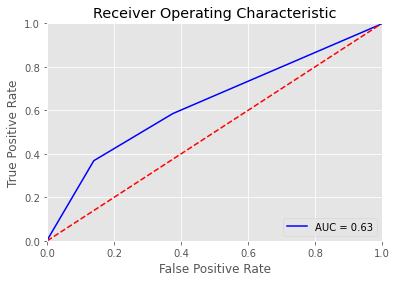

In [25]:
evaluate_roc(probs, y_val)

In [27]:
#Logistic Regression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm



train_data = pd.read_csv('./train.csv')
for comment in tqdm(train_data["comment_text"]):
    clean_comment(comment)

test_data = pd.read_csv('./test.csv')

for comment in tqdm(test_data["comment_text"]):
    clean_comment(comment)
    
tfidf_vectorizer = TfidfVectorizer(min_df=100,  max_features=80000, 
                                   strip_accents='unicode', analyzer='word',ngram_range=(1,3),
                                   use_idf=1,smooth_idf=1,sublinear_tf=1,
                                   stop_words = 'english')

tfidf_vectorizer.fit(pd.concat([train_data["comment_text"], test_data["comment_text"] ]))
features = np.array(tfidf_vectorizer.get_feature_names_out())

train_tfidf =  tfidf_vectorizer.transform(train_data["comment_text"])

100%|███████████████████████████████████████████████████████████████████████| 153164/153164 [00:04<00:00, 33259.29it/s]


In [28]:
category_list = ["toxic", "severe_toxic", "threat", "obscene", "insult", "identity_hate"]
category_list.append("normal")

def apply_model(splits, X, y, model, average_method): #average_method='macro'
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, y):
        
        lr_fit = model.fit(X[train], y[train])
        prediction = model.predict(X[test])
        scores = model.score(X[test],y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(y[test], prediction, average=average_method)*100)
        
        recall.append(recall_score(y[test], prediction, average=average_method)*100)
        
        f1.append(f1_score(y[test], prediction, average=average_method)*100)
    
    result = {
        "accuracy": [" %.2f%% (+/- %.2f%%)"% (np.mean(accuracy), np.std(accuracy))],
        "precision": ["%.2f%% (+/- %.2f%%)"% (np.mean(precision), np.std(precision))],
        "recall": ["%.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall))],
        "f1 score": ["%.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1))]
    }
    
    return pd.DataFrame(result)

In [31]:
lr_model = LogisticRegression(C=0.1, solver='sag')
print("~~~~~~~~~~~~ Logistic Regression ~~~~~~~~~~~~")
for class_name in category_list[:-1]:
    y = train_data[class_name]
    print("------RESULT FOR  {0}---------".format(class_name))
    model_metrics = apply_model(5, train_tfidf, y, lr_model, 'macro')
    model_metrics["model"] = ["Logistic Regression"]

~~~~~~~~~~~~ Logistic Regression ~~~~~~~~~~~~
------RESULT FOR  toxic---------
------RESULT FOR  severe_toxic---------
------RESULT FOR  threat---------


C:\Users\Acer\anaconda3\envs\nlpProject\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\envs\nlpProject\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\envs\nlpProject\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\envs\nlpProject\lib\site-

------RESULT FOR  obscene---------
------RESULT FOR  insult---------
------RESULT FOR  identity_hate---------


In [30]:
model_metrics

accuracy           precision              recall  \
0   99.13% (+/- 0.00%)  85.94% (+/- 5.63%)  50.92% (+/- 0.13%)   

             f1 score                model  
0  51.59% (+/- 0.26%)  Logistic Regression